In [13]:
#!unzip movies_metadata.csv
#!pip install tmdbv3api --user

Archive:  movies_metadata.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of movies_metadata.csv or
        movies_metadata.csv.zip, and cannot find movies_metadata.csv.ZIP, period.


In [2]:
# importing modules I will use
import pandas as pd
import json
from collections import defaultdict, Counter
import ast
import matplotlib.pyplot as plt
import requests
import json
from flask import Flask, request
from jinja2 import Environment
from urllib.request import Request, urlopen
import os
import tqdm
from PIL import Image
import pickle
import torch
device = torch.device('cuda:0')
import numpy as np
api_key = '39329068bc1de1536d231b6b49c9ff50'

In [22]:
# loading the dataset 
df=pd.read_csv('movies_metadata.csv')

In [23]:
# we want to only keep the columns that are relevant for our task and drop the rest
df = df[['original_title','overview','id','genres']]

In [ ]:
# list of genres that do not really make sense and appear only once. I decided to remove them.
weird_genres = ['TV Movie', 'Carousel Productions', 'Vision View Entertainment',
 'Telescene Film Group Productions', 'Aniplex', 'GoHands',
 'BROSTA TV', 'Mardock Scramble Production Committee', 'Sentai Filmworks',
 'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel']

In [25]:
# making column containing only the genre names
listofgen = []
for x,y in df['genres'].iteritems():
    y = ast.literal_eval(y)
    allh = []
    for dic in y:
        if dic['name'] not in weird_genres:
            allh.append(dic['name'])
    listofgen.append(allh)
        
df['genres'] = listofgen

In [27]:
df = df[df['genres'].map(lambda d: len(d)) > 0]

In [7]:
a=df.genres.values
ab= [item for sublist in a for item in sublist]

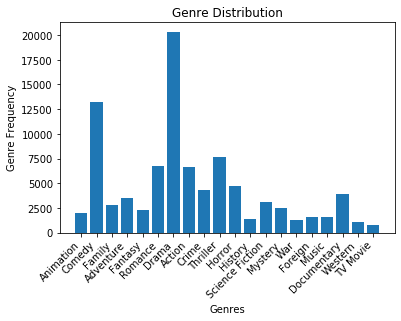

In [8]:
count_of= Counter(ab)
count_of = {k:v for k,v in count_of.items() if v !=1}
fig, ax = plt.subplots()
plt.bar(count_of.keys(), count_of.values())
plt.title("Genre Distribution")
plt.ylabel('Genre Frequency')
plt.xlabel('Genres')
# Rotate 45 degrees 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()


In [28]:
# get_data uses the TMDB api to retrieve a url of every movie poster and then I use the requests module to 
# download the movie
def get_data(movie_id):
    # I use try - except to avoid my function crashing from potential errors (e.g. in the case that there is no poster in the json file)
    try:
        url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key=39329068bc1de1536d231b6b49c9ff50&language=en-US"
        #print(url)
        request = Request(url)
        response = urlopen(request)
        data = response.read()
        poster_path = json.loads(data)['poster_path']
        
        init_url = 'https://image.tmdb.org/t/p/w500'
        image_url = init_url + poster_path
        #print(image_url)
        #print(image_url)
        r = requests.get(image_url)
        name = poster_path.replace('/', '_') 
        filename = f"poster{name}"
        pa = os.path.join('/home/gusmavko@GU.GU.SE/aics-project/data/images', filename)
        #print(pa)
        #print(filename)
        # preferred for "binary" filetypes, like poster images
        with open(pa,'wb') as w:
            w.write(r.content)
        #return image_url
        return pa
    except Exception:
        return 'Error'

In [9]:
get_data(502)

https://image.tmdb.org/t/p/w500/qrsj5hort5xkLOKw9NyraGMnlVP.jpg


'/home/gusmavko@GU.GU.SE/aics-project/data/images/poster_qrsj5hort5xkLOKw9NyraGMnlVP.jpg'

In [29]:
# iterate through the dataframe id column to download posters for all movies
poster_paths = []
#i = 1
for movie_id in tqdm.tqdm(df['id'].tolist()):
  #m = movie.details(int(id))
  #print('Downloading:', name, "i", i)
    
    try:
        poster_paths.append(get_data(movie_id))
        print(movie_id)
    except Exception as e:
        print('[ERROR]', str(e))
        poster_paths.append("API Error")
    #i += 1
    #print(i)


  0%|          | 2/43014 [00:00<1:29:23,  8.02it/s]

862
8844



  0%|          | 4/43014 [00:00<1:20:46,  8.88it/s]

15602
31357
11862



  0%|          | 8/43014 [00:00<1:12:32,  9.88it/s]

949
11860
45325



  0%|          | 11/43014 [00:01<1:13:41,  9.73it/s]

9091
710
9087



  0%|          | 13/43014 [00:01<1:13:26,  9.76it/s]

12110
21032



  0%|          | 15/43014 [00:01<1:15:00,  9.55it/s]

10858
1408
524



  0%|          | 19/43014 [00:01<1:11:38, 10.00it/s]

4584
5
9273



  0%|          | 21/43014 [00:02<1:10:50, 10.12it/s]

11517
8012
1710



  0%|          | 23/43014 [00:02<1:09:34, 10.30it/s]

9691
12665



  0%|          | 27/43014 [00:02<1:09:09, 10.36it/s]

451
16420
9263



  0%|          | 29/43014 [00:02<1:07:36, 10.60it/s]

17015
902
37557



  0%|          | 33/43014 [00:03<1:07:05, 10.68it/s]

9909
63
78802



  0%|          | 35/43014 [00:03<1:06:53, 10.71it/s]

9598
47018
687



  0%|          | 39/43014 [00:03<1:02:55, 11.38it/s]

139405
33689
9603



  0%|          | 41/43014 [00:03<1:06:38, 10.75it/s]

34615
31174



  0%|          | 43/43014 [00:04<1:05:58, 10.86it/s]

11443
35196
9312



  0%|          | 47/43014 [00:04<1:07:15, 10.65it/s]

577
11861
807



  0%|          | 49/43014 [00:04<1:05:37, 10.91it/s]

10530
8391
629



  0%|          | 53/43014 [00:05<1:08:19, 10.48it/s]

117164
11448
49133



  0%|          | 55/43014 [00:05<1:10:29, 10.16it/s]

26441
97406
9089



  0%|          | 57/43014 [00:05<1:09:27, 10.31it/s]

11010
99040



  0%|          | 59/43014 [00:05<1:15:29,  9.48it/s]

11359
17182



  0%|          | 63/43014 [00:06<1:12:21,  9.89it/s]

2054
10607
19760



  0%|          | 65/43014 [00:06<1:10:43, 10.12it/s]

9536
11525
40628



  0%|          | 69/43014 [00:06<1:07:16, 10.64it/s]

4482
10634
755



  0%|          | 71/43014 [00:06<1:08:39, 10.42it/s]

11859
28387



  0%|          | 73/43014 [00:07<1:11:01, 10.08it/s]

48750
20927
36929



  0%|          | 77/43014 [00:07<1:02:48, 11.39it/s]

9102
124626
27526



  0%|          | 79/43014 [00:07<1:03:18, 11.30it/s]

9623
46785
400



  0%|          | 83/43014 [00:07<59:35, 12.01it/s]  

880
146599
8447



  0%|          | 85/43014 [00:08<1:06:31, 10.75it/s]

10534
17414
13997



  0%|          | 89/43014 [00:08<1:07:45, 10.56it/s]

2086
61548
9095



  0%|          | 91/43014 [00:08<1:08:06, 10.50it/s]

12158
9283
9208



  0%|          | 95/43014 [00:09<1:07:46, 10.55it/s]

40154
406
45549



  0%|          | 97/43014 [00:09<1:07:36, 10.58it/s]

63076
11062
13685



  0%|          | 101/43014 [00:09<1:06:38, 10.73it/s]

47475
2045
9614



  0%|          | 103/43014 [00:09<1:06:29, 10.75it/s]

688
11907
10874



  0%|          | 107/43014 [00:10<1:05:41, 10.89it/s]

89333
96357
197



  0%|          | 109/43014 [00:10<1:06:52, 10.69it/s]

103
33542
43566



  0%|          | 113/43014 [00:10<1:06:04, 10.82it/s]

71754
43612
51352



  0%|          | 115/43014 [00:10<1:06:20, 10.78it/s]

16934
10324
78406



  0%|          | 119/43014 [00:11<1:08:06, 10.50it/s]

55731
32119
11066



  0%|          | 121/43014 [00:11<1:09:15, 10.32it/s]

11104
37975
2074



  0%|          | 125/43014 [00:11<1:08:02, 10.51it/s]

27793
44284
110972



  0%|          | 127/43014 [00:12<1:07:13, 10.63it/s]

32622
73067



  0%|          | 129/43014 [00:12<1:10:22, 10.16it/s]

11863
55475
124636



  0%|          | 133/43014 [00:12<1:08:23, 10.45it/s]

9101
123360
5757



  0%|          | 135/43014 [00:12<1:07:29, 10.59it/s]

39428
9302
11000



  0%|          | 139/43014 [00:13<1:06:37, 10.73it/s]

249882
16388
9737



  0%|          | 141/43014 [00:13<1:07:39, 10.56it/s]

30765
10474
22279



  0%|          | 145/43014 [00:13<1:06:22, 10.77it/s]

30157
568
11780



  0%|          | 147/43014 [00:13<1:06:01, 10.82it/s]

34996
414
649



  0%|          | 149/43014 [00:14<1:06:29, 10.74it/s]

1873
5894



  0%|          | 153/43014 [00:14<1:12:52,  9.80it/s]

1775
8839
20649



  0%|          | 155/43014 [00:14<1:10:05, 10.19it/s]

10329
8963
26564



  0%|          | 159/43014 [00:15<1:06:58, 10.66it/s]

8068
8512
1572



  0%|          | 161/43014 [00:15<1:05:06, 10.97it/s]

13552
259209
6520



  0%|          | 165/43014 [00:15<1:04:42, 11.04it/s]

9073
10428
17447



  0%|          | 167/43014 [00:15<1:07:51, 10.52it/s]

9886
9482
19326



  0%|          | 171/43014 [00:16<1:06:12, 10.78it/s]

9344
9071
8973



  0%|          | 173/43014 [00:16<1:06:23, 10.76it/s]

15730
47608
2293



  0%|          | 177/43014 [00:16<1:07:50, 10.52it/s]

9070
68274
48787



  0%|          | 179/43014 [00:17<1:07:37, 10.56it/s]

34574
1642
11472



  0%|          | 183/43014 [00:17<1:05:56, 10.83it/s]

36196
11980
58372



  0%|          | 185/43014 [00:17<1:05:04, 10.97it/s]

32646
10533
56088



  0%|          | 189/43014 [00:17<1:05:49, 10.84it/s]

10802
10149
18402



  0%|          | 191/43014 [00:18<1:07:07, 10.63it/s]

9348
139408
281



  0%|          | 195/43014 [00:18<1:05:15, 10.93it/s]

5967
79593
47939



  0%|          | 197/43014 [00:18<1:05:31, 10.89it/s]

36834
9090
3512



  0%|          | 201/43014 [00:19<1:04:48, 11.01it/s]

52856
77350
9560



  0%|          | 203/43014 [00:19<1:05:42, 10.86it/s]

9804
31611
65796



  0%|          | 207/43014 [00:19<1:06:08, 10.79it/s]

49805
26258
50797



  0%|          | 209/43014 [00:19<1:08:22, 10.43it/s]

19155
76



  0%|          | 211/43014 [00:19<1:08:47, 10.37it/s]

11017
37141
9382



  0%|          | 215/43014 [00:20<1:07:24, 10.58it/s]

6715
18256
22625



  1%|          | 217/43014 [00:20<1:06:43, 10.69it/s]

2292
1909
8984



  1%|          | 221/43014 [00:20<1:06:20, 10.75it/s]

61813
4954
62488



  1%|          | 223/43014 [00:21<1:05:01, 10.97it/s]

10531
11929
8467



  1%|          | 227/43014 [00:21<1:05:46, 10.84it/s]

10451
20156
18395



  1%|          | 229/43014 [00:21<1:07:32, 10.56it/s]

522
397
10525



  1%|          | 233/43014 [00:22<1:06:22, 10.74it/s]

27985
15789
27303



  1%|          | 235/43014 [00:22<1:05:41, 10.85it/s]

21183
10954
47867



  1%|          | 239/43014 [00:22<1:05:43, 10.85it/s]

43475
72031
14275



  1%|          | 241/43014 [00:22<1:06:24, 10.73it/s]

1024
17207
13701



  1%|          | 245/43014 [00:23<1:05:48, 10.83it/s]

14819
32631
11777



  1%|          | 247/43014 [00:23<1:06:23, 10.74it/s]

628
87729
18713



  1%|          | 251/43014 [00:23<1:06:06, 10.78it/s]

6280
9061
37108



  1%|          | 253/43014 [00:23<1:05:34, 10.87it/s]

6071
11
9587



  1%|          | 257/43014 [00:24<1:03:13, 11.27it/s]

19101
49980
17961



  1%|          | 259/43014 [00:24<1:04:04, 11.12it/s]

18183
4476
11008



  1%|          | 263/43014 [00:24<1:05:22, 10.90it/s]

47504
32325
43742



  1%|          | 265/43014 [00:24<1:06:34, 10.70it/s]

28313
11318
3036



  1%|          | 269/43014 [00:25<1:06:15, 10.75it/s]

40490
24070
8986



  1%|          | 271/43014 [00:25<1:07:07, 10.61it/s]

10510
17402
38722



  1%|          | 275/43014 [00:25<1:06:37, 10.69it/s]

8438
11593
1945



  1%|          | 277/43014 [00:26<1:06:59, 10.63it/s]

39310
109560
56428



  1%|          | 281/43014 [00:26<1:00:23, 11.79it/s]

63105
131957
241



  1%|          | 283/43014 [00:26<1:01:45, 11.53it/s]

9058
527
18220



  1%|          | 287/43014 [00:26<1:02:58, 11.31it/s]

6950
101
63020



  1%|          | 289/43014 [00:27<1:05:19, 10.90it/s]

2307
680



  1%|          | 291/43014 [00:27<1:09:15, 10.28it/s]

41478
25296



  1%|          | 293/43014 [00:27<1:08:32, 10.39it/s]

40156
11450



  1%|          | 295/43014 [00:27<1:09:29, 10.24it/s]

30304
10452
12106



  1%|          | 299/43014 [00:28<1:05:11, 10.92it/s]

161495
3586
110



  1%|          | 301/43014 [00:28<1:06:08, 10.76it/s]

108
109
159185



  1%|          | 305/43014 [00:28<56:59, 12.49it/s]  

36357
92769
28033



  1%|          | 307/43014 [00:28<1:00:36, 11.74it/s]

22586
14334
2636



  1%|          | 311/43014 [00:29<1:04:14, 11.08it/s]

2164
11395
278



  1%|          | 313/43014 [00:29<1:04:56, 10.96it/s]

9905
87078
12527



  1%|          | 317/43014 [00:29<1:05:33, 10.85it/s]

20306
36614
27993



  1%|          | 319/43014 [00:29<1:06:26, 10.71it/s]

31439
9067



  1%|          | 321/43014 [00:30<1:06:31, 10.69it/s]

9059
193
25066



  1%|          | 325/43014 [00:30<1:05:49, 10.81it/s]

46797
12122
11381



  1%|          | 327/43014 [00:30<1:05:16, 10.90it/s]

32636
36141
95963



  1%|          | 331/43014 [00:31<1:06:18, 10.73it/s]

1587
9271
2064



  1%|          | 333/43014 [00:31<1:05:14, 10.90it/s]

19855
60855
236



  1%|          | 337/43014 [00:31<1:05:22, 10.88it/s]

48287
3049
2759



  1%|          | 339/43014 [00:31<1:04:19, 11.06it/s]

12635
10497
11382



  1%|          | 343/43014 [00:32<1:06:22, 10.72it/s]

9331
10731
10464



  1%|          | 345/43014 [00:32<1:07:41, 10.51it/s]

34152
9495
29973



  1%|          | 349/43014 [00:32<1:05:56, 10.78it/s]

888
13
712



  1%|          | 351/43014 [00:32<1:06:32, 10.69it/s]

16295
48992
10879



  1%|          | 355/43014 [00:33<1:06:12, 10.74it/s]

10660
10714
41647



  1%|          | 357/43014 [00:33<1:07:44, 10.49it/s]

8587
1689
11596



  1%|          | 359/43014 [00:33<1:05:44, 10.81it/s]

854
9359



  1%|          | 363/43014 [00:34<1:07:59, 10.45it/s]

23333
36593
12280



  1%|          | 365/43014 [00:34<1:08:24, 10.39it/s]

2788
10427
11011



  1%|          | 369/43014 [00:34<1:07:30, 10.53it/s]

49803
8987
1637



  1%|          | 371/43014 [00:34<1:07:32, 10.52it/s]

15128
8831
36955



  1%|          | 373/43014 [00:34<1:07:59, 10.45it/s]

10449
10395



  1%|          | 377/43014 [00:35<1:10:53, 10.03it/s]

12160
40480
52038



  1%|          | 380/43014 [00:35<1:13:57,  9.61it/s]

29444
26352
39953



  1%|          | 382/43014 [00:35<1:12:05,  9.86it/s]

41580
315
22067



  1%|          | 386/43014 [00:36<1:09:13, 10.26it/s]

18242
11667
32502



  1%|          | 388/43014 [00:36<1:07:59, 10.45it/s]

28732
75555
42981



  1%|          | 392/43014 [00:36<57:32, 12.35it/s]  

278939
291731
226229



  1%|          | 394/43014 [00:36<56:11, 12.64it/s]

203119
316098
8011



  1%|          | 398/43014 [00:37<1:00:47, 11.69it/s]

2654
18069
19092



  1%|          | 400/43014 [00:37<1:02:21, 11.39it/s]

2758
38129
10436



  1%|          | 404/43014 [00:37<1:04:50, 10.95it/s]

13595
46094
9409



  1%|          | 406/43014 [00:38<1:07:03, 10.59it/s]

11853
16771
46924



  1%|          | 410/43014 [00:38<1:10:16, 10.10it/s]

11041
306
14522



  1%|          | 412/43014 [00:38<1:10:13, 10.11it/s]

26203
178
19819



  1%|          | 416/43014 [00:39<1:06:54, 10.61it/s]

57834
4722
18215



  1%|          | 418/43014 [00:39<1:10:01, 10.14it/s]

1607
26391



  1%|          | 420/43014 [00:39<1:10:40, 10.04it/s]

117553
6075
11310



  1%|          | 422/43014 [00:39<1:10:12, 10.11it/s]

18658
9350



  1%|          | 426/43014 [00:40<1:09:13, 10.25it/s]

9612
2124
26261



  1%|          | 428/43014 [00:40<1:08:22, 10.38it/s]

19176
49299
11566



  1%|          | 432/43014 [00:40<1:08:12, 10.41it/s]

9571
9739
24257



  1%|          | 434/43014 [00:40<1:06:47, 10.62it/s]

34444
26141
10997



  1%|          | 438/43014 [00:41<1:06:28, 10.67it/s]

50463
10443
20239



  1%|          | 440/43014 [00:41<1:08:13, 10.40it/s]

16297
18551
25440



  1%|          | 442/43014 [00:41<1:09:04, 10.27it/s]

9024
37233



  1%|          | 446/43014 [00:41<1:08:51, 10.30it/s]

1634
13815
5503



  1%|          | 448/43014 [00:42<1:08:26, 10.37it/s]

35588
2087
41579



  1%|          | 452/43014 [00:42<1:05:29, 10.83it/s]

18620
41006
4916



  1%|          | 454/43014 [00:42<1:10:07, 10.12it/s]

2019
31642



  1%|          | 456/43014 [00:42<1:08:10, 10.40it/s]

9255
26271
10612



  1%|          | 460/43014 [00:43<1:06:50, 10.61it/s]

2259
16097
11934



  1%|          | 462/43014 [00:43<1:06:17, 10.70it/s]

106143
12475
9386



  1%|          | 466/43014 [00:43<1:04:41, 10.96it/s]

7984
59930
15765



  1%|          | 468/43014 [00:44<1:06:42, 10.63it/s]

31643
6
329



  1%|          | 472/43014 [00:44<1:05:58, 10.75it/s]

10909
507
34024



  1%|          | 474/43014 [00:44<1:06:48, 10.61it/s]

29918
9593
42580



  1%|          | 478/43014 [00:44<1:07:53, 10.44it/s]

22317
1413
12121



  1%|          | 480/43014 [00:45<1:07:04, 10.57it/s]

2246
10502
10440



  1%|          | 484/43014 [00:45<1:07:49, 10.45it/s]

9516
2320
5879



  1%|          | 486/43014 [00:45<1:07:59, 10.42it/s]

83718
11971
2625



  1%|          | 490/43014 [00:46<1:05:19, 10.85it/s]

31911
788
21450



  1%|          | 492/43014 [00:46<1:06:43, 10.62it/s]

11231
41588
10447



  1%|          | 496/43014 [00:46<1:08:10, 10.39it/s]

31586
9300
9559



  1%|          | 498/43014 [00:46<1:06:48, 10.61it/s]

9800
713
8291



  1%|          | 502/43014 [00:47<1:05:39, 10.79it/s]

18133
25557
22588



  1%|          | 504/43014 [00:47<1:05:14, 10.86it/s]

10872
1245



  1%|          | 506/43014 [00:47<1:08:08, 10.40it/s]

11858
7007
10467



  1%|          | 510/43014 [00:47<1:06:43, 10.62it/s]

5550
8005
2088



  1%|          | 512/43014 [00:48<1:06:03, 10.72it/s]

10412
47889
14534



  1%|          | 516/43014 [00:48<1:05:56, 10.74it/s]

56583
41878
424



  1%|          | 518/43014 [00:48<1:07:39, 10.47it/s]

35233
14291



  1%|          | 520/43014 [00:48<1:13:56,  9.58it/s]

103413
11236
11592



  1%|          | 524/43014 [00:49<1:09:19, 10.21it/s]

8850
10445
695



  1%|          | 526/43014 [00:49<1:08:59, 10.26it/s]

43535
12519
23210



  1%|          | 530/43014 [00:49<1:06:10, 10.70it/s]

858
867
78



  1%|          | 532/43014 [00:50<1:07:12, 10.54it/s]

13203
10442
11074



  1%|          | 536/43014 [00:50<1:07:26, 10.50it/s]

33367
9607
17585



  1%|▏         | 538/43014 [00:50<1:06:43, 10.61it/s]

9057
20967
10635



  1%|▏         | 542/43014 [00:51<1:05:54, 10.74it/s]

9479
10057
11969



  1%|▏         | 544/43014 [00:51<1:08:29, 10.33it/s]

41590
319



  1%|▏         | 546/43014 [00:51<1:09:40, 10.16it/s]

26408
15139
161158



  1%|▏         | 550/43014 [00:51<1:06:53, 10.58it/s]

85247
11446
51980



  1%|▏         | 552/43014 [00:52<1:07:59, 10.41it/s]

24405
11655
11800



  1%|▏         | 556/43014 [00:52<1:06:46, 10.60it/s]

8223
14587
31504



  1%|▏         | 560/43014 [00:52<56:43, 12.47it/s]  

41653
53185
95743
23637



  1%|▏         | 562/43014 [00:52<1:03:17, 11.18it/s]

17600
10897
349394



  1%|▏         | 566/43014 [00:53<59:59, 11.79it/s]

21352
68806
37345



  1%|▏         | 568/43014 [00:53<1:07:07, 10.54it/s]

32562
47507
25403



  1%|▏         | 570/43014 [00:53<59:49, 11.82it/s]  

124304
9066



  1%|▏         | 574/43014 [00:53<1:07:06, 10.54it/s]

771
251
812



  1%|▏         | 576/43014 [00:54<1:06:50, 10.58it/s]

280
581



  1%|▏         | 578/43014 [00:54<1:09:12, 10.22it/s]

80350
268
274



  1%|▏         | 582/43014 [00:54<1:08:39, 10.30it/s]

408
10020
10895



  1%|▏         | 584/43014 [00:54<1:08:20, 10.35it/s]

114
41043
576



  1%|▏         | 588/43014 [00:55<1:06:00, 10.71it/s]

15477
59146
30528



  1%|▏         | 590/43014 [00:55<1:05:30, 10.79it/s]

7300
10824
261246



  1%|▏         | 592/43014 [00:55<1:00:27, 11.70it/s]

275
25059



  1%|▏         | 596/43014 [00:56<1:05:19, 10.82it/s]

11827
8766
23570



  1%|▏         | 598/43014 [00:56<1:06:13, 10.68it/s]

47333
54850
51242



  1%|▏         | 602/43014 [00:56<1:09:21, 10.19it/s]

10112
4307
46029



  1%|▏         | 604/43014 [00:56<1:09:22, 10.19it/s]

32308
88893



  1%|▏         | 606/43014 [00:57<1:09:34, 10.16it/s]

52873
340210
44281



  1%|▏         | 608/43014 [00:57<1:10:14, 10.06it/s]

28121
12520



  1%|▏         | 612/43014 [00:57<1:10:22, 10.04it/s]

1592
36447
19042



  1%|▏         | 614/43014 [00:57<1:10:03, 10.09it/s]

38884
47449
36259



  1%|▏         | 618/43014 [00:58<1:08:18, 10.35it/s]

41852
40926
9099



  1%|▏         | 620/43014 [00:58<1:08:48, 10.27it/s]

2021
61752



  1%|▏         | 622/43014 [00:58<1:11:01,  9.95it/s]

10988
11479



  1%|▏         | 624/43014 [00:58<1:12:28,  9.75it/s]

398959
287305
339428



  1%|▏         | 626/43014 [00:59<1:11:00,  9.95it/s]

12652
10684



  1%|▏         | 629/43014 [00:59<1:15:06,  9.41it/s]

954
68445



  1%|▏         | 632/43014 [00:59<1:13:15,  9.64it/s]

18989
10801
54285



  1%|▏         | 634/43014 [00:59<1:10:47,  9.98it/s]

8840
278978
124625



  1%|▏         | 636/43014 [01:00<1:09:07, 10.22it/s]

11107
16417



  1%|▏         | 640/43014 [01:00<1:09:41, 10.13it/s]

10363
161070
10539



  1%|▏         | 642/43014 [01:00<1:12:07,  9.79it/s]

10543
18414



  1%|▏         | 645/43014 [01:00<1:10:02, 10.08it/s]

47502
11902
27098



  2%|▏         | 647/43014 [01:01<1:10:56,  9.95it/s]

25087
5801
896



  2%|▏         | 650/43014 [01:01<1:12:19,  9.76it/s]

3065
2300



  2%|▏         | 652/43014 [01:01<1:12:59,  9.67it/s]

8069
288173



  2%|▏         | 655/43014 [01:01<1:04:29, 10.95it/s]

187851
27768
221917



  2%|▏         | 657/43014 [01:02<1:04:46, 10.90it/s]

8072
35797
88030



  2%|▏         | 661/43014 [01:02<1:02:35, 11.28it/s]

83857
33245
124460



  2%|▏         | 663/43014 [01:02<1:04:45, 10.90it/s]

27281
105045



  2%|▏         | 665/43014 [01:02<1:06:45, 10.57it/s]

40001
29621
117730



  2%|▏         | 669/43014 [01:03<1:01:11, 11.53it/s]

20762
37144
48260



  2%|▏         | 671/43014 [01:03<1:03:57, 11.03it/s]

12656
38867



  2%|▏         | 673/43014 [01:03<1:04:29, 10.94it/s]

25969
44103
753



  2%|▏         | 677/43014 [01:03<1:06:00, 10.69it/s]

43634
9103
90214



  2%|▏         | 679/43014 [01:04<1:08:19, 10.33it/s]

29649
10990
8866



  2%|▏         | 681/43014 [01:04<1:10:29, 10.01it/s]

12233
23449



  2%|▏         | 684/43014 [01:04<1:15:46,  9.31it/s]

36355
37667
90148



  2%|▏         | 687/43014 [01:05<1:27:50,  8.03it/s]

922
11876



  2%|▏         | 689/43014 [01:05<1:22:24,  8.56it/s]

52633
62364



  2%|▏         | 692/43014 [01:05<1:17:11,  9.14it/s]

11687
9304
73183



  2%|▏         | 694/43014 [01:05<1:10:22, 10.02it/s]

131232
9100



  2%|▏         | 696/43014 [01:05<1:09:32, 10.14it/s]

20759
46063
32513



  2%|▏         | 700/43014 [01:06<1:08:11, 10.34it/s]

40651
36915
40507



  2%|▏         | 702/43014 [01:06<1:15:48,  9.30it/s]

9802
25697



  2%|▏         | 705/43014 [01:06<1:13:11,  9.64it/s]

21588
664
11867



  2%|▏         | 707/43014 [01:06<1:04:40, 10.90it/s]

47119
314352
9323



  2%|▏         | 711/43014 [01:07<1:02:50, 11.22it/s]

10280
10535
124613



  2%|▏         | 713/43014 [01:07<1:04:38, 10.91it/s]

532
26744



  2%|▏         | 715/43014 [01:07<1:05:30, 10.76it/s]

16299
10547
245268



  2%|▏         | 719/43014 [01:08<1:04:06, 10.99it/s]

935
55613
41007



  2%|▏         | 721/43014 [01:08<1:04:38, 10.90it/s]

35645
110465
255546



  2%|▏         | 725/43014 [01:08<1:14:29,  9.46it/s]

40751
85778
11101



  2%|▏         | 727/43014 [01:08<1:09:49, 10.09it/s]

9826
9879
63564



  2%|▏         | 731/43014 [01:09<1:08:10, 10.34it/s]

22621
7095
26890



  2%|▏         | 733/43014 [01:09<1:02:04, 11.35it/s]

46732
124633
202425



  2%|▏         | 737/43014 [01:09<1:04:15, 10.97it/s]

77771
181083
41225



  2%|▏         | 739/43014 [01:09<1:04:01, 11.00it/s]

87190
627
32872



  2%|▏         | 743/43014 [01:10<1:03:53, 11.03it/s]

602
14553
9566



  2%|▏         | 745/43014 [01:10<1:05:02, 10.83it/s]

10545
9894
11543



  2%|▏         | 747/43014 [01:10<1:03:36, 11.07it/s]

9268
52059



  2%|▏         | 751/43014 [01:11<1:06:35, 10.58it/s]

9327
123763
81949



  2%|▏         | 753/43014 [01:11<1:06:38, 10.57it/s]

44535
44495
78285



  2%|▏         | 757/43014 [01:11<1:05:44, 10.71it/s]

11228
10779
26748



  2%|▏         | 759/43014 [01:11<1:05:37, 10.73it/s]

38223
9294
49963



  2%|▏         | 763/43014 [01:12<1:04:56, 10.84it/s]

11363
1645
31546



  2%|▏         | 765/43014 [01:12<1:06:08, 10.65it/s]

77056
36344



  2%|▏         | 767/43014 [01:12<1:08:01, 10.35it/s]

18550
11511
34170



  2%|▏         | 769/43014 [01:12<1:00:27, 11.65it/s]

109478
124645



  2%|▏         | 773/43014 [01:13<1:06:32, 10.58it/s]

12606
69895
35206



  2%|▏         | 775/43014 [01:13<1:05:39, 10.72it/s]

151489
4837
12632



  2%|▏         | 779/43014 [01:13<58:14, 12.09it/s]  

9098
282919
124614



  2%|▏         | 781/43014 [01:13<1:00:27, 11.64it/s]

18975
11962
2925



  2%|▏         | 785/43014 [01:14<1:03:30, 11.08it/s]

28628
3595
9308



  2%|▏         | 787/43014 [01:14<1:04:02, 10.99it/s]

92381
18555
12123



  2%|▏         | 791/43014 [01:14<1:04:17, 10.95it/s]

10830
3573
10546



  2%|▏         | 793/43014 [01:14<1:04:21, 10.93it/s]

18862
31417
9431



  2%|▏         | 795/43014 [01:15<59:10, 11.89it/s]  

124619
46986



  2%|▏         | 799/43014 [01:15<1:03:17, 11.12it/s]

144982
47907
10061



  2%|▏         | 801/43014 [01:15<1:04:06, 10.97it/s]

36266
549
10478



  2%|▏         | 805/43014 [01:15<1:00:04, 11.71it/s]

66634
116690
213917



  2%|▏         | 807/43014 [01:16<1:02:27, 11.26it/s]

238
159
11134



  2%|▏         | 811/43014 [01:16<1:03:06, 11.15it/s]

88224
132641
9303



  2%|▏         | 813/43014 [01:16<1:04:02, 10.98it/s]

23945
37820
22479



  2%|▏         | 817/43014 [01:17<58:24, 12.04it/s]  

9054
241058
11985



  2%|▏         | 819/43014 [01:17<1:01:22, 11.46it/s]

10232
59569
410921



  2%|▏         | 823/43014 [01:17<52:40, 13.35it/s]

38955
110513
114089



  2%|▏         | 825/43014 [01:17<55:15, 12.73it/s]

11015
9306
12559



  2%|▏         | 829/43014 [01:18<1:01:11, 11.49it/s]

58770
3587
10723



  2%|▏         | 831/43014 [01:18<1:02:48, 11.19it/s]

56077
19004
253632



  2%|▏         | 835/43014 [01:18<1:02:06, 11.32it/s]

10987
44705
20318



  2%|▏         | 837/43014 [01:18<1:04:34, 10.89it/s]

43596
79782



  2%|▏         | 839/43014 [01:18<1:06:45, 10.53it/s]

26933
27854
981



  2%|▏         | 843/43014 [01:19<1:06:02, 10.64it/s]

872
2769
13320



  2%|▏         | 845/43014 [01:19<1:05:17, 10.76it/s]

164
426
567



  2%|▏         | 849/43014 [01:19<1:06:31, 10.56it/s]

3078
13528
28288



  2%|▏         | 851/43014 [01:20<1:05:45, 10.69it/s]

213
284
239



  2%|▏         | 853/43014 [01:20<1:05:19, 10.76it/s]


4808
289
963


  2%|▏         | 857/43014 [01:20<1:06:26, 10.57it/s]

11113
6620



  2%|▏         | 859/43014 [01:20<1:08:58, 10.19it/s]

804
26531
909



  2%|▏         | 863/43014 [01:21<1:06:29, 10.56it/s]

630
770
31044



  2%|▏         | 865/43014 [01:21<1:07:43, 10.37it/s]

599
15
62



  2%|▏         | 869/43014 [01:21<1:07:22, 10.43it/s]

121357
705
22490



  2%|▏         | 871/43014 [01:22<1:07:55, 10.34it/s]

223
25670
303



  2%|▏         | 875/43014 [01:22<1:05:52, 10.66it/s]

4174
8356
381



  2%|▏         | 877/43014 [01:22<1:05:12, 10.77it/s]

20758
29376
1859



  2%|▏         | 881/43014 [01:22<1:03:20, 11.09it/s]

18299
17281
64382



  2%|▏         | 883/43014 [01:23<1:04:57, 10.81it/s]

10907
32093
1939



  2%|▏         | 887/43014 [01:23<1:05:25, 10.73it/s]

22292
3598
3080



  2%|▏         | 889/43014 [01:23<1:04:31, 10.88it/s]

198
13562
1712



  2%|▏         | 893/43014 [01:24<1:05:04, 10.79it/s]

220
3529
3085



  2%|▏         | 895/43014 [01:24<1:06:31, 10.55it/s]

2897
1585
3083



  2%|▏         | 899/43014 [01:24<1:05:22, 10.74it/s]

900
43795
85638



  2%|▏         | 901/43014 [01:24<1:05:42, 10.68it/s]

50001
43905
22688



  2%|▏         | 905/43014 [01:25<1:06:36, 10.54it/s]

23114
26378
40206



  2%|▏         | 907/43014 [01:25<1:06:25, 10.57it/s]

22356
260
43488



  2%|▏         | 909/43014 [01:25<1:06:17, 10.59it/s]

22613
10331



  2%|▏         | 913/43014 [01:25<1:07:37, 10.38it/s]

488
22733
261



  2%|▏         | 915/43014 [01:26<1:06:43, 10.51it/s]

57575
32574
22657



  2%|▏         | 919/43014 [01:26<1:07:44, 10.36it/s]

76464
22649
176841



  2%|▏         | 921/43014 [01:26<1:01:22, 11.43it/s]

125587
39448
52855



  2%|▏         | 925/43014 [01:27<1:02:39, 11.19it/s]

39940
85328
124632



  2%|▏         | 927/43014 [01:27<1:06:17, 10.58it/s]

11076
63945
58985



  2%|▏         | 931/43014 [01:27<1:04:28, 10.88it/s]

890
10861
1770



  2%|▏         | 933/43014 [01:27<1:05:09, 10.76it/s]

44465
2033
18203



  2%|▏         | 937/43014 [01:28<1:03:25, 11.06it/s]

9333
47260
9400



  2%|▏         | 939/43014 [01:28<1:04:50, 10.81it/s]

9401
12241
25739



  2%|▏         | 943/43014 [01:28<1:05:11, 10.76it/s]

11306
9625
10680



  2%|▏         | 945/43014 [01:28<1:05:57, 10.63it/s]

6346
18660
35115



  2%|▏         | 949/43014 [01:29<1:07:18, 10.42it/s]

14821
14136
10869



  2%|▏         | 951/43014 [01:29<1:05:56, 10.63it/s]

22660
19186
31102



  2%|▏         | 953/43014 [01:29<1:06:45, 10.50it/s]

6878
15944



  2%|▏         | 957/43014 [01:30<1:08:41, 10.21it/s]

18444
20723
173



  2%|▏         | 959/43014 [01:30<1:08:42, 10.20it/s]

864
24795
11224



  2%|▏         | 963/43014 [01:30<1:07:45, 10.34it/s]

81310
15947
9078



  2%|▏         | 965/43014 [01:30<1:07:11, 10.43it/s]

29682
8367
433



  2%|▏         | 967/43014 [01:31<1:05:45, 10.66it/s]

11360
11114



  2%|▏         | 971/43014 [01:31<1:07:36, 10.36it/s]

12335
12092
10948



  2%|▏         | 973/43014 [01:31<1:06:13, 10.58it/s]

11229
15121
562



  2%|▏         | 977/43014 [01:31<59:05, 11.86it/s]  

10163
48862
117036



  2%|▏         | 979/43014 [01:32<1:00:43, 11.54it/s]

47199
11159
9591



  2%|▏         | 983/43014 [01:32<1:03:05, 11.10it/s]

30500
41843
55058



  2%|▏         | 985/43014 [01:32<1:03:57, 10.95it/s]

10938
11412
10586



  2%|▏         | 989/43014 [01:33<1:04:32, 10.85it/s]

42314
27845
108365



  2%|▏         | 991/43014 [01:33<1:06:04, 10.60it/s]

23223
49471
38153



  2%|▏         | 995/43014 [01:33<1:05:58, 10.61it/s]

25147
9716
43777



  2%|▏         | 997/43014 [01:33<1:06:00, 10.61it/s]

454
10218
819



  2%|▏         | 1001/43014 [01:34<1:05:16, 10.73it/s]

38191
56830
11238



  2%|▏         | 1003/43014 [01:34<1:06:05, 10.59it/s]

27256
31530



  2%|▏         | 1005/43014 [01:34<1:07:26, 10.38it/s]

66473
28120
1834



  2%|▏         | 1009/43014 [01:34<1:05:24, 10.70it/s]

26282
37218
252



  2%|▏         | 1011/43014 [01:35<1:06:35, 10.51it/s]

116356
16372
11561



  2%|▏         | 1015/43014 [01:35<1:06:14, 10.57it/s]

11302
623
583



  2%|▏         | 1017/43014 [01:35<1:04:22, 10.87it/s]

12614
21711
11575



  2%|▏         | 1021/43014 [01:36<1:06:14, 10.57it/s]

475
11331
521



  2%|▏         | 1023/43014 [01:36<1:05:59, 10.61it/s]

88
500
792



  2%|▏         | 1027/43014 [01:36<1:06:47, 10.48it/s]

8491
402
10537



  2%|▏         | 1029/43014 [01:36<1:05:26, 10.69it/s]

11386
9504
15764



  2%|▏         | 1033/43014 [01:37<1:08:10, 10.26it/s]

601
67365
25842



  2%|▏         | 1035/43014 [01:37<1:09:55, 10.00it/s]

2119
744
136311



  2%|▏         | 1037/43014 [01:37<1:07:30, 10.36it/s]

221
702



  2%|▏         | 1041/43014 [01:37<1:03:14, 11.06it/s]

25750
17642
427043



  2%|▏         | 1043/43014 [01:38<1:02:54, 11.12it/s]

146341
9305
37616



  2%|▏         | 1047/43014 [01:38<1:03:51, 10.95it/s]

11112
21612
141210



  2%|▏         | 1049/43014 [01:38<1:06:37, 10.50it/s]

102461
36998
200383



  2%|▏         | 1053/43014 [01:39<1:04:53, 10.78it/s]

116844
1630
26626



  2%|▏         | 1055/43014 [01:39<1:04:59, 10.76it/s]

124837
11816
11843



  2%|▏         | 1057/43014 [01:39<1:05:31, 10.67it/s]

10379
2756



  2%|▏         | 1061/43014 [01:39<1:08:20, 10.23it/s]

790
1103
11298



  2%|▏         | 1063/43014 [01:40<1:09:35, 10.05it/s]

4480
4481
49688



  2%|▏         | 1067/43014 [01:40<1:08:18, 10.23it/s]

10765
762
44497



  2%|▏         | 1069/43014 [01:40<1:09:12, 10.10it/s]

278621
99479
55049



  2%|▏         | 1073/43014 [01:41<1:09:09, 10.11it/s]

124829
79306
10548



  2%|▏         | 1075/43014 [01:41<1:08:29, 10.20it/s]

531
104931
4483



  3%|▎         | 1077/43014 [01:41<1:08:34, 10.19it/s]

18919
31556



  3%|▎         | 1080/43014 [01:41<1:11:00,  9.84it/s]

26167
26174
61461



  3%|▎         | 1083/43014 [01:42<1:16:39,  9.12it/s]

117500
127973



  3%|▎         | 1085/43014 [01:42<1:14:50,  9.34it/s]

659
30892



  3%|▎         | 1088/43014 [01:42<1:04:48, 10.78it/s]

86369
8074
124676



  3%|▎         | 1090/43014 [01:42<1:06:12, 10.55it/s]

38554
49763
41326



  3%|▎         | 1094/43014 [01:43<1:05:16, 10.70it/s]

36555
10608
11216



  3%|▎         | 1096/43014 [01:43<1:06:18, 10.54it/s]

7452
64567
892



  3%|▎         | 1100/43014 [01:43<1:04:12, 10.88it/s]

1600
26561
975



  3%|▎         | 1102/43014 [01:43<1:05:01, 10.74it/s]

18129
54405
150823



  3%|▎         | 1104/43014 [01:44<1:04:52, 10.77it/s]

409
38251



  3%|▎         | 1106/43014 [01:44<1:07:23, 10.36it/s]

10161
1412



  3%|▎         | 1110/43014 [01:44<1:07:14, 10.39it/s]

41768
10409
14285



  3%|▎         | 1112/43014 [01:44<1:05:29, 10.66it/s]

2469
10174
31225



  3%|▎         | 1116/43014 [01:45<1:07:20, 10.37it/s]

510
11455
1891



  3%|▎         | 1118/43014 [01:45<1:09:07, 10.10it/s]

2493
85



  3%|▎         | 1120/43014 [01:45<1:09:21, 10.07it/s]

68
679
429



  3%|▎         | 1124/43014 [01:46<1:07:46, 10.30it/s]

13446
389
947



  3%|▎         | 1126/43014 [01:46<1:07:09, 10.40it/s]

185
595
28



  3%|▎         | 1130/43014 [01:46<1:06:23, 10.51it/s]

335
1892
144



  3%|▎         | 1132/43014 [01:46<1:05:51, 10.60it/s]

1092
769



  3%|▎         | 1134/43014 [01:47<1:09:23, 10.06it/s]

348
766



  3%|▎         | 1136/43014 [01:47<1:09:01, 10.11it/s]

175
11645



  3%|▎         | 1138/43014 [01:47<1:09:37, 10.02it/s]

10835
539
525



  3%|▎         | 1142/43014 [01:47<1:05:59, 10.57it/s]

240
600
530



  3%|▎         | 1144/43014 [01:47<1:05:26, 10.66it/s]

10705
279
3109



  3%|▎         | 1148/43014 [01:48<1:07:48, 10.29it/s]

311
1578
703



  3%|▎         | 1150/43014 [01:48<1:07:52, 10.28it/s]

9549
1398
387



  3%|▎         | 1154/43014 [01:48<1:07:39, 10.31it/s]

9277
343
37291



  3%|▎         | 1156/43014 [01:49<1:07:58, 10.26it/s]

490
11235
218



  3%|▎         | 1158/43014 [01:49<1:07:55, 10.27it/s]

763
9665



  3%|▎         | 1162/43014 [01:49<1:09:11, 10.08it/s]

18971
696
379



  3%|▎         | 1164/43014 [01:49<1:08:40, 10.16it/s]

207
37247
1480



  3%|▎         | 1166/43014 [01:50<1:06:37, 10.47it/s]

9322
826



  3%|▎         | 1168/43014 [01:50<1:08:02, 10.25it/s]

422
829



  3%|▎         | 1170/43014 [01:50<1:08:45, 10.14it/s]

828
3090



  3%|▎         | 1173/43014 [01:50<1:11:04,  9.81it/s]

9964
3063



  3%|▎         | 1175/43014 [01:51<1:13:45,  9.45it/s]

13667
694



  3%|▎         | 1178/43014 [01:51<1:11:57,  9.69it/s]

235
832
765



  3%|▎         | 1180/43014 [01:51<1:18:12,  8.92it/s]

5925
11778



  3%|▎         | 1182/43014 [01:51<1:14:33,  9.35it/s]

4485
137
33



  3%|▎         | 1186/43014 [01:52<1:09:47,  9.99it/s]

982
8428
212



  3%|▎         | 1188/43014 [01:52<1:09:53,  9.97it/s]

105
1633
11202



  3%|▎         | 1192/43014 [01:52<1:08:27, 10.18it/s]

1554
149
8009



  3%|▎         | 1194/43014 [01:52<1:07:32, 10.32it/s]

903
11673
3034



  3%|▎         | 1198/43014 [01:53<1:07:49, 10.27it/s]

339
10404
914



  3%|▎         | 1200/43014 [01:53<1:07:16, 10.36it/s]

756
288
910



  3%|▎         | 1204/43014 [01:53<1:05:11, 10.69it/s]

2640
16633
665



  3%|▎         | 1206/43014 [01:54<1:04:46, 10.76it/s]

11031
11314



  3%|▎         | 1208/43014 [01:54<1:08:04, 10.23it/s]

15143
89



  3%|▎         | 1210/43014 [01:54<1:08:15, 10.21it/s]

10322
783
10644



  3%|▎         | 1212/43014 [01:54<1:07:20, 10.35it/s]

11257
14370



  3%|▎         | 1216/43014 [01:55<1:08:19, 10.20it/s]

12104
625
8816



  3%|▎         | 1218/43014 [01:55<1:07:45, 10.28it/s]

830
2323
983



  3%|▎         | 1222/43014 [01:55<1:08:08, 10.22it/s]

642
655
10341



  3%|▎         | 1224/43014 [01:55<1:10:03,  9.94it/s]

639
30180



  3%|▎         | 1226/43014 [01:56<1:14:03,  9.40it/s]

31388
41801



  3%|▎         | 1228/43014 [01:56<1:05:38, 10.61it/s]

66034
348138
96288



  3%|▎         | 1232/43014 [01:56<1:07:59, 10.24it/s]

61536
18762
8077



  3%|▎         | 1234/43014 [01:56<1:10:29,  9.88it/s]

814
41671
27214



  3%|▎         | 1238/43014 [01:57<1:07:19, 10.34it/s]

52263
33519
16235



  3%|▎         | 1240/43014 [01:57<1:08:13, 10.20it/s]

11449
41848
25944



  3%|▎         | 1244/43014 [01:57<1:06:35, 10.45it/s]

24913
49126
32076



  3%|▎         | 1246/43014 [01:57<1:04:30, 10.79it/s]

571
8851
37843



  3%|▎         | 1248/43014 [01:58<1:05:43, 10.59it/s]

32146
30346



  3%|▎         | 1252/43014 [01:58<1:07:39, 10.29it/s]

6114
229
13549



  3%|▎         | 1254/43014 [01:58<1:06:00, 10.54it/s]

9529
1598
11349



  3%|▎         | 1256/43014 [01:58<1:06:22, 10.49it/s]

7340
6217



  3%|▎         | 1260/43014 [01:59<1:12:08,  9.65it/s]

377
653
28198



  3%|▎         | 1262/43014 [01:59<1:20:08,  8.68it/s]

794
31640



  3%|▎         | 1265/43014 [01:59<1:14:30,  9.34it/s]

8744
25189
145



  3%|▎         | 1267/43014 [02:00<1:11:50,  9.69it/s]

2212
199



  3%|▎         | 1269/43014 [02:00<1:11:00,  9.80it/s]

7863
12498
9279



  3%|▎         | 1273/43014 [02:00<1:06:49, 10.41it/s]

53234
17204
21539



  3%|▎         | 1275/43014 [02:00<1:06:07, 10.52it/s]

85589
12709
20539



  3%|▎         | 1279/43014 [02:01<1:04:34, 10.77it/s]

11674
199512
64900



  3%|▎         | 1281/43014 [02:01<1:04:02, 10.86it/s]

1573
152
174



  3%|▎         | 1283/43014 [02:01<1:06:35, 10.44it/s]

172
154



  3%|▎         | 1285/43014 [02:01<1:08:58, 10.08it/s]

157
168



  3%|▎         | 1288/43014 [02:02<1:10:06,  9.92it/s]

364
11967
9086



  3%|▎         | 1292/43014 [02:02<1:07:58, 10.23it/s]

621
9037
10173



  3%|▎         | 1294/43014 [02:02<1:07:02, 10.37it/s]

55687
168535
8845



  3%|▎         | 1298/43014 [02:03<1:06:11, 10.50it/s]

46681
578
579



  3%|▎         | 1300/43014 [02:03<1:05:31, 10.61it/s]

17692
17795
75



  3%|▎         | 1304/43014 [02:03<1:06:03, 10.52it/s]

13891
9390
378



  3%|▎         | 1306/43014 [02:03<1:05:51, 10.56it/s]

10896
2322
41240



  3%|▎         | 1310/43014 [02:04<1:01:14, 11.35it/s]

26949
9819
49799



  3%|▎         | 1312/43014 [02:04<1:02:43, 11.08it/s]

31908
46027
3179



  3%|▎         | 1314/43014 [02:04<1:03:04, 11.02it/s]


1802
4232
9361


  3%|▎         | 1318/43014 [02:04<1:03:49, 10.89it/s]

2928
30285
10549



  3%|▎         | 1320/43014 [02:05<1:05:19, 10.64it/s]

58102
18451



  3%|▎         | 1324/43014 [02:05<1:04:42, 10.74it/s]

27265
49935
8818



  3%|▎         | 1326/43014 [02:05<1:04:38, 10.75it/s]

36758
36040
74239



  3%|▎         | 1330/43014 [02:06<58:32, 11.87it/s]  

9415
55146
303693



  3%|▎         | 1332/43014 [02:06<1:01:07, 11.36it/s]

12145
42424



  3%|▎         | 1334/43014 [02:06<1:03:34, 10.93it/s]

34314
2892
9404



  3%|▎         | 1338/43014 [02:06<1:04:30, 10.77it/s]

85242
9622
8860



  3%|▎         | 1340/43014 [02:06<1:04:58, 10.69it/s]

197537
66597
14832



  3%|▎         | 1344/43014 [02:07<1:02:31, 11.11it/s]

9619
40506
31000



  3%|▎         | 1346/43014 [02:07<1:02:39, 11.08it/s]

4104
26306
203829



  3%|▎         | 1350/43014 [02:07<59:22, 11.69it/s]

43775
14908
784



  3%|▎         | 1352/43014 [02:07<1:01:40, 11.26it/s]

12489
168283
16448



  3%|▎         | 1356/43014 [02:08<1:03:55, 10.86it/s]

55936
17894
28059



  3%|▎         | 1358/43014 [02:08<1:02:35, 11.09it/s]

58911
17949
1968



  3%|▎         | 1362/43014 [02:08<1:04:05, 10.83it/s]

61563
66
20735



  3%|▎         | 1364/43014 [02:09<1:02:54, 11.03it/s]

11419
25796
638



  3%|▎         | 1368/43014 [02:09<1:03:19, 10.96it/s]

25624
9366
60083



  3%|▎         | 1370/43014 [02:09<1:04:33, 10.75it/s]

21915
90928



  3%|▎         | 1372/43014 [02:09<1:04:18, 10.79it/s]

50091
18420
19952



  3%|▎         | 1376/43014 [02:10<1:03:14, 10.97it/s]

9446
28005
9403



  3%|▎         | 1378/43014 [02:10<1:04:13, 10.80it/s]

27322
10003
9311



  3%|▎         | 1382/43014 [02:10<1:05:50, 10.54it/s]

11844
884
49806



  3%|▎         | 1384/43014 [02:10<1:05:25, 10.61it/s]

1624
88423
16052



  3%|▎         | 1388/43014 [02:11<1:04:33, 10.75it/s]

4477
24662
18423



  3%|▎         | 1390/43014 [02:11<1:04:12, 10.80it/s]

76996
6499
50512



  3%|▎         | 1392/43014 [02:11<1:05:09, 10.65it/s]


9405
12723
9360


  3%|▎         | 1396/43014 [02:12<1:06:34, 10.42it/s]

9434
118991
21626



  3%|▎         | 1398/43014 [02:12<1:05:11, 10.64it/s]

13982
93946



  3%|▎         | 1402/43014 [02:12<1:05:39, 10.56it/s]

77223
31465
12793



  3%|▎         | 1404/43014 [02:12<59:07, 11.73it/s]  

102878
105763
9611



  3%|▎         | 1408/43014 [02:13<1:01:02, 11.36it/s]

47694
10357
9977



  3%|▎         | 1410/43014 [02:13<1:04:29, 10.75it/s]

816
2163



  3%|▎         | 1412/43014 [02:13<1:05:36, 10.57it/s]

124680
16399
124843



  3%|▎         | 1416/43014 [02:13<1:06:18, 10.46it/s]

31017
24645
49478



  3%|▎         | 1418/43014 [02:14<1:04:37, 10.73it/s]

12499
18
1811



  3%|▎         | 1422/43014 [02:14<1:03:10, 10.97it/s]

109614
60082
105045



  3%|▎         | 1424/43014 [02:14<1:02:22, 11.11it/s]

53023
64802
11239



  3%|▎         | 1428/43014 [02:15<1:02:56, 11.01it/s]

50850
15321
2058



  3%|▎         | 1430/43014 [02:15<1:03:06, 10.98it/s]

9450
330
38523



  3%|▎         | 1434/43014 [02:15<1:03:26, 10.92it/s]

16375
33660
59232



  3%|▎         | 1436/43014 [02:15<1:03:10, 10.97it/s]

45671
17770
15170



  3%|▎         | 1438/43014 [02:15<1:04:13, 10.79it/s]

1701
26422



  3%|▎         | 1440/43014 [02:16<1:06:06, 10.48it/s]

124642
1639



  3%|▎         | 1444/43014 [02:16<1:02:09, 11.15it/s]

49235
106129
107743



  3%|▎         | 1446/43014 [02:16<1:05:01, 10.65it/s]

415
47686
65889



  3%|▎         | 1450/43014 [02:17<1:04:37, 10.72it/s]

11103
11970
34941



  3%|▎         | 1452/43014 [02:17<58:16, 11.89it/s]  

407992
8874
17991



  3%|▎         | 1456/43014 [02:17<1:02:53, 11.01it/s]

11956
266
754



  3%|▎         | 1458/43014 [02:17<57:42, 12.00it/s]  

37567
43771
124834



  3%|▎         | 1462/43014 [02:18<55:41, 12.44it/s]

249358
111367
607



  3%|▎         | 1464/43014 [02:18<58:09, 11.91it/s]

18080
38225
17834



  3%|▎         | 1466/43014 [02:18<59:44, 11.59it/s]

686
65046



  3%|▎         | 1470/43014 [02:18<1:09:04, 10.02it/s]

4421
9387
10603



  3%|▎         | 1472/43014 [02:19<1:10:10,  9.87it/s]

2142
8413
10336



  3%|▎         | 1476/43014 [02:19<1:07:22, 10.28it/s]

20737
9413
14585



  3%|▎         | 1478/43014 [02:19<1:06:40, 10.38it/s]

18519
49462
8834



  3%|▎         | 1482/43014 [02:20<1:06:17, 10.44it/s]

9458
8854
38295



  3%|▎         | 1484/43014 [02:20<1:06:52, 10.35it/s]

22073
37244
4961



  3%|▎         | 1486/43014 [02:20<1:06:18, 10.44it/s]

9416
26180



  3%|▎         | 1490/43014 [02:20<1:05:25, 10.58it/s]

17832
9772
6072



  3%|▎         | 1492/43014 [02:20<1:06:35, 10.39it/s]

1669
468
32519



  3%|▎         | 1496/43014 [02:21<1:05:00, 10.64it/s]

108401
10806
9433



  3%|▎         | 1498/43014 [02:21<1:06:05, 10.47it/s]

6623
2118
978



  3%|▎         | 1500/43014 [02:21<1:05:11, 10.61it/s]

9437
29461



  3%|▎         | 1504/43014 [02:22<1:07:53, 10.19it/s]

56651
10351
66588



  4%|▎         | 1506/43014 [02:22<1:07:43, 10.22it/s]

2649
14289
10155



  4%|▎         | 1510/43014 [02:22<1:06:41, 10.37it/s]

75250
20457
18355



  4%|▎         | 1512/43014 [02:22<1:06:35, 10.39it/s]

33657
55306
68924



  4%|▎         | 1516/43014 [02:23<1:05:04, 10.63it/s]

36434
2255
28353



  4%|▎         | 1518/43014 [02:23<1:05:02, 10.63it/s]

9427
172545
17589



  4%|▎         | 1520/43014 [02:23<1:03:39, 10.86it/s]

3597
1813



  4%|▎         | 1524/43014 [02:24<1:05:00, 10.64it/s]

36797
12628
33344



  4%|▎         | 1526/43014 [02:24<1:05:00, 10.64it/s]

25099
45019
63437



  4%|▎         | 1528/43014 [02:24<1:04:49, 10.67it/s]

62422
782



  4%|▎         | 1532/43014 [02:24<1:05:51, 10.50it/s]

29911
9827
1959



  4%|▎         | 1534/43014 [02:25<1:11:14,  9.70it/s]

251481
8067
125052



  4%|▎         | 1538/43014 [02:25<1:06:52, 10.34it/s]

45153
10871
14398



  4%|▎         | 1540/43014 [02:25<1:08:51, 10.04it/s]

10890
99002



  4%|▎         | 1542/43014 [02:25<1:09:39,  9.92it/s]

1281
32332



  4%|▎         | 1544/43014 [02:25<1:07:06, 10.30it/s]

9770
12616
34838



  4%|▎         | 1548/43014 [02:26<1:06:48, 10.34it/s]

14905
14583
11975



  4%|▎         | 1550/43014 [02:26<1:04:05, 10.78it/s]

4995
9281
45928



  4%|▎         | 1554/43014 [02:26<1:03:14, 10.93it/s]

563
61337
19931



  4%|▎         | 1556/43014 [02:27<1:05:01, 10.63it/s]

31535
10215
9823



  4%|▎         | 1558/43014 [02:27<1:06:10, 10.44it/s]

37165
45609



  4%|▎         | 1560/43014 [02:27<1:07:18, 10.26it/s]

38904
45565



  4%|▎         | 1562/43014 [02:27<1:08:20, 10.11it/s]

9407
4824



  4%|▎         | 1564/43014 [02:27<1:09:05, 10.00it/s]

9444
9414



  4%|▎         | 1568/43014 [02:28<1:09:07,  9.99it/s]

8078
29938
11831



  4%|▎         | 1570/43014 [02:28<1:09:14,  9.98it/s]

2895
39177



  4%|▎         | 1573/43014 [02:28<1:09:39,  9.92it/s]

19601
124606
42832



  4%|▎         | 1575/43014 [02:29<1:07:52, 10.18it/s]

22797
2639
9574



  4%|▎         | 1577/43014 [02:29<1:07:32, 10.22it/s]

10371
489



  4%|▎         | 1581/43014 [02:29<1:08:48, 10.04it/s]

9714
102406
170430



  4%|▎         | 1583/43014 [02:29<1:07:43, 10.20it/s]

8197
6283
49728



  4%|▎         | 1587/43014 [02:30<1:07:01, 10.30it/s]

64562
4233
191874



  4%|▎         | 1589/43014 [02:30<1:05:22, 10.56it/s]

10217
438108
597



  4%|▎         | 1591/43014 [02:30<1:06:15, 10.42it/s]

714
52537



  4%|▎         | 1593/43014 [02:30<1:08:42, 10.05it/s]

12799
62394



  4%|▎         | 1596/43014 [02:31<1:11:11,  9.70it/s]

9922
547
25994



  4%|▎         | 1598/43014 [02:31<1:08:39, 10.05it/s]

184
9746



  4%|▎         | 1601/43014 [02:31<1:10:05,  9.85it/s]

9438
115
26941



  4%|▎         | 1605/43014 [02:31<1:07:09, 10.28it/s]

27103
9410
32302



  4%|▎         | 1607/43014 [02:32<1:06:41, 10.35it/s]

216794
88863
41417



  4%|▎         | 1611/43014 [02:32<1:04:15, 10.74it/s]

12538
586
2666



  4%|▎         | 1613/43014 [02:32<1:06:01, 10.45it/s]

46338
54007
11258



  4%|▍         | 1617/43014 [02:33<1:06:41, 10.35it/s]

9490
9411
25719



  4%|▍         | 1619/43014 [02:33<1:05:58, 10.46it/s]

9033
11220
21253



  4%|▍         | 1623/43014 [02:33<1:06:20, 10.40it/s]

6116
9457
281289



  4%|▍         | 1625/43014 [02:33<1:04:53, 10.63it/s]

43911
39424
44361



  4%|▍         | 1629/43014 [02:34<1:05:07, 10.59it/s]

11702
2923
12238



  4%|▍         | 1631/43014 [02:34<1:05:52, 10.47it/s]

11568
41577



  4%|▍         | 1633/43014 [02:34<1:09:06,  9.98it/s]

66894
11003
10153



  4%|▍         | 1637/43014 [02:35<1:04:19, 10.72it/s]

49645
47112
102732



  4%|▍         | 1639/43014 [02:35<1:04:29, 10.69it/s]

30949
2898
9558



  4%|▍         | 1643/43014 [02:35<1:00:30, 11.40it/s]

83593
320011
26269



  4%|▍         | 1645/43014 [02:35<1:02:38, 11.01it/s]

11808
6970
47452



  4%|▍         | 1647/43014 [02:35<1:03:14, 10.90it/s]

18205
36943



  4%|▍         | 1651/43014 [02:36<1:04:30, 10.69it/s]

21736
17941
10668



  4%|▍         | 1653/43014 [02:36<1:03:48, 10.80it/s]

9313
42807
617



  4%|▍         | 1657/43014 [02:36<1:03:56, 10.78it/s]

36568
37272
5910



  4%|▍         | 1659/43014 [02:37<1:03:03, 10.93it/s]

9440
53092
32911



  4%|▍         | 1663/43014 [02:37<59:54, 11.50it/s]  

44308
124821
32456



  4%|▍         | 1665/43014 [02:37<1:00:52, 11.32it/s]

93350
62695
32144



  4%|▍         | 1669/43014 [02:37<1:00:47, 11.33it/s]

17127
40688
17133



  4%|▍         | 1671/43014 [02:38<1:03:02, 10.93it/s]

19848
17644
1774



  4%|▍         | 1675/43014 [02:38<1:03:26, 10.86it/s]

30265
2157
70581



  4%|▍         | 1677/43014 [02:38<1:03:25, 10.86it/s]

8838
29193
795



  4%|▍         | 1681/43014 [02:39<1:04:18, 10.71it/s]

16980
27472
47881



  4%|▍         | 1683/43014 [02:39<1:05:31, 10.51it/s]

9469
12488



  4%|▍         | 1685/43014 [02:39<1:07:53, 10.14it/s]

81367
267
16148



  4%|▍         | 1689/43014 [02:39<1:02:41, 10.99it/s]

21252
73135
9449



  4%|▍         | 1691/43014 [02:39<1:03:04, 10.92it/s]

6264
90414
188870



  4%|▍         | 1695/43014 [02:40<1:03:05, 10.91it/s]

215373
78149
15513



  4%|▍         | 1697/43014 [02:40<1:02:12, 11.07it/s]

31220
13907
29825



  4%|▍         | 1701/43014 [02:40<1:04:10, 10.73it/s]

10622
30020
17139



  4%|▍         | 1703/43014 [02:41<1:05:02, 10.58it/s]

34582
10216



  4%|▍         | 1705/43014 [02:41<1:09:02,  9.97it/s]

9771
24560



  4%|▍         | 1707/43014 [02:41<1:08:11, 10.09it/s]

76330
9448



  4%|▍         | 1710/43014 [02:41<1:11:04,  9.69it/s]

38618
18316
78373



  4%|▍         | 1712/43014 [02:41<1:03:53, 10.77it/s]

77514
49474
4415



  4%|▍         | 1716/43014 [02:42<1:06:02, 10.42it/s]

39467
55561
8656



  4%|▍         | 1718/43014 [02:42<1:06:14, 10.39it/s]

58680
35161
35796



  4%|▍         | 1722/43014 [02:42<1:07:04, 10.26it/s]

18937
929
9452



  4%|▍         | 1724/43014 [02:43<1:07:09, 10.25it/s]

1878
9844
40505



  4%|▍         | 1728/43014 [02:43<1:07:02, 10.26it/s]

14342
9715
26610



  4%|▍         | 1730/43014 [02:43<1:06:31, 10.34it/s]

20064
40961
1965



  4%|▍         | 1734/43014 [02:44<1:05:04, 10.57it/s]

312
6068
15037



  4%|▍         | 1736/43014 [02:44<1:04:38, 10.64it/s]

50043
37636
17044



  4%|▍         | 1740/43014 [02:44<1:05:04, 10.57it/s]

60951
21334
32284



  4%|▍         | 1742/43014 [02:44<1:08:58,  9.97it/s]

51955
37410



  4%|▍         | 1744/43014 [02:45<1:12:47,  9.45it/s]

47481
53765
10674



  4%|▍         | 1748/43014 [02:45<1:07:37, 10.17it/s]

136134
846
12655



  4%|▍         | 1750/43014 [02:45<1:06:59, 10.27it/s]

3050
1389
11020



  4%|▍         | 1752/43014 [02:45<1:06:30, 10.34it/s]

20862
108548



  4%|▍         | 1756/43014 [02:46<1:07:00, 10.26it/s]

9464
95
944



  4%|▍         | 1758/43014 [02:46<1:05:35, 10.48it/s]

35680
11551
473



  4%|▍         | 1762/43014 [02:46<1:05:24, 10.51it/s]

102304
544
10513



  4%|▍         | 1764/43014 [02:47<1:05:12, 10.54it/s]

28966
65203
143



  4%|▍         | 1768/43014 [02:47<1:04:22, 10.68it/s]

42861
33680
56164



  4%|▍         | 1770/43014 [02:47<1:04:58, 10.58it/s]

12311
43277
43278



  4%|▍         | 1774/43014 [02:47<1:03:59, 10.74it/s]

34106
43266
27367



  4%|▍         | 1776/43014 [02:48<1:05:11, 10.54it/s]

17661
28580



  4%|▍         | 1778/43014 [02:48<1:05:03, 10.56it/s]

887
33667
23383



  4%|▍         | 1782/43014 [02:48<1:04:53, 10.59it/s]

25430
27191
11426



  4%|▍         | 1784/43014 [02:48<1:04:38, 10.63it/s]

654
15919
1725



  4%|▍         | 1788/43014 [02:49<1:04:41, 10.62it/s]

5769
874
10633



  4%|▍         | 1790/43014 [02:49<1:03:26, 10.83it/s]

17917
3116
1051



  4%|▍         | 1792/43014 [02:49<1:03:43, 10.78it/s]

1366
12102



  4%|▍         | 1796/43014 [02:50<1:05:02, 10.56it/s]

16619
9443
11050



  4%|▍         | 1798/43014 [02:50<1:05:03, 10.56it/s]

606
746
380



  4%|▍         | 1802/43014 [02:50<1:05:39, 10.46it/s]

403
11485
466



  4%|▍         | 1804/43014 [02:50<1:06:02, 10.40it/s]

13820
15389
13597



  4%|▍         | 1808/43014 [02:51<1:02:41, 10.95it/s]

2108
10014
10072



  4%|▍         | 1810/43014 [02:51<1:02:31, 10.98it/s]

10131
10160
11284



  4%|▍         | 1814/43014 [02:51<1:03:27, 10.82it/s]

4488
9725
9728



  4%|▍         | 1816/43014 [02:51<1:01:45, 11.12it/s]

9730
9731
10225



  4%|▍         | 1820/43014 [02:52<1:03:43, 10.77it/s]

10281
10283
948



  4%|▍         | 1822/43014 [02:52<1:03:08, 10.87it/s]

11281
10676
11357



  4%|▍         | 1826/43014 [02:52<1:03:57, 10.73it/s]

11361
36599
39929



  4%|▍         | 1828/43014 [02:52<1:04:14, 10.69it/s]

41828
41769
10585



  4%|▍         | 1832/43014 [02:53<1:03:26, 10.82it/s]

11186
11187
609



  4%|▍         | 1834/43014 [02:53<1:03:23, 10.83it/s]

11133
10306
9552



  4%|▍         | 1838/43014 [02:53<1:01:20, 11.19it/s]

11586
11587
941



  4%|▍         | 1840/43014 [02:54<1:02:29, 10.98it/s]

942
943
927



  4%|▍         | 1842/43014 [02:54<1:02:09, 11.04it/s]

928
9340



  4%|▍         | 1846/43014 [02:54<1:05:20, 10.50it/s]

9342
38509
60033



  4%|▍         | 1848/43014 [02:54<1:06:14, 10.36it/s]

12101
19
165



  4%|▍         | 1852/43014 [02:55<1:05:57, 10.40it/s]

196
551
16084



  4%|▍         | 1854/43014 [02:55<1:06:20, 10.34it/s]

17984
22328



  4%|▍         | 1856/43014 [02:55<1:07:55, 10.10it/s]

32611
3170
346



  4%|▍         | 1858/43014 [02:55<1:10:11,  9.77it/s]

859
841



  4%|▍         | 1862/43014 [02:56<1:08:51,  9.96it/s]

11051
242
1411



  4%|▍         | 1864/43014 [02:56<1:07:17, 10.19it/s]

9769
9424
9835



  4%|▍         | 1866/43014 [02:56<1:05:52, 10.41it/s]

857
17539



  4%|▍         | 1868/43014 [02:56<1:08:15, 10.05it/s]

44322
22777



  4%|▍         | 1870/43014 [02:57<1:08:43,  9.98it/s]

20173
10957



  4%|▍         | 1874/43014 [02:57<1:08:55,  9.95it/s]

9570
16249
13962



  4%|▍         | 1876/43014 [02:57<1:07:21, 10.18it/s]

14612
19378
65157



  4%|▍         | 1878/43014 [02:57<1:06:46, 10.27it/s]

29228
19379



  4%|▍         | 1880/43014 [02:58<1:08:20, 10.03it/s]

11164
18887



  4%|▍         | 1884/43014 [02:58<1:08:52,  9.95it/s]

40866
24736
10122



  4%|▍         | 1886/43014 [02:58<1:07:38, 10.13it/s]

24816
9994
25445



  4%|▍         | 1888/43014 [02:58<1:06:29, 10.31it/s]


12129
14140
10439


  4%|▍         | 1892/43014 [02:59<1:05:34, 10.45it/s]

11158
9354
28736



  4%|▍         | 1896/43014 [02:59<1:05:01, 10.54it/s]

34774
37969
9631



  4%|▍         | 1898/43014 [02:59<1:04:42, 10.59it/s]

9820
14013
36606



  4%|▍         | 1902/43014 [03:00<57:51, 11.84it/s]  

96196
98505
1779



  4%|▍         | 1904/43014 [03:00<59:09, 11.58it/s]

10849
678



  4%|▍         | 1906/43014 [03:00<1:08:47,  9.96it/s]

907
5961
47908



  4%|▍         | 1910/43014 [03:00<1:05:28, 10.46it/s]

42121
2887
11974



  4%|▍         | 1912/43014 [03:01<1:05:06, 10.52it/s]

20348
26648
11911



  4%|▍         | 1916/43014 [03:01<1:05:08, 10.51it/s]

793
35144
9325



  4%|▍         | 1918/43014 [03:01<1:04:55, 10.55it/s]

43037
10340
10144



  4%|▍         | 1922/43014 [03:02<1:05:55, 10.39it/s]

10414
10437
15300



  4%|▍         | 1924/43014 [03:02<1:05:51, 10.40it/s]

12230
13380



  4%|▍         | 1926/43014 [03:02<1:08:22, 10.01it/s]

10693
11335
11135



  4%|▍         | 1930/43014 [03:02<1:07:16, 10.18it/s]

11319
14822
15969



  4%|▍         | 1932/43014 [03:03<1:07:41, 10.12it/s]

13155
10249
15943



  5%|▍         | 1936/43014 [03:03<1:06:43, 10.26it/s]

10882
24808
19762



  5%|▍         | 1938/43014 [03:03<1:05:34, 10.44it/s]

13850
2619
65158



  5%|▍         | 1942/43014 [03:03<1:03:54, 10.71it/s]

53565
41841
27332



  5%|▍         | 1944/43014 [03:04<1:02:38, 10.93it/s]

97
10419
11675



  5%|▍         | 1948/43014 [03:04<1:03:18, 10.81it/s]

2107
6471
9442



  5%|▍         | 1950/43014 [03:04<1:03:34, 10.76it/s]

11591
13697
19158



  5%|▍         | 1952/43014 [03:04<1:03:48, 10.72it/s]

227
87



  5%|▍         | 1956/43014 [03:05<1:04:54, 10.54it/s]

123
9314
11336



  5%|▍         | 1958/43014 [03:05<1:03:04, 10.85it/s]

9980
10657
10489



  5%|▍         | 1960/43014 [03:05<1:02:53, 10.88it/s]

10823
11497



  5%|▍         | 1964/43014 [03:06<1:06:07, 10.35it/s]

2907
9454
8688



  5%|▍         | 1966/43014 [03:06<1:00:11, 11.37it/s]

118452
16155
48894



  5%|▍         | 1970/43014 [03:06<58:44, 11.64it/s]

23954
12761
396



  5%|▍         | 1972/43014 [03:06<1:02:19, 10.97it/s]

14367
11814
16081



  5%|▍         | 1976/43014 [03:07<1:02:52, 10.88it/s]

18331
15171
11837



  5%|▍         | 1978/43014 [03:07<1:06:19, 10.31it/s]

11704
11639
4978



  5%|▍         | 1982/43014 [03:07<1:03:33, 10.76it/s]

10380
11976
15144



  5%|▍         | 1984/43014 [03:07<1:03:27, 10.77it/s]

11522
11557
13853



  5%|▍         | 1988/43014 [03:08<1:04:02, 10.68it/s]

11415
37530
8393



  5%|▍         | 1990/43014 [03:08<1:04:14, 10.64it/s]

11937
21661



  5%|▍         | 1992/43014 [03:08<1:04:52, 10.54it/s]

9320
33644
14662



  5%|▍         | 1996/43014 [03:08<1:03:45, 10.72it/s]

115872
39930
10692



  5%|▍         | 1998/43014 [03:09<1:02:28, 10.94it/s]

805
34584
34636



  5%|▍         | 2002/43014 [03:09<1:03:05, 10.84it/s]

2182
28070
77469



  5%|▍         | 2004/43014 [03:09<1:01:51, 11.05it/s]

10278
36647
17915



  5%|▍         | 2008/43014 [03:10<1:02:24, 10.95it/s]

14557
9417
41469



  5%|▍         | 2010/43014 [03:10<1:01:42, 11.07it/s]

19381
34637
4011



  5%|▍         | 2014/43014 [03:10<1:01:02, 11.19it/s]

161795
1580
5854



  5%|▍         | 2016/43014 [03:10<1:00:12, 11.35it/s]

573
2370
5780



  5%|▍         | 2020/43014 [03:11<1:01:11, 11.17it/s]

506
22527
574



  5%|▍         | 2022/43014 [03:11<1:03:41, 10.73it/s]

11219
30159
845



  5%|▍         | 2026/43014 [03:11<1:04:33, 10.58it/s]

1978
3682
51942



  5%|▍         | 2028/43014 [03:11<1:06:05, 10.33it/s]

46702
54795
46748



  5%|▍         | 2032/43014 [03:12<1:05:32, 10.42it/s]

847
117
14577



  5%|▍         | 2034/43014 [03:12<1:05:39, 10.40it/s]

37498
38621
59138



  5%|▍         | 2038/43014 [03:12<1:05:26, 10.44it/s]

28047
4175
31667



  5%|▍         | 2040/43014 [03:13<1:04:44, 10.55it/s]

13321
21734
31997



  5%|▍         | 2044/43014 [03:13<1:03:47, 10.71it/s]

24197
11462
31995



  5%|▍         | 2046/43014 [03:13<1:07:59, 10.04it/s]

940
2762
12684



  5%|▍         | 2050/43014 [03:14<1:07:33, 10.11it/s]

2761
8208
15007



  5%|▍         | 2052/43014 [03:14<1:06:51, 10.21it/s]

36049
52748
75793



  5%|▍         | 2056/43014 [03:14<1:07:10, 10.16it/s]

47695
31930
20213



  5%|▍         | 2058/43014 [03:14<1:08:11, 10.01it/s]

543
36054
143750



  5%|▍         | 2062/43014 [03:15<1:00:36, 11.26it/s]

52782
36055
36056



  5%|▍         | 2064/43014 [03:15<1:01:57, 11.02it/s]

2760
64398
10220



  5%|▍         | 2068/43014 [03:15<1:03:54, 10.68it/s]

431
31641
69848



  5%|▍         | 2070/43014 [03:15<1:06:25, 10.27it/s]

22796
22256



  5%|▍         | 2072/43014 [03:16<1:06:26, 10.27it/s]

37550
37916
21873



  5%|▍         | 2076/43014 [03:16<1:06:02, 10.33it/s]

21500
84116
12626



  5%|▍         | 2078/43014 [03:16<1:04:22, 10.60it/s]

37818
3525
129628



  5%|▍         | 2082/43014 [03:17<1:04:39, 10.55it/s]

2321
2028
16384



  5%|▍         | 2084/43014 [03:17<1:05:15, 10.45it/s]

91217
10699
11597



  5%|▍         | 2086/43014 [03:17<1:04:11, 10.63it/s]

218624
47947



  5%|▍         | 2090/43014 [03:17<1:05:19, 10.44it/s]

48311
44772
14347



  5%|▍         | 2092/43014 [03:18<1:04:35, 10.56it/s]

41090
18282
18169



  5%|▍         | 2096/43014 [03:18<1:04:39, 10.55it/s]

11082
5971
11933



  5%|▍         | 2098/43014 [03:18<1:03:30, 10.74it/s]

20096
30815
881



  5%|▍         | 2102/43014 [03:18<1:01:06, 11.16it/s]

4478
22318
53113



  5%|▍         | 2104/43014 [03:19<1:01:31, 11.08it/s]

2109
122289
24746



  5%|▍         | 2106/43014 [03:19<1:02:29, 10.91it/s]

72987
193103



  5%|▍         | 2110/43014 [03:19<1:05:07, 10.47it/s]

8195
9877
26618



  5%|▍         | 2112/43014 [03:19<1:10:01,  9.74it/s]

21132
11855



  5%|▍         | 2114/43014 [03:20<1:11:21,  9.55it/s]

24016
14785



  5%|▍         | 2116/43014 [03:20<1:08:24,  9.96it/s]

14794
3486
11071



  5%|▍         | 2120/43014 [03:20<1:04:04, 10.64it/s]

1091
10403
11337



  5%|▍         | 2122/43014 [03:20<1:02:26, 10.91it/s]

162
25723
73351



  5%|▍         | 2126/43014 [03:21<1:03:16, 10.77it/s]

8916
28134
9429



  5%|▍         | 2128/43014 [03:21<1:03:05, 10.80it/s]

12159
27791
43106



  5%|▍         | 2130/43014 [03:21<1:02:46, 10.85it/s]

30197
10156



  5%|▍         | 2134/43014 [03:22<1:04:43, 10.53it/s]

10377
3121
4975



  5%|▍         | 2136/43014 [03:22<1:03:24, 10.74it/s]

37532
9713
85837



  5%|▍         | 2140/43014 [03:22<1:03:50, 10.67it/s]

1039
9821
4437



  5%|▍         | 2142/43014 [03:22<1:03:56, 10.65it/s]

1890
1955
39437



  5%|▍         | 2146/43014 [03:23<1:04:03, 10.63it/s]

11932
6435
108316



  5%|▍         | 2148/43014 [03:23<57:35, 11.83it/s]  

10683
63709
9445



  5%|▌         | 2152/43014 [03:23<1:00:37, 11.23it/s]

2657
9425
32326



  5%|▌         | 2154/43014 [03:23<1:02:00, 10.98it/s]

637
8675
20701



  5%|▌         | 2156/43014 [03:24<1:02:54, 10.82it/s]

9945
73



  5%|▌         | 2160/43014 [03:24<1:03:20, 10.75it/s]

18603
46889
12888



  5%|▌         | 2162/43014 [03:24<1:02:06, 10.96it/s]

3033
9882
10663



  5%|▌         | 2164/43014 [03:24<1:03:00, 10.81it/s]


4518
1808
3600


  5%|▌         | 2168/43014 [03:25<1:04:16, 10.59it/s]

17037
297
5332



  5%|▌         | 2172/43014 [03:25<1:04:34, 10.54it/s]

21589
8336
11893



  5%|▌         | 2174/43014 [03:25<1:04:16, 10.59it/s]

123056
12223
32081



  5%|▌         | 2178/43014 [03:26<1:06:07, 10.29it/s]

14924
10002
41817



  5%|▌         | 2180/43014 [03:26<1:04:38, 10.53it/s]

19426
12560
9798



  5%|▌         | 2182/43014 [03:26<1:04:35, 10.54it/s]

14444
9487



  5%|▌         | 2186/43014 [03:26<1:05:04, 10.46it/s]

9466
666
2042



  5%|▌         | 2188/43014 [03:27<1:03:33, 10.70it/s]

10162
309
692



  5%|▌         | 2190/43014 [03:27<1:04:21, 10.57it/s]

24018
1678



  5%|▌         | 2192/43014 [03:27<1:06:07, 10.29it/s]

39256
1680



  5%|▌         | 2194/43014 [03:27<1:07:20, 10.10it/s]

244
10730



  5%|▌         | 2198/43014 [03:28<1:07:09, 10.13it/s]

31947
8130
11532



  5%|▌         | 2200/43014 [03:28<1:06:35, 10.21it/s]

9749
14628
9626



  5%|▌         | 2204/43014 [03:28<1:06:10, 10.28it/s]

13698
10466
707



  5%|▌         | 2206/43014 [03:28<1:06:20, 10.25it/s]

11954
9336
10157



  5%|▌         | 2210/43014 [03:29<1:05:18, 10.41it/s]

12118
10587
11825



  5%|▌         | 2212/43014 [03:29<1:04:41, 10.51it/s]

11895
9447
12257



  5%|▌         | 2216/43014 [03:29<1:05:05, 10.45it/s]

37536
10029
27104



  5%|▌         | 2218/43014 [03:29<1:03:05, 10.78it/s]

11252
8545
10223



  5%|▌         | 2220/43014 [03:30<1:03:37, 10.69it/s]

9745
200



  5%|▌         | 2224/43014 [03:30<1:04:46, 10.49it/s]

9837
11545
1934



  5%|▌         | 2226/43014 [03:30<1:05:56, 10.31it/s]

110643
11881



  5%|▌         | 2228/43014 [03:30<1:07:13, 10.11it/s]

13764
24951
8879



  5%|▌         | 2232/43014 [03:31<1:06:20, 10.25it/s]

1369
1368
1370



  5%|▌         | 2234/43014 [03:31<1:05:50, 10.32it/s]

10303
9326



  5%|▌         | 2236/43014 [03:31<1:06:03, 10.29it/s]

10328
11285
1367



  5%|▌         | 2240/43014 [03:32<1:05:10, 10.43it/s]

1371
1374
1375



  5%|▌         | 2242/43014 [03:32<1:06:53, 10.16it/s]

15196
11904
15596



  5%|▌         | 2246/43014 [03:32<1:06:30, 10.22it/s]

13818
29968
44326



  5%|▌         | 2248/43014 [03:32<1:06:50, 10.16it/s]

1885
8856
10495



  5%|▌         | 2252/43014 [03:33<1:05:51, 10.31it/s]

5825
9489
16885



  5%|▌         | 2254/43014 [03:33<1:06:09, 10.27it/s]

76857
8741
9276



  5%|▌         | 2258/43014 [03:33<1:05:56, 10.30it/s]

9822
39314
10312



  5%|▌         | 2260/43014 [03:34<1:04:28, 10.53it/s]

9441
9422
125582



  5%|▌         | 2264/43014 [03:34<1:03:53, 10.63it/s]

24525
10368
11365



  5%|▌         | 2266/43014 [03:34<1:03:50, 10.64it/s]

140897
31662
36136



  5%|▌         | 2270/43014 [03:34<1:03:05, 10.76it/s]

1363
46992
825



  5%|▌         | 2272/43014 [03:35<1:03:44, 10.65it/s]

22913
15556
28902



  5%|▌         | 2274/43014 [03:35<1:03:39, 10.67it/s]

14709
9423



  5%|▌         | 2278/43014 [03:35<1:04:40, 10.50it/s]

14443
10658
6917



  5%|▌         | 2280/43014 [03:35<1:05:33, 10.35it/s]

40729
24086



  5%|▌         | 2282/43014 [03:36<1:05:40, 10.34it/s]

11815
9426
10344



  5%|▌         | 2286/43014 [03:36<1:04:51, 10.47it/s]

15698
2620
30497



  5%|▌         | 2288/43014 [03:36<1:04:43, 10.49it/s]

16337
25018
16780



  5%|▌         | 2292/43014 [03:37<1:05:22, 10.38it/s]

12151
25438
33278



  5%|▌         | 2294/43014 [03:37<1:00:21, 11.24it/s]

274253
192
10945



  5%|▌         | 2296/43014 [03:37<1:01:55, 10.96it/s]

10013
9671



  5%|▌         | 2300/43014 [03:37<1:04:18, 10.55it/s]

9396
11038
12278



  5%|▌         | 2302/43014 [03:37<1:03:47, 10.64it/s]

11873
18588
10015



  5%|▌         | 2304/43014 [03:38<1:03:03, 10.76it/s]

12715
8388



  5%|▌         | 2308/43014 [03:38<1:03:00, 10.77it/s]

45712
6187
8129



  5%|▌         | 2310/43014 [03:38<1:01:55, 10.96it/s]

1618
10722
10314



  5%|▌         | 2314/43014 [03:39<1:02:39, 10.83it/s]

125548
47139
11167



  5%|▌         | 2316/43014 [03:39<1:02:34, 10.84it/s]

2112
16172
111794



  5%|▌         | 2318/43014 [03:39<1:01:46, 10.98it/s]


9524
20595
16306


  5%|▌         | 2322/43014 [03:39<1:02:41, 10.82it/s]

11622
10207
9849



  5%|▌         | 2324/43014 [03:40<1:03:00, 10.76it/s]

82865
18892



  5%|▌         | 2328/43014 [03:40<1:05:26, 10.36it/s]

13466
1542
43978



  5%|▌         | 2330/43014 [03:40<1:04:46, 10.47it/s]

15256
8224
18417



  5%|▌         | 2332/43014 [03:40<1:03:32, 10.67it/s]


12479
15031
15209


  5%|▌         | 2336/43014 [03:41<1:04:12, 10.56it/s]

26425
1847
42113



  5%|▌         | 2340/43014 [03:41<1:04:37, 10.49it/s]

8913
10906
25748



  5%|▌         | 2342/43014 [03:41<1:04:28, 10.51it/s]

25749
8769
14742



  5%|▌         | 2344/43014 [03:41<1:06:03, 10.26it/s]

15856
10671



  5%|▌         | 2348/43014 [03:42<1:05:24, 10.36it/s]

27932
7227
10670



  5%|▌         | 2350/43014 [03:42<1:08:37,  9.88it/s]

5919
33518



  5%|▌         | 2351/43014 [03:42<1:08:38,  9.87it/s]


40160
2362
10803


  5%|▌         | 2355/43014 [03:43<1:11:16,  9.51it/s]

871
1685



  5%|▌         | 2356/43014 [03:43<1:10:34,  9.60it/s]

1705
1688



  5%|▌         | 2359/43014 [03:43<1:10:39,  9.59it/s]

1687
166680



  5%|▌         | 2361/43014 [03:43<1:12:13,  9.38it/s]

11123
29723



  5%|▌         | 2364/43014 [03:44<1:07:58,  9.97it/s]

31638
113286
9535



  6%|▌         | 2366/43014 [03:44<1:05:54, 10.28it/s]

9455
796
100



  6%|▌         | 2368/43014 [03:44<1:05:42, 10.31it/s]

47501
77936



  6%|▌         | 2372/43014 [03:44<1:02:19, 10.87it/s]

84586
30943
107946



  6%|▌         | 2374/43014 [03:44<1:05:23, 10.36it/s]

7341
10350



  6%|▌         | 2376/43014 [03:45<1:06:03, 10.25it/s]

11772
9540
31503



  6%|▌         | 2378/43014 [03:45<1:07:40, 10.01it/s]

11773
30202



  6%|▌         | 2382/43014 [03:45<1:07:00, 10.11it/s]

22345
53685
1567



  6%|▌         | 2384/43014 [03:45<1:07:12, 10.07it/s]

1641
47288
10212



  6%|▌         | 2388/43014 [03:46<1:05:27, 10.35it/s]

10354
11526
8583



  6%|▌         | 2390/43014 [03:46<1:00:06, 11.26it/s]

123728
16520
16508



  6%|▌         | 2392/43014 [03:46<1:02:30, 10.83it/s]

11374
16379



  6%|▌         | 2396/43014 [03:47<1:04:45, 10.45it/s]

125123
28029
603



  6%|▌         | 2398/43014 [03:47<1:04:14, 10.54it/s]

4951
65749



  6%|▌         | 2400/43014 [03:47<1:06:14, 10.22it/s]

8970
9840
30950



  6%|▌         | 2402/43014 [03:47<59:10, 11.44it/s]  


70687
11660
9430


  6%|▌         | 2406/43014 [03:47<1:03:12, 10.71it/s]

11355
18764



  6%|▌         | 2408/43014 [03:48<58:53, 11.49it/s]  

9465
27455
1414



  6%|▌         | 2412/43014 [03:48<1:01:42, 10.97it/s]

49981
6522
114719



  6%|▌         | 2414/43014 [03:48<1:02:27, 10.83it/s]

10209
25512
22826



  6%|▌         | 2418/43014 [03:49<1:02:22, 10.85it/s]

1902
445590
6396



  6%|▌         | 2420/43014 [03:49<1:02:35, 10.81it/s]

39964
12596
9451



  6%|▌         | 2424/43014 [03:49<1:03:01, 10.74it/s]

1946
42230
139445



  6%|▌         | 2426/43014 [03:49<1:03:10, 10.71it/s]

74140
1844
6552



  6%|▌         | 2430/43014 [03:50<1:04:32, 10.48it/s]

24584
213985
25471



  6%|▌         | 2432/43014 [03:50<1:05:17, 10.36it/s]

4154
28519
3309



  6%|▌         | 2436/43014 [03:50<1:04:53, 10.42it/s]

18462
28941
18252



  6%|▌         | 2438/43014 [03:50<1:04:52, 10.42it/s]

8592
564
13852



  6%|▌         | 2442/43014 [03:51<1:03:06, 10.71it/s]

25232
33194
10210



  6%|▌         | 2444/43014 [03:51<1:03:47, 10.60it/s]

53862
17962
9460



  6%|▌         | 2448/43014 [03:51<1:03:49, 10.59it/s]

4927
122190
1893



  6%|▌         | 2450/43014 [03:52<1:02:41, 10.78it/s]

31342
44297
95627



  6%|▌         | 2452/43014 [03:52<1:03:30, 10.64it/s]

8785
15849



  6%|▌         | 2454/43014 [03:52<1:06:13, 10.21it/s]

18990
29242



  6%|▌         | 2456/43014 [03:52<1:06:49, 10.12it/s]


29243
31498
29239


  6%|▌         | 2460/43014 [03:53<1:06:52, 10.11it/s]

15660
1924



  6%|▌         | 2462/43014 [03:53<1:08:22,  9.88it/s]

8536
9531
11411



  6%|▌         | 2464/43014 [03:53<1:06:48, 10.11it/s]

138
30793



  6%|▌         | 2468/43014 [03:53<1:08:36,  9.85it/s]

3103
3035
3077



  6%|▌         | 2470/43014 [03:54<1:07:16, 10.04it/s]

3074
3076



  6%|▌         | 2472/43014 [03:54<1:08:43,  9.83it/s]

3079
32023



  6%|▌         | 2474/43014 [03:54<1:10:27,  9.59it/s]

13666
29794



  6%|▌         | 2476/43014 [03:54<1:11:29,  9.45it/s]

9077
36685



  6%|▌         | 2478/43014 [03:54<1:10:46,  9.55it/s]

43391
30168
10785



  6%|▌         | 2480/43014 [03:55<1:09:00,  9.79it/s]

19483
8974



  6%|▌         | 2484/43014 [03:55<1:07:46,  9.97it/s]

29959
11549
18158



  6%|▌         | 2486/43014 [03:55<1:07:48,  9.96it/s]

27625
41516



  6%|▌         | 2487/43014 [03:55<1:07:51,  9.95it/s]

17918
37305



  6%|▌         | 2490/43014 [03:56<1:12:20,  9.34it/s]

18784
509



  6%|▌         | 2492/43014 [03:56<1:11:57,  9.39it/s]

1090
24858
15059



  6%|▌         | 2494/43014 [03:56<1:08:42,  9.83it/s]

55912
12117



  6%|▌         | 2498/43014 [03:56<1:06:20, 10.18it/s]

11779
41730
84198



  6%|▌         | 2500/43014 [03:57<1:04:25, 10.48it/s]

100568
13533
62676



  6%|▌         | 2504/43014 [03:57<1:05:34, 10.30it/s]

817
265966
91598



  6%|▌         | 2506/43014 [03:57<1:07:31, 10.00it/s]

14283
37135
2275



  6%|▌         | 2510/43014 [03:58<1:03:18, 10.66it/s]

68426
24137
10376



  6%|▌         | 2512/43014 [03:58<1:03:30, 10.63it/s]

104
15800
9032



  6%|▌         | 2516/43014 [03:58<1:01:44, 10.93it/s]

13821
9421
55955



  6%|▌         | 2518/43014 [03:58<1:03:25, 10.64it/s]

67067
6488



  6%|▌         | 2520/43014 [03:59<1:04:33, 10.45it/s]

9473
8487



  6%|▌         | 2522/43014 [03:59<1:05:23, 10.32it/s]

10279
125263
2767



  6%|▌         | 2524/43014 [03:59<1:03:49, 10.57it/s]


78568
2105
1073


  6%|▌         | 2528/43014 [03:59<1:06:00, 10.22it/s]

10239
10208
2667



  6%|▌         | 2532/43014 [04:00<1:04:51, 10.40it/s]

48958
345
9825



  6%|▌         | 2534/43014 [04:00<1:06:01, 10.22it/s]

16158
133575
620



  6%|▌         | 2538/43014 [04:00<1:03:31, 10.62it/s]

2978
10490
11618



  6%|▌         | 2540/43014 [04:00<1:03:14, 10.67it/s]

332
1812
8914



  6%|▌         | 2542/43014 [04:01<1:03:11, 10.67it/s]

9824
4806



  6%|▌         | 2546/43014 [04:01<1:05:51, 10.24it/s]

33430
247
10056



  6%|▌         | 2548/43014 [04:01<1:05:50, 10.24it/s]

967
802
3175



  6%|▌         | 2552/43014 [04:02<1:05:08, 10.35it/s]

147
1628
21185



  6%|▌         | 2554/43014 [04:02<1:07:00, 10.06it/s]

11120
10136
32060



  6%|▌         | 2558/43014 [04:02<1:02:54, 10.72it/s]

48686
48259
873



  6%|▌         | 2560/43014 [04:02<1:03:59, 10.53it/s]

48660
26789



  6%|▌         | 2562/43014 [04:03<1:04:03, 10.53it/s]

3934
108312



  6%|▌         | 2564/43014 [04:03<1:06:33, 10.13it/s]

11416
10776
24452



  6%|▌         | 2568/43014 [04:03<1:05:08, 10.35it/s]

9710
31924
30890



  6%|▌         | 2570/43014 [04:03<1:09:57,  9.64it/s]

24081
20242
39074



  6%|▌         | 2573/43014 [04:05<2:10:31,  5.16it/s]

66194
2115



  6%|▌         | 2575/43014 [04:05<1:50:43,  6.09it/s]

23599
3526
41166



  6%|▌         | 2578/43014 [04:05<1:31:43,  7.35it/s]

16406
10386



  6%|▌         | 2580/43014 [04:05<1:21:51,  8.23it/s]

745
913
912



  6%|▌         | 2584/43014 [04:06<1:10:33,  9.55it/s]

12229
67323
91076



  6%|▌         | 2586/43014 [04:06<1:07:54,  9.92it/s]

89861
19457
11353



  6%|▌         | 2590/43014 [04:06<1:06:31, 10.13it/s]

17707
9781
102489



  6%|▌         | 2592/43014 [04:06<1:06:04, 10.20it/s]

18212
13817
126996



  6%|▌         | 2596/43014 [04:07<1:00:43, 11.09it/s]

38715
48781
12185



  6%|▌         | 2598/43014 [04:07<1:02:03, 10.85it/s]

29056
26857
28501



  6%|▌         | 2602/43014 [04:07<1:04:12, 10.49it/s]

29030
25319
29074



  6%|▌         | 2604/43014 [04:07<1:03:48, 10.56it/s]

24103
10552
9267



  6%|▌         | 2608/43014 [04:08<1:02:00, 10.86it/s]

10766
10768
813



  6%|▌         | 2610/43014 [04:08<1:03:29, 10.61it/s]

2665
9406



  6%|▌         | 2612/43014 [04:08<1:04:40, 10.41it/s]

11418
11153



  6%|▌         | 2614/43014 [04:08<1:05:18, 10.31it/s]

14170
2280
11077



  6%|▌         | 2616/43014 [04:09<1:05:14, 10.32it/s]


28597
22611
39780


  6%|▌         | 2620/43014 [04:09<1:06:06, 10.18it/s]

10396
9944



  6%|▌         | 2622/43014 [04:09<1:05:50, 10.22it/s]

850
10154



  6%|▌         | 2624/43014 [04:09<1:07:10, 10.02it/s]

10342
10366
9349



  6%|▌         | 2628/43014 [04:10<1:00:55, 11.05it/s]

15122
10494
126152



  6%|▌         | 2630/43014 [04:10<1:01:10, 11.00it/s]

22314
51679
35813



  6%|▌         | 2632/43014 [04:10<1:01:31, 10.94it/s]

11037
11955



  6%|▌         | 2636/43014 [04:10<1:03:39, 10.57it/s]

2038
28737
11963



  6%|▌         | 2638/43014 [04:11<1:03:49, 10.54it/s]

53761
9096
91893



  6%|▌         | 2642/43014 [04:11<1:00:24, 11.14it/s]

1911
2900
17709



  6%|▌         | 2644/43014 [04:11<1:01:49, 10.88it/s]

37718
47144
104896



  6%|▌         | 2648/43014 [04:12<1:03:49, 10.54it/s]

30964
52366
6373



  6%|▌         | 2650/43014 [04:12<1:03:32, 10.59it/s]

2162
14578
40694



  6%|▌         | 2654/43014 [04:12<1:03:37, 10.57it/s]

4338
49184
10307



  6%|▌         | 2656/43014 [04:12<1:04:17, 10.46it/s]

11601
18621



  6%|▌         | 2658/43014 [04:13<1:04:23, 10.45it/s]

1075
21719
40879



  6%|▌         | 2662/43014 [04:13<1:04:56, 10.36it/s]

47951
43832
47697



  6%|▌         | 2664/43014 [04:13<1:05:41, 10.24it/s]

49792
77064
26522



  6%|▌         | 2668/43014 [04:14<1:04:03, 10.50it/s]

23761
24097
42114



  6%|▌         | 2670/43014 [04:14<1:04:34, 10.41it/s]

28295
12105
14



  6%|▌         | 2672/43014 [04:14<1:04:11, 10.47it/s]

24128
11001



  6%|▌         | 2676/43014 [04:14<1:03:57, 10.51it/s]

10390
9453
704



  6%|▌         | 2678/43014 [04:14<1:04:20, 10.45it/s]

35122
142132
24153



  6%|▌         | 2682/43014 [04:15<1:04:51, 10.36it/s]

11797
18086
124475



  6%|▌         | 2684/43014 [04:15<1:03:21, 10.61it/s]

17887
10669
11527



  6%|▌         | 2688/43014 [04:15<1:03:38, 10.56it/s]

42848
40867
1049



  6%|▋         | 2690/43014 [04:16<1:04:33, 10.41it/s]

28032
11326



  6%|▋         | 2692/43014 [04:16<1:05:28, 10.26it/s]

28377
10975
10974



  6%|▋         | 2696/43014 [04:16<1:05:16, 10.29it/s]

10398
2290
24071



  6%|▋         | 2698/43014 [04:16<1:03:50, 10.53it/s]

62994
60994
16112



  6%|▋         | 2702/43014 [04:17<1:03:43, 10.54it/s]

32305
14429
15198



  6%|▋         | 2704/43014 [04:17<1:03:31, 10.58it/s]

6415
24066
21430



  6%|▋         | 2708/43014 [04:17<57:26, 11.70it/s]  

10381
171982
42486



  6%|▋         | 2710/43014 [04:17<1:00:16, 11.14it/s]

60285
5622
10349



  6%|▋         | 2714/43014 [04:18<1:02:37, 10.73it/s]

42518
29787
9638



  6%|▋         | 2716/43014 [04:18<1:02:22, 10.77it/s]

10576
12662



  6%|▋         | 2718/43014 [04:18<1:06:42, 10.07it/s]

61369
11712
12618



  6%|▋         | 2722/43014 [04:19<1:01:32, 10.91it/s]

13824
226
288772



  6%|▋         | 2724/43014 [04:19<1:02:56, 10.67it/s]

55107
69851
10388



  6%|▋         | 2728/43014 [04:19<1:02:15, 10.79it/s]

17198
44857
9346



  6%|▋         | 2730/43014 [04:19<1:01:52, 10.85it/s]

861
14412
9377



  6%|▋         | 2732/43014 [04:20<1:01:32, 10.91it/s]

11541
2457



  6%|▋         | 2736/43014 [04:20<1:04:15, 10.45it/s]

11901
4929
85325



  6%|▋         | 2738/43014 [04:20<1:03:36, 10.55it/s]

11230
8416
11054



  6%|▋         | 2742/43014 [04:21<1:02:24, 10.76it/s]

851
24453
18254



  6%|▋         | 2744/43014 [04:21<56:38, 11.85it/s]  

56235
20123
16642



  6%|▋         | 2748/43014 [04:21<59:50, 11.21it/s]

2593
3086
16305



  6%|▋         | 2750/43014 [04:21<1:00:59, 11.00it/s]

32255
48797
19997



  6%|▋         | 2752/43014 [04:21<1:02:45, 10.69it/s]

3767
17352



  6%|▋         | 2756/43014 [04:22<1:05:22, 10.26it/s]

535
2731
1654



  6%|▋         | 2758/43014 [04:22<1:03:20, 10.59it/s]

31043
14831
658



  6%|▋         | 2762/43014 [04:22<1:03:54, 10.50it/s]

657
646
5689



  6%|▋         | 2764/43014 [04:23<1:04:33, 10.39it/s]

391
8052
772



  6%|▋         | 2766/43014 [04:23<1:05:55, 10.17it/s]

65448
65452



  6%|▋         | 2768/43014 [04:23<1:06:27, 10.09it/s]


31650
73575
302579


  6%|▋         | 2772/43014 [04:23<1:06:57, 10.02it/s]

550
97537
12220



  6%|▋         | 2776/43014 [04:24<1:05:21, 10.26it/s]

1610
53151
42881



  6%|▋         | 2778/43014 [04:24<1:03:56, 10.49it/s]

29064
404
42196



  6%|▋         | 2782/43014 [04:24<1:02:16, 10.77it/s]

36819
42726
9343



  6%|▋         | 2784/43014 [04:24<1:00:57, 11.00it/s]

16858
42006
11562



  6%|▋         | 2788/43014 [04:25<1:00:53, 11.01it/s]

10496
16162
8649



  6%|▋         | 2790/43014 [04:25<1:02:06, 10.79it/s]

31306
10563



  6%|▋         | 2792/43014 [04:25<58:45, 11.41it/s]  

14484
214735
94857



  6%|▋         | 2794/43014 [04:25<1:00:14, 11.13it/s]

32043
15247



  7%|▋         | 2798/43014 [04:26<1:03:38, 10.53it/s]

29251
5548
5549



  7%|▋         | 2800/43014 [04:26<1:03:47, 10.51it/s]

856
38772
699



  7%|▋         | 2804/43014 [04:26<1:04:23, 10.41it/s]

709
253
13511



  7%|▋         | 2806/43014 [04:26<58:46, 11.40it/s]  

660
46798
11377



  7%|▋         | 2810/43014 [04:27<1:01:15, 10.94it/s]

26149
492
108346



  7%|▋         | 2812/43014 [04:27<1:03:24, 10.57it/s]

98480
128



  7%|▋         | 2814/43014 [04:27<1:03:48, 10.50it/s]

46286
8672
8056



  7%|▋         | 2818/43014 [04:28<1:04:39, 10.36it/s]

2020
9481
9008



  7%|▋         | 2820/43014 [04:28<1:04:10, 10.44it/s]

14242
16129
104103



  7%|▋         | 2824/43014 [04:28<59:45, 11.21it/s]

11489
28145
51371



  7%|▋         | 2826/43014 [04:28<1:02:04, 10.79it/s]

18111
31361
11223



  7%|▋         | 2828/43014 [04:29<1:04:12, 10.43it/s]

16281
16288



  7%|▋         | 2832/43014 [04:29<1:05:00, 10.30it/s]

1694
476
37094



  7%|▋         | 2834/43014 [04:29<1:03:39, 10.52it/s]

13555
961
73969



  7%|▋         | 2838/43014 [04:30<1:02:39, 10.69it/s]

24831
64963
85160



  7%|▋         | 2840/43014 [04:30<1:03:36, 10.53it/s]

25560
21610
11878



  7%|▋         | 2844/43014 [04:30<1:02:34, 10.70it/s]

11510
11234
957



  7%|▋         | 2846/43014 [04:30<1:03:05, 10.61it/s]

11886
37853
62204



  7%|▋         | 2850/43014 [04:31<1:04:28, 10.38it/s]

11040
21849
1621



  7%|▋         | 2852/43014 [04:31<1:04:35, 10.36it/s]

14035
40771
40772



  7%|▋         | 2854/43014 [04:31<1:04:26, 10.39it/s]

40773
11498



  7%|▋         | 2858/43014 [04:31<1:00:16, 11.10it/s]

11790
29371
276635



  7%|▋         | 2860/43014 [04:32<1:03:26, 10.55it/s]

47941
29048
19052



  7%|▋         | 2864/43014 [04:32<1:02:54, 10.64it/s]

21349
1832
10047



  7%|▋         | 2866/43014 [04:32<1:02:54, 10.64it/s]

10228
47692
18561



  7%|▋         | 2870/43014 [04:33<1:02:01, 10.79it/s]

144953
37426
51787



  7%|▋         | 2872/43014 [04:33<1:03:39, 10.51it/s]

11663
13485
9289



  7%|▋         | 2876/43014 [04:33<1:03:46, 10.49it/s]

9264
18222
124853



  7%|▋         | 2878/43014 [04:33<1:05:08, 10.27it/s]

11165
4203
24226



  7%|▋         | 2880/43014 [04:33<1:02:59, 10.62it/s]

88875
11379



  7%|▋         | 2884/43014 [04:34<1:03:34, 10.52it/s]

29154
2039
77915



  7%|▋         | 2886/43014 [04:34<1:03:10, 10.59it/s]

11943
11481
2690



  7%|▋         | 2890/43014 [04:34<1:04:17, 10.40it/s]

20565
27141
10399



  7%|▋         | 2892/43014 [04:35<1:05:12, 10.26it/s]

90762
2668
36643



  7%|▋         | 2896/43014 [04:35<1:04:33, 10.36it/s]

99
159569
77010



  7%|▋         | 2898/43014 [04:35<1:04:01, 10.44it/s]

25898
9647
11787



  7%|▋         | 2900/43014 [04:35<1:05:22, 10.23it/s]

5156
24276



  7%|▋         | 2904/43014 [04:36<1:05:29, 10.21it/s]

11953
44662
29005



  7%|▋         | 2906/43014 [04:36<1:04:42, 10.33it/s]

26371
596



  7%|▋         | 2908/43014 [04:36<1:06:33, 10.04it/s]

52470
20334
11393



  7%|▋         | 2912/43014 [04:37<1:04:13, 10.41it/s]

31121
293
10998



  7%|▋         | 2914/43014 [04:37<1:03:12, 10.57it/s]

12235
36094
9013



  7%|▋         | 2916/43014 [04:37<1:02:15, 10.73it/s]

11005
59820



  7%|▋         | 2918/43014 [04:37<1:04:12, 10.41it/s]

2924
177



  7%|▋         | 2920/43014 [04:37<1:05:36, 10.18it/s]


38557
42087
13681


  7%|▋         | 2924/43014 [04:38<1:04:44, 10.32it/s]

34760
9946
863



  7%|▋         | 2928/43014 [04:38<1:03:44, 10.48it/s]

31582
125520
22267



  7%|▋         | 2930/43014 [04:38<1:02:49, 10.63it/s]

55123
5486
10411



  7%|▋         | 2934/43014 [04:39<1:02:53, 10.62it/s]

41462
1718
15506



  7%|▋         | 2936/43014 [04:39<1:03:06, 10.59it/s]

20024
78256
13787



  7%|▋         | 2940/43014 [04:39<1:04:23, 10.37it/s]

54933
9684
9586



  7%|▋         | 2942/43014 [04:39<1:03:16, 10.55it/s]

70801
33015
777



  7%|▋         | 2944/43014 [04:40<1:01:33, 10.85it/s]

21887
5652



  7%|▋         | 2948/43014 [04:40<1:03:51, 10.46it/s]

19664
32331
76083



  7%|▋         | 2950/43014 [04:40<1:02:44, 10.64it/s]

32628
32669
18161



  7%|▋         | 2954/43014 [04:41<1:00:59, 10.95it/s]

31681
33666
32274



  7%|▋         | 2956/43014 [04:41<1:00:43, 11.00it/s]

10402
497
1715



  7%|▋         | 2960/43014 [04:41<1:01:50, 10.79it/s]

35118
42739
26162



  7%|▋         | 2962/43014 [04:41<1:03:00, 10.59it/s]

25188
15515
75888



  7%|▋         | 2966/43014 [04:42<1:03:07, 10.57it/s]

1439
2277
10137



  7%|▋         | 2968/43014 [04:42<1:02:59, 10.59it/s]

10387
49948
334



  7%|▋         | 2972/43014 [04:42<1:02:08, 10.74it/s]

30237
50116
46435



  7%|▋         | 2974/43014 [04:42<1:02:11, 10.73it/s]

94260
22213
47070



  7%|▋         | 2978/43014 [04:43<1:03:07, 10.57it/s]

36492
624
26578



  7%|▋         | 2980/43014 [04:43<57:55, 11.52it/s]  

415072
43103



  7%|▋         | 2982/43014 [04:43<1:00:34, 11.02it/s]

43194
9563
1850



  7%|▋         | 2986/43014 [04:44<1:01:58, 10.76it/s]

926
1213
10471



  7%|▋         | 2988/43014 [04:44<1:01:34, 10.83it/s]

10400
10397
20761



  7%|▋         | 2992/43014 [04:44<1:00:09, 11.09it/s]

12524
28216
36773



  7%|▋         | 2994/43014 [04:44<1:00:27, 11.03it/s]

30814
10219
3558



  7%|▋         | 2998/43014 [04:45<57:14, 11.65it/s]

104878
41276
17908



  7%|▋         | 3000/43014 [04:45<1:00:14, 11.07it/s]

10384
125317
48233



  7%|▋         | 3004/43014 [04:45<1:01:54, 10.77it/s]

10236
71067
632



  7%|▋         | 3006/43014 [04:45<1:01:51, 10.78it/s]

11851
5924
33734



  7%|▋         | 3008/43014 [04:46<1:01:07, 10.91it/s]

14886
26617



  7%|▋         | 3012/43014 [04:46<1:02:05, 10.74it/s]

11900
10493
16241



  7%|▋         | 3014/43014 [04:46<1:02:00, 10.75it/s]

27632
22160
4460



  7%|▋         | 3018/43014 [04:46<1:02:25, 10.68it/s]

9644
43455
13342



  7%|▋         | 3020/43014 [04:47<1:01:30, 10.84it/s]

35119
21256
14919



  7%|▋         | 3024/43014 [04:47<1:02:09, 10.72it/s]

14040
75641
17343



  7%|▋         | 3026/43014 [04:47<1:01:55, 10.76it/s]

22692
47620
2990



  7%|▋         | 3030/43014 [04:48<1:03:24, 10.51it/s]

38775
10831
21193



  7%|▋         | 3032/43014 [04:48<1:04:36, 10.31it/s]

33078
16672
10472



  7%|▋         | 3036/43014 [04:48<53:49, 12.38it/s]

123277
79474
53714



  7%|▋         | 3038/43014 [04:48<56:56, 11.70it/s]

21489
51392



  7%|▋         | 3040/43014 [04:48<1:00:47, 10.96it/s]

32600
110479
299121



  7%|▋         | 3044/43014 [04:49<57:59, 11.49it/s]

13005
65134
121738



  7%|▋         | 3046/43014 [04:49<58:36, 11.36it/s]

18681
75531
20468



  7%|▋         | 3050/43014 [04:49<1:00:47, 10.96it/s]

14521
46835
10406



  7%|▋         | 3052/43014 [04:50<1:00:12, 11.06it/s]

14741
32015
1883



  7%|▋         | 3056/43014 [04:50<1:00:55, 10.93it/s]

2005
6279
11087



  7%|▋         | 3058/43014 [04:50<1:00:17, 11.04it/s]

7305
24735
9475



  7%|▋         | 3062/43014 [04:50<1:04:13, 10.37it/s]

8872
8873
11287



  7%|▋         | 3064/43014 [04:51<1:04:24, 10.34it/s]

9869
619
9374



  7%|▋         | 3068/43014 [04:51<1:03:03, 10.56it/s]

11259
8293
11068



  7%|▋         | 3070/43014 [04:51<1:03:58, 10.41it/s]

1923
10158
10206



  7%|▋         | 3074/43014 [04:52<1:03:49, 10.43it/s]

11782
10086
9367



  7%|▋         | 3076/43014 [04:52<1:03:21, 10.51it/s]

9876
10326
16562



  7%|▋         | 3080/43014 [04:52<1:03:34, 10.47it/s]

9609
12143
4234



  7%|▋         | 3082/43014 [04:52<1:02:44, 10.61it/s]

9605
8374
29076



  7%|▋         | 3086/43014 [04:53<1:03:48, 10.43it/s]

80471
49477
121940



  7%|▋         | 3088/43014 [04:53<1:03:25, 10.49it/s]

28156
113096
106837



  7%|▋         | 3092/43014 [04:53<1:02:32, 10.64it/s]

24349
27841
1907



  7%|▋         | 3094/43014 [04:54<1:02:24, 10.66it/s]

15489
15655
68546



  7%|▋         | 3098/43014 [04:54<1:03:24, 10.49it/s]

36210
279444
77908



  7%|▋         | 3100/43014 [04:54<1:03:30, 10.47it/s]

22342
96484
30062



  7%|▋         | 3104/43014 [04:54<1:03:45, 10.43it/s]

62463
25934
101383



  7%|▋         | 3106/43014 [04:55<1:02:48, 10.59it/s]

14181
10385
2787



  7%|▋         | 3110/43014 [04:55<56:44, 11.72it/s]  

2069
61416
79515



  7%|▋         | 3112/43014 [04:55<1:00:33, 10.98it/s]

14839
42186



  7%|▋         | 3114/43014 [04:55<1:02:47, 10.59it/s]

28978
901



  7%|▋         | 3116/43014 [04:56<1:05:32, 10.15it/s]

25010
36208
10098



  7%|▋         | 3118/43014 [04:56<1:04:32, 10.30it/s]

18264
291861



  7%|▋         | 3122/43014 [04:56<1:07:21,  9.87it/s]

33374
43368
127602



  7%|▋         | 3124/43014 [04:56<1:06:38,  9.98it/s]

2155
11004
25212



  7%|▋         | 3128/43014 [04:57<1:05:07, 10.21it/s]

36048
139
210307



  7%|▋         | 3130/43014 [04:57<1:04:05, 10.37it/s]

47816
20682
25166



  7%|▋         | 3132/43014 [04:57<1:05:12, 10.19it/s]

1831
10416



  7%|▋         | 3136/43014 [04:58<1:06:07, 10.05it/s]

14271
4816
19958



  7%|▋         | 3138/43014 [04:58<1:05:22, 10.17it/s]

28569
2193
64871



  7%|▋         | 3142/43014 [04:58<1:05:34, 10.13it/s]

54575
11016
23020



  7%|▋         | 3144/43014 [04:58<1:05:05, 10.21it/s]

54195
139058
20423



  7%|▋         | 3146/43014 [04:59<1:04:40, 10.27it/s]

10839
36489



  7%|▋         | 3148/43014 [04:59<1:06:21, 10.01it/s]

24481
11296



  7%|▋         | 3152/43014 [04:59<1:06:25, 10.00it/s]

61651
28172
57855



  7%|▋         | 3154/43014 [04:59<1:05:03, 10.21it/s]

28180
14280
72086



  7%|▋         | 3158/43014 [05:00<1:03:13, 10.51it/s]

149687
29478
28177



  7%|▋         | 3160/43014 [05:00<1:04:33, 10.29it/s]

64166
73642
2067



  7%|▋         | 3164/43014 [05:00<1:01:24, 10.82it/s]

622
110666
28463
12186



  7%|▋         | 3168/43014 [05:02<1:58:47,  5.59it/s]

20283
5693
287



  7%|▋         | 3170/43014 [05:02<1:42:50,  6.46it/s]

968
838



  7%|▋         | 3172/43014 [05:02<1:31:35,  7.25it/s]

16958
3114



  7%|▋         | 3175/43014 [05:02<1:16:51,  8.64it/s]

31938
12501
22650



  7%|▋         | 3177/43014 [05:02<1:12:11,  9.20it/s]

31618
42232
15873



  7%|▋         | 3181/43014 [05:03<1:07:23,  9.85it/s]

26928
68427
25392



  7%|▋         | 3183/43014 [05:03<1:07:04,  9.90it/s]

22178
48213
35412



  7%|▋         | 3187/43014 [05:03<1:06:19, 10.01it/s]

43463
59939
8333



  7%|▋         | 3189/43014 [05:04<1:06:24,  9.99it/s]

19259
820
11718



  7%|▋         | 3191/43014 [05:04<1:06:19, 10.01it/s]

8989



  7%|▋         | 3193/43014 [05:04<1:21:54,  8.10it/s]

32031
58048



  7%|▋         | 3195/43014 [05:04<1:19:07,  8.39it/s]

26827
11157



  7%|▋         | 3198/43014 [05:05<1:13:30,  9.03it/s]

28370
918
61178



  7%|▋         | 3200/43014 [05:05<1:15:13,  8.82it/s]

11176
14900
11899



  7%|▋         | 3204/43014 [05:05<1:09:16,  9.58it/s]

36536
18890
19736



  7%|▋         | 3206/43014 [05:05<1:07:28,  9.83it/s]

123047
24575
16535



  7%|▋         | 3208/43014 [05:06<1:06:27,  9.98it/s]


10971
23928
31336


  7%|▋         | 3212/43014 [05:06<1:06:05, 10.04it/s]

462
9532
78231



  7%|▋         | 3214/43014 [05:06<58:34, 11.32it/s]  

2383
25503



  7%|▋         | 3218/43014 [05:07<1:04:37, 10.26it/s]

53879
1396
11570



  7%|▋         | 3220/43014 [05:07<1:04:22, 10.30it/s]

1541
17443
8469



  7%|▋         | 3222/43014 [05:07<1:04:50, 10.23it/s]

27995
36739



  7%|▋         | 3226/43014 [05:07<1:04:33, 10.27it/s]

925
41823
1713



  8%|▊         | 3228/43014 [05:08<1:03:11, 10.49it/s]

26170
30547
54825



  8%|▊         | 3232/43014 [05:08<1:00:51, 10.90it/s]

13939
14373
24873



  8%|▊         | 3234/43014 [05:08<1:02:05, 10.68it/s]

26263
34746



  8%|▊         | 3236/43014 [05:08<1:02:30, 10.61it/s]

996
9079
1496



  8%|▊         | 3238/43014 [05:08<1:03:35, 10.42it/s]

1498
1497



  8%|▊         | 3241/43014 [05:09<1:08:48,  9.63it/s]

1499
1880



  8%|▊         | 3244/43014 [05:09<1:08:54,  9.62it/s]

33762
103960
11690



  8%|▊         | 3246/43014 [05:09<1:07:05,  9.88it/s]

29143
35292
36652



  8%|▊         | 3248/43014 [05:10<1:05:39, 10.10it/s]

801
104301



  8%|▊         | 3252/43014 [05:10<1:06:02, 10.04it/s]

11520
1879
2085



  8%|▊         | 3254/43014 [05:10<1:05:25, 10.13it/s]

13539
16222
109479



  8%|▊         | 3258/43014 [05:10<1:03:34, 10.42it/s]

17078
37722
75892



  8%|▊         | 3260/43014 [05:11<1:03:00, 10.52it/s]

33516
99008
9960



  8%|▊         | 3264/43014 [05:11<1:04:00, 10.35it/s]

3082
49338
2102



  8%|▊         | 3266/43014 [05:11<1:02:19, 10.63it/s]

52961
12187
24748



  8%|▊         | 3270/43014 [05:12<1:02:10, 10.65it/s]

990
1908
9764



  8%|▊         | 3272/43014 [05:12<1:01:47, 10.72it/s]

840
39890
26689



  8%|▊         | 3276/43014 [05:12<1:02:29, 10.60it/s]

25673
2291
13531



  8%|▊         | 3278/43014 [05:12<1:02:27, 10.60it/s]

16620
526
13346



  8%|▊         | 3282/43014 [05:13<1:03:04, 10.50it/s]

243
10501
11478



  8%|▊         | 3284/43014 [05:13<1:03:44, 10.39it/s]

96167
24212



  8%|▊         | 3286/43014 [05:13<1:05:14, 10.15it/s]

6644
41038
879



  8%|▊         | 3290/43014 [05:14<1:03:24, 10.44it/s]

32613
39406
85689



  8%|▊         | 3292/43014 [05:14<1:04:33, 10.25it/s]

31624
17529



  8%|▊         | 3294/43014 [05:14<1:04:44, 10.22it/s]

40841
118098



  8%|▊         | 3296/43014 [05:14<1:05:38, 10.08it/s]

1793
11327
1700



  8%|▊         | 3300/43014 [05:15<1:03:23, 10.44it/s]

54087
34322
41659



  8%|▊         | 3302/43014 [05:15<1:01:01, 10.85it/s]

593
10774
10083



  8%|▊         | 3304/43014 [05:15<1:01:43, 10.72it/s]

29786
11356



  8%|▊         | 3308/43014 [05:15<1:04:22, 10.28it/s]

10747
38809
10559



  8%|▊         | 3310/43014 [05:15<1:03:21, 10.44it/s]

20697
2621
10479



  8%|▊         | 3314/43014 [05:16<1:04:15, 10.30it/s]

125709
49721
2006



  8%|▊         | 3316/43014 [05:16<1:04:49, 10.21it/s]

184885
46625



  8%|▊         | 3318/43014 [05:16<1:06:05, 10.01it/s]

17339
26879
11305



  8%|▊         | 3322/43014 [05:17<1:05:32, 10.09it/s]

48211
28975
13665



  8%|▊         | 3324/43014 [05:17<1:05:05, 10.16it/s]

12309
1552



  8%|▊         | 3326/43014 [05:17<1:04:33, 10.25it/s]

106
10333
11027



  8%|▊         | 3330/43014 [05:17<1:01:50, 10.69it/s]

61560
123757
27197



  8%|▊         | 3332/43014 [05:18<1:01:20, 10.78it/s]

10468
1359
4967



  8%|▊         | 3336/43014 [05:18<59:26, 11.12it/s]

31776
10557
27745



  8%|▊         | 3338/43014 [05:18<1:00:30, 10.93it/s]

19214
46686
71402



  8%|▊         | 3342/43014 [05:18<1:00:22, 10.95it/s]

13776
26291
10784



  8%|▊         | 3344/43014 [05:19<59:55, 11.03it/s]  

10242
27857
16347



  8%|▊         | 3348/43014 [05:19<59:23, 11.13it/s]  

4825
11654
10518



  8%|▊         | 3350/43014 [05:19<1:00:21, 10.95it/s]

11977
18041
14736



  8%|▊         | 3354/43014 [05:20<1:01:45, 10.70it/s]

3536
1443
10424



  8%|▊         | 3356/43014 [05:20<1:02:19, 10.60it/s]

80677
28971
49096



  8%|▊         | 3360/43014 [05:20<1:00:35, 10.91it/s]

310431
40562
9456



  8%|▊         | 3362/43014 [05:20<1:01:21, 10.77it/s]

889
10564
15723



  8%|▊         | 3366/43014 [05:21<1:01:12, 10.80it/s]

19600
125537
452



  8%|▊         | 3368/43014 [05:21<1:02:21, 10.60it/s]

68170
36234
39283



  8%|▊         | 3372/43014 [05:21<1:03:19, 10.43it/s]

65460
55667
31978



  8%|▊         | 3374/43014 [05:21<1:02:42, 10.54it/s]

12476
5241



  8%|▊         | 3376/43014 [05:22<1:09:29,  9.51it/s]

98
21311
47724



  8%|▊         | 3378/43014 [05:22<1:05:49, 10.04it/s]

11129
94214



  8%|▊         | 3381/43014 [05:22<1:10:39,  9.35it/s]

1058
37112



  8%|▊         | 3383/43014 [05:22<1:07:40,  9.76it/s]

42159
16395
50627



  8%|▊         | 3386/43014 [05:23<1:08:56,  9.58it/s]

5608
38925
13105



  8%|▊         | 3390/43014 [05:23<1:06:11,  9.98it/s]

22501
5491
10560



  8%|▊         | 3392/43014 [05:23<1:04:16, 10.27it/s]

19489
19419
23531



  8%|▊         | 3396/43014 [05:24<1:02:50, 10.51it/s]

10688
17889
18228



  8%|▊         | 3398/43014 [05:24<1:03:17, 10.43it/s]

80351
18642
205054



  8%|▊         | 3402/43014 [05:24<1:02:58, 10.48it/s]

39391
18644
31516



  8%|▊         | 3404/43014 [05:24<1:05:10, 10.13it/s]

45827
5683
113279



  8%|▊         | 3408/43014 [05:25<1:02:24, 10.58it/s]

2094
14906
16176



  8%|▊         | 3410/43014 [05:25<1:02:46, 10.51it/s]

52770
12518
10567



  8%|▊         | 3414/43014 [05:25<1:02:24, 10.58it/s]

10642
9285
10569



  8%|▊         | 3416/43014 [05:26<1:02:03, 10.63it/s]

21879
98502
21484



  8%|▊         | 3420/43014 [05:26<1:02:32, 10.55it/s]

24918
955
8584



  8%|▊         | 3422/43014 [05:26<1:02:18, 10.59it/s]

47295
11332
16093



  8%|▊         | 3424/43014 [05:26<1:06:08,  9.98it/s]


29372
962
5483


  8%|▊         | 3428/43014 [05:27<1:06:16,  9.96it/s]

21060
30588
668



  8%|▊         | 3432/43014 [05:27<1:04:17, 10.26it/s]

23518
691
31353



  8%|▊         | 3434/43014 [05:27<1:03:20, 10.42it/s]

44018
698
682



  8%|▊         | 3436/43014 [05:28<1:03:00, 10.47it/s]


28973
28974
40685


  8%|▊         | 3440/43014 [05:28<1:05:12, 10.11it/s]

22994
40639
499



  8%|▊         | 3444/43014 [05:28<1:03:47, 10.34it/s]

9600
120077
38006



  8%|▊         | 3446/43014 [05:29<1:03:00, 10.47it/s]

2768
42002



  8%|▊         | 3448/43014 [05:29<1:08:13,  9.66it/s]

40365
24920
21



  8%|▊         | 3450/43014 [05:29<1:06:24,  9.93it/s]


10911
10102
30308


  8%|▊         | 3454/43014 [05:29<1:07:21,  9.79it/s]

38688
26912
26278



  8%|▊         | 3456/43014 [05:30<1:08:23,  9.64it/s]

26953
26954



  8%|▊         | 3459/43014 [05:30<1:07:45,  9.73it/s]

26956
26957
26958



  8%|▊         | 3463/43014 [05:30<1:04:27, 10.23it/s]

26959
26960
80287



  8%|▊         | 3465/43014 [05:30<1:03:44, 10.34it/s]

6003
23939
46614



  8%|▊         | 3469/43014 [05:31<1:03:46, 10.33it/s]

11072
23069
21299



  8%|▊         | 3471/43014 [05:31<1:04:16, 10.25it/s]

38802
13368



  8%|▊         | 3473/43014 [05:31<1:04:11, 10.27it/s]

985
14002
541



  8%|▊         | 3477/43014 [05:32<1:04:22, 10.24it/s]

21137
36724
938



  8%|▊         | 3479/43014 [05:32<1:04:36, 10.20it/s]

10648
11368
10875



  8%|▊         | 3483/43014 [05:32<1:02:52, 10.48it/s]

2075
1551
22500



  8%|▊         | 3485/43014 [05:32<1:05:17, 10.09it/s]

10246
19698



  8%|▊         | 3487/43014 [05:33<1:05:46, 10.02it/s]

23919
18835



  8%|▊         | 3490/43014 [05:33<1:07:16,  9.79it/s]

26554
15239
28165



  8%|▊         | 3493/43014 [05:33<1:07:18,  9.79it/s]

28169
15762
169



  8%|▊         | 3496/43014 [05:34<1:06:50,  9.85it/s]

865
9663
26889



  8%|▊         | 3499/43014 [05:34<1:07:26,  9.77it/s]

10128
9659
8810



  8%|▊         | 3501/43014 [05:34<1:07:57,  9.69it/s]

9355
1727
635



  8%|▊         | 3505/43014 [05:34<1:04:42, 10.18it/s]

10068
11495
11428



  8%|▊         | 3507/43014 [05:35<1:04:20, 10.23it/s]

10117
35936
25562



  8%|▊         | 3511/43014 [05:35<1:02:09, 10.59it/s]

51763
73079
38921



  8%|▊         | 3513/43014 [05:35<1:01:43, 10.67it/s]

35463
9679
24587



  8%|▊         | 3517/43014 [05:36<1:02:41, 10.50it/s]

51333
17771
31610



  8%|▊         | 3519/43014 [05:36<1:02:40, 10.50it/s]

60005
10264
31657



  8%|▊         | 3521/43014 [05:36<1:02:03, 10.61it/s]

29204
17814



  8%|▊         | 3525/43014 [05:36<1:03:12, 10.41it/s]

11879
21128
482



  8%|▊         | 3527/43014 [05:36<1:02:41, 10.50it/s]

592
31593
12611



  8%|▊         | 3531/43014 [05:37<1:02:45, 10.48it/s]

14328
32047
9040



  8%|▊         | 3533/43014 [05:37<1:03:52, 10.30it/s]

25364
43002
5121



  8%|▊         | 3537/43014 [05:37<1:02:55, 10.46it/s]

195
6978
3133



  8%|▊         | 3539/43014 [05:38<1:01:56, 10.62it/s]

643
10571
479



  8%|▊         | 3541/43014 [05:38<1:01:30, 10.70it/s]

7450
31023



  8%|▊         | 3545/43014 [05:38<1:03:09, 10.42it/s]

25636
41160
47439



  8%|▊         | 3547/43014 [05:38<1:02:05, 10.59it/s]

7443
2123
2024



  8%|▊         | 3551/43014 [05:39<1:01:40, 10.67it/s]

17711
2133
29946



  8%|▊         | 3553/43014 [05:39<1:02:20, 10.55it/s]

25993
28774
46929



  8%|▊         | 3555/43014 [05:39<1:02:26, 10.53it/s]

11598
9702



  8%|▊         | 3559/43014 [05:40<1:03:59, 10.28it/s]

117026
9873
16820



  8%|▊         | 3561/43014 [05:40<1:03:46, 10.31it/s]

14864
15379
12764



  8%|▊         | 3565/43014 [05:40<1:03:58, 10.28it/s]

27352
8348
24099



  8%|▊         | 3567/43014 [05:40<1:02:44, 10.48it/s]

17897
28050
16094



  8%|▊         | 3569/43014 [05:41<1:03:09, 10.41it/s]

16096
20343



  8%|▊         | 3571/43014 [05:41<1:04:09, 10.25it/s]

13757
11822



  8%|▊         | 3575/43014 [05:41<1:05:44, 10.00it/s]

90980
26270
37744



  8%|▊         | 3577/43014 [05:41<1:05:39, 10.01it/s]

494
493
12706



  8%|▊         | 3581/43014 [05:42<1:03:03, 10.42it/s]

4244
4247
20770



  8%|▊         | 3583/43014 [05:42<1:03:31, 10.34it/s]

1050
1052



  8%|▊         | 3585/43014 [05:42<1:03:54, 10.28it/s]

20540
23655



  8%|▊         | 3587/43014 [05:42<1:05:11, 10.08it/s]

1788
32275
36657



  8%|▊         | 3591/43014 [05:43<1:03:03, 10.42it/s]

44490
47585
1448



  8%|▊         | 3593/43014 [05:43<1:01:40, 10.65it/s]

36047
2655



  8%|▊         | 3595/43014 [05:43<1:03:07, 10.41it/s]

12599
33828
93



  8%|▊         | 3599/43014 [05:43<1:03:25, 10.36it/s]

9278
90715
59181



  8%|▊         | 3601/43014 [05:44<1:03:56, 10.27it/s]

22167
18118



  8%|▊         | 3603/43014 [05:44<1:06:56,  9.81it/s]

11940
24167



  8%|▊         | 3606/43014 [05:44<1:06:33,  9.87it/s]

10276
19380
13783



  8%|▊         | 3608/43014 [05:44<1:04:31, 10.18it/s]

11624
15867
11686



  8%|▊         | 3610/43014 [05:45<1:03:46, 10.30it/s]

29263
46754



  8%|▊         | 3614/43014 [05:45<1:06:56,  9.81it/s]

18702
11830
16110



  8%|▊         | 3616/43014 [05:45<1:06:25,  9.89it/s]

12107
10401
32640



  8%|▊         | 3620/43014 [05:46<1:03:11, 10.39it/s]

10641
6282
9383



  8%|▊         | 3622/43014 [05:46<1:02:38, 10.48it/s]

5551
277726
43079



  8%|▊         | 3626/43014 [05:46<1:00:23, 10.87it/s]

27723
2360
28043



  8%|▊         | 3628/43014 [05:46<1:01:50, 10.62it/s]

33468
21866
33408



  8%|▊         | 3630/43014 [05:46<1:02:06, 10.57it/s]

11589
15158



  8%|▊         | 3634/43014 [05:47<1:04:39, 10.15it/s]

16139
16146
26515



  8%|▊         | 3636/43014 [05:47<1:04:33, 10.16it/s]

11856
13567
10860



  8%|▊         | 3640/43014 [05:47<1:01:32, 10.66it/s]

8420
18391
20850



  8%|▊         | 3642/43014 [05:48<1:02:24, 10.52it/s]

39473
27452



  8%|▊         | 3644/43014 [05:48<1:03:16, 10.37it/s]

77571
38548
20438



  8%|▊         | 3648/43014 [05:48<1:00:28, 10.85it/s]

2211
46991
201581



  8%|▊         | 3650/43014 [05:48<59:20, 11.06it/s]  

10391
14195
15665



  8%|▊         | 3654/43014 [05:49<1:00:55, 10.77it/s]

45905
10393
18168



  8%|▊         | 3656/43014 [05:49<1:02:22, 10.52it/s]

8843
10643



  9%|▊         | 3658/43014 [05:49<1:03:13, 10.37it/s]

23618
30946
37136



  9%|▊         | 3662/43014 [05:50<1:01:36, 10.64it/s]

37137
23283
3110



  9%|▊         | 3664/43014 [05:50<1:01:10, 10.72it/s]

14698
11694
47434



  9%|▊         | 3668/43014 [05:50<1:00:07, 10.91it/s]

39891
76891
9651



  9%|▊         | 3670/43014 [05:50<59:51, 10.95it/s]  

26865
11398
161687



  9%|▊         | 3674/43014 [05:51<56:08, 11.68it/s]

26244
1588
287821



  9%|▊         | 3676/43014 [05:51<56:07, 11.68it/s]

19150
25128
18153



  9%|▊         | 3680/43014 [05:51<58:10, 11.27it/s]

30910
41282
12211



  9%|▊         | 3682/43014 [05:51<58:38, 11.18it/s]

9995
1698
10480



  9%|▊         | 3686/43014 [05:52<1:00:13, 10.88it/s]

80713
10685
1619



  9%|▊         | 3688/43014 [05:52<1:01:29, 10.66it/s]

786
14805
51179



  9%|▊         | 3692/43014 [05:52<1:01:59, 10.57it/s]

46119
18074
170767



  9%|▊         | 3694/43014 [05:52<1:06:55,  9.79it/s]

77332
27665



  9%|▊         | 3696/43014 [05:53<1:04:44, 10.12it/s]

29015
10562
12212



  9%|▊         | 3698/43014 [05:53<1:03:34, 10.31it/s]

14629
16



  9%|▊         | 3702/43014 [05:53<56:51, 11.52it/s]  

13785
34299
15752



  9%|▊         | 3704/43014 [05:53<58:18, 11.24it/s]

22597
19348
10637



  9%|▊         | 3708/43014 [05:54<59:57, 10.93it/s]  

9003
9064
11569



  9%|▊         | 3710/43014 [05:54<59:33, 11.00it/s]

10434
26484
39113



  9%|▊         | 3714/43014 [05:54<1:02:37, 10.46it/s]

38126
53617
469



  9%|▊         | 3716/43014 [05:54<1:03:21, 10.34it/s]

2160
2161
3073



  9%|▊         | 3720/43014 [05:55<1:03:27, 10.32it/s]

911
10973
34077



  9%|▊         | 3722/43014 [05:55<1:03:16, 10.35it/s]

10787
43109
43230



  9%|▊         | 3724/43014 [05:55<1:04:25, 10.16it/s]

15855
9507



  9%|▊         | 3727/43014 [05:56<1:08:05,  9.62it/s]

27475
27764



  9%|▊         | 3730/43014 [05:56<1:06:08,  9.90it/s]

27767
40760
40446



  9%|▊         | 3732/43014 [05:56<1:04:20, 10.18it/s]

24664
21370



  9%|▊         | 3734/43014 [05:56<1:04:11, 10.20it/s]

20455
10461
1485



  9%|▊         | 3737/43014 [05:58<2:16:28,  4.80it/s]

1597
641



  9%|▊         | 3739/43014 [05:58<1:42:09,  6.41it/s]

10687
63956
6521



  9%|▊         | 3743/43014 [05:58<1:21:09,  8.06it/s]

10763
100975
16888



  9%|▊         | 3745/43014 [05:58<1:15:10,  8.71it/s]

10383
21142
78140



  9%|▊         | 3748/43014 [05:59<1:10:37,  9.27it/s]

2134
18801
18498



  9%|▊         | 3750/43014 [05:59<1:05:59,  9.92it/s]

28605
42797



  9%|▊         | 3754/43014 [05:59<1:06:01,  9.91it/s]

13465
27033
20367



  9%|▊         | 3756/43014 [05:59<1:04:59, 10.07it/s]

71
1636



  9%|▊         | 3758/43014 [06:00<1:05:45,  9.95it/s]

10647
19204
13762



  9%|▊         | 3760/43014 [06:00<1:04:41, 10.11it/s]

12207
11531



  9%|▉         | 3764/43014 [06:00<1:04:37, 10.12it/s]

24100
10783
47302



  9%|▉         | 3766/43014 [06:00<1:04:31, 10.14it/s]

4327
4958
9678



  9%|▉         | 3770/43014 [06:01<1:03:27, 10.31it/s]

11978
8870
77434



  9%|▉         | 3772/43014 [06:01<1:02:15, 10.51it/s]

14295
681
11372



  9%|▉         | 3776/43014 [06:01<1:02:44, 10.42it/s]

8452
10862
8871



  9%|▉         | 3778/43014 [06:02<1:01:59, 10.55it/s]

34045
16340
10481



  9%|▉         | 3782/43014 [06:02<59:08, 11.06it/s]  

10867
10876
9741



  9%|▉         | 3784/43014 [06:02<1:00:33, 10.80it/s]

146
11849
11983



  9%|▉         | 3788/43014 [06:02<1:00:50, 10.75it/s]

11678
2669
20721



  9%|▉         | 3790/43014 [06:03<1:00:14, 10.85it/s]

2609
12714
92603



  9%|▉         | 3794/43014 [06:03<1:01:07, 10.70it/s]

708
1857
10673



  9%|▉         | 3796/43014 [06:03<1:00:20, 10.83it/s]

2604
10132
11064



  9%|▉         | 3800/43014 [06:04<1:00:52, 10.74it/s]

107
40820
37716



  9%|▉         | 3802/43014 [06:04<1:02:44, 10.42it/s]

392
8859



  9%|▉         | 3804/43014 [06:04<1:05:15, 10.02it/s]

11688
12509



  9%|▉         | 3806/43014 [06:04<1:04:35, 10.12it/s]

3981
711
2046



  9%|▉         | 3808/43014 [06:04<1:02:18, 10.49it/s]

5001
8358



  9%|▉         | 3812/43014 [06:05<1:05:01, 10.05it/s]

5994
25520
1493



  9%|▉         | 3814/43014 [06:05<1:05:47,  9.93it/s]

25660
134



  9%|▉         | 3816/43014 [06:05<1:04:54, 10.06it/s]

62677
21991
10577



  9%|▉         | 3820/43014 [06:06<1:02:57, 10.38it/s]

21355
29122
11973



  9%|▉         | 3822/43014 [06:06<1:03:34, 10.28it/s]

1900
44853
10873



  9%|▉         | 3826/43014 [06:06<1:03:49, 10.23it/s]

26719
31583
15739



  9%|▉         | 3828/43014 [06:06<1:05:19, 10.00it/s]

15413
2623



  9%|▉         | 3830/43014 [06:07<1:05:56,  9.90it/s]

11209
13715



  9%|▉         | 3832/43014 [06:07<1:08:41,  9.51it/s]

19108
8043



  9%|▉         | 3835/43014 [06:07<1:05:37,  9.95it/s]

43258
10655
75490



  9%|▉         | 3837/43014 [06:07<1:05:27,  9.98it/s]

42261
34794



  9%|▉         | 3839/43014 [06:07<1:04:29, 10.12it/s]

9989
18828
9816



  9%|▉         | 3841/43014 [06:08<1:03:01, 10.36it/s]

20637
5955



  9%|▉         | 3845/43014 [06:08<1:06:18,  9.85it/s]

77825
220976
66599



  9%|▉         | 3847/43014 [06:08<1:07:05,  9.73it/s]

17474
11191



  9%|▉         | 3849/43014 [06:09<1:06:20,  9.84it/s]

2613
22021
22048



  9%|▉         | 3853/43014 [06:09<1:04:28, 10.12it/s]

17006
26333
16723



  9%|▉         | 3855/43014 [06:09<57:55, 11.27it/s]  

2018
31768
47595



  9%|▉         | 3859/43014 [06:09<1:02:44, 10.40it/s]

18856
10499
37949



  9%|▉         | 3861/43014 [06:10<1:01:34, 10.60it/s]

83500
47943
74340



  9%|▉         | 3863/43014 [06:10<1:02:33, 10.43it/s]

5709
11215



  9%|▉         | 3867/43014 [06:10<1:03:37, 10.26it/s]

26477
10937
4639



  9%|▉         | 3869/43014 [06:10<1:02:50, 10.38it/s]

96
90
11028



  9%|▉         | 3871/43014 [06:11<1:01:36, 10.59it/s]

57240
67307



  9%|▉         | 3875/43014 [06:11<1:04:13, 10.16it/s]

19324
19933
12919



  9%|▉         | 3877/43014 [06:11<1:03:04, 10.34it/s]

15785
31701
31563



  9%|▉         | 3881/43014 [06:12<1:02:53, 10.37it/s]

12506
89992
70199



  9%|▉         | 3883/43014 [06:12<1:02:15, 10.47it/s]

39507
62185
24826



  9%|▉         | 3887/43014 [06:12<1:01:10, 10.66it/s]

30994
17159
10110



  9%|▉         | 3889/43014 [06:12<1:01:50, 10.54it/s]

18935
764
20287



  9%|▉         | 3893/43014 [06:13<1:01:38, 10.58it/s]

26964
71881
15658



  9%|▉         | 3895/43014 [06:13<1:00:26, 10.79it/s]

4918
28368
58084



  9%|▉         | 3899/43014 [06:13<1:01:54, 10.53it/s]

52780
48149
26156



  9%|▉         | 3901/43014 [06:13<1:05:17,  9.98it/s]

34101
32054



  9%|▉         | 3903/43014 [06:14<1:05:55,  9.89it/s]

14464
65501
32227



  9%|▉         | 3907/43014 [06:14<1:03:33, 10.26it/s]

2614
40962
12704



  9%|▉         | 3909/43014 [06:14<1:03:24, 10.28it/s]

580
24828
13703



  9%|▉         | 3913/43014 [06:15<1:02:46, 10.38it/s]

36914
1547
42010



  9%|▉         | 3915/43014 [06:15<1:02:17, 10.46it/s]

2608
32058
10019



  9%|▉         | 3919/43014 [06:15<1:02:51, 10.37it/s]

11649
84499
13509



  9%|▉         | 3921/43014 [06:15<1:02:46, 10.38it/s]

63639
30175
51521



  9%|▉         | 3923/43014 [06:16<1:02:16, 10.46it/s]

34379
22915



  9%|▉         | 3927/43014 [06:16<1:02:28, 10.43it/s]

24940
37302
10984



  9%|▉         | 3929/43014 [06:16<1:02:04, 10.49it/s]

843
121091
318



  9%|▉         | 3933/43014 [06:17<1:01:34, 10.58it/s]

12806
9740
10878



  9%|▉         | 3935/43014 [06:17<1:00:33, 10.76it/s]

47588
10697
7093



  9%|▉         | 3939/43014 [06:17<1:00:53, 10.69it/s]

16300
19405
1921



  9%|▉         | 3941/43014 [06:17<57:53, 11.25it/s]  

44412
21620
23685



  9%|▉         | 3945/43014 [06:18<1:01:07, 10.65it/s]

12138
48217
6073



  9%|▉         | 3947/43014 [06:18<55:11, 11.80it/s]  

39180
35569
25208



  9%|▉         | 3951/43014 [06:18<57:23, 11.35it/s]

82103
19513
2749



  9%|▉         | 3953/43014 [06:18<58:20, 11.16it/s]

10050
17203
95682



  9%|▉         | 3957/43014 [06:19<56:39, 11.49it/s]

2302
32686
13889



  9%|▉         | 3959/43014 [06:19<59:14, 10.99it/s]

6028
51802



  9%|▉         | 3961/43014 [06:19<1:00:53, 10.69it/s]

42148
29492
25447



  9%|▉         | 3965/43014 [06:19<1:02:34, 10.40it/s]

28410
38545
19490



  9%|▉         | 3967/43014 [06:20<1:01:35, 10.57it/s]

31151
1888
38805



  9%|▉         | 3971/43014 [06:20<1:02:01, 10.49it/s]

16618
2428
22013



  9%|▉         | 3973/43014 [06:20<1:02:35, 10.40it/s]

15598
43332
62127



  9%|▉         | 3977/43014 [06:21<1:02:01, 10.49it/s]

56137
17965
29067



  9%|▉         | 3979/43014 [06:21<1:03:28, 10.25it/s]

33250
14460
17466



  9%|▉         | 3983/43014 [06:21<1:01:36, 10.56it/s]

9594
35976
4986



  9%|▉         | 3985/43014 [06:21<1:01:11, 10.63it/s]

2453
33676
4587



  9%|▉         | 3989/43014 [06:22<59:50, 10.87it/s]  

31004
125099
27859



  9%|▉         | 3991/43014 [06:22<59:32, 10.92it/s]

11454
38718
4192



  9%|▉         | 3993/43014 [06:22<1:00:17, 10.79it/s]

11607
14052



  9%|▉         | 3997/43014 [06:22<1:01:43, 10.54it/s]

16889
39934
26580



  9%|▉         | 3999/43014 [06:23<1:03:30, 10.24it/s]

21309
16263
4985



  9%|▉         | 4003/43014 [06:23<1:03:30, 10.24it/s]

20704
23730
853



  9%|▉         | 4005/43014 [06:23<1:03:32, 10.23it/s]

10877
5257



  9%|▉         | 4007/43014 [06:24<1:05:27,  9.93it/s]

77
20322
10833



  9%|▉         | 4011/43014 [06:24<1:04:51, 10.02it/s]

20309
12658
10054



  9%|▉         | 4013/43014 [06:24<1:04:57, 10.01it/s]

10646
2575
55



  9%|▉         | 4017/43014 [06:24<1:02:43, 10.36it/s]

65075
44379
2043



  9%|▉         | 4019/43014 [06:25<1:02:58, 10.32it/s]

4133
56715
10991



  9%|▉         | 4023/43014 [06:25<1:01:46, 10.52it/s]

15940
26791
44069



  9%|▉         | 4025/43014 [06:25<55:44, 11.66it/s]  

68894
634
10956



  9%|▉         | 4027/43014 [06:25<59:07, 10.99it/s]

19366
136558



  9%|▉         | 4031/43014 [06:26<1:01:31, 10.56it/s]

28308
9519
13898



  9%|▉         | 4033/43014 [06:26<1:02:00, 10.48it/s]

9290
13166
32590



  9%|▉         | 4037/43014 [06:26<1:05:19,  9.94it/s]

109472
153141
52654



  9%|▉         | 4039/43014 [06:27<1:03:50, 10.18it/s]

70282
47643
111



  9%|▉         | 4043/43014 [06:27<1:02:04, 10.46it/s]

32488
10477
12484



  9%|▉         | 4045/43014 [06:27<1:03:06, 10.29it/s]

2144
24113
118052



  9%|▉         | 4049/43014 [06:28<1:01:56, 10.49it/s]

1734
38047
8076



  9%|▉         | 4051/43014 [06:28<1:01:32, 10.55it/s]

4973
8095
849



  9%|▉         | 4055/43014 [06:28<1:01:52, 10.49it/s]

27223
2981
39266



  9%|▉         | 4057/43014 [06:28<1:01:52, 10.49it/s]

31863
11307
46498



  9%|▉         | 4061/43014 [06:29<1:01:18, 10.59it/s]

11163
11035
18691



  9%|▉         | 4063/43014 [06:29<1:01:51, 10.49it/s]

3784
78133
22829



  9%|▉         | 4067/43014 [06:29<1:01:30, 10.55it/s]

35717
11936
25221



  9%|▉         | 4069/43014 [06:29<1:02:45, 10.34it/s]

19494
40842



  9%|▉         | 4071/43014 [06:30<1:03:14, 10.26it/s]

19357
33743
32924



  9%|▉         | 4075/43014 [06:30<1:04:03, 10.13it/s]

9062
11174
934



  9%|▉         | 4077/43014 [06:30<1:10:16,  9.24it/s]

9476
37691



  9%|▉         | 4080/43014 [06:31<1:06:49,  9.71it/s]

115810
10613
19094



  9%|▉         | 4082/43014 [06:31<1:04:12, 10.11it/s]

14268
5852
808



  9%|▉         | 4084/43014 [06:31<1:03:36, 10.20it/s]

49453
824



 10%|▉         | 4088/43014 [06:31<1:04:34, 10.05it/s]

37558
676
88727



 10%|▉         | 4090/43014 [06:32<1:03:59, 10.14it/s]

26813
29572
48109



 10%|▉         | 4094/43014 [06:32<1:03:30, 10.21it/s]

50541
26255
22414



 10%|▉         | 4096/43014 [06:32<1:03:30, 10.21it/s]

43329
42233
1406



 10%|▉         | 4098/43014 [06:32<1:03:53, 10.15it/s]

13554
17664



 10%|▉         | 4102/43014 [06:33<1:03:22, 10.23it/s]

66035
41050
1632



 10%|▉         | 4104/43014 [06:33<1:03:00, 10.29it/s]

966
12639
301



 10%|▉         | 4106/43014 [06:33<1:00:52, 10.65it/s]

31527
4988



 10%|▉         | 4110/43014 [06:34<1:02:59, 10.29it/s]

12623
11896
25538



 10%|▉         | 4112/43014 [06:34<1:03:17, 10.24it/s]

17971
6498
5923



 10%|▉         | 4114/43014 [06:34<1:03:57, 10.14it/s]

15497
21876



 10%|▉         | 4118/43014 [06:34<1:03:03, 10.28it/s]

11090
14034
21056



 10%|▉         | 4120/43014 [06:34<1:01:47, 10.49it/s]

9397
9705



 10%|▉         | 4122/43014 [06:35<1:03:37, 10.19it/s]

26475
56934
29937



 10%|▉         | 4126/43014 [06:35<1:02:13, 10.42it/s]

49922
10364
32458



 10%|▉         | 4128/43014 [06:35<1:03:12, 10.25it/s]

1089
38043
9967



 10%|▉         | 4132/43014 [06:36<1:02:30, 10.37it/s]

17494
17465
759



 10%|▉         | 4134/43014 [06:36<1:02:24, 10.38it/s]

10297
29393
10653



 10%|▉         | 4138/43014 [06:36<1:02:07, 10.43it/s]

21468
9576
22323



 10%|▉         | 4140/43014 [06:36<1:02:36, 10.35it/s]

31935
52616
10865



 10%|▉         | 4142/43014 [06:37<1:02:23, 10.38it/s]

1995
10808



 10%|▉         | 4144/43014 [06:37<1:03:39, 10.18it/s]

9799
644



 10%|▉         | 4148/43014 [06:37<1:04:43, 10.01it/s]

16161
10691
10615



 10%|▉         | 4150/43014 [06:37<1:05:20,  9.91it/s]

47596
21488



 10%|▉         | 4152/43014 [06:38<1:04:05, 10.11it/s]

59733
271462
11826



 10%|▉         | 4156/43014 [06:38<1:01:40, 10.50it/s]

24470
9301
11444



 10%|▉         | 4158/43014 [06:38<1:02:47, 10.31it/s]

15564
60670
55551



 10%|▉         | 4162/43014 [06:39<1:02:57, 10.28it/s]

40880
10992
2140



 10%|▉         | 4164/43014 [06:39<1:03:47, 10.15it/s]

4248
17612
3134



 10%|▉         | 4168/43014 [06:39<1:02:35, 10.34it/s]

34899
8217
22478



 10%|▉         | 4170/43014 [06:39<1:04:10, 10.09it/s]

26483
24382



 10%|▉         | 4172/43014 [06:40<1:05:39,  9.86it/s]

11286
11950



 10%|▉         | 4174/43014 [06:40<1:03:34, 10.18it/s]

12236
36245
43342



 10%|▉         | 4176/43014 [06:40<1:03:35, 10.18it/s]

15875
26573



 10%|▉         | 4179/43014 [06:40<1:07:33,  9.58it/s]

23439
10728



 10%|▉         | 4181/43014 [06:41<1:11:06,  9.10it/s]

5991
11697



 10%|▉         | 4184/43014 [06:41<1:08:41,  9.42it/s]

6106
22477
19200



 10%|▉         | 4186/43014 [06:41<1:12:08,  8.97it/s]

11300
16211



 10%|▉         | 4188/43014 [06:41<1:12:51,  8.88it/s]

28650
42780



 10%|▉         | 4190/43014 [06:42<1:09:31,  9.31it/s]

32569
20075



 10%|▉         | 4192/43014 [06:42<1:10:05,  9.23it/s]

28430
28794



 10%|▉         | 4194/43014 [06:42<1:08:59,  9.38it/s]

20197
43316



 10%|▉         | 4196/43014 [06:42<1:09:00,  9.38it/s]

34689
25690



 10%|▉         | 4198/43014 [06:42<1:06:15,  9.76it/s]

10238
18929
4789



 10%|▉         | 4200/43014 [06:43<1:04:59,  9.95it/s]

32595
18030



 10%|▉         | 4204/43014 [06:43<1:05:39,  9.85it/s]

18988
11536
10339



 10%|▉         | 4207/43014 [06:43<1:04:39, 10.00it/s]

39875
50031
976



 10%|▉         | 4209/43014 [06:43<1:04:08, 10.08it/s]

69605
65632
29471



 10%|▉         | 4213/43014 [06:44<1:02:32, 10.34it/s]

4780
11906
11713



 10%|▉         | 4215/43014 [06:44<1:04:20, 10.05it/s]

9589
12481



 10%|▉         | 4217/43014 [06:44<1:05:13,  9.91it/s]

13333
13938
10540



 10%|▉         | 4219/43014 [06:44<1:04:21, 10.05it/s]

9462
82623



 10%|▉         | 4222/43014 [06:45<1:05:13,  9.91it/s]

2114
8835
11371



 10%|▉         | 4224/43014 [06:45<1:02:26, 10.35it/s]

78248
9517



 10%|▉         | 4226/43014 [06:45<1:06:41,  9.69it/s]

25985
15745



 10%|▉         | 4230/43014 [06:46<1:04:30, 10.02it/s]

24977
36107
113271



 10%|▉         | 4232/43014 [06:46<1:05:47,  9.82it/s]

58904
13794



 10%|▉         | 4234/43014 [06:46<1:06:13,  9.76it/s]

13795
103488



 10%|▉         | 4236/43014 [06:46<1:06:55,  9.66it/s]

73482
38965



 10%|▉         | 4238/43014 [06:46<1:06:15,  9.75it/s]

47817
31052
10868



 10%|▉         | 4242/43014 [06:47<1:02:38, 10.32it/s]

9395
14506
5333



 10%|▉         | 4244/43014 [06:47<1:03:04, 10.24it/s]

4281
2
26044



 10%|▉         | 4248/43014 [06:47<1:01:01, 10.59it/s]

59797
14911
15592



 10%|▉         | 4250/43014 [06:48<1:03:32, 10.17it/s]

15267
12710



 10%|▉         | 4252/43014 [06:48<1:02:06, 10.40it/s]

30502
19382
24679



 10%|▉         | 4254/43014 [06:48<1:01:21, 10.53it/s]

9599
94440



 10%|▉         | 4257/43014 [06:48<1:05:47,  9.82it/s]

17170
18509
110428



 10%|▉         | 4261/43014 [06:49<1:03:31, 10.17it/s]

34604
14441
7520



 10%|▉         | 4263/43014 [06:49<1:03:22, 10.19it/s]

10126
9602



 10%|▉         | 4265/43014 [06:49<1:04:31, 10.01it/s]

23752
41952
3980



 10%|▉         | 4269/43014 [06:49<1:02:21, 10.36it/s]

10127
12702
27397



 10%|▉         | 4271/43014 [06:50<1:02:08, 10.39it/s]

9748
40095
10651



 10%|▉         | 4275/43014 [06:50<1:00:42, 10.64it/s]

10141
27362
5680



 10%|▉         | 4277/43014 [06:50<1:02:08, 10.39it/s]

26386
34053



 10%|▉         | 4279/43014 [06:50<1:02:00, 10.41it/s]

25884
26355
10675



 10%|▉         | 4281/43014 [06:51<1:02:02, 10.40it/s]

38982
10130



 10%|▉         | 4283/43014 [06:51<1:03:00, 10.24it/s]

2617
38615



 10%|▉         | 4287/43014 [06:51<1:05:38,  9.83it/s]

21362
30690
75889



 10%|▉         | 4289/43014 [06:51<1:04:43,  9.97it/s]

38500
26723
20443



 10%|▉         | 4293/43014 [06:52<1:02:23, 10.34it/s]

49365
11347
12144



 10%|▉         | 4295/43014 [06:52<1:02:18, 10.36it/s]

13704
12505
41963



 10%|▉         | 4299/43014 [06:52<1:02:01, 10.40it/s]

13482
34014
29739



 10%|▉         | 4301/43014 [06:52<1:01:00, 10.57it/s]

12120
47818
38617



 10%|█         | 4303/43014 [06:53<1:00:06, 10.73it/s]

3543
51321



 10%|█         | 4307/43014 [06:53<1:01:42, 10.45it/s]

9604
24929
10925



 10%|█         | 4309/43014 [06:53<1:00:22, 10.68it/s]

13965
24266
58434



 10%|█         | 4311/43014 [06:53<1:00:20, 10.69it/s]

18197
70842



 10%|█         | 4315/43014 [06:54<1:01:26, 10.50it/s]

38909
17126
11503



 10%|█         | 4317/43014 [06:54<1:00:35, 10.64it/s]

38558
9717



 10%|█         | 4319/43014 [06:54<1:02:00, 10.40it/s]

11966
2605
8740



 10%|█         | 4321/43014 [06:54<1:01:29, 10.49it/s]

25497
38560



 10%|█         | 4325/43014 [06:55<1:03:08, 10.21it/s]

50203
26798
91445



 10%|█         | 4327/43014 [06:55<1:03:38, 10.13it/s]

41428
8337
47493



 10%|█         | 4331/43014 [06:55<1:01:15, 10.52it/s]

8463
41974
28176



 10%|█         | 4333/43014 [06:56<1:01:57, 10.41it/s]

9493
26603



 10%|█         | 4335/43014 [06:56<1:03:08, 10.21it/s]

33172
29095



 10%|█         | 4337/43014 [06:56<1:04:08, 10.05it/s]

12582
10001
11352



 10%|█         | 4339/43014 [06:56<1:02:25, 10.33it/s]

12500
25678



 10%|█         | 4343/43014 [06:57<1:02:37, 10.29it/s]

25682
32049
45225



 10%|█         | 4345/43014 [06:57<1:02:58, 10.23it/s]

1648
4105
22711



 10%|█         | 4349/43014 [06:57<1:01:32, 10.47it/s]

19124
69828
53150



 10%|█         | 4351/43014 [06:57<1:00:35, 10.64it/s]

10142
3064
86093



 10%|█         | 4355/43014 [06:58<1:00:11, 10.70it/s]

10134
21291
4925



 10%|█         | 4357/43014 [06:58<1:01:11, 10.53it/s]

30352
15142
14550



 10%|█         | 4359/43014 [06:58<1:00:28, 10.65it/s]

32075
2210



 10%|█         | 4363/43014 [06:58<1:01:38, 10.45it/s]

25005
21721
116014



 10%|█         | 4365/43014 [06:59<1:01:21, 10.50it/s]

11828
55699
10551



 10%|█         | 4369/43014 [06:59<1:00:06, 10.72it/s]

20713
27461
41969



 10%|█         | 4371/43014 [06:59<1:01:41, 10.44it/s]

1380
19157
11465



 10%|█         | 4375/43014 [07:00<59:00, 10.91it/s]  

17190
55059
9085



 10%|█         | 4377/43014 [07:00<1:01:05, 10.54it/s]

17819
46786
14776



 10%|█         | 4381/43014 [07:00<1:02:51, 10.24it/s]

59585
32855
29185



 10%|█         | 4383/43014 [07:00<1:02:03, 10.37it/s]

39787
32059
505



 10%|█         | 4385/43014 [07:01<1:03:09, 10.19it/s]


4486
10345
10222


 10%|█         | 4389/43014 [07:01<1:03:00, 10.22it/s]

12774
14621
19118



 10%|█         | 4391/43014 [07:01<1:02:10, 10.35it/s]

14372
15138



 10%|█         | 4395/43014 [07:02<1:01:42, 10.43it/s]

9972
9494
17362



 10%|█         | 4397/43014 [07:02<1:02:10, 10.35it/s]

9942
8216



 10%|█         | 4399/43014 [07:02<1:03:46, 10.09it/s]

4296
24739
39197



 10%|█         | 4403/43014 [07:02<1:02:15, 10.34it/s]

9686
27418
39002



 10%|█         | 4405/43014 [07:02<1:00:52, 10.57it/s]

43345
31606
27607



 10%|█         | 4409/43014 [07:03<1:02:18, 10.33it/s]

37146
20006
8867



 10%|█         | 4411/43014 [07:03<1:03:22, 10.15it/s]

12663
331



 10%|█         | 4413/43014 [07:03<1:03:33, 10.12it/s]

11467
327
1548



 10%|█         | 4417/43014 [07:04<1:01:40, 10.43it/s]

13403
869
552



 10%|█         | 4419/43014 [07:04<1:01:45, 10.41it/s]

36095
33379
47574



 10%|█         | 4423/43014 [07:04<1:02:03, 10.36it/s]

2171
87462
20307



 10%|█         | 4425/43014 [07:04<1:00:58, 10.55it/s]

19142
41946
10135



 10%|█         | 4427/43014 [07:05<1:01:11, 10.51it/s]

32767
56162



 10%|█         | 4431/43014 [07:05<1:02:32, 10.28it/s]

24254
19236
32261



 10%|█         | 4433/43014 [07:05<1:01:23, 10.47it/s]

60276
12150
11185



 10%|█         | 4437/43014 [07:06<1:00:57, 10.55it/s]

47045
18683
12521



 10%|█         | 4439/43014 [07:06<1:01:20, 10.48it/s]

12478
49788
31083



 10%|█         | 4443/43014 [07:06<1:00:52, 10.56it/s]

30666
25155
65015



 10%|█         | 4445/43014 [07:06<1:02:07, 10.35it/s]

24077
9618
16560



 10%|█         | 4447/43014 [07:07<1:01:49, 10.40it/s]

31608
22102



 10%|█         | 4449/43014 [07:07<1:03:07, 10.18it/s]

6951
11959



 10%|█         | 4453/43014 [07:07<1:05:55,  9.75it/s]

2616
7091
249



 10%|█         | 4455/43014 [07:07<1:05:01,  9.88it/s]

11342
183
32330



 10%|█         | 4459/43014 [07:08<1:01:48, 10.40it/s]

24126
8494
26535



 10%|█         | 4461/43014 [07:08<1:01:39, 10.42it/s]

41784
27431
2148



 10%|█         | 4465/43014 [07:08<1:00:59, 10.53it/s]

42033
11308
23239



 10%|█         | 4467/43014 [07:08<59:25, 10.81it/s]  

53119
31941
19317



 10%|█         | 4471/43014 [07:09<59:08, 10.86it/s]

27813
57745
2057



 10%|█         | 4473/43014 [07:09<58:44, 10.93it/s]

9880
5175
21596



 10%|█         | 4477/43014 [07:09<58:36, 10.96it/s]

41951
11385
4484



 10%|█         | 4479/43014 [07:10<59:17, 10.83it/s]

11684
44414
44258



 10%|█         | 4481/43014 [07:10<59:32, 10.78it/s]

20391
12584



 10%|█         | 4485/43014 [07:10<1:00:35, 10.60it/s]

70042
1627
11542



 10%|█         | 4487/43014 [07:10<1:03:07, 10.17it/s]

17169
39176



 10%|█         | 4489/43014 [07:11<1:03:45, 10.07it/s]

33214
19267



 10%|█         | 4491/43014 [07:11<1:03:28, 10.11it/s]

2770
12610
1933



 10%|█         | 4495/43014 [07:11<1:02:01, 10.35it/s]

13496
21055
24936



 10%|█         | 4497/43014 [07:11<59:45, 10.74it/s]  

80070
10972
1722



 10%|█         | 4501/43014 [07:12<58:04, 11.05it/s]

9896
26665
9683



 10%|█         | 4503/43014 [07:12<58:37, 10.95it/s]

2779
2294
10016



 10%|█         | 4507/43014 [07:12<58:54, 10.89it/s]

26602
37920
22230



 10%|█         | 4509/43014 [07:12<58:14, 11.02it/s]

13966
742
248757



 10%|█         | 4513/43014 [07:13<1:00:41, 10.57it/s]

15104
8922
11065



 10%|█         | 4515/43014 [07:13<59:28, 10.79it/s]  

21118
46727



 11%|█         | 4517/43014 [07:13<1:01:12, 10.48it/s]

16314
18885
40508



 11%|█         | 4521/43014 [07:14<59:27, 10.79it/s]  

5922
27346
34223



 11%|█         | 4523/43014 [07:14<1:00:56, 10.53it/s]

16307
27681
11370



 11%|█         | 4527/43014 [07:14<59:54, 10.71it/s]  

12508
14033
25462



 11%|█         | 4529/43014 [07:14<58:52, 10.89it/s]

34714
47161
106230



 11%|█         | 4533/43014 [07:15<58:56, 10.88it/s]

35176
18734
44321



 11%|█         | 4535/43014 [07:15<1:00:31, 10.59it/s]

26661
5998
58062



 11%|█         | 4539/43014 [07:15<59:06, 10.85it/s]  

2176
20857
22617



 11%|█         | 4541/43014 [07:15<59:44, 10.73it/s]

75386
2185
10696



 11%|█         | 4545/43014 [07:16<1:01:39, 10.40it/s]

2034
21538
51722



 11%|█         | 4547/43014 [07:16<57:28, 11.15it/s]  

101860
48834
30379



 11%|█         | 4551/43014 [07:16<1:00:07, 10.66it/s]

31016
32567
12537



 11%|█         | 4553/43014 [07:17<1:00:44, 10.55it/s]

9028
16180
11521



 11%|█         | 4557/43014 [07:17<59:43, 10.73it/s]  

21028
27327
35200



 11%|█         | 4559/43014 [07:17<58:39, 10.93it/s]

21242
29756
82523



 11%|█         | 4563/43014 [07:17<59:19, 10.80it/s]

20115
30295
25767



 11%|█         | 4565/43014 [07:18<1:00:17, 10.63it/s]

33725
22874
11576



 11%|█         | 4569/43014 [07:18<1:01:17, 10.45it/s]

43860
43802
9660



 11%|█         | 4571/43014 [07:18<1:00:27, 10.60it/s]

15393
248



 11%|█         | 4573/43014 [07:18<1:01:26, 10.43it/s]

40885
25905
21148



 11%|█         | 4577/43014 [07:19<1:00:41, 10.55it/s]

1644
12502
66092



 11%|█         | 4579/43014 [07:19<1:00:50, 10.53it/s]

10373
13766
16380



 11%|█         | 4583/43014 [07:19<1:00:47, 10.54it/s]

12103
11313
9398



 11%|█         | 4585/43014 [07:20<1:00:59, 10.50it/s]

35066
45864
55372



 11%|█         | 4587/43014 [07:20<56:24, 11.35it/s]  

292947
10866



 11%|█         | 4591/43014 [07:20<1:00:24, 10.60it/s]

34549
9778
34453



 11%|█         | 4593/43014 [07:20<1:04:03, 10.00it/s]

58429
16121
40220



 11%|█         | 4597/43014 [07:21<1:01:27, 10.42it/s]

166
42787
1623



 11%|█         | 4599/43014 [07:21<1:01:52, 10.35it/s]

40932
32027
13550



 11%|█         | 4603/43014 [07:21<1:00:01, 10.67it/s]

13612
16769
42158



 11%|█         | 4605/43014 [07:21<1:00:58, 10.50it/s]

27958
86463



 11%|█         | 4607/43014 [07:22<1:00:10, 10.64it/s]

31703
1716
27059



 11%|█         | 4611/43014 [07:22<54:42, 11.70it/s]  

20681
57743
3172



 11%|█         | 4613/43014 [07:22<56:02, 11.42it/s]

17708
12780
570



 11%|█         | 4617/43014 [07:22<55:44, 11.48it/s]

1018
25641
16767



 11%|█         | 4619/43014 [07:23<55:30, 11.53it/s]

102933
11380
27396



 11%|█         | 4623/43014 [07:23<57:13, 11.18it/s]

26299
984
15559



 11%|█         | 4625/43014 [07:23<56:40, 11.29it/s]

14811
21741
77670



 11%|█         | 4629/43014 [07:24<57:59, 11.03it/s]

55727
15560
9585



 11%|█         | 4631/43014 [07:24<57:31, 11.12it/s]

14267
45929
768



 11%|█         | 4635/43014 [07:24<58:18, 10.97it/s]

2100
11091
3173



 11%|█         | 4637/43014 [07:24<1:01:31, 10.40it/s]

27092
23941
18192



 11%|█         | 4641/43014 [07:25<59:01, 10.84it/s]

11845
9081
167



 11%|█         | 4643/43014 [07:25<59:42, 10.71it/s]

34043
9378



 11%|█         | 4645/43014 [07:25<1:00:33, 10.56it/s]

27444
141
10034



 11%|█         | 4649/43014 [07:25<1:00:49, 10.51it/s]

11457
10778
78657



 11%|█         | 4651/43014 [07:26<1:00:21, 10.59it/s]

67385
11456
585



 11%|█         | 4655/43014 [07:26<1:00:32, 10.56it/s]

10796
23949
11088



 11%|█         | 4657/43014 [07:26<1:00:59, 10.48it/s]

9889
140511
133115



 11%|█         | 4659/43014 [07:26<55:07, 11.60it/s]  


45964
32014
13408


 11%|█         | 4663/43014 [07:27<58:18, 10.96it/s]

671
17731
20794



 11%|█         | 4667/43014 [07:27<58:47, 10.87it/s]

11469
14369
1535



 11%|█         | 4669/43014 [07:27<59:27, 10.75it/s]

1433
1999
78076



 11%|█         | 4673/43014 [07:28<1:00:27, 10.57it/s]

87774
23847
50785



 11%|█         | 4675/43014 [07:28<59:47, 10.69it/s]  

12472
42258
11834



 11%|█         | 4679/43014 [07:28<1:01:26, 10.40it/s]

16085
27405
269



 11%|█         | 4681/43014 [07:28<1:01:35, 10.37it/s]

16441
11422
31037



 11%|█         | 4685/43014 [07:29<59:26, 10.75it/s]  

40739
10656
32847



 11%|█         | 4687/43014 [07:29<1:00:54, 10.49it/s]

39938
38766



 11%|█         | 4689/43014 [07:29<1:01:25, 10.40it/s]

43510
35284
14584



 11%|█         | 4693/43014 [07:30<59:54, 10.66it/s]  

58886
72277
5781



 11%|█         | 4695/43014 [07:30<59:50, 10.67it/s]

23805
34388
39867



 11%|█         | 4699/43014 [07:30<1:01:35, 10.37it/s]

11033
69716
37835



 11%|█         | 4701/43014 [07:30<1:00:34, 10.54it/s]

33356
3537
38922



 11%|█         | 4703/43014 [07:31<1:01:10, 10.44it/s]

27145
8738



 11%|█         | 4707/43014 [07:31<1:02:53, 10.15it/s]

28614
3604
6974



 11%|█         | 4709/43014 [07:31<1:02:47, 10.17it/s]

26398
42218
10649



 11%|█         | 4711/43014 [07:31<1:01:36, 10.36it/s]

42566
17689



 11%|█         | 4715/43014 [07:32<1:02:25, 10.22it/s]

34084
15983
14854



 11%|█         | 4717/43014 [07:32<1:02:16, 10.25it/s]

10847
33525
27591



 11%|█         | 4721/43014 [07:32<1:01:03, 10.45it/s]

299
31945
42160



 11%|█         | 4723/43014 [07:32<1:00:55, 10.47it/s]

10650
8007



 11%|█         | 4725/43014 [07:33<1:01:30, 10.38it/s]

19076
81442
50562



 11%|█         | 4729/43014 [07:33<1:01:08, 10.44it/s]

13503
161
43774



 11%|█         | 4731/43014 [07:33<1:01:20, 10.40it/s]

31064
31682
8342



 11%|█         | 4735/43014 [07:34<59:46, 10.67it/s]  

55479
4886
228



 11%|█         | 4737/43014 [07:34<59:38, 10.70it/s]

23111
42597
194



 11%|█         | 4739/43014 [07:34<59:20, 10.75it/s]

11397
1903



 11%|█         | 4743/43014 [07:34<59:32, 10.71it/s]  

11889
28171
9523



 11%|█         | 4745/43014 [07:35<59:39, 10.69it/s]

9428
1649
11938



 11%|█         | 4749/43014 [07:35<1:01:07, 10.43it/s]

43143
35201
42724



 11%|█         | 4751/43014 [07:35<59:04, 10.79it/s]  

24264
27150
26978



 11%|█         | 4755/43014 [07:35<59:07, 10.78it/s]

19209
8386
12589



 11%|█         | 4757/43014 [07:36<1:00:49, 10.48it/s]

12312
11232
120



 11%|█         | 4761/43014 [07:36<59:08, 10.78it/s]  

11086
453
18939



 11%|█         | 4763/43014 [07:36<1:00:14, 10.58it/s]

12724
11414
31507



 11%|█         | 4767/43014 [07:37<1:01:18, 10.40it/s]

42612
18783
12593



 11%|█         | 4769/43014 [07:37<1:02:50, 10.14it/s]

14683
10794
43136



 11%|█         | 4771/43014 [07:37<1:01:45, 10.32it/s]


45491
5052
37257


 11%|█         | 4775/43014 [07:37<1:02:04, 10.27it/s]

8489
855



 11%|█         | 4777/43014 [07:38<1:02:20, 10.22it/s]

12660
10269
5279



 11%|█         | 4779/43014 [07:38<59:48, 10.66it/s]  

10950
1365



 11%|█         | 4783/43014 [07:38<1:02:11, 10.25it/s]

6440
14580
49410



 11%|█         | 4785/43014 [07:38<1:03:43, 10.00it/s]

28296
24206
6037



 11%|█         | 4787/43014 [07:39<1:02:31, 10.19it/s]

42987
61418



 11%|█         | 4790/43014 [07:39<1:04:58,  9.80it/s]

27099
11857
6312



 11%|█         | 4794/43014 [07:39<1:02:32, 10.19it/s]

11595
24166
26337



 11%|█         | 4796/43014 [07:39<1:02:28, 10.19it/s]

59066
77985
77074



 11%|█         | 4800/43014 [07:40<1:00:50, 10.47it/s]

10170
18317
98491



 11%|█         | 4802/43014 [07:40<1:02:16, 10.23it/s]

26686
61934



 11%|█         | 4804/43014 [07:40<1:01:48, 10.30it/s]

27273
848
9610



 11%|█         | 4806/43014 [07:40<1:02:09, 10.24it/s]

15035
16127



 11%|█         | 4810/43014 [07:41<1:03:27, 10.03it/s]

31603
32020
33155



 11%|█         | 4812/43014 [07:41<1:01:55, 10.28it/s]

4965
11891
11888



 11%|█         | 4816/43014 [07:41<1:00:46, 10.48it/s]

150
35263
112



 11%|█         | 4818/43014 [07:42<1:00:35, 10.51it/s]

125717
20678
15050



 11%|█         | 4822/43014 [07:42<1:01:05, 10.42it/s]

10423
11710
17691



 11%|█         | 4824/43014 [07:42<1:00:50, 10.46it/s]

27378
57976
651



 11%|█         | 4826/43014 [07:42<1:00:02, 10.60it/s]

31955
20620



 11%|█         | 4830/43014 [07:43<59:16, 10.74it/s]  

18647
11362
2637



 11%|█         | 4832/43014 [07:43<59:51, 10.63it/s]

10229
50819
12659



 11%|█         | 4836/43014 [07:43<1:00:05, 10.59it/s]

41870
35650
9606



 11%|█         | 4838/43014 [07:44<58:50, 10.81it/s]  

11447
16550
13915



 11%|█▏        | 4840/43014 [07:44<58:41, 10.84it/s]

34723
31674



 11%|█▏        | 4842/43014 [07:44<1:00:59, 10.43it/s]

52744
43340



 11%|█▏        | 4846/43014 [07:44<1:03:51,  9.96it/s]

20009
2084
50225



 11%|█▏        | 4848/43014 [07:45<1:07:30,  9.42it/s]

74692
39775



 11%|█▏        | 4850/43014 [07:45<1:05:12,  9.75it/s]

51044
29475
4267



 11%|█▏        | 4852/43014 [07:45<1:03:21, 10.04it/s]

4031
47871



 11%|█▏        | 4856/43014 [07:45<1:03:34, 10.00it/s]

11594
19562
11870



 11%|█▏        | 4858/43014 [07:46<1:02:09, 10.23it/s]

9884
11535
27593



 11%|█▏        | 4862/43014 [07:46<1:02:20, 10.20it/s]

11212
29887
32484



 11%|█▏        | 4864/43014 [07:46<1:02:10, 10.23it/s]

28345
69928



 11%|█▏        | 4866/43014 [07:46<1:07:38,  9.40it/s]

21921
21845
11528



 11%|█▏        | 4870/43014 [07:47<1:03:33, 10.00it/s]

2441
931
17130



 11%|█▏        | 4872/43014 [07:47<1:03:05, 10.08it/s]

10592
8470



 11%|█▏        | 4874/43014 [07:47<1:04:00,  9.93it/s]

16690
39939



 11%|█▏        | 4877/43014 [07:47<1:04:05,  9.92it/s]

9272
14778
19137



 11%|█▏        | 4879/43014 [07:48<1:02:43, 10.13it/s]

32499
8737
33668



 11%|█▏        | 4883/43014 [07:48<59:58, 10.60it/s]  

39282
40687
37230



 11%|█▏        | 4885/43014 [07:48<1:00:43, 10.47it/s]

993
11698
41357



 11%|█▏        | 4889/43014 [07:49<1:00:54, 10.43it/s]

42458
93427
14475



 11%|█▏        | 4891/43014 [07:49<1:02:50, 10.11it/s]

43715
10052



 11%|█▏        | 4893/43014 [07:49<1:04:21,  9.87it/s]

11979
75151



 11%|█▏        | 4894/43014 [07:49<1:04:26,  9.86it/s]

35868
13791



 11%|█▏        | 4898/43014 [07:49<1:02:25, 10.18it/s]

27824
270306
9991



 11%|█▏        | 4900/43014 [07:50<1:02:13, 10.21it/s]

480
44340
18984



 11%|█▏        | 4904/43014 [07:50<1:01:35, 10.31it/s]

25006
23479
66946



 11%|█▏        | 4906/43014 [07:50<1:00:25, 10.51it/s]

19050
38442
108266



 11%|█▏        | 4910/43014 [07:51<1:00:08, 10.56it/s]

108267
39387
15999



 11%|█▏        | 4912/43014 [07:51<1:01:42, 10.29it/s]

614
56133



 11%|█▏        | 4914/43014 [07:51<1:02:25, 10.17it/s]

121703
77955
2752



 11%|█▏        | 4918/43014 [07:51<59:23, 10.69it/s]

10590
40723
29039



 11%|█▏        | 4920/43014 [07:52<59:17, 10.71it/s]

22910
42517
40364



 11%|█▏        | 4922/43014 [07:52<59:54, 10.60it/s]

115332
13225



 11%|█▏        | 4926/43014 [07:52<59:56, 10.59it/s]  

21380
46717
63510



 11%|█▏        | 4928/43014 [07:52<1:00:57, 10.41it/s]

20465
35614
7219



 11%|█▏        | 4932/43014 [07:53<59:40, 10.64it/s]  

35810
18649
18646



 11%|█▏        | 4934/43014 [07:53<1:02:34, 10.14it/s]

17058
13950



 11%|█▏        | 4936/43014 [07:53<1:00:19, 10.52it/s]

2135
15186
43997



 11%|█▏        | 4940/43014 [07:53<59:56, 10.59it/s]  

31651
47869
965



 11%|█▏        | 4942/43014 [07:54<58:05, 10.92it/s]

33135
10889
16149



 11%|█▏        | 4944/43014 [07:54<58:28, 10.85it/s]


54287
25628
65262


 12%|█▏        | 4948/43014 [07:54<58:41, 10.81it/s]

10935
44004
22288



 12%|█▏        | 4952/43014 [07:55<59:53, 10.59it/s]  

32030
119617
29343



 12%|█▏        | 4954/43014 [07:55<59:17, 10.70it/s]

39503
7988
15310



 12%|█▏        | 4958/43014 [07:55<58:53, 10.77it/s]

17909
22130
26843



 12%|█▏        | 4960/43014 [07:55<1:00:23, 10.50it/s]

27458
14807
14729



 12%|█▏        | 4964/43014 [07:56<1:00:46, 10.44it/s]

46973
8690
39543



 12%|█▏        | 4966/43014 [07:56<1:01:47, 10.26it/s]

39578
3418
30924



 12%|█▏        | 4968/43014 [07:56<1:00:00, 10.57it/s]

14929
75552



 12%|█▏        | 4972/43014 [07:57<1:01:23, 10.33it/s]

18910
24919
26200



 12%|█▏        | 4974/43014 [07:57<1:01:29, 10.31it/s]

24825
38147
24032



 12%|█▏        | 4978/43014 [07:57<1:00:17, 10.51it/s]

26179
4499
11333



 12%|█▏        | 4980/43014 [07:57<1:00:26, 10.49it/s]

425
1576



 12%|█▏        | 4982/43014 [07:57<1:01:42, 10.27it/s]

5851
25014
15647



 12%|█▏        | 4984/43014 [07:58<1:01:16, 10.35it/s]

25110
38880



 12%|█▏        | 4988/43014 [07:58<1:01:23, 10.32it/s]

1391
18172
24248
14605



 12%|█▏        | 4992/43014 [07:58<1:00:52, 10.41it/s]

19797
17804
31805



 12%|█▏        | 4994/43014 [07:59<1:02:01, 10.22it/s]

13861
29021
31812



 12%|█▏        | 4998/43014 [07:59<1:00:55, 10.40it/s]

13006
28213
10627



 12%|█▏        | 5000/43014 [07:59<1:00:53, 10.41it/s]

42750
27930



 12%|█▏        | 5002/43014 [07:59<1:02:32, 10.13it/s]

259557
28124
41034



 12%|█▏        | 5004/43014 [08:00<1:01:59, 10.22it/s]

11563
15119



 12%|█▏        | 5008/43014 [08:00<1:02:21, 10.16it/s]

55792
12705
11006



 12%|█▏        | 5010/43014 [08:00<1:01:59, 10.22it/s]

15120
40072
21629



 12%|█▏        | 5014/43014 [08:01<1:00:30, 10.47it/s]

16026
2371
73134



 12%|█▏        | 5016/43014 [08:01<1:00:29, 10.47it/s]

36586
6020



 12%|█▏        | 5018/43014 [08:01<1:04:27,  9.82it/s]

39541
125764



 12%|█▏        | 5021/43014 [08:01<1:07:28,  9.38it/s]

18292
29394
90974



 12%|█▏        | 5024/43014 [08:02<1:12:03,  8.79it/s]

29402
29396
15028



 12%|█▏        | 5026/43014 [08:02<1:08:06,  9.30it/s]


9275
4547
14635


 12%|█▏        | 5029/43014 [08:02<1:05:30,  9.66it/s]

29135
1791
41756



 12%|█▏        | 5033/43014 [08:03<1:01:41, 10.26it/s]

35651
62956
116904



 12%|█▏        | 5035/43014 [08:03<1:03:20,  9.99it/s]

22784
40814
53426



 12%|█▏        | 5039/43014 [08:03<1:01:58, 10.21it/s]

24585
17990
129542



 12%|█▏        | 5041/43014 [08:03<1:00:57, 10.38it/s]

5678
11560
11452



 12%|█▏        | 5045/43014 [08:04<58:18, 10.85it/s]  

18435
35944
64310



 12%|█▏        | 5047/43014 [08:04<1:00:06, 10.53it/s]

25501
26851



 12%|█▏        | 5049/43014 [08:04<1:00:21, 10.48it/s]

17487
34276



 12%|█▏        | 5051/43014 [08:04<1:00:59, 10.37it/s]

548
11590
1537



 12%|█▏        | 5053/43014 [08:04<1:00:10, 10.51it/s]


12149
44373
11812


 12%|█▏        | 5057/43014 [08:05<1:00:38, 10.43it/s]

35080
441
8346



 12%|█▏        | 5059/43014 [08:05<1:00:13, 10.50it/s]

14168
32617



 12%|█▏        | 5063/43014 [08:05<1:01:44, 10.24it/s]

31671
2565
307



 12%|█▏        | 5065/43014 [08:06<1:02:14, 10.16it/s]

15482
45878
6393



 12%|█▏        | 5069/43014 [08:06<1:02:09, 10.17it/s]

12154
11630
25133



 12%|█▏        | 5071/43014 [08:06<1:00:56, 10.38it/s]

21970
11892
9334



 12%|█▏        | 5075/43014 [08:07<1:00:59, 10.37it/s]

36093
35694
10491



 12%|█▏        | 5077/43014 [08:07<59:52, 10.56it/s]  

70054
18323
18079



 12%|█▏        | 5081/43014 [08:07<1:00:53, 10.38it/s]

110989
35337
59199



 12%|█▏        | 5083/43014 [08:07<1:01:31, 10.27it/s]

11470
16643
1282



 12%|█▏        | 5087/43014 [08:08<1:00:01, 10.53it/s]

21220
52717
69324



 12%|█▏        | 5089/43014 [08:08<54:41, 11.56it/s]  

11468
292917
19085



 12%|█▏        | 5093/43014 [08:08<57:31, 10.99it/s]

73462
26030
10164



 12%|█▏        | 5095/43014 [08:08<59:54, 10.55it/s]

42048
62001



 12%|█▏        | 5097/43014 [08:09<1:03:14,  9.99it/s]

28117
40555



 12%|█▏        | 5099/43014 [08:09<1:01:11, 10.33it/s]

28384
46691
27094



 12%|█▏        | 5103/43014 [08:09<58:25, 10.82it/s]

26725
17168
48482



 12%|█▏        | 5105/43014 [08:09<59:06, 10.69it/s]

56179
5203



 12%|█▏        | 5107/43014 [08:10<1:00:57, 10.37it/s]

13201
9689



 12%|█▏        | 5109/43014 [08:10<1:00:56, 10.37it/s]

557
69850
44768



 12%|█▏        | 5113/43014 [08:10<59:23, 10.64it/s]

1815
55106
28289



 12%|█▏        | 5115/43014 [08:10<1:00:39, 10.41it/s]

32037
39154
24767



 12%|█▏        | 5119/43014 [08:11<1:00:10, 10.50it/s]

33796
32221
28466



 12%|█▏        | 5121/43014 [08:11<1:01:27, 10.28it/s]

12227
43643
10985



 12%|█▏        | 5125/43014 [08:11<59:07, 10.68it/s]  

2251
2894
20712



 12%|█▏        | 5127/43014 [08:12<59:18, 10.65it/s]

11240
46592
45186



 12%|█▏        | 5131/43014 [08:12<59:11, 10.67it/s]

86483
5425
14117



 12%|█▏        | 5133/43014 [08:12<59:15, 10.65it/s]

38360
29318
28907



 12%|█▏        | 5137/43014 [08:12<58:19, 10.82it/s]  

39771
245
1894



 12%|█▏        | 5139/43014 [08:13<57:54, 10.90it/s]

4012
9026
42193



 12%|█▏        | 5141/43014 [08:13<58:24, 10.81it/s]

15417
11791



 12%|█▏        | 5145/43014 [08:13<59:41, 10.57it/s]  

28577
13963
23102



 12%|█▏        | 5147/43014 [08:13<1:00:19, 10.46it/s]

1957
320
9023



 12%|█▏        | 5151/43014 [08:14<57:38, 10.95it/s]

27834
17734
24010



 12%|█▏        | 5153/43014 [08:14<57:13, 11.03it/s]

39435
24005
44800



 12%|█▏        | 5157/43014 [08:14<57:51, 10.90it/s]

24014
24008
53229



 12%|█▏        | 5159/43014 [08:14<57:08, 11.04it/s]

1936
4614
12277



 12%|█▏        | 5163/43014 [08:15<53:45, 11.73it/s]

267345
112991
15677



 12%|█▏        | 5165/43014 [08:15<56:49, 11.10it/s]

58455
36554



 12%|█▏        | 5167/43014 [08:15<57:38, 10.94it/s]

48216
41165
13153



 12%|█▏        | 5171/43014 [08:16<58:59, 10.69it/s]

811
43532
163907



 12%|█▏        | 5173/43014 [08:16<59:16, 10.64it/s]

7216
3132
9583



 12%|█▏        | 5177/43014 [08:16<58:47, 10.73it/s]

18408
13245
2501



 12%|█▏        | 5179/43014 [08:16<1:00:30, 10.42it/s]

9637
12100
16857



 12%|█▏        | 5181/43014 [08:17<1:00:28, 10.43it/s]

52258
10394



 12%|█▏        | 5183/43014 [08:17<1:01:33, 10.24it/s]

27451
15813



 12%|█▏        | 5186/43014 [08:17<1:05:40,  9.60it/s]

31591
18905



 12%|█▏        | 5189/43014 [08:17<1:03:15,  9.97it/s]

14774
4993
27052



 12%|█▏        | 5191/43014 [08:18<1:03:09,  9.98it/s]

34130
38950



 12%|█▏        | 5193/43014 [08:18<1:02:24, 10.10it/s]

17898
21635
27945



 12%|█▏        | 5195/43014 [08:18<1:00:45, 10.38it/s]

43139
30194



 12%|█▏        | 5199/43014 [08:18<1:01:16, 10.29it/s]

10169
27225
13909



 12%|█▏        | 5201/43014 [08:19<1:00:50, 10.36it/s]

103299
41805
35696



 12%|█▏        | 5205/43014 [08:19<59:43, 10.55it/s]  

11544
180
9555



 12%|█▏        | 5207/43014 [08:19<59:41, 10.56it/s]

57022
17710
2022



 12%|█▏        | 5211/43014 [08:19<57:16, 11.00it/s]

50035
9719
11982



 12%|█▏        | 5213/43014 [08:20<56:19, 11.19it/s]

27224
12251
88818



 12%|█▏        | 5217/43014 [08:20<56:41, 11.11it/s]

30114
70489
21972



 12%|█▏        | 5219/43014 [08:20<56:54, 11.07it/s]

608
59387
26290



 12%|█▏        | 5223/43014 [08:21<59:35, 10.57it/s]

17043
6278
4147



 12%|█▏        | 5225/43014 [08:21<58:21, 10.79it/s]

16664
14651
96238



 12%|█▏        | 5227/43014 [08:21<59:32, 10.58it/s]

15096
19731



 12%|█▏        | 5231/43014 [08:21<59:45, 10.54it/s]  

20324
49370
14902



 12%|█▏        | 5233/43014 [08:21<59:30, 10.58it/s]

42254
1842
2721



 12%|█▏        | 5235/43014 [08:22<58:53, 10.69it/s]


11442
1364
8869


 12%|█▏        | 5239/43014 [08:22<58:49, 10.70it/s]  

8665
10996
818



 12%|█▏        | 5243/43014 [08:22<58:34, 10.75it/s]  

18357
29047
45861



 12%|█▏        | 5245/43014 [08:23<1:01:08, 10.29it/s]

39141
33152
149445



 12%|█▏        | 5247/43014 [08:23<1:01:44, 10.20it/s]

10309
6404



 12%|█▏        | 5251/43014 [08:23<1:01:30, 10.23it/s]

19133
43199
43915



 12%|█▏        | 5253/43014 [08:23<1:00:33, 10.39it/s]

24130
43445
36645



 12%|█▏        | 5257/43014 [08:24<58:50, 10.70it/s]

5155
23728
3780



 12%|█▏        | 5259/43014 [08:24<58:11, 10.81it/s]

10786
8764
13908



 12%|█▏        | 5263/43014 [08:24<1:00:36, 10.38it/s]

2675
12308
9488



 12%|█▏        | 5265/43014 [08:25<59:13, 10.62it/s]  

9962
9573
7451



 12%|█▏        | 5269/43014 [08:25<1:00:05, 10.47it/s]

2750
30586
61112



 12%|█▏        | 5271/43014 [08:25<59:19, 10.60it/s]  

92384
43772
20337



 12%|█▏        | 5275/43014 [08:25<58:35, 10.73it/s]

27062
34070
6173



 12%|█▏        | 5277/43014 [08:26<58:46, 10.70it/s]

10305
42337
18694



 12%|█▏        | 5281/43014 [08:26<58:46, 10.70it/s]

74578
10081
11484



 12%|█▏        | 5283/43014 [08:26<58:51, 10.68it/s]

11692
9266
3640



 12%|█▏        | 5287/43014 [08:27<58:03, 10.83it/s]

8653
30072
9357



 12%|█▏        | 5289/43014 [08:27<57:04, 11.02it/s]

12771
9296
15070



 12%|█▏        | 5293/43014 [08:27<57:02, 11.02it/s]

26942
206042
26895



 12%|█▏        | 5295/43014 [08:27<57:30, 10.93it/s]

60608
97447
11243



 12%|█▏        | 5299/43014 [08:28<58:01, 10.83it/s]

19975
10323
9595



 12%|█▏        | 5301/43014 [08:28<58:46, 10.69it/s]

28319
46878
24750



 12%|█▏        | 5303/43014 [08:28<58:05, 10.82it/s]

31393
24038



 12%|█▏        | 5307/43014 [08:28<1:00:08, 10.45it/s]

79783
9941
18639



 12%|█▏        | 5309/43014 [08:29<1:01:17, 10.25it/s]

39833
32858
3127



 12%|█▏        | 5313/43014 [08:29<59:21, 10.59it/s]  

10859
32825
10725



 12%|█▏        | 5315/43014 [08:29<58:57, 10.66it/s]

9544
23967
57351



 12%|█▏        | 5319/43014 [08:30<57:17, 10.96it/s]

26165
31514
13571



 12%|█▏        | 5321/43014 [08:30<58:39, 10.71it/s]

26056
13536
20616



 12%|█▏        | 5323/43014 [08:30<58:04, 10.82it/s]

96218
79319



 12%|█▏        | 5327/43014 [08:30<59:38, 10.53it/s]  

16806
15516
9299



 12%|█▏        | 5329/43014 [08:31<59:44, 10.51it/s]

113369
10611



 12%|█▏        | 5331/43014 [08:31<1:00:39, 10.35it/s]

12770
4108
55903



 12%|█▏        | 5333/43014 [08:31<1:00:06, 10.45it/s]

46466
9685



 12%|█▏        | 5337/43014 [08:31<1:01:22, 10.23it/s]

87481
16370
18913



 12%|█▏        | 5339/43014 [08:32<1:01:19, 10.24it/s]

14361
41021



 12%|█▏        | 5341/43014 [08:32<1:01:50, 10.15it/s]

18943
32685
64079



 12%|█▏        | 5345/43014 [08:32<1:00:54, 10.31it/s]

18477
12262
33506



 12%|█▏        | 5347/43014 [08:32<1:01:51, 10.15it/s]

29515
41582
50382



 12%|█▏        | 5351/43014 [08:33<1:01:02, 10.28it/s]

42633
26680
34086



 12%|█▏        | 5353/43014 [08:33<1:07:47,  9.26it/s]

11504
23470
977



 12%|█▏        | 5356/43014 [08:33<1:05:30,  9.58it/s]

233
19049



 12%|█▏        | 5359/43014 [08:34<1:03:12,  9.93it/s]

5506
32961
32568



 12%|█▏        | 5361/43014 [08:34<1:00:33, 10.36it/s]

29698
22244



 12%|█▏        | 5363/43014 [08:34<1:04:22,  9.75it/s]

19460
575
10550



 12%|█▏        | 5367/43014 [08:34<1:00:04, 10.44it/s]

9034
9093
9039



 12%|█▏        | 5369/43014 [08:34<59:12, 10.60it/s]  

1958
23550
68569



 12%|█▏        | 5373/43014 [08:35<57:53, 10.84it/s]  

318535
11013
129



 12%|█▏        | 5375/43014 [08:35<58:29, 10.72it/s]

54714
11529
10771



 13%|█▎        | 5379/43014 [08:35<53:13, 11.79it/s]

38951
55018
44635



 13%|█▎        | 5381/43014 [08:36<53:12, 11.79it/s]

31005
72308



 13%|█▎        | 5383/43014 [08:36<57:42, 10.87it/s]

50123
2110
15173



 13%|█▎        | 5387/43014 [08:36<57:17, 10.94it/s]

9533
38866
4107



 13%|█▎        | 5389/43014 [08:36<57:39, 10.88it/s]

10575
47500
15720



 13%|█▎        | 5393/43014 [08:37<57:29, 10.90it/s]

9260
21828
1682



 13%|█▎        | 5395/43014 [08:37<59:20, 10.56it/s]

39462
18983
41971



 13%|█▎        | 5399/43014 [08:37<58:45, 10.67it/s]

33831
24348
19140



 13%|█▎        | 5401/43014 [08:37<59:20, 10.56it/s]

82545
37606
34600



 13%|█▎        | 5405/43014 [08:38<59:50, 10.47it/s]  

39128
11868
12921



 13%|█▎        | 5407/43014 [08:38<1:01:42, 10.16it/s]

19953
53049
10772



 13%|█▎        | 5411/43014 [08:38<1:00:30, 10.36it/s]

77079
74899
120694



 13%|█▎        | 5413/43014 [08:39<1:01:01, 10.27it/s]

12719
25001
43438



 13%|█▎        | 5417/43014 [08:39<58:59, 10.62it/s]

3092
4989
15313



 13%|█▎        | 5419/43014 [08:39<1:00:25, 10.37it/s]

12590
37964



 13%|█▎        | 5421/43014 [08:39<1:00:02, 10.44it/s]

7501
1809
13768



 13%|█▎        | 5425/43014 [08:40<57:31, 10.89it/s]

10994
1430
19973



 13%|█▎        | 5427/43014 [08:40<57:36, 10.88it/s]

40815
12600
8051



 13%|█▎        | 5431/43014 [08:40<52:05, 12.03it/s]

70443
12779
146269



 13%|█▎        | 5433/43014 [08:40<52:15, 11.99it/s]

15992
1613
565



 13%|█▎        | 5437/43014 [08:41<56:01, 11.18it/s]

14112
41324
15192



 13%|█▎        | 5439/43014 [08:41<56:37, 11.06it/s]

49872
21925
30309



 13%|█▎        | 5441/43014 [08:41<57:49, 10.83it/s]

16646
37288



 13%|█▎        | 5445/43014 [08:42<59:42, 10.49it/s]

20861
12647
12477



 13%|█▎        | 5447/43014 [08:42<59:39, 10.50it/s]

10285
19403
11009



 13%|█▎        | 5451/43014 [08:42<57:42, 10.85it/s]

10805
40064
17496



 13%|█▎        | 5453/43014 [08:42<58:26, 10.71it/s]

40969
76411
5917



 13%|█▎        | 5455/43014 [08:42<57:17, 10.93it/s]

31278
33670



 13%|█▎        | 5459/43014 [08:43<59:48, 10.47it/s]

47942
33076
44932



 13%|█▎        | 5461/43014 [08:43<58:42, 10.66it/s]

15668
30709



 13%|█▎        | 5463/43014 [08:43<1:02:21, 10.04it/s]

19429
140413
21294



 13%|█▎        | 5467/43014 [08:44<1:00:33, 10.33it/s]

11340
11644
33721



 13%|█▎        | 5469/43014 [08:44<59:50, 10.46it/s]  

36133
24124
34697



 13%|█▎        | 5473/43014 [08:44<1:00:06, 10.41it/s]

8691
53922
66592



 13%|█▎        | 5475/43014 [08:44<1:02:02, 10.08it/s]

6399
25773



 13%|█▎        | 5477/43014 [08:45<1:02:15, 10.05it/s]

19123
26560



 13%|█▎        | 5479/43014 [08:45<1:03:59,  9.78it/s]

36220
225



 13%|█▎        | 5480/43014 [08:45<1:08:48,  9.09it/s]

24274
33016



 13%|█▎        | 5483/43014 [08:45<1:08:49,  9.09it/s]

26444
19114



 13%|█▎        | 5485/43014 [08:45<1:08:02,  9.19it/s]

17205
24740



 13%|█▎        | 5487/43014 [08:46<1:09:22,  9.02it/s]

10863
31679



 13%|█▎        | 5489/43014 [08:46<1:09:49,  8.96it/s]

15900
12237



 13%|█▎        | 5491/43014 [08:46<1:06:50,  9.36it/s]

15901
15902
97251



 13%|█▎        | 5495/43014 [08:46<1:01:38, 10.14it/s]

12579
85058
23668



 13%|█▎        | 5497/43014 [08:47<1:01:15, 10.21it/s]

70971
25113
28893



 13%|█▎        | 5501/43014 [08:47<58:02, 10.77it/s]  

11646
5062
24634



 13%|█▎        | 5503/43014 [08:47<57:49, 10.81it/s]

75963
16124



 13%|█▎        | 5505/43014 [08:47<59:31, 10.50it/s]

21764
22435
42149



 13%|█▎        | 5509/43014 [08:48<58:23, 10.70it/s]

37936
73247
46364



 13%|█▎        | 5511/43014 [08:48<57:55, 10.79it/s]

27016
35685
38665



 13%|█▎        | 5515/43014 [08:48<56:50, 10.99it/s]

265
2264
21874



 13%|█▎        | 5517/43014 [08:49<58:07, 10.75it/s]

41394
47957



 13%|█▎        | 5519/43014 [08:49<59:44, 10.46it/s]

31407
16471
63443



 13%|█▎        | 5523/43014 [08:49<57:47, 10.81it/s]

22171
39874
25468



 13%|█▎        | 5525/43014 [08:49<57:24, 10.88it/s]

19507
29072
75596



 13%|█▎        | 5529/43014 [08:50<58:26, 10.69it/s]

42146
17450
47886



 13%|█▎        | 5531/43014 [08:50<1:01:19, 10.19it/s]

31646
14269



 13%|█▎        | 5533/43014 [08:50<1:00:37, 10.30it/s]

41280
1672
35935



 13%|█▎        | 5537/43014 [08:50<59:20, 10.53it/s]  

9645
9012
13098



 13%|█▎        | 5539/43014 [08:51<58:20, 10.71it/s]

13440
12454
31668



 13%|█▎        | 5543/43014 [08:51<58:48, 10.62it/s]

41645
1360
13441



 13%|█▎        | 5545/43014 [08:51<59:39, 10.47it/s]

45767
14626
48155



 13%|█▎        | 5549/43014 [08:52<59:13, 10.54it/s]

12208
11905
39497



 13%|█▎        | 5551/43014 [08:52<59:27, 10.50it/s]

1941
26685
31918



 13%|█▎        | 5555/43014 [08:52<58:41, 10.64it/s]

19662
8427
9021



 13%|█▎        | 5557/43014 [08:52<57:40, 10.82it/s]

28988
52735
13526



 13%|█▎        | 5561/43014 [08:53<52:15, 11.94it/s]

9280
65
117520



 13%|█▎        | 5563/43014 [08:53<55:55, 11.16it/s]

10712
27204



 13%|█▎        | 5565/43014 [08:53<1:03:23,  9.85it/s]

10167
672



 13%|█▎        | 5567/43014 [08:53<1:03:37,  9.81it/s]

16351
542



 13%|█▎        | 5569/43014 [08:53<1:00:42, 10.28it/s]

36584
30192
33251



 13%|█▎        | 5573/43014 [08:54<58:37, 10.64it/s]

25466
50677
2165



 13%|█▎        | 5575/43014 [08:54<58:35, 10.65it/s]

25037
11617
24909



 13%|█▎        | 5579/43014 [08:54<58:49, 10.60it/s]

81530
34341
18993



 13%|█▎        | 5581/43014 [08:55<1:00:12, 10.36it/s]

53000
29229
11880



 13%|█▎        | 5585/43014 [08:55<58:35, 10.65it/s]

63435
80849
1377



 13%|█▎        | 5587/43014 [08:55<57:57, 10.76it/s]

11629
2528
12716



 13%|█▎        | 5589/43014 [08:55<58:27, 10.67it/s]

12717
13888



 13%|█▎        | 5593/43014 [08:56<59:30, 10.48it/s]

48524
10750
44247



 13%|█▎        | 5595/43014 [08:56<58:08, 10.73it/s]

45226
96966
25566



 13%|█▎        | 5599/43014 [08:56<58:15, 10.70it/s]

109962
13386
43089



 13%|█▎        | 5601/43014 [08:56<57:59, 10.75it/s]

47888
20472
9538



 13%|█▎        | 5605/43014 [08:57<58:03, 10.74it/s]

14664
27997
49934



 13%|█▎        | 5607/43014 [08:57<58:32, 10.65it/s]

84735
9317
12528



 13%|█▎        | 5609/43014 [08:57<58:48, 10.60it/s]

47890
69014



 13%|█▎        | 5613/43014 [08:58<1:00:30, 10.30it/s]

21515
42371
26325



 13%|█▎        | 5615/43014 [08:58<54:24, 11.46it/s]  

69169
31921
11524



 13%|█▎        | 5619/43014 [08:58<52:14, 11.93it/s]

109264
32077
326890



 13%|█▎        | 5621/43014 [08:58<55:07, 11.31it/s]

36669
17187
10426



 13%|█▎        | 5625/43014 [08:59<54:53, 11.35it/s]

32625
8198
204372



 13%|█▎        | 5627/43014 [08:59<56:53, 10.95it/s]

64
13376
15074



 13%|█▎        | 5631/43014 [08:59<58:10, 10.71it/s]

2103
9016
16028



 13%|█▎        | 5633/43014 [08:59<59:13, 10.52it/s]

27070
5261
15514



 13%|█▎        | 5637/43014 [09:00<59:20, 10.50it/s]

23303
20992
66091



 13%|█▎        | 5639/43014 [09:00<59:25, 10.48it/s]

6007
25239



 13%|█▎        | 5641/43014 [09:00<1:01:04, 10.20it/s]

42453
25284
125337



 13%|█▎        | 5645/43014 [09:01<1:00:17, 10.33it/s]

7011
35612
10880



 13%|█▎        | 5647/43014 [09:01<59:58, 10.38it/s]  

13945
14433



 13%|█▎        | 5649/43014 [09:01<1:03:06,  9.87it/s]

9932
13369
2757



 13%|█▎        | 5653/43014 [09:01<1:00:14, 10.34it/s]

7299
78022
32273



 13%|█▎        | 5655/43014 [09:02<59:12, 10.52it/s]  

26356
23990
4241



 13%|█▎        | 5657/43014 [09:02<1:00:04, 10.36it/s]

37335
34113



 13%|█▎        | 5661/43014 [09:02<59:48, 10.41it/s]  

22257
35343
30142



 13%|█▎        | 5663/43014 [09:02<58:54, 10.57it/s]

17360
31695
76397



 13%|█▎        | 5665/43014 [09:02<58:31, 10.64it/s]

40952
38849



 13%|█▎        | 5669/43014 [09:03<59:42, 10.43it/s]

71524
43279
29743



 13%|█▎        | 5671/43014 [09:03<59:41, 10.43it/s]

41760
31665
40219



 13%|█▎        | 5675/43014 [09:03<58:48, 10.58it/s]

45840
16363
22023



 13%|█▎        | 5677/43014 [09:04<58:59, 10.55it/s]

171
73116
26639



 13%|█▎        | 5679/43014 [09:04<59:00, 10.55it/s]

42124
25297



 13%|█▎        | 5683/43014 [09:04<1:00:04, 10.36it/s]

39274
11564
67772



 13%|█▎        | 5685/43014 [09:04<1:01:00, 10.20it/s]

4202
17590



 13%|█▎        | 5687/43014 [09:05<1:01:27, 10.12it/s]

20787
28940



 13%|█▎        | 5689/43014 [09:05<1:03:00,  9.87it/s]

13497
11852
7303



 13%|█▎        | 5691/43014 [09:05<1:01:13, 10.16it/s]

201
2755



 13%|█▎        | 5695/43014 [09:05<1:01:16, 10.15it/s]

33504
21868
65684



 13%|█▎        | 5697/43014 [09:06<1:01:48, 10.06it/s]

10856
99826



 13%|█▎        | 5699/43014 [09:06<1:01:53, 10.05it/s]

18602
121
25838



 13%|█▎        | 5703/43014 [09:06<1:00:03, 10.35it/s]

1429
13435
3131



 13%|█▎        | 5705/43014 [09:06<1:00:26, 10.29it/s]

2642
14317
11022



 13%|█▎        | 5709/43014 [09:07<59:12, 10.50it/s]

24249
9491
2149



 13%|█▎        | 5711/43014 [09:07<58:48, 10.57it/s]

20139
32074
19067



 13%|█▎        | 5713/43014 [09:07<58:11, 10.68it/s]

53712
25848



 13%|█▎        | 5717/43014 [09:08<1:00:35, 10.26it/s]

14931
11317
4032



 13%|█▎        | 5719/43014 [09:08<1:01:08, 10.17it/s]

8392
31804
81048



 13%|█▎        | 5723/43014 [09:08<1:00:44, 10.23it/s]

12232
11706
61265



 13%|█▎        | 5725/43014 [09:08<1:01:25, 10.12it/s]

42569
25720
26946



 13%|█▎        | 5729/43014 [09:09<1:00:52, 10.21it/s]

16938
21143
61578



 13%|█▎        | 5731/43014 [09:09<59:50, 10.38it/s]  

20424
4561
4435



 13%|█▎        | 5735/43014 [09:09<1:00:18, 10.30it/s]

16993
18002
21332



 13%|█▎        | 5737/43014 [09:09<58:26, 10.63it/s]  

640
10599
1574



 13%|█▎        | 5741/43014 [09:10<57:13, 10.86it/s]

590
13560
29339



 13%|█▎        | 5743/43014 [09:10<57:59, 10.71it/s]

423
28028



 13%|█▎        | 5745/43014 [09:10<1:00:22, 10.29it/s]

41084
18773
16225



 13%|█▎        | 5749/43014 [09:11<58:47, 10.57it/s]  

28679
262
15395



 13%|█▎        | 5751/43014 [09:11<57:47, 10.74it/s]

4912
107693
23626



 13%|█▎        | 5755/43014 [09:11<57:53, 10.73it/s]

12090
44233
35172



 13%|█▎        | 5757/43014 [09:11<58:16, 10.65it/s]

36273
14390



 13%|█▎        | 5759/43014 [09:12<1:01:11, 10.15it/s]

41209
9582



 13%|█▎        | 5761/43014 [09:12<1:01:11, 10.15it/s]

10628
11078
77633



 13%|█▎        | 5765/43014 [09:12<57:12, 10.85it/s]  

598
99885
15842



 13%|█▎        | 5767/43014 [09:12<57:13, 10.85it/s]

24711
43886
11222



 13%|█▎        | 5771/43014 [09:13<56:54, 10.91it/s]

13199
8073
26393



 13%|█▎        | 5773/43014 [09:13<56:29, 10.99it/s]

15278
1484
14667



 13%|█▎        | 5777/43014 [09:13<1:07:53,  9.14it/s]

47263
18692
15734



 13%|█▎        | 5779/43014 [09:14<1:05:53,  9.42it/s]

34148
20813
53027



 13%|█▎        | 5782/43014 [09:14<1:03:56,  9.70it/s]

18894
26252



 13%|█▎        | 5784/43014 [09:14<1:02:17,  9.96it/s]

24742
19415
41927



 13%|█▎        | 5788/43014 [09:14<1:01:00, 10.17it/s]

5968
10727
9045



 13%|█▎        | 5790/43014 [09:15<55:35, 11.16it/s]  

9082
92348
80965



 13%|█▎        | 5794/43014 [09:15<57:29, 10.79it/s]

14469
55909
20663



 13%|█▎        | 5796/43014 [09:15<58:38, 10.58it/s]

31916
61807
20639



 13%|█▎        | 5798/43014 [09:15<1:00:02, 10.33it/s]

7514
42645



 13%|█▎        | 5800/43014 [09:16<1:02:43,  9.89it/s]


29463
42795
39349


 13%|█▎        | 5804/43014 [09:16<1:03:19,  9.79it/s]

44164
12253
9358



 14%|█▎        | 5807/43014 [09:16<1:03:05,  9.83it/s]

1647
9027
125945



 14%|█▎        | 5809/43014 [09:17<1:01:24, 10.10it/s]

21189
10894



 14%|█▎        | 5812/43014 [09:17<1:05:28,  9.47it/s]

28528
34783
34374



 14%|█▎        | 5815/43014 [09:17<1:05:10,  9.51it/s]

12490
26761



 14%|█▎        | 5817/43014 [09:17<1:04:58,  9.54it/s]

35185
15802



 14%|█▎        | 5819/43014 [09:18<1:04:33,  9.60it/s]

39948
8286
43028



 14%|█▎        | 5823/43014 [09:18<1:00:30, 10.24it/s]

65300
24129
4628



 14%|█▎        | 5825/43014 [09:18<58:59, 10.51it/s]  

4193
10724
89571



 14%|█▎        | 5827/43014 [09:18<59:19, 10.45it/s]

32065
11915



 14%|█▎        | 5831/43014 [09:19<59:24, 10.43it/s]  

42136
28307
37917



 14%|█▎        | 5833/43014 [09:19<1:00:45, 10.20it/s]

70011
37191



 14%|█▎        | 5835/43014 [09:19<1:01:06, 10.14it/s]

210092
3028



 14%|█▎        | 5837/43014 [09:19<1:00:19, 10.27it/s]

29224
81001
8219



 14%|█▎        | 5841/43014 [09:20<59:55, 10.34it/s]

27088
10150
20980



 14%|█▎        | 5843/43014 [09:20<59:32, 10.40it/s]

16407
41913
30875



 14%|█▎        | 5847/43014 [09:20<59:54, 10.34it/s]  

29450
27380
8288



 14%|█▎        | 5849/43014 [09:20<1:01:34, 10.06it/s]

15600
52083
124963



 14%|█▎        | 5853/43014 [09:21<1:00:07, 10.30it/s]

11949
42134
79257



 14%|█▎        | 5855/43014 [09:21<57:56, 10.69it/s]  

42130
42131
41291



 14%|█▎        | 5859/43014 [09:21<56:49, 10.90it/s]

84784
23942
72340



 14%|█▎        | 5861/43014 [09:22<57:09, 10.83it/s]

32692
37997



 14%|█▎        | 5863/43014 [09:22<59:06, 10.47it/s]

27609
25872
83562



 14%|█▎        | 5865/43014 [09:22<58:26, 10.59it/s]

127
14645



 14%|█▎        | 5869/43014 [09:22<1:01:54, 10.00it/s]

27726
42135
21923



 14%|█▎        | 5871/43014 [09:23<1:03:04,  9.82it/s]

1563
17132



 14%|█▎        | 5874/43014 [09:23<1:02:01,  9.98it/s]

59533
2262
52772



 14%|█▎        | 5876/43014 [09:23<1:02:30,  9.90it/s]

46925
77073
76395



 14%|█▎        | 5878/43014 [09:23<1:00:29, 10.23it/s]


37607
30874
30363


 14%|█▎        | 5882/43014 [09:24<1:00:59, 10.15it/s]

49409
32048
48139



 14%|█▎        | 5886/43014 [09:24<59:13, 10.45it/s]

30584
48313
48249



 14%|█▎        | 5888/43014 [09:24<1:00:32, 10.22it/s]

29702
24830
30049



 14%|█▎        | 5892/43014 [09:25<58:52, 10.51it/s]

9699
48561
30789



 14%|█▎        | 5894/43014 [09:25<59:43, 10.36it/s]

11057
47955
19322



 14%|█▎        | 5898/43014 [09:25<58:29, 10.57it/s]

31661
52556
38219



 14%|█▎        | 5900/43014 [09:25<57:32, 10.75it/s]

23943
26454
9919



 14%|█▎        | 5904/43014 [09:26<57:23, 10.78it/s]

6038
9480
14873



 14%|█▎        | 5906/43014 [09:26<56:52, 10.87it/s]

13132
22707
18302



 14%|█▎        | 5910/43014 [09:26<57:55, 10.68it/s]

1956
12112
50380



 14%|█▎        | 5912/43014 [09:26<57:01, 10.85it/s]

212058
12139
118936



 14%|█▍        | 5916/43014 [09:27<56:53, 10.87it/s]

18587
24883
17264



 14%|█▍        | 5918/43014 [09:27<57:34, 10.74it/s]

3426
2984
33221



 14%|█▍        | 5922/43014 [09:27<58:02, 10.65it/s]

59201
26172
26173



 14%|█▍        | 5924/43014 [09:28<57:13, 10.80it/s]

33055
33364
33851



 14%|█▍        | 5928/43014 [09:28<58:26, 10.58it/s]

31598
59401
22233



 14%|█▍        | 5930/43014 [09:28<58:22, 10.59it/s]

4952
991
4911



 14%|█▍        | 5934/43014 [09:29<57:05, 10.82it/s]

16072
11615
11635



 14%|█▍        | 5936/43014 [09:29<58:14, 10.61it/s]

77283
35824
102



 14%|█▍        | 5940/43014 [09:29<56:23, 10.96it/s]

14293
41820
10623



 14%|█▍        | 5942/43014 [09:29<58:58, 10.48it/s]

9613
7015
210938



 14%|█▍        | 5946/43014 [09:30<57:39, 10.72it/s]

42035
21867
49680



 14%|█▍        | 5948/43014 [09:30<56:41, 10.90it/s]

6524
11244
77233



 14%|█▍        | 5950/43014 [09:30<56:29, 10.94it/s]

21801
35139



 14%|█▍        | 5954/43014 [09:30<57:41, 10.71it/s]

54845
23834
14633



 14%|█▍        | 5956/43014 [09:31<57:59, 10.65it/s]

10678
9567
979



 14%|█▍        | 5960/43014 [09:31<56:55, 10.85it/s]

13819
1591
24186



 14%|█▍        | 5962/43014 [09:31<55:29, 11.13it/s]

455
10632
10929



 14%|█▍        | 5966/43014 [09:31<55:48, 11.06it/s]

16229
12079
44081



 14%|█▍        | 5968/43014 [09:32<55:40, 11.09it/s]

36362
4762
18535



 14%|█▍        | 5972/43014 [09:32<56:52, 10.86it/s]

23159
27236
42459



 14%|█▍        | 5974/43014 [09:32<58:01, 10.64it/s]

43261
15347
44968



 14%|█▍        | 5978/43014 [09:33<58:25, 10.57it/s]

37258
8996
125413



 14%|█▍        | 5980/43014 [09:33<57:24, 10.75it/s]

17729
12157
11571



 14%|█▍        | 5984/43014 [09:33<57:43, 10.69it/s]

71142
10293
2671



 14%|█▍        | 5986/43014 [09:33<57:23, 10.75it/s]

9669
45129
42618



 14%|█▍        | 5990/43014 [09:34<55:11, 11.18it/s]

41164
66027
36211



 14%|█▍        | 5992/43014 [09:34<55:44, 11.07it/s]

9557
6171
13691



 14%|█▍        | 5996/43014 [09:34<52:00, 11.86it/s]

11523
114065
14675



 14%|█▍        | 5998/43014 [09:34<55:42, 11.07it/s]

2525
57447
42695



 14%|█▍        | 6002/43014 [09:35<56:07, 10.99it/s]

49845
18992
29912



 14%|█▍        | 6004/43014 [09:35<56:48, 10.86it/s]

28881
80243
10782



 14%|█▍        | 6006/43014 [09:35<55:51, 11.04it/s]

9341
9776



 14%|█▍        | 6010/43014 [09:36<58:59, 10.45it/s]

10735
16425
25461



 14%|█▍        | 6012/43014 [09:36<58:25, 10.56it/s]

51927
12516
1675



 14%|█▍        | 6016/43014 [09:36<56:55, 10.83it/s]

62184
17057
41938



 14%|█▍        | 6018/43014 [09:36<56:54, 10.84it/s]

79615
40718
42178



 14%|█▍        | 6022/43014 [09:37<57:57, 10.64it/s]

203252
6016
8409



 14%|█▍        | 6024/43014 [09:37<52:52, 11.66it/s]

1817
284096
11299



 14%|█▍        | 6028/43014 [09:37<54:27, 11.32it/s]

17995
21052
7294



 14%|█▍        | 6030/43014 [09:37<54:09, 11.38it/s]

9506
14290
24982



 14%|█▍        | 6034/43014 [09:38<56:21, 10.94it/s]

2662
12093
18941



 14%|█▍        | 6036/43014 [09:38<56:13, 10.96it/s]

42383
11817
24621



 14%|█▍        | 6040/43014 [09:38<57:01, 10.81it/s]

13370
8326
13411



 14%|█▍        | 6042/43014 [09:38<58:17, 10.57it/s]

11516
10180
994



 14%|█▍        | 6046/43014 [09:39<58:01, 10.62it/s]

66918
10514
14237



 14%|█▍        | 6048/43014 [09:39<58:01, 10.62it/s]

1714
14308
41461



 14%|█▍        | 6052/43014 [09:39<57:07, 10.78it/s]

9930
32083
107569



 14%|█▍        | 6054/43014 [09:40<1:04:57,  9.48it/s]

16651
57565
108553



 14%|█▍        | 6058/43014 [09:40<1:00:54, 10.11it/s]

12661
29355
24961



 14%|█▍        | 6060/43014 [09:40<58:25, 10.54it/s]  

26866
31633
20978



 14%|█▍        | 6064/43014 [09:41<57:07, 10.78it/s]

47762
47329
10743



 14%|█▍        | 6066/43014 [09:41<56:54, 10.82it/s]

2832
31459
19153



 14%|█▍        | 6070/43014 [09:41<57:47, 10.65it/s]

31932
38868
72996



 14%|█▍        | 6072/43014 [09:41<58:37, 10.50it/s]

15098
11458
16636



 14%|█▍        | 6076/43014 [09:42<58:31, 10.52it/s]

18736
36658
46989



 14%|█▍        | 6078/43014 [09:42<56:50, 10.83it/s]

20689
13438
15394



 14%|█▍        | 6082/43014 [09:42<55:57, 11.00it/s]

10708
22016
85472



 14%|█▍        | 6084/43014 [09:42<55:55, 11.01it/s]

22958
15850
251053



 14%|█▍        | 6088/43014 [09:43<51:28, 11.96it/s]

10989
1816
42017



 14%|█▍        | 6090/43014 [09:43<53:34, 11.49it/s]

17667
17464
15259



 14%|█▍        | 6094/43014 [09:43<55:35, 11.07it/s]

10515
45069
117269



 14%|█▍        | 6096/43014 [09:43<55:01, 11.18it/s]

21024
42792
43232



 14%|█▍        | 6100/43014 [09:44<56:14, 10.94it/s]

22201
11424
34857



 14%|█▍        | 6102/43014 [09:44<57:04, 10.78it/s]

604
55616
10720



 14%|█▍        | 6106/43014 [09:44<57:43, 10.66it/s]

51230
23423
1555



 14%|█▍        | 6108/43014 [09:45<57:46, 10.65it/s]

33875
310
5146



 14%|█▍        | 6112/43014 [09:45<57:24, 10.71it/s]

30055
12544
12



 14%|█▍        | 6114/43014 [09:45<56:29, 10.89it/s]

9654
9902
2260



 14%|█▍        | 6118/43014 [09:45<52:30, 11.71it/s]

61939
18385
584



 14%|█▍        | 6120/43014 [09:46<56:22, 10.91it/s]

39125
1088
5921



 14%|█▍        | 6124/43014 [09:46<55:11, 11.14it/s]

47423
49798
43239



 14%|█▍        | 6126/43014 [09:46<55:21, 11.10it/s]

32140
14676
78281



 14%|█▍        | 6130/43014 [09:47<53:26, 11.50it/s]

21717
29425
28503



 14%|█▍        | 6132/43014 [09:47<54:26, 11.29it/s]

59950
5920



 14%|█▍        | 6134/43014 [09:47<59:36, 10.31it/s]

51391
26593
50285



 14%|█▍        | 6136/43014 [09:47<58:48, 10.45it/s]

33564
43361



 14%|█▍        | 6140/43014 [09:48<59:22, 10.35it/s]  

6646
29514
38720



 14%|█▍        | 6142/43014 [09:48<58:57, 10.42it/s]

147729
38732
15462



 14%|█▍        | 6145/43014 [09:48<1:04:21,  9.55it/s]

22386
43828
11145



 14%|█▍        | 6149/43014 [09:48<1:00:37, 10.13it/s]

32328
47715
29586



 14%|█▍        | 6151/43014 [09:49<57:36, 10.67it/s]  

12629
111815
25381



 14%|█▍        | 6153/43014 [09:49<58:13, 10.55it/s]

38800
21027



 14%|█▍        | 6157/43014 [09:49<59:55, 10.25it/s]  

37264
11890
36807



 14%|█▍        | 6159/43014 [09:49<58:11, 10.56it/s]

18721
37662



 14%|█▍        | 6161/43014 [09:50<1:00:03, 10.23it/s]

11916
14551
34759



 14%|█▍        | 6163/43014 [09:50<58:51, 10.44it/s]  

51426
42986



 14%|█▍        | 6165/43014 [09:50<1:00:46, 10.11it/s]


26317
43490
40683


 14%|█▍        | 6169/43014 [09:50<1:01:39,  9.96it/s]

8092
18200



 14%|█▍        | 6171/43014 [09:51<1:00:10, 10.20it/s]

15925
32087
290



 14%|█▍        | 6175/43014 [09:51<1:00:01, 10.23it/s]

11463
2470
42640



 14%|█▍        | 6177/43014 [09:51<59:52, 10.25it/s]  

44043
30462
1403



 14%|█▍        | 6181/43014 [09:52<58:09, 10.56it/s]

10243
42541
37103



 14%|█▍        | 6183/43014 [09:52<59:18, 10.35it/s]

46059
40085
47684



 14%|█▍        | 6185/43014 [09:52<58:11, 10.55it/s]


2263
6523
2527


 14%|█▍        | 6189/43014 [09:52<1:01:00, 10.06it/s]

18780
19728
26205



 14%|█▍        | 6191/43014 [09:53<59:25, 10.33it/s]  

3009
6643



 14%|█▍        | 6195/43014 [09:53<59:42, 10.28it/s]  

18972
53380
14817



 14%|█▍        | 6197/43014 [09:53<57:54, 10.59it/s]

41426
41791
49842



 14%|█▍        | 6201/43014 [09:53<57:30, 10.67it/s]

41670
30708
38765



 14%|█▍        | 6203/43014 [09:54<57:11, 10.73it/s]

29627
36372
30529



 14%|█▍        | 6207/43014 [09:54<55:22, 11.08it/s]

24073
2071
43516



 14%|█▍        | 6209/43014 [09:54<54:59, 11.15it/s]

33638
57476
32489



 14%|█▍        | 6213/43014 [09:55<54:48, 11.19it/s]

48864
10152
31246



 14%|█▍        | 6215/43014 [09:55<57:34, 10.65it/s]

11375
20694
16311



 14%|█▍        | 6217/43014 [09:55<57:47, 10.61it/s]

24985
18300



 14%|█▍        | 6221/43014 [09:55<54:34, 11.24it/s]

55735
185465
39088



 14%|█▍        | 6223/43014 [09:55<57:00, 10.75it/s]

17813
42995
115665



 14%|█▍        | 6227/43014 [09:56<53:12, 11.52it/s]

4708
35068
42511



 14%|█▍        | 6229/43014 [09:56<56:25, 10.86it/s]

35669
49584
170



 14%|█▍        | 6233/43014 [09:56<58:06, 10.55it/s]

9471
12800
44562



 14%|█▍        | 6235/43014 [09:57<58:00, 10.57it/s]

9581
117179
15486



 15%|█▍        | 6239/43014 [09:57<55:13, 11.10it/s]

216
47676
45139



 15%|█▍        | 6241/43014 [09:57<56:20, 10.88it/s]

44736
18569



 15%|█▍        | 6243/43014 [09:57<58:22, 10.50it/s]


113739
52758
38171
61225


 15%|█▍        | 6247/43014 [09:58<1:01:42,  9.93it/s]

18886
24109
19957



 15%|█▍        | 6251/43014 [09:58<1:00:03, 10.20it/s]

42176
39231
18722



 15%|█▍        | 6253/43014 [09:58<1:00:57, 10.05it/s]

43039
40634



 15%|█▍        | 6255/43014 [09:59<1:00:52, 10.06it/s]

20645
33454
19753



 15%|█▍        | 6259/43014 [09:59<58:45, 10.43it/s]

48451
11482
70912



 15%|█▍        | 6261/43014 [09:59<56:57, 10.75it/s]

42492
6949
1927



 15%|█▍        | 6265/43014 [09:59<57:22, 10.68it/s]

10327
14411
296



 15%|█▍        | 6267/43014 [10:00<58:28, 10.47it/s]

302
22



 15%|█▍        | 6269/43014 [10:00<57:56, 10.57it/s]

46993
8698
554



 15%|█▍        | 6273/43014 [10:00<55:53, 10.95it/s]

61545
34840
17920



 15%|█▍        | 6275/43014 [10:00<57:07, 10.72it/s]

40947
32235
8961



 15%|█▍        | 6279/43014 [10:01<54:39, 11.20it/s]

17403
9486
20439



 15%|█▍        | 6281/43014 [10:01<54:53, 11.15it/s]

3472
35265
25921



 15%|█▍        | 6285/43014 [10:01<56:29, 10.84it/s]

24259
41453
68927



 15%|█▍        | 6287/43014 [10:01<57:16, 10.69it/s]

11894
20726



 15%|█▍        | 6289/43014 [10:05<5:53:39,  1.73it/s]

24558
12649
44916



 15%|█▍        | 6292/43014 [10:05<3:24:41,  2.99it/s]

24356
1996



 15%|█▍        | 6294/43014 [10:05<2:14:26,  4.55it/s]

4464
12279



 15%|█▍        | 6295/43014 [10:06<1:52:42,  5.43it/s]

9104
33339



 15%|█▍        | 6299/43014 [10:06<1:26:29,  7.07it/s]

47232
71714
54580



 15%|█▍        | 6301/43014 [10:06<1:17:41,  7.88it/s]

4613
12530
45096



 15%|█▍        | 6305/43014 [10:06<1:08:14,  8.97it/s]

21882
29805
24993



 15%|█▍        | 6307/43014 [10:07<1:03:18,  9.66it/s]

53021
430
123833



 15%|█▍        | 6311/43014 [10:07<59:42, 10.24it/s]  

5185
10553
21512



 15%|█▍        | 6313/43014 [10:07<1:01:29,  9.95it/s]

21449
4984
8273



 15%|█▍        | 6317/43014 [10:08<59:44, 10.24it/s]  

8046
50350
48967



 15%|█▍        | 6319/43014 [10:08<59:12, 10.33it/s]

8094
26195
10330



 15%|█▍        | 6323/43014 [10:08<54:06, 11.30it/s]

125952
9257
9499



 15%|█▍        | 6325/43014 [10:08<55:14, 11.07it/s]

17180
15292



 15%|█▍        | 6327/43014 [10:09<57:24, 10.65it/s]

12491
78041
27814



 15%|█▍        | 6331/43014 [10:09<56:04, 10.90it/s]

41206
33954
48364



 15%|█▍        | 6333/43014 [10:09<56:15, 10.87it/s]

71010
23395
47278



 15%|█▍        | 6337/43014 [10:09<56:48, 10.76it/s]

24192
10237
833



 15%|█▍        | 6339/43014 [10:10<56:59, 10.73it/s]

26755
42470
3101



 15%|█▍        | 6343/43014 [10:10<56:59, 10.72it/s]

6466
20210
2055



 15%|█▍        | 6345/43014 [10:10<57:09, 10.69it/s]

11770
14926
2771



 15%|█▍        | 6349/43014 [10:11<54:02, 11.31it/s]

1778
44408
54390



 15%|█▍        | 6351/43014 [10:11<55:33, 11.00it/s]

10923
17745
79888



 15%|█▍        | 6353/43014 [10:11<56:06, 10.89it/s]

114776
21989



 15%|█▍        | 6357/43014 [10:11<58:06, 10.52it/s]

18573
37451
41759



 15%|█▍        | 6359/43014 [10:11<57:07, 10.69it/s]

37227
48791
80047



 15%|█▍        | 6363/43014 [10:12<56:29, 10.81it/s]

41944
8992
35371



 15%|█▍        | 6365/43014 [10:12<55:58, 10.91it/s]

19053
11206
49762



 15%|█▍        | 6369/43014 [10:12<56:37, 10.79it/s]

30970
13154
18148



 15%|█▍        | 6371/43014 [10:13<55:43, 10.96it/s]

54898
636
3055



 15%|█▍        | 6375/43014 [10:13<51:26, 11.87it/s]

40920
54986
43048



 15%|█▍        | 6377/43014 [10:13<53:04, 11.50it/s]

11898
26225
14881



 15%|█▍        | 6379/43014 [10:13<53:58, 11.31it/s]

26198
35072



 15%|█▍        | 6381/43014 [10:13<56:53, 10.73it/s]


43226
44585
35073


 15%|█▍        | 6385/43014 [10:14<57:02, 10.70it/s]

9051
9362
19542



 15%|█▍        | 6389/43014 [10:14<55:29, 11.00it/s]

120683
936
12268



 15%|█▍        | 6391/43014 [10:14<55:09, 11.06it/s]

10999
33521
4593



 15%|█▍        | 6395/43014 [10:15<56:11, 10.86it/s]

34044
12276
3782



 15%|█▍        | 6397/43014 [10:15<58:52, 10.36it/s]

36629
2891
12722



 15%|█▍        | 6401/43014 [10:15<57:30, 10.61it/s]

41806
38304
26246



 15%|█▍        | 6403/43014 [10:15<51:45, 11.79it/s]

124839
20815



 15%|█▍        | 6405/43014 [10:16<55:34, 10.98it/s]

19433
99006
48464



 15%|█▍        | 6409/43014 [10:16<57:33, 10.60it/s]

7504
513
6619



 15%|█▍        | 6411/43014 [10:16<56:49, 10.74it/s]

32316
10610
2830



 15%|█▍        | 6415/43014 [10:17<56:53, 10.72it/s]

15920
21413
38874



 15%|█▍        | 6417/43014 [10:17<56:51, 10.73it/s]

16405
33255
178675
99648



 15%|█▍        | 6422/43014 [10:17<52:50, 11.54it/s]

11351
333
30246



 15%|█▍        | 6424/43014 [10:17<54:09, 11.26it/s]

112961
22200



 15%|█▍        | 6426/43014 [10:18<55:45, 10.94it/s]

2722
27090
13778



 15%|█▍        | 6430/43014 [10:18<56:54, 10.72it/s]

9616
55015
1415



 15%|█▍        | 6432/43014 [10:18<56:28, 10.79it/s]

31094
11547
7270



 15%|█▍        | 6436/43014 [10:18<58:20, 10.45it/s]

1428
17906
153



 15%|█▍        | 6438/43014 [10:19<58:39, 10.39it/s]

66111
33320
15136



 15%|█▍        | 6442/43014 [10:19<57:24, 10.62it/s]

61054
4703
29507



 15%|█▍        | 6444/43014 [10:19<57:00, 10.69it/s]

27590
52734
14603



 15%|█▍        | 6448/43014 [10:20<56:51, 10.72it/s]

10617
10618
10619



 15%|█▍        | 6450/43014 [10:20<56:15, 10.83it/s]

11293
36759
38960



 15%|█▌        | 6454/43014 [10:20<56:43, 10.74it/s]

19383
53650
40775



 15%|█▌        | 6456/43014 [10:20<57:53, 10.52it/s]

9584
8408
14030



 15%|█▌        | 6460/43014 [10:21<56:37, 10.76it/s]

49685
2687
16323



 15%|█▌        | 6462/43014 [10:21<56:24, 10.80it/s]

39859
41846
74585



 15%|█▌        | 6466/43014 [10:21<58:47, 10.36it/s]

23325
16790
31579



 15%|█▌        | 6468/43014 [10:21<57:58, 10.51it/s]

40353
23033
19064



 15%|█▌        | 6472/43014 [10:22<59:20, 10.26it/s]

34564
25241
43041



 15%|█▌        | 6474/43014 [10:22<58:28, 10.41it/s]

28942
37025
10739



 15%|█▌        | 6478/43014 [10:22<58:39, 10.38it/s]

12767
22309
13156



 15%|█▌        | 6480/43014 [10:23<58:00, 10.50it/s]

277
9707
38244



 15%|█▌        | 6484/43014 [10:23<57:08, 10.66it/s]

24488
20321
36791



 15%|█▌        | 6486/43014 [10:23<56:05, 10.85it/s]

61401
17614
7288



 15%|█▌        | 6488/43014 [10:23<57:19, 10.62it/s]


10159
10934
54243


 15%|█▌        | 6492/43014 [10:24<58:34, 10.39it/s]

5653
321
20



 15%|█▌        | 6494/43014 [10:24<58:58, 10.32it/s]

18113
5168



 15%|█▌        | 6497/43014 [10:24<1:01:22,  9.92it/s]

9662
837
20303



 15%|█▌        | 6501/43014 [10:25<59:44, 10.19it/s]  

19666
821
41834



 15%|█▌        | 6503/43014 [10:25<57:32, 10.57it/s]

37672
1358
2200



 15%|█▌        | 6507/43014 [10:25<58:57, 10.32it/s]

11475
776
40440



 15%|█▌        | 6509/43014 [10:25<56:46, 10.72it/s]

16563
11703
891



 15%|█▌        | 6511/43014 [10:26<56:39, 10.74it/s]

83714
12531



 15%|█▌        | 6515/43014 [10:26<57:25, 10.59it/s]

10881
11832
51300



 15%|█▌        | 6517/43014 [10:26<56:46, 10.71it/s]

11806
10438
36349



 15%|█▌        | 6521/43014 [10:27<56:53, 10.69it/s]

650
10337
8446



 15%|█▌        | 6523/43014 [10:27<56:18, 10.80it/s]

42570
9874
11477



 15%|█▌        | 6527/43014 [10:27<55:26, 10.97it/s]

37753
29161
21627



 15%|█▌        | 6529/43014 [10:27<58:54, 10.32it/s]

9501
49291
4543



 15%|█▌        | 6533/43014 [10:28<58:07, 10.46it/s]

11046
11707
7442



 15%|█▌        | 6535/43014 [10:28<57:43, 10.53it/s]

14425
6723
13343



 15%|█▌        | 6539/43014 [10:28<57:27, 10.58it/s]

16969
11338
13339



 15%|█▌        | 6541/43014 [10:28<58:00, 10.48it/s]

28761
25237
41780



 15%|█▌        | 6545/43014 [10:29<56:43, 10.72it/s]

9871
33258
71940



 15%|█▌        | 6547/43014 [10:29<56:02, 10.84it/s]

26850
70709
36855



 15%|█▌        | 6551/43014 [10:29<56:26, 10.77it/s]

20238
33783
163549



 15%|█▌        | 6553/43014 [10:30<57:14, 10.62it/s]

47898
19171
48345



 15%|█▌        | 6557/43014 [10:30<58:06, 10.46it/s]

11364
38135
55950



 15%|█▌        | 6559/43014 [10:30<59:59, 10.13it/s]

39916
31634
43739



 15%|█▌        | 6563/43014 [10:31<57:38, 10.54it/s]

45203
14874
32082



 15%|█▌        | 6565/43014 [10:31<58:41, 10.35it/s]

25269
29449
37943



 15%|█▌        | 6569/43014 [10:31<57:08, 10.63it/s]

33633
86763
78146



 15%|█▌        | 6571/43014 [10:31<57:40, 10.53it/s]

88641
30315
13765



 15%|█▌        | 6575/43014 [10:32<58:39, 10.35it/s]

12772
47866
18900



 15%|█▌        | 6577/43014 [10:32<58:32, 10.37it/s]

73265
17744
62124



 15%|█▌        | 6581/43014 [10:32<57:44, 10.51it/s]

3087
14282
11502



 15%|█▌        | 6583/43014 [10:32<56:38, 10.72it/s]

29451
21219
116094



 15%|█▌        | 6587/43014 [10:33<56:47, 10.69it/s]

2116
1584
28236



 15%|█▌        | 6589/43014 [10:33<55:09, 11.01it/s]

40945
19555
2056



 15%|█▌        | 6593/43014 [10:33<57:05, 10.63it/s]

4997
8439
322



 15%|█▌        | 6595/43014 [10:34<56:03, 10.83it/s]

21765
11059
11775



 15%|█▌        | 6599/43014 [10:34<50:46, 11.95it/s]

24
54973
10930



 15%|█▌        | 6601/43014 [10:34<52:58, 11.46it/s]

21059
49475
11329



 15%|█▌        | 6605/43014 [10:34<55:51, 10.86it/s]

9373
1550
5493



 15%|█▌        | 6607/43014 [10:35<58:36, 10.35it/s]

28200
10629



 15%|█▌        | 6609/43014 [10:35<58:01, 10.46it/s]

10944
9839
13920



 15%|█▌        | 6613/43014 [10:35<56:59, 10.64it/s]

4256
10009
1807



 15%|█▌        | 6615/43014 [10:35<58:37, 10.35it/s]

33343
30141
10536



 15%|█▌        | 6619/43014 [10:36<58:54, 10.30it/s]

14157
67809
42044



 15%|█▌        | 6621/43014 [10:36<57:43, 10.51it/s]

37922
1376
31397



 15%|█▌        | 6625/43014 [10:36<58:05, 10.44it/s]

50374
96171
20312



 15%|█▌        | 6627/43014 [10:37<56:29, 10.73it/s]

59809
135890
64945



 15%|█▌        | 6631/43014 [10:37<55:14, 10.98it/s]

2348
44591
10389



 15%|█▌        | 6633/43014 [10:37<55:08, 11.00it/s]

18979
31206
28658



 15%|█▌        | 6637/43014 [10:37<56:36, 10.71it/s]

3117
20684
27450



 15%|█▌        | 6639/43014 [10:38<57:47, 10.49it/s]

26643
62327
897



 15%|█▌        | 6643/43014 [10:38<55:16, 10.97it/s]

42522
11657
224



 15%|█▌        | 6645/43014 [10:38<56:57, 10.64it/s]

27117
50553



 15%|█▌        | 6647/43014 [10:38<56:47, 10.67it/s]

44383
78331
10922



 15%|█▌        | 6649/43014 [10:39<55:37, 10.90it/s]

43708
240177



 15%|█▌        | 6651/43014 [10:39<59:08, 10.25it/s]

51707
30349



 15%|█▌        | 6655/43014 [10:39<55:35, 10.90it/s]  

13537
28446
605



 15%|█▌        | 6657/43014 [10:39<55:39, 10.89it/s]

33222
10719
266741



 15%|█▌        | 6661/43014 [10:40<56:28, 10.73it/s]

23995
1277
1836



 15%|█▌        | 6663/43014 [10:40<51:23, 11.79it/s]

508
197563
11846



 15%|█▌        | 6667/43014 [10:40<54:09, 11.19it/s]

50314
10715
8619



 16%|█▌        | 6669/43014 [10:40<55:29, 10.92it/s]

21525
14892
12146



 16%|█▌        | 6671/43014 [10:41<55:51, 10.84it/s]

10588
4970



 16%|█▌        | 6675/43014 [10:41<56:00, 10.81it/s]

470
11042
44708



 16%|█▌        | 6677/43014 [10:41<55:58, 10.82it/s]

10147
10756
9562



 16%|█▌        | 6681/43014 [10:42<57:10, 10.59it/s]

36068
11012
279714



 16%|█▌        | 6683/43014 [10:42<56:32, 10.71it/s]

30068
40913
9556



 16%|█▌        | 6687/43014 [10:42<58:25, 10.36it/s]

13581
1702
19184



 16%|█▌        | 6689/43014 [10:42<56:08, 10.78it/s]

24203
9065
44479



 16%|█▌        | 6693/43014 [10:43<55:26, 10.92it/s]

4823
10168
10234



 16%|█▌        | 6695/43014 [10:43<55:18, 10.94it/s]

38939
10952
14022



 16%|█▌        | 6697/43014 [10:43<55:40, 10.87it/s]

860
41521



 16%|█▌        | 6701/43014 [10:43<59:05, 10.24it/s]

48035
5000
22744



 16%|█▌        | 6703/43014 [10:44<57:09, 10.59it/s]

17831
780
31510



 16%|█▌        | 6707/43014 [10:44<56:12, 10.77it/s]

234
899
8289



 16%|█▌        | 6709/43014 [10:44<56:20, 10.74it/s]

11583
11002
6472



 16%|█▌        | 6713/43014 [10:45<55:41, 10.86it/s]

5143
11384
5227



 16%|█▌        | 6715/43014 [10:45<55:59, 10.81it/s]

8010
10410
47095



 16%|█▌        | 6717/43014 [10:45<57:31, 10.52it/s]

10407
9292



 16%|█▌        | 6721/43014 [10:45<1:00:51,  9.94it/s]

11850
48745
2297



 16%|█▌        | 6723/43014 [10:46<59:24, 10.18it/s]  

951
10804
5765



 16%|█▌        | 6727/43014 [10:46<57:06, 10.59it/s]

9319
1643
2007



 16%|█▌        | 6729/43014 [10:46<1:03:47,  9.48it/s]

10995
8047



 16%|█▌        | 6732/43014 [10:46<1:00:56,  9.92it/s]

2612
3112
10413



 16%|█▌        | 6734/43014 [10:47<59:40, 10.13it/s]  

2611
1825
10538



 16%|█▌        | 6738/43014 [10:47<55:49, 10.83it/s]

11092
18410
14904



 16%|█▌        | 6740/43014 [10:47<55:54, 10.81it/s]

19065
3176
9261



 16%|█▌        | 6742/43014 [10:47<55:21, 10.92it/s]

5336
23908



 16%|█▌        | 6746/43014 [10:48<57:16, 10.55it/s]

14671
11509
10729



 16%|█▌        | 6748/43014 [10:48<56:31, 10.69it/s]

29437
20763
2047



 16%|█▌        | 6750/43014 [10:48<56:28, 10.70it/s]

14249
10021



 16%|█▌        | 6752/43014 [10:48<57:51, 10.44it/s]

11634
14746



 16%|█▌        | 6756/43014 [10:49<57:07, 10.58it/s]

11824
8222
20067



 16%|█▌        | 6758/43014 [10:49<56:37, 10.67it/s]

12395
9846
23719



 16%|█▌        | 6762/43014 [10:49<56:05, 10.77it/s]

11986
1626
483



 16%|█▌        | 6764/43014 [10:49<56:29, 10.70it/s]

10166
6069
11018



 16%|█▌        | 6766/43014 [10:50<56:24, 10.71it/s]

11676
28293



 16%|█▌        | 6770/43014 [10:50<58:41, 10.29it/s]

28292
3681
43875



 16%|█▌        | 6772/43014 [10:50<59:47, 10.10it/s]

31798
43436
20325



 16%|█▌        | 6776/43014 [10:51<58:09, 10.39it/s]

17687
19075
41465



 16%|█▌        | 6778/43014 [10:51<57:58, 10.42it/s]

17641
12545
27972



 16%|█▌        | 6780/43014 [10:51<57:21, 10.53it/s]

898
2000



 16%|█▌        | 6784/43014 [10:51<58:28, 10.33it/s]

648
618
44162



 16%|█▌        | 6786/43014 [10:52<57:11, 10.56it/s]

19120
4024
11316



 16%|█▌        | 6790/43014 [10:52<57:19, 10.53it/s]

3089
29845
995



 16%|█▌        | 6792/43014 [10:52<58:02, 10.40it/s]

1594
32318



 16%|█▌        | 6795/43014 [10:52<1:00:43,  9.94it/s]

11839
916
31509



 16%|█▌        | 6797/43014 [10:53<59:13, 10.19it/s]  

1976
31685
3062



 16%|█▌        | 6801/43014 [10:53<59:18, 10.18it/s]  

34456
12708
42045



 16%|█▌        | 6803/43014 [10:53<58:49, 10.26it/s]

11610
4939
25016



 16%|█▌        | 6805/43014 [10:53<58:24, 10.33it/s]

15927
40423



 16%|█▌        | 6809/43014 [10:54<1:01:35,  9.80it/s]

7857
79
13912



 16%|█▌        | 6811/43014 [10:54<59:04, 10.21it/s]  

70881
987
65869



 16%|█▌        | 6813/43014 [10:54<57:13, 10.54it/s]


37749
30140
33302


 16%|█▌        | 6817/43014 [10:55<57:14, 10.54it/s]

46932
81
70423



 16%|█▌        | 6821/43014 [10:55<57:41, 10.45it/s]

11821
10023
51036



 16%|█▌        | 6823/43014 [10:55<57:50, 10.43it/s]

11519
72087
42238



 16%|█▌        | 6827/43014 [10:56<57:29, 10.49it/s]

15659
18857
33517



 16%|█▌        | 6829/43014 [10:56<56:54, 10.60it/s]

27425
38953
74544



 16%|█▌        | 6833/43014 [10:56<58:32, 10.30it/s]

41785
42740
20126



 16%|█▌        | 6835/43014 [10:56<57:20, 10.52it/s]

827
11811
20043



 16%|█▌        | 6839/43014 [10:57<57:28, 10.49it/s]

16814
4368
25431



 16%|█▌        | 6841/43014 [10:57<55:58, 10.77it/s]

17685
2742
22010



 16%|█▌        | 6845/43014 [10:57<58:13, 10.35it/s]

51145
32040
48129



 16%|█▌        | 6847/43014 [10:57<57:30, 10.48it/s]

3596
120637
24134



 16%|█▌        | 6851/43014 [10:58<57:07, 10.55it/s]

18904
37719
47364



 16%|█▌        | 6853/43014 [10:58<56:21, 10.70it/s]

9063
1818
255



 16%|█▌        | 6857/43014 [10:58<50:45, 11.87it/s]

10744
10511
180399



 16%|█▌        | 6859/43014 [10:59<51:07, 11.79it/s]

22289
10028
616



 16%|█▌        | 6863/43014 [10:59<54:09, 11.13it/s]

96393
587
21542



 16%|█▌        | 6865/43014 [10:59<53:53, 11.18it/s]

6964
1792
3635



 16%|█▌        | 6869/43014 [10:59<54:55, 10.97it/s]

41488
122
11820



 16%|█▌        | 6871/43014 [11:00<55:46, 10.80it/s]

8696
12698



 16%|█▌        | 6873/43014 [11:00<57:22, 10.50it/s]

19187
11093
47952



 16%|█▌        | 6877/43014 [11:00<58:09, 10.36it/s]

504
11007
2289



 16%|█▌        | 6879/43014 [11:00<59:53, 10.06it/s]

9620
10601



 16%|█▌        | 6881/43014 [11:01<1:00:48,  9.90it/s]

52036
42418
13433



 16%|█▌        | 6885/43014 [11:01<58:55, 10.22it/s]

35712
14844
26710



 16%|█▌        | 6887/43014 [11:01<58:03, 10.37it/s]

37088
31026
5966



 16%|█▌        | 6891/43014 [11:02<57:27, 10.48it/s]

24034
10718
40427



 16%|█▌        | 6893/43014 [11:02<56:40, 10.62it/s]

14757
11034
25095



 16%|█▌        | 6897/43014 [11:02<56:27, 10.66it/s]

26983
30080
52867



 16%|█▌        | 6899/43014 [11:02<57:58, 10.38it/s]

42599
65012
44801



 16%|█▌        | 6903/43014 [11:03<56:45, 10.60it/s]

27465
83726
24782



 16%|█▌        | 6905/43014 [11:03<55:51, 10.77it/s]

31395
34151
15797



 16%|█▌        | 6909/43014 [11:03<56:14, 10.70it/s]

9548
1937
26712



 16%|█▌        | 6911/43014 [11:03<56:09, 10.72it/s]

1882
70627
17258



 16%|█▌        | 6913/43014 [11:04<55:49, 10.78it/s]

34681
118910



 16%|█▌        | 6917/43014 [11:04<57:30, 10.46it/s]

6277
11429
47072



 16%|█▌        | 6919/43014 [11:04<57:43, 10.42it/s]

33642
14815
427



 16%|█▌        | 6923/43014 [11:05<57:21, 10.49it/s]

43049
3022
778



 16%|█▌        | 6925/43014 [11:05<57:18, 10.49it/s]

3088
23152
23567



 16%|█▌        | 6927/43014 [11:05<57:37, 10.44it/s]

102057
52367



 16%|█▌        | 6931/43014 [11:05<57:13, 10.51it/s]

22584
27725
16227



 16%|█▌        | 6933/43014 [11:06<57:51, 10.39it/s]

980
16933
42094



 16%|█▌        | 6937/43014 [11:06<56:42, 10.60it/s]

26884
37833
18995



 16%|█▌        | 6939/43014 [11:06<54:47, 10.97it/s]

43759
5205
2017



 16%|█▌        | 6943/43014 [11:06<55:59, 10.74it/s]

38606
14239
55448



 16%|█▌        | 6945/43014 [11:07<56:01, 10.73it/s]

21779
71189



 16%|█▌        | 6947/43014 [11:07<58:18, 10.31it/s]

67794
73515
405



 16%|█▌        | 6951/43014 [11:07<57:07, 10.52it/s]

9696
4917
37774



 16%|█▌        | 6953/43014 [11:07<57:23, 10.47it/s]

5055
40140
42040



 16%|█▌        | 6957/43014 [11:08<56:34, 10.62it/s]

29933
35888
3059



 16%|█▌        | 6959/43014 [11:08<56:33, 10.62it/s]

22727
28586
56157



 16%|█▌        | 6963/43014 [11:08<57:31, 10.44it/s]

11708
27329
42514



 16%|█▌        | 6965/43014 [11:09<57:06, 10.52it/s]

20444
17736



 16%|█▌        | 6967/43014 [11:09<1:00:38,  9.91it/s]

114046
82283
1954



 16%|█▌        | 6969/43014 [11:09<59:03, 10.17it/s]  

13476
11194



 16%|█▌        | 6973/43014 [11:09<58:17, 10.31it/s]

12634
13505
14114



 16%|█▌        | 6975/43014 [11:10<56:19, 10.66it/s]

15708
21301
20483



 16%|█▌        | 6979/43014 [11:10<56:53, 10.56it/s]

14292
44539
1278



 16%|█▌        | 6981/43014 [11:10<57:16, 10.49it/s]

18841
25925
32035



 16%|█▌        | 6983/43014 [11:10<56:52, 10.56it/s]

74395
19361



 16%|█▌        | 6985/43014 [11:11<57:55, 10.37it/s]

81824
21968



 16%|█▌        | 6989/43014 [11:11<58:59, 10.18it/s]

29493
29473
29464



 16%|█▋        | 6991/43014 [11:11<57:28, 10.45it/s]

37900
91390
33557



 16%|█▋        | 6995/43014 [11:11<56:32, 10.62it/s]

7008
30566
42466



 16%|█▋        | 6997/43014 [11:12<57:01, 10.53it/s]

76176
18446



 16%|█▋        | 6999/43014 [11:12<59:04, 10.16it/s]

22004
11023
47802



 16%|█▋        | 7003/43014 [11:12<56:38, 10.60it/s]

92298
35227
29852



 16%|█▋        | 7005/43014 [11:12<56:39, 10.59it/s]

23001
51049
11221



 16%|█▋        | 7009/43014 [11:13<57:22, 10.46it/s]

1824
16784
44674



 16%|█▋        | 7011/43014 [11:13<56:40, 10.59it/s]

11083
54045
337



 16%|█▋        | 7015/43014 [11:13<56:14, 10.67it/s]

11951
43376
28963



 16%|█▋        | 7017/43014 [11:14<55:21, 10.84it/s]

2576
22561
19345



 16%|█▋        | 7019/43014 [11:14<54:51, 10.94it/s]

14430
12775



 16%|█▋        | 7023/43014 [11:14<57:29, 10.43it/s]

9838
50075
2099



 16%|█▋        | 7025/43014 [11:14<57:48, 10.38it/s]

42852
40454
6470



 16%|█▋        | 7029/43014 [11:15<56:33, 10.60it/s]

20032
8842
11132



 16%|█▋        | 7031/43014 [11:15<57:52, 10.36it/s]

9352
615



 16%|█▋        | 7033/43014 [11:15<57:23, 10.45it/s]

11217
10677
13572



 16%|█▋        | 7037/43014 [11:15<56:11, 10.67it/s]

30735
338
2023



 16%|█▋        | 7039/43014 [11:16<58:13, 10.30it/s]

9384
25935



 16%|█▋        | 7041/43014 [11:16<1:01:59,  9.67it/s]

797
42602
60792



 16%|█▋        | 7043/43014 [11:16<59:46, 10.03it/s]  

70113
47474



 16%|█▋        | 7047/43014 [11:16<58:49, 10.19it/s]  

56188
29084
1723



 16%|█▋        | 7049/43014 [11:17<57:47, 10.37it/s]

25955
41876
62190



 16%|█▋        | 7053/43014 [11:17<1:00:24,  9.92it/s]

43323
67022
24548



 16%|█▋        | 7055/43014 [11:17<59:04, 10.14it/s]  

31602
57744
37044



 16%|█▋        | 7059/43014 [11:18<58:14, 10.29it/s]

42989
17047
10591



 16%|█▋        | 7061/43014 [11:18<57:16, 10.46it/s]

1586
11169
49689



 16%|█▋        | 7065/43014 [11:18<55:15, 10.84it/s]

266687
66660
156



 16%|█▋        | 7067/43014 [11:18<54:22, 11.02it/s]

2778
10433
47168



 16%|█▋        | 7071/43014 [11:19<56:06, 10.68it/s]

58995
43236
40752



 16%|█▋        | 7073/43014 [11:19<56:17, 10.64it/s]

924
38
11081



 16%|█▋        | 7077/43014 [11:19<53:49, 11.13it/s]

4377
16941
1720



 16%|█▋        | 7079/43014 [11:20<56:32, 10.59it/s]

9541
5516
20304



 16%|█▋        | 7083/43014 [11:20<56:27, 10.61it/s]

11024
53734
553



 16%|█▋        | 7085/43014 [11:20<57:12, 10.47it/s]

10544
1487
13700



 16%|█▋        | 7089/43014 [11:20<54:54, 10.90it/s]

11137
11358
13573



 16%|█▋        | 7091/43014 [11:21<56:07, 10.67it/s]

19084
10733



 16%|█▋        | 7093/43014 [11:21<58:53, 10.17it/s]

14442
2122



 16%|█▋        | 7095/43014 [11:21<57:21, 10.44it/s]

25300
14576
13432



 17%|█▋        | 7099/43014 [11:21<57:47, 10.36it/s]

26636
6844
923



 17%|█▋        | 7101/43014 [11:22<57:00, 10.50it/s]

2587
3591
28026



 17%|█▋        | 7105/43014 [11:22<57:08, 10.47it/s]

26176
41857
78364



 17%|█▋        | 7107/43014 [11:22<58:11, 10.28it/s]

10338
33839
133919



 17%|█▋        | 7109/43014 [11:22<56:25, 10.60it/s]


95548
50549
38978


 17%|█▋        | 7113/43014 [11:23<57:23, 10.43it/s]

92331
111883
42245



 17%|█▋        | 7117/43014 [11:23<57:00, 10.50it/s]

68347
89488
34082



 17%|█▋        | 7119/43014 [11:23<56:48, 10.53it/s]

22999
20278
18698



 17%|█▋        | 7123/43014 [11:24<56:54, 10.51it/s]

47201
12239
4365



 17%|█▋        | 7125/43014 [11:24<57:53, 10.33it/s]

86182
45862
65066



 17%|█▋        | 7127/43014 [11:24<57:00, 10.49it/s]

42228
16561



 17%|█▋        | 7131/43014 [11:24<56:27, 10.59it/s]

54655
70779
10843



 17%|█▋        | 7133/43014 [11:25<57:24, 10.42it/s]

2098
65332
34303



 17%|█▋        | 7137/43014 [11:25<56:50, 10.52it/s]

15673
393
7220



 17%|█▋        | 7139/43014 [11:25<54:50, 10.90it/s]

33823
237
10096



 17%|█▋        | 7141/43014 [11:25<55:28, 10.78it/s]

9509
19016



 17%|█▋        | 7143/43014 [11:26<57:11, 10.45it/s]

60645
10710



 17%|█▋        | 7147/43014 [11:26<57:25, 10.41it/s]

11058
11141
10625



 17%|█▋        | 7149/43014 [11:26<56:23, 10.60it/s]

54807
11025
7131



 17%|█▋        | 7153/43014 [11:27<55:07, 10.84it/s]

26899
30125
16428



 17%|█▋        | 7155/43014 [11:27<55:15, 10.82it/s]

652
8440
883



 17%|█▋        | 7159/43014 [11:27<55:41, 10.73it/s]

38018
96461
34377



 17%|█▋        | 7161/43014 [11:27<55:28, 10.77it/s]

20375
10375
42015



 17%|█▋        | 7165/43014 [11:28<56:18, 10.61it/s]

68440
12503
11864



 17%|█▋        | 7167/43014 [11:28<56:56, 10.49it/s]

9461
57811



 17%|█▋        | 7169/43014 [11:28<56:47, 10.52it/s]

132
28276
18329



 17%|█▋        | 7173/43014 [11:28<49:27, 12.08it/s]

17993
37447
4339



 17%|█▋        | 7175/43014 [11:29<50:36, 11.80it/s]

42108
18513
26517



 17%|█▋        | 7179/43014 [11:29<52:23, 11.40it/s]

28285
22137
5247



 17%|█▋        | 7181/43014 [11:29<53:08, 11.24it/s]

31676
49622
238952



 17%|█▋        | 7183/43014 [11:29<53:58, 11.06it/s]

10035
502



 17%|█▋        | 7185/43014 [11:29<57:39, 10.36it/s]

41965
10347



 17%|█▋        | 7187/43014 [11:30<58:52, 10.14it/s]

1373
30959



 17%|█▋        | 7191/43014 [11:30<57:45, 10.34it/s]

43341
20561
13055



 17%|█▋        | 7193/43014 [11:30<57:31, 10.38it/s]

667
700
21594



 17%|█▋        | 7197/43014 [11:31<55:31, 10.75it/s]

26976
36670
18872



 17%|█▋        | 7199/43014 [11:31<55:20, 10.79it/s]

44864
31993
43818



 17%|█▋        | 7201/43014 [11:31<55:55, 10.67it/s]

28290
24650



 17%|█▋        | 7205/43014 [11:31<58:40, 10.17it/s]

55086
43525
20640



 17%|█▋        | 7207/43014 [11:32<59:12, 10.08it/s]

50363
633



 17%|█▋        | 7209/43014 [11:32<58:54, 10.13it/s]

5511
41003
13936



 17%|█▋        | 7213/43014 [11:32<56:57, 10.48it/s]

294
11507
17538



 17%|█▋        | 7215/43014 [11:32<55:23, 10.77it/s]

10435
1162
34328



 17%|█▋        | 7219/43014 [11:33<55:08, 10.82it/s]

47108
47140
40930



 17%|█▋        | 7221/43014 [11:33<55:27, 10.76it/s]

14684
58467



 17%|█▋        | 7223/43014 [11:33<58:09, 10.26it/s]

10261
163869
13937



 17%|█▋        | 7225/43014 [11:33<55:35, 10.73it/s]

25355
29601



 17%|█▋        | 7229/43014 [11:34<57:01, 10.46it/s]

66115
118617
23981



 17%|█▋        | 7231/43014 [11:34<51:26, 11.59it/s]

14980
26670
44047



 17%|█▋        | 7235/43014 [11:34<54:26, 10.95it/s]

10940
31965
5842



 17%|█▋        | 7237/43014 [11:34<55:56, 10.66it/s]

19463
24012
988



 17%|█▋        | 7241/43014 [11:35<55:59, 10.65it/s]

125103
204
9356



 17%|█▋        | 7243/43014 [11:35<50:29, 11.81it/s]

32430
42231
16113



 17%|█▋        | 7247/43014 [11:35<54:26, 10.95it/s]

33575
13913
17956



 17%|█▋        | 7249/43014 [11:36<57:20, 10.39it/s]

18209
25508
18978



 17%|█▋        | 7253/43014 [11:36<56:10, 10.61it/s]

27171
29486
12310



 17%|█▋        | 7255/43014 [11:36<56:07, 10.62it/s]

42205
27786
9624



 17%|█▋        | 7257/43014 [11:36<50:50, 11.72it/s]

95514
37296



 17%|█▋        | 7261/43014 [11:37<54:58, 10.84it/s]

25736
25389
44807



 17%|█▋        | 7263/43014 [11:37<54:51, 10.86it/s]

5248
52794
9872



 17%|█▋        | 7267/43014 [11:37<55:16, 10.78it/s]

19552
2786
8075



 17%|█▋        | 7269/43014 [11:37<54:17, 10.97it/s]

94771
50271
38274



 17%|█▋        | 7273/43014 [11:38<55:44, 10.69it/s]

26133
68981
10235



 17%|█▋        | 7275/43014 [11:38<55:47, 10.67it/s]

11533
2817
1394



 17%|█▋        | 7279/43014 [11:38<50:23, 11.82it/s]

1719
140207
781



 17%|█▋        | 7281/43014 [11:38<53:27, 11.14it/s]

13553
3777



 17%|█▋        | 7283/43014 [11:39<54:58, 10.83it/s]

11659
24065
39907



 17%|█▋        | 7287/43014 [11:39<55:17, 10.77it/s]

26612
10604
44098



 17%|█▋        | 7289/43014 [11:39<55:30, 10.73it/s]

16876
37437
141003



 17%|█▋        | 7293/43014 [11:40<55:16, 10.77it/s]

14782
77780
9545



 17%|█▋        | 7295/43014 [11:40<54:29, 10.93it/s]

53117
41651
29270



 17%|█▋        | 7299/43014 [11:40<55:15, 10.77it/s]

28030
16514
1926



 17%|█▋        | 7301/43014 [11:40<55:32, 10.72it/s]

31112
11060
17365



 17%|█▋        | 7305/43014 [11:41<56:58, 10.45it/s]

11474
63888
49320



 17%|█▋        | 7307/43014 [11:41<57:12, 10.40it/s]

10916
10921
10941



 17%|█▋        | 7311/43014 [11:41<58:02, 10.25it/s]

42204
33157
24798



 17%|█▋        | 7313/43014 [11:41<53:17, 11.17it/s]

277073
4923



 17%|█▋        | 7315/43014 [11:42<54:02, 11.01it/s]

36741
11656
16284



 17%|█▋        | 7319/43014 [11:42<50:30, 11.78it/s]

25009
91226
171229



 17%|█▋        | 7321/43014 [11:42<52:28, 11.34it/s]

45926
40092
10133



 17%|█▋        | 7325/43014 [11:43<53:01, 11.22it/s]

82838
14589
14594



 17%|█▋        | 7327/43014 [11:43<54:30, 10.91it/s]

14590
14588
14595



 17%|█▋        | 7329/43014 [11:43<55:38, 10.69it/s]

9459
465



 17%|█▋        | 7333/43014 [11:43<58:48, 10.11it/s]  

86600
20644
24965



 17%|█▋        | 7336/43014 [11:43<51:00, 11.66it/s]

192936
876
1583



 17%|█▋        | 7338/43014 [11:44<52:55, 11.23it/s]

17653
11069
10829



 17%|█▋        | 7342/43014 [11:44<55:15, 10.76it/s]

19425
108055
9698



 17%|█▋        | 7344/43014 [11:44<55:34, 10.70it/s]

57946
45044
26860



 17%|█▋        | 7348/43014 [11:45<56:13, 10.57it/s]

29049
27130
8468



 17%|█▋        | 7350/43014 [11:45<55:49, 10.65it/s]

31952
39043
54396



 17%|█▋        | 7354/43014 [11:45<55:33, 10.70it/s]

22682
11577
42402



 17%|█▋        | 7356/43014 [11:45<56:09, 10.58it/s]

21159
40810
40812



 17%|█▋        | 7360/43014 [11:46<57:30, 10.33it/s]

336
11942
36206



 17%|█▋        | 7362/43014 [11:46<56:34, 10.50it/s]

23330
5927
49636



 17%|█▋        | 7366/43014 [11:46<57:53, 10.26it/s]

3075
30137
5521



 17%|█▋        | 7368/43014 [11:47<56:56, 10.43it/s]

27636
222
10686



 17%|█▋        | 7372/43014 [11:47<56:53, 10.44it/s]

43096
42688
25598



 17%|█▋        | 7374/43014 [11:47<55:53, 10.63it/s]

25858
14262
38701



 17%|█▋        | 7378/43014 [11:47<55:07, 10.78it/s]

33357
21948
30368



 17%|█▋        | 7380/43014 [11:48<54:31, 10.89it/s]

1059
12493
42090



 17%|█▋        | 7384/43014 [11:48<53:17, 11.14it/s]

13122
55730
14273



 17%|█▋        | 7386/43014 [11:48<53:34, 11.08it/s]

26940
11030
29454



 17%|█▋        | 7390/43014 [11:49<52:14, 11.36it/s]

26372
11506
29455



 17%|█▋        | 7392/43014 [11:49<53:25, 11.11it/s]

11602
29453
11700



 17%|█▋        | 7396/43014 [11:49<54:38, 10.86it/s]

47735
14638
14703



 17%|█▋        | 7398/43014 [11:49<54:48, 10.83it/s]

35806
3547
41089



 17%|█▋        | 7400/43014 [11:49<54:03, 10.98it/s]

42179
28415



 17%|█▋        | 7404/43014 [11:50<56:38, 10.48it/s]

107499
20481
5481



 17%|█▋        | 7406/43014 [11:50<57:33, 10.31it/s]

5482
5485
31581



 17%|█▋        | 7410/43014 [11:50<58:09, 10.20it/s]

22694
7090
42632



 17%|█▋        | 7412/43014 [11:51<56:58, 10.41it/s]

5902
10775
4552



 17%|█▋        | 7414/43014 [11:51<57:06, 10.39it/s]


12762
14510
101363


 17%|█▋        | 7418/43014 [11:51<56:44, 10.45it/s]

15618
24341
10690



 17%|█▋        | 7420/43014 [11:51<56:58, 10.41it/s]

40028
26326



 17%|█▋        | 7423/43014 [11:52<1:01:53,  9.58it/s]

13282
27658



 17%|█▋        | 7425/43014 [11:52<1:01:16,  9.68it/s]

22642
29235
42725



 17%|█▋        | 7427/43014 [11:52<59:50,  9.91it/s]  

24111
17921



 17%|█▋        | 7431/43014 [11:53<59:17, 10.00it/s]  

22627
18283
33731



 17%|█▋        | 7433/43014 [11:53<56:58, 10.41it/s]

13823
14108



 17%|█▋        | 7435/43014 [11:53<59:33,  9.96it/s]

4291
20718
113



 17%|█▋        | 7437/43014 [11:53<59:10, 10.02it/s]

28476
5916



 17%|█▋        | 7441/43014 [11:54<59:38,  9.94it/s]  

26234
12205
27804



 17%|█▋        | 7443/43014 [11:54<57:57, 10.23it/s]

46187
3001
39434



 17%|█▋        | 7447/43014 [11:54<57:34, 10.30it/s]

105130
11574
32450



 17%|█▋        | 7449/43014 [11:54<57:51, 10.25it/s]

62383
203
38749



 17%|█▋        | 7453/43014 [11:55<55:49, 10.62it/s]

29740
10652
34288



 17%|█▋        | 7455/43014 [11:55<55:15, 10.72it/s]

26268
33632
25853



 17%|█▋        | 7459/43014 [11:55<55:44, 10.63it/s]

68430
43001
42201



 17%|█▋        | 7461/43014 [11:55<55:46, 10.62it/s]

316
3072
10355



 17%|█▋        | 7465/43014 [11:56<57:04, 10.38it/s]

14554
87677
250



 17%|█▋        | 7467/43014 [11:56<58:08, 10.19it/s]

19086
15392
43267



 17%|█▋        | 7471/43014 [11:56<57:20, 10.33it/s]

41277
108059
42013



 17%|█▋        | 7473/43014 [11:57<57:52, 10.24it/s]

54715
631



 17%|█▋        | 7475/43014 [11:57<59:06, 10.02it/s]

25504
23855
1786



 17%|█▋        | 7479/43014 [11:57<52:23, 11.30it/s]

51182
45042
16219



 17%|█▋        | 7481/43014 [11:57<53:03, 11.16it/s]

15824
14258
48385



 17%|█▋        | 7485/43014 [11:58<56:29, 10.48it/s]

27545
22718
39844



 17%|█▋        | 7487/43014 [11:58<57:13, 10.35it/s]

16914
43011



 17%|█▋        | 7489/43014 [11:58<59:21,  9.97it/s]

11315
35987



 17%|█▋        | 7491/43014 [11:58<58:03, 10.20it/s]

29146
36751
28758



 17%|█▋        | 7495/43014 [11:59<57:45, 10.25it/s]

29592
439
823



 17%|█▋        | 7497/43014 [11:59<58:55, 10.05it/s]

20289
16905
11417



 17%|█▋        | 7499/43014 [11:59<56:51, 10.41it/s]

11548
38291



 17%|█▋        | 7503/43014 [12:00<57:30, 10.29it/s]

41204
20532
2546



 17%|█▋        | 7505/43014 [12:00<57:49, 10.23it/s]

42791
22522
40478



 17%|█▋        | 7509/43014 [12:00<56:41, 10.44it/s]

5165
5722
5544



 17%|█▋        | 7511/43014 [12:00<56:53, 10.40it/s]

19128
14696
51515



 17%|█▋        | 7515/43014 [12:01<56:44, 10.43it/s]

56167
4781
32652



 17%|█▋        | 7517/43014 [12:01<56:47, 10.42it/s]

4909
56135
27115



 17%|█▋        | 7521/43014 [12:01<57:46, 10.24it/s]

38348
35280
21375



 17%|█▋        | 7523/43014 [12:01<57:31, 10.28it/s]

19185
73194



 17%|█▋        | 7525/43014 [12:02<57:37, 10.26it/s]

28257
20643
22596



 18%|█▊        | 7529/43014 [12:02<57:22, 10.31it/s]

36786
28916
27459



 18%|█▊        | 7531/43014 [12:02<59:05, 10.01it/s]

4497
33560



 18%|█▊        | 7533/43014 [12:02<59:24,  9.95it/s]

25224
42728



 18%|█▊        | 7535/43014 [12:03<1:01:05,  9.68it/s]

15371
11044
39983



 18%|█▊        | 7537/43014 [12:03<58:11, 10.16it/s]  

31526
31623



 18%|█▊        | 7541/43014 [12:03<59:08, 10.00it/s]

27601
16214
5071



 18%|█▊        | 7544/43014 [12:04<1:00:00,  9.85it/s]

41662
95015
33738



 18%|█▊        | 7547/43014 [12:04<59:34,  9.92it/s]  

17346
18274
13763



 18%|█▊        | 7549/43014 [12:04<58:24, 10.12it/s]

67217
10498
24731



 18%|█▊        | 7553/43014 [12:04<57:34, 10.26it/s]

11796
31675
4507



 18%|█▊        | 7555/43014 [12:05<59:18,  9.97it/s]

34847
32303



 18%|█▊        | 7557/43014 [12:05<58:34, 10.09it/s]

4879
24774
41779



 18%|█▊        | 7561/43014 [12:05<56:49, 10.40it/s]

61048
1994
42814



 18%|█▊        | 7563/43014 [12:05<56:44, 10.41it/s]

870
96255
25495



 18%|█▊        | 7567/43014 [12:06<56:33, 10.45it/s]

26319
45938
15573



 18%|█▊        | 7569/43014 [12:06<55:41, 10.61it/s]

41059
39871
10178



 18%|█▊        | 7571/43014 [12:06<56:09, 10.52it/s]

16391
42997



 18%|█▊        | 7575/43014 [12:07<58:25, 10.11it/s]

10734
10949
258236



 18%|█▊        | 7577/43014 [12:07<58:24, 10.11it/s]

809
435
4599



 18%|█▊        | 7580/43014 [12:07<1:00:28,  9.76it/s]

12657
28219
59210



 18%|█▊        | 7583/43014 [12:07<59:57,  9.85it/s]

13193
24190



 18%|█▊        | 7586/43014 [12:08<57:58, 10.18it/s]  

673
16617
246



 18%|█▊        | 7588/43014 [12:08<58:08, 10.16it/s]

2789
8920



 18%|█▊        | 7590/43014 [12:08<57:32, 10.26it/s]

9890
26886
26254



 18%|█▊        | 7594/43014 [12:08<57:30, 10.26it/s]

8193
47821
26142



 18%|█▊        | 7596/43014 [12:09<57:27, 10.27it/s]

42122
65137
27017



 18%|█▊        | 7600/43014 [12:09<56:13, 10.50it/s]

35151
21544
43846



 18%|█▊        | 7602/43014 [12:09<56:10, 10.51it/s]

40894
11546
59427



 18%|█▊        | 7606/43014 [12:10<55:40, 10.60it/s]

18387
71125
34748



 18%|█▊        | 7608/43014 [12:10<57:39, 10.23it/s]

132725
26331



 18%|█▊        | 7610/43014 [12:10<59:26,  9.93it/s]

41774
52959



 18%|█▊        | 7612/43014 [12:10<1:05:53,  8.96it/s]

24004
46976



 18%|█▊        | 7614/43014 [12:10<1:04:01,  9.21it/s]

17481
52560



 18%|█▊        | 7616/43014 [12:11<1:04:48,  9.10it/s]

42658
27118



 18%|█▊        | 7618/43014 [12:11<1:02:51,  9.38it/s]

18333
42345



 18%|█▊        | 7621/43014 [12:11<1:00:39,  9.73it/s]

18398
54800
20849



 18%|█▊        | 7622/43014 [12:11<1:01:41,  9.56it/s]

57544
53779



 18%|█▊        | 7625/43014 [12:12<1:03:48,  9.24it/s]

16661
80708



 18%|█▊        | 7627/43014 [12:12<1:02:11,  9.48it/s]

76516
33441



 18%|█▊        | 7629/43014 [12:12<1:03:11,  9.33it/s]

47819
21793



 18%|█▊        | 7631/43014 [12:12<1:04:04,  9.20it/s]

18712
831



 18%|█▊        | 7633/43014 [12:12<1:05:08,  9.05it/s]

10484
37658



 18%|█▊        | 7635/43014 [12:13<1:02:00,  9.51it/s]

26516
110598



 18%|█▊        | 7638/43014 [12:13<59:33,  9.90it/s]  

44388
10573
113290



 18%|█▊        | 7640/43014 [12:13<59:30,  9.91it/s]

26451
111605
54568



 18%|█▊        | 7642/43014 [12:13<58:13, 10.12it/s]

28571
27686



 18%|█▊        | 7646/43014 [12:14<57:32, 10.24it/s]

123665
43336
62000



 18%|█▊        | 7648/43014 [12:14<58:49, 10.02it/s]

9372
41495
52362



 18%|█▊        | 7652/43014 [12:14<56:24, 10.45it/s]

662
41799
49633



 18%|█▊        | 7654/43014 [12:15<56:58, 10.34it/s]

43805
16559
44695



 18%|█▊        | 7656/43014 [12:15<56:40, 10.40it/s]

31217
8341



 18%|█▊        | 7660/43014 [12:15<57:56, 10.17it/s]

36488
19414
60595



 18%|█▊        | 7662/43014 [12:15<1:03:31,  9.28it/s]

15794
13188
12651



 18%|█▊        | 7666/43014 [12:16<59:35,  9.89it/s]  

886
9791
27554



 18%|█▊        | 7668/43014 [12:16<59:37,  9.88it/s]

26973
38582
9542



 18%|█▊        | 7672/43014 [12:16<56:55, 10.35it/s]

17820
26175
31146



 18%|█▊        | 7674/43014 [12:17<57:36, 10.23it/s]

20506
37696
136



 18%|█▊        | 7678/43014 [12:17<57:57, 10.16it/s]

47653
10970
28162



 18%|█▊        | 7680/43014 [12:17<59:00,  9.98it/s]

42812
28159
20676



 18%|█▊        | 7684/43014 [12:18<56:37, 10.40it/s]

3019
29353
17761



 18%|█▊        | 7686/43014 [12:18<57:05, 10.31it/s]

20277
10204
3515



 18%|█▊        | 7690/43014 [12:18<54:26, 10.81it/s]

9472
594
8981



 18%|█▊        | 7692/43014 [12:18<55:21, 10.64it/s]

12153
1944
11036



 18%|█▊        | 7696/43014 [12:19<57:32, 10.23it/s]

1997
15237
205481



 18%|█▊        | 7698/43014 [12:19<57:36, 10.22it/s]

11572
19096
72096



 18%|█▊        | 7702/43014 [12:19<56:06, 10.49it/s]

11939
47555
24236



 18%|█▊        | 7704/43014 [12:19<51:12, 11.49it/s]

80218
26520



 18%|█▊        | 7706/43014 [12:20<52:45, 11.15it/s]

43897
29456
21386



 18%|█▊        | 7710/43014 [12:20<54:40, 10.76it/s]

24908
9256
25783



 18%|█▊        | 7712/43014 [12:20<55:32, 10.59it/s]

8991
44691
23378



 18%|█▊        | 7716/43014 [12:21<55:56, 10.52it/s]

3293
36947
54028



 18%|█▊        | 7718/43014 [12:21<55:52, 10.53it/s]

17645
10448
57684



 18%|█▊        | 7720/43014 [12:21<55:50, 10.53it/s]


61487
14365
29383


 18%|█▊        | 7724/43014 [12:21<56:55, 10.33it/s]

10606
42988
16136



 18%|█▊        | 7728/43014 [12:22<56:40, 10.38it/s]

58669
42407
6081



 18%|█▊        | 7730/43014 [12:22<55:51, 10.53it/s]

12577
36561



 18%|█▊        | 7732/43014 [12:22<57:38, 10.20it/s]

49814
13696
44494



 18%|█▊        | 7736/43014 [12:22<57:16, 10.27it/s]

15484
36672
2330



 18%|█▊        | 7738/43014 [12:23<59:32,  9.87it/s]

2334
13398



 18%|█▊        | 7741/43014 [12:23<57:29, 10.23it/s]

2912
701
10631



 18%|█▊        | 7743/43014 [12:23<57:27, 10.23it/s]

43466
2202
76076



 18%|█▊        | 7745/43014 [12:23<56:48, 10.35it/s]

10780
3484



 18%|█▊        | 7749/43014 [12:24<57:05, 10.30it/s]

19590
23724
26596



 18%|█▊        | 7751/43014 [12:24<56:22, 10.42it/s]

44925
29264
33994



 18%|█▊        | 7755/43014 [12:24<50:51, 11.55it/s]

11584
9901
202475



 18%|█▊        | 7757/43014 [12:24<47:22, 12.40it/s]

26811
38631
54022



 18%|█▊        | 7761/43014 [12:25<48:00, 12.24it/s]

23522
207625
22094



 18%|█▊        | 7763/43014 [12:25<51:03, 11.51it/s]

161080
11884



 18%|█▊        | 7765/43014 [12:25<53:48, 10.92it/s]

21871
30876



 18%|█▊        | 7767/43014 [12:25<55:16, 10.63it/s]

558
48732
80



 18%|█▊        | 7771/43014 [12:26<55:21, 10.61it/s]

10742
9477
8699



 18%|█▊        | 7773/43014 [12:26<55:49, 10.52it/s]

9893
11247
2048



 18%|█▊        | 7775/43014 [12:26<56:32, 10.39it/s]

436
61391



 18%|█▊        | 7779/43014 [12:26<57:25, 10.23it/s]

18643
67297
31948



 18%|█▊        | 7781/43014 [12:27<58:46,  9.99it/s]

43004
45793
46495



 18%|█▊        | 7785/43014 [12:27<57:56, 10.13it/s]

45874
65994
19014



 18%|█▊        | 7787/43014 [12:27<57:16, 10.25it/s]

10754
30054
36630



 18%|█▊        | 7789/43014 [12:27<56:51, 10.33it/s]

39770
36627



 18%|█▊        | 7793/43014 [12:28<57:35, 10.19it/s]

11897
43443
54300



 18%|█▊        | 7795/43014 [12:28<58:39, 10.01it/s]

58925
2502



 18%|█▊        | 7797/43014 [12:28<57:41, 10.18it/s]

314
18923
146373



 18%|█▊        | 7801/43014 [12:29<52:58, 11.08it/s]

5228
12206
16539



 18%|█▊        | 7803/43014 [12:29<54:28, 10.77it/s]

75046
74012
26126



 18%|█▊        | 7805/43014 [12:29<56:42, 10.35it/s]

15876
26300



 18%|█▊        | 7809/43014 [12:29<57:53, 10.14it/s]

68064
12625
45520



 18%|█▊        | 7811/43014 [12:30<57:37, 10.18it/s]

46767
55848



 18%|█▊        | 7813/43014 [12:30<57:25, 10.22it/s]

42525
43417
15244



 18%|█▊        | 7815/43014 [12:30<57:23, 10.22it/s]

62395
42737



 18%|█▊        | 7819/43014 [12:30<57:04, 10.28it/s]

47615
39209
20876



 18%|█▊        | 7821/43014 [12:31<55:36, 10.55it/s]

24559
78208
43786



 18%|█▊        | 7825/43014 [12:31<56:32, 10.37it/s]

72613
43787
27437



 18%|█▊        | 7827/43014 [12:31<55:14, 10.62it/s]

40374
20316
41925



 18%|█▊        | 7829/43014 [12:31<51:32, 11.38it/s]

259389
22871



 18%|█▊        | 7833/43014 [12:32<54:24, 10.78it/s]

37019
18190
71786



 18%|█▊        | 7835/43014 [12:32<55:01, 10.65it/s]

42347
39140



 18%|█▊        | 7837/43014 [12:32<57:18, 10.23it/s]

69903
41890



 18%|█▊        | 7839/43014 [12:32<57:42, 10.16it/s]

27307
36709
32294



 18%|█▊        | 7843/43014 [12:33<56:58, 10.29it/s]

41463
19051
43485



 18%|█▊        | 7845/43014 [12:33<58:29, 10.02it/s]

51997
43885
112969



 18%|█▊        | 7847/43014 [12:33<57:25, 10.21it/s]

62694
43785



 18%|█▊        | 7849/43014 [12:33<58:35, 10.00it/s]

53287
29584



 18%|█▊        | 7852/43014 [12:34<1:01:37,  9.51it/s]

32644
89482



 18%|█▊        | 7854/43014 [12:34<1:01:00,  9.61it/s]

1040
42604
24214



 18%|█▊        | 7858/43014 [12:34<57:24, 10.21it/s]

5122
42469
119623



 18%|█▊        | 7860/43014 [12:34<56:43, 10.33it/s]

1783
10910
17238



 18%|█▊        | 7862/43014 [12:35<55:54, 10.48it/s]

22156
26814



 18%|█▊        | 7866/43014 [12:35<56:45, 10.32it/s]

43116
39269
99859



 18%|█▊        | 7868/43014 [12:35<55:51, 10.49it/s]

31522
47796
26893



 18%|█▊        | 7872/43014 [12:35<55:37, 10.53it/s]

69035
73621
22976



 18%|█▊        | 7874/43014 [12:36<55:44, 10.51it/s]

55441
45608
21619



 18%|█▊        | 7878/43014 [12:36<55:45, 10.50it/s]

9680
42801
12627



 18%|█▊        | 7880/43014 [12:36<56:30, 10.36it/s]

86404
18671



 18%|█▊        | 7882/43014 [12:36<52:37, 11.13it/s]

17218
41316
5179



 18%|█▊        | 7884/43014 [12:37<54:33, 10.73it/s]

53198
65156



 18%|█▊        | 7888/43014 [12:37<55:53, 10.47it/s]

42593
76002
64868



 18%|█▊        | 7890/43014 [12:37<55:37, 10.52it/s]

52741
15081
21147



 18%|█▊        | 7892/43014 [12:37<57:21, 10.21it/s]


64877
16703
20298


 18%|█▊        | 7896/43014 [12:38<57:52, 10.11it/s]

19974
22112



 18%|█▊        | 7898/43014 [12:38<59:49,  9.78it/s]

4201
39868
20408



 18%|█▊        | 7900/43014 [12:38<57:59, 10.09it/s]

13580
18706



 18%|█▊        | 7902/43014 [12:38<58:28, 10.01it/s]

34327
43013



 18%|█▊        | 7905/43014 [12:39<58:44,  9.96it/s]

38505
41940



 18%|█▊        | 7907/43014 [12:39<1:07:40,  8.65it/s]

20417
14652



 18%|█▊        | 7910/43014 [12:39<1:01:17,  9.55it/s]

69526
14462
14623



 18%|█▊        | 7912/43014 [12:39<59:37,  9.81it/s]  

6947
401
50247



 18%|█▊        | 7914/43014 [12:40<57:20, 10.20it/s]

46326
35780



 18%|█▊        | 7917/43014 [12:40<1:01:52,  9.45it/s]

25361
45522



 18%|█▊        | 7920/43014 [12:40<1:03:05,  9.27it/s]

23750
45509
44289



 18%|█▊        | 7922/43014 [12:40<59:51,  9.77it/s]  

25536
38837
23305



 18%|█▊        | 7926/43014 [12:41<57:22, 10.19it/s]

17768
27375
1538



 18%|█▊        | 7928/43014 [12:41<56:30, 10.35it/s]

14846
2577
52936



 18%|█▊        | 7932/43014 [12:41<56:52, 10.28it/s]

46884
33333
41975



 18%|█▊        | 7934/43014 [12:42<55:09, 10.60it/s]

16606
60760
11282



 18%|█▊        | 7938/43014 [12:42<55:55, 10.45it/s]

11130
14389
395



 18%|█▊        | 7940/43014 [12:42<57:00, 10.25it/s]

11052
60015
23601



 18%|█▊        | 7942/43014 [12:42<56:12, 10.40it/s]

10762
11026



 18%|█▊        | 7946/43014 [12:43<56:49, 10.29it/s]

18693
45598
8745



 18%|█▊        | 7948/43014 [12:43<57:45, 10.12it/s]

45335
18690
7506



 18%|█▊        | 7951/43014 [12:43<1:00:25,  9.67it/s]

65596
36912



 18%|█▊        | 7953/43014 [12:44<1:00:01,  9.74it/s]

46081
40087



 18%|█▊        | 7956/43014 [12:44<59:31,  9.82it/s]  

46831
20120
22543



 19%|█▊        | 7958/43014 [12:44<1:01:35,  9.49it/s]

44415
11237



 19%|█▊        | 7960/43014 [12:44<1:01:31,  9.50it/s]

8080
14797
11632



 19%|█▊        | 7962/43014 [12:44<59:47,  9.77it/s]  

18475
15644



 19%|█▊        | 7966/43014 [12:45<58:11, 10.04it/s]

11208
24079
16153



 19%|█▊        | 7968/43014 [12:45<1:01:24,  9.51it/s]

13559
42694
32298



 19%|█▊        | 7972/43014 [12:45<57:31, 10.15it/s]

66566
124029
42164



 19%|█▊        | 7974/43014 [12:46<57:17, 10.19it/s]

124
29979
41762



 19%|█▊        | 7978/43014 [12:46<55:26, 10.53it/s]

12548
33345
19893



 19%|█▊        | 7980/43014 [12:46<57:14, 10.20it/s]

42264
11387
104659



 19%|█▊        | 7982/43014 [12:46<57:19, 10.18it/s]

24924
17994



 19%|█▊        | 7986/43014 [12:47<57:00, 10.24it/s]

75759
60437
49069



 19%|█▊        | 7988/43014 [12:47<57:44, 10.11it/s]

31117
9759



 19%|█▊        | 7990/43014 [12:47<57:33, 10.14it/s]

1577
14198
288952



 19%|█▊        | 7994/43014 [12:48<56:50, 10.27it/s]

16232
5137
11823



 19%|█▊        | 7996/43014 [12:48<56:25, 10.34it/s]

2003
18804
13969



 19%|█▊        | 7998/43014 [12:48<56:49, 10.27it/s]


10145
26486
13702


 19%|█▊        | 8002/43014 [12:48<1:00:25,  9.66it/s]

1653
747
84214



 19%|█▊        | 8006/43014 [12:49<58:30,  9.97it/s]

84655
23627
26230



 19%|█▊        | 8008/43014 [12:49<57:50, 10.09it/s]

4176
11177



 19%|█▊        | 8010/43014 [12:49<58:17, 10.01it/s]

43839
26690
35101



 19%|█▊        | 8013/43014 [12:50<1:00:39,  9.62it/s]

10905
18196



 19%|█▊        | 8016/43014 [12:50<1:00:27,  9.65it/s]

70345
88174
132422



 19%|█▊        | 8018/43014 [12:50<58:41,  9.94it/s]  

42215
43105
71140



 19%|█▊        | 8020/43014 [12:50<57:25, 10.16it/s]

27816
27815



 19%|█▊        | 8024/43014 [12:51<58:04, 10.04it/s]

12707
43657
43117



 19%|█▊        | 8026/43014 [12:51<57:39, 10.11it/s]

47446
54979
42172



 19%|█▊        | 8030/43014 [12:51<56:46, 10.27it/s]

42600
47825
62697



 19%|█▊        | 8032/43014 [12:51<57:44, 10.10it/s]

31655
27498
1492



 19%|█▊        | 8036/43014 [12:52<56:26, 10.33it/s]

8689
10555
11128



 19%|█▊        | 8038/43014 [12:52<57:17, 10.18it/s]

22842
1599



 19%|█▊        | 8040/43014 [12:52<58:24,  9.98it/s]

14024
11045
15503



 19%|█▊        | 8044/43014 [12:53<55:19, 10.53it/s]

14337
26108
4380



 19%|█▊        | 8046/43014 [12:53<55:18, 10.54it/s]

3989
16358
25313



 19%|█▊        | 8050/43014 [12:53<53:33, 10.88it/s]

2438
65550
29445



 19%|█▊        | 8052/43014 [12:53<53:52, 10.82it/s]

11121
55457
101887



 19%|█▊        | 8054/43014 [12:53<54:14, 10.74it/s]

23739
21241



 19%|█▊        | 8056/43014 [12:54<56:11, 10.37it/s]


3053
28356
12456


 19%|█▊        | 8060/43014 [12:54<55:15, 10.54it/s]

55047
28153
18499



 19%|█▊        | 8062/43014 [12:54<55:27, 10.50it/s]

36616
13644



 19%|█▊        | 8064/43014 [12:54<56:37, 10.29it/s]

41936
13416



 19%|█▉        | 8068/43014 [12:55<56:25, 10.32it/s]

1435
11099
12483



 19%|█▉        | 8070/43014 [12:55<56:19, 10.34it/s]

184530
18701



 19%|█▉        | 8072/43014 [12:55<57:27, 10.14it/s]

2319
110351
15566



 19%|█▉        | 8076/43014 [12:56<55:36, 10.47it/s]

1970
8849
9675



 19%|█▉        | 8078/43014 [12:56<54:55, 10.60it/s]

4553
11109
48678



 19%|█▉        | 8082/43014 [12:56<54:25, 10.70it/s]

202587
16131
9391



 19%|█▉        | 8084/43014 [12:56<53:31, 10.88it/s]

176
1677
10740



 19%|█▉        | 8088/43014 [13:02<6:01:59,  1.61it/s]

66641
9806
19614



 19%|█▉        | 8091/43014 [13:02<3:26:42,  2.82it/s]

12777
47959
5255



 19%|█▉        | 8093/43014 [13:02<2:40:48,  3.62it/s]

11184
11249
10589



 19%|█▉        | 8097/43014 [13:03<1:47:26,  5.42it/s]

9801
866
4251



 19%|█▉        | 8099/43014 [13:03<1:32:05,  6.32it/s]

2059
140



 19%|█▉        | 8101/43014 [13:03<1:18:05,  7.45it/s]

11836
43743
17818



 19%|█▉        | 8103/43014 [13:03<1:09:41,  8.35it/s]

1966
13673



 19%|█▉        | 8107/43014 [13:04<1:02:49,  9.26it/s]

174787
26347
2288



 19%|█▉        | 8109/43014 [13:04<1:02:25,  9.32it/s]

15397
9550



 19%|█▉        | 8111/43014 [13:04<59:14,  9.82it/s]  

163
36648
15788



 19%|█▉        | 8115/43014 [13:04<57:33, 10.11it/s]

33377
18973
41253



 19%|█▉        | 8117/43014 [13:04<58:35,  9.93it/s]

15787
35188
35189



 19%|█▉        | 8121/43014 [13:05<56:08, 10.36it/s]

52122
28333
24062



 19%|█▉        | 8123/43014 [13:05<56:16, 10.33it/s]

43670
58182



 19%|█▉        | 8125/43014 [13:05<57:53, 10.04it/s]

33740
74719



 19%|█▉        | 8127/43014 [13:05<58:13,  9.99it/s]

77448
43752
42668



 19%|█▉        | 8131/43014 [13:06<56:23, 10.31it/s]

25952
16248
15613



 19%|█▉        | 8133/43014 [13:06<57:51, 10.05it/s]

151848
30719



 19%|█▉        | 8135/43014 [13:06<57:58, 10.03it/s]

28421
47657
8424



 19%|█▉        | 8137/43014 [13:06<57:06, 10.18it/s]

32558
50085



 19%|█▉        | 8141/43014 [13:07<57:45, 10.06it/s]

50034
42401
67962



 19%|█▉        | 8143/43014 [13:07<57:34, 10.09it/s]

30996
44375
18889



 19%|█▉        | 8147/43014 [13:07<57:33, 10.10it/s]

210864
70368
3016



 19%|█▉        | 8149/43014 [13:08<56:43, 10.24it/s]

2972
71065



 19%|█▉        | 8151/43014 [13:08<59:37,  9.74it/s]

42510
58129
29267



 19%|█▉        | 8155/43014 [13:08<57:49, 10.05it/s]

36841
57283
18987



 19%|█▉        | 8157/43014 [13:08<58:04, 10.00it/s]

41348
27511



 19%|█▉        | 8159/43014 [13:09<57:06, 10.17it/s]

96713
992
3060



 19%|█▉        | 8161/43014 [13:09<57:29, 10.10it/s]

42359
1405



 19%|█▉        | 8165/43014 [13:09<57:28, 10.10it/s]

964
939
697
104433



 19%|█▉        | 8169/43014 [13:10<56:16, 10.32it/s]

27503
905
31411



 19%|█▉        | 8171/43014 [13:10<54:34, 10.64it/s]

28189
3061
27517



 19%|█▉        | 8175/43014 [13:10<54:01, 10.75it/s]

42538
25768
120833



 19%|█▉        | 8177/43014 [13:10<54:41, 10.62it/s]

626
27899
5729



 19%|█▉        | 8181/43014 [13:11<53:46, 10.80it/s]

42816
13911
51394



 19%|█▉        | 8183/43014 [13:11<55:17, 10.50it/s]

48365
3574
91



 19%|█▉        | 8185/43014 [13:11<55:10, 10.52it/s]

31592
43132



 19%|█▉        | 8189/43014 [13:12<56:04, 10.35it/s]

877
875
28268



 19%|█▉        | 8191/43014 [13:12<56:33, 10.26it/s]

779
56724
39130



 19%|█▉        | 8193/43014 [13:12<55:20, 10.49it/s]

28046
31511



 19%|█▉        | 8197/43014 [13:12<56:35, 10.26it/s]

3031
43130
43595



 19%|█▉        | 8199/43014 [13:12<56:08, 10.34it/s]

43149
43148



 19%|█▉        | 8201/43014 [13:13<2:06:41,  4.58it/s]


50073
43904
43693


 19%|█▉        | 8204/43014 [13:14<1:29:56,  6.45it/s]

24106
47921
49640



 19%|█▉        | 8207/43014 [13:14<1:14:17,  7.81it/s]

46910
43689



 19%|█▉        | 8209/43014 [13:14<1:12:53,  7.96it/s]

22614
51949



 19%|█▉        | 8211/43014 [13:15<1:11:54,  8.07it/s]

43889
43896
28910



 19%|█▉        | 8214/43014 [13:15<1:05:30,  8.85it/s]

17907
27970



 19%|█▉        | 8217/43014 [13:15<1:02:17,  9.31it/s]

52677
14615
31773



 19%|█▉        | 8219/43014 [13:15<1:01:10,  9.48it/s]

24807
17030



 19%|█▉        | 8221/43014 [13:16<1:00:10,  9.64it/s]

23389
31548



 19%|█▉        | 8223/43014 [13:16<1:00:08,  9.64it/s]

54569
38721
43874



 19%|█▉        | 8226/43014 [13:16<59:06,  9.81it/s]

16515
27973



 19%|█▉        | 8228/43014 [13:16<57:59, 10.00it/s]

20642
37650
43867



 19%|█▉        | 8232/43014 [13:17<56:51, 10.19it/s]

43864
23101
46688



 19%|█▉        | 8234/43014 [13:17<55:43, 10.40it/s]

16274
99318
55207



 19%|█▉        | 8238/43014 [13:17<55:56, 10.36it/s]

31868
37698
3084



 19%|█▉        | 8240/43014 [13:17<56:20, 10.29it/s]

46069
43806
55604



 19%|█▉        | 8242/43014 [13:18<55:25, 10.45it/s]

26635
43811



 19%|█▉        | 8244/43014 [13:18<56:54, 10.18it/s]

17801
26201



 19%|█▉        | 8248/43014 [13:18<57:26, 10.09it/s]

29884
45978
38914



 19%|█▉        | 8250/43014 [13:18<58:10,  9.96it/s]

33523
33112



 19%|█▉        | 8253/43014 [13:19<57:46, 10.03it/s]

28789
43799
18790



 19%|█▉        | 8255/43014 [13:19<57:15, 10.12it/s]

37036
43522
36612



 19%|█▉        | 8259/43014 [13:19<56:44, 10.21it/s]

97648
23336
22387



 19%|█▉        | 8261/43014 [13:20<57:36, 10.05it/s]

27655
23051
43306



 19%|█▉        | 8263/43014 [13:20<56:41, 10.22it/s]

18727
33049



 19%|█▉        | 8267/43014 [13:20<57:10, 10.13it/s]

41355
47352
43518



 19%|█▉        | 8269/43014 [13:20<57:16, 10.11it/s]

41391
21622



 19%|█▉        | 8271/43014 [13:20<56:43, 10.21it/s]

28436
22638
51144



 19%|█▉        | 8275/43014 [13:21<56:03, 10.33it/s]

35006
21451
42879



 19%|█▉        | 8277/43014 [13:21<55:03, 10.52it/s]

43307
50066
18229



 19%|█▉        | 8281/43014 [13:21<54:47, 10.57it/s]

52440
17136
43494



 19%|█▉        | 8283/43014 [13:22<55:33, 10.42it/s]

30348
9797
45219



 19%|█▉        | 8285/43014 [13:22<56:21, 10.27it/s]

18771
30177



 19%|█▉        | 8287/43014 [13:22<56:59, 10.15it/s]

41020
16090



 19%|█▉        | 8291/43014 [13:22<57:02, 10.14it/s]

44041
25502
14320



 19%|█▉        | 8293/43014 [13:23<57:08, 10.13it/s]

26701
43469
20246



 19%|█▉        | 8295/43014 [13:23<57:02, 10.14it/s]

82101
19169



 19%|█▉        | 8297/43014 [13:23<57:31, 10.06it/s]

43461
31980



 19%|█▉        | 8299/43014 [13:23<57:54,  9.99it/s]

27448
29244



 19%|█▉        | 8303/43014 [13:24<56:47, 10.19it/s]

83838
43452
29380



 19%|█▉        | 8305/43014 [13:24<57:15, 10.10it/s]

37347
3766
946



 19%|█▉        | 8307/43014 [13:24<57:17, 10.10it/s]


70447
20482
35032


 19%|█▉        | 8311/43014 [13:24<57:27, 10.07it/s]

44190
41609



 19%|█▉        | 8314/43014 [13:25<58:14,  9.93it/s]

33115
20638
29885



 19%|█▉        | 8316/43014 [13:25<58:28,  9.89it/s]

25698
45578
4558



 19%|█▉        | 8320/43014 [13:25<57:46, 10.01it/s]

43439
61828
25209



 19%|█▉        | 8322/43014 [13:26<58:09,  9.94it/s]

15390
17409



 19%|█▉        | 8324/43014 [13:26<1:03:54,  9.05it/s]

43388
800
32690



 19%|█▉        | 8328/43014 [13:26<58:36,  9.86it/s]  

43390
41464
43961



 19%|█▉        | 8330/43014 [13:26<57:28, 10.06it/s]

43358
24003
28431



 19%|█▉        | 8332/43014 [13:27<56:12, 10.28it/s]

43364
30801



 19%|█▉        | 8336/43014 [13:27<56:19, 10.26it/s]

3023
43348
43349



 19%|█▉        | 8338/43014 [13:27<56:17, 10.27it/s]

99898
24381
11402



 19%|█▉        | 8340/43014 [13:27<56:07, 10.30it/s]

35861
45213



 19%|█▉        | 8342/43014 [13:28<56:55, 10.15it/s]

20127
24518



 19%|█▉        | 8344/43014 [13:28<57:40, 10.02it/s]

13457
23620



 19%|█▉        | 8348/43014 [13:28<58:41,  9.84it/s]

31372
3111
41503



 19%|█▉        | 8351/43014 [13:28<57:46, 10.00it/s]

28696
94123
17640



 19%|█▉        | 8354/43014 [13:29<1:00:18,  9.58it/s]

44026
803
31374



 19%|█▉        | 8356/43014 [13:29<58:15,  9.92it/s]  

25893
36439
46007



 19%|█▉        | 8360/43014 [13:29<55:51, 10.34it/s]

33319
28100
31378



 19%|█▉        | 8362/43014 [13:29<54:56, 10.51it/s]

19742
44134



 19%|█▉        | 8364/43014 [13:30<1:00:01,  9.62it/s]

22334
29347



 19%|█▉        | 8367/43014 [13:30<58:26,  9.88it/s]  

15697
43234
18776



 19%|█▉        | 8369/43014 [13:30<57:57,  9.96it/s]

29071
54541



 19%|█▉        | 8371/43014 [13:30<58:30,  9.87it/s]

44559
30637
76754



 19%|█▉        | 8374/43014 [13:31<1:00:28,  9.55it/s]

56156
43119



 19%|█▉        | 8376/43014 [13:31<58:46,  9.82it/s]  

43137
69977



 19%|█▉        | 8378/43014 [13:31<1:00:51,  9.49it/s]

42661
43051



 19%|█▉        | 8380/43014 [13:31<1:00:20,  9.57it/s]

43101
58997
34528



 19%|█▉        | 8383/43014 [13:32<58:33,  9.86it/s]

31427
58902
27029



 19%|█▉        | 8387/43014 [13:32<56:57, 10.13it/s]

690
46918
43111



 20%|█▉        | 8389/43014 [13:32<56:07, 10.28it/s]

52745
36872
43047



 20%|█▉        | 8393/43014 [13:33<56:05, 10.29it/s]

72354
31589
52841



 20%|█▉        | 8395/43014 [13:33<55:23, 10.42it/s]

18449
50474
79827



 20%|█▉        | 8399/43014 [13:33<55:53, 10.32it/s]

750
34530
33710



 20%|█▉        | 8401/43014 [13:33<55:13, 10.45it/s]

64568
17185
109667



 20%|█▉        | 8405/43014 [13:34<54:09, 10.65it/s]

31287
14537
16103



 20%|█▉        | 8407/43014 [13:34<55:27, 10.40it/s]

13671
11085
53218



 20%|█▉        | 8409/43014 [13:34<55:06, 10.47it/s]

24188
28367



 20%|█▉        | 8411/43014 [13:34<56:19, 10.24it/s]

21135
52705



 20%|█▉        | 8413/43014 [13:35<57:05, 10.10it/s]

3010
31383



 20%|█▉        | 8417/43014 [13:35<57:23, 10.05it/s]

39222
39495
15263



 20%|█▉        | 8419/43014 [13:35<57:08, 10.09it/s]

751
42798
4025



 20%|█▉        | 8423/43014 [13:36<54:57, 10.49it/s]

61892
25253
37684



 20%|█▉        | 8425/43014 [13:36<56:16, 10.24it/s]

15421
166607
37315



 20%|█▉        | 8429/43014 [13:36<56:33, 10.19it/s]

10299
24229
26031



 20%|█▉        | 8431/43014 [13:36<55:43, 10.34it/s]

3763
17696
7348



 20%|█▉        | 8435/43014 [13:37<55:24, 10.40it/s]

28504
151138
23574



 20%|█▉        | 8437/43014 [13:37<56:01, 10.29it/s]

17091
17295
13187



 20%|█▉        | 8441/43014 [13:37<55:02, 10.47it/s]

17102
23194
16850



 20%|█▉        | 8443/43014 [13:37<53:39, 10.74it/s]

24395
37921
59802



 20%|█▉        | 8445/43014 [13:38<52:57, 10.88it/s]

16303
29715



 20%|█▉        | 8447/43014 [13:38<57:47,  9.97it/s]

36583
60555



 20%|█▉        | 8451/43014 [13:38<57:39,  9.99it/s]

42731
3482
895



 20%|█▉        | 8453/43014 [13:38<57:35, 10.00it/s]

20108
2661
20379



 20%|█▉        | 8457/43014 [13:39<55:29, 10.38it/s]

29710
104237
22293



 20%|█▉        | 8459/43014 [13:39<54:42, 10.53it/s]

789
45706
11047



 20%|█▉        | 8463/43014 [13:39<54:41, 10.53it/s]

2097
135
33257



 20%|█▉        | 8465/43014 [13:40<53:40, 10.73it/s]

66043
17905
4191



 20%|█▉        | 8469/43014 [13:40<54:52, 10.49it/s]

10227
26039
42701



 20%|█▉        | 8471/43014 [13:40<55:40, 10.34it/s]

42702
41212
26204



 20%|█▉        | 8475/43014 [13:41<55:53, 10.30it/s]

5767
42713
27277



 20%|█▉        | 8477/43014 [13:41<59:13,  9.72it/s]

9929
20873



 20%|█▉        | 8479/43014 [13:41<57:13, 10.06it/s]

29778
18193
22176



 20%|█▉        | 8483/43014 [13:41<57:19, 10.04it/s]

42623
42634
118872



 20%|█▉        | 8485/43014 [13:42<57:52,  9.94it/s]

50789
29266



 20%|█▉        | 8488/43014 [13:42<56:48, 10.13it/s]

27983
5638
36446



 20%|█▉        | 8490/43014 [13:42<55:31, 10.36it/s]

14801
49397
42607



 20%|█▉        | 8492/43014 [13:42<56:37, 10.16it/s]

40430
38096



 20%|█▉        | 8494/43014 [14:43<88:39:08,  9.25s/it]

48831



 20%|█▉        | 8496/43014 [14:44<45:36:20,  4.76s/it]

24152
1846



 20%|█▉        | 8498/43014 [14:45<22:51:54,  2.38s/it]

21323
5928



 20%|█▉        | 8500/43014 [14:45<16:17:51,  1.70s/it]

29748
105627



 20%|█▉        | 8502/43014 [14:45<11:41:03,  1.22s/it]

85255
26525
31672



 20%|█▉        | 8504/43014 [14:45<8:28:00,  1.13it/s] 


48408
33205
70327


 20%|█▉        | 8508/43014 [14:46<4:37:10,  2.07it/s]

2860
42589
71943



 20%|█▉        | 8511/43014 [14:46<2:44:30,  3.50it/s]

31304
64828
38222



 20%|█▉        | 8515/43014 [14:46<1:48:28,  5.30it/s]

26606
36404
42528



 20%|█▉        | 8517/43014 [14:47<1:31:57,  6.25it/s]

20848
2998
31906



 20%|█▉        | 8521/43014 [14:47<1:13:29,  7.82it/s]

31767
839
25109



 20%|█▉        | 8523/43014 [14:47<1:07:45,  8.48it/s]

36194
16328



 20%|█▉        | 8525/43014 [14:47<1:05:54,  8.72it/s]

42500
16154
9394



 20%|█▉        | 8529/43014 [14:48<59:14,  9.70it/s]  

74689
36850
38646



 20%|█▉        | 8531/43014 [14:48<59:02,  9.73it/s]

84285
34479



 20%|█▉        | 8533/43014 [14:48<59:27,  9.66it/s]

18287
5822
13041



 20%|█▉        | 8537/43014 [14:48<56:39, 10.14it/s]

40732
122677
121923



 20%|█▉        | 8539/43014 [14:49<56:39, 10.14it/s]

18250
33020
89417



 20%|█▉        | 8543/43014 [14:49<54:47, 10.49it/s]

12089
41471
17810



 20%|█▉        | 8545/43014 [14:49<54:05, 10.62it/s]

23148
80911
87417



 20%|█▉        | 8549/43014 [14:50<53:24, 10.75it/s]

11378
760
27331



 20%|█▉        | 8551/43014 [14:50<53:16, 10.78it/s]

1410
38729
86889



 20%|█▉        | 8555/43014 [14:50<54:49, 10.48it/s]

31943
29142
56764



 20%|█▉        | 8557/43014 [14:50<55:37, 10.33it/s]

9474
27084



 20%|█▉        | 8559/43014 [14:51<54:55, 10.45it/s]

31596
59189
38714



 20%|█▉        | 8563/43014 [14:51<52:55, 10.85it/s]

31587
22307
62330



 20%|█▉        | 8565/43014 [14:51<54:18, 10.57it/s]

28498
21964
21035



 20%|█▉        | 8569/43014 [14:51<54:04, 10.62it/s]

25473
118121
32044



 20%|█▉        | 8571/43014 [14:52<53:49, 10.66it/s]

62761
30702
25627



 20%|█▉        | 8575/43014 [14:52<51:26, 11.16it/s]

24402
5558
3043



 20%|█▉        | 8577/43014 [14:52<51:45, 11.09it/s]

36665
16246



 20%|█▉        | 8579/43014 [14:52<54:21, 10.56it/s]

27977
42448
42449



 20%|█▉        | 8583/43014 [14:53<56:00, 10.24it/s]

8327
37627
32940



 20%|█▉        | 8585/43014 [14:53<55:47, 10.28it/s]

31656
29859
28994



 20%|█▉        | 8589/43014 [14:53<54:07, 10.60it/s]

5618
19174
9385



 20%|█▉        | 8591/43014 [14:54<54:41, 10.49it/s]

28209
1835
70259



 20%|█▉        | 8595/43014 [14:54<53:53, 10.64it/s]

10711
19740
1829



 20%|█▉        | 8597/43014 [14:54<54:33, 10.51it/s]

43430
32042
9652



 20%|█▉        | 8599/43014 [14:54<54:29, 10.53it/s]

38099
47313



 20%|██        | 8603/43014 [14:55<56:31, 10.15it/s]

5725
38783
3870



 20%|██        | 8605/43014 [14:55<57:13, 10.02it/s]

1660
133008



 20%|██        | 8607/43014 [14:55<56:19, 10.18it/s]

6476
10640
33324



 20%|██        | 8611/43014 [14:55<55:39, 10.30it/s]

29856
48205
46978



 20%|██        | 8613/43014 [14:56<57:11, 10.03it/s]

26842
42252
73100



 20%|██        | 8615/43014 [14:56<56:14, 10.19it/s]

11558
5651



 20%|██        | 8619/43014 [14:56<55:47, 10.27it/s]

43751
14336
18775



 20%|██        | 8621/43014 [14:56<55:23, 10.35it/s]

12535
1421
62847



 20%|██        | 8625/43014 [14:57<54:46, 10.46it/s]

77360
12637
54140



 20%|██        | 8627/43014 [14:57<54:31, 10.51it/s]

38985
61280
16378



 20%|██        | 8631/43014 [14:57<54:28, 10.52it/s]

72412
11935
13481



 20%|██        | 8633/43014 [14:58<54:42, 10.47it/s]

24998
13514
113777



 20%|██        | 8635/43014 [14:58<56:34, 10.13it/s]

1362
156235



 20%|██        | 8638/43014 [14:58<58:40,  9.76it/s]

98851
29107
45691



 20%|██        | 8642/43014 [14:59<55:30, 10.32it/s]

11537
45695
42165



 20%|██        | 8644/43014 [14:59<54:13, 10.56it/s]

33701
38438
10654



 20%|██        | 8648/43014 [14:59<53:43, 10.66it/s]

25264
19827
18966



 20%|██        | 8650/43014 [14:59<52:42, 10.87it/s]

30636
33665
45169



 20%|██        | 8654/43014 [15:00<53:31, 10.70it/s]

15717
54663
80310



 20%|██        | 8656/43014 [15:00<53:35, 10.69it/s]

179798
64353
114516



 20%|██        | 8658/43014 [15:00<53:44, 10.65it/s]


47542
86295
23615


 20%|██        | 8662/43014 [15:00<57:01, 10.04it/s]

13633
14087
6341



 20%|██        | 8666/43014 [15:01<56:08, 10.20it/s]

27679
7012
20545



 20%|██        | 8668/43014 [15:01<1:04:05,  8.93it/s]

23096
15251
17435



 20%|██        | 8672/43014 [15:01<58:08,  9.84it/s]  

78177
11948
15716



 20%|██        | 8674/43014 [15:02<57:23,  9.97it/s]

29173
32689



 20%|██        | 8676/43014 [15:02<57:33,  9.94it/s]

21356
42115
232



 20%|██        | 8680/43014 [15:02<54:25, 10.51it/s]

42116
30707
12633



 20%|██        | 8682/43014 [15:02<54:09, 10.56it/s]

47892
19258
22998



 20%|██        | 8686/43014 [15:03<53:11, 10.76it/s]

15301
29140
28054



 20%|██        | 8688/43014 [15:03<53:57, 10.60it/s]

11609
9041
31939



 20%|██        | 8692/43014 [15:03<53:59, 10.60it/s]

63418
42086
13189



 20%|██        | 8694/43014 [15:04<53:45, 10.64it/s]

48677
30278
46088



 20%|██        | 8698/43014 [15:04<53:30, 10.69it/s]

19596
1884
19621



 20%|██        | 8700/43014 [15:04<53:52, 10.62it/s]

10179
47874
108241



 20%|██        | 8704/43014 [15:04<54:20, 10.52it/s]

27102
47359
27414



 20%|██        | 8706/43014 [15:05<54:58, 10.40it/s]

33138
25425
8221



 20%|██        | 8708/43014 [15:05<54:16, 10.53it/s]


17663
8868
29903


 20%|██        | 8712/43014 [15:05<54:50, 10.42it/s]

92802
54407
41243



 20%|██        | 8716/43014 [15:06<53:50, 10.62it/s]

12615
14029
10372



 20%|██        | 8718/43014 [15:06<52:42, 10.84it/s]

40929
67342
9056



 20%|██        | 8720/43014 [15:06<54:52, 10.41it/s]

27064
51878
62429



 20%|██        | 8724/43014 [15:06<54:45, 10.44it/s]

10176
9080



 20%|██        | 8726/43014 [15:07<53:45, 10.63it/s]

18502
31600



 20%|██        | 8728/43014 [15:07<55:17, 10.34it/s]

41205
30069
16082



 20%|██        | 8730/43014 [15:07<54:58, 10.39it/s]

14670
9318



 20%|██        | 8733/43014 [15:07<59:24,  9.62it/s]

30653
26555



 20%|██        | 8735/43014 [15:08<57:24,  9.95it/s]

47340
10570
42021



 20%|██        | 8739/43014 [15:08<53:56, 10.59it/s]

65326
24657
53157



 20%|██        | 8741/43014 [15:08<53:11, 10.74it/s]

41480
36677
11471



 20%|██        | 8745/43014 [15:08<53:14, 10.73it/s]

21733
17421
22572



 20%|██        | 8747/43014 [15:09<52:50, 10.81it/s]

49964
41076
4043



 20%|██        | 8751/43014 [15:09<54:19, 10.51it/s]

27342
2172
8852



 20%|██        | 8753/43014 [15:09<53:57, 10.58it/s]

30421
60631
96333



 20%|██        | 8755/43014 [15:09<54:03, 10.56it/s]

49815
18305



 20%|██        | 8759/43014 [15:10<50:26, 11.32it/s]

92663
8677
26369



 20%|██        | 8761/43014 [15:10<53:18, 10.71it/s]

11513
40844



 20%|██        | 8763/43014 [15:10<52:52, 10.80it/s]

49314
41959
16296



 20%|██        | 8767/43014 [15:11<56:02, 10.19it/s]

13192
18917
116345



 20%|██        | 8769/43014 [15:11<54:49, 10.41it/s]

48309
93457
41967



 20%|██        | 8773/43014 [15:11<54:57, 10.38it/s]

47795
4271
41949



 20%|██        | 8775/43014 [15:11<55:29, 10.28it/s]

114524
16859



 20%|██        | 8777/43014 [15:11<54:25, 10.48it/s]

38695
2927
41939



 20%|██        | 8781/43014 [15:12<48:03, 11.87it/s]

85556
119324
26936



 20%|██        | 8783/43014 [15:12<49:23, 11.55it/s]

25943
71373
9768



 20%|██        | 8787/43014 [15:12<51:17, 11.12it/s]

11909
60778
27274



 20%|██        | 8789/43014 [15:12<50:27, 11.30it/s]

110838
10485
9569



 20%|██        | 8793/43014 [15:13<51:09, 11.15it/s]

22189
71805
7975



 20%|██        | 8795/43014 [15:13<50:36, 11.27it/s]

41821
21344
9399



 20%|██        | 8799/43014 [15:13<52:04, 10.95it/s]

31597
30017
11131



 20%|██        | 8801/43014 [15:14<52:20, 10.89it/s]

14571
21168
59058



 20%|██        | 8805/43014 [15:14<53:18, 10.69it/s]

1662
6444
71642



 20%|██        | 8807/43014 [15:14<52:20, 10.89it/s]

31923
20562
18311



 20%|██        | 8809/43014 [15:14<51:53, 10.99it/s]

48448
1483



 20%|██        | 8813/43014 [15:15<54:39, 10.43it/s]

41783
28553
58648



 20%|██        | 8815/43014 [15:15<53:17, 10.70it/s]

36337
68773
25330



 21%|██        | 8819/43014 [15:15<51:58, 10.96it/s]

22423
4539
22792



 21%|██        | 8821/43014 [15:15<52:01, 10.95it/s]

22828
12776
31696



 21%|██        | 8825/43014 [15:16<52:50, 10.78it/s]

17467
36351
47252



 21%|██        | 8827/43014 [15:16<56:08, 10.15it/s]

34376
15080
39233



 21%|██        | 8831/43014 [15:16<56:42, 10.05it/s]

6463
14362
5048



 21%|██        | 8833/43014 [15:17<57:57,  9.83it/s]

9588
41792
25674



 21%|██        | 8837/43014 [15:17<54:50, 10.39it/s]

21338
123778
94666



 21%|██        | 8839/43014 [15:17<55:18, 10.30it/s]

41804
147164
23438



 21%|██        | 8841/43014 [15:17<49:13, 11.57it/s]

215993
97044



 21%|██        | 8845/43014 [15:18<52:34, 10.83it/s]

29904
13995
11198



 21%|██        | 8847/43014 [15:18<53:14, 10.70it/s]

41678
75145
186809



 21%|██        | 8851/43014 [15:18<54:02, 10.53it/s]

19143
27381
45145



 21%|██        | 8853/43014 [15:18<53:58, 10.55it/s]

11621
47714
19087



 21%|██        | 8855/43014 [15:19<52:40, 10.81it/s]

40082
36288



 21%|██        | 8859/43014 [15:19<54:54, 10.37it/s]

38143
31962
22590



 21%|██        | 8861/43014 [15:19<53:05, 10.72it/s]

41777
48150
41778



 21%|██        | 8865/43014 [15:20<54:05, 10.52it/s]

40213
83761
34683



 21%|██        | 8867/43014 [15:20<49:02, 11.61it/s]

47350
25684



 21%|██        | 8869/43014 [15:20<50:59, 11.16it/s]

5051
14135
18817



 21%|██        | 8873/43014 [15:20<52:50, 10.77it/s]

27678
83599
16437



 21%|██        | 8875/43014 [15:21<53:48, 10.57it/s]

17811
12088
96712



 21%|██        | 8879/43014 [15:21<53:17, 10.67it/s]

48706
47105
30366



 21%|██        | 8881/43014 [15:21<53:23, 10.65it/s]

19371
41661
35610



 21%|██        | 8885/43014 [15:21<51:23, 11.07it/s]

67595
12664
7500



 21%|██        | 8887/43014 [15:22<53:26, 10.64it/s]

20339
11143
5187



 21%|██        | 8891/43014 [15:22<49:26, 11.50it/s]

13519
32764
26877



 21%|██        | 8893/43014 [15:22<49:51, 11.41it/s]

59051
18998
18392



 21%|██        | 8897/43014 [15:23<50:38, 11.23it/s]

8983
41578
17796



 21%|██        | 8899/43014 [15:23<50:23, 11.28it/s]

63097
17809
271304



 21%|██        | 8901/43014 [15:23<45:54, 12.39it/s]


18837
11067
10486


 21%|██        | 8905/43014 [15:23<51:34, 11.02it/s]

58416
35977
19223



 21%|██        | 8909/43014 [15:24<48:15, 11.78it/s]

54804
18674
152426



 21%|██        | 8911/43014 [15:24<48:35, 11.70it/s]

57221
26830
30718



 21%|██        | 8915/43014 [15:24<50:45, 11.20it/s]

37797
37062
18665



 21%|██        | 8917/43014 [15:24<51:50, 10.96it/s]

12613
21846
16233



 21%|██        | 8921/43014 [15:25<52:45, 10.77it/s]

13063
37563
63054



 21%|██        | 8923/43014 [15:25<52:47, 10.76it/s]

41343
27318
16003



 21%|██        | 8927/43014 [15:25<54:14, 10.47it/s]

8214
30330
29927



 21%|██        | 8929/43014 [15:25<55:52, 10.17it/s]

48709
37431



 21%|██        | 8931/43014 [15:26<55:12, 10.29it/s]

100167
2061
11210



 21%|██        | 8933/43014 [15:26<55:07, 10.30it/s]

148478
27994



 21%|██        | 8937/43014 [15:26<55:42, 10.19it/s]

2460
12254
55902



 21%|██        | 8939/43014 [15:26<55:07, 10.30it/s]

74097
16992
9956



 21%|██        | 8941/43014 [15:27<49:29, 11.47it/s]

36702
134458



 21%|██        | 8945/43014 [15:27<52:58, 10.72it/s]

26124
9092
18415



 21%|██        | 8947/43014 [15:27<52:15, 10.87it/s]

17629
116008
37517



 21%|██        | 8951/43014 [15:27<52:29, 10.82it/s]

37673
26103
44641



 21%|██        | 8953/43014 [15:28<53:00, 10.71it/s]

8765
9845
26644



 21%|██        | 8957/43014 [15:28<53:09, 10.68it/s]

36221
26215
64559



 21%|██        | 8959/43014 [15:28<52:04, 10.90it/s]

28123
35638
9732



 21%|██        | 8963/43014 [15:29<48:54, 11.60it/s]

86913
30983
5470



 21%|██        | 8965/43014 [15:29<50:06, 11.33it/s]

10213
19846
50008



 21%|██        | 8969/43014 [15:29<52:12, 10.87it/s]

12095
1283
35016



 21%|██        | 8971/43014 [15:29<51:47, 10.96it/s]

95136
44625
36282



 21%|██        | 8975/43014 [15:30<52:10, 10.87it/s]

14533
9812
41992



 21%|██        | 8977/43014 [15:30<53:43, 10.56it/s]

88421
8697
22140



 21%|██        | 8981/43014 [15:30<49:34, 11.44it/s]

7096
21039
19850



 21%|██        | 8983/43014 [15:30<50:00, 11.34it/s]

17263
344
15805



 21%|██        | 8987/43014 [15:31<52:42, 10.76it/s]

14439
41227
13428



 21%|██        | 8989/43014 [15:31<52:29, 10.80it/s]

27260
11508
67899



 21%|██        | 8993/43014 [15:31<48:26, 11.71it/s]

36105
47186
50173



 21%|██        | 8995/43014 [15:31<50:22, 11.26it/s]

57644
46817
45935



 21%|██        | 8999/43014 [15:32<52:27, 10.81it/s]

47060
84002
9943



 21%|██        | 9001/43014 [15:32<53:26, 10.61it/s]

23356
55257
2487



 21%|██        | 9005/43014 [15:32<53:15, 10.64it/s]

38821
10429
17985



 21%|██        | 9007/43014 [15:33<52:47, 10.74it/s]

21210
54860
9597



 21%|██        | 9011/43014 [15:33<50:59, 11.11it/s]

21644
5511
12485



 21%|██        | 9013/43014 [15:33<50:24, 11.24it/s]

49745
62825
17074



 21%|██        | 9017/43014 [15:33<50:27, 11.23it/s]

18491
13777
11854



 21%|██        | 9019/43014 [15:34<50:49, 11.15it/s]

87489
33491
12619



 21%|██        | 9023/43014 [15:34<51:10, 11.07it/s]

39927
24272
29587



 21%|██        | 9025/43014 [15:34<47:19, 11.97it/s]

3716
11944
21348



 21%|██        | 9029/43014 [15:35<50:55, 11.12it/s]

15319
9011
2332



 21%|██        | 9031/43014 [15:35<51:48, 10.93it/s]

54003
20882
10205



 21%|██        | 9035/43014 [15:35<52:22, 10.81it/s]

40476
18394
31774



 21%|██        | 9037/43014 [15:35<52:37, 10.76it/s]

38203
19362
5458



 21%|██        | 9041/43014 [15:36<53:25, 10.60it/s]

31161
65296
32067



 21%|██        | 9043/43014 [15:36<52:28, 10.79it/s]

32306
66668
72490



 21%|██        | 9047/43014 [15:36<52:06, 10.86it/s]

10482
107942
28031



 21%|██        | 9049/43014 [15:36<47:17, 11.97it/s]

54491
110147
15653



 21%|██        | 9053/43014 [15:37<50:59, 11.10it/s]

43423
12480
13439



 21%|██        | 9055/43014 [15:37<51:55, 10.90it/s]

844
29512



 21%|██        | 9057/43014 [15:37<54:15, 10.43it/s]

97206
101338
23985



 21%|██        | 9059/43014 [15:37<53:13, 10.63it/s]

2463
16874



 21%|██        | 9063/43014 [15:38<53:01, 10.67it/s]

274669
32166
204839



 21%|██        | 9065/43014 [15:38<47:40, 11.87it/s]

38987
9439
52666



 21%|██        | 9067/43014 [15:38<49:35, 11.41it/s]

71138
39872



 21%|██        | 9071/43014 [15:38<51:43, 10.94it/s]

53048
20160
28943



 21%|██        | 9073/43014 [15:39<51:21, 11.01it/s]

16234
82550
11599



 21%|██        | 9077/43014 [15:39<52:35, 10.76it/s]

33253
11075
16171



 21%|██        | 9079/43014 [15:39<54:27, 10.39it/s]

33355
49671
15917



 21%|██        | 9083/43014 [15:40<53:58, 10.48it/s]

10706
36246
17208



 21%|██        | 9085/43014 [15:40<52:34, 10.75it/s]

26245
62529
467



 21%|██        | 9087/43014 [15:40<53:59, 10.47it/s]

25988
73952



 21%|██        | 9091/43014 [15:40<54:03, 10.46it/s]

19738
16435
26014



 21%|██        | 9093/43014 [15:40<48:12, 11.73it/s]

45418
15024
11366



 21%|██        | 9097/43014 [15:41<50:19, 11.23it/s]

10751
38294
18836



 21%|██        | 9099/43014 [15:41<52:01, 10.86it/s]

10757
55256
23160



 21%|██        | 9103/43014 [15:41<54:08, 10.44it/s]

2899
44756
18088



 21%|██        | 9105/43014 [15:42<55:12, 10.24it/s]

31010
20536
3577



 21%|██        | 9109/43014 [15:42<53:59, 10.47it/s]

27259
19448
14923



 21%|██        | 9111/43014 [15:42<54:21, 10.39it/s]

32248
47115



 21%|██        | 9113/43014 [15:42<57:47,  9.78it/s]

2440
10836



 21%|██        | 9115/43014 [15:43<56:58,  9.91it/s]

10955
12900
37998



 21%|██        | 9119/43014 [15:43<54:43, 10.32it/s]

10978
81540
40096



 21%|██        | 9121/43014 [15:43<54:49, 10.30it/s]

11847
52999
41714



 21%|██        | 9123/43014 [15:43<54:24, 10.38it/s]

11056
27967



 21%|██        | 9127/43014 [15:45<1:40:37,  5.61it/s]

919
57558
13437



 21%|██        | 9129/43014 [15:45<1:27:37,  6.45it/s]

55852
211



 21%|██        | 9131/43014 [15:45<1:18:02,  7.24it/s]

10046
27245
6382



 21%|██        | 9135/43014 [15:45<1:00:33,  9.32it/s]

36243
45538
48843



 21%|██        | 9137/43014 [15:45<57:16,  9.86it/s]  

22242
50467
16077



 21%|██▏       | 9141/43014 [15:46<52:18, 10.79it/s]

58255
2191
11553



 21%|██▏       | 9143/43014 [15:46<52:31, 10.75it/s]

29832
10726
57100



 21%|██▏       | 9147/43014 [15:46<52:45, 10.70it/s]

44793
35110
9298



 21%|██▏       | 9149/43014 [15:47<53:58, 10.46it/s]

89591
13899
437



 21%|██▏       | 9151/43014 [15:47<49:15, 11.46it/s]

38901
37712



 21%|██▏       | 9155/43014 [15:47<52:14, 10.80it/s]

37266
14809
27324



 21%|██▏       | 9157/43014 [15:47<51:43, 10.91it/s]

33625
35583
35848



 21%|██▏       | 9161/43014 [15:48<51:53, 10.87it/s]

4592
71099
9025



 21%|██▏       | 9163/43014 [15:48<51:43, 10.91it/s]

2111
14752
11178



 21%|██▏       | 9167/43014 [15:48<51:57, 10.86it/s]

10943
125842
100973



 21%|██▏       | 9169/43014 [15:48<51:24, 10.97it/s]

23305
21707
10981



 21%|██▏       | 9173/43014 [15:49<50:55, 11.07it/s]

10918
30839
4612



 21%|██▏       | 9175/43014 [15:49<51:17, 11.00it/s]

36222
33068
13984



 21%|██▏       | 9179/43014 [15:49<53:07, 10.61it/s]

16184
53244
14868



 21%|██▏       | 9181/43014 [15:49<51:35, 10.93it/s]

36353
97754
11427



 21%|██▏       | 9185/43014 [15:50<52:38, 10.71it/s]

18072
4689
16209



 21%|██▏       | 9187/43014 [15:50<55:39, 10.13it/s]

45379
18248



 21%|██▏       | 9189/43014 [15:50<55:48, 10.10it/s]

8441
12720
21041



 21%|██▏       | 9193/43014 [15:51<52:27, 10.75it/s]

5552
8325
10077



 21%|██▏       | 9195/43014 [15:51<52:34, 10.72it/s]

11430
31076
28730



 21%|██▏       | 9199/43014 [15:51<51:21, 10.97it/s]

40432
26955
23986



 21%|██▏       | 9201/43014 [15:51<52:31, 10.73it/s]

4326
16132
36730



 21%|██▏       | 9205/43014 [15:52<52:23, 10.76it/s]

55496
30806
20164



 21%|██▏       | 9207/43014 [15:52<51:55, 10.85it/s]

38970
32526
26491



 21%|██▏       | 9211/43014 [15:52<52:48, 10.67it/s]

15271
45572
22076



 21%|██▏       | 9213/43014 [15:52<52:58, 10.64it/s]

16973
55931
12703



 21%|██▏       | 9217/43014 [15:53<52:24, 10.75it/s]

32250
44203
46814



 21%|██▏       | 9219/43014 [15:53<52:54, 10.65it/s]

9282
5844
61485



 21%|██▏       | 9223/43014 [15:53<52:38, 10.70it/s]

10891
25334
12540



 21%|██▏       | 9225/43014 [15:54<51:54, 10.85it/s]

60672
24241
11556



 21%|██▏       | 9229/43014 [15:54<52:52, 10.65it/s]

49007
11197
14245



 21%|██▏       | 9231/43014 [15:54<54:06, 10.41it/s]

27079
3177



 21%|██▏       | 9233/43014 [15:54<54:56, 10.25it/s]

19277
11774
10855



 21%|██▏       | 9237/43014 [15:55<53:20, 10.55it/s]

16765
4972
54764



 21%|██▏       | 9239/43014 [15:55<52:02, 10.82it/s]

120360
20162
2841



 21%|██▏       | 9243/43014 [15:55<52:20, 10.75it/s]

11606
189332
363



 21%|██▏       | 9245/43014 [15:55<53:01, 10.61it/s]

12140
4254



 21%|██▏       | 9247/43014 [15:56<53:50, 10.45it/s]

15370
16635



 22%|██▏       | 9249/43014 [15:56<54:37, 10.30it/s]

23520
1418
15990



 22%|██▏       | 9253/43014 [15:56<50:54, 11.05it/s]

11492
12496
17457



 22%|██▏       | 9255/43014 [15:56<50:27, 11.15it/s]

22618
29987
10361



 22%|██▏       | 9259/43014 [15:57<48:45, 11.54it/s]

36763
41070
14527



 22%|██▏       | 9261/43014 [15:57<50:49, 11.07it/s]

12542
32276
100594



 22%|██▏       | 9265/43014 [15:57<46:47, 12.02it/s]

14455
25757
24092



 22%|██▏       | 9267/43014 [15:57<48:20, 11.63it/s]

20357
21200
40876



 22%|██▏       | 9271/43014 [15:58<50:33, 11.12it/s]

95536
11838
670



 22%|██▏       | 9273/43014 [15:58<46:00, 12.22it/s]

25500
85873
12583



 22%|██▏       | 9277/43014 [15:58<44:30, 12.63it/s]

21513
12608
14190



 22%|██▏       | 9279/43014 [15:58<46:54, 11.99it/s]

49681
9694
12802



 22%|██▏       | 9283/43014 [15:59<49:03, 11.46it/s]

22537
9667
13373



 22%|██▏       | 9285/43014 [15:59<50:20, 11.17it/s]

37209
10304
40823



 22%|██▏       | 9289/43014 [15:59<51:27, 10.92it/s]

9666
13371
11049



 22%|██▏       | 9291/43014 [16:00<53:05, 10.59it/s]

9316
11647
1913



 22%|██▏       | 9295/43014 [16:00<51:58, 10.81it/s]

45693
2539
15177



 22%|██▏       | 9297/43014 [16:00<54:11, 10.37it/s]

14770
5528
10105



 22%|██▏       | 9301/43014 [16:00<53:47, 10.45it/s]

38398
1114
179



 22%|██▏       | 9303/43014 [16:01<52:42, 10.66it/s]

83
12653
32233



 22%|██▏       | 9307/43014 [16:01<55:11, 10.18it/s]

55177
14310
24860



 22%|██▏       | 9309/43014 [16:01<1:01:45,  9.10it/s]

26766
24747



 22%|██▏       | 9312/43014 [16:02<57:52,  9.71it/s]  

4836
18711
11190



 22%|██▏       | 9314/43014 [16:02<56:08, 10.00it/s]

37918
11866
12281



 22%|██▏       | 9318/43014 [16:02<53:18, 10.53it/s]

10320
16427
30973



 22%|██▏       | 9320/43014 [16:02<52:37, 10.67it/s]

12086
11420
57337



 22%|██▏       | 9324/43014 [16:03<49:34, 11.33it/s]

81792
3396
1404



 22%|██▏       | 9326/43014 [16:03<50:29, 11.12it/s]

62276
464
40974



 22%|██▏       | 9330/43014 [16:03<52:34, 10.68it/s]

59196
20912
5889



 22%|██▏       | 9332/43014 [16:03<51:23, 10.92it/s]

1126
10296
11658



 22%|██▏       | 9336/43014 [16:04<52:43, 10.65it/s]

20544
11401
19423



 22%|██▏       | 9338/43014 [16:04<54:46, 10.25it/s]

31781
9483
1392



 22%|██▏       | 9342/43014 [16:04<54:42, 10.26it/s]

1843
33102
291



 22%|██▏       | 9344/43014 [16:05<53:43, 10.45it/s]

88138
28105
5460



 22%|██▏       | 9348/43014 [16:05<51:59, 10.79it/s]

51363
16843
4896



 22%|██▏       | 9350/43014 [16:05<52:15, 10.74it/s]

8357
24674



 22%|██▏       | 9352/43014 [16:05<55:34, 10.09it/s]

3509
11662



 22%|██▏       | 9354/43014 [16:06<54:01, 10.38it/s]

10103
33150



 22%|██▏       | 9356/43014 [16:06<55:24, 10.13it/s]

13372
36678
21754



 22%|██▏       | 9360/43014 [16:06<55:30, 10.10it/s]

23319
41171
23592



 22%|██▏       | 9362/43014 [16:06<54:50, 10.23it/s]

47614
986
70



 22%|██▏       | 9366/43014 [16:07<54:35, 10.27it/s]

31713
32041
55309



 22%|██▏       | 9368/43014 [16:07<55:59, 10.01it/s]

38724
12487



 22%|██▏       | 9370/43014 [16:07<54:55, 10.21it/s]

56616
205
46761



 22%|██▏       | 9374/43014 [16:07<52:51, 10.61it/s]

43872
5183
28055



 22%|██▏       | 9376/43014 [16:08<52:20, 10.71it/s]

12597
118
113213



 22%|██▏       | 9380/43014 [16:08<52:36, 10.65it/s]

62143
1280
88288



 22%|██▏       | 9382/43014 [16:08<52:14, 10.73it/s]

421
2567
9833



 22%|██▏       | 9386/43014 [16:09<50:43, 11.05it/s]

6478
9692
1901



 22%|██▏       | 9388/43014 [16:09<50:19, 11.13it/s]

693
842
9953



 22%|██▏       | 9392/43014 [16:09<51:48, 10.82it/s]

11162
54291
57564



 22%|██▏       | 9394/43014 [16:09<53:02, 10.56it/s]

15401
14604
26275



 22%|██▏       | 9396/43014 [16:10<53:26, 10.48it/s]

15045
42420



 22%|██▏       | 9398/43014 [16:10<54:23, 10.30it/s]

1853
11804



 22%|██▏       | 9402/43014 [16:10<55:09, 10.16it/s]

19803
11354
41613



 22%|██▏       | 9404/43014 [16:10<55:14, 10.14it/s]

61049
41384
14677



 22%|██▏       | 9408/43014 [16:11<54:32, 10.27it/s]

61988
93462
46021



 22%|██▏       | 9410/43014 [16:11<54:56, 10.19it/s]

40881
147747
47876



 22%|██▏       | 9414/43014 [16:11<52:53, 10.59it/s]

43150
66600
64334



 22%|██▏       | 9416/43014 [16:11<47:29, 11.79it/s]

75976
69234
43442



 22%|██▏       | 9420/43014 [16:12<49:17, 11.36it/s]

25033
21259
33766



 22%|██▏       | 9422/43014 [16:12<50:44, 11.04it/s]

220690
22301
21030



 22%|██▏       | 9426/43014 [16:12<50:57, 10.98it/s]

79008
120328
95466



 22%|██▏       | 9428/43014 [16:13<51:37, 10.84it/s]

26426
18627



 22%|██▏       | 9430/43014 [16:13<52:49, 10.60it/s]

39472
34326
10630



 22%|██▏       | 9434/43014 [16:13<51:58, 10.77it/s]

18927
42257
59143



 22%|██▏       | 9436/43014 [16:13<52:19, 10.70it/s]

74122
58097
25350



 22%|██▏       | 9440/43014 [16:14<52:11, 10.72it/s]

16442
7229
12576



 22%|██▏       | 9442/43014 [16:14<51:30, 10.86it/s]

42223
20719
16220



 22%|██▏       | 9446/43014 [16:14<52:16, 10.70it/s]

23832
54794
33475



 22%|██▏       | 9448/43014 [16:14<53:16, 10.50it/s]

33472
33477
10609



 22%|██▏       | 9452/43014 [16:15<52:06, 10.73it/s]

2091
11633
35031



 22%|██▏       | 9454/43014 [16:15<57:04,  9.80it/s]

12127
11626



 22%|██▏       | 9456/43014 [16:15<54:43, 10.22it/s]

13563
36430
9947



 22%|██▏       | 9458/43014 [16:15<52:56, 10.56it/s]

6439



 22%|██▏       | 9460/43014 [16:16<1:22:01,  6.82it/s]

7214
43504



 22%|██▏       | 9461/43014 [16:16<1:14:41,  7.49it/s]

24749
17657



 22%|██▏       | 9465/43014 [16:16<1:04:52,  8.62it/s]

32546
42390
26488



 22%|██▏       | 9467/43014 [16:17<1:00:37,  9.22it/s]

61477
27429
19610



 22%|██▏       | 9471/43014 [16:17<57:14,  9.77it/s]

27549
43892
8422



 22%|██▏       | 9473/43014 [16:17<56:14,  9.94it/s]

11373
989



 22%|██▏       | 9475/43014 [16:17<57:10,  9.78it/s]

43779
49696
34778



 22%|██▏       | 9479/43014 [16:18<55:10, 10.13it/s]

25970
100894
44463



 22%|██▏       | 9481/43014 [16:18<54:22, 10.28it/s]

39504
14883
11423



 22%|██▏       | 9483/43014 [16:18<52:47, 10.59it/s]

10694
16410



 22%|██▏       | 9485/43014 [16:18<54:30, 10.25it/s]

26581
342



 22%|██▏       | 9489/43014 [16:19<53:15, 10.49it/s]

613
273
8978



 22%|██▏       | 9491/43014 [16:19<53:40, 10.41it/s]

11637
12142
11096



 22%|██▏       | 9495/43014 [16:19<52:03, 10.73it/s]

22559
8968
6961



 22%|██▏       | 9497/43014 [16:19<52:44, 10.59it/s]

31165
2517



 22%|██▏       | 9499/43014 [16:20<52:46, 10.58it/s]

11413
24962
17978



 22%|██▏       | 9503/43014 [16:20<51:44, 10.79it/s]

42729
22383
43801



 22%|██▏       | 9505/43014 [16:20<51:51, 10.77it/s]

30923
41851
58918



 22%|██▏       | 9507/43014 [16:20<46:52, 11.91it/s]

11343
661



 22%|██▏       | 9511/43014 [16:21<52:11, 10.70it/s]

10310
36851
147882



 22%|██▏       | 9513/43014 [16:21<52:55, 10.55it/s]

27007
29259
53200



 22%|██▏       | 9517/43014 [16:21<52:19, 10.67it/s]

55624
2436
20196



 22%|██▏       | 9519/43014 [16:21<50:57, 10.96it/s]

61144
6317
68822



 22%|██▏       | 9523/43014 [16:22<52:45, 10.58it/s]

27430
43141
135473



 22%|██▏       | 9525/43014 [16:22<51:37, 10.81it/s]

41968
34090
34561



 22%|██▏       | 9529/43014 [16:22<51:09, 10.91it/s]

45174
16638
118075



 22%|██▏       | 9531/43014 [16:23<50:34, 11.04it/s]

42011
7454
70498



 22%|██▏       | 9535/43014 [16:23<52:16, 10.67it/s]

63617
23132
68348



 22%|██▏       | 9537/43014 [16:23<53:04, 10.51it/s]

37198
4935



 22%|██▏       | 9539/43014 [16:23<57:01,  9.78it/s]

8953
10951
42845



 22%|██▏       | 9543/43014 [16:24<52:06, 10.71it/s]

193704
41569
8488



 22%|██▏       | 9545/43014 [16:24<51:27, 10.84it/s]

13682
12228
32588



 22%|██▏       | 9547/43014 [16:24<51:31, 10.83it/s]

57825
561



 22%|██▏       | 9551/43014 [16:24<51:54, 10.75it/s]

10214
17880
8340



 22%|██▏       | 9553/43014 [16:25<53:34, 10.41it/s]

6414
27202



 22%|██▏       | 9555/43014 [16:25<52:39, 10.59it/s]

1942
61574
21433



 22%|██▏       | 9559/43014 [16:25<52:12, 10.68it/s]

52778
19119
18279



 22%|██▏       | 9561/43014 [16:25<53:44, 10.37it/s]

10636
3040
18538



 22%|██▏       | 9563/43014 [16:26<53:02, 10.51it/s]

125953
41475



 22%|██▏       | 9567/43014 [16:26<54:32, 10.22it/s]

44875
43128
42641



 22%|██▏       | 9569/43014 [16:26<52:36, 10.59it/s]

39179
13498
29993



 22%|██▏       | 9573/43014 [16:27<51:43, 10.77it/s]

9470
36867
30698



 22%|██▏       | 9575/43014 [16:27<53:31, 10.41it/s]

12721
27042
37232



 22%|██▏       | 9579/43014 [16:27<52:41, 10.58it/s]

19765
125109
37527



 22%|██▏       | 9581/43014 [16:27<53:19, 10.45it/s]

43492
29578
2926



 22%|██▏       | 9585/43014 [16:28<53:22, 10.44it/s]

54302
4710
26243



 22%|██▏       | 9587/43014 [16:28<52:53, 10.53it/s]

10568
52943
25103



 22%|██▏       | 9591/43014 [16:28<52:53, 10.53it/s]

5204
89065
4974



 22%|██▏       | 9593/43014 [16:28<52:17, 10.65it/s]

30331
258
8016



 22%|██▏       | 9597/43014 [16:29<52:34, 10.59it/s]

37601
4235
31532



 22%|██▏       | 9599/43014 [16:29<52:41, 10.57it/s]

34614
51177



 22%|██▏       | 9601/43014 [16:29<52:57, 10.52it/s]

16186
10012
65967



 22%|██▏       | 9603/43014 [16:29<52:29, 10.61it/s]

10022
4551



 22%|██▏       | 9607/43014 [16:30<51:57, 10.72it/s]

30856
26
2026



 22%|██▏       | 9609/43014 [16:30<53:04, 10.49it/s]

9928
29735
76264



 22%|██▏       | 9613/43014 [16:30<51:14, 10.86it/s]

15771
76804
43912



 22%|██▏       | 9615/43014 [16:31<51:49, 10.74it/s]

82432
3115



 22%|██▏       | 9617/43014 [16:31<53:45, 10.35it/s]

6593
116698



 22%|██▏       | 9619/43014 [16:31<53:26, 10.42it/s]

63115
76403
34093



 22%|██▏       | 9623/43014 [16:31<51:36, 10.78it/s]

38148
77041
167087



 22%|██▏       | 9625/43014 [16:31<51:39, 10.77it/s]

34196
54380
15443



 22%|██▏       | 9629/43014 [16:32<52:57, 10.51it/s]

36815
111017
37598



 22%|██▏       | 9631/43014 [16:32<54:27, 10.22it/s]

40957
33539
41749



 22%|██▏       | 9635/43014 [16:32<51:59, 10.70it/s]

88930
31835
60966



 22%|██▏       | 9637/43014 [16:33<51:22, 10.83it/s]

85926
1918
20511



 22%|██▏       | 9641/43014 [16:33<51:51, 10.72it/s]

133382
22377
1093



 22%|██▏       | 9643/43014 [16:33<54:23, 10.23it/s]

45212
12622
25283



 22%|██▏       | 9645/43014 [16:33<53:51, 10.33it/s]

18047
15018



 22%|██▏       | 9649/43014 [16:34<55:15, 10.06it/s]

438
24546
57953



 22%|██▏       | 9651/43014 [16:34<53:23, 10.41it/s]

42222
11297
11196



 22%|██▏       | 9655/43014 [16:34<52:54, 10.51it/s]

33431
18770
37988



 22%|██▏       | 9657/43014 [16:35<52:56, 10.50it/s]

40916
42837
1589



 22%|██▏       | 9661/43014 [16:35<47:55, 11.60it/s]

13374
9688
228890



 22%|██▏       | 9663/43014 [16:35<50:12, 11.07it/s]

10040
11638



 22%|██▏       | 9665/43014 [16:35<50:02, 11.11it/s]

540
77120
48463



 22%|██▏       | 9669/43014 [16:36<51:16, 10.84it/s]

45218
44540
21666



 22%|██▏       | 9671/43014 [16:36<51:51, 10.72it/s]

23916
52277
32208



 22%|██▏       | 9675/43014 [16:36<51:50, 10.72it/s]

44634
84298
76499



 22%|██▏       | 9677/43014 [16:36<50:48, 10.94it/s]

43865
48598
72847



 23%|██▎       | 9681/43014 [16:37<52:31, 10.58it/s]

93313
32078
26038



 23%|██▎       | 9683/43014 [16:37<51:37, 10.76it/s]

45694
43029
42622



 23%|██▎       | 9687/43014 [16:37<53:09, 10.45it/s]

27495
19884
47007



 23%|██▎       | 9689/43014 [16:38<54:59, 10.10it/s]

37748
52302
24922



 23%|██▎       | 9693/43014 [16:38<48:37, 11.42it/s]

39327
55563
86458



 23%|██▎       | 9695/43014 [16:38<50:40, 10.96it/s]

22434
12778
42106



 23%|██▎       | 9699/43014 [16:38<51:27, 10.79it/s]

16198
15283
158



 23%|██▎       | 9701/43014 [16:39<51:24, 10.80it/s]

1772
5996
53939



 23%|██▎       | 9705/43014 [16:39<50:55, 10.90it/s]

19665
36006
73604



 23%|██▎       | 9707/43014 [16:39<51:45, 10.73it/s]

16301
47002
14573



 23%|██▎       | 9711/43014 [16:40<51:34, 10.76it/s]

18774
44154
28448



 23%|██▎       | 9713/43014 [16:40<52:21, 10.60it/s]

38155
34282



 23%|██▎       | 9715/43014 [16:40<52:54, 10.49it/s]

27030
120129
22595



 23%|██▎       | 9717/43014 [16:40<52:43, 10.53it/s]

42994
19545



 23%|██▎       | 9719/43014 [16:40<56:18,  9.86it/s]

21131
47237



 23%|██▎       | 9723/43014 [16:41<55:17, 10.04it/s]

17592
17113
187



 23%|██▎       | 9725/43014 [16:41<54:52, 10.11it/s]

14177
11399
23638



 23%|██▎       | 9729/43014 [16:41<54:53, 10.11it/s]

7364
11431
52796



 23%|██▎       | 9731/43014 [16:42<56:45,  9.77it/s]

45824
27271
51945



 23%|██▎       | 9735/43014 [16:42<54:26, 10.19it/s]

51104
16551
26332



 23%|██▎       | 9737/43014 [16:42<53:48, 10.31it/s]

24964
42229
45220



 23%|██▎       | 9739/43014 [16:42<53:12, 10.42it/s]

52663
49565



 23%|██▎       | 9743/43014 [16:43<53:44, 10.32it/s]

2029
44181
24619



 23%|██▎       | 9745/43014 [16:43<54:07, 10.24it/s]

70926
37214
26774



 23%|██▎       | 9749/43014 [16:43<48:12, 11.50it/s]

31944
85673
62637



 23%|██▎       | 9751/43014 [16:43<49:24, 11.22it/s]

94794
50435
42617



 23%|██▎       | 9755/43014 [16:44<50:18, 11.02it/s]

13524
31219
19971



 23%|██▎       | 9757/43014 [16:44<51:07, 10.84it/s]

47406
49225
42691



 23%|██▎       | 9761/43014 [16:44<51:33, 10.75it/s]

9674
3875
24182
38770



 23%|██▎       | 9764/43014 [16:45<1:43:44,  5.34it/s]

74948
14689



 23%|██▎       | 9767/43014 [16:46<1:18:59,  7.01it/s]

69321
31321
26638



 23%|██▎       | 9769/43014 [16:46<1:10:35,  7.85it/s]

37512
9653
42637



 23%|██▎       | 9772/43014 [16:46<1:03:02,  8.79it/s]

19673
14842
27883



 23%|██▎       | 9776/43014 [16:47<56:08,  9.87it/s]

41115
32085
43824



 23%|██▎       | 9778/43014 [16:47<53:33, 10.34it/s]

41954
42611
54156



 23%|██▎       | 9780/43014 [16:47<52:39, 10.52it/s]

39225
30204



 23%|██▎       | 9784/43014 [16:47<53:09, 10.42it/s]

40633
4595
26182



 23%|██▎       | 9786/43014 [16:48<52:41, 10.51it/s]

42260
31442
775



 23%|██▎       | 9790/43014 [16:48<51:37, 10.73it/s]

36971
50183
7342



 23%|██▎       | 9792/43014 [16:48<51:18, 10.79it/s]

45267
33641
13618



 23%|██▎       | 9796/43014 [16:48<52:03, 10.63it/s]

9636
32128
36984



 23%|██▎       | 9798/43014 [16:49<51:42, 10.71it/s]

48580
36843
18871



 23%|██▎       | 9802/43014 [16:49<51:24, 10.77it/s]

69069
45713
104193



 23%|██▎       | 9804/43014 [16:49<51:51, 10.67it/s]

64167
124083
68528



 23%|██▎       | 9808/43014 [16:50<51:19, 10.78it/s]

185987
34595
39851



 23%|██▎       | 9810/43014 [16:50<51:12, 10.81it/s]

84084
84087
7453



 23%|██▎       | 9814/43014 [16:50<51:36, 10.72it/s]

15961
6183
8220



 23%|██▎       | 9816/43014 [16:50<53:00, 10.44it/s]

35170
20187



 23%|██▎       | 9818/43014 [16:51<52:45, 10.49it/s]

38151
20628
43003



 23%|██▎       | 9822/43014 [16:51<51:43, 10.69it/s]

16250
10065
30863



 23%|██▎       | 9824/43014 [16:51<48:08, 11.49it/s]

49920
31065



 23%|██▎       | 9826/43014 [16:51<49:49, 11.10it/s]

22033
37992
32850



 23%|██▎       | 9830/43014 [16:52<50:28, 10.96it/s]

68883
43379
9393



 23%|██▎       | 9832/43014 [16:52<51:37, 10.71it/s]

16972
21325
13409



 23%|██▎       | 9836/43014 [16:52<52:42, 10.49it/s]

14287
24363
13073



 23%|██▎       | 9838/43014 [16:52<48:27, 11.41it/s]

35384
113178
8976



 23%|██▎       | 9842/43014 [16:53<49:50, 11.09it/s]

27360
29078
38717



 23%|██▎       | 9844/43014 [16:53<51:46, 10.68it/s]

13020
11679
1495



 23%|██▎       | 9848/43014 [16:53<51:25, 10.75it/s]

10066
1640
67445



 23%|██▎       | 9850/43014 [16:53<53:34, 10.32it/s]

11171
14750



 23%|██▎       | 9852/43014 [16:54<53:00, 10.43it/s]

43260
11799
53116



 23%|██▎       | 9856/43014 [16:54<52:41, 10.49it/s]

24444
83995
42626



 23%|██▎       | 9858/43014 [16:54<52:34, 10.51it/s]

43881
46594
43344



 23%|██▎       | 9862/43014 [16:55<52:30, 10.52it/s]

26614
133750
16902



 23%|██▎       | 9864/43014 [16:55<52:17, 10.57it/s]

41131
31414
40730



 23%|██▎       | 9866/43014 [16:55<54:09, 10.20it/s]

15318
13384



 23%|██▎       | 9870/43014 [16:55<55:36,  9.93it/s]

48993
9463
13163



 23%|██▎       | 9872/43014 [16:56<56:46,  9.73it/s]

26810
20625
1566



 23%|██▎       | 9874/43014 [16:56<55:01, 10.04it/s]

21997
30624



 23%|██▎       | 9878/43014 [16:56<54:02, 10.22it/s]

44658
48130
27233



 23%|██▎       | 9880/43014 [16:56<53:11, 10.38it/s]

41386
24078
43271



 23%|██▎       | 9884/43014 [16:57<52:05, 10.60it/s]

26541
63066
37720



 23%|██▎       | 9886/43014 [16:57<52:33, 10.50it/s]

18050
155325
31819



 23%|██▎       | 9890/43014 [16:57<52:32, 10.51it/s]

14672
11628
10913



 23%|██▎       | 9892/43014 [16:58<53:52, 10.25it/s]

11605
16976
38643



 23%|██▎       | 9896/43014 [16:58<53:24, 10.34it/s]

10027
2444
43429



 23%|██▎       | 9898/43014 [16:58<53:52, 10.25it/s]

19413
11139
10837



 23%|██▎       | 9902/43014 [16:59<53:05, 10.39it/s]

32610
1279
1895



 23%|██▎       | 9904/43014 [16:59<51:03, 10.81it/s]

9981
4379
31200



 23%|██▎       | 9908/43014 [16:59<50:50, 10.85it/s]

37215
56946
11019



 23%|██▎       | 9910/43014 [16:59<50:49, 10.86it/s]

28423
14694
20271



 23%|██▎       | 9914/43014 [17:00<51:15, 10.76it/s]

29872
85014
34856



 23%|██▎       | 9916/43014 [17:00<51:06, 10.79it/s]

46112
27
16373



 23%|██▎       | 9920/43014 [17:00<51:29, 10.71it/s]

25649
19398
100605



 23%|██▎       | 9922/43014 [17:00<51:08, 10.78it/s]

43506
953
16605



 23%|██▎       | 9926/43014 [17:01<50:13, 10.98it/s]

42268
13064
14358



 23%|██▎       | 9928/43014 [17:01<49:12, 11.21it/s]

26825
12700



 23%|██▎       | 9930/43014 [17:01<50:10, 10.99it/s]

9291
19316
34309



 23%|██▎       | 9934/43014 [17:01<50:57, 10.82it/s]

921
9779
9787



 23%|██▎       | 9936/43014 [17:02<52:18, 10.54it/s]

16932
23825
787



 23%|██▎       | 9940/43014 [17:02<52:32, 10.49it/s]

14199
10226
21295



 23%|██▎       | 9942/43014 [17:02<52:06, 10.58it/s]

20651
56321
9528



 23%|██▎       | 9946/43014 [17:03<50:31, 10.91it/s]

12109
47945
13935



 23%|██▎       | 9948/43014 [17:03<53:01, 10.39it/s]

20941
18289



 23%|██▎       | 9950/43014 [17:03<48:42, 11.31it/s]

43471
65579
3011



 23%|██▎       | 9954/43014 [17:03<50:06, 11.00it/s]

13589
11620
43354



 23%|██▎       | 9956/43014 [17:03<49:46, 11.07it/s]

272
5845
15767



 23%|██▎       | 9960/43014 [17:04<49:39, 11.09it/s]

44524
15648
9709



 23%|██▎       | 9962/43014 [17:04<50:11, 10.98it/s]

29080
10274
45881



 23%|██▎       | 9966/43014 [17:04<50:36, 10.88it/s]

25248
11451
25312



 23%|██▎       | 9968/43014 [17:05<51:01, 10.80it/s]

11683
9722
2287



 23%|██▎       | 9970/43014 [17:05<52:39, 10.46it/s]

18497
47924



 23%|██▎       | 9972/43014 [17:05<53:43, 10.25it/s]

43888
2994



 23%|██▎       | 9976/43014 [17:05<54:00, 10.20it/s]

76094
1382
9534



 23%|██▎       | 9978/43014 [17:06<52:50, 10.42it/s]

33908
14653
9976



 23%|██▎       | 9982/43014 [17:06<51:32, 10.68it/s]

276
28000
38731



 23%|██▎       | 9984/43014 [17:06<51:19, 10.73it/s]

25876
93775
25426



 23%|██▎       | 9988/43014 [17:06<50:50, 10.83it/s]

38046
24703
2151



 23%|██▎       | 9990/43014 [17:07<53:18, 10.32it/s]

42491
102841
42488



 23%|██▎       | 9994/43014 [17:07<51:57, 10.59it/s]

120747
26323
12574



 23%|██▎       | 9996/43014 [17:07<51:48, 10.62it/s]

115565
22968
31901



 23%|██▎       | 10000/43014 [17:08<52:37, 10.45it/s]

50536
15719
28455



 23%|██▎       | 10002/43014 [17:08<53:11, 10.34it/s]

15938
2095
18503



 23%|██▎       | 10006/43014 [17:08<52:03, 10.57it/s]

20914
22553
26762



 23%|██▎       | 10008/43014 [17:08<51:55, 10.59it/s]

34308
43809
11588



 23%|██▎       | 10012/43014 [17:09<50:29, 10.89it/s]

74
16659
39464



 23%|██▎       | 10014/43014 [17:09<50:22, 10.92it/s]

28270
4889
1667



 23%|██▎       | 10018/43014 [17:09<49:56, 11.01it/s]

78293
100196
13014



 23%|██▎       | 10020/43014 [17:10<54:19, 10.12it/s]

18257
7233
78344



 23%|██▎       | 10024/43014 [17:10<51:30, 10.67it/s]

73376
9009
1553



 23%|██▎       | 10026/43014 [17:10<51:29, 10.68it/s]

9738
14278
55650



 23%|██▎       | 10030/43014 [17:10<50:38, 10.85it/s]

125360
9522
14922



 23%|██▎       | 10032/43014 [17:11<51:16, 10.72it/s]

77593
17599
28706



 23%|██▎       | 10034/43014 [17:11<52:05, 10.55it/s]


48232
26654
1826


 23%|██▎       | 10038/43014 [17:11<52:57, 10.38it/s]

54858
43100
36484



 23%|██▎       | 10042/43014 [17:12<51:58, 10.57it/s]

21886
84079
43367



 23%|██▎       | 10044/43014 [17:12<53:15, 10.32it/s]

21115
36401



 23%|██▎       | 10046/43014 [17:12<51:41, 10.63it/s]

38530
38516
14646



 23%|██▎       | 10050/43014 [17:12<51:41, 10.63it/s]

10476
11309
34012



 23%|██▎       | 10052/43014 [17:13<52:08, 10.54it/s]

21366
31063
33693



 23%|██▎       | 10056/43014 [17:13<52:30, 10.46it/s]

1635
13341
1696



 23%|██▎       | 10058/43014 [17:13<52:48, 10.40it/s]

1665
9775
11459



 23%|██▎       | 10062/43014 [17:14<52:55, 10.38it/s]

10048
11648
15258



 23%|██▎       | 10064/43014 [17:14<51:41, 10.63it/s]

123049
42719
41776



 23%|██▎       | 10066/43014 [17:14<52:37, 10.43it/s]


72899
57866
10542


 23%|██▎       | 10070/43014 [17:14<52:38, 10.43it/s]

12497
5237
32242



 23%|██▎       | 10074/43014 [17:15<50:56, 10.78it/s]

37632
16320
19112



 23%|██▎       | 10076/43014 [17:15<50:38, 10.84it/s]

37640
193661
12259



 23%|██▎       | 10080/43014 [17:15<50:47, 10.81it/s]

308
25074
26935



 23%|██▎       | 10082/43014 [17:15<51:29, 10.66it/s]

5319
27449
85783



 23%|██▎       | 10086/43014 [17:16<52:45, 10.40it/s]

39946
54139
26579



 23%|██▎       | 10088/43014 [17:16<54:15, 10.12it/s]

40254
18882
42689



 23%|██▎       | 10092/43014 [17:16<53:24, 10.27it/s]

6519
13919
25956



 23%|██▎       | 10094/43014 [17:17<55:15,  9.93it/s]

1444
11453



 23%|██▎       | 10096/43014 [17:17<53:53, 10.18it/s]

9913
8292
13922



 23%|██▎       | 10100/43014 [17:17<53:20, 10.29it/s]

24461
14166
501



 23%|██▎       | 10102/43014 [17:17<52:57, 10.36it/s]

31542
28201
18165



 23%|██▎       | 10106/43014 [17:18<52:27, 10.46it/s]

27292
57103
37204



 23%|██▎       | 10108/43014 [17:18<52:27, 10.45it/s]

41279
32051
37284



 24%|██▎       | 10112/43014 [17:18<46:07, 11.89it/s]

37254
18976
42741



 24%|██▎       | 10114/43014 [17:18<47:51, 11.46it/s]

17110
25975
17824



 24%|██▎       | 10116/43014 [17:19<48:43, 11.25it/s]

11328
108348



 24%|██▎       | 10118/43014 [17:19<50:54, 10.77it/s]

15907
68850



 24%|██▎       | 10122/43014 [17:19<52:59, 10.34it/s]

46825
22965
11848



 24%|██▎       | 10124/43014 [17:19<51:59, 10.54it/s]

34921
37270
27217



 24%|██▎       | 10128/43014 [17:20<45:55, 11.94it/s]

25199
53857
306323



 24%|██▎       | 10130/43014 [17:20<47:46, 11.47it/s]

52660
85420



 24%|██▎       | 10132/43014 [17:20<48:59, 11.19it/s]

43313
12147



 24%|██▎       | 10134/43014 [17:20<51:21, 10.67it/s]

31977
6957
1917



 24%|██▎       | 10138/43014 [17:21<50:11, 10.92it/s]

79684
16764
11460



 24%|██▎       | 10140/43014 [17:21<50:28, 10.86it/s]

33459
14674
14134



 24%|██▎       | 10144/43014 [17:21<50:06, 10.93it/s]

19404
42034
35304



 24%|██▎       | 10146/43014 [17:21<50:00, 10.95it/s]

94529
445
74840



 24%|██▎       | 10148/43014 [17:22<52:28, 10.44it/s]

9564
102081



 24%|██▎       | 10152/43014 [17:22<53:18, 10.27it/s]

21290
20874
37185



 24%|██▎       | 10154/43014 [17:22<56:10,  9.75it/s]

17186
14175



 24%|██▎       | 10157/43014 [17:22<54:29, 10.05it/s]

4442
59882
22741



 24%|██▎       | 10159/43014 [17:23<54:35, 10.03it/s]

44413
65513



 24%|██▎       | 10161/43014 [17:23<53:56, 10.15it/s]

13169
9042
17926



 24%|██▎       | 10163/43014 [17:23<52:31, 10.42it/s]

15022
1985



 24%|██▎       | 10167/43014 [17:23<51:58, 10.53it/s]

9335
56214
9007



 24%|██▎       | 10169/43014 [17:24<51:39, 10.60it/s]

9777
1830
7182



 24%|██▎       | 10173/43014 [17:24<50:35, 10.82it/s]

10092
340
1546



 24%|██▎       | 10175/43014 [17:24<50:28, 10.84it/s]

23703
47488
15155



 24%|██▎       | 10179/43014 [17:25<50:04, 10.93it/s]

78734
51277
61675



 24%|██▎       | 10181/43014 [17:25<50:16, 10.89it/s]

59704
65215
36832



 24%|██▎       | 10185/43014 [17:25<51:19, 10.66it/s]

17386
16374
14759



 24%|██▎       | 10187/43014 [17:25<51:30, 10.62it/s]

10753
27053
30230



 24%|██▎       | 10191/43014 [17:26<53:27, 10.23it/s]

11636
44407
43529



 24%|██▎       | 10193/43014 [17:26<53:07, 10.30it/s]

22575
14286
61044



 24%|██▎       | 10197/43014 [17:26<53:28, 10.23it/s]

1676
27645
34181



 24%|██▎       | 10199/43014 [17:26<52:50, 10.35it/s]

26259
77744
8814



 24%|██▎       | 10201/43014 [17:27<53:29, 10.22it/s]

9923
7553



 24%|██▎       | 10203/43014 [17:27<54:07, 10.10it/s]

8202
3118



 24%|██▎       | 10207/43014 [17:27<54:10, 10.09it/s]

2125
1947
9074



 24%|██▎       | 10209/43014 [17:27<53:31, 10.21it/s]

16133
10319
28001



 24%|██▎       | 10213/43014 [17:28<52:06, 10.49it/s]

49220
17584
42168



 24%|██▎       | 10215/43014 [17:28<51:33, 10.60it/s]

29656
8643



 24%|██▍       | 10217/43014 [17:28<54:54,  9.96it/s]

9315
3933



 24%|██▍       | 10220/43014 [17:29<56:38,  9.65it/s]

8923
59
257



 24%|██▍       | 10223/43014 [17:29<54:55,  9.95it/s]

15487
398
18651



 24%|██▍       | 10225/43014 [17:29<56:55,  9.60it/s]

30941
10254
647



 24%|██▍       | 10228/43014 [17:29<56:02,  9.75it/s]

349
14544
20668



 24%|██▍       | 10232/43014 [17:30<53:14, 10.26it/s]

11968
27176
14517



 24%|██▍       | 10234/43014 [17:30<48:31, 11.26it/s]

88286
33623
31227



 24%|██▍       | 10238/43014 [17:30<51:06, 10.69it/s]

120515
36909
56518



 24%|██▍       | 10240/43014 [17:31<51:43, 10.56it/s]

17209
10087
11627



 24%|██▍       | 10244/43014 [17:31<52:33, 10.39it/s]

34870
533
10703



 24%|██▍       | 10246/43014 [17:31<53:11, 10.27it/s]

5236
32237
11344



 24%|██▍       | 10250/43014 [17:31<51:08, 10.68it/s]

9060
31056
43807



 24%|██▍       | 10252/43014 [17:32<50:34, 10.80it/s]

14788
5471



 24%|██▍       | 10254/43014 [17:32<51:18, 10.64it/s]

19082
46315
45799



 24%|██▍       | 10258/43014 [17:32<52:02, 10.49it/s]

36498
9763
30082



 24%|██▍       | 10261/43014 [17:32<45:51, 11.90it/s]

56475
24019
15058



 24%|██▍       | 10263/43014 [17:33<47:15, 11.55it/s]

10017
10475
1559



 24%|██▍       | 10267/43014 [17:33<50:04, 10.90it/s]

20674
3527
27974



 24%|██▍       | 10269/43014 [17:33<56:34,  9.65it/s]

11931
32990



 24%|██▍       | 10271/43014 [17:33<55:52,  9.77it/s]

17010
27759



 24%|██▍       | 10273/43014 [17:34<55:00,  9.92it/s]

21838
12612
26513



 24%|██▍       | 10277/43014 [17:34<54:20, 10.04it/s]

43110
10707
9910



 24%|██▍       | 10279/43014 [17:34<54:14, 10.06it/s]

38583
77468
15493



 24%|██▍       | 10283/43014 [17:35<52:24, 10.41it/s]

53864
142
56778



 24%|██▍       | 10285/43014 [17:35<51:56, 10.50it/s]

9621
9701
45899



 24%|██▍       | 10289/43014 [17:35<50:53, 10.72it/s]

3291
34662
12920



 24%|██▍       | 10291/43014 [17:35<51:15, 10.64it/s]

56798
20853



 24%|██▍       | 10293/43014 [17:36<51:45, 10.54it/s]

16608
25517
16430



 24%|██▍       | 10297/43014 [17:36<51:07, 10.66it/s]

24408
791
19965



 24%|██▍       | 10299/43014 [17:36<52:18, 10.42it/s]

38828
33241
53935



 24%|██▍       | 10303/43014 [17:36<50:58, 10.70it/s]

2610
21246
9729



 24%|██▍       | 10305/43014 [17:37<46:53, 11.62it/s]

15276
191599
8066



 24%|██▍       | 10309/43014 [17:37<48:20, 11.28it/s]

18428
1656
182097



 24%|██▍       | 10311/43014 [17:37<49:23, 11.04it/s]

41566
6963
215



 24%|██▍       | 10315/43014 [17:38<52:34, 10.37it/s]

2313
45967
37124



 24%|██▍       | 10317/43014 [17:38<54:04, 10.08it/s]

16729
178469
31718



 24%|██▍       | 10319/43014 [17:38<52:39, 10.35it/s]

226594
10915



 24%|██▍       | 10323/43014 [17:38<54:59,  9.91it/s]

5335
9993
8274



 24%|██▍       | 10325/43014 [17:39<54:47,  9.94it/s]

25918
29111
20128



 24%|██▍       | 10329/43014 [17:39<54:28, 10.00it/s]

26845
18994
12617



 24%|██▍       | 10331/43014 [17:39<54:01, 10.08it/s]

10799
42000
36102



 24%|██▍       | 10335/43014 [17:40<52:38, 10.35it/s]

3554
14897
1951



 24%|██▍       | 10337/43014 [17:40<52:44, 10.33it/s]

68013
16022



 24%|██▍       | 10339/43014 [17:40<54:04, 10.07it/s]

23196
25763
35580



 24%|██▍       | 10343/43014 [17:40<54:04, 10.07it/s]

259
34207
32117



 24%|██▍       | 10345/43014 [17:41<53:11, 10.24it/s]

19354
28170
10851



 24%|██▍       | 10347/43014 [17:41<52:47, 10.31it/s]

16231
81220



 24%|██▍       | 10351/43014 [17:41<52:32, 10.36it/s]

25
105299
15083



 24%|██▍       | 10353/43014 [17:41<53:32, 10.17it/s]

9982
13994
73473



 24%|██▍       | 10357/43014 [17:42<52:13, 10.42it/s]

12877
11661
5620



 24%|██▍       | 10359/43014 [17:42<53:58, 10.08it/s]

23220
43440
39261



 24%|██▍       | 10361/43014 [17:42<52:57, 10.28it/s]

54801
28667



 24%|██▍       | 10363/43014 [17:42<53:58, 10.08it/s]

38761
7974



 24%|██▍       | 10367/43014 [17:43<54:06, 10.06it/s]

60409
44389
10060



 24%|██▍       | 10369/43014 [17:43<53:24, 10.19it/s]

46917
10033
231



 24%|██▍       | 10373/43014 [17:43<52:52, 10.29it/s]

59388
41764
28212



 24%|██▍       | 10375/43014 [17:43<53:06, 10.24it/s]

68098
8999
8555



 24%|██▍       | 10379/43014 [17:44<51:08, 10.63it/s]

4348
47540
10064



 24%|██▍       | 10381/43014 [17:44<52:05, 10.44it/s]

125300
9885



 24%|██▍       | 10383/43014 [17:44<53:37, 10.14it/s]

9392
47473
20347



 24%|██▍       | 10387/43014 [17:45<51:49, 10.49it/s]

14837
674
24625



 24%|██▍       | 10389/43014 [17:45<52:47, 10.30it/s]

69
1833



 24%|██▍       | 10391/43014 [17:45<53:58, 10.07it/s]

44163
46591
6795



 24%|██▍       | 10395/43014 [17:45<53:28, 10.17it/s]

11421
7301
108843



 24%|██▍       | 10397/43014 [17:46<52:35, 10.34it/s]

16156
24618
1420



 24%|██▍       | 10401/43014 [17:46<51:03, 10.65it/s]

9005
13499
17952



 24%|██▍       | 10403/43014 [17:46<49:31, 10.97it/s]

7548
20436



 24%|██▍       | 10405/43014 [17:46<52:16, 10.40it/s]

7010
6529
20345



 24%|██▍       | 10409/43014 [17:47<52:55, 10.27it/s]

15184
86666
24223



 24%|██▍       | 10411/43014 [17:47<55:58,  9.71it/s]

3124
8425



 24%|██▍       | 10413/43014 [17:47<56:13,  9.66it/s]

44710
2153
48121



 24%|██▍       | 10417/43014 [17:48<52:24, 10.37it/s]

42489
116
35124



 24%|██▍       | 10419/43014 [17:48<52:19, 10.38it/s]

43176
5741
20416



 24%|██▍       | 10423/43014 [17:48<47:06, 11.53it/s]

41189
19215
84090



 24%|██▍       | 10425/43014 [17:48<43:04, 12.61it/s]

61340
253250
67



 24%|██▍       | 10427/43014 [17:48<44:57, 12.08it/s]


64972
411
254


 24%|██▍       | 10431/43014 [17:49<48:20, 11.23it/s]

1904
9043



 24%|██▍       | 10433/43014 [17:49<52:49, 10.28it/s]

2008
21454



 24%|██▍       | 10435/43014 [17:49<48:13, 11.26it/s]

42687
27915
14695



 24%|██▍       | 10439/43014 [17:50<50:02, 10.85it/s]

27031
55396
917



 24%|██▍       | 10441/43014 [17:50<49:41, 10.93it/s]

17595
43322
43118



 24%|██▍       | 10445/43014 [17:50<49:49, 10.89it/s]

19058
36826
22908



 24%|██▍       | 10447/43014 [17:50<50:43, 10.70it/s]

42234
9515
16151



 24%|██▍       | 10449/43014 [17:50<50:25, 10.76it/s]

29595
9721



 24%|██▍       | 10453/43014 [17:51<51:23, 10.56it/s]

20858
35896
80316



 24%|██▍       | 10455/43014 [17:51<50:36, 10.72it/s]

23478
92272
84847



 24%|██▍       | 10459/43014 [17:51<51:01, 10.63it/s]

43812
23606
2777



 24%|██▍       | 10461/43014 [17:52<50:50, 10.67it/s]

25651
25650
8290



 24%|██▍       | 10463/43014 [17:52<51:13, 10.59it/s]

17382
8053



 24%|██▍       | 10467/43014 [17:52<52:13, 10.39it/s]

20003
43350
11466



 24%|██▍       | 10469/43014 [17:52<51:10, 10.60it/s]

21040
13653
36775



 24%|██▍       | 10473/43014 [17:53<51:17, 10.57it/s]

56373
612
9899



 24%|██▍       | 10475/43014 [17:53<52:28, 10.33it/s]

546
2800
9641



 24%|██▍       | 10479/43014 [17:53<51:42, 10.49it/s]

7552
9927
9681



 24%|██▍       | 10481/43014 [17:53<51:40, 10.49it/s]

10773
18840
18189



 24%|██▍       | 10485/43014 [17:54<46:56, 11.55it/s]

4495
22014
18614



 24%|██▍       | 10487/43014 [17:54<47:21, 11.45it/s]

22975
10597
88953



 24%|██▍       | 10491/43014 [17:54<49:33, 10.94it/s]

10809
13925
9687



 24%|██▍       | 10493/43014 [17:55<51:11, 10.59it/s]

33081
20546



 24%|██▍       | 10495/43014 [17:55<51:36, 10.50it/s]

20530
9568
43899



 24%|██▍       | 10499/43014 [17:55<52:41, 10.28it/s]

18809
17835
6935



 24%|██▍       | 10501/43014 [17:55<52:15, 10.37it/s]

20641
154105



 24%|██▍       | 10503/43014 [17:56<54:26,  9.95it/s]

66192
11400



 24%|██▍       | 10505/43014 [17:56<56:42,  9.55it/s]

37910
90967



 24%|██▍       | 10507/43014 [17:56<55:39,  9.74it/s]

13669
60566



 24%|██▍       | 10509/43014 [17:56<54:15,  9.99it/s]

30095
16665
63395



 24%|██▍       | 10513/43014 [17:57<53:15, 10.17it/s]

43355
14241
79406



 24%|██▍       | 10515/43014 [17:57<52:23, 10.34it/s]

92285
42269
38785



 24%|██▍       | 10519/43014 [17:57<48:44, 11.11it/s]

55544
4550
36380



 24%|██▍       | 10521/43014 [17:57<49:26, 10.95it/s]

16433
30669
78315



 24%|██▍       | 10523/43014 [17:57<50:14, 10.78it/s]

44345
46041



 24%|██▍       | 10527/43014 [17:58<51:47, 10.45it/s]

21735
6934
174865



 24%|██▍       | 10529/43014 [17:58<56:24,  9.60it/s]

34081
10045



 24%|██▍       | 10530/43014 [17:58<55:54,  9.68it/s]


168705
1690
9900


 24%|██▍       | 10534/43014 [17:59<53:55, 10.04it/s]

9044
9918



 24%|██▍       | 10536/43014 [17:59<56:03,  9.66it/s]

17379
10982
25608



 25%|██▍       | 10539/43014 [17:59<55:56,  9.67it/s]

834
25890



 25%|██▍       | 10540/43014 [17:59<56:47,  9.53it/s]

39345
44940



 25%|██▍       | 10544/43014 [18:00<56:17,  9.61it/s]

26782
37865
27742



 25%|██▍       | 10546/43014 [18:00<54:34,  9.92it/s]

72856
4772
14226



 25%|██▍       | 10550/43014 [18:00<53:18, 10.15it/s]

2455
12701
21519



 25%|██▍       | 10552/43014 [18:00<53:37, 10.09it/s]

27622
43626
16553



 25%|██▍       | 10556/43014 [18:01<51:03, 10.60it/s]

25652
45802
39788



 25%|██▍       | 10558/43014 [18:01<52:30, 10.30it/s]

12517
65891
24580



 25%|██▍       | 10560/43014 [18:01<53:13, 10.16it/s]

11246
49683



 25%|██▍       | 10564/43014 [18:02<52:04, 10.39it/s]

52728
23957
49653



 25%|██▍       | 10566/43014 [18:02<52:39, 10.27it/s]

27344
7295
78237



 25%|██▍       | 10570/43014 [18:02<50:51, 10.63it/s]

29952
28638
14942



 25%|██▍       | 10572/43014 [18:02<46:06, 11.72it/s]

7509
24269
2117



 25%|██▍       | 10576/43014 [18:03<48:42, 11.10it/s]

47250
36768
29040



 25%|██▍       | 10578/43014 [18:03<48:46, 11.08it/s]

9912
24163



 25%|██▍       | 10580/43014 [18:03<50:12, 10.77it/s]

1969
31858
8435



 25%|██▍       | 10584/43014 [18:03<52:14, 10.35it/s]

34187
12116
53367



 25%|██▍       | 10586/43014 [18:04<52:55, 10.21it/s]

38349
124484
45759



 25%|██▍       | 10588/43014 [18:04<53:09, 10.17it/s]

11183
13275



 25%|██▍       | 10592/43014 [18:04<52:48, 10.23it/s]

11565
11283
97936



 25%|██▍       | 10594/43014 [18:04<52:54, 10.21it/s]

19416
17
27568



 25%|██▍       | 10598/43014 [18:05<53:02, 10.19it/s]

27629
45726
33117



 25%|██▍       | 10600/43014 [18:05<52:55, 10.21it/s]

108994
54227
25167



 25%|██▍       | 10602/43014 [18:05<52:10, 10.35it/s]


16452
61105
31894


 25%|██▍       | 10606/43014 [18:06<55:38,  9.71it/s]

9286
86168



 25%|██▍       | 10608/43014 [18:06<54:36,  9.89it/s]

15363
30712
31416



 25%|██▍       | 10612/43014 [18:06<52:52, 10.21it/s]

292
37631
77291



 25%|██▍       | 10614/43014 [18:06<46:29, 11.61it/s]

196918
1544



 25%|██▍       | 10616/43014 [18:07<57:12,  9.44it/s]

1651
33095
33799



 25%|██▍       | 10620/43014 [18:07<54:13,  9.96it/s]

42328
31432
61559



 25%|██▍       | 10622/43014 [18:07<53:55, 10.01it/s]

20981
12096



 25%|██▍       | 10624/43014 [18:07<53:43, 10.05it/s]

33061
5145
9975



 25%|██▍       | 10628/43014 [18:08<53:04, 10.17it/s]

9754
36495
52612



 25%|██▍       | 10630/43014 [18:08<51:13, 10.54it/s]

23965
29269
10053



 25%|██▍       | 10632/43014 [18:08<51:26, 10.49it/s]

10263
7515



 25%|██▍       | 10636/43014 [18:09<51:57, 10.39it/s]

15675
9959
14256



 25%|██▍       | 10638/43014 [18:09<52:10, 10.34it/s]

9036
10073
7304



 25%|██▍       | 10640/43014 [18:09<53:24, 10.10it/s]

16781
24432



 25%|██▍       | 10644/43014 [18:09<53:38, 10.06it/s]

9920
10025
9682



 25%|██▍       | 10646/43014 [18:10<51:55, 10.39it/s]

17700
2207
14086



 25%|██▍       | 10650/43014 [18:10<52:14, 10.33it/s]

14887
44435
18747



 25%|██▍       | 10652/43014 [18:10<50:43, 10.63it/s]

9756
34581
6877



 25%|██▍       | 10654/43014 [18:10<50:53, 10.60it/s]

14609
950



 25%|██▍       | 10658/43014 [18:11<51:15, 10.52it/s]

10912
9968
4173



 25%|██▍       | 10660/43014 [18:11<51:42, 10.43it/s]

43386
10116
113479



 25%|██▍       | 10664/43014 [18:11<50:26, 10.69it/s]

18493
16791
7483



 25%|██▍       | 10666/43014 [18:11<51:06, 10.55it/s]

20442
15590
1967



 25%|██▍       | 10670/43014 [18:12<48:58, 11.01it/s]

752
9655
9388



 25%|██▍       | 10672/43014 [18:12<50:55, 10.58it/s]

9950
388
868



 25%|██▍       | 10674/43014 [18:12<51:56, 10.38it/s]

14191
25874



 25%|██▍       | 10678/43014 [18:13<53:44, 10.03it/s]

18009
19286
19287



 25%|██▍       | 10680/43014 [18:13<52:09, 10.33it/s]

18011
114875
49781



 25%|██▍       | 10682/43014 [18:13<51:33, 10.45it/s]

9648
1379



 25%|██▍       | 10686/43014 [18:13<51:55, 10.38it/s]

62719
29481
9792



 25%|██▍       | 10688/43014 [18:14<50:41, 10.63it/s]

10067
55676
11573



 25%|██▍       | 10690/43014 [18:14<49:54, 10.79it/s]

46828
35555



 25%|██▍       | 10692/43014 [18:14<52:14, 10.31it/s]

582
52885



 25%|██▍       | 10696/43014 [18:14<52:54, 10.18it/s]

42120
88811
669



 25%|██▍       | 10698/43014 [18:15<54:28,  9.89it/s]

49361
98864



 25%|██▍       | 10700/43014 [18:15<53:08, 10.13it/s]

37939
32052
34732



 25%|██▍       | 10702/43014 [18:15<53:13, 10.12it/s]

12763
56935



 25%|██▍       | 10706/43014 [18:15<52:37, 10.23it/s]

13222
42112
48764



 25%|██▍       | 10708/43014 [18:16<51:35, 10.44it/s]

1561
31289



 25%|██▍       | 10710/43014 [18:16<53:04, 10.15it/s]

186
8410
51311



 25%|██▍       | 10714/43014 [18:16<47:54, 11.24it/s]

21843
219
65873



 25%|██▍       | 10716/43014 [18:16<48:36, 11.07it/s]

13751
52345
53961



 25%|██▍       | 10720/43014 [18:17<50:34, 10.64it/s]

10292
15639
10069



 25%|██▍       | 10722/43014 [18:17<49:47, 10.81it/s]

43887
3093
9270



 25%|██▍       | 10726/43014 [18:17<51:24, 10.47it/s]

11291
28349
10177



 25%|██▍       | 10728/43014 [18:17<51:21, 10.48it/s]

12591
18045
16070



 25%|██▍       | 10732/43014 [18:18<50:23, 10.68it/s]

11348
13960
41263



 25%|██▍       | 10734/43014 [18:18<50:35, 10.63it/s]

9035
9957
30139



 25%|██▍       | 10738/43014 [18:18<50:44, 10.60it/s]

9389
460
28752



 25%|██▍       | 10740/43014 [18:18<51:25, 10.46it/s]

19059
8998
44947



 25%|██▍       | 10744/43014 [18:19<51:03, 10.53it/s]

13468
20521
25428



 25%|██▍       | 10746/43014 [18:19<50:47, 10.59it/s]

53296
79363
34193



 25%|██▍       | 10750/43014 [18:19<49:31, 10.86it/s]

4441
84954
11490



 25%|██▍       | 10752/43014 [18:20<49:37, 10.83it/s]

11304
55368
18276



 25%|██▌       | 10756/43014 [18:20<51:03, 10.53it/s]

26514
4257
2652



 25%|██▌       | 10758/43014 [18:20<50:08, 10.72it/s]

19592
1629
17111



 25%|██▌       | 10762/43014 [18:21<49:38, 10.83it/s]

9526
19126
80556



 25%|██▌       | 10764/43014 [18:21<49:11, 10.93it/s]

39045
27201
5820



 25%|██▌       | 10768/43014 [18:21<49:11, 10.93it/s]

19661
41338
9904



 25%|██▌       | 10770/43014 [18:21<49:41, 10.81it/s]

50724
588
17247



 25%|██▌       | 10774/43014 [18:22<49:32, 10.85it/s]

9310
48369
18858



 25%|██▌       | 10776/43014 [18:22<49:22, 10.88it/s]

35545
1557
16367



 25%|██▌       | 10778/43014 [18:22<49:50, 10.78it/s]

17131
8982



 25%|██▌       | 10782/43014 [18:22<50:19, 10.67it/s]

956
36253
31506



 25%|██▌       | 10784/43014 [18:23<51:33, 10.42it/s]

42512
1416
9530



 25%|██▌       | 10788/43014 [18:23<53:01, 10.13it/s]

9829
10115
560



 25%|██▌       | 10790/43014 [18:23<53:22, 10.06it/s]

5717
41292
14384



 25%|██▌       | 10794/43014 [18:24<53:38, 10.01it/s]

28432
19719
10008



 25%|██▌       | 10796/43014 [18:24<52:07, 10.30it/s]

7870
34019
7518



 25%|██▌       | 10800/43014 [18:24<52:22, 10.25it/s]

9786
503
591



 25%|██▌       | 10802/43014 [18:24<52:30, 10.22it/s]

36668
9767
13689



 25%|██▌       | 10806/43014 [18:25<51:50, 10.35it/s]

18164
15013
21014



 25%|██▌       | 10808/43014 [18:25<50:44, 10.58it/s]

920
18484
9700



 25%|██▌       | 10810/43014 [18:25<51:30, 10.42it/s]

14167
12261



 25%|██▌       | 10814/43014 [18:26<52:15, 10.27it/s]

59892
15264
20330



 25%|██▌       | 10816/43014 [18:26<52:25, 10.24it/s]

44126
55418
101908



 25%|██▌       | 10820/43014 [18:26<53:01, 10.12it/s]

12766
15402
26116



 25%|██▌       | 10822/43014 [18:26<53:39, 10.00it/s]

32446
80919
15366



 25%|██▌       | 10826/43014 [18:27<51:39, 10.38it/s]

53905
38344
806



 25%|██▌       | 10828/43014 [18:27<50:32, 10.61it/s]

20021
9353
2044



 25%|██▌       | 10832/43014 [18:27<49:37, 10.81it/s]

9339
20945
122271



 25%|██▌       | 10834/43014 [18:27<50:28, 10.62it/s]

50254
28249
350



 25%|██▌       | 10836/43014 [18:28<50:26, 10.63it/s]


58
1819
2295


 25%|██▌       | 10840/43014 [18:28<51:34, 10.40it/s]

9697
4474
43240



 25%|██▌       | 10844/43014 [18:28<50:38, 10.59it/s]

30022
28673
20556



 25%|██▌       | 10846/43014 [18:29<50:45, 10.56it/s]

4962
10007
1887



 25%|██▌       | 10850/43014 [18:29<49:26, 10.84it/s]

1841
71762
13508



 25%|██▌       | 10852/43014 [18:29<48:38, 11.02it/s]

1611
48693
1781



 25%|██▌       | 10856/43014 [18:30<49:07, 10.91it/s]

43155
16270
8997



 25%|██▌       | 10858/43014 [18:30<51:55, 10.32it/s]

42003
63100
18404



 25%|██▌       | 10862/43014 [18:30<51:49, 10.34it/s]

51571
16074
10947



 25%|██▌       | 10864/43014 [18:30<52:15, 10.25it/s]

34787
29138
17628



 25%|██▌       | 10868/43014 [18:31<49:57, 10.73it/s]

8443
18553
26567



 25%|██▌       | 10870/43014 [18:31<49:00, 10.93it/s]

34186
17021
53231



 25%|██▌       | 10874/43014 [18:31<49:46, 10.76it/s]

22747
27320
17741



 25%|██▌       | 10876/43014 [18:31<50:00, 10.71it/s]

25563
146322
43147



 25%|██▌       | 10880/43014 [18:32<49:07, 10.90it/s]

7549
151590
41796



 25%|██▌       | 10882/43014 [18:32<49:40, 10.78it/s]

9615
9513
20604



 25%|██▌       | 10886/43014 [18:32<48:55, 10.94it/s]

410
31692
25509



 25%|██▌       | 10888/43014 [18:33<49:36, 10.79it/s]

31998
9917
10770



 25%|██▌       | 10892/43014 [18:33<49:10, 10.89it/s]

4375
8008
60269



 25%|██▌       | 10894/43014 [18:33<54:25,  9.84it/s]

51303
1452
43654



 25%|██▌       | 10898/43014 [18:34<51:50, 10.32it/s]

7872
57406
18191



 25%|██▌       | 10900/43014 [18:34<50:34, 10.58it/s]

14474
773
16429



 25%|██▌       | 10902/43014 [18:34<45:49, 11.68it/s]

19999
126090



 25%|██▌       | 10906/43014 [18:34<48:55, 10.94it/s]

36576
33005
36762



 25%|██▌       | 10908/43014 [18:34<49:05, 10.90it/s]

19676
10308
34380



 25%|██▌       | 10912/43014 [18:35<49:59, 10.70it/s]

19972
21631
35955



 25%|██▌       | 10914/43014 [18:35<50:47, 10.53it/s]

41214
1164



 25%|██▌       | 10916/43014 [18:35<52:55, 10.11it/s]

71282
72881
9520



 25%|██▌       | 10920/43014 [18:36<52:58, 10.10it/s]

42839
32740
13141



 25%|██▌       | 10922/43014 [18:36<51:36, 10.36it/s]

31915
45817
43838



 25%|██▌       | 10926/43014 [18:36<49:19, 10.84it/s]

31463
39083
11554



 25%|██▌       | 10928/43014 [18:36<51:42, 10.34it/s]

25305
35199



 25%|██▌       | 10930/43014 [18:37<52:02, 10.27it/s]

15383
47850



 25%|██▌       | 10932/43014 [18:37<56:38,  9.44it/s]

9072
43903



 25%|██▌       | 10934/43014 [18:37<53:48,  9.94it/s]

43600
73907
27716



 25%|██▌       | 10938/43014 [18:37<52:15, 10.23it/s]

54111
9727
14120



 25%|██▌       | 10940/43014 [18:38<51:20, 10.41it/s]

76344
42636
9297



 25%|██▌       | 10944/43014 [18:38<50:34, 10.57it/s]

26826
81312
5070



 25%|██▌       | 10946/43014 [18:38<49:52, 10.72it/s]

13802
43778
326



 25%|██▌       | 10948/43014 [18:38<49:45, 10.74it/s]


512
9718
1593


 25%|██▌       | 10952/43014 [18:39<49:35, 10.78it/s]

1852
1262
43610



 25%|██▌       | 10956/43014 [18:39<49:34, 10.78it/s]

126781
47758
13338



 25%|██▌       | 10958/43014 [18:39<49:44, 10.74it/s]

82
14963
9921



 25%|██▌       | 10962/43014 [18:40<50:40, 10.54it/s]

36342
51043
24164



 25%|██▌       | 10964/43014 [18:40<51:13, 10.43it/s]

1986
31152
1402



 25%|██▌       | 10966/43014 [18:40<51:34, 10.36it/s]

2805
9293



 25%|██▌       | 10968/43014 [18:40<52:20, 10.21it/s]


9906
84956
35075


 26%|██▌       | 10972/43014 [18:41<53:32,  9.97it/s]

55587
43597



 26%|██▌       | 10975/43014 [18:41<52:51, 10.10it/s]

47880
31032
51857



 26%|██▌       | 10977/43014 [18:41<52:48, 10.11it/s]

42479
43542
1948



 26%|██▌       | 10981/43014 [18:41<51:44, 10.32it/s]

148
9951
77221



 26%|██▌       | 10983/43014 [18:42<50:23, 10.60it/s]

77250
52452
31979



 26%|██▌       | 10987/43014 [18:42<49:05, 10.87it/s]

5289
9782
9907



 26%|██▌       | 10989/43014 [18:42<52:29, 10.17it/s]

42501
27203



 26%|██▌       | 10991/43014 [18:42<51:24, 10.38it/s]

63618
35921
15696



 26%|██▌       | 10995/43014 [18:43<51:21, 10.39it/s]

19017
42756
37929



 26%|██▌       | 10997/43014 [18:43<51:51, 10.29it/s]

9762
14113
15049



 26%|██▌       | 10999/43014 [18:43<50:37, 10.54it/s]

86604
21712



 26%|██▌       | 11003/43014 [18:44<53:14, 10.02it/s]

15414
7859
16998



 26%|██▌       | 11005/43014 [18:44<52:16, 10.21it/s]

25645
58311
18672



 26%|██▌       | 11009/43014 [18:44<53:29,  9.97it/s]

39776
11559
31513



 26%|██▌       | 11011/43014 [18:44<53:40,  9.94it/s]

10348
26718



 26%|██▌       | 11013/43014 [18:45<55:42,  9.57it/s]

1023
59964



 26%|██▌       | 11016/43014 [18:45<57:36,  9.26it/s]  

71436
2168
10118



 26%|██▌       | 11018/43014 [18:45<54:56,  9.71it/s]

9788
14174



 26%|██▌       | 11020/43014 [18:45<59:38,  8.94it/s]

11689
39797



 26%|██▌       | 11023/43014 [18:46<54:29,  9.78it/s]

39749
14893
33813



 26%|██▌       | 11025/43014 [18:46<52:41, 10.12it/s]

1540
26502
57840



 26%|██▌       | 11029/43014 [18:46<49:56, 10.68it/s]

1491
34233
33792



 26%|██▌       | 11031/43014 [18:46<50:38, 10.53it/s]

51601
1165
7291



 26%|██▌       | 11033/43014 [18:47<50:43, 10.51it/s]

9988
24115



 26%|██▌       | 11037/43014 [18:47<50:06, 10.63it/s]

11652
13816
34006



 26%|██▌       | 11039/43014 [18:47<50:04, 10.64it/s]

22238
4913
63848



 26%|██▌       | 11043/43014 [18:48<49:12, 10.83it/s]

43006
19072
44892



 26%|██▌       | 11045/43014 [18:48<49:07, 10.85it/s]

15265
25599
11227



 26%|██▌       | 11049/43014 [18:48<49:30, 10.76it/s]

29589
33810
43841



 26%|██▌       | 11051/43014 [18:48<49:25, 10.78it/s]

41937
64499
24055



 26%|██▌       | 11055/43014 [18:49<48:17, 11.03it/s]

14597
40769
9708



 26%|██▌       | 11057/43014 [18:49<48:35, 10.96it/s]

14351
9813
27453



 26%|██▌       | 11061/43014 [18:49<48:37, 10.95it/s]

39382
271
35327



 26%|██▌       | 11063/43014 [18:49<52:05, 10.22it/s]

49940
22471
1116



 26%|██▌       | 11067/43014 [18:50<51:03, 10.43it/s]

29966
43231
41508



 26%|██▌       | 11069/43014 [18:50<50:56, 10.45it/s]

61564
50070
37628



 26%|██▌       | 11073/43014 [18:50<50:46, 10.48it/s]

55343
5072
2566



 26%|██▌       | 11075/43014 [18:51<50:47, 10.48it/s]

1249
9954
43829



 26%|██▌       | 11079/43014 [18:51<47:24, 11.23it/s]

171771
7511
32687



 26%|██▌       | 11081/43014 [18:51<47:28, 11.21it/s]

14057
13075
24916



 26%|██▌       | 11085/43014 [18:51<48:51, 10.89it/s]

7512
1776
1963



 26%|██▌       | 11087/43014 [18:52<50:27, 10.55it/s]

58905
10846
32969



 26%|██▌       | 11091/43014 [18:52<49:53, 10.66it/s]

1381
15097
34068



 26%|██▌       | 11093/43014 [18:52<49:56, 10.65it/s]

43837
15374
15242



 26%|██▌       | 11097/43014 [18:53<48:59, 10.86it/s]

125759
300
31148



 26%|██▌       | 11099/43014 [18:53<49:36, 10.72it/s]

16411
44046



 26%|██▌       | 11101/43014 [18:53<50:57, 10.44it/s]

52859
76117
9676



 26%|██▌       | 11105/43014 [18:53<50:56, 10.44it/s]

6948
15213
9766



 26%|██▌       | 11107/43014 [18:53<49:21, 10.78it/s]

32761
12249



 26%|██▌       | 11109/43014 [18:54<50:38, 10.50it/s]

34127
390
66487



 26%|██▌       | 11113/43014 [18:54<49:16, 10.79it/s]

1595
1622
15742



 26%|██▌       | 11115/43014 [18:54<44:26, 11.96it/s]

161277
43410
5726



 26%|██▌       | 11119/43014 [18:54<42:54, 12.39it/s]

1666
5721
41758



 26%|██▌       | 11121/43014 [18:55<45:59, 11.56it/s]

51079
43122
1579



 26%|██▌       | 11125/43014 [18:55<46:38, 11.40it/s]

65488
9664
12094



 26%|██▌       | 11127/43014 [18:55<48:05, 11.05it/s]

1717
15624



 26%|██▌       | 11129/43014 [18:55<50:30, 10.52it/s]

15997
47190



 26%|██▌       | 11131/43014 [18:56<50:30, 10.52it/s]

2753
496
40862



 26%|██▌       | 11133/43014 [18:56<50:02, 10.62it/s]

1417
24751



 26%|██▌       | 11135/43014 [18:56<52:15, 10.17it/s]

4643
7484



 26%|██▌       | 11139/43014 [18:56<52:12, 10.18it/s]

9842
36249
111642



 26%|██▌       | 11141/43014 [18:57<50:59, 10.42it/s]

27275
1422



 26%|██▌       | 11143/43014 [18:57<52:03, 10.20it/s]

10781
9794
9978



 26%|██▌       | 11147/43014 [18:57<51:37, 10.29it/s]

30025
14812
164687



 26%|██▌       | 11149/43014 [18:57<50:12, 10.58it/s]

8332
3593
7510



 26%|██▌       | 11151/43014 [18:58<49:28, 10.73it/s]


28115
28297
16548


 26%|██▌       | 11155/43014 [18:58<51:18, 10.35it/s]

1975
9895
8975



 26%|██▌       | 11159/43014 [18:58<49:30, 10.72it/s]

9672
15005
39183



 26%|██▌       | 11161/43014 [18:59<52:26, 10.12it/s]

42236
52360
98498



 26%|██▌       | 11165/43014 [18:59<51:24, 10.32it/s]

46774
86
78479



 26%|██▌       | 11167/43014 [18:59<51:30, 10.30it/s]

10070
13209
1440



 26%|██▌       | 11171/43014 [18:59<48:06, 11.03it/s]

13364
43847
28932



 26%|██▌       | 11173/43014 [19:00<50:23, 10.53it/s]

18925
77198
1523



 26%|██▌       | 11175/43014 [19:00<49:17, 10.76it/s]

14201
1378



 26%|██▌       | 11179/43014 [19:00<49:17, 10.76it/s]

49481
9693
1124



 26%|██▌       | 11181/43014 [19:00<49:12, 10.78it/s]

3683
14012
43673



 26%|██▌       | 11185/43014 [19:01<50:19, 10.54it/s]

4285
14097
59500



 26%|██▌       | 11187/43014 [19:01<50:19, 10.54it/s]

78507
8194



 26%|██▌       | 11189/43014 [19:01<52:33, 10.09it/s]

5890
6077
214



 26%|██▌       | 11193/43014 [19:02<50:26, 10.52it/s]

1123
21173
50573



 26%|██▌       | 11195/43014 [19:02<49:48, 10.65it/s]

36922
43071
59087



 26%|██▌       | 11199/43014 [19:02<50:35, 10.48it/s]

14620
43884
80427



 26%|██▌       | 11201/43014 [19:02<51:01, 10.39it/s]

21156
11619
1427



 26%|██▌       | 11203/43014 [19:03<49:48, 10.65it/s]


23030
13767
19109


 26%|██▌       | 11207/43014 [19:03<49:54, 10.62it/s]

33218
24553
21057



 26%|██▌       | 11211/43014 [19:03<49:33, 10.70it/s]

68736
67880
35561



 26%|██▌       | 11213/43014 [19:03<48:47, 10.86it/s]

60567
4928
27295



 26%|██▌       | 11217/43014 [19:04<52:04, 10.18it/s]

55831
12486
20785



 26%|██▌       | 11219/43014 [19:04<50:58, 10.40it/s]

9726
2152
36215



 26%|██▌       | 11221/43014 [19:04<50:00, 10.59it/s]

61650
10093



 26%|██▌       | 11225/43014 [19:05<50:58, 10.39it/s]

14799
29044
13542



 26%|██▌       | 11227/43014 [19:05<49:36, 10.68it/s]

21710
8588
36557



 26%|██▌       | 11231/43014 [19:05<50:19, 10.53it/s]

9836
9809
7551



 26%|██▌       | 11233/43014 [19:05<50:36, 10.47it/s]

10741
9969



 26%|██▌       | 11235/43014 [19:06<50:51, 10.41it/s]

2357
1581
21600



 26%|██▌       | 11239/43014 [19:06<50:07, 10.57it/s]

57977
313
7873



 26%|██▌       | 11241/43014 [19:06<50:42, 10.44it/s]

14823
27387
8324



 26%|██▌       | 11245/43014 [19:07<50:37, 10.46it/s]

29415
27019
85505



 26%|██▌       | 11247/43014 [19:07<50:31, 10.48it/s]

42822
5698
36265



 26%|██▌       | 11251/43014 [19:07<50:06, 10.57it/s]

2179
39219
47156



 26%|██▌       | 11253/43014 [19:07<50:56, 10.39it/s]

15152
14457



 26%|██▌       | 11255/43014 [19:08<55:47,  9.49it/s]

76211
38450



 26%|██▌       | 11257/43014 [19:08<53:41,  9.86it/s]

15804
14978
2447



 26%|██▌       | 11261/43014 [19:08<52:27, 10.09it/s]

10032
9796
1372



 26%|██▌       | 11263/43014 [19:08<51:57, 10.18it/s]

22440
39554
17604



 26%|██▌       | 11267/43014 [19:09<50:46, 10.42it/s]

15077
18147
54910



 26%|██▌       | 11269/43014 [19:09<51:23, 10.30it/s]

9986
2486
1246



 26%|██▌       | 11273/43014 [19:09<50:22, 10.50it/s]

43970
18615
40574



 26%|██▌       | 11275/43014 [19:09<51:15, 10.32it/s]

13210
25060



 26%|██▌       | 11277/43014 [19:10<51:25, 10.29it/s]

12795
11653
16066



 26%|██▌       | 11281/43014 [19:10<48:18, 10.95it/s]

95797
77966
55819



 26%|██▌       | 11283/43014 [19:10<49:47, 10.62it/s]

46948
97519



 26%|██▌       | 11285/43014 [19:10<50:35, 10.45it/s]

43791
82944
14202



 26%|██▌       | 11289/43014 [19:11<49:28, 10.69it/s]

11170
12924
30060



 26%|██▌       | 11291/43014 [19:11<51:01, 10.36it/s]

1247
1125
8436



 26%|██▋       | 11295/43014 [19:11<48:26, 10.91it/s]

14277
11214
33583



 26%|██▋       | 11297/43014 [19:11<43:36, 12.12it/s]

1646
58923
47143



 26%|██▋       | 11301/43014 [19:12<46:48, 11.29it/s]

7736
1730
42241



 26%|██▋       | 11303/43014 [19:12<46:19, 11.41it/s]

20537
12812
8618



 26%|██▋       | 11307/43014 [19:12<48:28, 10.90it/s]

1259
20842
10908



 26%|██▋       | 11309/43014 [19:13<49:12, 10.74it/s]

34943
27067
9053



 26%|██▋       | 11313/43014 [19:13<49:23, 10.70it/s]

1494
13318
10462



 26%|██▋       | 11315/43014 [19:13<48:56, 10.79it/s]

182
31048
1251



 26%|██▋       | 11319/43014 [19:13<49:19, 10.71it/s]

43512
9656
5393



 26%|██▋       | 11321/43014 [19:14<51:46, 10.20it/s]

14171
14396



 26%|██▋       | 11323/43014 [19:14<51:19, 10.29it/s]

1931
13967



 26%|██▋       | 11325/43014 [19:14<53:11,  9.93it/s]

9992
16371
19344



 26%|██▋       | 11329/43014 [19:14<50:52, 10.38it/s]

8275
79767
2433



 26%|██▋       | 11331/43014 [19:15<50:06, 10.54it/s]

2204
42567
26518



 26%|██▋       | 11335/43014 [19:15<50:30, 10.45it/s]

14449
13771
33375



 26%|██▋       | 11337/43014 [19:15<50:19, 10.49it/s]

10810
1773
11578



 26%|██▋       | 11341/43014 [19:16<49:55, 10.57it/s]

11972
38025
27095



 26%|██▋       | 11343/43014 [19:16<49:06, 10.75it/s]

31325
4283
7457



 26%|██▋       | 11347/43014 [19:16<47:51, 11.03it/s]

8398
13551
36878



 26%|██▋       | 11349/43014 [19:16<48:17, 10.93it/s]

19166
43470
3549



 26%|██▋       | 11353/43014 [19:17<47:44, 11.05it/s]

25648
11225
6166



 26%|██▋       | 11355/43014 [19:17<47:55, 11.01it/s]

19629
12183
56705



 26%|██▋       | 11359/43014 [19:17<49:44, 10.61it/s]

27337
78318
37952



 26%|██▋       | 11361/43014 [19:17<49:40, 10.62it/s]

46919
1265
14137



 26%|██▋       | 11365/43014 [19:18<48:20, 10.91it/s]

15689
27432
36877



 26%|██▋       | 11367/43014 [19:18<49:51, 10.58it/s]

14891
12547
25623



 26%|██▋       | 11369/43014 [19:18<48:35, 10.85it/s]

13140
13365



 26%|██▋       | 11373/43014 [19:19<50:47, 10.38it/s]

10758
26594
22473



 26%|██▋       | 11375/43014 [19:19<49:13, 10.71it/s]

51863
50754
74126



 26%|██▋       | 11379/43014 [19:19<49:38, 10.62it/s]

16138
13668
7516



 26%|██▋       | 11381/43014 [19:19<48:57, 10.77it/s]

10075
9760
9966



 26%|██▋       | 11385/43014 [19:20<48:35, 10.85it/s]

1257
1248
9757



 26%|██▋       | 11387/43014 [19:20<51:05, 10.32it/s]

56165
90560
5206



 26%|██▋       | 11391/43014 [19:20<50:08, 10.51it/s]

14761
1252
2062



 26%|██▋       | 11393/43014 [19:20<50:33, 10.42it/s]

11650
12580
40641



 26%|██▋       | 11397/43014 [19:21<49:44, 10.59it/s]

23544
2266
5172



 27%|██▋       | 11399/43014 [19:21<48:00, 10.98it/s]

15962
9965
13127



 27%|██▋       | 11403/43014 [19:21<47:31, 11.09it/s]

34866
37725
40973



 27%|██▋       | 11405/43014 [19:22<47:28, 11.10it/s]

63460
13517
22105



 27%|██▋       | 11409/43014 [19:22<48:23, 10.88it/s]

2016
3024
47200



 27%|██▋       | 11411/43014 [19:22<44:46, 11.76it/s]

17266
9828
34038



 27%|██▋       | 11415/43014 [19:22<48:04, 10.95it/s]

71506
74581
9958



 27%|██▋       | 11417/43014 [19:23<48:35, 10.84it/s]

1250
4169
16555



 27%|██▋       | 11421/43014 [19:23<49:44, 10.59it/s]

11172
3594
10090



 27%|██▋       | 11423/43014 [19:23<50:41, 10.39it/s]

7874
14845
29965



 27%|██▋       | 11427/43014 [19:24<49:23, 10.66it/s]

13916
52920
48215



 27%|██▋       | 11429/43014 [19:24<49:47, 10.57it/s]

22485
13393
12271



 27%|██▋       | 11433/43014 [19:24<44:50, 11.74it/s]

40394
17919
13185



 27%|██▋       | 11435/43014 [19:24<46:28, 11.32it/s]

26655
42630



 27%|██▋       | 11437/43014 [19:25<49:38, 10.60it/s]

22172
42721
27523



 27%|██▋       | 11441/43014 [19:25<49:57, 10.53it/s]

28955
27313
4638



 27%|██▋       | 11443/43014 [19:25<49:48, 10.56it/s]

68979
11841
28261



 27%|██▋       | 11447/43014 [19:25<50:29, 10.42it/s]

83980
94393
9695



 27%|██▋       | 11449/43014 [19:26<51:08, 10.29it/s]

24653
1993



 27%|██▋       | 11451/43014 [19:26<51:41, 10.18it/s]

28710
28438
97548



 27%|██▋       | 11455/43014 [19:26<48:53, 10.76it/s]

11945
12554
26598



 27%|██▋       | 11457/43014 [19:26<48:56, 10.75it/s]

5691
6443
1738



 27%|██▋       | 11461/43014 [19:27<48:59, 10.74it/s]

1253
38021
15325



 27%|██▋       | 11463/43014 [19:27<48:40, 10.80it/s]

34389
15163
14375



 27%|██▋       | 11467/43014 [19:27<49:13, 10.68it/s]

10845
31659
15582



 27%|██▋       | 11469/43014 [19:28<49:07, 10.70it/s]

42999
31015
1949



 27%|██▋       | 11473/43014 [19:28<49:15, 10.67it/s]

11330
99259
10942



 27%|██▋       | 11475/43014 [19:28<49:02, 10.72it/s]

7006
27040
11199



 27%|██▋       | 11479/43014 [19:28<48:42, 10.79it/s]

41393
9784
25530



 27%|██▋       | 11481/43014 [19:29<49:30, 10.62it/s]

36610
50812
27864



 27%|██▋       | 11485/43014 [19:29<48:39, 10.80it/s]

8965
14710
14624



 27%|██▋       | 11487/43014 [19:29<48:23, 10.86it/s]

1271
10790
18019



 27%|██▋       | 11489/43014 [19:29<48:17, 10.88it/s]

64142
61648



 27%|██▋       | 11491/43014 [19:30<49:51, 10.54it/s]

14055
2267



 27%|██▋       | 11495/43014 [19:30<49:28, 10.62it/s]

6691
1255
47249



 27%|██▋       | 11497/43014 [19:30<51:33, 10.19it/s]

49709
31040



 27%|██▋       | 11499/43014 [19:30<50:41, 10.36it/s]

50185
25105



 27%|██▋       | 11501/43014 [19:31<51:07, 10.27it/s]

2977
15664
25062



 27%|██▋       | 11505/43014 [19:31<49:53, 10.53it/s]

16727
5413
46916



 27%|██▋       | 11507/43014 [19:31<48:37, 10.80it/s]

52679
14434
27919



 27%|██▋       | 11511/43014 [19:32<49:01, 10.71it/s]

47837
11494
19936



 27%|██▋       | 11513/43014 [19:32<49:04, 10.70it/s]

9963
14001
2355



 27%|██▋       | 11517/43014 [19:32<49:29, 10.61it/s]

16385
7485
9793



 27%|██▋       | 11519/43014 [19:32<51:59, 10.10it/s]

1273
17388



 27%|██▋       | 11521/43014 [19:32<51:10, 10.26it/s]

4657
42595
19495



 27%|██▋       | 11525/43014 [19:33<50:23, 10.41it/s]

27263
10051
9075



 27%|██▋       | 11527/43014 [19:33<49:45, 10.55it/s]

20527
8199
37513



 27%|██▋       | 11531/43014 [19:33<49:58, 10.50it/s]

43976
43974
83346



 27%|██▋       | 11533/43014 [19:34<50:43, 10.34it/s]

30081
17677
56474



 27%|██▋       | 11537/43014 [19:34<49:29, 10.60it/s]

42066
11958
192675



 27%|██▋       | 11539/43014 [19:34<49:14, 10.65it/s]

5177
20122
33673



 27%|██▋       | 11541/43014 [19:34<49:54, 10.51it/s]

297853
18437



 27%|██▋       | 11545/43014 [19:35<50:47, 10.33it/s]

38432
8270
9955



 27%|██▋       | 11547/43014 [19:35<45:47, 11.45it/s]

16201
57241
10172



 27%|██▋       | 11551/43014 [19:35<48:04, 10.91it/s]

1683
10107
1267



 27%|██▋       | 11553/43014 [19:35<48:18, 10.86it/s]

16018
22311
13249



 27%|██▋       | 11557/43014 [19:36<49:15, 10.65it/s]

175027
1272
23024



 27%|██▋       | 11559/43014 [19:36<50:57, 10.29it/s]

1590
32390
9903



 27%|██▋       | 11563/43014 [19:36<48:56, 10.71it/s]

28433
22549
10798



 27%|██▋       | 11565/43014 [19:37<47:54, 10.94it/s]

47848
102227
13377



 27%|██▋       | 11569/43014 [19:37<47:55, 10.93it/s]

14945
11515
7183



 27%|██▋       | 11571/43014 [19:37<48:12, 10.87it/s]

8271
1534
13158



 27%|██▋       | 11575/43014 [19:38<48:50, 10.73it/s]

118536
23397
35838



 27%|██▋       | 11577/43014 [19:38<48:09, 10.88it/s]

20405
18777
16392



 27%|██▋       | 11581/43014 [19:38<49:51, 10.51it/s]

17422
63951
32627



 27%|██▋       | 11583/43014 [19:38<52:22, 10.00it/s]

1407
81309



 27%|██▋       | 11585/43014 [19:39<50:56, 10.28it/s]

15534
30694
1441



 27%|██▋       | 11589/43014 [19:39<50:23, 10.39it/s]

6145
9843
54659



 27%|██▋       | 11591/43014 [19:39<50:04, 10.46it/s]

48994
18767
10294



 27%|██▋       | 11595/43014 [19:39<48:51, 10.72it/s]

32623
1987
13067



 27%|██▋       | 11597/43014 [19:40<49:49, 10.51it/s]

10111
30307
1268



 27%|██▋       | 11601/43014 [19:40<49:44, 10.52it/s]

185158
21810
9785



 27%|██▋       | 11603/43014 [19:40<49:51, 10.50it/s]

13280
14636
559



 27%|██▋       | 11607/43014 [19:41<49:46, 10.52it/s]

1950
13352
28304



 27%|██▋       | 11609/43014 [19:41<49:44, 10.52it/s]

20553
24397



 27%|██▋       | 11611/43014 [19:41<49:48, 10.51it/s]

20525
13894
38907



 27%|██▋       | 11615/43014 [19:41<48:40, 10.75it/s]

18549
37933
20025



 27%|██▋       | 11617/43014 [19:42<48:23, 10.81it/s]

14240
13574
13569



 27%|██▋       | 11621/43014 [19:42<47:15, 11.07it/s]

49081
17439
13171



 27%|██▋       | 11623/43014 [19:42<47:20, 11.05it/s]

16447
4977
15008



 27%|██▋       | 11625/43014 [19:42<48:45, 10.73it/s]

31866
46875



 27%|██▋       | 11629/43014 [19:43<49:54, 10.48it/s]

27904
11705
19947



 27%|██▋       | 11631/43014 [19:43<50:35, 10.34it/s]

43969
2269



 27%|██▋       | 11633/43014 [19:43<50:56, 10.27it/s]

11798
28772
1919



 27%|██▋       | 11637/43014 [19:43<49:46, 10.51it/s]

4964
2976
8421



 27%|██▋       | 11639/43014 [19:44<49:33, 10.55it/s]

41380
1562
13159



 27%|██▋       | 11643/43014 [19:44<51:07, 10.23it/s]

14547
11205
36676



 27%|██▋       | 11645/43014 [19:44<51:08, 10.22it/s]

38077
10004
43618



 27%|██▋       | 11649/43014 [19:45<50:11, 10.41it/s]

43397
25395
810



 27%|██▋       | 11651/43014 [19:45<50:43, 10.31it/s]

5723
285
12526



 27%|██▋       | 11655/43014 [19:45<49:49, 10.49it/s]

3432
1872
15568



 27%|██▋       | 11657/43014 [19:45<49:06, 10.64it/s]

14208
14207
24200



 27%|██▋       | 11661/43014 [19:46<48:25, 10.79it/s]

50153
18902
5488



 27%|██▋       | 11663/43014 [19:46<48:25, 10.79it/s]

15860
8748
3489



 27%|██▋       | 11667/43014 [19:46<49:48, 10.49it/s]

55823
10063
13979



 27%|██▋       | 11669/43014 [19:46<49:20, 10.59it/s]

12225
298
10832



 27%|██▋       | 11673/43014 [19:47<48:46, 10.71it/s]

36143
14064
13742



 27%|██▋       | 11675/43014 [19:47<48:59, 10.66it/s]

2241
39465
12561



 27%|██▋       | 11679/43014 [19:47<50:39, 10.31it/s]

36679
40765
30574



 27%|██▋       | 11681/43014 [19:48<49:55, 10.46it/s]

37959
18206
1691



 27%|██▋       | 11685/43014 [19:48<50:29, 10.34it/s]

29617
1990
170261



 27%|██▋       | 11687/43014 [19:48<51:11, 10.20it/s]

22049
9408
1979



 27%|██▋       | 11691/43014 [19:49<50:46, 10.28it/s]

14043
10288
74055



 27%|██▋       | 11693/43014 [19:49<51:03, 10.22it/s]

45664
1991
43353



 27%|██▋       | 11695/43014 [19:49<51:18, 10.17it/s]

9952
60400



 27%|██▋       | 11699/43014 [19:49<50:42, 10.29it/s]

32004
17035
17320



 27%|██▋       | 11701/43014 [19:50<49:32, 10.53it/s]

21427
17660



 27%|██▋       | 11703/43014 [19:50<53:28,  9.76it/s]

9724
1294



 27%|██▋       | 11705/43014 [19:50<54:30,  9.57it/s]

33294
57425
42700



 27%|██▋       | 11709/43014 [19:50<51:36, 10.11it/s]

12713
25875
12543



 27%|██▋       | 11711/43014 [19:51<46:14, 11.28it/s]

13120
34573
71822



 27%|██▋       | 11715/43014 [19:51<44:06, 11.83it/s]

13807
11211
27138



 27%|██▋       | 11717/43014 [19:51<46:50, 11.14it/s]

85535
2748
54934



 27%|██▋       | 11721/43014 [19:51<45:19, 11.51it/s]

125025
55859
27464



 27%|██▋       | 11723/43014 [19:52<46:44, 11.16it/s]

122291
28666
41930



 27%|██▋       | 11725/43014 [19:52<48:27, 10.76it/s]

75350
77621



 27%|██▋       | 11729/43014 [19:52<45:37, 11.43it/s]

43229
266525
9815



 27%|██▋       | 11731/43014 [19:52<46:28, 11.22it/s]

12695
32575
49870



 27%|██▋       | 11735/43014 [19:53<51:07, 10.20it/s]

37985
42464
2359



 27%|██▋       | 11737/43014 [19:53<51:22, 10.15it/s]

442
25150
63096



 27%|██▋       | 11741/43014 [19:53<51:30, 10.12it/s]

43836
1988
3021



 27%|██▋       | 11743/43014 [19:54<51:21, 10.15it/s]

2196
18425



 27%|██▋       | 11745/43014 [19:54<53:23,  9.76it/s]

19606
1571
2959



 27%|██▋       | 11749/43014 [19:54<51:05, 10.20it/s]

6022
2698
1858



 27%|██▋       | 11751/43014 [19:54<50:17, 10.36it/s]

14125
675
3563



 27%|██▋       | 11755/43014 [19:55<49:30, 10.52it/s]

40618
26185
31652



 27%|██▋       | 11757/43014 [19:55<49:20, 10.56it/s]

30443
18763
13491



 27%|██▋       | 11761/43014 [19:55<49:30, 10.52it/s]

11404
16083
37292



 27%|██▋       | 11763/43014 [19:55<50:30, 10.31it/s]

27683
13402



 27%|██▋       | 11765/43014 [19:56<50:02, 10.41it/s]

19968
24582



 27%|██▋       | 11767/43014 [19:56<52:54,  9.84it/s]

4688
13337
27359



 27%|██▋       | 11769/43014 [19:56<51:31, 10.11it/s]

101897
54494



 27%|██▋       | 11772/43014 [19:56<53:12,  9.79it/s]

10857
81847



 27%|██▋       | 11774/43014 [19:57<52:11,  9.98it/s]

43898
44502



 27%|██▋       | 11776/43014 [19:57<53:49,  9.67it/s]

18632
32444
7547



 27%|██▋       | 11780/43014 [19:57<50:38, 10.28it/s]

10074
2270
757



 27%|██▋       | 11782/43014 [19:57<50:09, 10.38it/s]

15581
14219
35



 27%|██▋       | 11786/43014 [19:58<50:03, 10.40it/s]

5857
3638
6589



 27%|██▋       | 11788/43014 [19:58<50:14, 10.36it/s]

8669
15934
2503



 27%|██▋       | 11792/43014 [19:58<49:25, 10.53it/s]

14123
88527
4516



 27%|██▋       | 11794/43014 [19:58<47:45, 10.89it/s]

8141
59995
14217



 27%|██▋       | 11798/43014 [19:59<47:22, 10.98it/s]

54546
10795
20163



 27%|██▋       | 11800/43014 [19:59<47:25, 10.97it/s]

31777
33916
24159



 27%|██▋       | 11804/43014 [19:59<47:34, 10.93it/s]

1721
31601
25360



 27%|██▋       | 11806/43014 [20:00<47:02, 11.06it/s]

34588
40060
18650



 27%|██▋       | 11810/43014 [20:00<48:50, 10.65it/s]

8363
4658
5956



 27%|██▋       | 11812/43014 [20:00<49:09, 10.58it/s]

6535
1127



 27%|██▋       | 11814/43014 [20:00<50:17, 10.34it/s]

9847
23861
1393



 27%|██▋       | 11818/43014 [20:01<50:09, 10.37it/s]

2701
12455
28049



 27%|██▋       | 11820/43014 [20:01<49:07, 10.58it/s]

23495
13074
17274



 27%|██▋       | 11824/43014 [20:01<50:09, 10.36it/s]

17350
21494
5174



 27%|██▋       | 11826/43014 [20:02<54:14,  9.58it/s]

28742
9703



 28%|██▊       | 11829/43014 [20:02<52:39,  9.87it/s]

22085
3542
43750



 28%|██▊       | 11831/43014 [20:02<51:23, 10.11it/s]

9750
10760
4349



 28%|██▊       | 11833/43014 [20:02<50:21, 10.32it/s]

14223
13068



 28%|██▊       | 11837/43014 [20:03<50:46, 10.23it/s]

9561
14144
4858



 28%|██▊       | 11839/43014 [20:03<49:43, 10.45it/s]

10431
15156
12435



 28%|██▊       | 11843/43014 [20:03<49:38, 10.47it/s]

14877
2082
11835



 28%|██▊       | 11845/43014 [20:03<48:29, 10.71it/s]

1845
14229
13385



 28%|██▊       | 11849/43014 [20:04<48:39, 10.68it/s]

6609
45211
48169



 28%|██▊       | 11851/43014 [20:04<49:11, 10.56it/s]

13958
81700
2335



 28%|██▊       | 11855/43014 [20:04<49:17, 10.54it/s]

10961
22779
10071



 28%|██▊       | 11857/43014 [20:04<49:59, 10.39it/s]

4351
12994



 28%|██▊       | 11859/43014 [20:05<50:34, 10.27it/s]

42735
2882
53975



 28%|██▊       | 11863/43014 [20:05<50:14, 10.33it/s]

13501
6916
84242



 28%|██▊       | 11865/43014 [20:05<49:13, 10.55it/s]

1992
5176
4141



 28%|██▊       | 11867/43014 [20:05<50:03, 10.37it/s]

13173



 28%|██▊       | 11869/43014 [20:06<1:53:29,  4.57it/s]

14348
14786
31058



 28%|██▊       | 11873/43014 [20:07<1:19:10,  6.56it/s]

19583
4347
13529



 28%|██▊       | 11875/43014 [20:07<1:09:23,  7.48it/s]

13241
523
2009



 28%|██▊       | 11879/43014 [20:07<58:59,  8.80it/s]  

12901
13722
3469



 28%|██▊       | 11881/43014 [20:08<56:25,  9.20it/s]

4413
6973
7913



 28%|██▊       | 11885/43014 [20:08<51:17, 10.12it/s]

15019
77210
4629



 28%|██▊       | 11887/43014 [20:08<50:56, 10.18it/s]

15361
5353
2252



 28%|██▊       | 11891/43014 [20:08<49:08, 10.55it/s]

14788
63607
13072



 28%|██▊       | 11893/43014 [20:09<51:28, 10.08it/s]

30365
42170



 28%|██▊       | 11895/43014 [20:09<51:22, 10.10it/s]

13754
14284
20308



 28%|██▊       | 11899/43014 [20:09<49:06, 10.56it/s]

6641
15071
8414



 28%|██▊       | 11901/43014 [20:09<49:34, 10.46it/s]

10425
24170
20942



 28%|██▊       | 11905/43014 [20:10<49:35, 10.45it/s]

7737
13257
10030



 28%|██▊       | 11907/43014 [20:10<48:37, 10.66it/s]

5915
13680
4588



 28%|██▊       | 11911/43014 [20:10<47:08, 11.00it/s]

14313
2728
2274



 28%|██▊       | 11913/43014 [20:11<47:21, 10.94it/s]

9038
7211
4538



 28%|██▊       | 11917/43014 [20:11<49:07, 10.55it/s]

2001
4517
4566



 28%|██▊       | 11919/43014 [20:11<48:50, 10.61it/s]

4520
6615



 28%|██▊       | 11921/43014 [20:11<50:06, 10.34it/s]

4513
5125
3877



 28%|██▊       | 11925/43014 [20:12<49:44, 10.42it/s]

8954
4771
10759



 28%|██▊       | 11927/43014 [20:12<49:00, 10.57it/s]

14251
14848
14930



 28%|██▊       | 11931/43014 [20:12<48:27, 10.69it/s]

9773
13538
18421



 28%|██▊       | 11933/43014 [20:12<48:05, 10.77it/s]

4512
84972
37954



 28%|██▊       | 11937/43014 [20:13<47:21, 10.94it/s]

39893
13197
15048



 28%|██▊       | 11939/43014 [20:13<46:53, 11.05it/s]

14041
9898
1922



 28%|██▊       | 11943/43014 [20:13<48:34, 10.66it/s]

41044
84567
15669



 28%|██▊       | 11945/43014 [20:14<47:56, 10.80it/s]

2011
5708
5951



 28%|██▊       | 11949/43014 [20:14<47:14, 10.96it/s]

114033
13319
33688



 28%|██▊       | 11951/43014 [20:14<47:40, 10.86it/s]

20646
18613
9911



 28%|██▊       | 11955/43014 [20:14<46:57, 11.02it/s]

27419
15667
14753



 28%|██▊       | 11957/43014 [20:15<47:31, 10.89it/s]

46067
50155
13066



 28%|██▊       | 11961/43014 [20:15<45:09, 11.46it/s]

27827
3603
2014



 28%|██▊       | 11963/43014 [20:15<45:43, 11.32it/s]

17202
663
9262



 28%|██▊       | 11967/43014 [20:16<47:36, 10.87it/s]

15651
27276
95560



 28%|██▊       | 11969/43014 [20:16<47:59, 10.78it/s]

25476
48301
29362



 28%|██▊       | 11973/43014 [20:16<49:07, 10.53it/s]

33931
12646
20605



 28%|██▊       | 11975/43014 [20:16<51:01, 10.14it/s]

14279
20607
2015



 28%|██▊       | 11979/43014 [20:17<50:21, 10.27it/s]

28007
7347
14421



 28%|██▊       | 11981/43014 [20:17<48:35, 10.65it/s]

5718
5126
16126



 28%|██▊       | 11985/43014 [20:17<49:10, 10.51it/s]

18731
18442
42173



 28%|██▊       | 11987/43014 [20:17<47:40, 10.85it/s]

4982
5559
25755



 28%|██▊       | 11991/43014 [20:18<47:02, 10.99it/s]

7972
2013
6977



 28%|██▊       | 11993/43014 [20:18<46:44, 11.06it/s]

39127
4953
10520



 28%|██▊       | 11997/43014 [20:18<48:24, 10.68it/s]

26336
37368
19026



 28%|██▊       | 11999/43014 [20:19<47:26, 10.89it/s]

5123
16203
53827



 28%|██▊       | 12003/43014 [20:19<48:52, 10.58it/s]

18612
5817
13363



 28%|██▊       | 12005/43014 [20:19<49:05, 10.53it/s]

43987
32726
4515



 28%|██▊       | 12007/43014 [20:19<49:09, 10.51it/s]

5375
2310



 28%|██▊       | 12009/43014 [20:20<50:14, 10.29it/s]

2284
6639



 28%|██▊       | 12013/43014 [20:20<50:32, 10.22it/s]

4723
29162
48267



 28%|██▊       | 12015/43014 [20:20<50:06, 10.31it/s]

16768
21296
24732



 28%|██▊       | 12019/43014 [20:20<50:15, 10.28it/s]

10251
15006
24060



 28%|██▊       | 12021/43014 [20:21<50:05, 10.31it/s]

34898
12555
22606



 28%|██▊       | 12025/43014 [20:21<48:20, 10.68it/s]

13561
13168
20714



 28%|██▊       | 12027/43014 [20:21<49:43, 10.39it/s]

11148
46872
18312



 28%|██▊       | 12031/43014 [20:22<47:38, 10.84it/s]

17460
5876
4523



 28%|██▊       | 12033/43014 [20:22<47:54, 10.78it/s]

1620
15250
13474



 28%|██▊       | 12037/43014 [20:22<48:27, 10.65it/s]

8079
13483
2268



 28%|██▊       | 12039/43014 [20:22<48:36, 10.62it/s]

6479
6477
7249



 28%|██▊       | 12041/43014 [20:23<49:28, 10.43it/s]

44783
13998



 28%|██▊       | 12045/43014 [20:23<49:12, 10.49it/s]

3902
18631
43308



 28%|██▊       | 12047/43014 [20:23<50:11, 10.28it/s]

11476
8272
13186



 28%|██▊       | 12051/43014 [20:24<48:15, 10.69it/s]

6537
43798
7326



 28%|██▊       | 12053/43014 [20:24<49:06, 10.51it/s]

1874
55192
33003



 28%|██▊       | 12057/43014 [20:24<47:39, 10.82it/s]

1989
4946
24123



 28%|██▊       | 12059/43014 [20:24<51:50,  9.95it/s]

28522
48266
71848



 28%|██▊       | 12063/43014 [20:25<49:27, 10.43it/s]

34424
25460
25740



 28%|██▊       | 12065/43014 [20:25<49:31, 10.42it/s]

13076
11600
35237



 28%|██▊       | 12069/43014 [20:25<46:39, 11.05it/s]

13023
46902
10884



 28%|██▊       | 12071/43014 [20:25<46:50, 11.01it/s]

13348
64942
25784



 28%|██▊       | 12075/43014 [20:26<42:03, 12.26it/s]

22452
7350
66110



 28%|██▊       | 12077/43014 [20:26<43:51, 11.75it/s]

26600
7979



 28%|██▊       | 12079/43014 [20:26<45:54, 11.23it/s]

20567
45126
52473



 28%|██▊       | 12083/43014 [20:26<46:31, 11.08it/s]

12171
71066
13299



 28%|██▊       | 12085/43014 [20:27<46:55, 10.98it/s]

13250
42790
9867



 28%|██▊       | 12089/43014 [20:27<47:28, 10.86it/s]

15495
53896
14148



 28%|██▊       | 12091/43014 [20:27<46:55, 10.98it/s]

48737
13198
14804



 28%|██▊       | 12095/43014 [20:28<47:38, 10.82it/s]

111744
36328
23817



 28%|██▊       | 12097/43014 [20:28<48:06, 10.71it/s]

13885
6637
12130



 28%|██▊       | 12101/43014 [20:28<47:25, 10.86it/s]

7345
42529
6538



 28%|██▊       | 12103/43014 [20:28<48:58, 10.52it/s]

40682
440



 28%|██▊       | 12105/43014 [20:29<49:39, 10.37it/s]

6575
19213
19103



 28%|██▊       | 12109/43014 [20:29<49:11, 10.47it/s]

6076
9546
40860



 28%|██▊       | 12111/43014 [20:29<44:27, 11.59it/s]

111854
14047
1488



 28%|██▊       | 12115/43014 [20:29<45:25, 11.34it/s]

14118
54318
69315



 28%|██▊       | 12117/43014 [20:30<45:44, 11.26it/s]

45871
6023
26990



 28%|██▊       | 12121/43014 [20:30<46:19, 11.11it/s]

6557
107282
28363



 28%|██▊       | 12123/43014 [20:30<46:22, 11.10it/s]

17181
69557
110909



 28%|██▊       | 12127/43014 [20:30<46:28, 11.08it/s]

31068
60141
32307



 28%|██▊       | 12129/43014 [20:31<46:49, 10.99it/s]

49367
28272
4787



 28%|██▊       | 12133/43014 [20:31<44:22, 11.60it/s]

21847
33358
7508



 28%|██▊       | 12135/43014 [20:31<46:10, 11.15it/s]

20629
10253
44434



 28%|██▊       | 12139/43014 [20:32<46:27, 11.08it/s]

5259
47841
8329



 28%|██▊       | 12141/43014 [20:32<47:42, 10.79it/s]

14062
51992
49717



 28%|██▊       | 12145/43014 [20:32<48:16, 10.66it/s]

2312
13195
78705



 28%|██▊       | 12147/43014 [20:32<47:19, 10.87it/s]

30535
7191
12085



 28%|██▊       | 12151/43014 [20:33<48:21, 10.64it/s]

24624
4170
13252



 28%|██▊       | 12153/43014 [20:33<49:08, 10.47it/s]

42635
11908



 28%|██▊       | 12155/43014 [20:33<49:50, 10.32it/s]

15017
86241
8875



 28%|██▊       | 12159/43014 [20:33<49:08, 10.46it/s]

37780
18290
10247



 28%|██▊       | 12161/43014 [20:34<48:13, 10.66it/s]

43604
3575
28303



 28%|██▊       | 12165/43014 [20:34<49:25, 10.40it/s]

27507
71068
111747



 28%|██▊       | 12167/43014 [20:34<48:40, 10.56it/s]

32716
41845
25078



 28%|██▊       | 12171/43014 [20:35<48:42, 10.56it/s]

14069
15053
81522



 28%|██▊       | 12173/43014 [20:35<49:03, 10.48it/s]

6933
14423
8090



 28%|██▊       | 12177/43014 [20:35<48:46, 10.54it/s]

7555
16988
7278



 28%|██▊       | 12179/43014 [20:35<48:30, 10.59it/s]

9030
14220
13160



 28%|██▊       | 12183/43014 [20:36<48:48, 10.53it/s]

27357
10834
13059



 28%|██▊       | 12185/43014 [20:36<48:52, 10.51it/s]

11253
58470
38007



 28%|██▊       | 12189/43014 [20:36<45:38, 11.26it/s]

8321
17665
4034



 28%|██▊       | 12191/43014 [20:36<46:14, 11.11it/s]

1479
2282
100526



 28%|██▊       | 12195/43014 [20:37<43:49, 11.72it/s]

62652
53094
59474



 28%|██▊       | 12197/43014 [20:37<45:12, 11.36it/s]

19275
7973
15020



 28%|██▊       | 12201/43014 [20:37<43:25, 11.83it/s]

34981
13054
18893



 28%|██▊       | 12203/43014 [20:37<45:59, 11.17it/s]

55294
43691



 28%|██▊       | 12205/43014 [20:38<47:41, 10.77it/s]

7839
77245
19384



 28%|██▊       | 12209/43014 [20:38<47:45, 10.75it/s]

13121
71072
46885



 28%|██▊       | 12211/43014 [20:38<47:28, 10.81it/s]

13315
42041
13490



 28%|██▊       | 12215/43014 [20:39<47:46, 10.74it/s]

8676
43705
12855



 28%|██▊       | 12217/43014 [20:39<45:52, 11.19it/s]

37003
15030
12167



 28%|██▊       | 12221/43014 [20:39<46:06, 11.13it/s]

28093
20520
76235



 28%|██▊       | 12223/43014 [20:39<48:11, 10.65it/s]

48131
8247
7992



 28%|██▊       | 12227/43014 [20:40<47:18, 10.84it/s]

14105
8390
21490



 28%|██▊       | 12229/43014 [20:40<47:28, 10.81it/s]

95169
13641
113788



 28%|██▊       | 12233/43014 [20:40<47:52, 10.71it/s]

18652
125742
7461



 28%|██▊       | 12235/43014 [20:40<49:33, 10.35it/s]

8204
8328
14073



 28%|██▊       | 12239/43014 [20:41<50:31, 10.15it/s]

94009
12650
72602



 28%|██▊       | 12241/43014 [20:41<50:32, 10.15it/s]

25919
15365
12184



 28%|██▊       | 12245/43014 [20:41<50:10, 10.22it/s]

13260
7942
36091



 28%|██▊       | 12247/43014 [20:42<51:37,  9.93it/s]

117001
38052



 28%|██▊       | 12250/43014 [20:42<50:21, 10.18it/s]

13362
10844
21043



 28%|██▊       | 12252/43014 [20:42<49:56, 10.26it/s]

23312
11161
6473



 28%|██▊       | 12256/43014 [20:42<49:06, 10.44it/s]

90387
33034
38804



 28%|██▊       | 12258/43014 [20:43<49:14, 10.41it/s]

21373
13493
7840



 29%|██▊       | 12260/43014 [20:43<48:13, 10.63it/s]

8848
13460



 29%|██▊       | 12264/43014 [20:43<49:30, 10.35it/s]

12222
8461
7862



 29%|██▊       | 12266/43014 [20:43<48:54, 10.48it/s]

12246
16666
12177



 29%|██▊       | 12270/43014 [20:44<49:16, 10.40it/s]

15511
13025
2239



 29%|██▊       | 12272/43014 [20:44<48:37, 10.54it/s]

7985
7343



 29%|██▊       | 12274/43014 [20:44<58:04,  8.82it/s]

28816
14066
37300



 29%|██▊       | 12278/43014 [20:45<51:43,  9.90it/s]

13016
10797
6391



 29%|██▊       | 12280/43014 [20:45<52:11,  9.82it/s]

14011
29004
18586



 29%|██▊       | 12282/43014 [20:45<50:37, 10.12it/s]

13196
3764



 29%|██▊       | 12286/43014 [20:45<49:42, 10.30it/s]

14793
8944
15124



 29%|██▊       | 12288/43014 [20:46<49:08, 10.42it/s]

33166
45757



 29%|██▊       | 12290/43014 [20:46<49:08, 10.42it/s]

28260
12178
14054



 29%|██▊       | 12294/43014 [20:46<48:32, 10.55it/s]

8060
22551
43797



 29%|██▊       | 12296/43014 [20:46<43:25, 11.79it/s]

383
78307
12453



 29%|██▊       | 12300/43014 [20:47<46:51, 10.93it/s]

28205
155
72608



 29%|██▊       | 12302/43014 [20:47<47:52, 10.69it/s]

29369
29907
46883



 29%|██▊       | 12304/43014 [20:47<47:27, 10.78it/s]

36527
79161



 29%|██▊       | 12308/43014 [20:48<48:37, 10.52it/s]

18070
14014
8456



 29%|██▊       | 12310/43014 [20:48<43:50, 11.67it/s]

22521
79156
42536



 29%|██▊       | 12314/43014 [20:48<45:08, 11.34it/s]

13688
8457
86792



 29%|██▊       | 12316/43014 [20:48<45:54, 11.14it/s]

32579
11534
18633



 29%|██▊       | 12318/43014 [20:48<47:37, 10.74it/s]

19333
31409



 29%|██▊       | 12322/43014 [20:49<49:06, 10.42it/s]

13495
27323
22060



 29%|██▊       | 12324/43014 [20:49<48:49, 10.47it/s]

511
7797
8093



 29%|██▊       | 12328/43014 [20:49<47:52, 10.68it/s]

8065
12890
15185



 29%|██▊       | 12330/43014 [20:50<47:59, 10.66it/s]

44813
31421
24411



 29%|██▊       | 12334/43014 [20:50<49:13, 10.39it/s]

4942
14044
42143



 29%|██▊       | 12336/43014 [20:50<48:23, 10.57it/s]

11483
36223
25904



 29%|██▊       | 12340/43014 [20:50<47:46, 10.70it/s]

8988
7944
18031



 29%|██▊       | 12342/43014 [20:51<46:39, 10.96it/s]

18218
46982
13317



 29%|██▊       | 12346/43014 [20:51<48:06, 10.62it/s]

14272
28705
35760



 29%|██▊       | 12348/43014 [20:51<49:48, 10.26it/s]

16283
7351



 29%|██▊       | 12350/43014 [20:51<50:11, 10.18it/s]

8281
8267
13312



 29%|██▊       | 12354/43014 [20:52<50:46, 10.06it/s]

10488
11152
15260



 29%|██▊       | 12356/43014 [20:52<49:05, 10.41it/s]

18181
9870
14424



 29%|██▊       | 12360/43014 [20:52<51:11,  9.98it/s]

11918
1266
12473



 29%|██▊       | 12362/43014 [20:53<50:16, 10.16it/s]

13335
8827
12156



 29%|██▊       | 12366/43014 [20:53<48:25, 10.55it/s]

7459
9997
28704



 29%|██▉       | 12368/43014 [20:53<48:18, 10.57it/s]

38376
8319
92299



 29%|██▉       | 12372/43014 [20:54<48:28, 10.53it/s]

1729
12179
13079



 29%|██▉       | 12374/43014 [20:54<48:22, 10.55it/s]

24701
28131



 29%|██▉       | 12376/43014 [20:54<49:16, 10.36it/s]

14324
10503
13007



 29%|██▉       | 12380/43014 [20:54<49:07, 10.39it/s]

9017
25119
53196



 29%|██▉       | 12382/43014 [20:55<49:15, 10.37it/s]

38163
13258
14236



 29%|██▉       | 12384/43014 [20:55<49:08, 10.39it/s]

13784
27918



 29%|██▉       | 12388/43014 [20:55<49:08, 10.39it/s]

28435
31604
38661



 29%|██▉       | 12390/43014 [20:55<50:34, 10.09it/s]

40044
40214



 29%|██▉       | 12392/43014 [20:56<52:17,  9.76it/s]

40045
1810



 29%|██▉       | 12394/43014 [20:56<51:10,  9.97it/s]

47120
7861
13018



 29%|██▉       | 12398/43014 [20:56<47:20, 10.78it/s]

8780
10886
13650



 29%|██▉       | 12400/43014 [20:56<47:56, 10.64it/s]

29291
13359
26232



 29%|██▉       | 12404/43014 [20:57<43:33, 11.71it/s]

8617
6967
1726



 29%|██▉       | 12406/43014 [20:57<43:30, 11.73it/s]

22194
10761
12400



 29%|██▉       | 12410/43014 [20:57<45:29, 11.21it/s]

16135
14000
43664



 29%|██▉       | 12412/43014 [20:57<46:17, 11.02it/s]

8681
16450
12198



 29%|██▉       | 12416/43014 [20:58<46:57, 10.86it/s]

14784
13001
13412



 29%|██▉       | 12418/43014 [20:58<47:23, 10.76it/s]

13162
13243
13008



 29%|██▉       | 12422/43014 [20:58<47:44, 10.68it/s]

9029
15957
8277



 29%|██▉       | 12424/43014 [20:58<47:45, 10.67it/s]

17106
12586
41648



 29%|██▉       | 12428/43014 [20:59<46:43, 10.91it/s]

3014
43822
87541



 29%|██▉       | 12430/43014 [20:59<48:35, 10.49it/s]

16042
2454
12197



 29%|██▉       | 12434/43014 [20:59<47:46, 10.67it/s]

32684
25527
17483



 29%|██▉       | 12436/43014 [21:00<47:33, 10.72it/s]

14530
21182
13191



 29%|██▉       | 12440/43014 [21:00<48:02, 10.61it/s]

38834
15356
15281



 29%|██▉       | 12442/43014 [21:00<48:22, 10.53it/s]

217
13534
50700



 29%|██▉       | 12446/43014 [21:00<47:14, 10.79it/s]

85514
10120
60676



 29%|██▉       | 12448/43014 [21:01<47:31, 10.72it/s]

22498
37481
12808



 29%|██▉       | 12452/43014 [21:01<44:17, 11.50it/s]

82437
43145
44260



 29%|██▉       | 12454/43014 [21:01<46:01, 11.07it/s]

38282
12245
10885



 29%|██▉       | 12458/43014 [21:02<45:33, 11.18it/s]

15378
4564
10665



 29%|██▉       | 12460/43014 [21:02<46:29, 10.95it/s]

10822
13636



 29%|██▉       | 12462/43014 [21:02<48:25, 10.51it/s]

9022
31512
14103



 29%|██▉       | 12466/43014 [21:02<43:39, 11.66it/s]

9502
16117
130639



 29%|██▉       | 12468/43014 [21:02<45:00, 11.31it/s]

51929
74349
14050



 29%|██▉       | 12472/43014 [21:03<46:22, 10.98it/s]

14019
15776
17221



 29%|██▉       | 12474/43014 [21:03<47:38, 10.68it/s]

37308
29377



 29%|██▉       | 12476/43014 [21:03<48:27, 10.50it/s]

26119
42358
50231



 29%|██▉       | 12478/43014 [21:03<47:47, 10.65it/s]

4857
79761



 29%|██▉       | 12480/43014 [21:04<49:43, 10.23it/s]

37626
48564



 29%|██▉       | 12484/43014 [21:04<49:23, 10.30it/s]

46189
72609
117044



 29%|██▉       | 12486/43014 [21:04<49:39, 10.24it/s]

114348
95402
14305



 29%|██▉       | 12488/43014 [21:04<45:15, 11.24it/s]

72445
20017



 29%|██▉       | 12490/43014 [21:05<47:34, 10.69it/s]

45996
10661



 29%|██▉       | 12494/43014 [21:05<47:39, 10.67it/s]

60261
13172
45791



 29%|██▉       | 12496/43014 [21:05<47:55, 10.61it/s]

9789
13848
51484



 29%|██▉       | 12500/43014 [21:06<47:49, 10.63it/s]

3687
22090
2982



 29%|██▉       | 12502/43014 [21:06<48:34, 10.47it/s]

42657
45408
82731



 29%|██▉       | 12506/43014 [21:06<49:34, 10.26it/s]

37412
66180
31742



 29%|██▉       | 12508/43014 [21:06<48:10, 10.55it/s]

12912
13170
14748



 29%|██▉       | 12512/43014 [21:07<48:54, 10.40it/s]

15691
13206
14392



 29%|██▉       | 12514/43014 [21:07<48:01, 10.58it/s]

18467
14882
8645



 29%|██▉       | 12518/43014 [21:07<48:02, 10.58it/s]

1724
5759
13405



 29%|██▉       | 12520/43014 [21:07<48:00, 10.59it/s]

49258
10681
8909



 29%|██▉       | 12524/43014 [21:08<47:44, 10.64it/s]

8960
15728
23676



 29%|██▉       | 12526/43014 [21:08<48:29, 10.48it/s]

1938
75141
42473



 29%|██▉       | 12530/43014 [21:08<48:35, 10.45it/s]

13993
11665
13019



 29%|██▉       | 12532/43014 [21:09<47:54, 10.61it/s]

21074
26354
22905



 29%|██▉       | 12536/43014 [21:09<48:11, 10.54it/s]

10748
27509
14949



 29%|██▉       | 12538/43014 [21:09<48:06, 10.56it/s]

78998
12889
28681



 29%|██▉       | 12542/43014 [21:10<48:46, 10.41it/s]

41850
85559
51890



 29%|██▉       | 12544/43014 [21:10<48:16, 10.52it/s]

45698
26302
32263



 29%|██▉       | 12548/43014 [21:10<48:12, 10.53it/s]

27506
111305
27505



 29%|██▉       | 12550/43014 [21:10<48:38, 10.44it/s]

27504
64852
78321



 29%|██▉       | 12552/43014 [21:10<49:11, 10.32it/s]

77765
45512



 29%|██▉       | 12556/43014 [21:11<49:47, 10.19it/s]

43031
13205
30106



 29%|██▉       | 12558/43014 [21:11<49:27, 10.26it/s]

13065
8359
13003



 29%|██▉       | 12562/43014 [21:11<48:04, 10.56it/s]

13990
15272
80659



 29%|██▉       | 12564/43014 [21:12<48:23, 10.49it/s]

10842
72163
29882



 29%|██▉       | 12568/43014 [21:12<47:41, 10.64it/s]

40630
31658
14349



 29%|██▉       | 12570/43014 [21:12<47:26, 10.70it/s]

12172
64131
15125



 29%|██▉       | 12574/43014 [21:13<46:46, 10.84it/s]

8847
43869
94525



 29%|██▉       | 12576/43014 [21:13<47:16, 10.73it/s]

125550
13009
13675



 29%|██▉       | 12580/43014 [21:13<48:23, 10.48it/s]

33588
16800
56224



 29%|██▉       | 12582/43014 [21:13<48:10, 10.53it/s]

14111
17479
11631



 29%|██▉       | 12586/43014 [21:14<47:20, 10.71it/s]

20158
8265
42718



 29%|██▉       | 12588/43014 [21:14<47:39, 10.64it/s]

15654
14634



 29%|██▉       | 12590/43014 [21:14<48:16, 10.50it/s]

14414
428
20548



 29%|██▉       | 12592/43014 [21:14<49:28, 10.25it/s]

14145
9010



 29%|██▉       | 12596/43014 [21:15<49:04, 10.33it/s]

13022
68259
9783



 29%|██▉       | 12598/43014 [21:15<48:45, 10.40it/s]

10190
43487
13353



 29%|██▉       | 12602/43014 [21:15<48:20, 10.49it/s]

16019
46531
13614



 29%|██▉       | 12604/43014 [21:15<51:59,  9.75it/s]

4966
88751



 29%|██▉       | 12607/43014 [21:16<50:48,  9.97it/s]

11260
13964
13692



 29%|██▉       | 12609/43014 [21:16<49:32, 10.23it/s]

13910
10818
14456



 29%|██▉       | 12613/43014 [21:16<48:32, 10.44it/s]

15840
15830
25647



 29%|██▉       | 12615/43014 [21:17<49:41, 10.20it/s]

14898
12416
572



 29%|██▉       | 12619/43014 [21:17<49:44, 10.18it/s]

36226
60531
13021



 29%|██▉       | 12621/43014 [21:17<49:26, 10.25it/s]

16007
158800
18035



 29%|██▉       | 12623/43014 [21:17<49:57, 10.14it/s]

43253
14820



 29%|██▉       | 12627/43014 [21:18<52:27,  9.65it/s]

6687
11802
2002



 29%|██▉       | 12629/43014 [21:18<46:47, 10.82it/s]

78527
12914
13183



 29%|██▉       | 12633/43014 [21:18<48:39, 10.41it/s]

116333
13255
14154



 29%|██▉       | 12635/43014 [21:18<48:15, 10.49it/s]

32666
80523
12247



 29%|██▉       | 12637/43014 [21:19<47:42, 10.61it/s]

22100
19244



 29%|██▉       | 12640/43014 [21:19<58:08,  8.71it/s]  

32008
13012



 29%|██▉       | 12643/43014 [21:19<52:57,  9.56it/s]

12133
12568
8836



 29%|██▉       | 12645/43014 [21:20<50:53,  9.94it/s]

13259
14048
12270



 29%|██▉       | 12649/43014 [21:20<45:28, 11.13it/s]

18846
10898
13541



 29%|██▉       | 12651/43014 [21:20<45:40, 11.08it/s]

11910
17245
30112



 29%|██▉       | 12653/43014 [21:20<47:12, 10.72it/s]

12192
70846



 29%|██▉       | 12657/43014 [21:21<49:06, 10.30it/s]

16725
117129
15865



 29%|██▉       | 12659/43014 [21:21<48:14, 10.49it/s]

4140
14061
85685



 29%|██▉       | 12663/43014 [21:21<44:15, 11.43it/s]

43680
16700
167928



 29%|██▉       | 12665/43014 [21:21<49:07, 10.30it/s]

1735
10187



 29%|██▉       | 12667/43014 [21:22<47:47, 10.58it/s]

10185
10183
31082



 29%|██▉       | 12669/43014 [21:22<47:58, 10.54it/s]

13996
5038



 29%|██▉       | 12673/43014 [21:22<48:24, 10.45it/s]

13851
19877
46871



 29%|██▉       | 12675/43014 [21:22<46:33, 10.86it/s]

28273
15859
31922



 29%|██▉       | 12679/43014 [21:23<47:24, 10.66it/s]

14654
13251
1661



 29%|██▉       | 12681/43014 [21:23<46:59, 10.76it/s]

41245
10189
12289



 29%|██▉       | 12685/43014 [21:23<46:22, 10.90it/s]

45579
15069
2012



 29%|██▉       | 12687/43014 [21:24<47:02, 10.75it/s]

18056
18803
10188



 30%|██▉       | 12691/43014 [21:24<47:16, 10.69it/s]

13300
11671
63474



 30%|██▉       | 12693/43014 [21:24<43:29, 11.62it/s]

15570
155796
15208



 30%|██▉       | 12695/43014 [21:24<45:24, 11.13it/s]

15662
22029



 30%|██▉       | 12699/43014 [21:25<47:35, 10.62it/s]

13649
7446
14878



 30%|██▉       | 12701/43014 [21:25<47:32, 10.63it/s]

12180
13107
29568



 30%|██▉       | 12705/43014 [21:25<47:25, 10.65it/s]

13256
13436
8885



 30%|██▉       | 12707/43014 [21:25<47:58, 10.53it/s]

13310
12621
10483



 30%|██▉       | 12711/43014 [21:26<48:31, 10.41it/s]

12620
13579
10186



 30%|██▉       | 12713/43014 [21:26<49:49, 10.14it/s]

15320
13515
5592



 30%|██▉       | 12717/43014 [21:26<48:20, 10.44it/s]

13956
60230
43389



 30%|██▉       | 12719/43014 [21:27<47:45, 10.57it/s]

31018
13637
18116



 30%|██▉       | 12721/43014 [21:27<49:14, 10.25it/s]

15661
13564



 30%|██▉       | 12723/43014 [21:27<49:45, 10.15it/s]

14566
14298



 30%|██▉       | 12725/43014 [21:27<50:20, 10.03it/s]


4944
13805
9381


 30%|██▉       | 12729/43014 [21:28<50:00, 10.09it/s]

13291
13991
22319



 30%|██▉       | 12733/43014 [21:28<47:59, 10.52it/s]

13972
16182
14771



 30%|██▉       | 12735/43014 [21:28<48:25, 10.42it/s]

43040
15206



 30%|██▉       | 12737/43014 [21:28<44:39, 11.30it/s]

8285
118309
18539



 30%|██▉       | 12739/43014 [21:28<45:49, 11.01it/s]

21335
12165



 30%|██▉       | 12742/43014 [21:29<54:34,  9.25it/s]

85574
13184



 30%|██▉       | 12744/43014 [21:29<54:12,  9.31it/s]

12818
27521
13726



 30%|██▉       | 12748/43014 [21:29<48:02, 10.50it/s]

102305
35854
14075



 30%|██▉       | 12750/43014 [21:30<48:05, 10.49it/s]

22554
18596
26431



 30%|██▉       | 12752/43014 [21:30<48:21, 10.43it/s]


38019
43177
39368


 30%|██▉       | 12756/43014 [21:30<48:35, 10.38it/s]

3865
13484
14458



 30%|██▉       | 12760/43014 [21:31<48:25, 10.41it/s]

25795
13389
13279



 30%|██▉       | 12762/43014 [21:31<48:30, 10.39it/s]

38140
3
12797



 30%|██▉       | 12766/43014 [21:31<47:27, 10.62it/s]

8908
15822
4998



 30%|██▉       | 12768/43014 [21:31<46:52, 10.75it/s]

16456
3041
71139



 30%|██▉       | 12772/43014 [21:32<44:27, 11.34it/s]

41264
24777
20802



 30%|██▉       | 12774/43014 [21:32<45:06, 11.17it/s]

47721
14232
14098



 30%|██▉       | 12778/43014 [21:32<46:37, 10.81it/s]

14643
30944
50759



 30%|██▉       | 12780/43014 [21:32<47:01, 10.71it/s]

38226
12690
12412



 30%|██▉       | 12784/43014 [21:33<43:14, 11.65it/s]

37050
38311
37776



 30%|██▉       | 12786/43014 [21:33<44:34, 11.30it/s]

54669
73169
1984



 30%|██▉       | 12790/43014 [21:33<46:57, 10.73it/s]

38361
73920
13027



 30%|██▉       | 12792/43014 [21:33<47:13, 10.67it/s]

13092
25126
14326



 30%|██▉       | 12796/43014 [21:34<46:56, 10.73it/s]

50011
12182
14928



 30%|██▉       | 12798/43014 [21:34<46:46, 10.77it/s]

38616
9539
81296



 30%|██▉       | 12802/43014 [21:34<42:49, 11.76it/s]

46492
13200
38601



 30%|██▉       | 12804/43014 [21:35<44:58, 11.20it/s]

822
8882
42095



 30%|██▉       | 12806/43014 [21:35<44:52, 11.22it/s]

13401
20015



 30%|██▉       | 12810/43014 [21:35<46:57, 10.72it/s]

12783
12683
3097



 30%|██▉       | 12812/43014 [21:35<46:57, 10.72it/s]

15981
41666
14976



 30%|██▉       | 12816/43014 [21:36<46:02, 10.93it/s]

12113
13600
10078



 30%|██▉       | 12818/43014 [21:36<47:44, 10.54it/s]

30266
11874
19566



 30%|██▉       | 12822/43014 [21:36<43:30, 11.56it/s]

13051
39816
10358



 30%|██▉       | 12824/43014 [21:36<43:38, 11.53it/s]

10523
13596
56942



 30%|██▉       | 12826/43014 [21:37<44:37, 11.28it/s]

71206
4960



 30%|██▉       | 12830/43014 [21:37<46:05, 10.91it/s]

120481
32620
12837



 30%|██▉       | 12832/43014 [21:37<46:11, 10.89it/s]

14914
13948
25142



 30%|██▉       | 12836/43014 [21:37<45:44, 10.99it/s]

7735
14791
76406



 30%|██▉       | 12838/43014 [21:38<44:53, 11.20it/s]

101929
2397
12689



 30%|██▉       | 12840/43014 [21:38<45:57, 10.94it/s]

15935
15450



 30%|██▉       | 12844/43014 [21:38<46:39, 10.78it/s]

25741
13812
108634



 30%|██▉       | 12846/43014 [21:38<46:14, 10.87it/s]

27361
13489
13150



 30%|██▉       | 12850/43014 [21:39<47:24, 10.61it/s]

13414
14325
41474



 30%|██▉       | 12852/43014 [21:39<48:31, 10.36it/s]

41477
16068
15289



 30%|██▉       | 12856/43014 [21:39<47:43, 10.53it/s]

56295
13809
11887



 30%|██▉       | 12858/43014 [21:40<46:50, 10.73it/s]

41073
83683
59403



 30%|██▉       | 12862/43014 [21:40<42:03, 11.95it/s]

69299
13253
114796
17800



 30%|██▉       | 12866/43014 [21:40<41:16, 12.17it/s]

30977
10527
13506



 30%|██▉       | 12868/43014 [21:40<42:21, 11.86it/s]

53772
8338
3580



 30%|██▉       | 12872/43014 [21:41<44:48, 11.21it/s]

36073
20766
12405



 30%|██▉       | 12874/43014 [21:41<45:36, 11.02it/s]

10764
18548
4701



 30%|██▉       | 12878/43014 [21:41<46:31, 10.80it/s]

15373
120828
173634



 30%|██▉       | 12880/43014 [21:41<47:46, 10.51it/s]

8938
16061
73059



 30%|██▉       | 12884/43014 [21:42<45:16, 11.09it/s]

16166
2588
13672



 30%|██▉       | 12886/43014 [21:42<45:47, 10.97it/s]

47184
44283
42884



 30%|██▉       | 12890/43014 [21:42<46:57, 10.69it/s]

215471
13516
14943



 30%|██▉       | 12892/43014 [21:43<47:44, 10.51it/s]

19147
96395
52561



 30%|██▉       | 12896/43014 [21:43<47:48, 10.50it/s]

42664
4627
43052



 30%|██▉       | 12898/43014 [21:43<47:33, 10.55it/s]

21501
16882
127257



 30%|██▉       | 12902/43014 [21:43<44:03, 11.39it/s]

49355
13655
13905



 30%|██▉       | 12904/43014 [21:44<45:31, 11.02it/s]

11917
8892
12525



 30%|███       | 12908/43014 [21:44<44:54, 11.17it/s]

82519
13523
14655



 30%|███       | 12910/43014 [21:44<43:48, 11.45it/s]

15749
22358
14405



 30%|███       | 12914/43014 [21:44<40:41, 12.33it/s]

43985
20065
14089



 30%|███       | 12916/43014 [21:45<42:08, 11.90it/s]

84050
9999
17099



 30%|███       | 12920/43014 [21:45<44:14, 11.34it/s]

58570
29452
125749



 30%|███       | 12922/43014 [21:45<45:02, 11.13it/s]

111759
8905
3520



 30%|███       | 12926/43014 [21:46<45:31, 11.01it/s]

43372
88435
77650



 30%|███       | 12928/43014 [21:46<46:15, 10.84it/s]

17704
36571
36572



 30%|███       | 12932/43014 [21:46<46:53, 10.69it/s]

37327
28684
8841



 30%|███       | 12934/43014 [21:46<47:07, 10.64it/s]

54615
13220
16509



 30%|███       | 12938/43014 [21:47<47:28, 10.56it/s]

34867
10565
6972



 30%|███       | 12940/43014 [21:47<46:25, 10.80it/s]

13053
32862



 30%|███       | 12942/43014 [21:47<51:33,  9.72it/s]

10139
29320
8966



 30%|███       | 12946/43014 [21:48<47:53, 10.46it/s]

16342
13387
12193



 30%|███       | 12948/43014 [21:48<48:42, 10.29it/s]

14574
10900
56256



 30%|███       | 12952/43014 [21:48<47:32, 10.54it/s]

14438
14248
20919



 30%|███       | 12954/43014 [21:48<43:05, 11.63it/s]

12224
10360
14299



 30%|███       | 12958/43014 [21:49<44:22, 11.29it/s]

13056
15026
13793



 30%|███       | 12960/43014 [21:49<43:35, 11.49it/s]

35790
38831
45838



 30%|███       | 12964/43014 [21:49<45:35, 10.99it/s]

13394
2574
72495



 30%|███       | 12966/43014 [21:49<45:31, 11.00it/s]

34283
114390
85844



 30%|███       | 12970/43014 [21:50<48:20, 10.36it/s]

14447
17157
1964



 30%|███       | 12972/43014 [21:50<47:12, 10.60it/s]

44626
65502
17912



 30%|███       | 12976/43014 [21:50<47:01, 10.65it/s]

43962
28148
93260



 30%|███       | 12978/43014 [21:50<46:53, 10.68it/s]

109539
116973
74485



 30%|███       | 12982/43014 [21:51<43:42, 11.45it/s]

174122
10200
8881



 30%|███       | 12984/43014 [21:51<45:38, 10.97it/s]

8880
11127



 30%|███       | 12986/43014 [21:51<47:29, 10.54it/s]

18117
109711
18926



 30%|███       | 12990/43014 [21:52<46:49, 10.69it/s]

86782
25852
39407



 30%|███       | 12992/43014 [21:52<45:51, 10.91it/s]

39409
14359
19486



 30%|███       | 12996/43014 [21:52<44:55, 11.14it/s]

126754
13223
11499



 30%|███       | 12998/43014 [21:52<44:18, 11.29it/s]

8055
3054
14072



 30%|███       | 13002/43014 [21:53<45:20, 11.03it/s]

20542
12449
5816



 30%|███       | 13004/43014 [21:53<46:39, 10.72it/s]

13980
8276
61751



 30%|███       | 13008/43014 [21:53<43:30, 11.49it/s]

11321
52615
41966



 30%|███       | 13010/43014 [21:53<44:58, 11.12it/s]

120862
42655
12163



 30%|███       | 13014/43014 [21:54<48:42, 10.27it/s]

14772
27991
87894



 30%|███       | 13016/43014 [21:54<53:06,  9.41it/s]

9050
86082
79090



 30%|███       | 13018/43014 [21:54<50:55,  9.82it/s]

47499
60488



 30%|███       | 13022/43014 [21:55<49:41, 10.06it/s]

111302
112912
80616



 30%|███       | 13024/43014 [21:55<48:19, 10.34it/s]

2694
39558
36573



 30%|███       | 13028/43014 [21:55<47:42, 10.48it/s]

4922
159849
10201



 30%|███       | 13030/43014 [21:55<45:29, 10.98it/s]

75686
297983
2253



 30%|███       | 13034/43014 [21:56<45:05, 11.08it/s]

14422
40873
38142



 30%|███       | 13036/43014 [21:56<45:55, 10.88it/s]

34812
16268



 30%|███       | 13038/43014 [21:56<49:00, 10.19it/s]

15033
14806
51817



 30%|███       | 13042/43014 [21:56<49:05, 10.18it/s]

84397
59158
105371



 30%|███       | 13044/43014 [21:57<47:30, 10.51it/s]

6936
13954
13406



 30%|███       | 13048/43014 [21:57<48:08, 10.37it/s]

14357
185156
10202



 30%|███       | 13050/43014 [21:57<43:14, 11.55it/s]

28564
23604
13973



 30%|███       | 13054/43014 [21:58<44:47, 11.15it/s]

4148
194113
51247



 30%|███       | 13056/43014 [21:58<44:21, 11.26it/s]

17845
13827
362026



 30%|███       | 13060/43014 [21:58<42:42, 11.69it/s]

15676
15584
13971



 30%|███       | 13062/43014 [21:58<45:25, 10.99it/s]

89573
13813
13180



 30%|███       | 13066/43014 [21:59<45:26, 10.98it/s]

42366
14306
8049



 30%|███       | 13068/43014 [21:59<46:22, 10.76it/s]

20028
141971
31047



 30%|███       | 13072/43014 [21:59<46:07, 10.82it/s]

8927
12429
53519



 30%|███       | 13074/43014 [21:59<46:25, 10.75it/s]

53518
70191
51808



 30%|███       | 13078/43014 [22:00<47:07, 10.59it/s]

18151
28256
16205



 30%|███       | 13080/43014 [22:00<48:50, 10.22it/s]

15331
17287
50988



 30%|███       | 13084/43014 [22:00<46:53, 10.64it/s]

113916
29741
29262



 30%|███       | 13086/43014 [22:00<42:46, 11.66it/s]

9795
87790
26758



 30%|███       | 13090/43014 [22:01<45:47, 10.89it/s]

25528
8942
13690



 30%|███       | 13092/43014 [22:01<45:30, 10.96it/s]

16409
113921
14756



 30%|███       | 13096/43014 [22:01<45:39, 10.92it/s]

27244
35945
54406



 30%|███       | 13098/43014 [22:02<46:01, 10.83it/s]

10596
60547
368955



 30%|███       | 13102/43014 [22:02<45:37, 10.93it/s]

49256
86084
13944



 30%|███       | 13104/43014 [22:02<45:55, 10.86it/s]

10199
10521
26235



 30%|███       | 13108/43014 [22:02<46:14, 10.78it/s]

13635
14435
21966



 30%|███       | 13110/43014 [22:03<47:23, 10.51it/s]

52886
37373
260528



 30%|███       | 13115/43014 [22:03<37:53, 13.15it/s]

13177
34696
221861
114403



 30%|███       | 13117/43014 [22:03<41:09, 12.10it/s]

14139
16999
8280



 30%|███       | 13119/43014 [22:03<38:50, 12.83it/s]

125705
36746



 31%|███       | 13123/43014 [22:04<43:56, 11.34it/s]

36402
317
12437



 31%|███       | 13125/43014 [22:04<45:05, 11.05it/s]

2309
86363
60542



 31%|███       | 13129/43014 [22:04<45:48, 10.87it/s]

162865
47658
31688



 31%|███       | 13131/43014 [22:04<46:54, 10.62it/s]

14076
13942
18543



 31%|███       | 13135/43014 [22:05<46:39, 10.67it/s]

21029
50307
49511



 31%|███       | 13137/43014 [22:05<46:06, 10.80it/s]

27440
13825
15227



 31%|███       | 13141/43014 [22:05<46:28, 10.71it/s]

14560
14410
13788



 31%|███       | 13143/43014 [22:06<45:29, 10.95it/s]

13429
6733
14871



 31%|███       | 13145/43014 [22:06<46:27, 10.71it/s]

35077
14353



 31%|███       | 13149/43014 [22:06<47:31, 10.47it/s]

27447
14254
16137



 31%|███       | 13151/43014 [22:06<48:02, 10.36it/s]

17803
101838
214436



 31%|███       | 13155/43014 [22:07<47:08, 10.56it/s]

14549
80193
169869



 31%|███       | 13157/43014 [22:07<47:00, 10.59it/s]

56816
38205
168261



 31%|███       | 13159/43014 [22:07<42:48, 11.62it/s]

10529
75880



 31%|███       | 13163/43014 [22:07<45:49, 10.86it/s]

160783
58782
62753



 31%|███       | 13165/43014 [22:08<45:38, 10.90it/s]

14582
46595
50318



 31%|███       | 13169/43014 [22:08<46:24, 10.72it/s]

94533
44052
63938



 31%|███       | 13171/43014 [22:08<46:33, 10.68it/s]

1977
46725
13510



 31%|███       | 13175/43014 [22:09<47:00, 10.58it/s]

15554
14836
48350



 31%|███       | 13177/43014 [22:09<46:53, 10.61it/s]

97915
15003
141971



 31%|███       | 13179/43014 [22:09<47:50, 10.39it/s]

24194
14851



 31%|███       | 13183/43014 [22:09<48:02, 10.35it/s]

13455
4959
10362



 31%|███       | 13185/43014 [22:10<47:19, 10.51it/s]

10184
16170



 31%|███       | 13188/43014 [22:10<52:27,  9.48it/s]

14849
36764
111459



 31%|███       | 13190/43014 [22:10<45:38, 10.89it/s]

37309
131729
52105



 31%|███       | 13194/43014 [22:10<45:49, 10.85it/s]

60539
28196
1560



 31%|███       | 13196/43014 [22:11<46:56, 10.59it/s]

85394
15060
26900



 31%|███       | 13198/43014 [22:11<46:09, 10.77it/s]

15189
133328



 31%|███       | 13200/43014 [22:11<47:37, 10.43it/s]

13492
70089



 31%|███       | 13204/43014 [22:11<48:25, 10.26it/s]

4832
7353
14711



 31%|███       | 13206/43014 [22:12<46:53, 10.59it/s]

52512
98193
49600



 31%|███       | 13210/43014 [22:12<43:59, 11.29it/s]

24171
47980
5677



 31%|███       | 13212/43014 [22:12<44:27, 11.17it/s]

44618
16804
25405



 31%|███       | 13216/43014 [22:12<37:56, 13.09it/s]

73953
1961
15148
54838



 31%|███       | 13220/43014 [22:13<39:22, 12.61it/s]

15945
171840
14204



 31%|███       | 13222/43014 [22:13<41:37, 11.93it/s]

20829
30508
15039



 31%|███       | 13226/43014 [22:13<40:03, 12.39it/s]

13639
47561
18884



 31%|███       | 13228/43014 [22:13<42:19, 11.73it/s]

26036
434306
14977



 31%|███       | 13232/43014 [22:14<44:52, 11.06it/s]

157909
21851
15105



 31%|███       | 13234/43014 [22:14<45:38, 10.87it/s]

17314
24351
94405



 31%|███       | 13238/43014 [22:14<43:18, 11.46it/s]

110761
38087
16177



 31%|███       | 13240/43014 [22:14<44:57, 11.04it/s]

29363
79331
36499



 31%|███       | 13242/43014 [22:15<45:12, 10.97it/s]

15268
17317



 31%|███       | 13246/43014 [22:15<48:57, 10.13it/s]

434
15670
206034



 31%|███       | 13248/43014 [22:15<49:33, 10.01it/s]

19255
43034
29117



 31%|███       | 13250/43014 [22:15<49:05, 10.11it/s]

14979
18208



 31%|███       | 13254/43014 [22:16<49:38,  9.99it/s]

41054
37468
8832



 31%|███       | 13256/43014 [22:16<48:25, 10.24it/s]

50013
8279
14063



 31%|███       | 13260/43014 [22:16<47:05, 10.53it/s]

13207
15067
14853



 31%|███       | 13262/43014 [22:17<46:20, 10.70it/s]

15159
18529
7916



 31%|███       | 13266/43014 [22:17<45:54, 10.80it/s]

38789
90324
67384



 31%|███       | 13268/43014 [22:17<46:39, 10.62it/s]

36281
42818



 31%|███       | 13270/43014 [22:17<47:25, 10.45it/s]

29717
43873
17158



 31%|███       | 13274/43014 [22:18<49:09, 10.08it/s]

24221
17077
47497



 31%|███       | 13276/43014 [22:18<47:56, 10.34it/s]

10049
9914
40227



 31%|███       | 13280/43014 [22:18<43:42, 11.34it/s]

20421
125858
111014
14301



 31%|███       | 13284/43014 [22:19<42:32, 11.65it/s]

8382
13849
27061



 31%|███       | 13286/43014 [22:19<43:40, 11.34it/s]

43146
85330



 31%|███       | 13288/43014 [22:19<46:47, 10.59it/s]

53574
74286
30906



 31%|███       | 13292/43014 [22:19<44:32, 11.12it/s]

26939
26127
13613



 31%|███       | 13294/43014 [22:20<45:44, 10.83it/s]

16538
19998



 31%|███       | 13296/43014 [22:20<47:00, 10.54it/s]

5334
26387
7517



 31%|███       | 13300/43014 [22:20<46:59, 10.54it/s]

34474
13094
18781



 31%|███       | 13302/43014 [22:20<47:20, 10.46it/s]

27757
16558
13811



 31%|███       | 13306/43014 [22:21<45:58, 10.77it/s]

17003
80314
16353



 31%|███       | 13308/43014 [22:21<46:09, 10.73it/s]

15472
52528
13090



 31%|███       | 13310/43014 [22:21<45:34, 10.86it/s]

15854
53651



 31%|███       | 13314/43014 [22:21<46:25, 10.66it/s]

58076
143240
73856



 31%|███       | 13316/43014 [22:22<47:25, 10.44it/s]

14180
36836
17166



 31%|███       | 13320/43014 [22:22<48:01, 10.31it/s]

47739
16325
113321



 31%|███       | 13322/43014 [22:22<46:46, 10.58it/s]

17097
46799
19950



 31%|███       | 13326/43014 [22:23<45:50, 10.79it/s]

15512
14735
24220



 31%|███       | 13328/43014 [22:23<46:55, 10.54it/s]

21946
20529
30155



 31%|███       | 13332/43014 [22:23<46:50, 10.56it/s]

39914
42914
36392



 31%|███       | 13334/43014 [22:23<49:15, 10.04it/s]

62437
6968



 31%|███       | 13337/43014 [22:24<51:18,  9.64it/s]

13161
16197
53828



 31%|███       | 13339/43014 [22:24<48:52, 10.12it/s]

34015
13808
14637



 31%|███       | 13341/43014 [22:24<47:37, 10.38it/s]


15912
18096
18094


 31%|███       | 13345/43014 [22:24<47:44, 10.36it/s]

33811
53863
16991



 31%|███       | 13349/43014 [22:25<47:03, 10.50it/s]

99283
94854
43396



 31%|███       | 13351/43014 [22:25<55:07,  8.97it/s]

16614
31273



 31%|███       | 13354/43014 [22:25<51:48,  9.54it/s]

18558
16071
20048



 31%|███       | 13356/43014 [22:26<50:24,  9.80it/s]

8747
16258
15451



 31%|███       | 13360/43014 [22:26<48:03, 10.29it/s]

330711
82962
22705



 31%|███       | 13364/43014 [22:26<41:19, 11.96it/s]

16005
39331
284117
14164



 31%|███       | 13366/43014 [22:26<44:32, 11.10it/s]

3632
9841



 31%|███       | 13368/43014 [22:27<45:52, 10.77it/s]

97421
43250



 31%|███       | 13370/43014 [22:27<47:19, 10.44it/s]

55773
1940
33726



 31%|███       | 13372/43014 [22:27<48:13, 10.24it/s]

61070
93562



 31%|███       | 13376/43014 [22:27<49:27,  9.99it/s]

13557
10041
31132



 31%|███       | 13378/43014 [22:28<49:53,  9.90it/s]

13804
34796



 31%|███       | 13381/43014 [22:28<47:58, 10.30it/s]

35849
35022
45965



 31%|███       | 13383/43014 [22:28<47:48, 10.33it/s]

19976
1387
21376



 31%|███       | 13387/43014 [22:29<46:27, 10.63it/s]

16867
19833
16919



 31%|███       | 13389/43014 [22:29<45:51, 10.77it/s]

15580
15801
8902



 31%|███       | 13393/43014 [22:29<47:15, 10.45it/s]

19618
83099
27644



 31%|███       | 13395/43014 [22:29<45:56, 10.74it/s]

18947
128857
46096



 31%|███       | 13399/43014 [22:30<46:19, 10.65it/s]

67857
16996
168538



 31%|███       | 13401/43014 [22:30<47:04, 10.48it/s]

8833
16869
16995



 31%|███       | 13405/43014 [22:30<48:46, 10.12it/s]

99224
94139
10000



 31%|███       | 13407/43014 [22:30<47:50, 10.31it/s]

44967
84908
45882



 31%|███       | 13411/43014 [22:31<46:33, 10.60it/s]

21641
13119
15092



 31%|███       | 13413/43014 [22:31<45:55, 10.74it/s]

51472
51263
24365



 31%|███       | 13417/43014 [22:31<45:39, 10.80it/s]

38872
95977
17431



 31%|███       | 13419/43014 [22:32<47:04, 10.48it/s]

67849
112582
205410



 31%|███       | 13423/43014 [22:32<45:26, 10.85it/s]

13123
33974
45949



 31%|███       | 13425/43014 [22:32<46:32, 10.60it/s]

18320
49571
53204



 31%|███       | 13429/43014 [22:32<46:41, 10.56it/s]

17436
30843
2080



 31%|███       | 13431/43014 [22:33<46:17, 10.65it/s]

17680
36175
53624



 31%|███       | 13433/43014 [22:33<41:47, 11.79it/s]

120528
17073



 31%|███       | 13437/43014 [22:33<44:22, 11.11it/s]

21191
270952
13475



 31%|███       | 13439/43014 [22:33<44:56, 10.97it/s]

24273
38464
22152



 31%|███▏      | 13443/43014 [22:34<45:15, 10.89it/s]

16279
72891
6461



 31%|███▏      | 13445/43014 [22:34<45:24, 10.85it/s]

23391
11160
168643
19350



 31%|███▏      | 13450/43014 [22:34<41:38, 11.83it/s]

15384
48116
15342



 31%|███▏      | 13452/43014 [22:34<42:29, 11.60it/s]

25004
17124



 31%|███▏      | 13454/43014 [22:35<45:58, 10.72it/s]

210487
64115
17532



 31%|███▏      | 13456/43014 [22:35<45:16, 10.88it/s]

10946
23590



 31%|███▏      | 13460/43014 [22:35<46:37, 10.56it/s]

30416
65503
38869



 31%|███▏      | 13462/43014 [22:35<47:08, 10.45it/s]

17027
15577
13448



 31%|███▏      | 13464/43014 [22:36<42:50, 11.50it/s]

288035
92312



 31%|███▏      | 13468/43014 [22:36<44:42, 11.01it/s]

80592
17635
42738



 31%|███▏      | 13470/43014 [22:36<44:39, 11.03it/s]

14141
30312
47906



 31%|███▏      | 13474/43014 [22:37<46:14, 10.65it/s]

111752
122160
17740



 31%|███▏      | 13476/43014 [22:37<47:25, 10.38it/s]

42943
13532
18495



 31%|███▏      | 13480/43014 [22:37<45:56, 10.71it/s]

25218
24053
53947



 31%|███▏      | 13482/43014 [22:37<46:30, 10.58it/s]

15705
14448



 31%|███▏      | 13484/43014 [22:37<46:58, 10.48it/s]

21583
534
18360



 31%|███▏      | 13488/43014 [22:38<43:57, 11.19it/s]

38008
2049
19375



 31%|███▏      | 13490/43014 [22:38<45:22, 10.84it/s]

23997
18238
21755



 31%|███▏      | 13492/43014 [22:38<46:09, 10.66it/s]

43378
121707



 31%|███▏      | 13496/43014 [22:39<47:43, 10.31it/s]

30239
101362
8211



 31%|███▏      | 13498/43014 [22:39<47:30, 10.36it/s]

8429
44012
10541



 31%|███▏      | 13500/43014 [22:39<47:52, 10.28it/s]

19955
90799



 31%|███▏      | 13504/43014 [22:39<47:10, 10.43it/s]

39194
36460
27502



 31%|███▏      | 13506/43014 [22:40<46:07, 10.66it/s]

15555
40022
86764



 31%|███▏      | 13510/43014 [22:40<46:41, 10.53it/s]

42062
14126
17332



 31%|███▏      | 13512/43014 [22:40<46:44, 10.52it/s]

18405
155426
21832



 31%|███▏      | 13516/43014 [22:41<46:45, 10.51it/s]

16871
14160
21967



 31%|███▏      | 13518/43014 [22:41<46:28, 10.58it/s]

14003
16899
21724



 31%|███▏      | 13522/43014 [22:41<48:12, 10.20it/s]

8282
31404
42513



 31%|███▏      | 13524/43014 [22:41<46:29, 10.57it/s]

83868
4934
15588



 31%|███▏      | 13526/43014 [22:42<46:44, 10.51it/s]

61109
129089



 31%|███▏      | 13528/43014 [22:42<48:07, 10.21it/s]

14857
17927



 31%|███▏      | 13532/43014 [22:42<48:16, 10.18it/s]

77822
14330
26508



 31%|███▏      | 13534/43014 [22:42<54:06,  9.08it/s]

28677
19203



 31%|███▏      | 13536/43014 [22:43<51:00,  9.63it/s]

15712
13975
18785



 31%|███▏      | 13540/43014 [22:43<47:51, 10.27it/s]

16164
17609
33104



 31%|███▏      | 13542/43014 [22:43<47:26, 10.35it/s]

37924
43321



 31%|███▏      | 13544/43014 [22:43<49:26,  9.93it/s]

18869
17829



 31%|███▏      | 13546/43014 [22:44<49:28,  9.93it/s]

16345
81512



 31%|███▏      | 13548/43014 [22:44<48:46, 10.07it/s]

115306
200796
27134



 32%|███▏      | 13550/43014 [22:44<47:57, 10.24it/s]

53622
761



 32%|███▏      | 13554/43014 [22:44<48:40, 10.09it/s]

11914
64968
34300



 32%|███▏      | 13556/43014 [22:45<48:22, 10.15it/s]

58018
70806
45560



 32%|███▏      | 13558/43014 [22:45<46:45, 10.50it/s]

26506
13856



 32%|███▏      | 13562/43014 [22:45<48:19, 10.16it/s]

14536
13710
15084



 32%|███▏      | 13564/43014 [22:45<48:25, 10.14it/s]

14451
18162
34482



 32%|███▏      | 13568/43014 [22:46<43:28, 11.29it/s]

16324
50600
18468



 32%|███▏      | 13570/43014 [22:46<43:59, 11.16it/s]

19724
18487
27799



 32%|███▏      | 13574/43014 [22:46<45:20, 10.82it/s]

8883
49767
29314



 32%|███▏      | 13576/43014 [22:46<45:37, 10.75it/s]

40465
10272
23924



 32%|███▏      | 13580/43014 [22:47<45:45, 10.72it/s]

18061
21179
42341



 32%|███▏      | 13582/43014 [22:47<47:16, 10.38it/s]

18760
11693
40509



 32%|███▏      | 13586/43014 [22:47<45:45, 10.72it/s]

15073
31544
84119



 32%|███▏      | 13588/43014 [22:48<44:52, 10.93it/s]

33409
18240
51260



 32%|███▏      | 13590/43014 [22:48<45:52, 10.69it/s]

28110
89484



 32%|███▏      | 13594/43014 [22:48<46:34, 10.53it/s]

48288
17610
8933



 32%|███▏      | 13596/43014 [22:48<46:43, 10.49it/s]

37911
38773
8269



 32%|███▏      | 13600/43014 [22:49<46:38, 10.51it/s]

45779
27085
8940



 32%|███▏      | 13602/43014 [22:49<45:58, 10.66it/s]

133
20152
14938



 32%|███▏      | 13604/43014 [22:49<45:49, 10.69it/s]

19508
66770



 32%|███▏      | 13608/43014 [22:49<47:01, 10.42it/s]

12162
4498
176810



 32%|███▏      | 13610/43014 [22:50<46:30, 10.54it/s]

170477
75015
18507



 32%|███▏      | 13614/43014 [22:50<47:14, 10.37it/s]

16240
50030
81223



 32%|███▏      | 13616/43014 [22:50<48:35, 10.08it/s]

24772
67515
29082



 32%|███▏      | 13620/43014 [22:51<47:43, 10.27it/s]

8284
4250
32451



 32%|███▏      | 13622/43014 [22:51<47:54, 10.22it/s]

62128
8373
62320



 32%|███▏      | 13626/43014 [22:51<45:48, 10.69it/s]

24734
75317
8939



 32%|███▏      | 13628/43014 [22:51<46:01, 10.64it/s]

35404
53906
19079



 32%|███▏      | 13632/43014 [22:52<40:58, 11.95it/s]

19265
12556
43638



 32%|███▏      | 13634/43014 [22:52<43:06, 11.36it/s]

4990
43192
11322



 32%|███▏      | 13638/43014 [22:52<44:51, 10.91it/s]

8355
10821
176241



 32%|███▏      | 13640/43014 [22:52<42:11, 11.60it/s]

47075
41385
25728



 32%|███▏      | 13644/43014 [22:53<43:40, 11.21it/s]

20301
24232
242737



 32%|███▏      | 13646/43014 [22:53<44:33, 10.98it/s]

50201
52109
251657



 32%|███▏      | 13651/43014 [22:53<36:46, 13.31it/s]

24927
183871
156063
10024



 32%|███▏      | 13653/43014 [22:53<41:02, 11.92it/s]

10788
15423



 32%|███▏      | 13655/43014 [22:54<43:09, 11.34it/s]

33321
69426
16226



 32%|███▏      | 13659/43014 [22:54<46:24, 10.54it/s]

42659
16440
37021



 32%|███▏      | 13661/43014 [22:54<47:21, 10.33it/s]

62186
22612



 32%|███▏      | 13665/43014 [22:55<46:21, 10.55it/s]

19913
47104
17359
47920



 32%|███▏      | 13667/43014 [22:55<46:14, 10.58it/s]

82474
45184
18480



 32%|███▏      | 13671/43014 [22:55<45:30, 10.74it/s]

64831
266814
4931



 32%|███▏      | 13673/43014 [22:55<41:54, 11.67it/s]

301233
18901
14728



 32%|███▏      | 13677/43014 [22:56<42:24, 11.53it/s]

16911
70648
8884



 32%|███▏      | 13679/43014 [22:56<43:15, 11.30it/s]

38940
19105
14758



 32%|███▏      | 13683/43014 [22:56<44:05, 11.09it/s]

767
59847
60623



 32%|███▏      | 13685/43014 [22:56<45:02, 10.85it/s]

14687
351862
10353



 32%|███▏      | 13689/43014 [22:57<45:22, 10.77it/s]

49360
9592
68572



 32%|███▏      | 13691/43014 [22:57<44:34, 10.96it/s]

84278
43195
23964



 32%|███▏      | 13695/43014 [22:57<45:33, 10.73it/s]

14531
76465
51302



 32%|███▏      | 13697/43014 [22:58<46:05, 10.60it/s]

76452
14197
20174



 32%|███▏      | 13699/43014 [22:58<46:02, 10.61it/s]

48773
8054



 32%|███▏      | 13703/43014 [22:58<46:41, 10.46it/s]

19929
123777
18696



 32%|███▏      | 13705/43014 [22:58<46:54, 10.41it/s]

3478
30713



 32%|███▏      | 13707/43014 [22:59<47:10, 10.35it/s]

30121
64901
23720



 32%|███▏      | 13711/43014 [22:59<45:15, 10.79it/s]

14843
8937
9974



 32%|███▏      | 13713/43014 [22:59<44:25, 10.99it/s]

22302
20382
53868



 32%|███▏      | 13717/43014 [22:59<44:02, 11.09it/s]

69342
83078
37516



 32%|███▏      | 13719/43014 [23:00<43:37, 11.19it/s]

19727
56150
22215



 32%|███▏      | 13723/43014 [23:00<44:37, 10.94it/s]

18635
4983
53830



 32%|███▏      | 13725/43014 [23:00<44:41, 10.92it/s]

38971
49691
39415



 32%|███▏      | 13727/43014 [23:00<44:36, 10.94it/s]

20407
22408



 32%|███▏      | 13731/43014 [23:01<46:07, 10.58it/s]

23286
69166
97995



 32%|███▏      | 13733/43014 [23:01<46:45, 10.44it/s]

67967
21208
131351



 32%|███▏      | 13737/43014 [23:01<46:28, 10.50it/s]

16056
53781
20943



 32%|███▏      | 13739/43014 [23:01<41:23, 11.79it/s]

67463
82311
204996



 32%|███▏      | 13743/43014 [23:02<43:40, 11.17it/s]

47870
104083
21407



 32%|███▏      | 13745/43014 [23:02<44:06, 11.06it/s]

12403
62547
15422



 32%|███▏      | 13749/43014 [23:02<44:47, 10.89it/s]

14833
41183
44578



 32%|███▏      | 13751/43014 [23:03<45:31, 10.71it/s]

20856
17654
24803



 32%|███▏      | 13755/43014 [23:03<44:41, 10.91it/s]

38879
17335
13836



 32%|███▏      | 13757/43014 [23:03<44:41, 10.91it/s]

20071
13730
15438



 32%|███▏      | 13761/43014 [23:04<46:01, 10.59it/s]

18126
14869
14415



 32%|███▏      | 13763/43014 [23:04<45:41, 10.67it/s]

30250
121895
17134



 32%|███▏      | 13767/43014 [23:04<45:08, 10.80it/s]

50719
105703
176650



 32%|███▏      | 13769/43014 [23:04<45:46, 10.65it/s]

17199
20153
20777



 32%|███▏      | 13773/43014 [23:05<46:23, 10.51it/s]

54982
92989
45999



 32%|███▏      | 13775/43014 [23:05<45:09, 10.79it/s]

18908
31067
39286



 32%|███▏      | 13779/43014 [23:05<45:00, 10.83it/s]

13752
22600
99657



 32%|███▏      | 13781/43014 [23:05<45:28, 10.71it/s]

40797
40743
17285



 32%|███▏      | 13783/43014 [23:06<46:13, 10.54it/s]


12407
97252
18440


 32%|███▏      | 13787/43014 [23:06<47:28, 10.26it/s]

22602
40799
40071



 32%|███▏      | 13791/43014 [23:06<47:07, 10.34it/s]

38107
15137
37047



 32%|███▏      | 13793/43014 [23:07<46:06, 10.56it/s]

66949
77285
64728



 32%|███▏      | 13797/43014 [23:07<45:46, 10.64it/s]

11115
22795
21878



 32%|███▏      | 13799/43014 [23:07<44:50, 10.86it/s]

18585
19905
22051



 32%|███▏      | 13803/43014 [23:07<44:57, 10.83it/s]

25902
16634
58421



 32%|███▏      | 13805/43014 [23:08<45:32, 10.69it/s]

56264
31913
14940



 32%|███▏      | 13809/43014 [23:08<45:35, 10.68it/s]

24420
13797
12605



 32%|███▏      | 13811/43014 [23:08<40:59, 11.88it/s]

128856
145066
31216



 32%|███▏      | 13815/43014 [23:09<42:42, 11.39it/s]

19556
23367
49982



 32%|███▏      | 13817/43014 [23:09<43:53, 11.08it/s]

45852
24999
16710



 32%|███▏      | 13821/43014 [23:09<44:35, 10.91it/s]

19840
25047
33199



 32%|███▏      | 13823/43014 [23:09<44:54, 10.84it/s]

22025
99599
25183



 32%|███▏      | 13827/43014 [23:10<45:49, 10.61it/s]

19170
14745
19585



 32%|███▏      | 13829/43014 [23:10<46:12, 10.53it/s]

41682
17336
11928



 32%|███▏      | 13833/43014 [23:10<45:37, 10.66it/s]

98289
99600
18281



 32%|███▏      | 13835/43014 [23:10<45:19, 10.73it/s]

8895
18533
30319



 32%|███▏      | 13839/43014 [23:11<40:34, 11.98it/s]

18820
85097
164741



 32%|███▏      | 13841/43014 [23:11<41:00, 11.85it/s]

12839
15775
44655



 32%|███▏      | 13845/43014 [23:11<44:03, 11.04it/s]

43384
46351
38662



 32%|███▏      | 13847/43014 [23:11<45:00, 10.80it/s]

18032
677
685



 32%|███▏      | 13851/43014 [23:12<45:23, 10.71it/s]

92011
49835
18759



 32%|███▏      | 13853/43014 [23:12<41:24, 11.74it/s]

106028
87683
42638



 32%|███▏      | 13857/43014 [23:12<44:21, 10.96it/s]

18568
33314
21657



 32%|███▏      | 13859/43014 [23:13<43:47, 11.10it/s]

8899
20778
22492



 32%|███▏      | 13863/43014 [23:13<45:28, 10.69it/s]

17153
21236
35059



 32%|███▏      | 13865/43014 [23:13<47:04, 10.32it/s]

43878
29967



 32%|███▏      | 13867/43014 [23:13<47:01, 10.33it/s]

68692
15641
21955



 32%|███▏      | 13871/43014 [23:14<46:55, 10.35it/s]

43303
25704
21371



 32%|███▏      | 13873/43014 [23:14<42:35, 11.40it/s]

23115
184781
36108



 32%|███▏      | 13877/43014 [23:14<39:39, 12.24it/s]

23049
26914
121655



 32%|███▏      | 13879/43014 [23:14<41:43, 11.64it/s]

15457
758
43734



 32%|███▏      | 13883/43014 [23:15<43:26, 11.18it/s]

41496
12410
45458



 32%|███▏      | 13885/43014 [23:15<44:18, 10.96it/s]

64544
26320
41127



 32%|███▏      | 13889/43014 [23:15<43:53, 11.06it/s]

35203
34869
24150



 32%|███▏      | 13891/43014 [23:15<41:04, 11.82it/s]

65990
60216
21336



 32%|███▏      | 13895/43014 [23:16<38:14, 12.69it/s]

35044
2861
23451



 32%|███▏      | 13897/43014 [23:16<39:31, 12.28it/s]

25376
59314
12244



 32%|███▏      | 13901/43014 [23:16<43:22, 11.19it/s]

5060
15809
29914



 32%|███▏      | 13903/43014 [23:16<43:03, 11.27it/s]

52710
140887
40979



 32%|███▏      | 13907/43014 [23:17<40:31, 11.97it/s]

22494
37903
227370



 32%|███▏      | 13909/43014 [23:17<42:10, 11.50it/s]

17899
18120
106006



 32%|███▏      | 13913/43014 [23:17<43:20, 11.19it/s]

17445
63581
23736



 32%|███▏      | 13915/43014 [23:18<44:31, 10.89it/s]

19898
20171
21700



 32%|███▏      | 13919/43014 [23:18<44:30, 10.90it/s]

57412
72083
17046



 32%|███▏      | 13921/43014 [23:18<45:17, 10.70it/s]

6309
10313
20715
17632



 32%|███▏      | 13924/43014 [23:18<39:34, 12.25it/s]

31936
40954



 32%|███▏      | 13928/43014 [23:19<43:42, 11.09it/s]

8071
43255
42225



 32%|███▏      | 13930/43014 [23:19<43:45, 11.08it/s]

689
22774
53430



 32%|███▏      | 13932/43014 [23:19<43:48, 11.06it/s]

32317
47576



 32%|███▏      | 13936/43014 [23:19<44:16, 10.95it/s]

2979
17618
19994



 32%|███▏      | 13938/43014 [23:20<40:02, 12.10it/s]

11323
117531
42762



 32%|███▏      | 13942/43014 [23:20<42:11, 11.48it/s]

3511
37317
25900



 32%|███▏      | 13944/43014 [23:20<42:41, 11.35it/s]

29134
12569
19912



 32%|███▏      | 13948/43014 [23:20<43:45, 11.07it/s]

18501
22794
279606



 32%|███▏      | 13950/43014 [23:21<44:28, 10.89it/s]

26367
43757
23253



 32%|███▏      | 13954/43014 [23:21<46:21, 10.45it/s]

114618
18570
36703



 32%|███▏      | 13956/43014 [23:21<45:56, 10.54it/s]

46768
18724
22536



 32%|███▏      | 13960/43014 [23:22<43:52, 11.04it/s]

16873
22326
25643



 32%|███▏      | 13962/43014 [23:22<44:54, 10.78it/s]

29963
30685
25549



 32%|███▏      | 13966/43014 [23:22<45:58, 10.53it/s]

26009
26500
35113



 32%|███▏      | 13968/43014 [23:22<46:23, 10.44it/s]

40225
17455



 32%|███▏      | 13970/43014 [23:23<47:05, 10.28it/s]

12699
25532



 32%|███▏      | 13972/43014 [23:23<48:29,  9.98it/s]

23827
14579
185591



 32%|███▏      | 13976/43014 [23:23<46:52, 10.32it/s]

28299
16194
62396



 32%|███▏      | 13978/43014 [23:23<46:28, 10.41it/s]

18974
64450
44208



 33%|███▎      | 13980/43014 [23:24<47:48, 10.12it/s]

19136
25112



 33%|███▎      | 13983/43014 [23:24<50:10,  9.64it/s]

28051
20178
67612



 33%|███▎      | 13985/43014 [23:24<47:54, 10.10it/s]

25050
43360



 33%|███▎      | 13989/43014 [23:24<45:45, 10.57it/s]

41053
54563
76636



 33%|███▎      | 13991/43014 [23:25<45:22, 10.66it/s]

22074
91262
38670



 33%|███▎      | 13995/43014 [23:25<44:40, 10.82it/s]

22717
23128
12573



 33%|███▎      | 13997/43014 [23:25<44:06, 10.96it/s]

28053
24869
90056



 33%|███▎      | 14001/43014 [23:25<42:24, 11.40it/s]

126597
24561
36800



 33%|███▎      | 14003/43014 [23:26<42:31, 11.37it/s]

14476
104275
21398



 33%|███▎      | 14007/43014 [23:26<44:37, 10.83it/s]

23127
39506
23202



 33%|███▎      | 14009/43014 [23:26<44:58, 10.75it/s]

24001
22798
23082



 33%|███▎      | 14011/43014 [23:26<44:16, 10.92it/s]

62635
61524



 33%|███▎      | 14015/43014 [23:27<45:50, 10.54it/s]

19959
18065
19908



 33%|███▎      | 14017/43014 [23:27<46:22, 10.42it/s]

28665
23044
18176



 33%|███▎      | 14019/43014 [23:27<41:59, 11.51it/s]


23532
46068
33474


 33%|███▎      | 14023/43014 [23:27<45:05, 10.71it/s]

26688
22787
4786



 33%|███▎      | 14027/43014 [23:28<46:18, 10.43it/s]

24684
77246
63795



 33%|███▎      | 14029/43014 [23:28<46:45, 10.33it/s]

63978
11156



 33%|███▎      | 14031/43014 [23:28<46:29, 10.39it/s]

74469
44054
26763



 33%|███▎      | 14035/43014 [23:29<46:31, 10.38it/s]

99189
18710
33476



 33%|███▎      | 14037/43014 [23:29<46:22, 10.42it/s]

19899
23706
142084



 33%|███▎      | 14039/43014 [23:29<41:41, 11.58it/s]

39488
106254



 33%|███▎      | 14043/43014 [23:29<44:44, 10.79it/s]

11807
17622
60773



 33%|███▎      | 14045/43014 [23:30<45:49, 10.54it/s]

885
126136
23966



 33%|███▎      | 14049/43014 [23:30<39:44, 12.15it/s]

188858
48214
44685



 33%|███▎      | 14051/43014 [23:30<41:16, 11.70it/s]

92990
43902
43850



 33%|███▎      | 14055/43014 [23:30<35:39, 13.53it/s]

33857
33380
70569



 33%|███▎      | 14057/43014 [23:30<38:53, 12.41it/s]

21910
4734
42678



 33%|███▎      | 14061/43014 [23:31<42:32, 11.34it/s]

44334
42537
16523



 33%|███▎      | 14063/43014 [23:31<43:00, 11.22it/s]

46931
67062
59239



 33%|███▎      | 14067/43014 [23:31<43:46, 11.02it/s]

85927
63107
29124



 33%|███▎      | 14069/43014 [23:32<44:57, 10.73it/s]

44630
53423
37340



 33%|███▎      | 14073/43014 [23:32<44:19, 10.88it/s]

38702
43990
18214



 33%|███▎      | 14075/43014 [23:32<44:45, 10.77it/s]

3513
19837
25132



 33%|███▎      | 14077/43014 [23:32<44:44, 10.78it/s]

12572
22803



 33%|███▎      | 14079/43014 [23:33<48:13, 10.00it/s]

32563
52941



 33%|███▎      | 14083/43014 [23:33<47:04, 10.24it/s]

180576
33806
50936



 33%|███▎      | 14085/43014 [23:33<45:52, 10.51it/s]

8915
19904
120518



 33%|███▎      | 14087/43014 [23:33<46:24, 10.39it/s]

24238
19918



 33%|███▎      | 14091/43014 [23:34<48:26,  9.95it/s]

24056
23512
31189



 33%|███▎      | 14093/43014 [23:34<48:45,  9.89it/s]

54154
85763



 33%|███▎      | 14095/43014 [23:34<49:43,  9.69it/s]

37637
94663



 33%|███▎      | 14097/43014 [23:34<48:46,  9.88it/s]

69912
51619
21058



 33%|███▎      | 14101/43014 [23:35<47:26, 10.16it/s]

30506
97029
71041



 33%|███▎      | 14103/43014 [23:35<46:38, 10.33it/s]

98914
54419
89681



 33%|███▎      | 14107/43014 [23:35<45:20, 10.62it/s]

42788
8926
16398



 33%|███▎      | 14109/43014 [23:36<44:58, 10.71it/s]

24392
2973
32928



 33%|███▎      | 14111/43014 [23:36<45:03, 10.69it/s]

22947
168607



 33%|███▎      | 14113/43014 [23:36<47:41, 10.10it/s]

13558
47430



 33%|███▎      | 14117/43014 [23:36<44:57, 10.71it/s]

34631
234937
19035
56619



 33%|███▎      | 14121/43014 [23:37<41:09, 11.70it/s]

26191
23173
53985



 33%|███▎      | 14123/43014 [23:37<41:27, 11.61it/s]

49167
71171
84089



 33%|███▎      | 14127/43014 [23:37<43:26, 11.08it/s]

31021
173171
48329



 33%|███▎      | 14129/43014 [23:37<44:07, 10.91it/s]

44338
36577
22447



 33%|███▎      | 14133/43014 [23:38<43:49, 10.98it/s]

43893
65403
22804



 33%|███▎      | 14135/43014 [23:38<43:32, 11.06it/s]

13576
28422
108021



 33%|███▎      | 14137/43014 [23:38<43:26, 11.08it/s]

94653
1697



 33%|███▎      | 14141/43014 [23:38<45:02, 10.69it/s]

36949
38680
24418



 33%|███▎      | 14143/43014 [23:39<44:00, 10.93it/s]

22821
22800
24804



 33%|███▎      | 14147/43014 [23:39<45:04, 10.68it/s]

29150
14968
38065



 33%|███▎      | 14149/43014 [23:39<45:18, 10.62it/s]

16577
61647
37767



 33%|███▎      | 14151/43014 [23:39<44:24, 10.83it/s]

22820
10315



 33%|███▎      | 14155/43014 [23:40<46:55, 10.25it/s]

30431
38984
36278



 33%|███▎      | 14157/43014 [23:40<48:17,  9.96it/s]

54648
32834



 33%|███▎      | 14159/43014 [23:40<47:05, 10.21it/s]

14834
53263
51317



 33%|███▎      | 14163/43014 [23:41<45:55, 10.47it/s]

70555
63401
84273



 33%|███▎      | 14165/43014 [23:41<45:07, 10.65it/s]

82040
85715
836



 33%|███▎      | 14169/43014 [23:41<45:02, 10.67it/s]

17979
43370
113520



 33%|███▎      | 14171/43014 [23:41<44:52, 10.71it/s]

94638
84656
105077



 33%|███▎      | 14175/43014 [23:42<41:04, 11.70it/s]

95600
84772
106537



 33%|███▎      | 14177/43014 [23:42<41:54, 11.47it/s]

53767
18930
4475



 33%|███▎      | 14179/43014 [23:42<42:37, 11.27it/s]

24565
108200



 33%|███▎      | 14181/43014 [23:42<44:38, 10.76it/s]

77121
52048



 33%|███▎      | 14185/43014 [23:43<41:39, 11.53it/s]

75804
24480
37060



 33%|███▎      | 14187/43014 [23:43<43:53, 10.95it/s]

19851
24293
14161



 33%|███▎      | 14191/43014 [23:43<40:22, 11.90it/s]

22825
8088
70805



 33%|███▎      | 14193/43014 [23:43<41:53, 11.47it/s]

21581
22824
25793



 33%|███▎      | 14197/43014 [23:44<42:04, 11.41it/s]

23189
11699
18239



 33%|███▎      | 14199/43014 [23:44<42:33, 11.28it/s]

17774
28089
14859



 33%|███▎      | 14203/43014 [23:44<44:37, 10.76it/s]

7860
22832
32511



 33%|███▎      | 14205/43014 [23:44<44:57, 10.68it/s]

14172
19167
121088



 33%|███▎      | 14207/43014 [23:45<45:46, 10.49it/s]

73501
2261



 33%|███▎      | 14209/43014 [23:45<48:52,  9.82it/s]

9924
30231



 33%|███▎      | 14212/43014 [23:45<49:34,  9.68it/s]

33273
33035



 33%|███▎      | 14215/43014 [23:45<48:42,  9.85it/s]

55628
112687
20411



 33%|███▎      | 14217/43014 [23:46<46:25, 10.34it/s]

71329
32543
54966



 33%|███▎      | 14221/43014 [23:46<45:59, 10.43it/s]

91426
6058
31002



 33%|███▎      | 14223/43014 [23:46<46:55, 10.23it/s]

34003
25472



 33%|███▎      | 14225/43014 [23:46<46:00, 10.43it/s]

7445
23269
47466



 33%|███▎      | 14229/43014 [23:47<45:29, 10.54it/s]

109175
153118
18595



 33%|███▎      | 14231/43014 [23:47<44:40, 10.74it/s]

53516
27258
20764



 33%|███▎      | 14235/43014 [23:47<40:46, 11.76it/s]

25467
267523
22881
93743



 33%|███▎      | 14239/43014 [23:47<37:10, 12.90it/s]

97035
88276
99875



 33%|███▎      | 14241/43014 [23:48<39:36, 12.11it/s]

58435
1284
19116



 33%|███▎      | 14243/43014 [23:48<41:34, 11.53it/s]

25716
36106



 33%|███▎      | 14247/43014 [23:48<43:40, 10.98it/s]

104776
8353
15400



 33%|███▎      | 14249/43014 [23:48<45:48, 10.47it/s]

22640
22949
36272



 33%|███▎      | 14253/43014 [23:49<45:01, 10.65it/s]

16866
12404
23951



 33%|███▎      | 14255/43014 [23:49<43:57, 10.90it/s]

30238
29406
34653



 33%|███▎      | 14257/43014 [23:49<45:59, 10.42it/s]

14452
18472



 33%|███▎      | 14261/43014 [23:50<46:45, 10.25it/s]

51284
7980
22954



 33%|███▎      | 14263/43014 [23:50<46:42, 10.26it/s]

2143
10198
26171



 33%|███▎      | 14267/43014 [23:50<46:26, 10.32it/s]

32634
4597
37190



 33%|███▎      | 14269/43014 [23:50<48:53,  9.80it/s]

31909
62131
20606



 33%|███▎      | 14273/43014 [23:51<46:20, 10.34it/s]

57654
18175
88067



 33%|███▎      | 14275/43014 [23:51<46:42, 10.25it/s]

30526
347
35867



 33%|███▎      | 14279/43014 [23:51<46:18, 10.34it/s]

64414
83491
56800



 33%|███▎      | 14281/43014 [23:52<46:28, 10.30it/s]

38759
28392
92432



 33%|███▎      | 14285/43014 [23:52<45:25, 10.54it/s]

45987
55261
27719



 33%|███▎      | 14287/43014 [23:52<44:09, 10.84it/s]

42836
101382
47122



 33%|███▎      | 14291/43014 [23:53<45:47, 10.46it/s]

89785
129417
53161



 33%|███▎      | 14293/43014 [23:53<45:25, 10.54it/s]

47046
82404
128846



 33%|███▎      | 14297/43014 [23:53<43:28, 11.01it/s]

63764
148597
46886



 33%|███▎      | 14299/43014 [23:53<45:32, 10.51it/s]

24438
60639
14704



 33%|███▎      | 14303/43014 [23:54<45:45, 10.46it/s]

100122
33052
140281



 33%|███▎      | 14305/43014 [23:54<45:19, 10.56it/s]

26032
29697
16576



 33%|███▎      | 14309/43014 [23:54<43:54, 10.89it/s]

19197
23947
25968



 33%|███▎      | 14311/43014 [23:54<40:01, 11.95it/s]

61872
32615
19995



 33%|███▎      | 14315/43014 [23:55<42:14, 11.32it/s]

10197
9650
64481



 33%|███▎      | 14317/43014 [23:55<43:49, 10.91it/s]

10268
22897
10528



 33%|███▎      | 14319/43014 [23:55<44:31, 10.74it/s]

25196
13988



 33%|███▎      | 14321/43014 [23:55<45:48, 10.44it/s]

36811
40054



 33%|███▎      | 14325/43014 [23:56<46:23, 10.31it/s]

23398
28520
15772



 33%|███▎      | 14327/43014 [23:56<46:04, 10.38it/s]

132397
38908
42206



 33%|███▎      | 14331/43014 [23:56<44:06, 10.84it/s]

26533
25137
22043



 33%|███▎      | 14333/43014 [23:56<43:37, 10.96it/s]

18898
26123
40494



 33%|███▎      | 14337/43014 [23:57<44:33, 10.73it/s]

27172
17591
49687



 33%|███▎      | 14339/43014 [23:57<44:45, 10.68it/s]

51831
44808
121379



 33%|███▎      | 14341/43014 [23:57<41:05, 11.63it/s]


41886
24050
94803


 33%|███▎      | 14345/43014 [23:57<42:53, 11.14it/s]

156015
94727
132392



 33%|███▎      | 14349/43014 [23:58<43:08, 11.08it/s]

114790
36293
26129



 33%|███▎      | 14351/43014 [23:58<42:39, 11.20it/s]

110733
96107
89647



 33%|███▎      | 14355/43014 [23:58<44:05, 10.83it/s]

27390
122163
352237



 33%|███▎      | 14357/43014 [23:59<44:12, 10.80it/s]

25769
14159
25680



 33%|███▎      | 14361/43014 [23:59<43:26, 10.99it/s]

36117
43876
63215



 33%|███▎      | 14363/43014 [23:59<44:45, 10.67it/s]

80960
97032
64736



 33%|███▎      | 14365/43014 [23:59<45:03, 10.60it/s]


23963
35148
26465


 33%|███▎      | 14369/43014 [24:00<46:38, 10.24it/s]

51422
60489



 33%|███▎      | 14371/43014 [24:00<46:46, 10.21it/s]

16204
23404
20236



 33%|███▎      | 14375/43014 [24:00<43:33, 10.96it/s]

148077
42564
65572



 33%|███▎      | 14377/43014 [24:00<43:59, 10.85it/s]

25190
22327
19901



 33%|███▎      | 14381/43014 [24:01<44:59, 10.61it/s]

28644
24458
13723



 33%|███▎      | 14383/43014 [24:01<44:54, 10.63it/s]

15791
28178
291554



 33%|███▎      | 14387/43014 [24:01<42:53, 11.12it/s]

149851
14773
147683



 33%|███▎      | 14389/43014 [24:02<43:11, 11.05it/s]

25195
20504
33613



 33%|███▎      | 14393/43014 [24:02<43:28, 10.97it/s]

57251
85126
123772



 33%|███▎      | 14395/43014 [24:02<43:52, 10.87it/s]

4286
21575
104320



 33%|███▎      | 14397/43014 [24:02<40:15, 11.85it/s]


4932
39023
25927


 33%|███▎      | 14401/43014 [24:03<42:24, 11.24it/s]

14173
28227
31875



 33%|███▎      | 14405/43014 [24:03<39:04, 12.20it/s]

44085
58589
26820



 33%|███▎      | 14407/43014 [24:03<40:20, 11.82it/s]

119905
24271
52273



 34%|███▎      | 14411/43014 [24:03<43:44, 10.90it/s]

95140
179066
37222



 34%|███▎      | 14413/43014 [24:04<43:48, 10.88it/s]

55197
87065



 34%|███▎      | 14415/43014 [24:04<44:48, 10.64it/s]

20551
28280
26125



 34%|███▎      | 14419/43014 [24:04<42:06, 11.32it/s]

26765
5707
323111



 34%|███▎      | 14421/43014 [24:04<45:20, 10.51it/s]

26961
1450
101006



 34%|███▎      | 14425/43014 [24:05<45:39, 10.44it/s]

52429
81895
148435



 34%|███▎      | 14427/43014 [24:05<45:11, 10.54it/s]

46335
18476
15774



 34%|███▎      | 14431/43014 [24:05<44:54, 10.61it/s]

20107
12161
164421



 34%|███▎      | 14433/43014 [24:06<45:29, 10.47it/s]

101342
41970
89800



 34%|███▎      | 14437/43014 [24:06<45:01, 10.58it/s]

21521
44027
143098



 34%|███▎      | 14439/43014 [24:06<46:18, 10.28it/s]

31175
22274
4579



 34%|███▎      | 14443/43014 [24:06<41:14, 11.55it/s]

32097
83430
13634



 34%|███▎      | 14445/43014 [24:07<43:31, 10.94it/s]

144089
40229



 34%|███▎      | 14447/43014 [24:07<43:33, 10.93it/s]

10800
25676
44941



 34%|███▎      | 14451/43014 [24:07<43:20, 10.98it/s]

25205
17602
14981



 34%|███▎      | 14453/43014 [24:07<42:45, 11.13it/s]

45699
17606
25594



 34%|███▎      | 14457/43014 [24:08<39:23, 12.08it/s]

25602
40660
101376



 34%|███▎      | 14459/43014 [24:08<41:12, 11.55it/s]

49956
43844
15930



 34%|███▎      | 14463/43014 [24:08<42:31, 11.19it/s]

65642
86303
52229



 34%|███▎      | 14465/43014 [24:08<42:53, 11.09it/s]

2395
13855
21153



 34%|███▎      | 14469/43014 [24:09<43:34, 10.92it/s]

83994
5761
57978



 34%|███▎      | 14471/43014 [24:09<42:40, 11.15it/s]

23999
42720
17911



 34%|███▎      | 14475/43014 [24:09<39:48, 11.95it/s]

32559
253476
69061



 34%|███▎      | 14477/43014 [24:10<41:20, 11.50it/s]

13382
13358
33511



 34%|███▎      | 14481/43014 [24:10<40:02, 11.88it/s]

27182
29110
23410



 34%|███▎      | 14483/43014 [24:10<37:20, 12.74it/s]

266740
22164
15255



 34%|███▎      | 14487/43014 [24:10<41:22, 11.49it/s]

71885
20453
16095



 34%|███▎      | 14489/43014 [24:11<42:45, 11.12it/s]

4253
43346
40083



 34%|███▎      | 14493/43014 [24:11<43:19, 10.97it/s]

61864
59390
22894



 34%|███▎      | 14495/43014 [24:11<43:21, 10.96it/s]

15807
85507



 34%|███▎      | 14497/43014 [24:11<44:37, 10.65it/s]

72241
22404
27567



 34%|███▎      | 14501/43014 [24:12<40:33, 11.72it/s]

147692
41787
106482



 34%|███▎      | 14503/43014 [24:12<41:59, 11.31it/s]

26752
48609
251281



 34%|███▎      | 14507/43014 [24:12<41:07, 11.55it/s]

160266
21033
23988



 34%|███▎      | 14509/43014 [24:12<42:41, 11.13it/s]

51120
21453



 34%|███▎      | 14511/43014 [24:13<44:27, 10.69it/s]

5153
17836
51429



 34%|███▎      | 14515/43014 [24:13<45:29, 10.44it/s]

32130
126083
13522



 34%|███▍      | 14519/43014 [24:13<39:50, 11.92it/s]

47370
31156
84104
46336



 34%|███▍      | 14521/43014 [24:13<40:32, 11.72it/s]

27569
62775
120109



 34%|███▍      | 14525/43014 [24:14<43:01, 11.04it/s]

8349
75877
43891



 34%|███▍      | 14527/43014 [24:14<43:32, 10.90it/s]

33295
29501
16453



 34%|███▍      | 14531/43014 [24:14<43:48, 10.84it/s]

13477
12201
47554



 34%|███▍      | 14533/43014 [24:15<44:58, 10.55it/s]

33395
2974



 34%|███▍      | 14535/43014 [24:15<44:56, 10.56it/s]

14016
94706
26466



 34%|███▍      | 14539/43014 [24:15<44:00, 10.79it/s]

49807
99749
79509



 34%|███▍      | 14541/43014 [24:15<43:39, 10.87it/s]

46623
52863
92283



 34%|███▍      | 14545/43014 [24:16<43:37, 10.88it/s]

42137
8952
40724



 34%|███▍      | 14547/43014 [24:16<44:09, 10.75it/s]

33159
26137



 34%|███▍      | 14549/43014 [24:16<46:33, 10.19it/s]

71825
103201



 34%|███▍      | 14551/43014 [24:16<47:48,  9.92it/s]

98246
33630
51675



 34%|███▍      | 14555/43014 [24:17<46:28, 10.21it/s]

33602
12169
252407



 34%|███▍      | 14557/43014 [24:17<46:11, 10.27it/s]

43333
42212
33728



 34%|███▍      | 14559/43014 [24:17<45:02, 10.53it/s]

27989
25983



 34%|███▍      | 14563/43014 [24:17<46:20, 10.23it/s]

42683
271677
46423



 34%|███▍      | 14565/43014 [24:18<45:31, 10.42it/s]

24469
11518
7344



 34%|███▍      | 14569/43014 [24:18<44:38, 10.62it/s]

4887
51022
31578



 34%|███▍      | 14571/43014 [24:18<44:55, 10.55it/s]

18670
25293
59013



 34%|███▍      | 14575/43014 [24:19<44:30, 10.65it/s]

32856
7978
60086



 34%|███▍      | 14577/43014 [24:19<44:41, 10.60it/s]

11324
90052
81382



 34%|███▍      | 14581/43014 [24:19<45:14, 10.47it/s]

8898
17334
26715



 34%|███▍      | 14583/43014 [24:19<45:09, 10.49it/s]

19311
38448
45988



 34%|███▍      | 14587/43014 [24:20<40:45, 11.62it/s]

20047
55522
81399



 34%|███▍      | 14589/43014 [24:20<42:46, 11.08it/s]

13949
24253
15324



 34%|███▍      | 14593/43014 [24:20<43:33, 10.87it/s]

32657
23742
36457



 34%|███▍      | 14595/43014 [24:20<43:37, 10.86it/s]

27561
11439
42586



 34%|███▍      | 14599/43014 [24:21<45:12, 10.47it/s]

26963
32868
30298



 34%|███▍      | 14601/43014 [24:21<45:29, 10.41it/s]

23172
30128
29381



 34%|███▍      | 14605/43014 [24:21<45:07, 10.49it/s]

42295
41894
67736



 34%|███▍      | 14607/43014 [24:21<40:28, 11.70it/s]

25950
32124
26428



 34%|███▍      | 14609/43014 [24:22<40:38, 11.65it/s]

56931
12273



 34%|███▍      | 14613/43014 [24:22<42:53, 11.04it/s]

22805
79519
20083



 34%|███▍      | 14615/43014 [24:22<43:10, 10.96it/s]

29388
15357
20406



 34%|███▍      | 14617/43014 [24:22<43:46, 10.81it/s]

22166
18489



 34%|███▍      | 14621/43014 [24:23<45:07, 10.49it/s]

120280
19962
29427



 34%|███▍      | 14623/43014 [24:23<45:27, 10.41it/s]

22971
45576
23023



 34%|███▍      | 14627/43014 [24:23<45:00, 10.51it/s]

29785
63195
20871



 34%|███▍      | 14629/43014 [24:23<42:11, 11.21it/s]

14235
71370
25967



 34%|███▍      | 14633/43014 [24:24<42:48, 11.05it/s]

5595
32092
10664



 34%|███▍      | 14635/43014 [24:24<43:44, 10.81it/s]

28739
17473
224642



 34%|███▍      | 14639/43014 [24:24<44:08, 10.71it/s]

117499
26022
12155



 34%|███▍      | 14641/43014 [24:25<46:53, 10.08it/s]

40623
22972
119819



 34%|███▍      | 14645/43014 [24:25<46:41, 10.13it/s]

29182
17277
24424



 34%|███▍      | 14647/43014 [24:25<46:03, 10.27it/s]

26389
61880



 34%|███▍      | 14649/43014 [24:25<46:01, 10.27it/s]

31515
20618
28925



 34%|███▍      | 14653/43014 [24:26<45:12, 10.45it/s]

23488
26771
43012



 34%|███▍      | 14655/43014 [24:26<45:40, 10.35it/s]

27583
6883



 34%|███▍      | 14657/43014 [24:26<45:30, 10.38it/s]

26390
34016
25941



 34%|███▍      | 14661/43014 [24:27<43:38, 10.83it/s]

34195
20471
18514



 34%|███▍      | 14663/43014 [24:27<43:24, 10.88it/s]

23169
18704
12718



 34%|███▍      | 14665/43014 [24:27<44:15, 10.67it/s]

15360
19969



 34%|███▍      | 14669/43014 [24:27<45:30, 10.38it/s]

85521
36233
16763



 34%|███▍      | 14671/43014 [24:28<45:25, 10.40it/s]

16350
15846
14765



 34%|███▍      | 14675/43014 [24:28<45:41, 10.34it/s]

44363
94182
34592



 34%|███▍      | 14677/43014 [24:28<44:12, 10.68it/s]

26430
59719



 34%|███▍      | 14679/43014 [24:28<47:15,  9.99it/s]

30903
26623



 34%|███▍      | 14681/43014 [24:29<48:40,  9.70it/s]

48145
29426



 34%|███▍      | 14684/43014 [24:29<47:15,  9.99it/s]

217632
195204
34335



 34%|███▍      | 14686/43014 [24:29<47:03, 10.03it/s]

16239
80196
31299



 34%|███▍      | 14690/43014 [24:29<45:43, 10.32it/s]

34563
27573
32678



 34%|███▍      | 14692/43014 [24:30<45:08, 10.46it/s]

12834
31723
24225



 34%|███▍      | 14694/43014 [24:30<44:29, 10.61it/s]

49508
26558



 34%|███▍      | 14698/43014 [24:30<44:59, 10.49it/s]

15483
31678
45921



 34%|███▍      | 14700/43014 [24:30<45:07, 10.46it/s]

33788
5753
43495



 34%|███▍      | 14702/43014 [24:31<45:46, 10.31it/s]

32688
24973



 34%|███▍      | 14706/43014 [24:31<45:27, 10.38it/s]

42342
168171
80595



 34%|███▍      | 14708/43014 [24:31<45:38, 10.33it/s]

66953
16436
31867



 34%|███▍      | 14712/43014 [24:31<44:01, 10.71it/s]

42451
43138
4933



 34%|███▍      | 14714/43014 [24:32<45:13, 10.43it/s]

264241
28355
64104



 34%|███▍      | 14718/43014 [24:32<41:31, 11.36it/s]

194931
20027
36970



 34%|███▍      | 14720/43014 [24:32<42:45, 11.03it/s]

19616
34423



 34%|███▍      | 14722/43014 [24:32<40:21, 11.68it/s]

69872
20216
23048



 34%|███▍      | 14726/43014 [24:33<41:07, 11.46it/s]

28211
30779
89199



 34%|███▍      | 14728/43014 [24:33<44:06, 10.69it/s]

19152
38687



 34%|███▍      | 14730/43014 [24:33<44:09, 10.68it/s]

30018
10191
22582



 34%|███▍      | 14734/43014 [24:33<44:30, 10.59it/s]

37181
45035
15544



 34%|███▍      | 14736/43014 [24:34<45:43, 10.31it/s]

24874
51330
28510



 34%|███▍      | 14738/43014 [24:34<44:58, 10.48it/s]

11763
33421



 34%|███▍      | 14742/43014 [24:34<45:51, 10.27it/s]

48336
21467
24499



 34%|███▍      | 14744/43014 [24:34<44:56, 10.48it/s]

20825
16190



 34%|███▍      | 14746/43014 [24:35<45:46, 10.29it/s]

109572
52637
25053



 34%|███▍      | 14750/43014 [24:35<44:45, 10.52it/s]

104607
10469
11122



 34%|███▍      | 14752/43014 [24:35<44:43, 10.53it/s]

27936
18823
196328



 34%|███▍      | 14756/43014 [24:36<43:28, 10.83it/s]

213845
15382
31196



 34%|███▍      | 14758/43014 [24:36<42:13, 11.15it/s]

18352
34769
39830



 34%|███▍      | 14762/43014 [24:36<43:15, 10.88it/s]

132744
161179
35939



 34%|███▍      | 14764/43014 [24:36<43:48, 10.75it/s]

23483
16686
15973



 34%|███▍      | 14768/43014 [24:37<44:09, 10.66it/s]

4252
16759
43008



 34%|███▍      | 14770/43014 [24:37<44:53, 10.49it/s]

184741
57124
93519



 34%|███▍      | 14774/43014 [24:37<44:52, 10.49it/s]

35056
47090
13417



 34%|███▍      | 14776/43014 [24:37<44:25, 10.59it/s]

39931
24429
36419



 34%|███▍      | 14778/43014 [24:38<46:59, 10.02it/s]

22419
43327



 34%|███▍      | 14781/43014 [24:38<47:52,  9.83it/s]

76568
40855



 34%|███▍      | 14784/43014 [24:38<47:37,  9.88it/s]

22488
49131
35207



 34%|███▍      | 14786/43014 [24:38<46:11, 10.18it/s]

42669
18273
37223



 34%|███▍      | 14790/43014 [24:39<44:43, 10.52it/s]

53522
39459
35689



 34%|███▍      | 14792/43014 [24:39<44:17, 10.62it/s]

34784
52903
8980



 34%|███▍      | 14794/43014 [24:39<45:25, 10.35it/s]

11801
25572



 34%|███▍      | 14798/43014 [24:40<46:16, 10.16it/s]

34583
11761
22943



 34%|███▍      | 14800/43014 [24:40<44:48, 10.49it/s]

27586
15323
1568



 34%|███▍      | 14804/43014 [24:40<44:51, 10.48it/s]

48688
33226
96010



 34%|███▍      | 14806/43014 [24:40<45:06, 10.42it/s]

27179
11303
18426



 34%|███▍      | 14810/43014 [24:41<46:09, 10.18it/s]

19939
36916
145902



 34%|███▍      | 14812/43014 [24:41<45:30, 10.33it/s]

79924
116983
17988



 34%|███▍      | 14816/43014 [24:41<43:50, 10.72it/s]

26178
19587
68987



 34%|███▍      | 14818/43014 [24:42<43:36, 10.77it/s]

36124
20781
22649



 34%|███▍      | 14820/43014 [24:42<43:36, 10.77it/s]

31561
1912



 34%|███▍      | 14824/43014 [24:42<43:56, 10.69it/s]

35002
47813
14766



 34%|███▍      | 14826/43014 [24:42<43:39, 10.76it/s]

36731
141714
19401



 34%|███▍      | 14830/43014 [24:43<43:21, 10.83it/s]

31869
26186
55236



 34%|███▍      | 14832/43014 [24:43<44:51, 10.47it/s]

34803
37861



 34%|███▍      | 14834/43014 [24:43<44:17, 10.60it/s]

47808
33217
29989



 34%|███▍      | 14838/43014 [24:43<44:09, 10.63it/s]

90634
26380
43326



 35%|███▍      | 14840/43014 [24:44<52:53,  8.88it/s]

44747
102419
228444



 35%|███▍      | 14844/43014 [24:44<46:33, 10.08it/s]

36443
4461
41110



 35%|███▍      | 14846/43014 [24:44<47:10,  9.95it/s]

31687
20497



 35%|███▍      | 14848/43014 [24:44<46:47, 10.03it/s]

12411
86097



 35%|███▍      | 14851/43014 [24:45<49:34,  9.47it/s]

25832
25338
20478



 35%|███▍      | 14853/43014 [24:45<48:08,  9.75it/s]

17960
33427
23568



 35%|███▍      | 14855/43014 [24:45<47:21,  9.91it/s]

38810
12408



 35%|███▍      | 14859/43014 [24:46<46:11, 10.16it/s]

21345
40168
44132



 35%|███▍      | 14861/43014 [24:46<41:29, 11.31it/s]

37857
33784
45663



 35%|███▍      | 14863/43014 [24:46<42:23, 11.07it/s]

35656
30427



 35%|███▍      | 14867/43014 [24:46<44:14, 10.60it/s]

12166
33501
36325



 35%|███▍      | 14869/43014 [24:46<44:04, 10.64it/s]

43381
34813
33215



 35%|███▍      | 14873/43014 [24:47<45:02, 10.41it/s]

21036
35690
18406



 35%|███▍      | 14875/43014 [24:47<45:33, 10.29it/s]

39053
37169
24805



 35%|███▍      | 14877/43014 [24:47<44:56, 10.44it/s]

43517
42476



 35%|███▍      | 14881/43014 [24:48<45:44, 10.25it/s]

111310
39452
94917



 35%|███▍      | 14883/43014 [24:48<45:28, 10.31it/s]

107643
64651
40594



 35%|███▍      | 14887/43014 [24:48<43:02, 10.89it/s]

23104
37605
91727



 35%|███▍      | 14889/43014 [24:48<44:01, 10.65it/s]

41597
62727



 35%|███▍      | 14891/43014 [24:49<44:47, 10.47it/s]

25385
64576
32985



 35%|███▍      | 14895/43014 [24:49<44:50, 10.45it/s]

44399
10138
32084



 35%|███▍      | 14897/43014 [24:49<46:09, 10.15it/s]

42191
190906
45615



 35%|███▍      | 14899/43014 [24:49<44:56, 10.43it/s]

38579
37931



 35%|███▍      | 14903/43014 [24:50<44:46, 10.46it/s]

27004
10870
54117



 35%|███▍      | 14905/43014 [24:50<43:46, 10.70it/s]

4180
55135
15877



 35%|███▍      | 14909/43014 [24:50<43:19, 10.81it/s]

72272
1549
10171



 35%|███▍      | 14911/43014 [24:50<43:45, 10.70it/s]

38996
25699
18899



 35%|███▍      | 14915/43014 [24:51<42:46, 10.95it/s]

45380
48587
198600



 35%|███▍      | 14917/43014 [24:51<42:13, 11.09it/s]

36760
39767



 35%|███▍      | 14919/43014 [24:51<46:07, 10.15it/s]

17005
26694
121351



 35%|███▍      | 14923/43014 [24:52<41:02, 11.41it/s]

37178
125271
5178



 35%|███▍      | 14925/43014 [24:52<44:23, 10.55it/s]

34069
23437
37495



 35%|███▍      | 14929/43014 [24:52<42:59, 10.89it/s]

42217
19173
42910



 35%|███▍      | 14931/43014 [24:52<43:44, 10.70it/s]

43090
35169



 35%|███▍      | 14933/43014 [24:53<44:34, 10.50it/s]

41116
25659
37828



 35%|███▍      | 14937/43014 [24:53<45:10, 10.36it/s]

38726
36950
37565



 35%|███▍      | 14939/43014 [24:53<45:02, 10.39it/s]

38542
12219
76822



 35%|███▍      | 14943/43014 [24:53<44:25, 10.53it/s]

20662
31345
60677



 35%|███▍      | 14945/43014 [24:54<44:46, 10.45it/s]

52620
34626
47737



 35%|███▍      | 14949/43014 [24:54<47:43,  9.80it/s]

28575
52249
51442



 35%|███▍      | 14951/43014 [24:54<47:09,  9.92it/s]

89462
66022
38697



 35%|███▍      | 14955/43014 [24:55<44:12, 10.58it/s]

37511
21794
36432



 35%|███▍      | 14957/43014 [24:55<44:28, 10.51it/s]

35572
106813



 35%|███▍      | 14959/43014 [24:55<43:08, 10.84it/s]

20311
81589
8929



 35%|███▍      | 14963/43014 [24:55<43:38, 10.71it/s]

7346
28894
44513



 35%|███▍      | 14965/43014 [24:56<43:32, 10.74it/s]

23050
96287
23538



 35%|███▍      | 14967/43014 [24:56<42:43, 10.94it/s]

27181
5590



 35%|███▍      | 14971/43014 [24:56<43:34, 10.72it/s]

53503
40998
5850



 35%|███▍      | 14973/43014 [24:56<39:57, 11.69it/s]

18516
31261
39056



 35%|███▍      | 14977/43014 [24:57<42:27, 11.00it/s]

24757
26587
36801



 35%|███▍      | 14979/43014 [24:57<43:40, 10.70it/s]

92501
46705
37821



 35%|███▍      | 14983/43014 [24:57<43:55, 10.63it/s]

261538
253232
225503



 35%|███▍      | 14985/43014 [24:57<43:45, 10.68it/s]

29069
26962
122188



 35%|███▍      | 14989/43014 [24:58<43:46, 10.67it/s]

51792
99236
174784



 35%|███▍      | 14991/43014 [24:58<44:22, 10.53it/s]

14257
5424
39453



 35%|███▍      | 14995/43014 [24:58<44:01, 10.61it/s]

26388
44878
116746



 35%|███▍      | 14997/43014 [24:59<43:36, 10.71it/s]

64811
39024
38307



 35%|███▍      | 14999/43014 [24:59<44:31, 10.49it/s]

134901
30527



 35%|███▍      | 15003/43014 [24:59<45:23, 10.29it/s]

9543
43317
40247



 35%|███▍      | 15005/43014 [24:59<46:07, 10.12it/s]

14518
26427
37034



 35%|███▍      | 15009/43014 [25:00<46:08, 10.12it/s]

35197
36686
115064



 35%|███▍      | 15011/43014 [25:00<46:20, 10.07it/s]

25846
73931
30913



 35%|███▍      | 15015/43014 [25:00<44:38, 10.45it/s]

198306
198307
62492



 35%|███▍      | 15017/43014 [25:01<44:24, 10.51it/s]

112882
37786
66775



 35%|███▍      | 15021/43014 [25:01<43:53, 10.63it/s]

44398
25551
22241



 35%|███▍      | 15023/43014 [25:01<43:48, 10.65it/s]

71756
58086



 35%|███▍      | 15025/43014 [25:01<44:54, 10.39it/s]

29151
32823
29923



 35%|███▍      | 15029/43014 [25:02<43:49, 10.64it/s]

38199
80844
42614



 35%|███▍      | 15031/43014 [25:02<43:11, 10.80it/s]

139383
43879
36736



 35%|███▍      | 15033/43014 [25:02<44:18, 10.52it/s]

132328
35217



 35%|███▍      | 15037/43014 [25:02<44:56, 10.37it/s]

34806
37707
39376



 35%|███▍      | 15039/43014 [25:03<45:13, 10.31it/s]

1785
10241
32720



 35%|███▍      | 15043/43014 [25:03<43:39, 10.68it/s]

51413
38318
42744



 35%|███▍      | 15045/43014 [25:03<43:08, 10.81it/s]

29272
13058
37056



 35%|███▍      | 15049/43014 [25:04<42:46, 10.89it/s]

34480
38570
35166



 35%|███▍      | 15051/43014 [25:04<43:13, 10.78it/s]

38846
73576
32830



 35%|███▌      | 15055/43014 [25:04<43:32, 10.70it/s]

52726
27735
54254



 35%|███▌      | 15057/43014 [25:04<43:15, 10.77it/s]

29917
68429
47238



 35%|███▌      | 15059/43014 [25:05<46:19, 10.06it/s]

132928
19713



 35%|███▌      | 15063/43014 [25:05<45:12, 10.31it/s]

50182
254738
42139



 35%|███▌      | 15065/43014 [25:05<45:28, 10.24it/s]

3589
25869
30695



 35%|███▌      | 15069/43014 [25:05<45:28, 10.24it/s]

94225
108224
88192



 35%|███▌      | 15071/43014 [25:06<44:58, 10.36it/s]

28434
28871
35129



 35%|███▌      | 15075/43014 [25:06<43:40, 10.66it/s]

31041
12832
39246



 35%|███▌      | 15077/43014 [25:06<44:50, 10.38it/s]

33116
79372



 35%|███▌      | 15079/43014 [25:06<44:59, 10.35it/s]

42767
20533
34544



 35%|███▌      | 15083/43014 [25:07<41:29, 11.22it/s]

48003
19276
44006



 35%|███▌      | 15085/43014 [25:07<41:49, 11.13it/s]

10193
41397
43882



 35%|███▌      | 15089/43014 [25:07<41:19, 11.26it/s]

99627
39641
35164



 35%|███▌      | 15091/43014 [25:08<41:52, 11.11it/s]

45974
198308
25868



 35%|███▌      | 15095/43014 [25:08<43:48, 10.62it/s]

39013
63883
8652



 35%|███▌      | 15097/43014 [25:08<43:29, 10.70it/s]

18897
38027



 35%|███▌      | 15099/43014 [25:08<44:06, 10.55it/s]

52072
1787
32068



 35%|███▌      | 15103/43014 [25:09<43:21, 10.73it/s]

48636
21531
108017



 35%|███▌      | 15105/43014 [25:09<44:00, 10.57it/s]

45009
44999



 35%|███▌      | 15107/43014 [25:09<50:40,  9.18it/s]

41142
10192



 35%|███▌      | 15109/43014 [25:09<48:50,  9.52it/s]

24663
24797
61120



 35%|███▌      | 15113/43014 [25:10<46:41,  9.96it/s]

62414
149511
33809



 35%|███▌      | 15115/43014 [25:10<45:45, 10.16it/s]

38780
56809
37711



 35%|███▌      | 15119/43014 [25:10<44:16, 10.50it/s]

110901
211256
37414



 35%|███▌      | 15121/43014 [25:10<43:33, 10.67it/s]

44680
108705
70804



 35%|███▌      | 15125/43014 [25:11<42:29, 10.94it/s]

51138
26916
16890



 35%|███▌      | 15127/43014 [25:11<41:54, 11.09it/s]

39545
53796
42615



 35%|███▌      | 15131/43014 [25:11<38:46, 11.99it/s]

120529
34599
47282



 35%|███▌      | 15133/43014 [25:11<40:48, 11.39it/s]

16878
13989
44534



 35%|███▌      | 15135/43014 [25:12<43:45, 10.62it/s]

43780
31677



 35%|███▌      | 15139/43014 [25:12<44:40, 10.40it/s]

40819
68701
43699



 35%|███▌      | 15141/43014 [25:12<44:21, 10.47it/s]

45371
109970
24021



 35%|███▌      | 15145/43014 [25:13<43:07, 10.77it/s]

36691
39334
41499



 35%|███▌      | 15147/43014 [25:13<40:06, 11.58it/s]

40215
69847
33913



 35%|███▌      | 15151/43014 [25:13<42:18, 10.98it/s]

34647
18530
27865



 35%|███▌      | 15153/43014 [25:13<45:55, 10.11it/s]

52365
51054
32866
42891



 35%|███▌      | 15158/43014 [25:14<41:49, 11.10it/s]

10196
21042
37301



 35%|███▌      | 15160/43014 [25:14<44:40, 10.39it/s]

91487
29106
51865



 35%|███▌      | 15164/43014 [25:14<43:30, 10.67it/s]

37652
4676
28478



 35%|███▌      | 15166/43014 [25:15<42:43, 10.86it/s]

51617
3037
208478



 35%|███▌      | 15170/43014 [25:15<38:15, 12.13it/s]

61302
113012
108788



 35%|███▌      | 15172/43014 [25:15<40:05, 11.58it/s]

140172
59231
59088



 35%|███▌      | 15176/43014 [25:15<41:19, 11.23it/s]

15102
24963
36962



 35%|███▌      | 15178/43014 [25:16<41:56, 11.06it/s]

26932
40636
2363



 35%|███▌      | 15182/43014 [25:16<43:28, 10.67it/s]

423917
34991
34703



 35%|███▌      | 15184/43014 [25:16<44:04, 10.52it/s]

1896
39129
69544



 35%|███▌      | 15186/43014 [25:16<44:30, 10.42it/s]

43449
76180



 35%|███▌      | 15190/43014 [25:17<45:53, 10.10it/s]

16023
25903
25630



 35%|███▌      | 15192/43014 [25:17<44:42, 10.37it/s]

28036
51395
1789



 35%|███▌      | 15196/43014 [25:17<42:30, 10.91it/s]

74076
235199
34851



 35%|███▌      | 15198/43014 [25:18<45:21, 10.22it/s]

8471
45622



 35%|███▌      | 15200/43014 [25:18<45:16, 10.24it/s]

43514
87267
37659



 35%|███▌      | 15202/43014 [25:18<44:15, 10.47it/s]

166677
23097



 35%|███▌      | 15206/43014 [25:18<44:39, 10.38it/s]

44711
20352
150778



 35%|███▌      | 15208/43014 [25:19<46:46,  9.91it/s]

58781
32921



 35%|███▌      | 15210/43014 [25:19<42:30, 10.90it/s]

24048
43853
43849



 35%|███▌      | 15214/43014 [25:19<39:10, 11.83it/s]

27205
38365
64861



 35%|███▌      | 15216/43014 [25:19<40:35, 11.42it/s]

27022
27843
80198



 35%|███▌      | 15220/43014 [25:20<41:51, 11.07it/s]

16304
37834
32395



 35%|███▌      | 15222/43014 [25:20<41:50, 11.07it/s]

26682
41252
25914



 35%|███▌      | 15226/43014 [25:20<42:12, 10.97it/s]

4556
18680
72356



 35%|███▌      | 15228/43014 [25:20<38:37, 11.99it/s]

41522
38575
39037



 35%|███▌      | 15232/43014 [25:21<40:22, 11.47it/s]

15714
22556
49500



 35%|███▌      | 15234/43014 [25:21<40:55, 11.31it/s]

54857
110903
110899



 35%|███▌      | 15238/43014 [25:21<42:26, 10.91it/s]

39781
26350
100661



 35%|███▌      | 15240/43014 [25:21<43:11, 10.72it/s]

85674
73861
61222



 35%|███▌      | 15244/43014 [25:22<42:48, 10.81it/s]

40850
40662
59484



 35%|███▌      | 15246/43014 [25:22<38:57, 11.88it/s]

54198
91470
47508



 35%|███▌      | 15248/43014 [25:22<39:37, 11.68it/s]

27576
86431



 35%|███▌      | 15250/43014 [25:22<42:27, 10.90it/s]

30565
42918



 35%|███▌      | 15254/43014 [25:23<42:56, 10.77it/s]

1920
53209
24487



 35%|███▌      | 15256/43014 [25:23<43:02, 10.75it/s]

39768
162862
134427



 35%|███▌      | 15258/43014 [25:23<43:01, 10.75it/s]

53232
37816



 35%|███▌      | 15262/43014 [25:23<44:11, 10.47it/s]

20996
18968
31011



 35%|███▌      | 15264/43014 [25:24<43:51, 10.55it/s]

96525
1863
26652



 35%|███▌      | 15268/43014 [25:24<45:28, 10.17it/s]

65212
35262
37098



 36%|███▌      | 15270/43014 [25:24<40:50, 11.32it/s]

26796
41163
85023



 36%|███▌      | 15274/43014 [25:24<43:25, 10.65it/s]

38778
40428
104343



 36%|███▌      | 15276/43014 [25:25<43:05, 10.73it/s]

104744
35019
17631



 36%|███▌      | 15280/43014 [25:25<39:57, 11.57it/s]

5899
18166
124096



 36%|███▌      | 15282/43014 [25:25<42:23, 10.90it/s]

86266
59881



 36%|███▌      | 15284/43014 [25:25<42:21, 10.91it/s]

17914
37766
48197



 36%|███▌      | 15288/43014 [25:26<43:55, 10.52it/s]

36274
26584
38022



 36%|███▌      | 15290/43014 [25:26<43:41, 10.57it/s]

32497
90908
45043



 36%|███▌      | 15292/43014 [25:26<42:49, 10.79it/s]

31262
21564



 36%|███▌      | 15296/43014 [25:27<44:33, 10.37it/s]

43605
20007
25335



 36%|███▌      | 15298/43014 [25:27<45:05, 10.24it/s]

41483
31203
54233



 36%|███▌      | 15302/43014 [25:27<43:46, 10.55it/s]

27297
39303
21900



 36%|███▌      | 15304/43014 [25:27<43:02, 10.73it/s]

37472
29168
108712



 36%|███▌      | 15308/43014 [25:28<39:53, 11.57it/s]

343283
63075
38843



 36%|███▌      | 15310/43014 [25:28<41:46, 11.05it/s]

39008
49609
37950



 36%|███▌      | 15314/43014 [25:28<42:33, 10.85it/s]

24122
27581
24508



 36%|███▌      | 15316/43014 [25:28<42:38, 10.82it/s]

41135
52713



 36%|███▌      | 15318/43014 [25:29<47:13,  9.78it/s]

5465
61430
45322



 36%|███▌      | 15322/43014 [25:29<44:36, 10.35it/s]

20591
13221
18848



 36%|███▌      | 15324/43014 [25:29<43:27, 10.62it/s]

42008
77334
94618



 36%|███▌      | 15326/43014 [25:29<44:03, 10.47it/s]

102488
86667



 36%|███▌      | 15328/43014 [25:30<46:08, 10.00it/s]

76000
83360



 36%|███▌      | 15331/43014 [25:30<46:51,  9.85it/s]

98328
33195
46011



 36%|███▌      | 15333/43014 [25:30<45:52, 10.06it/s]

53190
28426



 36%|███▌      | 15336/43014 [25:30<48:27,  9.52it/s]

39414
42039
19528



 36%|███▌      | 15340/43014 [25:31<45:26, 10.15it/s]

37700
27578
22538



 36%|███▌      | 15342/43014 [25:31<46:12,  9.98it/s]

97735
45803
112383



 36%|███▌      | 15346/43014 [25:31<44:07, 10.45it/s]

44629
44770
46391



 36%|███▌      | 15348/43014 [25:32<45:16, 10.18it/s]

149114
30860



 36%|███▌      | 15352/43014 [25:32<36:55, 12.49it/s]

67367
96108
30966
47477



 36%|███▌      | 15354/43014 [25:32<40:17, 11.44it/s]

40818
37951



 36%|███▌      | 15356/43014 [25:32<41:10, 11.20it/s]

43821
55971
10271



 36%|███▌      | 15360/43014 [25:33<41:44, 11.04it/s]

17821
23759
26280



 36%|███▌      | 15362/43014 [25:33<41:59, 10.98it/s]

39800
8900
3476



 36%|███▌      | 15366/43014 [25:33<42:52, 10.75it/s]

9503
52270
44737



 36%|███▌      | 15368/43014 [25:33<42:11, 10.92it/s]

8070
46334
80364



 36%|███▌      | 15370/43014 [25:34<42:38, 10.81it/s]

21001
171492



 36%|███▌      | 15372/43014 [25:34<44:19, 10.39it/s]

79829



 36%|███▌      | 15374/43014 [25:34<1:08:35,  6.72it/s]

39142
21781
19874



 36%|███▌      | 15376/43014 [25:34<59:58,  7.68it/s]  


44806
132883
43549


 36%|███▌      | 15380/43014 [25:35<51:30,  8.94it/s]

14138
38150
47912



 36%|███▌      | 15384/43014 [25:35<47:17,  9.74it/s]

128298
42565
43593



 36%|███▌      | 15386/43014 [25:35<45:25, 10.14it/s]

1914
35552
44718



 36%|███▌      | 15388/43014 [25:36<44:15, 10.40it/s]


67381
26035
25474


 36%|███▌      | 15392/43014 [25:36<43:53, 10.49it/s]

16346
33774
102286



 36%|███▌      | 15396/43014 [25:36<43:32, 10.57it/s]

53446
108232
44533



 36%|███▌      | 15398/43014 [25:37<43:49, 10.50it/s]

15952
39563
55520



 36%|███▌      | 15402/43014 [25:37<40:49, 11.27it/s]

41479
65787
51759



 36%|███▌      | 15404/43014 [25:37<42:17, 10.88it/s]

41248
29538



 36%|███▌      | 15406/43014 [25:37<43:06, 10.67it/s]

115109
42850
31900



 36%|███▌      | 15410/43014 [25:38<42:43, 10.77it/s]

37842
29159
191550



 36%|███▌      | 15412/43014 [25:38<42:08, 10.92it/s]

122671
42991
44140



 36%|███▌      | 15416/43014 [25:38<43:20, 10.61it/s]

42194
31443
33494



 36%|███▌      | 15418/43014 [25:38<43:51, 10.49it/s]

91873
207937
20200



 36%|███▌      | 15422/43014 [25:39<43:52, 10.48it/s]

37259
62981
33682



 36%|███▌      | 15424/43014 [25:39<44:06, 10.42it/s]

79043
28609



 36%|███▌      | 15426/43014 [25:39<44:02, 10.44it/s]

46164
38358
113458



 36%|███▌      | 15430/43014 [25:40<43:32, 10.56it/s]

42085
37581
84701



 36%|███▌      | 15432/43014 [25:40<43:08, 10.66it/s]

32196
42495
95597



 36%|███▌      | 15436/43014 [25:40<42:03, 10.93it/s]

55562
49943
27579



 36%|███▌      | 15438/43014 [25:40<41:29, 11.08it/s]

105347
77057
98636



 36%|███▌      | 15442/43014 [25:41<39:48, 11.54it/s]

96451
14158
47670



 36%|███▌      | 15444/43014 [25:41<41:49, 10.99it/s]

55648
88034
172535



 36%|███▌      | 15446/43014 [25:41<42:43, 10.75it/s]

109466
37905



 36%|███▌      | 15450/43014 [25:41<42:50, 10.72it/s]

30846
41210
107983



 36%|███▌      | 15452/43014 [25:42<42:57, 10.69it/s]

9761
57816
40663



 36%|███▌      | 15456/43014 [25:42<39:38, 11.59it/s]

91396
10165
139433



 36%|███▌      | 15458/43014 [25:42<36:49, 12.47it/s]

121471
103745
54182



 36%|███▌      | 15462/43014 [25:42<39:52, 11.52it/s]

39786
50641
46697



 36%|███▌      | 15464/43014 [25:43<40:55, 11.22it/s]

23631
41233



 36%|███▌      | 15466/43014 [25:43<43:52, 10.46it/s]

17966
206145
44255



 36%|███▌      | 15470/43014 [25:43<40:25, 11.36it/s]

39240
50338
38073



 36%|███▌      | 15472/43014 [25:43<41:09, 11.15it/s]

76237
129467
105737



 36%|███▌      | 15476/43014 [25:44<42:17, 10.85it/s]

71839
109881
52337



 36%|███▌      | 15478/43014 [25:44<44:13, 10.38it/s]

32194
80806
44222



 36%|███▌      | 15482/43014 [25:44<40:51, 11.23it/s]

13585
43790
30630



 36%|███▌      | 15484/43014 [25:44<41:32, 11.05it/s]

36814
32552
133792



 36%|███▌      | 15488/43014 [25:45<38:52, 11.80it/s]

101422
132859
113214



 36%|███▌      | 15490/43014 [25:45<40:12, 11.41it/s]

33481
31549
43642



 36%|███▌      | 15494/43014 [25:45<38:39, 11.87it/s]

148482
13209
55063



 36%|███▌      | 15496/43014 [25:45<41:00, 11.18it/s]

22681
39519



 36%|███▌      | 15498/43014 [25:46<41:42, 10.99it/s]

119764
40985
40264



 36%|███▌      | 15502/43014 [25:46<38:01, 12.06it/s]

28938
268021
4204



 36%|███▌      | 15504/43014 [25:46<39:26, 11.62it/s]

35791
42430
35716



 36%|███▌      | 15508/43014 [25:46<41:33, 11.03it/s]

37645
69119
24955



 36%|███▌      | 15510/43014 [25:47<42:08, 10.88it/s]

32151
55066
104310



 36%|███▌      | 15514/43014 [25:47<43:20, 10.57it/s]

124315
66701
43804



 36%|███▌      | 15516/43014 [25:47<42:38, 10.75it/s]

15915
8886
46026



 36%|███▌      | 15520/43014 [25:48<41:10, 11.13it/s]

148636
31428
49813



 36%|███▌      | 15522/43014 [25:48<40:55, 11.20it/s]

29424
60678
39995



 36%|███▌      | 15526/43014 [25:48<40:01, 11.45it/s]

37799
138522
114395



 36%|███▌      | 15528/43014 [25:48<40:45, 11.24it/s]

45162
96172
15527



 36%|███▌      | 15532/43014 [25:49<41:33, 11.02it/s]

85692
110748
40652



 36%|███▌      | 15534/43014 [25:49<42:03, 10.89it/s]

23168
45884
35956



 36%|███▌      | 15538/43014 [25:49<42:46, 10.70it/s]

85819
15834
22476



 36%|███▌      | 15540/43014 [25:49<42:59, 10.65it/s]

37059
37735
38167



 36%|███▌      | 15544/43014 [25:50<43:11, 10.60it/s]

38568
45778
18046



 36%|███▌      | 15546/43014 [25:50<44:22, 10.32it/s]

27442
107612
33729



 36%|███▌      | 15548/43014 [25:50<43:11, 10.60it/s]

50356
43939



 36%|███▌      | 15552/43014 [25:50<40:08, 11.40it/s]

46563
60076
15179



 36%|███▌      | 15554/43014 [25:51<41:24, 11.05it/s]

43949
44992
33909



 36%|███▌      | 15558/43014 [25:51<38:31, 11.88it/s]

48110
121154
59572



 36%|███▌      | 15560/43014 [25:51<41:13, 11.10it/s]

207681
41216



 36%|███▌      | 15562/43014 [25:51<42:18, 10.82it/s]

39691
42530
43491



 36%|███▌      | 15566/43014 [25:52<43:25, 10.53it/s]

43890
37596
41486



 36%|███▌      | 15568/43014 [25:52<42:34, 10.74it/s]

41482
74714
35219



 36%|███▌      | 15570/43014 [25:52<43:40, 10.47it/s]

72913
94959



 36%|███▌      | 15572/43014 [25:52<45:04, 10.15it/s]

22734
56168



 36%|███▌      | 15576/43014 [25:53<41:08, 11.11it/s]

34145
40911
54720



 36%|███▌      | 15578/43014 [25:53<42:18, 10.81it/s]

43923
5719
71575



 36%|███▌      | 15582/43014 [25:53<41:24, 11.04it/s]

2754
166204
40970



 36%|███▌      | 15584/43014 [25:53<42:06, 10.86it/s]

161710
38842
45261



 36%|███▌      | 15588/43014 [25:54<41:58, 10.89it/s]

73682
22136
38410



 36%|███▌      | 15591/43014 [25:54<37:05, 12.32it/s]

342218
125946
201695



 36%|███▋      | 15593/43014 [25:54<38:58, 11.73it/s]

25694
42318
36569



 36%|███▋      | 15597/43014 [25:55<41:00, 11.14it/s]

27023
38961
56969



 36%|███▋      | 15599/43014 [25:55<41:32, 11.00it/s]

45077
40599
52221



 36%|███▋      | 15603/43014 [25:55<43:17, 10.55it/s]

59581
67531
125948



 36%|███▋      | 15605/43014 [25:55<43:52, 10.41it/s]

32021
75938



 36%|███▋      | 15607/43014 [25:56<44:24, 10.29it/s]

706
30931
33009



 36%|███▋      | 15611/43014 [25:56<39:14, 11.64it/s]

46198
18178
117211



 36%|███▋      | 15613/43014 [25:56<41:06, 11.11it/s]

41402
45745
10378



 36%|███▋      | 15617/43014 [25:56<41:22, 11.04it/s]

39486
27374
44040



 36%|███▋      | 15619/43014 [25:57<41:01, 11.13it/s]

12807
38303
38408



 36%|███▋      | 15623/43014 [25:57<42:38, 10.70it/s]

42296
38031
28018



 36%|███▋      | 15625/43014 [25:57<43:00, 10.61it/s]

45729
44113
173672



 36%|███▋      | 15629/43014 [25:58<43:32, 10.48it/s]

9639
43894
85290



 36%|███▋      | 15631/43014 [25:58<44:15, 10.31it/s]

3592
44639
43619



 36%|███▋      | 15635/43014 [25:58<43:16, 10.55it/s]

43933
30071
17031



 36%|███▋      | 15637/43014 [25:58<43:03, 10.60it/s]

41994
15375
45094



 36%|███▋      | 15641/43014 [25:59<43:38, 10.46it/s]

70695
38415
110502



 36%|███▋      | 15643/43014 [25:59<43:09, 10.57it/s]

43369
111315
98115



 36%|███▋      | 15647/43014 [25:59<39:31, 11.54it/s]

42188
11567
27441



 36%|███▋      | 15649/43014 [25:59<39:35, 11.52it/s]

30036
43187
4706



 36%|███▋      | 15653/43014 [26:00<40:34, 11.24it/s]

9577
20034
41201



 36%|███▋      | 15655/43014 [26:00<40:52, 11.16it/s]

19597
46847
110790



 36%|███▋      | 15659/43014 [26:00<41:19, 11.03it/s]

16015
20263
10311



 36%|███▋      | 15661/43014 [26:00<37:44, 12.08it/s]

50834
16271
12482



 36%|███▋      | 15665/43014 [26:01<37:51, 12.04it/s]

53486
25633
39933



 36%|███▋      | 15667/43014 [26:01<41:10, 11.07it/s]

81231
46756



 36%|███▋      | 15669/43014 [26:01<43:54, 10.38it/s]

46812
46837



 36%|███▋      | 15671/43014 [26:01<44:11, 10.31it/s]

76825
16344



 36%|███▋      | 15675/43014 [26:02<38:43, 11.77it/s]

38124
60035
35379
214430



 36%|███▋      | 15677/43014 [26:02<41:36, 10.95it/s]

41308
75341



 36%|███▋      | 15679/43014 [26:02<41:51, 10.89it/s]

92950
113456
44549



 36%|███▋      | 15683/43014 [26:02<42:51, 10.63it/s]

174792
131861
45649



 36%|███▋      | 15685/43014 [26:03<42:44, 10.66it/s]

39681
41505
40048



 36%|███▋      | 15689/43014 [26:03<43:20, 10.51it/s]

8749
14088
49218



 36%|███▋      | 15691/43014 [26:03<43:23, 10.49it/s]

50656
16290
39312



 36%|███▋      | 15695/43014 [26:04<43:54, 10.37it/s]

42307
45650
64156



 36%|███▋      | 15697/43014 [26:04<43:59, 10.35it/s]

42941
50475
97241



 36%|███▋      | 15699/43014 [26:04<43:11, 10.54it/s]

39440
52848



 37%|███▋      | 15701/43014 [26:04<47:42,  9.54it/s]

41009
73348



 37%|███▋      | 15703/43014 [26:04<47:10,  9.65it/s]

52358
32540



 37%|███▋      | 15707/43014 [26:05<45:49,  9.93it/s]

74896
44890
44823



 37%|███▋      | 15709/43014 [26:05<44:53, 10.14it/s]

39514
86233
98364



 37%|███▋      | 15713/43014 [26:05<43:28, 10.47it/s]

44716
43931
63611



 37%|███▋      | 15715/43014 [26:06<42:37, 10.67it/s]

47426
18590
37810



 37%|███▋      | 15719/43014 [26:06<42:08, 10.80it/s]

13548
21431
25073



 37%|███▋      | 15721/43014 [26:06<40:49, 11.14it/s]

155445
20700
114333



 37%|███▋      | 15725/43014 [26:07<43:46, 10.39it/s]

127083
4921
370264



 37%|███▋      | 15727/43014 [26:07<39:23, 11.54it/s]

11389
45336
165911



 37%|███▋      | 15731/43014 [26:07<41:54, 10.85it/s]

37438
14397
53655



 37%|███▋      | 15733/43014 [26:07<42:08, 10.79it/s]

52047
27372



 37%|███▋      | 15735/43014 [26:07<44:20, 10.25it/s]

43681
41211
46332



 37%|███▋      | 15737/43014 [26:08<43:19, 10.49it/s]

44986
43738



 37%|███▋      | 15741/43014 [26:08<48:30,  9.37it/s]

60665
43601
68774



 37%|███▋      | 15743/43014 [26:08<46:12,  9.84it/s]

4729
47792
46979



 37%|███▋      | 15747/43014 [26:09<43:21, 10.48it/s]

41436
49207
46103



 37%|███▋      | 15749/43014 [26:09<44:12, 10.28it/s]

48016
55536



 37%|███▋      | 15751/43014 [26:09<44:38, 10.18it/s]

6793
79743
53792



 37%|███▋      | 15755/43014 [26:09<39:31, 11.50it/s]

67232
44076
48015



 37%|███▋      | 15757/43014 [26:10<41:29, 10.95it/s]

35957
51241
8316



 37%|███▋      | 15761/43014 [26:10<42:08, 10.78it/s]

31605
22398
16029



 37%|███▋      | 15763/43014 [26:10<42:34, 10.67it/s]

44603
41215



 37%|███▋      | 15765/43014 [26:10<43:40, 10.40it/s]

1782
38234



 37%|███▋      | 15767/43014 [26:11<44:08, 10.29it/s]

11391
41439
41733



 37%|███▋      | 15771/43014 [26:11<43:34, 10.42it/s]

182756
77960
44115



 37%|███▋      | 15773/43014 [26:11<40:03, 11.34it/s]

38055
54315
33600



 37%|███▋      | 15777/43014 [26:12<42:57, 10.57it/s]

54109
52237
43819



 37%|███▋      | 15779/43014 [26:12<41:53, 10.84it/s]

43007
49863
44214



 37%|███▋      | 15783/43014 [26:12<40:35, 11.18it/s]

80720
114096
91607



 37%|███▋      | 15785/43014 [26:12<41:14, 11.00it/s]

130917
40378
30979



 37%|███▋      | 15789/43014 [26:13<42:22, 10.71it/s]

56192
46537
49953



 37%|███▋      | 15791/43014 [26:13<42:53, 10.58it/s]

43943
38363
40716



 37%|███▋      | 15795/43014 [26:13<43:29, 10.43it/s]

43189
3007
27563



 37%|███▋      | 15797/43014 [26:13<43:10, 10.51it/s]

61755
59408
79591



 37%|███▋      | 15801/43014 [26:14<42:41, 10.63it/s]

26891
39039
52111



 37%|███▋      | 15803/43014 [26:14<42:23, 10.70it/s]

13630
45593
41058



 37%|███▋      | 15807/43014 [26:14<42:55, 10.56it/s]

1673
28671
14234



 37%|███▋      | 15809/43014 [26:14<42:53, 10.57it/s]

49110
65726
41123



 37%|███▋      | 15811/43014 [26:15<42:15, 10.73it/s]

44442
48466



 37%|███▋      | 15815/43014 [26:15<43:21, 10.46it/s]

47065
38325
103894



 37%|███▋      | 15817/43014 [26:15<42:44, 10.61it/s]

71317
137504
64340



 37%|███▋      | 15821/43014 [26:16<40:37, 11.16it/s]

44571
38368
112072



 37%|███▋      | 15823/43014 [26:16<42:08, 10.75it/s]

68849
134569
44048



 37%|███▋      | 15827/43014 [26:16<41:04, 11.03it/s]

38357
48303
43539



 37%|███▋      | 15829/43014 [26:16<41:26, 10.93it/s]

39210
72421
62103



 37%|███▋      | 15833/43014 [26:17<41:54, 10.81it/s]

44147
92096
43434



 37%|███▋      | 15835/43014 [26:17<41:26, 10.93it/s]

45958
34208
15036



 37%|███▋      | 15839/43014 [26:17<41:28, 10.92it/s]

36940
12444
45269



 37%|███▋      | 15841/43014 [26:17<42:49, 10.58it/s]

38757
46757



 37%|███▋      | 15843/43014 [26:18<43:51, 10.32it/s]

71701
43862
43437



 37%|███▋      | 15847/43014 [26:18<43:04, 10.51it/s]

24574
80545
87387



 37%|███▋      | 15849/43014 [26:18<39:46, 11.38it/s]

44687
162643
41999



 37%|███▋      | 15853/43014 [26:19<41:48, 10.83it/s]

13834
15012
44886



 37%|███▋      | 15855/43014 [26:19<41:39, 10.87it/s]

45317
41556



 37%|███▋      | 15857/43014 [26:19<43:27, 10.41it/s]

42363
52998
31031



 37%|███▋      | 15861/43014 [26:19<42:42, 10.60it/s]

49583
202768
37927



 37%|███▋      | 15863/43014 [26:20<42:06, 10.74it/s]

48486
56648
128442



 37%|███▋      | 15867/43014 [26:20<41:59, 10.78it/s]

110115
87415
95043



 37%|███▋      | 15869/43014 [26:20<43:04, 10.50it/s]

113882
48871
93669



 37%|███▋      | 15873/43014 [26:20<41:03, 11.02it/s]

47088
147622
35458



 37%|███▋      | 15875/43014 [26:21<41:09, 10.99it/s]

111396
36373
99080



 37%|███▋      | 15879/43014 [26:21<39:24, 11.48it/s]

49787
64782
96118



 37%|███▋      | 15881/43014 [26:21<40:36, 11.14it/s]

26769
43924
46420



 37%|███▋      | 15885/43014 [26:22<41:57, 10.78it/s]

36615
83817
51885



 37%|███▋      | 15887/43014 [26:22<43:39, 10.35it/s]

54523
73420



 37%|███▋      | 15889/43014 [26:22<43:28, 10.40it/s]

45324
120835
33996



 37%|███▋      | 15893/43014 [26:22<43:07, 10.48it/s]

15702
15436
39358



 37%|███▋      | 15895/43014 [26:22<42:47, 10.56it/s]

6320
28699
47979



 37%|███▋      | 15897/43014 [26:23<42:37, 10.60it/s]

48838
42684



 37%|███▋      | 15901/43014 [26:23<42:21, 10.67it/s]

34764
37234
42483



 37%|███▋      | 15903/43014 [26:23<38:40, 11.68it/s]

42561
42046
52320



 37%|███▋      | 15907/43014 [26:24<41:13, 10.96it/s]

36405
35123
37083



 37%|███▋      | 15909/43014 [26:24<42:33, 10.61it/s]

51618
61370
22135



 37%|███▋      | 15913/43014 [26:24<42:58, 10.51it/s]

53654
14463
35395



 37%|███▋      | 15915/43014 [26:24<42:07, 10.72it/s]

38117
37690
24837



 37%|███▋      | 15919/43014 [26:25<42:33, 10.61it/s]

43347
10140
47607



 37%|███▋      | 15921/43014 [26:25<42:00, 10.75it/s]

80435
38340
121238



 37%|███▋      | 15925/43014 [26:25<42:50, 10.54it/s]

28155
26663
86608



 37%|███▋      | 15927/43014 [26:25<42:27, 10.63it/s]

80572
37710
48946



 37%|███▋      | 15931/43014 [26:26<43:07, 10.47it/s]

45136
130424
44028



 37%|███▋      | 15933/43014 [26:26<44:00, 10.26it/s]

48395
44982
60440



 37%|███▋      | 15937/43014 [26:26<40:22, 11.18it/s]

57000
65041
39968



 37%|███▋      | 15939/43014 [26:27<40:50, 11.05it/s]

32234
12823
63290



 37%|███▋      | 15943/43014 [26:27<42:08, 10.71it/s]

71395
43114
59917



 37%|███▋      | 15945/43014 [26:27<41:29, 10.87it/s]

56693
40882
85876



 37%|███▋      | 15947/43014 [26:27<42:01, 10.73it/s]

62789
31988



 37%|███▋      | 15951/43014 [26:28<43:13, 10.44it/s]

34667
5562
41187



 37%|███▋      | 15953/43014 [26:28<42:40, 10.57it/s]

43614
44160
95453



 37%|███▋      | 15957/43014 [26:28<41:46, 10.79it/s]

46773
70800
60234



 37%|███▋      | 15959/43014 [26:28<41:57, 10.75it/s]

49296
1906
36738



 37%|███▋      | 15963/43014 [26:29<35:28, 12.71it/s]

195833
49901
195311



 37%|███▋      | 15965/43014 [26:29<36:56, 12.20it/s]

56142
43919
84108



 37%|███▋      | 15969/43014 [26:29<39:25, 11.43it/s]

80701
46503
48833



 37%|███▋      | 15971/43014 [26:29<39:14, 11.49it/s]

40664
150838
234942



 37%|███▋      | 15975/43014 [26:30<39:04, 11.53it/s]

118533
44441
43973



 37%|███▋      | 15977/43014 [26:30<40:29, 11.13it/s]

50241
57489
37514



 37%|███▋      | 15981/43014 [26:30<41:45, 10.79it/s]

49322
43930
46660



 37%|███▋      | 15983/43014 [26:31<42:49, 10.52it/s]

170986
96366
44264



 37%|███▋      | 15987/43014 [26:31<41:54, 10.75it/s]

20526
44009
49684



 37%|███▋      | 15989/43014 [26:31<42:26, 10.61it/s]

104720
111470
43318



 37%|███▋      | 15993/43014 [26:31<38:39, 11.65it/s]

322799
42888
46829



 37%|███▋      | 15995/43014 [26:32<39:36, 11.37it/s]

52445
84086
44129



 37%|███▋      | 15999/43014 [26:32<41:11, 10.93it/s]

43855
23108
121006



 37%|███▋      | 16001/43014 [26:32<41:30, 10.85it/s]

18029
62567
37080



 37%|███▋      | 16005/43014 [26:33<40:49, 11.03it/s]

30023
50701
250810



 37%|███▋      | 16007/43014 [26:33<40:13, 11.19it/s]

107592
83036
50673



 37%|███▋      | 16011/43014 [26:33<37:45, 11.92it/s]

30548
26138
40149



 37%|███▋      | 16013/43014 [26:33<38:42, 11.63it/s]

10817
31300
54178



 37%|███▋      | 16017/43014 [26:34<38:46, 11.61it/s]

8464
49797
39988



 37%|███▋      | 16019/43014 [26:34<39:57, 11.26it/s]

481
36115
31283



 37%|███▋      | 16023/43014 [26:34<39:28, 11.39it/s]

4266
111390
32609



 37%|███▋      | 16025/43014 [26:34<39:57, 11.26it/s]

46788
40649
10018



 37%|███▋      | 16029/43014 [26:35<40:21, 11.14it/s]

52587
48203
25908



 37%|███▋      | 16031/43014 [26:35<41:57, 10.72it/s]

117042
238362



 37%|███▋      | 16033/43014 [26:35<41:38, 10.80it/s]

15740
173288
35958



 37%|███▋      | 16037/43014 [26:35<41:18, 10.89it/s]

13246
41283
42984



 37%|███▋      | 16039/43014 [26:36<41:53, 10.73it/s]

31104
81219



 37%|███▋      | 16041/43014 [26:36<42:28, 10.58it/s]

27072
35138
27585



 37%|███▋      | 16045/43014 [26:36<42:18, 10.63it/s]

48204
62337
53156



 37%|███▋      | 16047/43014 [26:36<42:41, 10.53it/s]

84827
25434



 37%|███▋      | 16049/43014 [26:37<42:23, 10.60it/s]

54812
23282
38705



 37%|███▋      | 16053/43014 [26:37<42:14, 10.64it/s]

39451
38745
50071



 37%|███▋      | 16055/43014 [26:37<42:26, 10.58it/s]

28025
107548
1361



 37%|███▋      | 16059/43014 [26:37<41:46, 10.75it/s]

39839
102091
112674



 37%|███▋      | 16061/43014 [26:38<42:40, 10.53it/s]

10097
78320
51143



 37%|███▋      | 16065/43014 [26:38<42:08, 10.66it/s]

48748
52208
56812



 37%|███▋      | 16067/43014 [26:38<43:04, 10.42it/s]

34576
51357
51358



 37%|███▋      | 16069/43014 [26:38<42:48, 10.49it/s]

20495
80054



 37%|███▋      | 16073/43014 [26:39<43:58, 10.21it/s]

161512
56448
42323



 37%|███▋      | 16075/43014 [26:39<42:22, 10.59it/s]

56320
104394
19887



 37%|███▋      | 16079/43014 [26:39<42:09, 10.65it/s]

82549
196235
54430



 37%|███▋      | 16081/43014 [26:40<41:21, 10.85it/s]

46207
33107
48127



 37%|███▋      | 16085/43014 [26:40<42:00, 10.68it/s]

33870
42297
82622



 37%|███▋      | 16087/43014 [26:40<42:09, 10.64it/s]

51359
37866
51739



 37%|███▋      | 16091/43014 [26:40<43:08, 10.40it/s]

46838
38409
45301



 37%|███▋      | 16093/43014 [26:41<42:29, 10.56it/s]

32407
38054
41515



 37%|███▋      | 16097/43014 [26:41<42:48, 10.48it/s]

50420
21136
31850



 37%|███▋      | 16099/43014 [26:41<42:54, 10.45it/s]

61943
35392



 37%|███▋      | 16101/43014 [26:41<43:39, 10.27it/s]

20531
15302
31694



 37%|███▋      | 16105/43014 [26:42<43:20, 10.35it/s]

39967
37533
23508



 37%|███▋      | 16107/43014 [26:42<43:49, 10.23it/s]

18381
6474



 37%|███▋      | 16109/43014 [26:42<44:02, 10.18it/s]

30914
56787
64212



 37%|███▋      | 16113/43014 [26:43<42:33, 10.54it/s]

8995
7210
52696



 37%|███▋      | 16115/43014 [26:43<43:06, 10.40it/s]

16987
46138
247112



 37%|███▋      | 16119/43014 [26:43<43:13, 10.37it/s]

61212
185720
72413



 37%|███▋      | 16121/43014 [26:43<43:01, 10.42it/s]

14639
46689
54660



 37%|███▋      | 16125/43014 [26:44<41:32, 10.79it/s]

49041
23830
55584



 37%|███▋      | 16127/43014 [26:44<41:44, 10.73it/s]

89126
42243
51360



 38%|███▊      | 16131/43014 [26:44<41:55, 10.69it/s]

27470
50704
15548



 38%|███▊      | 16133/43014 [26:44<41:32, 10.79it/s]

15552
46827
53079



 38%|███▊      | 16137/43014 [26:45<42:09, 10.62it/s]

22007
26277
165402



 38%|███▊      | 16139/43014 [26:45<42:47, 10.47it/s]

102144
56402
40805



 38%|███▊      | 16143/43014 [26:45<42:09, 10.62it/s]

49616
124058
51362



 38%|███▊      | 16145/43014 [26:46<42:54, 10.44it/s]

25770
49009
46528



 38%|███▊      | 16147/43014 [26:46<43:03, 10.40it/s]

84274
64605



 38%|███▊      | 16151/43014 [26:46<43:41, 10.25it/s]

51933
198317
38742



 38%|███▊      | 16153/43014 [26:46<43:16, 10.35it/s]

42138
25482
14070



 38%|███▊      | 16157/43014 [26:47<42:54, 10.43it/s]

156288
37086
38023



 38%|███▊      | 16159/43014 [26:47<42:41, 10.48it/s]

108869
43781
2325



 38%|███▊      | 16163/43014 [26:47<41:47, 10.71it/s]

50618
46387
54723



 38%|███▊      | 16165/43014 [26:48<41:57, 10.66it/s]

23019
43209
23047



 38%|███▊      | 16169/43014 [26:48<42:38, 10.49it/s]

198391
45284
46820



 38%|███▊      | 16171/43014 [26:48<42:38, 10.49it/s]

79118
62570
162234



 38%|███▊      | 16175/43014 [26:48<41:16, 10.84it/s]

42001
63892
40650



 38%|███▊      | 16177/43014 [26:49<43:01, 10.40it/s]

17605
53267
122019



 38%|███▊      | 16181/43014 [26:49<41:28, 10.78it/s]

58777
78117
36241



 38%|███▊      | 16183/43014 [26:49<41:45, 10.71it/s]

75363
57019
84903



 38%|███▊      | 16187/43014 [26:50<40:26, 11.06it/s]

25051
23174
4798



 38%|███▊      | 16189/43014 [26:50<40:27, 11.05it/s]

74924
105448
43950



 38%|███▊      | 16193/43014 [26:50<38:06, 11.73it/s]

90272
21198
132332



 38%|███▊      | 16195/43014 [26:50<39:11, 11.40it/s]

54779
49849



 38%|███▊      | 16197/43014 [26:50<41:41, 10.72it/s]

392067
49073
1543



 38%|███▊      | 16201/43014 [26:51<43:03, 10.38it/s]

8951
44000
207999



 38%|███▊      | 16203/43014 [26:51<44:20, 10.08it/s]

93072
69313
60708



 38%|███▊      | 16207/43014 [26:51<41:20, 10.81it/s]

15993
57256
57448



 38%|███▊      | 16209/43014 [26:52<40:50, 10.94it/s]

29670
38830
37360



 38%|███▊      | 16213/43014 [26:52<41:20, 10.81it/s]

99372
24403
31654



 38%|███▊      | 16215/43014 [26:52<41:32, 10.75it/s]

25259
18562
14556



 38%|███▊      | 16219/43014 [26:53<41:02, 10.88it/s]

35052
58772
40619



 38%|███▊      | 16221/43014 [26:53<41:51, 10.67it/s]

20332
23077
90968



 38%|███▊      | 16225/43014 [26:53<42:25, 10.52it/s]

94608
88376
43501



 38%|███▊      | 16227/43014 [26:53<41:46, 10.69it/s]

52013
46787
92399



 38%|███▊      | 16231/43014 [26:54<43:13, 10.33it/s]

28391
51364
51366



 38%|███▊      | 16233/43014 [26:54<42:50, 10.42it/s]

111239
43653
44564



 38%|███▊      | 16235/43014 [26:54<43:22, 10.29it/s]

55061
25862



 38%|███▊      | 16239/43014 [26:54<43:09, 10.34it/s]

112284
107774
10854



 38%|███▊      | 16241/43014 [26:55<43:28, 10.26it/s]

119094
33146
38787



 38%|███▊      | 16243/43014 [26:55<44:11, 10.10it/s]


43810
42175
18703


 38%|███▊      | 16247/43014 [26:55<44:16, 10.08it/s]

63578
48471
15316



 38%|███▊      | 16251/43014 [26:56<38:47, 11.50it/s]

47610
48752
47055



 38%|███▊      | 16253/43014 [26:56<39:37, 11.26it/s]

1244
25695
39557



 38%|███▊      | 16257/43014 [26:56<40:12, 11.09it/s]

32319
34025
76229



 38%|███▊      | 16259/43014 [26:56<39:34, 11.27it/s]

25664
61783
42722



 38%|███▊      | 16261/43014 [26:57<40:30, 11.01it/s]

43936
47909



 38%|███▊      | 16265/43014 [26:57<41:34, 10.72it/s]

12811
58937
31903



 38%|███▊      | 16267/43014 [26:57<41:42, 10.69it/s]

105067
55151
68757



 38%|███▊      | 16269/43014 [26:57<41:59, 10.61it/s]

39993
45202



 38%|███▊      | 16271/43014 [26:57<43:07, 10.34it/s]

54160
48481



 38%|███▊      | 16275/43014 [26:58<43:04, 10.34it/s]

22985
51876
58261



 38%|███▊      | 16277/43014 [26:58<44:21, 10.05it/s]

89704
120357
52461



 38%|███▊      | 16281/43014 [26:58<42:31, 10.48it/s]

51873
471
13652



 38%|███▊      | 16283/43014 [26:59<42:11, 10.56it/s]

27522
8417
44963



 38%|███▊      | 16287/43014 [26:59<41:45, 10.67it/s]

74289
22843
43947



 38%|███▊      | 16289/43014 [26:59<40:33, 10.98it/s]

60213
34013
62495



 38%|███▊      | 16293/43014 [27:00<40:29, 11.00it/s]

42411
45807
51367



 38%|███▊      | 16295/43014 [27:00<42:04, 10.58it/s]

55165
34767



 38%|███▊      | 16297/43014 [27:00<42:22, 10.51it/s]

21982
53596
31007



 38%|███▊      | 16299/43014 [27:00<42:51, 10.39it/s]


52844
51092
26530


 38%|███▊      | 16303/43014 [27:01<43:11, 10.31it/s]

43017
113757
32612



 38%|███▊      | 16307/43014 [27:01<43:11, 10.31it/s]

38033
54293
47330



 38%|███▊      | 16309/43014 [27:01<42:20, 10.51it/s]

117258
293946
56745



 38%|███▊      | 16313/43014 [27:01<41:59, 10.60it/s]

133119
122884
33039



 38%|███▊      | 16315/43014 [27:02<41:40, 10.68it/s]

114083
70635
139851



 38%|███▊      | 16319/43014 [27:02<42:22, 10.50it/s]

62976
12536
34192



 38%|███▊      | 16321/43014 [27:02<42:38, 10.43it/s]

131781
45485
39695



 38%|███▊      | 16325/43014 [27:03<41:46, 10.65it/s]

41630
36939
50348



 38%|███▊      | 16327/43014 [27:03<42:20, 10.51it/s]

48171
43920
56590



 38%|███▊      | 16331/43014 [27:03<41:37, 10.69it/s]

79785
50779
44411



 38%|███▊      | 16333/43014 [27:03<41:02, 10.83it/s]

85550
116751
72852



 38%|███▊      | 16337/43014 [27:04<39:43, 11.19it/s]

48954
32122
93553



 38%|███▊      | 16339/43014 [27:04<40:15, 11.04it/s]

16031
43046
86267



 38%|███▊      | 16343/43014 [27:04<37:07, 11.97it/s]

84207
53701
126104



 38%|███▊      | 16345/43014 [27:04<38:43, 11.48it/s]

28023
104364
79731



 38%|███▊      | 16349/43014 [27:05<38:10, 11.64it/s]

103425
50900
51276



 38%|███▊      | 16351/43014 [27:05<39:29, 11.25it/s]

74074
35831
120843



 38%|███▊      | 16353/43014 [27:05<39:57, 11.12it/s]

39029
55662



 38%|███▊      | 16357/43014 [27:06<43:49, 10.14it/s]

13746
44944
8418



 38%|███▊      | 16359/43014 [27:06<41:15, 10.77it/s]

65898
288183
204040



 38%|███▊      | 16363/43014 [27:06<41:58, 10.58it/s]

50217
80988
24868



 38%|███▊      | 16365/43014 [27:06<42:08, 10.54it/s]

47578
52970
45272



 38%|███▊      | 16369/43014 [27:07<42:09, 10.54it/s]

48138
48340
52067



 38%|███▊      | 16371/43014 [27:07<41:38, 10.66it/s]

22484
46441
45772



 38%|███▊      | 16375/43014 [27:07<43:14, 10.27it/s]

46260
84295
43825



 38%|███▊      | 16377/43014 [27:07<42:59, 10.33it/s]

91419
119183
195651



 38%|███▊      | 16381/43014 [27:08<39:38, 11.20it/s]

11788
82792
54635



 38%|███▊      | 16383/43014 [27:08<40:57, 10.84it/s]

81687
79180
112705



 38%|███▊      | 16385/43014 [27:08<41:33, 10.68it/s]

84296
50204



 38%|███▊      | 16389/43014 [27:09<42:39, 10.40it/s]

53045
18438
30432
43552



 38%|███▊      | 16391/43014 [27:09<41:33, 10.68it/s]

85886
87906



 38%|███▊      | 16395/43014 [27:09<42:51, 10.35it/s]

17240
39959
56259



 38%|███▊      | 16397/43014 [27:09<41:44, 10.63it/s]

114246
140527
45274



 38%|███▊      | 16401/43014 [27:10<41:09, 10.78it/s]

39513
46789
30901



 38%|███▊      | 16403/43014 [27:10<42:27, 10.44it/s]

15576
49844
81217



 38%|███▊      | 16405/43014 [27:10<41:58, 10.57it/s]

54506
32520



 38%|███▊      | 16408/43014 [27:10<52:33,  8.44it/s]

37618
12471



 38%|███▊      | 16410/43014 [27:11<48:45,  9.09it/s]

36883
51971



 38%|███▊      | 16413/43014 [27:11<47:06,  9.41it/s]

64441
31987
14538



 38%|███▊      | 16415/43014 [27:11<46:04,  9.62it/s]

92332
174958
20993



 38%|███▊      | 16419/43014 [27:11<40:57, 10.82it/s]

183894
98078
33997



 38%|███▊      | 16421/43014 [27:12<41:57, 10.57it/s]

14525
48118
43088



 38%|███▊      | 16425/43014 [27:12<37:59, 11.66it/s]

36505
119965
4704



 38%|███▊      | 16427/43014 [27:12<38:15, 11.58it/s]

83013
42171



 38%|███▊      | 16429/43014 [27:12<42:21, 10.46it/s]

878
57424
35001



 38%|███▊      | 16433/43014 [27:13<42:36, 10.40it/s]

47327
44896
37380



 38%|███▊      | 16435/43014 [27:13<42:21, 10.46it/s]

50725
54186
38050



 38%|███▊      | 16439/43014 [27:13<41:59, 10.55it/s]

113885
56930
43526



 38%|███▊      | 16441/43014 [27:14<41:36, 10.64it/s]

31890
52555
58764



 38%|███▊      | 16443/43014 [27:14<43:04, 10.28it/s]


55238
33228
42482


 38%|███▊      | 16447/43014 [27:14<43:50, 10.10it/s]

91459
58376
47218



 38%|███▊      | 16451/43014 [27:15<42:26, 10.43it/s]

34944
59990
43256



 38%|███▊      | 16453/43014 [27:15<42:32, 10.40it/s]

56811
27582
48988



 38%|███▊      | 16457/43014 [27:15<41:33, 10.65it/s]

49494
46529
141971



 38%|███▊      | 16459/43014 [27:15<42:01, 10.53it/s]

49637
37714
305656



 38%|███▊      | 16463/43014 [27:16<39:17, 11.26it/s]

51200
44943
45714



 38%|███▊      | 16465/43014 [27:16<40:32, 10.91it/s]

106406
63702
31644



 38%|███▊      | 16469/43014 [27:16<41:20, 10.70it/s]

28874
14903
60290



 38%|███▊      | 16471/43014 [27:16<40:32, 10.91it/s]

60221
54793
144792



 38%|███▊      | 16475/43014 [27:17<41:37, 10.62it/s]

53230
9706
57703



 38%|███▊      | 16477/43014 [27:17<41:37, 10.63it/s]

56831
19829



 38%|███▊      | 16479/43014 [27:17<43:19, 10.21it/s]

25186
43339



 38%|███▊      | 16481/43014 [27:17<43:15, 10.22it/s]

36540
50321
22620



 38%|███▊      | 16484/43014 [27:18<45:06,  9.80it/s]

56092
34214
8770



 38%|███▊      | 16488/43014 [27:18<40:14, 10.99it/s]

42819
118381
53358



 38%|███▊      | 16490/43014 [27:18<41:02, 10.77it/s]

40655
47533



 38%|███▊      | 16492/43014 [27:18<45:02,  9.81it/s]

31162
45022
24885



 38%|███▊      | 16496/43014 [27:19<43:32, 10.15it/s]

43451
20722
72185



 38%|███▊      | 16498/43014 [27:19<43:11, 10.23it/s]

99329
71110
16439



 38%|███▊      | 16502/43014 [27:19<42:31, 10.39it/s]

29865
18143
13957



 38%|███▊      | 16504/43014 [27:20<42:51, 10.31it/s]

26011
47931
13461



 38%|███▊      | 16508/43014 [27:20<42:28, 10.40it/s]

15362
53237
19205



 38%|███▊      | 16510/43014 [27:20<42:04, 10.50it/s]

37583
59248
50546



 38%|███▊      | 16512/43014 [27:20<41:54, 10.54it/s]

70591
51447



 38%|███▊      | 16516/43014 [27:21<42:48, 10.32it/s]

104221
243565
44657



 38%|███▊      | 16518/43014 [27:21<43:46, 10.09it/s]

33025
15182
59490



 38%|███▊      | 16522/43014 [27:21<44:05, 10.01it/s]

49730
38322
45132



 38%|███▊      | 16524/43014 [27:22<43:28, 10.16it/s]

77078
46146
45612



 38%|███▊      | 16526/43014 [27:22<43:01, 10.26it/s]

38684
84303



 38%|███▊      | 16530/43014 [27:22<43:02, 10.26it/s]

81751
193547
93528



 38%|███▊      | 16532/43014 [27:22<43:01, 10.26it/s]

109326
23629
14147



 38%|███▊      | 16536/43014 [27:23<41:10, 10.72it/s]

55893
40856
48243



 38%|███▊      | 16538/43014 [27:23<42:20, 10.42it/s]

46458
42167



 38%|███▊      | 16540/43014 [27:23<43:09, 10.22it/s]

57409
2010



 38%|███▊      | 16542/43014 [27:23<43:40, 10.10it/s]

47215
45715
58232



 38%|███▊      | 16546/43014 [27:24<43:12, 10.21it/s]

37534
57521
13847



 38%|███▊      | 16548/43014 [27:24<44:05, 10.00it/s]

24926
10356
37405



 38%|███▊      | 16552/43014 [27:24<43:29, 10.14it/s]

76875
104430
29436



 38%|███▊      | 16554/43014 [27:24<43:08, 10.22it/s]

11406
19611
16179



 38%|███▊      | 16558/43014 [27:25<44:17,  9.96it/s]

153041
85769
211331



 38%|███▊      | 16560/43014 [27:25<42:55, 10.27it/s]

45046
42273
13413



 39%|███▊      | 16564/43014 [27:25<40:49, 10.80it/s]

159878
95242
81414



 39%|███▊      | 16566/43014 [27:26<42:00, 10.49it/s]

45189
43418
41616



 39%|███▊      | 16570/43014 [27:26<42:20, 10.41it/s]

15837
58496
16140



 39%|███▊      | 16572/43014 [27:26<41:23, 10.65it/s]

60434
49018
57120



 39%|███▊      | 16574/43014 [27:26<41:00, 10.75it/s]

131770
99351



 39%|███▊      | 16578/43014 [27:27<41:59, 10.49it/s]

49010
42815
76372



 39%|███▊      | 16580/43014 [27:27<41:27, 10.63it/s]

20329
55725
57537



 39%|███▊      | 16584/43014 [27:27<41:05, 10.72it/s]

48650
98399
42531



 39%|███▊      | 16586/43014 [27:27<41:48, 10.54it/s]

44087
90406
44898



 39%|███▊      | 16590/43014 [27:28<40:50, 10.78it/s]

20995
68629
82460



 39%|███▊      | 16592/43014 [27:28<36:42, 12.00it/s]

51290
98514
13190



 39%|███▊      | 16594/43014 [27:28<37:49, 11.64it/s]

43021
56527



 39%|███▊      | 16598/43014 [27:29<40:00, 11.01it/s]

39356
38502
60307



 39%|███▊      | 16600/43014 [27:29<39:39, 11.10it/s]

28802
53172
10408



 39%|███▊      | 16602/43014 [27:29<40:22, 10.90it/s]

31405
83651



 39%|███▊      | 16606/43014 [27:29<41:05, 10.71it/s]

50359
8896
64484



 39%|███▊      | 16608/43014 [27:29<40:00, 11.00it/s]

75725
3397
97149



 39%|███▊      | 16612/43014 [27:30<38:52, 11.32it/s]

48596
149149
31412



 39%|███▊      | 16614/43014 [27:30<39:29, 11.14it/s]

73191
29972
59266



 39%|███▊      | 16618/43014 [27:30<40:46, 10.79it/s]

63555
54001
58857



 39%|███▊      | 16622/43014 [27:31<34:29, 12.75it/s]

41273
21372
54194
89756



 39%|███▊      | 16624/43014 [27:31<35:27, 12.41it/s]

30734
51141
27091



 39%|███▊      | 16628/43014 [27:31<38:59, 11.28it/s]

29043
36871
50456



 39%|███▊      | 16630/43014 [27:31<40:15, 10.92it/s]

49334
36331



 39%|███▊      | 16632/43014 [27:32<41:07, 10.69it/s]

47435
47582
86750



 39%|███▊      | 16636/43014 [27:32<41:49, 10.51it/s]

46523
30388
29920



 39%|███▊      | 16638/43014 [27:32<37:22, 11.76it/s]

39284
44988
51423



 39%|███▊      | 16642/43014 [27:32<38:34, 11.39it/s]

54527
23521
46105



 39%|███▊      | 16644/43014 [27:33<39:30, 11.12it/s]

49012
41446
46195



 39%|███▊      | 16648/43014 [27:33<41:23, 10.62it/s]

57695
101226
126596



 39%|███▊      | 16650/43014 [27:33<41:16, 10.64it/s]

49876
57698
3081



 39%|███▊      | 16654/43014 [27:34<40:05, 10.96it/s]

62215
31451
10195



 39%|███▊      | 16656/43014 [27:34<41:50, 10.50it/s]

40719
43435
59928



 39%|███▊      | 16660/43014 [27:34<41:14, 10.65it/s]

45523
30969
56780



 39%|███▊      | 16662/43014 [27:34<41:55, 10.48it/s]

99920
76714



 39%|███▊      | 16664/43014 [27:35<42:06, 10.43it/s]

24447
31555
77166



 39%|███▉      | 16668/43014 [27:35<42:41, 10.28it/s]

26880
18826
48415



 39%|███▉      | 16670/43014 [27:35<41:26, 10.59it/s]

50671
57118
30599



 39%|███▉      | 16674/43014 [27:35<41:32, 10.57it/s]

29745
12221
44159



 39%|███▉      | 16676/43014 [27:36<39:04, 11.24it/s]

47904
34420
27045



 39%|███▉      | 16678/43014 [27:36<39:40, 11.06it/s]

25638
152861



 39%|███▉      | 16680/43014 [27:36<41:56, 10.47it/s]

53741
10011



 39%|███▉      | 16684/43014 [27:36<42:44, 10.27it/s]

72026
77124
42709



 39%|███▉      | 16686/43014 [27:37<44:34,  9.85it/s]

36821
61952



 39%|███▉      | 16688/43014 [27:37<43:12, 10.16it/s]

12078
9511
202241



 39%|███▉      | 16692/43014 [27:37<40:10, 10.92it/s]

72375
21508
76816



 39%|███▉      | 16694/43014 [27:37<40:30, 10.83it/s]

51520
8904
18187



 39%|███▉      | 16698/43014 [27:38<40:37, 10.79it/s]

167966
48515
36290



 39%|███▉      | 16700/43014 [27:38<40:29, 10.83it/s]

4880
28627



 39%|███▉      | 16702/43014 [27:38<42:25, 10.34it/s]

239553
60315
43817



 39%|███▉      | 16706/43014 [27:38<41:08, 10.66it/s]

48414
12588
51736



 39%|███▉      | 16708/43014 [27:39<40:59, 10.70it/s]

55787
125874
43498



 39%|███▉      | 16712/43014 [27:39<40:49, 10.74it/s]

3581
33134
61488



 39%|███▉      | 16714/43014 [27:39<39:56, 10.98it/s]

61933
50848
35619



 39%|███▉      | 16716/43014 [27:39<41:35, 10.54it/s]


34902
57586
52032


 39%|███▉      | 16720/43014 [27:40<41:57, 10.44it/s]

62255
106515
185263



 39%|███▉      | 16724/43014 [27:40<42:10, 10.39it/s]

44555
54083
51209



 39%|███▉      | 16726/43014 [27:40<42:24, 10.33it/s]

14252
52256
55934



 39%|███▉      | 16730/43014 [27:41<41:13, 10.62it/s]

51497
87308
80639



 39%|███▉      | 16732/43014 [27:41<41:29, 10.56it/s]

84099
43515
43594



 39%|███▉      | 16734/43014 [27:41<41:13, 10.62it/s]

57082
37041



 39%|███▉      | 16738/43014 [27:42<42:29, 10.31it/s]

88451
57035
19237



 39%|███▉      | 16740/43014 [27:42<42:19, 10.34it/s]

86225
28286
128990



 39%|███▉      | 16744/43014 [27:42<35:22, 12.38it/s]

46175
43908
130272



 39%|███▉      | 16746/43014 [27:42<36:47, 11.90it/s]

42521
56113
50272



 39%|███▉      | 16750/43014 [27:43<38:01, 11.51it/s]

55836
79179
1115



 39%|███▉      | 16752/43014 [27:43<40:30, 10.81it/s]

54524
22449



 39%|███▉      | 16754/43014 [27:43<40:30, 10.80it/s]

8931
56314
62321



 39%|███▉      | 16758/43014 [27:43<40:15, 10.87it/s]

97039
19482
57859



 39%|███▉      | 16760/43014 [27:44<40:56, 10.69it/s]

117406
120972
73474



 39%|███▉      | 16764/43014 [27:44<40:01, 10.93it/s]

11376
46738
54699



 39%|███▉      | 16766/43014 [27:44<41:38, 10.51it/s]

18033
92341



 39%|███▉      | 16768/43014 [27:44<37:39, 11.61it/s]

47310
38944
40041



 39%|███▉      | 16772/43014 [27:45<40:05, 10.91it/s]

62077
24810
30335



 39%|███▉      | 16774/43014 [27:45<39:43, 11.01it/s]

188505
43959
49022



 39%|███▉      | 16778/43014 [27:45<33:20, 13.12it/s]

40699
21841
115427



 39%|███▉      | 16780/43014 [27:45<35:51, 12.19it/s]

55721
38321
61420



 39%|███▉      | 16784/43014 [27:46<36:07, 12.10it/s]

56822
32654
49853



 39%|███▉      | 16786/43014 [27:46<38:03, 11.49it/s]

46849
13507



 39%|███▉      | 16788/43014 [27:46<38:42, 11.29it/s]

50780
50012
58035



 39%|███▉      | 16792/43014 [27:46<39:13, 11.14it/s]

27777
92667
106882



 39%|███▉      | 16794/43014 [27:46<40:53, 10.69it/s]

39410
1679
47518



 39%|███▉      | 16796/43014 [27:47<41:06, 10.63it/s]

1865
59436



 39%|███▉      | 16800/43014 [27:47<41:36, 10.50it/s]

63831
51608
43385



 39%|███▉      | 16802/43014 [27:47<41:04, 10.63it/s]

50078
8967



 39%|███▉      | 16804/43014 [27:47<43:31, 10.04it/s]

86284
63858



 39%|███▉      | 16806/43014 [27:48<43:12, 10.11it/s]

41611
15911
28723



 39%|███▉      | 16810/43014 [27:48<41:31, 10.52it/s]

45243
52077
32120



 39%|███▉      | 16812/43014 [27:48<41:10, 10.61it/s]

85504
110628
56271



 39%|███▉      | 16816/43014 [27:49<38:23, 11.37it/s]

70264
22882
121662



 39%|███▉      | 16818/43014 [27:49<38:22, 11.38it/s]

56807
23116
60306



 39%|███▉      | 16822/43014 [27:49<38:26, 11.35it/s]

21469
359002
5937
38931



 39%|███▉      | 16826/43014 [27:49<37:00, 11.80it/s]

3107
131880
43692



 39%|███▉      | 16828/43014 [27:50<37:24, 11.67it/s]

42889
252059
57276



 39%|███▉      | 16830/43014 [27:50<38:54, 11.22it/s]

79649
87349



 39%|███▉      | 16834/43014 [27:50<39:56, 10.93it/s]

47489
29382
17367



 39%|███▉      | 16836/43014 [27:50<40:00, 10.90it/s]

49950
11226
84237



 39%|███▉      | 16838/43014 [27:51<40:13, 10.85it/s]

52049
25672



 39%|███▉      | 16842/43014 [27:51<42:08, 10.35it/s]

42506
80560
53413



 39%|███▉      | 16844/43014 [27:51<41:45, 10.45it/s]

23516
43616
122709



 39%|███▉      | 16848/43014 [27:52<42:34, 10.24it/s]

78789
58529
104505



 39%|███▉      | 16850/43014 [27:52<41:29, 10.51it/s]

83230
3962
142712



 39%|███▉      | 16854/43014 [27:52<40:36, 10.74it/s]

55700
10420
44945



 39%|███▉      | 16856/43014 [27:52<41:12, 10.58it/s]

15543
85670
113653



 39%|███▉      | 16860/43014 [27:53<41:07, 10.60it/s]

97211
44221
83345



 39%|███▉      | 16862/43014 [27:53<37:41, 11.57it/s]

57059
74183
51170



 39%|███▉      | 16864/43014 [27:53<39:28, 11.04it/s]

60164
41504



 39%|███▉      | 16868/43014 [27:53<37:19, 11.67it/s]

38850
37206
83587



 39%|███▉      | 16870/43014 [27:53<38:59, 11.17it/s]

76171
140995
42571



 39%|███▉      | 16874/43014 [27:54<39:25, 11.05it/s]

45033
44223
59678



 39%|███▉      | 16876/43014 [27:54<39:45, 10.96it/s]

59468
51533
46221



 39%|███▉      | 16880/43014 [27:54<39:19, 11.07it/s]

33203
37665
80027



 39%|███▉      | 16882/43014 [27:55<40:02, 10.88it/s]

25738
39834



 39%|███▉      | 16884/43014 [27:55<40:50, 10.66it/s]

49444
34184
100420



 39%|███▉      | 16886/43014 [27:55<41:10, 10.58it/s]

44443
49538



 39%|███▉      | 16888/43014 [27:55<43:34,  9.99it/s]

49020
50507



 39%|███▉      | 16891/43014 [27:56<47:55,  9.09it/s]

43497
38417



 39%|███▉      | 16893/43014 [27:56<47:54,  9.09it/s]

104439
120977



 39%|███▉      | 16896/43014 [27:56<45:08,  9.64it/s]

43489
102541
65289



 39%|███▉      | 16898/43014 [27:56<41:02, 10.61it/s]

52505
78526
25541



 39%|███▉      | 16900/43014 [27:56<41:19, 10.53it/s]

70862
102384



 39%|███▉      | 16904/43014 [27:57<42:35, 10.22it/s]

48996
21616
45658



 39%|███▉      | 16906/43014 [27:57<38:34, 11.28it/s]

127818
41827
55347



 39%|███▉      | 16910/43014 [27:57<38:55, 11.18it/s]

37686
41382
45675



 39%|███▉      | 16912/43014 [27:58<39:02, 11.14it/s]

52918
79072
43765



 39%|███▉      | 16916/43014 [27:58<39:18, 11.07it/s]

103203
123074
78400



 39%|███▉      | 16918/43014 [27:58<35:44, 12.17it/s]

87945
126108
246882



 39%|███▉      | 16922/43014 [27:58<39:07, 11.12it/s]

61475
84823
34835



 39%|███▉      | 16924/43014 [27:59<35:58, 12.08it/s]

114044
222600
185579



 39%|███▉      | 16928/43014 [27:59<37:25, 11.62it/s]

29877
37523
44104



 39%|███▉      | 16930/43014 [27:59<38:39, 11.24it/s]

13137
56231
47171



 39%|███▉      | 16934/43014 [27:59<39:22, 11.04it/s]

58446
144560
44219



 39%|███▉      | 16936/43014 [28:00<39:18, 11.06it/s]

19963
105981
89688



 39%|███▉      | 16938/43014 [28:00<35:44, 12.16it/s]

263532
44912



 39%|███▉      | 16942/43014 [28:00<38:58, 11.15it/s]

15766
57536
56272



 39%|███▉      | 16944/43014 [28:00<39:57, 10.87it/s]

13378
36784
112422



 39%|███▉      | 16948/43014 [28:01<35:46, 12.14it/s]

64566
50069
58224



 39%|███▉      | 16950/43014 [28:01<36:36, 11.86it/s]

52449
35688
89158



 39%|███▉      | 16954/43014 [28:01<39:23, 11.02it/s]

148675
131504
80941



 39%|███▉      | 16956/43014 [28:01<40:34, 10.70it/s]

74088
94241



 39%|███▉      | 16958/43014 [28:02<41:39, 10.42it/s]

45239
38356
59861



 39%|███▉      | 16962/43014 [28:02<39:12, 11.07it/s]

57771
38319
291164



 39%|███▉      | 16964/43014 [28:02<40:10, 10.81it/s]

47386
97831
175035



 39%|███▉      | 16968/43014 [28:03<41:11, 10.54it/s]

43188
95854
80086



 39%|███▉      | 16970/43014 [28:03<41:17, 10.51it/s]

126777
60062
14552



 39%|███▉      | 16974/43014 [28:03<41:42, 10.41it/s]

59111
44991
330152



 39%|███▉      | 16976/43014 [28:03<42:28, 10.22it/s]

108213
107973



 39%|███▉      | 16978/43014 [28:04<43:13, 10.04it/s]

64854
62382



 39%|███▉      | 16980/43014 [28:04<42:59, 10.09it/s]

128042
18928
429876
61033



 39%|███▉      | 16983/43014 [28:04<36:57, 11.74it/s]


23190
47975
65034


 39%|███▉      | 16987/43014 [28:04<39:43, 10.92it/s]

61546
125233
85430



 40%|███▉      | 16991/43014 [28:05<37:41, 11.51it/s]

32934
1736
91150



 40%|███▉      | 16993/43014 [28:05<39:43, 10.92it/s]

126516
64350
18888



 40%|███▉      | 16997/43014 [28:05<37:21, 11.61it/s]

44439
288108
18125



 40%|███▉      | 16999/43014 [28:05<39:30, 10.97it/s]

42368
42150
289010
366044



 40%|███▉      | 17002/43014 [28:05<35:23, 12.25it/s]

147846
27358



 40%|███▉      | 17006/43014 [28:06<38:18, 11.32it/s]

22907
53256
59065



 40%|███▉      | 17008/43014 [28:06<39:22, 11.01it/s]

12840
169842



 40%|███▉      | 17010/43014 [28:06<48:21,  8.96it/s]

55759
114514
126517



 40%|███▉      | 17012/43014 [28:07<45:44,  9.48it/s]

12513
73884



 40%|███▉      | 17014/43014 [28:07<45:17,  9.57it/s]

32893
60302



 40%|███▉      | 17018/43014 [28:07<43:50,  9.88it/s]

52605
38317
51540



 40%|███▉      | 17020/43014 [28:07<43:42,  9.91it/s]

41360
65509
49013



 40%|███▉      | 17024/43014 [28:08<42:07, 10.28it/s]

96394
64158
25867



 40%|███▉      | 17026/43014 [28:08<41:39, 10.40it/s]

58257
72449
63197



 40%|███▉      | 17028/43014 [28:08<40:49, 10.61it/s]


66113
52239
30645


 40%|███▉      | 17032/43014 [28:08<42:02, 10.30it/s]

45215
108923
45657



 40%|███▉      | 17036/43014 [28:09<41:26, 10.45it/s]

48627
41339
63144



 40%|███▉      | 17038/43014 [28:09<41:47, 10.36it/s]

109258
109251
29577



 40%|███▉      | 17043/43014 [28:09<36:28, 11.87it/s]

83989
24792
36663
44990



 40%|███▉      | 17045/43014 [28:10<37:55, 11.41it/s]

26699
45014
20055



 40%|███▉      | 17047/43014 [28:10<39:07, 11.06it/s]

61537
19434



 40%|███▉      | 17051/43014 [28:10<41:32, 10.41it/s]

37560
86262
39840



 40%|███▉      | 17053/43014 [28:10<40:46, 10.61it/s]

37832
61814
52188



 40%|███▉      | 17057/43014 [28:11<40:10, 10.77it/s]

45690
80294
12432



 40%|███▉      | 17059/43014 [28:11<39:47, 10.87it/s]

1482
40047
98060



 40%|███▉      | 17061/43014 [28:11<40:24, 10.70it/s]

63297
68200



 40%|███▉      | 17065/43014 [28:12<40:48, 10.60it/s]

94725
95482
67236



 40%|███▉      | 17067/43014 [28:12<38:33, 11.21it/s]

262296
288153



 40%|███▉      | 17069/43014 [28:12<40:03, 10.79it/s]

35954
42516
32691



 40%|███▉      | 17073/43014 [28:12<40:07, 10.78it/s]

54690
37189
177697



 40%|███▉      | 17075/43014 [28:12<36:56, 11.70it/s]

96105
109048
21959



 40%|███▉      | 17079/43014 [28:13<38:47, 11.14it/s]

68029
60897
67109



 40%|███▉      | 17081/43014 [28:13<39:29, 10.94it/s]

73340
38645



 40%|███▉      | 17083/43014 [28:13<40:42, 10.62it/s]

49594
295560



 40%|███▉      | 17085/43014 [28:13<42:52, 10.08it/s]

44480
64780
71982



 40%|███▉      | 17089/43014 [28:14<35:51, 12.05it/s]

84922
59860
55895



 40%|███▉      | 17091/43014 [28:14<37:25, 11.54it/s]

4641
16900
66195



 40%|███▉      | 17095/43014 [28:14<39:32, 10.92it/s]

12445
65058
64690



 40%|███▉      | 17097/43014 [28:14<39:25, 10.96it/s]

53404
60899
33765



 40%|███▉      | 17101/43014 [28:15<40:10, 10.75it/s]

58882
1771
27984



 40%|███▉      | 17103/43014 [28:15<40:44, 10.60it/s]

41872
50646
80613



 40%|███▉      | 17107/43014 [28:15<40:27, 10.67it/s]

72447
134168
100010



 40%|███▉      | 17109/43014 [28:16<40:28, 10.67it/s]

142876
115425
51828



 40%|███▉      | 17113/43014 [28:16<40:37, 10.63it/s]

62522
63287
27588



 40%|███▉      | 17115/43014 [28:16<37:50, 11.41it/s]

404479
74946
62749



 40%|███▉      | 17119/43014 [28:16<39:49, 10.84it/s]

45801
85367
67913



 40%|███▉      | 17121/43014 [28:17<42:30, 10.15it/s]

66942
59115
62106



 40%|███▉      | 17125/43014 [28:17<39:17, 10.98it/s]

72558
51162
55632



 40%|███▉      | 17127/43014 [28:17<39:38, 10.88it/s]

65599
91891
58897



 40%|███▉      | 17129/43014 [28:17<39:37, 10.89it/s]

28480
8897



 40%|███▉      | 17133/43014 [28:18<41:10, 10.47it/s]

56653
59566
30873



 40%|███▉      | 17135/43014 [28:18<40:41, 10.60it/s]

54540
42463
42481



 40%|███▉      | 17139/43014 [28:18<39:02, 11.05it/s]

8888
46772
47251



 40%|███▉      | 17141/43014 [28:18<38:26, 11.22it/s]

86655
31303
28039



 40%|███▉      | 17145/43014 [28:19<35:04, 12.29it/s]

46995
60785
230680



 40%|███▉      | 17147/43014 [28:19<37:09, 11.60it/s]

57389
26242
65016



 40%|███▉      | 17151/43014 [28:19<38:51, 11.09it/s]

13931
44117
63736



 40%|███▉      | 17153/43014 [28:20<39:43, 10.85it/s]

94716
41513
48453



 40%|███▉      | 17158/43014 [28:20<34:52, 12.36it/s]

48612
67636
51765
43935



 40%|███▉      | 17160/43014 [28:20<36:36, 11.77it/s]

12446
80210
17086



 40%|███▉      | 17164/43014 [28:20<35:57, 11.98it/s]

50544
51735
47116



 40%|███▉      | 17166/43014 [28:21<36:47, 11.71it/s]

107246
50072
68412



 40%|███▉      | 17170/43014 [28:21<38:49, 11.09it/s]

69794
70192
111678



 40%|███▉      | 17172/43014 [28:21<40:20, 10.68it/s]

50004
20268



 40%|███▉      | 17174/43014 [28:21<36:59, 11.64it/s]

68174
49847
22093



 40%|███▉      | 17178/43014 [28:22<38:22, 11.22it/s]

12819
85640
121903



 40%|███▉      | 17180/43014 [28:22<39:15, 10.97it/s]

141055
83105
33927



 40%|███▉      | 17182/43014 [28:22<39:04, 11.02it/s]

92311
43792



 40%|███▉      | 17186/43014 [28:22<41:07, 10.47it/s]

76382
47854
138341



 40%|███▉      | 17188/43014 [28:23<41:04, 10.48it/s]

126922
55846
189005



 40%|███▉      | 17192/43014 [28:23<40:24, 10.65it/s]

13254
44257
54384



 40%|███▉      | 17194/43014 [28:23<39:05, 11.01it/s]

67404
57403
86261



 40%|███▉      | 17198/43014 [28:24<39:54, 10.78it/s]

90511
45839
19178



 40%|███▉      | 17200/43014 [28:24<40:36, 10.60it/s]

128395
45765
88562



 40%|███▉      | 17204/43014 [28:24<40:25, 10.64it/s]

24923
91208
57361



 40%|████      | 17206/43014 [28:24<40:18, 10.67it/s]

95956
46920
36956



 40%|████      | 17210/43014 [28:25<40:30, 10.61it/s]

43338
51851
54326



 40%|████      | 17213/43014 [28:25<35:50, 12.00it/s]

191060
38937
8462



 40%|████      | 17215/43014 [28:25<37:31, 11.46it/s]

35008
47855
47324



 40%|████      | 17217/43014 [28:25<37:53, 11.35it/s]

51010
56810



 40%|████      | 17221/43014 [28:26<39:54, 10.77it/s]

77546
14688
59968



 40%|████      | 17223/43014 [28:26<39:36, 10.85it/s]

105158
38638
63849



 40%|████      | 17227/43014 [28:26<38:08, 11.27it/s]

11110
65673
73408



 40%|████      | 17229/43014 [28:26<39:24, 10.90it/s]

78381
39806
54220



 40%|████      | 17231/43014 [28:27<39:29, 10.88it/s]

209802
51620



 40%|████      | 17235/43014 [28:27<42:48, 10.03it/s]

53146
13070
70821



 40%|████      | 17237/43014 [28:27<43:21,  9.91it/s]

70342
52350
63943



 40%|████      | 17239/43014 [28:27<42:30, 10.10it/s]

25894
120932



 40%|████      | 17243/43014 [28:28<41:43, 10.30it/s]

61791
51993
101653



 40%|████      | 17245/43014 [28:28<41:33, 10.34it/s]

133781
64318
29399



 40%|████      | 17249/43014 [28:28<40:53, 10.50it/s]

35257
28793
26479



 40%|████      | 17251/43014 [28:29<40:34, 10.58it/s]

92465
120995
49520



 40%|████      | 17255/43014 [28:29<41:27, 10.35it/s]

46558
29496
50014



 40%|████      | 17257/43014 [28:29<41:11, 10.42it/s]

62206
56697
52991



 40%|████      | 17261/43014 [28:29<41:31, 10.34it/s]

81829
185197
104602



 40%|████      | 17263/43014 [28:30<42:36, 10.07it/s]

80771
67675



 40%|████      | 17265/43014 [28:30<41:39, 10.30it/s]

46584
11604
111623



 40%|████      | 17269/43014 [28:30<41:43, 10.29it/s]

90395
59435
56832



 40%|████      | 17271/43014 [28:30<42:34, 10.08it/s]

41387
52846



 40%|████      | 17273/43014 [28:31<43:02,  9.97it/s]

50722
82688



 40%|████      | 17275/43014 [28:31<42:19, 10.14it/s]

39413
9295
55779



 40%|████      | 17279/43014 [28:31<42:13, 10.16it/s]

51384
60309
55465



 40%|████      | 17281/43014 [28:31<41:21, 10.37it/s]

35030
31398
43120



 40%|████      | 17285/43014 [28:32<41:42, 10.28it/s]

38774
29484
88271



 40%|████      | 17287/43014 [28:32<41:41, 10.29it/s]

40794
62385
162453



 40%|████      | 17291/43014 [28:32<41:06, 10.43it/s]

42973
77922
35802



 40%|████      | 17293/43014 [28:33<44:56,  9.54it/s]

47261
56288



 40%|████      | 17296/43014 [28:33<44:00,  9.74it/s]

73930
105287
117412



 40%|████      | 17298/43014 [28:33<43:03,  9.95it/s]

98635
111960



 40%|████      | 17300/43014 [28:33<42:25, 10.10it/s]

42692
64964
46998



 40%|████      | 17304/43014 [28:34<41:00, 10.45it/s]

46261
58151
55420



 40%|████      | 17306/43014 [28:34<40:55, 10.47it/s]

104251
22857
60375



 40%|████      | 17308/43014 [28:34<41:33, 10.31it/s]


44835
51370
49913


 40%|████      | 17312/43014 [28:34<41:02, 10.44it/s]

100776
21786
33470



 40%|████      | 17316/43014 [28:35<42:21, 10.11it/s]

52015
58492
84880



 40%|████      | 17318/43014 [28:35<42:58,  9.97it/s]

48289
62835
55244



 40%|████      | 17322/43014 [28:35<40:58, 10.45it/s]

80382
421510
43942



 40%|████      | 17324/43014 [28:36<41:11, 10.39it/s]

18634
29491
109235



 40%|████      | 17326/43014 [28:36<41:23, 10.34it/s]

4938
76121



 40%|████      | 17330/43014 [28:36<42:14, 10.14it/s]

63311
20441
121530



 40%|████      | 17332/43014 [28:36<41:00, 10.44it/s]

17974
59392
15052



 40%|████      | 17336/43014 [28:37<40:49, 10.48it/s]

64832
55845
64320



 40%|████      | 17338/43014 [28:37<41:39, 10.27it/s]

44750
37430
50023



 40%|████      | 17342/43014 [28:37<41:01, 10.43it/s]

51588
57211
11388



 40%|████      | 17344/43014 [28:38<41:09, 10.39it/s]

16335
52725
53437



 40%|████      | 17346/43014 [28:38<37:10, 11.51it/s]

52338
69292



 40%|████      | 17350/43014 [28:38<38:36, 11.08it/s]

63721
15425
53520



 40%|████      | 17352/43014 [28:38<40:03, 10.68it/s]

69765
27986
63579



 40%|████      | 17356/43014 [28:39<39:17, 10.88it/s]

109008
11248
21141



 40%|████      | 17358/43014 [28:39<40:24, 10.58it/s]

52685
40016



 40%|████      | 17360/43014 [28:39<41:07, 10.40it/s]

100794
17236
48199



 40%|████      | 17362/43014 [28:39<36:46, 11.63it/s]

60784
73358



 40%|████      | 17366/43014 [28:40<39:30, 10.82it/s]

69798
79775
246749



 40%|████      | 17368/43014 [28:40<42:26, 10.07it/s]

86751
54662



 40%|████      | 17370/43014 [28:40<38:44, 11.03it/s]

46758
172149
39845



 40%|████      | 17372/43014 [28:40<40:09, 10.64it/s]

36519
72711



 40%|████      | 17376/43014 [28:41<40:44, 10.49it/s]

54797
48572
74938



 40%|████      | 17378/43014 [28:41<40:59, 10.42it/s]

67532
32859
407



 40%|████      | 17382/43014 [28:41<39:41, 10.76it/s]

67884
18375
14215



 40%|████      | 17384/43014 [28:41<41:34, 10.27it/s]

55720
25855



 40%|████      | 17386/43014 [28:42<44:09,  9.67it/s]

55246
58884
50838



 40%|████      | 17390/43014 [28:42<39:43, 10.75it/s]

392884
72744
70868



 40%|████      | 17392/43014 [28:42<43:42,  9.77it/s]

117478
98482
95358



 40%|████      | 17396/43014 [28:43<42:45,  9.99it/s]

47675
52278
106833



 40%|████      | 17398/43014 [28:43<42:19, 10.09it/s]

99272
65055
51072



 40%|████      | 17402/43014 [28:43<40:48, 10.46it/s]

39538
61667
131764



 40%|████      | 17404/43014 [28:43<40:37, 10.51it/s]

23587
64586
60225



 40%|████      | 17408/43014 [28:44<39:54, 10.69it/s]

85498
64639
60308



 40%|████      | 17410/43014 [28:44<40:33, 10.52it/s]

47753
16092
45048



 40%|████      | 17412/43014 [28:44<40:26, 10.55it/s]

108844
72914



 40%|████      | 17416/43014 [28:44<42:27, 10.05it/s]

43511
28373
73532



 40%|████      | 17418/43014 [28:45<41:19, 10.32it/s]

73454
89271
43637



 41%|████      | 17422/43014 [28:45<40:09, 10.62it/s]

61202
47760
55785



 41%|████      | 17424/43014 [28:45<41:53, 10.18it/s]

68341
46909



 41%|████      | 17426/43014 [28:45<42:29, 10.04it/s]

71689
31167
30867



 41%|████      | 17430/43014 [28:46<41:05, 10.37it/s]

55847
65317
103475



 41%|████      | 17432/43014 [28:46<41:11, 10.35it/s]

49974
64524
35125



 41%|████      | 17436/43014 [28:46<39:39, 10.75it/s]

78228
65081
57726



 41%|████      | 17438/43014 [28:47<39:52, 10.69it/s]

36236
63327
61404



 41%|████      | 17440/43014 [28:47<40:16, 10.58it/s]

76684
32958



 41%|████      | 17442/43014 [28:47<41:49, 10.19it/s]

45806
38543



 41%|████      | 17446/43014 [28:47<38:14, 11.14it/s]

80241
66605
269518
81783



 41%|████      | 17448/43014 [28:47<35:28, 12.01it/s]

166798
36513



 41%|████      | 17452/43014 [28:48<38:52, 10.96it/s]

27881
100033
18093



 41%|████      | 17454/43014 [28:48<39:58, 10.65it/s]

86920
124630
87063



 41%|████      | 17458/43014 [28:48<39:21, 10.82it/s]

5473
72049
46534



 41%|████      | 17460/43014 [28:49<38:53, 10.95it/s]

55890
44950
101772



 41%|████      | 17464/43014 [28:49<37:25, 11.38it/s]

154623
13616
38437



 41%|████      | 17466/43014 [28:49<38:21, 11.10it/s]

24428
82260
49517



 41%|████      | 17470/43014 [28:49<39:38, 10.74it/s]

60243
48231
109886



 41%|████      | 17472/43014 [28:50<39:58, 10.65it/s]

74525
42077
42266



 41%|████      | 17476/43014 [28:50<35:52, 11.86it/s]

59440
85821
33555



 41%|████      | 17478/43014 [28:50<37:20, 11.40it/s]

125736
94655
131732



 41%|████      | 17482/43014 [28:51<38:46, 10.98it/s]

106825
10316
65283



 41%|████      | 17484/43014 [28:51<41:10, 10.34it/s]

91961
95949
84299



 41%|████      | 17488/43014 [28:51<39:55, 10.66it/s]

74725
49021
38743



 41%|████      | 17490/43014 [28:51<39:45, 10.70it/s]

67885
37822
52058



 41%|████      | 17494/43014 [28:52<41:04, 10.35it/s]

58699
40807
39517



 41%|████      | 17496/43014 [28:52<40:36, 10.47it/s]

52837
54469
41800



 41%|████      | 17500/43014 [28:52<40:36, 10.47it/s]

85916
81401
63375



 41%|████      | 17502/43014 [28:52<40:48, 10.42it/s]

74879
74643
17658



 41%|████      | 17506/43014 [28:53<39:42, 10.71it/s]

57714
105757
13687



 41%|████      | 17508/43014 [28:53<39:41, 10.71it/s]

71905
114060
39861



 41%|████      | 17512/43014 [28:53<39:34, 10.74it/s]

123723
115596
59852



 41%|████      | 17514/43014 [28:54<38:46, 10.96it/s]

85743
45590
103590



 41%|████      | 17518/43014 [28:54<39:54, 10.65it/s]

55863
47182
91094



 41%|████      | 17520/43014 [28:54<39:46, 10.68it/s]

148284
56345
148327
129427



 41%|████      | 17525/43014 [28:55<36:20, 11.69it/s]

60421
27439
50765



 41%|████      | 17527/43014 [28:55<37:20, 11.37it/s]

70636
63907
113432



 41%|████      | 17529/43014 [28:55<38:25, 11.05it/s]

33592
58402



 41%|████      | 17531/43014 [28:55<39:44, 10.69it/s]

30043
86440



 41%|████      | 17535/43014 [28:56<41:24, 10.25it/s]

149507
126004
63025



 41%|████      | 17537/43014 [28:56<41:44, 10.17it/s]

88922
64720
125039



 41%|████      | 17541/43014 [28:56<39:03, 10.87it/s]

70588
48778
42707



 41%|████      | 17543/43014 [28:56<39:11, 10.83it/s]

31116
56401
129942



 41%|████      | 17545/43014 [28:56<39:39, 10.71it/s]

134209
113258



 41%|████      | 17549/43014 [28:57<41:06, 10.32it/s]

117404
83633
69722



 41%|████      | 17551/43014 [28:57<40:54, 10.38it/s]

61645
218389
143841



 41%|████      | 17553/43014 [28:57<40:27, 10.49it/s]


74810
76013
54700


 41%|████      | 17557/43014 [28:58<39:42, 10.69it/s]

73588
111625
43460



 41%|████      | 17559/43014 [28:58<40:00, 10.61it/s]

52847
80122



 41%|████      | 17563/43014 [28:58<36:48, 11.52it/s]

83015
225951
47496



 41%|████      | 17565/43014 [28:58<38:04, 11.14it/s]

85365
11383



 41%|████      | 17567/43014 [28:59<39:57, 10.61it/s]

28858
43981
80115



 41%|████      | 17571/43014 [28:59<39:39, 10.69it/s]

24566
125553
61683



 41%|████      | 17573/43014 [28:59<39:00, 10.87it/s]

58878
37239



 41%|████      | 17575/43014 [28:59<41:21, 10.25it/s]

76853
39254



 41%|████      | 17577/43014 [28:59<37:26, 11.32it/s]

72648
6182
42585



 41%|████      | 17579/43014 [29:00<38:41, 10.96it/s]

337435
208309



 41%|████      | 17581/43014 [29:00<40:34, 10.45it/s]

147105
67273



 41%|████      | 17585/43014 [29:00<37:22, 11.34it/s]

73262
9345
61267



 41%|████      | 17589/43014 [29:00<32:14, 13.14it/s]

60981
91391
172004
162451



 41%|████      | 17591/43014 [29:01<34:32, 12.27it/s]

49452
126732
35221



 41%|████      | 17593/43014 [29:01<36:23, 11.64it/s]

109991
30014



 41%|████      | 17597/43014 [29:01<40:07, 10.56it/s]

58732
133123
75803



 41%|████      | 17599/43014 [29:01<39:40, 10.68it/s]

68817
60935
53344



 41%|████      | 17603/43014 [29:02<35:40, 11.87it/s]

59437
70875
76543



 41%|████      | 17605/43014 [29:02<37:38, 11.25it/s]

75969
71933
27999



 41%|████      | 17609/43014 [29:02<39:20, 10.76it/s]

50837
71859
69480



 41%|████      | 17611/43014 [29:02<39:31, 10.71it/s]

43688
70009
10005



 41%|████      | 17615/43014 [29:03<39:12, 10.80it/s]

79094
52451
49530



 41%|████      | 17617/43014 [29:03<40:06, 10.56it/s]

70925
18916
62728



 41%|████      | 17621/43014 [29:03<38:27, 11.00it/s]

46724
45013
44754



 41%|████      | 17623/43014 [29:04<41:12, 10.27it/s]

72113
71677



 41%|████      | 17625/43014 [29:04<42:04, 10.06it/s]

50839
71821



 41%|████      | 17627/43014 [29:04<42:10, 10.03it/s]

37079
23807
52297



 41%|████      | 17631/43014 [29:04<41:29, 10.20it/s]

85766
206052
72571



 41%|████      | 17633/43014 [29:05<40:36, 10.42it/s]

72432
71157
45156



 41%|████      | 17635/43014 [29:05<40:06, 10.55it/s]

61730
104449



 41%|████      | 17639/43014 [29:05<41:16, 10.25it/s]

113105
70500
139863



 41%|████      | 17641/43014 [29:05<41:04, 10.29it/s]

3966
58233



 41%|████      | 17643/43014 [29:06<42:11, 10.02it/s]

59965
69310
53487



 41%|████      | 17645/43014 [29:06<40:41, 10.39it/s]

76025
43845



 41%|████      | 17649/43014 [29:06<42:06, 10.04it/s]

92751
42696
138535



 41%|████      | 17651/43014 [29:06<40:26, 10.45it/s]

83354
12838
22819



 41%|████      | 17655/43014 [29:07<39:35, 10.67it/s]

94623
123334
46147



 41%|████      | 17657/43014 [29:07<38:46, 10.90it/s]

57602
86126
28687



 41%|████      | 17661/43014 [29:07<39:15, 10.76it/s]

140003
58069
72172



 41%|████      | 17663/43014 [29:07<38:59, 10.84it/s]

63492
69668
65992



 41%|████      | 17667/43014 [29:08<39:08, 10.79it/s]

58511
27642
47342



 41%|████      | 17669/43014 [29:08<38:31, 10.97it/s]

70670
69735
126015



 41%|████      | 17673/43014 [29:08<37:50, 11.16it/s]

139467
32909
45610



 41%|████      | 17675/43014 [29:09<38:08, 11.07it/s]

77801
78309
81315



 41%|████      | 17677/43014 [29:09<38:36, 10.94it/s]

61891
46934



 41%|████      | 17681/43014 [29:09<39:43, 10.63it/s]

82020
70196
56122



 41%|████      | 17683/43014 [29:09<39:30, 10.68it/s]

18865
79031
72494



 41%|████      | 17687/43014 [29:10<38:24, 10.99it/s]

79401
69217
61121



 41%|████      | 17689/43014 [29:10<37:53, 11.14it/s]

28414
83147
18520



 41%|████      | 17693/43014 [29:10<35:37, 11.85it/s]

27012
42605
22396



 41%|████      | 17695/43014 [29:10<36:21, 11.60it/s]

59108
88794
27769



 41%|████      | 17699/43014 [29:11<38:09, 11.06it/s]

73499
14127
49411



 41%|████      | 17701/43014 [29:11<38:33, 10.94it/s]

17578
60387
74536



 41%|████      | 17705/43014 [29:11<34:28, 12.23it/s]

52799
40658
39450



 41%|████      | 17707/43014 [29:11<38:41, 10.90it/s]

95448
36261



 41%|████      | 17709/43014 [29:12<38:31, 10.95it/s]

65229
25656
64347



 41%|████      | 17713/43014 [29:12<39:09, 10.77it/s]

6360
38683
157924



 41%|████      | 17715/43014 [29:12<39:45, 10.61it/s]

47189
52472
125943



 41%|████      | 17719/43014 [29:12<34:05, 12.37it/s]

40592
19034
199072



 41%|████      | 17721/43014 [29:13<35:26, 11.90it/s]

65044
75964
44826



 41%|████      | 17725/43014 [29:13<37:02, 11.38it/s]

50875
70578
14673



 41%|████      | 17727/43014 [29:13<38:31, 10.94it/s]

36142
109435
37958



 41%|████      | 17731/43014 [29:14<36:53, 11.42it/s]

71880
37736
185292



 41%|████      | 17733/43014 [29:14<37:36, 11.20it/s]

75311
54421



 41%|████      | 17735/43014 [29:14<38:30, 10.94it/s]

28629
31222
26738



 41%|████      | 17739/43014 [29:14<39:10, 10.75it/s]

62630
70586
84427



 41%|████      | 17741/43014 [29:14<39:07, 10.77it/s]

94336
51994
121462



 41%|████▏     | 17745/43014 [29:15<38:22, 10.98it/s]

51248
77365
75233



 41%|████▏     | 17747/43014 [29:15<38:25, 10.96it/s]

12428
4790
17495



 41%|████▏     | 17751/43014 [29:15<36:31, 11.53it/s]

80607
61985
53328



 41%|████▏     | 17753/43014 [29:16<36:36, 11.50it/s]

65831
72875
60422



 41%|████▏     | 17755/43014 [29:16<37:20, 11.28it/s]

55292
40350



 41%|████▏     | 17759/43014 [29:16<38:41, 10.88it/s]

43252
114975
9364



 41%|████▏     | 17761/43014 [29:16<38:51, 10.83it/s]

48014
59206
11403



 41%|████▏     | 17763/43014 [29:16<39:27, 10.67it/s]

47320
125249



 41%|████▏     | 17767/43014 [29:17<40:27, 10.40it/s]

93560
4195
14726



 41%|████▏     | 17769/43014 [29:17<40:58, 10.27it/s]

4809
181537
119564



 41%|████▏     | 17773/43014 [29:17<40:31, 10.38it/s]

35543
65057
60420



 41%|████▏     | 17775/43014 [29:18<39:35, 10.62it/s]

64328
10109
50619



 41%|████▏     | 17777/43014 [29:18<39:42, 10.59it/s]

65002
107327



 41%|████▏     | 17781/43014 [29:18<39:44, 10.58it/s]

64983
20859
57212



 41%|████▏     | 17783/43014 [29:18<38:29, 10.93it/s]

23514
75900



 41%|████▏     | 17785/43014 [29:19<42:37,  9.86it/s]

89086
31208



 41%|████▏     | 17787/43014 [29:19<38:11, 11.01it/s]

131914
405280
202152



 41%|████▏     | 17791/43014 [29:19<38:37, 10.89it/s]

50036
296104
82397



 41%|████▏     | 17793/43014 [29:19<38:35, 10.89it/s]

25922
64124
30784



 41%|████▏     | 17797/43014 [29:20<38:58, 10.78it/s]

24185
79120
22165



 41%|████▏     | 17799/43014 [29:20<39:35, 10.62it/s]

84473
83233
39693



 41%|████▏     | 17803/43014 [29:20<38:58, 10.78it/s]

101124
61629
178452



 41%|████▏     | 17805/43014 [29:20<39:23, 10.67it/s]

85677
21244
68634



 41%|████▏     | 17809/43014 [29:21<36:53, 11.39it/s]

13060
76234
70590



 41%|████▏     | 17811/43014 [29:21<36:59, 11.35it/s]

38407
94509
20002



 41%|████▏     | 17813/43014 [29:21<37:45, 11.12it/s]

221346
125700



 41%|████▏     | 17817/43014 [29:22<39:24, 10.66it/s]

38336
15157
173456



 41%|████▏     | 17819/43014 [29:22<38:51, 10.81it/s]

39463
30618
35841



 41%|████▏     | 17823/43014 [29:22<39:08, 10.73it/s]

29879
74135
53457



 41%|████▏     | 17825/43014 [29:22<39:16, 10.69it/s]

51409
25834
47226



 41%|████▏     | 17827/43014 [29:22<39:02, 10.75it/s]

19305
57431



 41%|████▏     | 17829/43014 [29:23<41:00, 10.24it/s]

64685
172908



 41%|████▏     | 17833/43014 [29:23<41:13, 10.18it/s]

29932
28118
45708



 41%|████▏     | 17835/43014 [29:23<41:13, 10.18it/s]

26985
11625
9369



 41%|████▏     | 17837/43014 [29:23<41:34, 10.09it/s]

9642
91367



 41%|████▏     | 17841/43014 [29:24<41:09, 10.19it/s]

79887
75622
65759



 41%|████▏     | 17843/43014 [29:24<40:23, 10.38it/s]

125769
91781
43444



 41%|████▏     | 17845/43014 [29:24<39:46, 10.55it/s]

66488
51052



 41%|████▏     | 17849/43014 [29:25<40:25, 10.37it/s]

77635
80555
80046



 42%|████▏     | 17851/43014 [29:25<39:36, 10.59it/s]

52661
25413
153102



 42%|████▏     | 17855/43014 [29:25<40:14, 10.42it/s]

182129
85639
37721



 42%|████▏     | 17857/43014 [29:25<41:18, 10.15it/s]

56601
57585



 42%|████▏     | 17859/43014 [29:26<41:06, 10.20it/s]

91550
62046
70074



 42%|████▏     | 17863/43014 [29:26<40:46, 10.28it/s]

76163
13396
46020



 42%|████▏     | 17865/43014 [29:26<41:21, 10.14it/s]

43546
111607
70160



 42%|████▏     | 17869/43014 [29:27<40:14, 10.42it/s]

59457
38264
112698



 42%|████▏     | 17871/43014 [29:27<39:09, 10.70it/s]

77381
87911
15736



 42%|████▏     | 17875/43014 [29:27<39:12, 10.69it/s]

49026
83229
36662



 42%|████▏     | 17877/43014 [29:27<40:45, 10.28it/s]

49040
1254



 42%|████▏     | 17879/43014 [29:28<40:18, 10.39it/s]

75345
58574
66150



 42%|████▏     | 17883/43014 [29:28<37:51, 11.06it/s]

278822
54157
26824



 42%|████▏     | 17885/43014 [29:28<37:09, 11.27it/s]

73448
56801
25653



 42%|████▏     | 17889/43014 [29:28<38:57, 10.75it/s]

101173
103597
39287



 42%|████▏     | 17891/43014 [29:29<38:10, 10.97it/s]

22075
46741
42450



 42%|████▏     | 17895/43014 [29:29<40:38, 10.30it/s]

54900
61896
83552



 42%|████▏     | 17897/43014 [29:29<40:33, 10.32it/s]

125264
89456
118204



 42%|████▏     | 17901/43014 [29:30<40:14, 10.40it/s]

119425
17775
70955



 42%|████▏     | 17903/43014 [29:30<38:36, 10.84it/s]

20186
99642
123712



 42%|████▏     | 17907/43014 [29:30<40:13, 10.40it/s]

57157
30245
70577



 42%|████▏     | 17909/43014 [29:30<40:52, 10.23it/s]

62838
56292
262475



 42%|████▏     | 17913/43014 [29:31<37:15, 11.23it/s]

74465
40693
65754



 42%|████▏     | 17915/43014 [29:31<38:47, 10.79it/s]

71469
45320



 42%|████▏     | 17917/43014 [29:31<39:32, 10.58it/s]

16939
55301
73873



 42%|████▏     | 17919/43014 [29:31<39:21, 10.63it/s]

52274
378477



 42%|████▏     | 17923/43014 [29:32<40:33, 10.31it/s]

51995
80038
82203



 42%|████▏     | 17925/43014 [29:32<39:35, 10.56it/s]

63207
25688
79777



 42%|████▏     | 17929/43014 [29:32<39:14, 10.65it/s]

84505
25915
111100



 42%|████▏     | 17931/43014 [29:32<39:05, 10.69it/s]

85942
58192



 42%|████▏     | 17933/43014 [29:33<40:40, 10.28it/s]

52359
75315
2349



 42%|████▏     | 17937/43014 [29:33<35:06, 11.90it/s]

46641
92464
24986
56761



 42%|████▏     | 17939/43014 [29:33<34:54, 11.97it/s]


24833
53505
45138


 42%|████▏     | 17943/43014 [29:33<38:16, 10.92it/s]

48153
36522
74518



 42%|████▏     | 17947/43014 [29:34<39:11, 10.66it/s]

59006
41066
53100



 42%|████▏     | 17949/43014 [29:34<35:36, 11.73it/s]

293114
116537
118955



 42%|████▏     | 17953/43014 [29:34<38:18, 10.90it/s]

72997
82698
73939



 42%|████▏     | 17955/43014 [29:35<40:13, 10.38it/s]

13247
50393
71866



 42%|████▏     | 17959/43014 [29:35<39:03, 10.69it/s]

72766
76487
74523



 42%|████▏     | 17961/43014 [29:35<39:39, 10.53it/s]

76785
77866
14163



 42%|████▏     | 17965/43014 [29:36<39:49, 10.48it/s]

74878
72821
43984



 42%|████▏     | 17967/43014 [29:36<39:13, 10.64it/s]

148503
78461
75301



 42%|████▏     | 17971/43014 [29:36<39:13, 10.64it/s]

112655
63574
37006



 42%|████▏     | 17973/43014 [29:36<39:35, 10.54it/s]

95538
184795
62837



 42%|████▏     | 17977/43014 [29:37<39:50, 10.47it/s]

63498
71688
39072



 42%|████▏     | 17979/43014 [29:37<38:43, 10.78it/s]

15346
78182
81527



 42%|████▏     | 17983/43014 [29:37<38:57, 10.71it/s]

53128
65233
73066



 42%|████▏     | 17985/43014 [29:37<39:15, 10.62it/s]

31309
148353
33684



 42%|████▏     | 17987/43014 [29:38<40:17, 10.35it/s]

35156
72721



 42%|████▏     | 17991/43014 [29:38<40:36, 10.27it/s]

162374
72842
79465



 42%|████▏     | 17993/43014 [29:38<40:32, 10.29it/s]

79896
57829
42157



 42%|████▏     | 17997/43014 [29:39<39:18, 10.61it/s]

57353
47383
38541



 42%|████▏     | 17999/43014 [29:39<40:37, 10.26it/s]

52520
75174
49527



 42%|████▏     | 18001/43014 [29:39<40:20, 10.33it/s]

55741
68861



 42%|████▏     | 18005/43014 [29:39<41:02, 10.16it/s]

84407
124210
37038



 42%|████▏     | 18007/43014 [29:40<41:21, 10.08it/s]

72313
8368



 42%|████▏     | 18009/43014 [29:40<41:58,  9.93it/s]

60938
145594
58194



 42%|████▏     | 18011/43014 [29:40<40:23, 10.32it/s]

70435
66118



 42%|████▏     | 18015/43014 [29:40<41:16, 10.09it/s]

26283
260064
105548



 42%|████▏     | 18017/43014 [29:41<40:29, 10.29it/s]

110139
94741
31337



 42%|████▏     | 18019/43014 [29:41<39:41, 10.49it/s]

65760
74997



 42%|████▏     | 18023/43014 [29:41<37:33, 11.09it/s]

75579
45971
60364



 42%|████▏     | 18025/43014 [29:41<37:54, 10.99it/s]

28632
47648
15044



 42%|████▏     | 18029/43014 [29:42<40:19, 10.32it/s]

34179
35250
32831



 42%|████▏     | 18031/43014 [29:42<39:16, 10.60it/s]

65892
78450
87408



 42%|████▏     | 18035/43014 [29:42<32:33, 12.79it/s]

82321
96888
102809



 42%|████▏     | 18037/43014 [29:42<35:58, 11.57it/s]

86732
86081
123690



 42%|████▏     | 18041/43014 [29:43<37:17, 11.16it/s]

63230
62564
77560



 42%|████▏     | 18043/43014 [29:43<37:03, 11.23it/s]

56815
25621
24870



 42%|████▏     | 18047/43014 [29:43<35:21, 11.77it/s]

25774
58251
125316



 42%|████▏     | 18049/43014 [29:43<36:37, 11.36it/s]

97394
21613
40939



 42%|████▏     | 18051/43014 [29:44<38:15, 10.88it/s]

66436
32169



 42%|████▏     | 18055/43014 [29:44<38:48, 10.72it/s]

70149
57046
27230



 42%|████▏     | 18057/43014 [29:44<38:39, 10.76it/s]

58391
86457
50357



 42%|████▏     | 18061/43014 [29:45<38:52, 10.70it/s]

82269
74998
159615



 42%|████▏     | 18063/43014 [29:45<38:01, 10.94it/s]

54436
71670
21864



 42%|████▏     | 18065/43014 [29:45<40:56, 10.15it/s]

36865
28512



 42%|████▏     | 18068/43014 [29:45<44:54,  9.26it/s]

93164
90770



 42%|████▏     | 18070/43014 [29:45<43:30,  9.56it/s]

71271
72431
73686



 42%|████▏     | 18074/43014 [29:46<41:02, 10.13it/s]

43095
76758
45176



 42%|████▏     | 18076/43014 [29:46<37:15, 11.16it/s]

70917
72186
42968



 42%|████▏     | 18080/43014 [29:46<38:08, 10.90it/s]

57190
77338
73562



 42%|████▏     | 18082/43014 [29:47<39:08, 10.62it/s]

54054
35663



 42%|████▏     | 18084/43014 [29:47<39:29, 10.52it/s]

23340
96495
35659



 42%|████▏     | 18088/43014 [29:47<37:11, 11.17it/s]

80591
58428
130900



 42%|████▏     | 18090/43014 [29:47<37:53, 10.96it/s]

19235
78698
85949



 42%|████▏     | 18092/43014 [29:47<38:13, 10.86it/s]

122515
58704



 42%|████▏     | 18096/43014 [29:48<39:34, 10.49it/s]

101520
70387
76142



 42%|████▏     | 18098/43014 [29:48<39:32, 10.50it/s]

57809
85317
57343



 42%|████▏     | 18102/43014 [29:48<39:07, 10.61it/s]

43711
76651
52517



 42%|████▏     | 18104/43014 [29:49<39:52, 10.41it/s]

50698
48492
118911



 42%|████▏     | 18108/43014 [29:49<36:04, 11.50it/s]

56126
153845
38371
14224



 42%|████▏     | 18110/43014 [29:49<32:44, 12.68it/s]

76726
65086



 42%|████▏     | 18114/43014 [29:49<36:41, 11.31it/s]

148033
80125
52850



 42%|████▏     | 18116/43014 [29:50<37:04, 11.19it/s]

64678
57400
67911



 42%|████▏     | 18120/43014 [29:50<34:13, 12.12it/s]

66120
25058
42457



 42%|████▏     | 18122/43014 [29:50<35:49, 11.58it/s]

26223
108688
192695



 42%|████▏     | 18126/43014 [29:50<34:27, 12.04it/s]

42409
212713
75170



 42%|████▏     | 18128/43014 [29:51<35:51, 11.57it/s]

30849
15167
13976



 42%|████▏     | 18132/43014 [29:51<36:47, 11.27it/s]

13586
26118
79133



 42%|████▏     | 18134/43014 [29:51<37:29, 11.06it/s]

59961
72570
63749



 42%|████▏     | 18136/43014 [29:51<37:21, 11.10it/s]

49354
76399



 42%|████▏     | 18138/43014 [29:52<39:25, 10.52it/s]

39276
94209



 42%|████▏     | 18142/43014 [29:52<38:53, 10.66it/s]

72338
25143
80379



 42%|████▏     | 18144/43014 [29:52<35:50, 11.56it/s]

69266
84797
75000



 42%|████▏     | 18148/43014 [29:53<38:28, 10.77it/s]

130090
14205
29268



 42%|████▏     | 18150/43014 [29:53<34:41, 11.95it/s]

63217
54146
288094



 42%|████▏     | 18154/43014 [29:53<33:21, 12.42it/s]

78480
108222
125695



 42%|████▏     | 18156/43014 [29:53<36:10, 11.45it/s]

144611
92670
84200



 42%|████▏     | 18160/43014 [29:54<37:26, 11.06it/s]

37621
99254
73700



 42%|████▏     | 18162/43014 [29:54<38:26, 10.77it/s]

91181
72545



 42%|████▏     | 18164/43014 [29:54<38:28, 10.76it/s]

124847
86099
253105



 42%|████▏     | 18168/43014 [29:54<35:25, 11.69it/s]

51999
47763
16702



 42%|████▏     | 18170/43014 [29:54<36:20, 11.39it/s]

126016
83716
79940



 42%|████▏     | 18174/43014 [29:55<37:43, 10.97it/s]

43459
64029
29483



 42%|████▏     | 18176/43014 [29:55<38:10, 10.84it/s]

88491
404471
53174



 42%|████▏     | 18180/43014 [29:55<38:06, 10.86it/s]

84259
71184
37464



 42%|████▏     | 18182/43014 [29:56<39:00, 10.61it/s]

84917
75469
83732



 42%|████▏     | 18186/43014 [29:56<38:41, 10.70it/s]

215478
30596
75948



 42%|████▏     | 18188/43014 [29:56<39:17, 10.53it/s]

81870
29564
71771



 42%|████▏     | 18192/43014 [29:56<38:58, 10.61it/s]

16564
110603
98079



 42%|████▏     | 18194/43014 [29:57<39:12, 10.55it/s]

96771
115656
14933



 42%|████▏     | 18198/43014 [29:57<35:49, 11.55it/s]

73921
81111
106199



 42%|████▏     | 18200/43014 [29:57<35:58, 11.50it/s]

147621
247500
29750



 42%|████▏     | 18204/43014 [29:58<38:07, 10.84it/s]

31400
81716
140632



 42%|████▏     | 18206/43014 [29:58<38:14, 10.81it/s]

51578
70954
74471



 42%|████▏     | 18208/43014 [29:58<35:20, 11.70it/s]

108155
35671



 42%|████▏     | 18212/43014 [29:58<34:28, 11.99it/s]

71676
77459
163937



 42%|████▏     | 18214/43014 [29:58<32:30, 12.72it/s]

21634
70374
44053



 42%|████▏     | 18216/43014 [29:59<34:35, 11.95it/s]

27902
53798



 42%|████▏     | 18220/43014 [29:59<36:49, 11.22it/s]

54507
59017
105983



 42%|████▏     | 18222/43014 [29:59<38:04, 10.85it/s]

51875
73936
46504



 42%|████▏     | 18226/43014 [29:59<35:09, 11.75it/s]

147886
80030
26397



 42%|████▏     | 18230/43014 [30:00<31:41, 13.03it/s]

83860
79890
81675
98096



 42%|████▏     | 18232/43014 [30:00<33:08, 12.46it/s]

59045
43026
168210



 42%|████▏     | 18234/43014 [30:00<31:46, 13.00it/s]

62116
70876



 42%|████▏     | 18238/43014 [30:00<36:49, 11.21it/s]

57243
29694
52454



 42%|████▏     | 18240/43014 [30:01<40:49, 10.11it/s]

71672
144454



 42%|████▏     | 18242/43014 [30:01<39:58, 10.33it/s]

77495
55198
71254



 42%|████▏     | 18246/43014 [30:01<40:25, 10.21it/s]

202941
27709
53033



 42%|████▏     | 18248/43014 [30:01<36:33, 11.29it/s]

32708
276220
45569



 42%|████▏     | 18252/43014 [30:02<33:34, 12.29it/s]

17790
15086
48458



 42%|████▏     | 18254/43014 [30:02<34:53, 11.82it/s]

85883
25831
116231



 42%|████▏     | 18256/43014 [30:02<37:40, 10.95it/s]

52264
77076



 42%|████▏     | 18260/43014 [30:03<39:02, 10.57it/s]

79707
79548
72213



 42%|████▏     | 18262/43014 [30:03<38:49, 10.63it/s]

17345
57214
73723



 42%|████▏     | 18266/43014 [30:03<38:34, 10.69it/s]

25228
73937
214349



 42%|████▏     | 18268/43014 [30:03<38:11, 10.80it/s]

18705
75674
38674



 42%|████▏     | 18272/43014 [30:04<38:10, 10.80it/s]

46813
82620
59962



 42%|████▏     | 18274/43014 [30:04<38:22, 10.75it/s]

53418
53420



 42%|████▏     | 18276/43014 [30:04<42:25,  9.72it/s]

53410
53403
77669



 42%|████▏     | 18280/43014 [30:04<40:09, 10.26it/s]

26642
49529
123320



 43%|████▎     | 18282/43014 [30:05<40:02, 10.29it/s]

53424
44246
59974



 43%|████▎     | 18286/43014 [30:05<37:00, 11.13it/s]

85963
196784
119364



 43%|████▎     | 18288/43014 [30:05<37:10, 11.09it/s]

74406
53414
53419



 43%|████▎     | 18292/43014 [30:06<38:12, 10.78it/s]

47650
68450
79108



 43%|████▎     | 18294/43014 [30:06<38:35, 10.68it/s]

64288
288098
46101



 43%|████▎     | 18298/43014 [30:06<35:29, 11.61it/s]

74387
267197
178543



 43%|████▎     | 18300/43014 [30:06<35:39, 11.55it/s]

288291
80184
52349



 43%|████▎     | 18304/43014 [30:07<37:11, 11.07it/s]

3051
48373
20683



 43%|████▎     | 18306/43014 [30:07<38:16, 10.76it/s]

77949
41411
45595



 43%|████▎     | 18310/43014 [30:07<38:10, 10.79it/s]

28524
92117
37928



 43%|████▎     | 18312/43014 [30:07<39:23, 10.45it/s]

91010
63493



 43%|████▎     | 18314/43014 [30:08<40:14, 10.23it/s]

42507
64688



 43%|████▎     | 18318/43014 [30:08<33:57, 12.12it/s]

82532
14346
61020
261035



 43%|████▎     | 18322/43014 [30:08<30:10, 13.64it/s]

37942
25435
144326
170936



 43%|████▎     | 18324/43014 [30:08<32:16, 12.75it/s]

64786
79374
81796



 43%|████▎     | 18328/43014 [30:09<35:10, 11.70it/s]

59421
70585
54358



 43%|████▎     | 18330/43014 [30:09<36:02, 11.41it/s]

81390
28063
67748



 43%|████▎     | 18334/43014 [30:09<33:34, 12.25it/s]

61984
52826
113038



 43%|████▎     | 18336/43014 [30:09<35:32, 11.57it/s]

45273
95675
36944



 43%|████▎     | 18340/43014 [30:10<33:58, 12.10it/s]

114412
213938
273807



 43%|████▎     | 18342/43014 [30:10<35:32, 11.57it/s]

79754
64108
99698



 43%|████▎     | 18344/43014 [30:10<34:06, 12.05it/s]

145504
229670



 43%|████▎     | 18348/43014 [30:10<37:41, 10.91it/s]

42147
55245
80304



 43%|████▎     | 18350/43014 [30:11<38:42, 10.62it/s]

56591
83195
40056



 43%|████▎     | 18354/43014 [30:11<38:26, 10.69it/s]

48038
79221
80767



 43%|████▎     | 18356/43014 [30:11<37:15, 11.03it/s]

82533
74237
64992



 43%|████▎     | 18360/43014 [30:12<38:47, 10.59it/s]

61895
67696
33569



 43%|████▎     | 18362/43014 [30:12<37:53, 10.84it/s]

81025
77553
35435



 43%|████▎     | 18366/43014 [30:12<39:20, 10.44it/s]

44734
89191
158068



 43%|████▎     | 18368/43014 [30:12<40:56, 10.03it/s]

94204
57165



 43%|████▎     | 18370/43014 [30:13<40:33, 10.13it/s]

44032
96398
42998



 43%|████▎     | 18374/43014 [30:13<41:38,  9.86it/s]

74308
100656
26881



 43%|████▎     | 18376/43014 [30:13<40:25, 10.16it/s]

75576
86820
10679



 43%|████▎     | 18378/43014 [30:13<40:16, 10.20it/s]

28533
74777



 43%|████▎     | 18381/43014 [30:14<41:36,  9.87it/s]

70845
71552
66895



 43%|████▎     | 18385/43014 [30:14<37:32, 10.94it/s]

94329
22970
81342



 43%|████▎     | 18387/43014 [30:14<38:19, 10.71it/s]

74306
87098
80432



 43%|████▎     | 18391/43014 [30:14<35:44, 11.48it/s]

2929
72958
178535



 43%|████▎     | 18393/43014 [30:15<36:56, 11.11it/s]

51991
251797
28136



 43%|████▎     | 18397/43014 [30:15<38:44, 10.59it/s]

43309
28912
37586



 43%|████▎     | 18399/43014 [30:15<34:58, 11.73it/s]

256044
73889
36228



 43%|████▎     | 18403/43014 [30:16<37:09, 11.04it/s]

37084
85052
85050



 43%|████▎     | 18405/43014 [30:16<34:18, 11.95it/s]

39172
258227
72551



 43%|████▎     | 18409/43014 [30:16<37:42, 10.88it/s]

85033
91070
14686



 43%|████▎     | 18411/43014 [30:16<37:35, 10.91it/s]

56180
92182
75778



 43%|████▎     | 18415/43014 [30:17<34:55, 11.74it/s]

274325
42960
76489



 43%|████▎     | 18417/43014 [30:17<35:17, 11.62it/s]

70436
76346
54271



 43%|████▎     | 18421/43014 [30:17<37:25, 10.95it/s]

62764
44833
50365



 43%|████▎     | 18423/43014 [30:17<37:07, 11.04it/s]

206953
45993
73872



 43%|████▎     | 18427/43014 [30:18<37:45, 10.86it/s]

28715
82327
74534



 43%|████▎     | 18431/43014 [30:18<32:05, 12.77it/s]

41120
58287
111037
77881



 43%|████▎     | 18433/43014 [30:18<33:37, 12.18it/s]

91292
109979
73211



 43%|████▎     | 18437/43014 [30:19<36:03, 11.36it/s]

40720
60405
86455



 43%|████▎     | 18439/43014 [30:19<36:37, 11.18it/s]

91356
63310
86727



 43%|████▎     | 18443/43014 [30:19<36:48, 11.13it/s]

84404
74447
18591



 43%|████▎     | 18445/43014 [30:19<36:40, 11.16it/s]

86416
84660
255772



 43%|████▎     | 18449/43014 [30:20<37:31, 10.91it/s]

75802
39509
88609



 43%|████▎     | 18451/43014 [30:20<38:01, 10.76it/s]

84820
31967
45347



 43%|████▎     | 18455/43014 [30:20<36:55, 11.08it/s]

53191
54081
37434



 43%|████▎     | 18457/43014 [30:20<37:40, 10.86it/s]

86975
48646
56325



 43%|████▎     | 18461/43014 [30:21<39:21, 10.40it/s]

319656
37467
37329



 43%|████▎     | 18463/43014 [30:21<35:53, 11.40it/s]

72207
194498
19757



 43%|████▎     | 18467/43014 [30:21<37:27, 10.92it/s]

85621
61410
74402



 43%|████▎     | 18469/43014 [30:21<37:29, 10.91it/s]

68752
28891
25154



 43%|████▎     | 18471/43014 [30:22<38:29, 10.63it/s]

73336
23281



 43%|████▎     | 18475/43014 [30:22<35:04, 11.66it/s]

328918
31223
83330



 43%|████▎     | 18477/43014 [30:22<36:12, 11.29it/s]

70386
67660



 43%|████▎     | 18479/43014 [30:22<37:54, 10.79it/s]

77877
48008
145878



 43%|████▎     | 18483/43014 [30:23<35:09, 11.63it/s]

304375
84569
242621



 43%|████▎     | 18485/43014 [30:23<36:19, 11.25it/s]

17347
43373
284694



 43%|████▎     | 18489/43014 [30:23<35:34, 11.49it/s]

79042
73563
72387



 43%|████▎     | 18491/43014 [30:23<35:48, 11.41it/s]

106373
28238
89287



 43%|████▎     | 18495/43014 [30:24<37:01, 11.04it/s]

105583
253808
106605



 43%|████▎     | 18497/43014 [30:24<38:50, 10.52it/s]

91352
162284



 43%|████▎     | 18499/43014 [30:24<39:20, 10.39it/s]

61361
57119
148371



 43%|████▎     | 18503/43014 [30:25<38:56, 10.49it/s]

15135
66125
88478



 43%|████▎     | 18505/43014 [30:25<35:15, 11.58it/s]

25799
62213
13486



 43%|████▎     | 18509/43014 [30:25<36:40, 11.14it/s]

84177
58390
140781



 43%|████▎     | 18511/43014 [30:25<38:08, 10.71it/s]

89326
92000



 43%|████▎     | 18513/43014 [30:25<37:52, 10.78it/s]

40161
77957
63946



 43%|████▎     | 18517/43014 [30:26<38:52, 10.50it/s]

82624
59835
92493



 43%|████▎     | 18519/43014 [30:26<39:32, 10.33it/s]

50037
47479



 43%|████▎     | 18521/43014 [30:26<39:42, 10.28it/s]

23683
79934
73963



 43%|████▎     | 18525/43014 [30:27<37:50, 10.79it/s]

73881
200157
26815



 43%|████▎     | 18527/43014 [30:27<37:47, 10.80it/s]

103243
84496
111188



 43%|████▎     | 18531/43014 [30:27<35:22, 11.53it/s]

258253
51823
61979



 43%|████▎     | 18533/43014 [30:27<36:09, 11.29it/s]

76493
80169
73517



 43%|████▎     | 18535/43014 [30:27<35:57, 11.35it/s]

73600
37497



 43%|████▎     | 18539/43014 [30:28<34:35, 11.79it/s]

93084
28500
231763



 43%|████▎     | 18541/43014 [30:28<35:40, 11.44it/s]

86850
14400



 43%|████▎     | 18543/43014 [30:28<37:42, 10.82it/s]

48620
76011
22683



 43%|████▎     | 18545/43014 [30:28<37:35, 10.85it/s]

110573
362151



 43%|████▎     | 18549/43014 [30:29<38:36, 10.56it/s]

288165
97038
167408



 43%|████▎     | 18551/43014 [30:29<38:31, 10.58it/s]

41154
58595
140036



 43%|████▎     | 18555/43014 [30:29<38:13, 10.66it/s]

109016
118131
86812



 43%|████▎     | 18557/43014 [30:30<39:49, 10.24it/s]

31559
27646



 43%|████▎     | 18559/43014 [30:30<38:51, 10.49it/s]

39401
25121



 43%|████▎     | 18561/43014 [30:30<40:02, 10.18it/s]

77561
93856
78206



 43%|████▎     | 18565/43014 [30:30<37:24, 10.89it/s]

80742
161460
63773



 43%|████▎     | 18567/43014 [30:30<38:32, 10.57it/s]

72197
85546
111839



 43%|████▎     | 18569/43014 [30:31<38:10, 10.67it/s]

26864
94363



 43%|████▎     | 18573/43014 [30:31<35:54, 11.35it/s]

70981
111440
44997



 43%|████▎     | 18575/43014 [30:31<35:46, 11.39it/s]

35691
92591
79990



 43%|████▎     | 18579/43014 [30:32<37:14, 10.93it/s]

101288
77084
36334



 43%|████▎     | 18581/43014 [30:32<34:20, 11.86it/s]

12645
169747
86555



 43%|████▎     | 18585/43014 [30:32<36:03, 11.29it/s]

50077
48392
155953



 43%|████▎     | 18587/43014 [30:32<33:35, 12.12it/s]

106020
50647



 43%|████▎     | 18589/43014 [30:32<35:34, 11.44it/s]

85293
43598
83666



 43%|████▎     | 18593/43014 [30:33<36:56, 11.02it/s]

45054
72477
82825



 43%|████▎     | 18595/43014 [30:33<37:51, 10.75it/s]

103269
79382
61296



 43%|████▎     | 18599/43014 [30:33<38:51, 10.47it/s]

80151
80389
109554



 43%|████▎     | 18601/43014 [30:34<39:41, 10.25it/s]

26583
50601
45244



 43%|████▎     | 18605/43014 [30:34<38:32, 10.56it/s]

49830
13640
44473



 43%|████▎     | 18607/43014 [30:34<37:27, 10.86it/s]

37000
54484
60592



 43%|████▎     | 18611/43014 [30:34<35:09, 11.57it/s]

109379
169652
110650



 43%|████▎     | 18613/43014 [30:35<36:04, 11.27it/s]

64836
25564



 43%|████▎     | 18615/43014 [30:35<36:28, 11.15it/s]

61125
85435
79995



 43%|████▎     | 18619/43014 [30:35<37:31, 10.83it/s]

12255
83723
49014



 43%|████▎     | 18621/43014 [30:35<37:55, 10.72it/s]

68472
72358
72334



 43%|████▎     | 18625/43014 [30:36<38:21, 10.60it/s]

201703
84332
80321



 43%|████▎     | 18627/43014 [30:36<38:40, 10.51it/s]

71326
109018
64456



 43%|████▎     | 18631/43014 [30:36<39:07, 10.39it/s]

65421
43337
68818



 43%|████▎     | 18633/43014 [30:37<38:17, 10.61it/s]

84355
20847
48210



 43%|████▎     | 18635/43014 [30:37<38:32, 10.54it/s]

39144
39145



 43%|████▎     | 18639/43014 [30:37<39:54, 10.18it/s]

22855
55215
56191



 43%|████▎     | 18641/43014 [30:37<39:46, 10.21it/s]

48393
66956
46469



 43%|████▎     | 18645/43014 [30:38<39:41, 10.23it/s]

116776
39100
62177



 43%|████▎     | 18647/43014 [30:38<39:57, 10.16it/s]

13313
63193
379689



 43%|████▎     | 18651/43014 [30:38<37:12, 10.91it/s]

52462
39101
13761



 43%|████▎     | 18653/43014 [30:38<37:35, 10.80it/s]

86467
76494
81836



 43%|████▎     | 18657/43014 [30:39<37:48, 10.74it/s]

212622
72331
3556



 43%|████▎     | 18659/43014 [30:39<38:05, 10.66it/s]

42621
89874
44877



 43%|████▎     | 18661/43014 [30:39<38:18, 10.59it/s]

81115
68684



 43%|████▎     | 18665/43014 [30:40<39:19, 10.32it/s]

27550
92352
173891



 43%|████▎     | 18667/43014 [30:40<40:04, 10.12it/s]

18150
96399
40171



 43%|████▎     | 18669/43014 [30:40<39:13, 10.35it/s]


34494
86157
154115


 43%|████▎     | 18673/43014 [30:40<39:38, 10.23it/s]

80585
88005
13042



 43%|████▎     | 18677/43014 [30:41<38:15, 10.60it/s]

13932
48747
13062



 43%|████▎     | 18679/43014 [30:41<38:50, 10.44it/s]

13933
44095



 43%|████▎     | 18681/43014 [30:41<39:16, 10.33it/s]

28380
72105
100046



 43%|████▎     | 18685/43014 [30:42<38:57, 10.41it/s]

13927
77930
67619



 43%|████▎     | 18687/43014 [30:42<39:43, 10.21it/s]

39103
24752



 43%|████▎     | 18689/43014 [30:42<36:43, 11.04it/s]

52639
151168
26974



 43%|████▎     | 18691/43014 [30:42<36:50, 11.00it/s]

24729
83770



 43%|████▎     | 18695/43014 [30:42<35:03, 11.56it/s]

50590
105795
39104



 43%|████▎     | 18697/43014 [30:43<36:52, 10.99it/s]

34433
76333
95516



 43%|████▎     | 18701/43014 [30:43<37:15, 10.87it/s]

1930
39105
148811



 43%|████▎     | 18703/43014 [30:43<41:47,  9.70it/s]

21506
86985



 43%|████▎     | 18705/43014 [30:43<39:56, 10.14it/s]

38728
42226
23823



 43%|████▎     | 18709/43014 [30:44<39:35, 10.23it/s]

16624
57800
84175



 43%|████▎     | 18711/43014 [30:44<36:51, 10.99it/s]

46223
173580



 44%|████▎     | 18713/43014 [30:44<37:46, 10.72it/s]

61111
98548
86664



 44%|████▎     | 18715/43014 [30:44<36:57, 10.96it/s]

71722
264393



 44%|████▎     | 18717/43014 [30:45<38:50, 10.43it/s]

131653
200281



 44%|████▎     | 18721/43014 [30:45<38:51, 10.42it/s]

99934
82525
25913



 44%|████▎     | 18723/43014 [30:45<39:02, 10.37it/s]

104997
155288
16059



 44%|████▎     | 18727/43014 [30:45<35:24, 11.43it/s]

52311
86980
208988
57346



 44%|████▎     | 18731/43014 [30:46<34:23, 11.77it/s]

66025
105567
11680



 44%|████▎     | 18733/43014 [30:46<36:31, 11.08it/s]

5965
31218
13926



 44%|████▎     | 18735/43014 [30:46<33:02, 12.25it/s]

40770
75810



 44%|████▎     | 18739/43014 [30:46<37:19, 10.84it/s]

59706
13929
96534



 44%|████▎     | 18741/43014 [30:47<37:19, 10.84it/s]

103370
32050
62289



 44%|████▎     | 18743/43014 [30:47<37:47, 10.70it/s]

80468
51794



 44%|████▎     | 18747/43014 [30:47<34:47, 11.63it/s]

53804
31680
83191



 44%|████▎     | 18749/43014 [30:47<34:59, 11.56it/s]

80035
65997
57215



 44%|████▎     | 18751/43014 [30:48<35:52, 11.27it/s]

93676
84165



 44%|████▎     | 18755/43014 [30:48<35:44, 11.31it/s]

45945
50053
183386



 44%|████▎     | 18757/43014 [30:48<35:45, 11.31it/s]

44125
43580
61015



 44%|████▎     | 18759/43014 [30:48<32:39, 12.38it/s]

73567
82877



 44%|████▎     | 18763/43014 [30:49<36:19, 11.13it/s]

44251
50388
19575



 44%|████▎     | 18765/43014 [30:49<37:32, 10.76it/s]

39106
39107



 44%|████▎     | 18767/43014 [30:49<38:17, 10.55it/s]

55184
148807
14863



 44%|████▎     | 18769/43014 [30:49<39:20, 10.27it/s]


86593
72843
78571


 44%|████▎     | 18773/43014 [30:50<39:08, 10.32it/s]

43852
43858
101325



 44%|████▎     | 18777/43014 [30:50<35:12, 11.47it/s]

102431
16716
52906



 44%|████▎     | 18779/43014 [30:50<35:21, 11.42it/s]

61539
13928
13930



 44%|████▎     | 18781/43014 [30:50<35:48, 11.28it/s]

103332
64635



 44%|████▎     | 18785/43014 [30:51<37:01, 10.91it/s]

25048
73943
55680



 44%|████▎     | 18787/43014 [30:51<37:03, 10.90it/s]

75229
22059



 44%|████▎     | 18789/43014 [30:51<39:13, 10.29it/s]

65035
32171
103747



 44%|████▎     | 18791/43014 [30:51<38:42, 10.43it/s]

75446
28465



 44%|████▎     | 18795/43014 [30:52<39:34, 10.20it/s]

56909
37545
39108



 44%|████▎     | 18797/43014 [30:52<42:28,  9.50it/s]

39323
73335



 44%|████▎     | 18799/43014 [30:52<42:22,  9.52it/s]

34125
8736
16130



 44%|████▎     | 18803/43014 [30:52<37:10, 10.86it/s]

109459
320917
35402



 44%|████▎     | 18805/43014 [30:53<37:19, 10.81it/s]

80410
51365
39324



 44%|████▎     | 18807/43014 [30:53<38:16, 10.54it/s]

18095
94570



 44%|████▎     | 18811/43014 [30:53<38:50, 10.39it/s]

76696
68143
102630



 44%|████▎     | 18813/43014 [30:53<38:36, 10.45it/s]

122924
18443
155341



 44%|████▎     | 18817/43014 [30:54<37:44, 10.69it/s]

38256
58159
49084



 44%|████▍     | 18819/43014 [30:54<37:55, 10.63it/s]

81436
105978
94548



 44%|████▍     | 18823/43014 [30:54<37:47, 10.67it/s]

100683
59296
13676



 44%|████▍     | 18825/43014 [30:55<39:12, 10.28it/s]

85593
37724



 44%|████▍     | 18827/43014 [30:55<38:55, 10.35it/s]

131997
58383
77287



 44%|████▍     | 18831/43014 [30:55<38:39, 10.43it/s]

20106
21145
63988



 44%|████▍     | 18833/43014 [30:55<39:26, 10.22it/s]

77953
116019
85414



 44%|████▍     | 18835/43014 [30:56<39:03, 10.32it/s]

82696
24410



 44%|████▍     | 18839/43014 [30:56<40:04, 10.06it/s]

70872
38202
36996



 44%|████▍     | 18841/43014 [30:56<39:16, 10.26it/s]

84327
118984
20499



 44%|████▍     | 18845/43014 [30:57<39:07, 10.30it/s]

100910
45792
8266



 44%|████▍     | 18847/43014 [30:57<39:24, 10.22it/s]

314070
51190
50090



 44%|████▍     | 18851/43014 [30:57<38:57, 10.33it/s]

77068
46888
49958



 44%|████▍     | 18853/43014 [30:57<41:53,  9.61it/s]

50696
133523



 44%|████▍     | 18855/43014 [30:57<37:15, 10.81it/s]

43121
133373
71719



 44%|████▍     | 18859/43014 [30:58<38:08, 10.56it/s]

79771
34800
21537



 44%|████▍     | 18861/43014 [30:58<37:53, 10.63it/s]

68649
84383
126420



 44%|████▍     | 18865/43014 [30:58<34:43, 11.59it/s]

104241
93188
120271



 44%|████▍     | 18867/43014 [30:59<36:19, 11.08it/s]

75595
95506
78263



 44%|████▍     | 18871/43014 [30:59<35:03, 11.48it/s]

38034
77174
82650



 44%|████▍     | 18873/43014 [30:59<35:23, 11.37it/s]

40572
208579
97088



 44%|████▍     | 18877/43014 [30:59<36:38, 10.98it/s]

265579
36859
75680



 44%|████▍     | 18879/43014 [31:00<37:42, 10.67it/s]

458428
79224
85836



 44%|████▍     | 18883/43014 [31:00<37:43, 10.66it/s]

84203
84184
121210



 44%|████▍     | 18885/43014 [31:00<38:45, 10.38it/s]

109513
14196



 44%|████▍     | 18887/43014 [31:00<39:16, 10.24it/s]

109584
73846
93934



 44%|████▍     | 18889/43014 [31:01<38:04, 10.56it/s]

14128
83384



 44%|████▍     | 18893/43014 [31:01<38:10, 10.53it/s]

84289
76360
1556



 44%|████▍     | 18895/43014 [31:01<38:42, 10.38it/s]

118624
49526
83539



 44%|████▍     | 18899/43014 [31:02<37:03, 10.85it/s]

101482
30785
42152



 44%|████▍     | 18901/43014 [31:02<38:21, 10.48it/s]

71864
82633



 44%|████▍     | 18903/43014 [31:02<39:26, 10.19it/s]

57330
71668
71725



 44%|████▍     | 18907/43014 [31:02<37:18, 10.77it/s]

89691
31074
84340



 44%|████▍     | 18912/43014 [31:03<27:52, 14.41it/s]

26556
202043
216035
90061
263946



 44%|████▍     | 18914/43014 [31:03<30:27, 13.18it/s]

84334
77883
127521



 44%|████▍     | 18918/43014 [31:03<31:17, 12.84it/s]

119698
48034
110491



 44%|████▍     | 18923/43014 [31:03<27:04, 14.83it/s]

79694
83540
376394
263947
215999



 44%|████▍     | 18925/43014 [31:04<30:32, 13.15it/s]

134012
83403
239368



 44%|████▍     | 18927/43014 [31:04<31:49, 12.61it/s]


39369
12677
79034


 44%|████▍     | 18931/43014 [31:04<31:16, 12.84it/s]

27349
40629
67429



 44%|████▍     | 18935/43014 [31:04<34:33, 11.61it/s]

83660
84174
83686



 44%|████▍     | 18937/43014 [31:05<35:31, 11.29it/s]

84344
53336
35623



 44%|████▍     | 18941/43014 [31:05<36:52, 10.88it/s]

86785
27146
114150



 44%|████▍     | 18943/43014 [31:05<37:17, 10.76it/s]

77948
84281
46493



 44%|████▍     | 18947/43014 [31:06<37:43, 10.63it/s]

112090
85341
37661



 44%|████▍     | 18949/43014 [31:06<38:08, 10.51it/s]

89708
67166
59967



 44%|████▍     | 18953/43014 [31:06<37:24, 10.72it/s]

84188
122080
87428



 44%|████▍     | 18955/43014 [31:06<37:09, 10.79it/s]

26505
15895
28218



 44%|████▍     | 18959/43014 [31:07<37:08, 10.79it/s]

97795
70808
81215



 44%|████▍     | 18961/43014 [31:07<39:43, 10.09it/s]

94108
71827



 44%|████▍     | 18963/43014 [31:07<39:35, 10.12it/s]

149145
126278
84329



 44%|████▍     | 18967/43014 [31:07<35:28, 11.30it/s]

122492
77461
84169



 44%|████▍     | 18969/43014 [31:08<35:44, 11.21it/s]

24421
82510
117408



 44%|████▍     | 18971/43014 [31:08<33:03, 12.12it/s]

61854
96973



 44%|████▍     | 18975/43014 [31:08<36:18, 11.03it/s]

16640
71679
87825



 44%|████▍     | 18977/43014 [31:08<37:07, 10.79it/s]

88075
89455
157903



 44%|████▍     | 18981/43014 [31:09<36:46, 10.89it/s]

43599
70090
74103



 44%|████▍     | 18983/43014 [31:09<36:47, 10.89it/s]

84347
100529
68722



 44%|████▍     | 18987/43014 [31:09<37:07, 10.79it/s]

85339
49049
179251



 44%|████▍     | 18989/43014 [31:09<37:54, 10.56it/s]

137145
60599
98369



 44%|████▍     | 18993/43014 [31:10<37:42, 10.62it/s]

20069
42399
129535



 44%|████▍     | 18995/43014 [31:10<37:59, 10.54it/s]

84190
78464
97933



 44%|████▍     | 18999/43014 [31:10<34:15, 11.68it/s]

106124
53909
64454



 44%|████▍     | 19001/43014 [31:10<34:37, 11.56it/s]

4822
55723
67441



 44%|████▍     | 19005/43014 [31:11<37:37, 10.63it/s]

48654
19823
112973



 44%|████▍     | 19007/43014 [31:11<38:26, 10.41it/s]

38091
122930



 44%|████▍     | 19009/43014 [31:11<38:49, 10.31it/s]

128280
77016



 44%|████▍     | 19011/43014 [31:12<39:16, 10.18it/s]

52432
84348
47059



 44%|████▍     | 19015/43014 [31:12<35:31, 11.26it/s]

47462
84892
103663



 44%|████▍     | 19017/43014 [31:12<36:55, 10.83it/s]

103328
111174
115712



 44%|████▍     | 19021/43014 [31:12<37:39, 10.62it/s]

52767
91911
102784



 44%|████▍     | 19023/43014 [31:13<37:17, 10.72it/s]

88036
68663
51996



 44%|████▍     | 19027/43014 [31:13<34:20, 11.64it/s]

75638
81830
82675



 44%|████▍     | 19029/43014 [31:13<35:01, 11.41it/s]

82390
101803
83589



 44%|████▍     | 19031/43014 [31:13<35:31, 11.25it/s]

38719
76703



 44%|████▍     | 19035/43014 [31:14<39:22, 10.15it/s]

97310
17165
223195



 44%|████▍     | 19037/43014 [31:14<34:55, 11.44it/s]

270372
148408
255948



 44%|████▍     | 19041/43014 [31:14<37:28, 10.66it/s]

128203
88273
82505



 44%|████▍     | 19043/43014 [31:14<37:37, 10.62it/s]

128564
5422
86703



 44%|████▍     | 19047/43014 [31:15<33:59, 11.75it/s]

83670
127700
42203



 44%|████▍     | 19049/43014 [31:15<34:34, 11.55it/s]

45397
126509
77462



 44%|████▍     | 19053/43014 [31:15<36:27, 10.95it/s]

85735
91913
83801



 44%|████▍     | 19055/43014 [31:15<37:17, 10.71it/s]

79172
64071
168217



 44%|████▍     | 19059/43014 [31:16<35:51, 11.14it/s]

86597
110160
101731



 44%|████▍     | 19061/43014 [31:16<37:32, 10.64it/s]

74830
82096



 44%|████▍     | 19063/43014 [31:16<39:26, 10.12it/s]

80271
64897
105348



 44%|████▍     | 19067/43014 [31:17<38:35, 10.34it/s]

110146
142585
84342



 44%|████▍     | 19069/43014 [31:17<37:41, 10.59it/s]

15936
104306
97365



 44%|████▍     | 19071/43014 [31:17<39:05, 10.21it/s]

124597
42628



 44%|████▍     | 19075/43014 [31:17<39:12, 10.18it/s]

124423
81678
41996



 44%|████▍     | 19077/43014 [31:18<39:26, 10.11it/s]

103640
10089
123359



 44%|████▍     | 19081/43014 [31:18<38:42, 10.31it/s]

84577
70667
101267



 44%|████▍     | 19083/43014 [31:18<38:53, 10.26it/s]

130717
57230
43687



 44%|████▍     | 19087/43014 [31:19<36:15, 11.00it/s]

134738
71720
135312



 44%|████▍     | 19089/43014 [31:19<33:00, 12.08it/s]

170263
197726
76960



 44%|████▍     | 19093/43014 [31:19<31:26, 12.68it/s]

53898
77269
112678
170517



 44%|████▍     | 19097/43014 [31:19<31:24, 12.69it/s]

110336
262243
537



 44%|████▍     | 19099/43014 [31:19<30:04, 13.25it/s]

84180
47405
90125



 44%|████▍     | 19103/43014 [31:20<33:36, 11.86it/s]

62214
15004
61372



 44%|████▍     | 19105/43014 [31:20<31:13, 12.76it/s]

151232
161456
82507



 44%|████▍     | 19109/43014 [31:20<34:24, 11.58it/s]

288121
197733
92171



 44%|████▍     | 19111/43014 [31:20<35:53, 11.10it/s]

13830
64291
38753



 44%|████▍     | 19115/43014 [31:21<33:25, 11.91it/s]

102639
76492
207459



 44%|████▍     | 19117/43014 [31:21<33:54, 11.74it/s]

110354
69778
196738



 44%|████▍     | 19121/43014 [31:21<32:40, 12.19it/s]

283101
288421
16387



 44%|████▍     | 19123/43014 [31:22<34:45, 11.45it/s]

97683
33390
33391



 44%|████▍     | 19125/43014 [31:22<35:28, 11.22it/s]

39062
109600



 44%|████▍     | 19129/43014 [31:22<37:23, 10.65it/s]

49971
40709
48202



 44%|████▍     | 19131/43014 [31:22<37:43, 10.55it/s]

71723
34078
30953



 44%|████▍     | 19135/43014 [31:23<37:50, 10.52it/s]

35253
68734
86838



 44%|████▍     | 19137/43014 [31:23<38:36, 10.31it/s]

84317
79697
134371



 44%|████▍     | 19139/43014 [31:23<38:27, 10.34it/s]

109843
84306



 44%|████▍     | 19141/43014 [31:23<39:54,  9.97it/s]

40075
39779



 45%|████▍     | 19145/43014 [31:24<39:32, 10.06it/s]

86726
116463
38280



 45%|████▍     | 19148/43014 [31:24<40:12,  9.89it/s]

99579
72391
84284



 45%|████▍     | 19150/43014 [31:24<40:20,  9.86it/s]

84351
18112
105210



 45%|████▍     | 19152/43014 [31:24<38:49, 10.24it/s]

78604
57722



 45%|████▍     | 19155/43014 [31:25<41:48,  9.51it/s]

131837
89723



 45%|████▍     | 19157/43014 [31:25<40:29,  9.82it/s]

57089
49250
75736



 45%|████▍     | 19161/43014 [31:25<36:30, 10.89it/s]

202973
27543
122928



 45%|████▍     | 19163/43014 [31:25<35:53, 11.07it/s]

108512
149190
45000



 45%|████▍     | 19167/43014 [31:26<35:46, 11.11it/s]

50950
288413
98303



 45%|████▍     | 19169/43014 [31:26<35:36, 11.16it/s]

55327
32904
82642



 45%|████▍     | 19173/43014 [31:26<35:36, 11.16it/s]

50845
95508
91122



 45%|████▍     | 19175/43014 [31:26<36:38, 10.84it/s]

84286
80280
110525



 45%|████▍     | 19179/43014 [31:27<37:37, 10.56it/s]

117691
122804
27480



 45%|████▍     | 19181/43014 [31:27<39:05, 10.16it/s]

82618
99770
72479



 45%|████▍     | 19185/43014 [31:27<38:18, 10.37it/s]

106016
116167
43172



 45%|████▍     | 19187/43014 [31:28<37:56, 10.46it/s]

60985
49846



 45%|████▍     | 19189/43014 [31:28<38:28, 10.32it/s]

97690
135368
82485



 45%|████▍     | 19193/43014 [31:28<38:42, 10.26it/s]

9736
82990
135161



 45%|████▍     | 19195/43014 [31:28<38:39, 10.27it/s]

59897
99650
121823



 45%|████▍     | 19199/43014 [31:29<38:48, 10.23it/s]

66893
42712
98066



 45%|████▍     | 19201/43014 [31:29<38:12, 10.39it/s]

86759
71261
6078



 45%|████▍     | 19205/43014 [31:29<37:36, 10.55it/s]

75244
48770
94104



 45%|████▍     | 19207/43014 [31:30<37:12, 10.67it/s]

94348
84172
83542



 45%|████▍     | 19211/43014 [31:30<33:46, 11.74it/s]

171961
288122
17216



 45%|████▍     | 19213/43014 [31:30<33:51, 11.72it/s]

108901
105942
85741



 45%|████▍     | 19217/43014 [31:30<35:23, 11.21it/s]

133557
91030
89638



 45%|████▍     | 19219/43014 [31:31<32:04, 12.36it/s]

17375
61012
288193
288037



 45%|████▍     | 19224/43014 [31:31<31:54, 12.43it/s]

27420
26233
24863



 45%|████▍     | 19226/43014 [31:31<33:14, 11.93it/s]

43937
149763
86983



 45%|████▍     | 19230/43014 [31:31<35:42, 11.10it/s]

41530
61997
164753



 45%|████▍     | 19232/43014 [31:32<32:02, 12.37it/s]

37635
174946
72245



 45%|████▍     | 19234/43014 [31:32<33:16, 11.91it/s]

128158
43761



 45%|████▍     | 19236/43014 [31:32<35:47, 11.07it/s]


82684
117266
87826


 45%|████▍     | 19240/43014 [31:32<36:51, 10.75it/s]

262988
51911
127756



 45%|████▍     | 19244/43014 [31:33<36:44, 10.78it/s]

126797
64689
84287



 45%|████▍     | 19246/43014 [31:33<37:13, 10.64it/s]

84318
113947
288117



 45%|████▍     | 19250/43014 [31:33<32:24, 12.22it/s]

288295
288284
56558



 45%|████▍     | 19252/43014 [31:33<33:47, 11.72it/s]

88912
39814
65049



 45%|████▍     | 19256/43014 [31:34<34:47, 11.38it/s]

80048
128248
128639



 45%|████▍     | 19258/43014 [31:34<35:03, 11.29it/s]

71730
84341



 45%|████▍     | 19260/43014 [31:34<36:39, 10.80it/s]

24385
13078
82690



 45%|████▍     | 19264/43014 [31:35<37:08, 10.66it/s]

47878
27058
82663



 45%|████▍     | 19266/43014 [31:35<38:09, 10.37it/s]

82693
87502
84170



 45%|████▍     | 19270/43014 [31:35<38:17, 10.33it/s]

96724
87827
74545



 45%|████▍     | 19272/43014 [31:35<38:12, 10.36it/s]

84226
132185
97430



 45%|████▍     | 19276/43014 [31:36<34:48, 11.36it/s]

85544
288438
84194



 45%|████▍     | 19278/43014 [31:36<47:33,  8.32it/s]

125623
118957



 45%|████▍     | 19281/43014 [31:36<42:40,  9.27it/s]

46429
45961
26405



 45%|████▍     | 19283/43014 [31:37<40:51,  9.68it/s]

82631
123105
102640



 45%|████▍     | 19287/43014 [31:37<38:50, 10.18it/s]

133458
138122
84308



 45%|████▍     | 19289/43014 [31:37<34:44, 11.38it/s]

35683
286267
135647



 45%|████▍     | 19293/43014 [31:37<36:22, 10.87it/s]

105531
121879
13391



 45%|████▍     | 19295/43014 [31:38<36:23, 10.86it/s]

79070
110540
24617



 45%|████▍     | 19297/43014 [31:38<36:32, 10.82it/s]

63957
34004



 45%|████▍     | 19301/43014 [31:38<37:03, 10.66it/s]

77878
32694
88564



 45%|████▍     | 19303/43014 [31:38<37:57, 10.41it/s]

14720
19139



 45%|████▍     | 19305/43014 [31:39<38:24, 10.29it/s]

127493
86837
109516



 45%|████▍     | 19309/43014 [31:39<35:07, 11.25it/s]

98631
95808
62580



 45%|████▍     | 19311/43014 [31:39<35:49, 11.03it/s]

20528
38030
73646



 45%|████▍     | 19315/43014 [31:39<35:40, 11.07it/s]

40343
42939
65851



 45%|████▍     | 19317/43014 [31:40<36:52, 10.71it/s]

19794
114606
84166



 45%|████▍     | 19319/43014 [31:40<37:24, 10.56it/s]

52001
121602



 45%|████▍     | 19323/43014 [31:40<38:41, 10.20it/s]

58790
78049
12594



 45%|████▍     | 19325/43014 [31:40<37:58, 10.40it/s]

80215
123025
121793



 45%|████▍     | 19327/43014 [31:41<37:21, 10.57it/s]

43652
56928



 45%|████▍     | 19331/43014 [31:41<37:10, 10.62it/s]

82911
149586
45585



 45%|████▍     | 19333/43014 [31:41<37:49, 10.43it/s]

72976
135708
137429



 45%|████▍     | 19337/43014 [31:41<34:51, 11.32it/s]

53354
68280
110253



 45%|████▍     | 19339/43014 [31:42<35:21, 11.16it/s]

73935
37343
91549



 45%|████▍     | 19343/43014 [31:42<34:11, 11.54it/s]

144271
84288
135718



 45%|████▍     | 19345/43014 [31:42<34:44, 11.36it/s]

51956
50620
105586



 45%|████▍     | 19349/43014 [31:43<35:41, 11.05it/s]

120676
82099
16276



 45%|████▍     | 19351/43014 [31:43<32:05, 12.29it/s]

63172
59517
58547



 45%|████▍     | 19353/43014 [31:43<33:13, 11.87it/s]


84323
60747
85878


 45%|████▌     | 19357/43014 [31:43<35:53, 10.99it/s]

81188
45314
59434



 45%|████▌     | 19361/43014 [31:44<36:06, 10.92it/s]

25746
49363
108282



 45%|████▌     | 19363/43014 [31:44<32:43, 12.05it/s]

156180
13678
62012



 45%|████▌     | 19367/43014 [31:44<37:15, 10.58it/s]

13728
101519
22969



 45%|████▌     | 19369/43014 [31:44<37:25, 10.53it/s]

50675
32070
114958



 45%|████▌     | 19373/43014 [31:45<36:59, 10.65it/s]

97614
16277
98536



 45%|████▌     | 19375/43014 [31:45<37:36, 10.48it/s]

245984
190407
83098



 45%|████▌     | 19379/43014 [31:45<37:31, 10.50it/s]

185147
129609
288111



 45%|████▌     | 19382/43014 [31:45<33:16, 11.83it/s]

288146
217724
30998



 45%|████▌     | 19384/43014 [31:46<34:16, 11.49it/s]

43363
51389
249264



 45%|████▌     | 19388/43014 [31:46<35:30, 11.09it/s]

84326
16016
102780



 45%|████▌     | 19390/43014 [31:46<32:59, 11.93it/s]

112136
91930
119431



 45%|████▌     | 19392/43014 [31:46<30:36, 12.86it/s]

85446
89702



 45%|████▌     | 19396/43014 [31:47<32:19, 12.18it/s]

62069
70584
135313



 45%|████▌     | 19398/43014 [31:47<31:00, 12.70it/s]

288293
285594
94480



 45%|████▌     | 19400/43014 [31:47<34:17, 11.47it/s]

24409
62720



 45%|████▌     | 19404/43014 [31:47<33:26, 11.77it/s]

75204
48161
328712



 45%|████▌     | 19406/43014 [31:48<32:50, 11.98it/s]

114490
288292
288296



 45%|████▌     | 19410/43014 [31:48<31:14, 12.59it/s]

82781
144784
82685



 45%|████▌     | 19412/43014 [31:48<32:58, 11.93it/s]

38716
130002
53778



 45%|████▌     | 19414/43014 [31:48<34:55, 11.26it/s]

104859
80440



 45%|████▌     | 19416/43014 [31:48<36:32, 10.76it/s]

185934
229610



 45%|████▌     | 19420/43014 [31:49<37:45, 10.42it/s]

31621
119916
18666



 45%|████▌     | 19422/43014 [31:49<37:28, 10.49it/s]

46111
40829
46114



 45%|████▌     | 19426/43014 [31:49<37:08, 10.58it/s]

4311
33360
10792



 45%|████▌     | 19428/43014 [31:50<37:03, 10.61it/s]

70863
82708
143800



 45%|████▌     | 19432/43014 [31:50<36:05, 10.89it/s]

140420
18758
18735



 45%|████▌     | 19434/43014 [31:50<36:10, 10.86it/s]

19274
46124
18867



 45%|████▌     | 19436/43014 [31:50<32:58, 11.92it/s]

220106
26152



 45%|████▌     | 19440/43014 [31:51<36:18, 10.82it/s]

13679
51594
26168



 45%|████▌     | 19442/43014 [31:51<37:23, 10.51it/s]

67079
28790
232005



 45%|████▌     | 19446/43014 [31:51<34:20, 11.44it/s]

21317
94380
49522



 45%|████▌     | 19448/43014 [31:51<35:45, 10.99it/s]

125504
40900
38425



 45%|████▌     | 19452/43014 [31:52<36:27, 10.77it/s]

18741
91333
57529



 45%|████▌     | 19454/43014 [31:52<37:32, 10.46it/s]

98545
152795
294261



 45%|████▌     | 19458/43014 [31:52<33:55, 11.57it/s]

139325
112336
96821



 45%|████▌     | 19460/43014 [31:52<33:50, 11.60it/s]

45006
93289
104718



 45%|████▌     | 19464/43014 [31:53<35:10, 11.16it/s]

80220
128637
83389



 45%|████▌     | 19466/43014 [31:53<35:54, 10.93it/s]

71883
259292
43157



 45%|████▌     | 19470/43014 [31:53<36:28, 10.76it/s]

97598
55615
197752



 45%|████▌     | 19472/43014 [31:54<36:51, 10.65it/s]

61591
25539



 45%|████▌     | 19474/43014 [31:54<40:04,  9.79it/s]

44594
135225



 45%|████▌     | 19476/43014 [31:54<38:58, 10.06it/s]

85525
10044
18707



 45%|████▌     | 19480/43014 [31:54<38:40, 10.14it/s]

125409
64362
81850



 45%|████▌     | 19482/43014 [31:55<37:52, 10.35it/s]

34280
146405
76349



 45%|████▌     | 19484/43014 [31:55<37:06, 10.57it/s]

45682
10275



 45%|████▌     | 19488/43014 [31:55<38:31, 10.18it/s]

37030
80387
36960



 45%|████▌     | 19490/43014 [31:55<41:11,  9.52it/s]

37032
81179



 45%|████▌     | 19493/43014 [31:56<37:17, 10.51it/s]

147829
142051
88284



 45%|████▌     | 19495/43014 [31:56<38:12, 10.26it/s]

110392
38769



 45%|████▌     | 19497/43014 [31:56<38:21, 10.22it/s]

200447
77012
49051



 45%|████▌     | 19501/43014 [31:56<34:22, 11.40it/s]

288290
288259
288288



 45%|████▌     | 19503/43014 [31:57<35:35, 11.01it/s]

15770
35038
20811



 45%|████▌     | 19507/43014 [31:57<36:14, 10.81it/s]

10852
127916
87504



 45%|████▌     | 19509/43014 [31:57<37:09, 10.54it/s]

84305
48599
76297



 45%|████▌     | 19513/43014 [31:58<37:12, 10.53it/s]

106135
18725
31027



 45%|████▌     | 19515/43014 [31:58<37:54, 10.33it/s]

10620
10616
411432



 45%|████▌     | 19517/43014 [31:58<38:14, 10.24it/s]


40004
63481
40722


 45%|████▌     | 19521/43014 [31:58<38:02, 10.29it/s]

83738
80717
76609



 45%|████▌     | 19525/43014 [31:59<37:17, 10.50it/s]

8941
64074
117629



 45%|████▌     | 19527/43014 [31:59<36:49, 10.63it/s]

288101
76800
147590



 45%|████▌     | 19531/43014 [31:59<37:19, 10.49it/s]

138357
65515
127501



 45%|████▌     | 19533/43014 [31:59<33:23, 11.72it/s]

279852
97630
97989



 45%|████▌     | 19537/43014 [32:00<33:25, 11.71it/s]

130445
84185
125490



 45%|████▌     | 19539/43014 [32:00<33:56, 11.53it/s]

160
11540
37653



 45%|████▌     | 19541/43014 [32:00<34:39, 11.29it/s]

26656
121147



 45%|████▌     | 19545/43014 [32:01<37:12, 10.51it/s]

84636
116800
122336



 45%|████▌     | 19547/43014 [32:01<37:31, 10.42it/s]

139567
82654



 45%|████▌     | 19549/43014 [32:01<37:53, 10.32it/s]

94583
16221
96648



 45%|████▌     | 19553/43014 [32:01<36:51, 10.61it/s]

38414
19099
83186



 45%|████▌     | 19555/43014 [32:01<38:30, 10.15it/s]

84354
85542



 45%|████▌     | 19557/43014 [32:02<37:46, 10.35it/s]

44560
116979
66722



 45%|████▌     | 19561/43014 [32:02<36:38, 10.67it/s]

46280
28733
84187



 45%|████▌     | 19563/43014 [32:02<37:25, 10.44it/s]

56338
64792
27116



 45%|████▌     | 19567/43014 [32:03<36:02, 10.84it/s]

43895
77875
43268



 45%|████▌     | 19569/43014 [32:03<36:09, 10.81it/s]

13471
36172
82687



 46%|████▌     | 19573/43014 [32:03<36:36, 10.67it/s]

29722
84333
75780



 46%|████▌     | 19575/43014 [32:03<36:04, 10.83it/s]

68718
89492
99106



 46%|████▌     | 19579/43014 [32:04<36:21, 10.74it/s]

41153
42532
70410



 46%|████▌     | 19581/43014 [32:04<37:18, 10.47it/s]

64876
44470



 46%|████▌     | 19583/43014 [32:04<37:47, 10.33it/s]

94352
80278
86778



 46%|████▌     | 19585/43014 [32:04<36:33, 10.68it/s]

82695
39987



 46%|████▌     | 19589/43014 [32:05<37:41, 10.36it/s]

85652
114104
87440



 46%|████▌     | 19591/43014 [32:05<37:46, 10.33it/s]

151870
44732
16315



 46%|████▌     | 19595/43014 [32:05<37:38, 10.37it/s]

78550
30587
128270



 46%|████▌     | 19597/43014 [32:05<38:18, 10.19it/s]

121826
139455
63517



 46%|████▌     | 19599/43014 [32:06<37:12, 10.49it/s]

14419
35818



 46%|████▌     | 19603/43014 [32:06<37:11, 10.49it/s]

22752
46564
66745



 46%|████▌     | 19605/43014 [32:06<37:08, 10.51it/s]

135390
65904
89593



 46%|████▌     | 19607/43014 [32:06<37:26, 10.42it/s]

46159
27597



 46%|████▌     | 19609/43014 [32:07<38:10, 10.22it/s]

38727
98232



 46%|████▌     | 19612/43014 [32:07<40:08,  9.71it/s]

61658
43767



 46%|████▌     | 19614/43014 [32:07<40:52,  9.54it/s]

97051
98886
31551



 46%|████▌     | 19618/43014 [32:08<38:27, 10.14it/s]

242378
81303
118683



 46%|████▌     | 19620/43014 [32:08<38:14, 10.20it/s]

98932
28751
55952



 46%|████▌     | 19622/43014 [32:08<37:01, 10.53it/s]

57597
235271



 46%|████▌     | 19626/43014 [32:08<38:41, 10.08it/s]

50177
47953
63171



 46%|████▌     | 19628/43014 [32:09<36:46, 10.60it/s]

95511
22379
115400



 46%|████▌     | 19632/43014 [32:09<34:13, 11.38it/s]

130736
24446
44244



 46%|████▌     | 19634/43014 [32:09<36:01, 10.81it/s]

41592
48490
89481



 46%|████▌     | 19638/43014 [32:09<36:43, 10.61it/s]

73283
18038
161273



 46%|████▌     | 19640/43014 [32:10<37:18, 10.44it/s]

177522
30252
86819



 46%|████▌     | 19642/43014 [32:10<36:34, 10.65it/s]

74726
88042



 46%|████▌     | 19646/43014 [32:10<37:46, 10.31it/s]

104732
63147
75761
81515



 46%|████▌     | 19650/43014 [32:11<37:04, 10.51it/s]

50081
41487
83479



 46%|████▌     | 19652/43014 [32:11<33:31, 11.62it/s]

81899
100532
100825



 46%|████▌     | 19654/43014 [32:11<34:26, 11.31it/s]

124067
134597



 46%|████▌     | 19656/43014 [32:11<35:52, 10.85it/s]

99223
86304



 46%|████▌     | 19661/43014 [32:11<33:19, 11.68it/s]

288109
105790
98065
85549



 46%|████▌     | 19663/43014 [32:12<34:35, 11.25it/s]

237983
27408
20224



 46%|████▌     | 19665/43014 [32:12<34:59, 11.12it/s]

106344
94135



 46%|████▌     | 19669/43014 [32:12<36:54, 10.54it/s]

77775
72678
57307



 46%|████▌     | 19671/43014 [32:12<37:48, 10.29it/s]

35436
112304



 46%|████▌     | 19673/43014 [32:13<34:28, 11.28it/s]

127533
193380
97605



 46%|████▌     | 19675/43014 [32:13<35:51, 10.85it/s]

115241
104155



 46%|████▌     | 19677/43014 [32:13<37:15, 10.44it/s]

4412
132654



 46%|████▌     | 19681/43014 [32:13<33:38, 11.56it/s]

98262
288128
44165



 46%|████▌     | 19683/43014 [32:14<34:10, 11.38it/s]

50021
133694
91795



 46%|████▌     | 19687/43014 [32:14<32:28, 11.97it/s]

122044
33303
4910



 46%|████▌     | 19689/43014 [32:14<33:08, 11.73it/s]

20513
169836
51511



 46%|████▌     | 19693/43014 [32:14<34:37, 11.23it/s]

71208
34905
103516



 46%|████▌     | 19695/43014 [32:15<35:10, 11.05it/s]

76421
69162
116613



 46%|████▌     | 19699/43014 [32:15<35:56, 10.81it/s]

118628
38010
324173



 46%|████▌     | 19701/43014 [32:15<37:21, 10.40it/s]

36257
87531



 46%|████▌     | 19703/43014 [32:15<37:27, 10.37it/s]

102699
151826
134132



 46%|████▌     | 19707/43014 [32:16<36:17, 10.70it/s]

31022
83215
469172



 46%|████▌     | 19709/43014 [32:16<35:31, 10.93it/s]

127901
45360
132923



 46%|████▌     | 19713/43014 [32:16<36:57, 10.51it/s]

138376
4171
48742



 46%|████▌     | 19715/43014 [32:16<36:48, 10.55it/s]

115276
143247
92662



 46%|████▌     | 19719/43014 [32:17<30:27, 12.75it/s]

74549
44668
135678



 46%|████▌     | 19721/43014 [32:17<32:28, 11.95it/s]

76617
170178
135200



 46%|████▌     | 19725/43014 [32:17<32:18, 12.02it/s]

82682
147405
22066



 46%|████▌     | 19727/43014 [32:17<34:25, 11.27it/s]

46016
26467
46500



 46%|████▌     | 19731/43014 [32:18<35:37, 10.89it/s]

87496
90122
98339



 46%|████▌     | 19733/43014 [32:18<33:01, 11.75it/s]

39458
68812



 46%|████▌     | 19735/43014 [32:18<35:46, 10.84it/s]

46953
86632



 46%|████▌     | 19737/43014 [32:18<36:14, 10.71it/s]

92681
79528
147538



 46%|████▌     | 19741/43014 [32:19<33:15, 11.66it/s]

19844
139038
66193



 46%|████▌     | 19743/43014 [32:19<31:12, 12.43it/s]

60917
85533
38138



 46%|████▌     | 19747/43014 [32:19<33:08, 11.70it/s]

114994
99877
97610



 46%|████▌     | 19749/43014 [32:19<33:46, 11.48it/s]

142061
124167
103740



 46%|████▌     | 19753/43014 [32:20<35:54, 10.80it/s]

115223
88557
63146



 46%|████▌     | 19755/43014 [32:20<36:38, 10.58it/s]

53445
100592
93087



 46%|████▌     | 19759/43014 [32:20<33:38, 11.52it/s]

102000
124074
135921



 46%|████▌     | 19761/43014 [32:20<31:49, 12.18it/s]

41604
105538
33331



 46%|████▌     | 19765/43014 [32:21<34:18, 11.29it/s]

31046
30347
26114



 46%|████▌     | 19767/43014 [32:21<35:59, 10.76it/s]

106541
43263



 46%|████▌     | 19771/43014 [32:21<36:23, 10.64it/s]

59238
110148
82639
79983



 46%|████▌     | 19773/43014 [32:22<35:43, 10.84it/s]

29630
14078



 46%|████▌     | 19775/43014 [32:22<36:27, 10.63it/s]

134673
32168



 46%|████▌     | 19777/43014 [32:22<37:49, 10.24it/s]

76640
132232
15932



 46%|████▌     | 19781/43014 [32:22<37:14, 10.40it/s]

145197
152570
66720



 46%|████▌     | 19783/43014 [32:23<37:53, 10.22it/s]

91552
100183



 46%|████▌     | 19785/43014 [32:23<38:20, 10.10it/s]

458961
84834
98357



 46%|████▌     | 19787/43014 [32:23<34:12, 11.31it/s]

23976
47713



 46%|████▌     | 19791/43014 [32:23<36:42, 10.55it/s]

89501
121872
70404



 46%|████▌     | 19793/43014 [32:23<35:55, 10.77it/s]

84309
85543
84336



 46%|████▌     | 19797/43014 [32:24<35:36, 10.87it/s]

53567
114779
52480



 46%|████▌     | 19799/43014 [32:24<36:18, 10.66it/s]

84839
97353



 46%|████▌     | 19801/43014 [32:24<37:05, 10.43it/s]

98551
59197
131220



 46%|████▌     | 19805/43014 [32:25<35:55, 10.77it/s]

28101
84290
90603



 46%|████▌     | 19807/43014 [32:25<37:00, 10.45it/s]

83443
137285
83588



 46%|████▌     | 19811/43014 [32:25<33:33, 11.53it/s]

72317
71768
62403



 46%|████▌     | 19813/43014 [32:25<36:04, 10.72it/s]

68178
84328



 46%|████▌     | 19815/43014 [32:25<35:48, 10.80it/s]

70753
53861
77117



 46%|████▌     | 19819/43014 [32:26<36:10, 10.68it/s]

94047
85872
47863



 46%|████▌     | 19821/43014 [32:26<35:51, 10.78it/s]

159203
54075
26005



 46%|████▌     | 19823/43014 [32:26<36:21, 10.63it/s]

43753
121455



 46%|████▌     | 19827/43014 [32:27<37:06, 10.41it/s]

87818
118424
24925



 46%|████▌     | 19829/43014 [32:27<36:44, 10.52it/s]

100747
156717
124414



 46%|████▌     | 19833/43014 [32:27<34:29, 11.20it/s]

81634
160989
128190



 46%|████▌     | 19835/43014 [32:27<34:32, 11.19it/s]

119283
94356
91186



 46%|████▌     | 19839/43014 [32:28<32:28, 11.89it/s]

79404
84191
118557



 46%|████▌     | 19841/43014 [32:28<34:06, 11.32it/s]

288151
83125



 46%|████▌     | 19843/43014 [32:28<34:52, 11.08it/s]

117974
28830
60304



 46%|████▌     | 19847/43014 [32:28<33:20, 11.58it/s]

20088
103667
109520



 46%|████▌     | 19849/43014 [32:29<33:40, 11.46it/s]

44450
39750
70829



 46%|████▌     | 19853/43014 [32:29<31:54, 12.10it/s]

106591
91679
129728



 46%|████▌     | 19855/43014 [32:29<33:12, 11.62it/s]

215012
109475
146837



 46%|████▌     | 19857/43014 [32:29<33:53, 11.39it/s]

31147
14614



 46%|████▌     | 19859/43014 [32:29<35:49, 10.77it/s]

41863
19336



 46%|████▌     | 19863/43014 [32:30<32:51, 11.74it/s]

24105
111949
105678



 46%|████▌     | 19865/43014 [32:30<33:03, 11.67it/s]

118677
74397
91422



 46%|████▌     | 19869/43014 [32:30<34:26, 11.20it/s]

51071
76848
87499



 46%|████▌     | 19871/43014 [32:31<34:41, 11.12it/s]

144680
36628
42452



 46%|████▌     | 19875/43014 [32:31<36:02, 10.70it/s]

50006
33301
50076



 46%|████▌     | 19877/43014 [32:31<33:52, 11.38it/s]

126300
138574
114962



 46%|████▌     | 19881/43014 [32:31<35:52, 10.75it/s]

56919
127864
82520



 46%|████▌     | 19883/43014 [32:32<32:10, 11.98it/s]

93858
127505
89750



 46%|████▌     | 19887/43014 [32:32<31:48, 12.12it/s]

114562
334317
281007



 46%|████▌     | 19889/43014 [32:32<32:39, 11.80it/s]

57436
39936
58244



 46%|████▌     | 19893/43014 [32:32<34:37, 11.13it/s]

162145
18912
33735



 46%|████▋     | 19895/43014 [32:33<35:10, 10.95it/s]

93715
36931
271504



 46%|████▋     | 19899/43014 [32:33<35:44, 10.78it/s]

81446
83890
121824



 46%|████▋     | 19901/43014 [32:33<32:17, 11.93it/s]

70793
257604
123648



 46%|████▋     | 19905/43014 [32:34<34:24, 11.20it/s]

45316
20302
34843



 46%|████▋     | 19907/43014 [32:34<34:42, 11.09it/s]

110398
142650
90369



 46%|████▋     | 19909/43014 [32:34<34:51, 11.04it/s]

150202
97724



 46%|████▋     | 19913/43014 [32:34<36:46, 10.47it/s]

13648
133823
40767



 46%|████▋     | 19915/43014 [32:34<33:02, 11.65it/s]

33786
78128
109421



 46%|████▋     | 19919/43014 [32:35<34:46, 11.07it/s]

121598
147815
109431



 46%|████▋     | 19922/43014 [32:35<30:59, 12.42it/s]

24578
257176
87436



 46%|████▋     | 19924/43014 [32:35<32:20, 11.90it/s]

178806
36244
270002



 46%|████▋     | 19928/43014 [32:35<30:59, 12.42it/s]

133121
47219
177155



 46%|████▋     | 19930/43014 [32:36<32:43, 11.76it/s]

51590
207655
13946



 46%|████▋     | 19934/43014 [32:36<35:04, 10.97it/s]

60011
127918
124461



 46%|████▋     | 19936/43014 [32:36<35:33, 10.82it/s]

121835
167179
136553



 46%|████▋     | 19940/43014 [32:37<30:44, 12.51it/s]

119010
67701
17577



 46%|████▋     | 19942/43014 [32:37<32:15, 11.92it/s]

46541
59005
131799



 46%|████▋     | 19946/43014 [32:37<34:58, 10.99it/s]

233204
98567
127370



 46%|████▋     | 19948/43014 [32:37<36:21, 10.57it/s]

109491
53031
115834



 46%|████▋     | 19952/43014 [32:38<36:19, 10.58it/s]

64335
44946
47964



 46%|████▋     | 19954/43014 [32:38<36:27, 10.54it/s]

103205
37348
107811



 46%|████▋     | 19958/43014 [32:38<36:13, 10.61it/s]

36079
44065
98205



 46%|████▋     | 19960/43014 [32:38<36:35, 10.50it/s]

130750
123398
112949



 46%|████▋     | 19964/43014 [32:39<33:19, 11.53it/s]

85545
288430
160220
134481



 46%|████▋     | 19968/43014 [32:39<32:54, 11.67it/s]

123678
144465
46226



 46%|████▋     | 19970/43014 [32:39<33:45, 11.38it/s]

56991
58891
70051



 46%|████▋     | 19974/43014 [32:40<33:08, 11.59it/s]

53657
158262
122857



 46%|████▋     | 19976/43014 [32:40<33:53, 11.33it/s]

84330
34061
39536



 46%|████▋     | 19980/43014 [32:40<30:22, 12.64it/s]

126122
180705
163845



 46%|████▋     | 19982/43014 [32:40<32:49, 11.69it/s]

68179
161187
44220



 46%|████▋     | 19986/43014 [32:41<31:40, 12.12it/s]

58235
241568
311998



 46%|████▋     | 19988/43014 [32:41<33:00, 11.62it/s]

74935
61382
132344



 46%|████▋     | 19992/43014 [32:41<34:46, 11.04it/s]

89008
103161
59912



 46%|████▋     | 19994/43014 [32:41<34:34, 11.10it/s]

38510
55204
134215



 46%|████▋     | 19998/43014 [32:42<35:10, 10.90it/s]

114478
36096
136080



 46%|████▋     | 20000/43014 [32:42<35:57, 10.67it/s]

134411
55167
37984



 47%|████▋     | 20002/43014 [32:42<36:19, 10.56it/s]


50275
205864
70546


 47%|████▋     | 20006/43014 [32:43<36:33, 10.49it/s]

145135
13442
73293



 47%|████▋     | 20008/43014 [32:43<35:04, 10.93it/s]

133783
130739



 47%|████▋     | 20012/43014 [32:43<36:21, 10.54it/s]

170657
14591
56744



 47%|████▋     | 20014/43014 [32:43<36:10, 10.60it/s]

28090
236035
128682
56508



 47%|████▋     | 20019/43014 [32:44<32:36, 11.76it/s]

126132
159480
24479



 47%|████▋     | 20021/43014 [32:44<29:50, 12.84it/s]

203329
67556



 47%|████▋     | 20023/43014 [32:44<32:47, 11.69it/s]

90228
143796
81005



 47%|████▋     | 20025/43014 [32:44<33:42, 11.36it/s]

85502
146203



 47%|████▋     | 20029/43014 [32:45<36:00, 10.64it/s]

103162
86244
53399



 47%|████▋     | 20031/43014 [32:45<37:24, 10.24it/s]

129112
59255



 47%|████▋     | 20033/43014 [32:45<38:16, 10.01it/s]

43650
72559
71325



 47%|████▋     | 20037/43014 [32:45<37:41, 10.16it/s]

74052
86825
152259



 47%|████▋     | 20039/43014 [32:46<37:59, 10.08it/s]

139244
138906
157117



 47%|████▋     | 20043/43014 [32:46<37:03, 10.33it/s]

68728
9834
28485



 47%|████▋     | 20045/43014 [32:46<33:23, 11.46it/s]

14850
82866
102362



 47%|████▋     | 20049/43014 [32:46<34:15, 11.17it/s]

49519
148820
159412



 47%|████▋     | 20051/43014 [32:47<35:18, 10.84it/s]

143946
44158
85039



 47%|████▋     | 20055/43014 [32:47<32:41, 11.71it/s]

82079
72841
133183



 47%|████▋     | 20057/43014 [32:47<33:22, 11.46it/s]

42455
17728



 47%|████▋     | 20059/43014 [32:47<35:13, 10.86it/s]

80709
59883



 47%|████▋     | 20061/43014 [32:48<36:00, 10.63it/s]

26883
136403
71809



 47%|████▋     | 20065/43014 [32:48<35:42, 10.71it/s]

159414
88812
127372



 47%|████▋     | 20067/43014 [32:48<36:09, 10.58it/s]

60534
140443
4868



 47%|████▋     | 20071/43014 [32:48<33:14, 11.50it/s]

268674
127962
139948



 47%|████▋     | 20073/43014 [32:49<34:08, 11.20it/s]

93394
44114
51853



 47%|████▋     | 20077/43014 [32:49<32:12, 11.87it/s]

68443
80890
190167



 47%|████▋     | 20079/43014 [32:49<33:13, 11.51it/s]

89924
29103
95775



 47%|████▋     | 20083/43014 [32:49<34:11, 11.18it/s]

103734
101557
440145



 47%|████▋     | 20085/43014 [32:50<34:26, 11.10it/s]

89185
35558
81250



 47%|████▋     | 20089/43014 [32:50<35:17, 10.83it/s]

117978
150117
124459



 47%|████▋     | 20091/43014 [32:50<35:05, 10.89it/s]

122081
30198
62301



 47%|████▋     | 20095/43014 [32:51<35:09, 10.86it/s]

81225
144789
150211



 47%|████▋     | 20097/43014 [32:51<34:59, 10.92it/s]

103198
40859
72882



 47%|████▋     | 20099/43014 [32:51<35:05, 10.88it/s]

40878
206266



 47%|████▋     | 20103/43014 [32:51<38:14,  9.98it/s]

41030
49353
84173



 47%|████▋     | 20105/43014 [32:52<36:51, 10.36it/s]

123964
41156
31131



 47%|████▋     | 20107/43014 [32:52<36:30, 10.46it/s]

158011
117263



 47%|████▋     | 20111/43014 [32:52<37:11, 10.26it/s]

148357
156268
96088



 47%|████▋     | 20113/43014 [32:52<36:56, 10.33it/s]

109425
107250
130816



 47%|████▋     | 20117/43014 [32:53<36:59, 10.31it/s]

134806
23524
116059



 47%|████▋     | 20119/43014 [32:53<35:53, 10.63it/s]

68047
84316
84199



 47%|████▋     | 20123/43014 [32:53<36:36, 10.42it/s]

55892
140846
167305



 47%|████▋     | 20125/43014 [32:53<33:21, 11.43it/s]

247695
62130
119001



 47%|████▋     | 20129/43014 [32:54<35:03, 10.88it/s]

43550
30631
20016



 47%|████▋     | 20131/43014 [32:54<35:00, 10.90it/s]

55861
25038
146313



 47%|████▋     | 20135/43014 [32:54<35:19, 10.80it/s]

46972
128748
281583



 47%|████▋     | 20137/43014 [32:55<34:54, 10.92it/s]

198146
34496
117923



 47%|████▋     | 20139/43014 [32:55<34:52, 10.93it/s]

121875
109416



 47%|████▋     | 20141/43014 [32:55<36:11, 10.53it/s]

120399
100814



 47%|████▋     | 20145/43014 [32:55<37:20, 10.21it/s]

45562
97367
78215



 47%|████▋     | 20147/43014 [32:56<38:23,  9.92it/s]

127867
173153



 47%|████▋     | 20149/43014 [32:56<37:58, 10.04it/s]

75626
51249
96999



 47%|████▋     | 20153/43014 [32:56<37:48, 10.08it/s]

72710
54328
83735



 47%|████▋     | 20155/43014 [32:56<37:25, 10.18it/s]

59419
119634
58197



 47%|████▋     | 20159/43014 [32:57<37:16, 10.22it/s]

70736
96404
59441



 47%|████▋     | 20161/43014 [32:57<36:44, 10.37it/s]

65650
77880
144340



 47%|████▋     | 20165/43014 [32:57<36:09, 10.53it/s]

62878
160660
20989



 47%|████▋     | 20167/43014 [32:57<35:15, 10.80it/s]

219302
17501
18034



 47%|████▋     | 20171/43014 [32:58<35:41, 10.67it/s]

116466
96535
23790



 47%|████▋     | 20173/43014 [32:58<36:01, 10.57it/s]

34601
60579
5686



 47%|████▋     | 20177/43014 [32:58<36:06, 10.54it/s]

26547
18843
28067



 47%|████▋     | 20179/43014 [32:59<35:12, 10.81it/s]

189359
19809
75720



 47%|████▋     | 20183/43014 [32:59<31:39, 12.02it/s]

158739
127509
111098



 47%|████▋     | 20185/43014 [32:59<34:58, 10.88it/s]

63840
136698
55144



 47%|████▋     | 20189/43014 [33:00<35:54, 10.59it/s]

127544
91694
14607



 47%|████▋     | 20191/43014 [33:00<35:45, 10.64it/s]

148034
25516



 47%|████▋     | 20193/43014 [33:00<38:38,  9.84it/s]

55663
31389



 47%|████▋     | 20195/43014 [33:00<37:30, 10.14it/s]

87090
79816
51355



 47%|████▋     | 20197/43014 [33:00<37:36, 10.11it/s]

109428
68727



 47%|████▋     | 20200/43014 [33:01<39:58,  9.51it/s]

3146
102524



 47%|████▋     | 20202/43014 [33:01<38:20,  9.92it/s]

224992
54093
93828



 47%|████▋     | 20206/43014 [33:01<36:43, 10.35it/s]

128136
133698
58483



 47%|████▋     | 20208/43014 [33:01<33:33, 11.33it/s]

173294
81619
40798



 47%|████▋     | 20212/43014 [33:02<31:56, 11.90it/s]

85449
158231
57993



 47%|████▋     | 20214/43014 [33:02<33:53, 11.21it/s]

64875
44895
25290



 47%|████▋     | 20216/43014 [33:02<34:13, 11.10it/s]

3052
84171



 47%|████▋     | 20220/43014 [33:02<36:04, 10.53it/s]

51167
152938
81579



 47%|████▋     | 20222/43014 [33:03<33:11, 11.45it/s]

44671
89049
124080



 47%|████▋     | 20226/43014 [33:03<34:22, 11.05it/s]

54994
202132
75612



 47%|████▋     | 20228/43014 [33:03<35:34, 10.67it/s]

100089
92484
55956



 47%|████▋     | 20232/43014 [33:04<35:20, 10.75it/s]

171337
59963
84179



 47%|████▋     | 20234/43014 [33:04<35:54, 10.57it/s]

60281
109410
85510



 47%|████▋     | 20236/43014 [33:04<34:50, 10.90it/s]

86577
125140



 47%|████▋     | 20240/43014 [33:04<35:59, 10.55it/s]

417399
62325
117534



 47%|████▋     | 20242/43014 [33:04<35:41, 10.64it/s]

24527
60573
43314



 47%|████▋     | 20244/43014 [33:05<36:20, 10.44it/s]

34269
96090



 47%|████▋     | 20248/43014 [33:05<35:38, 10.64it/s]

126250
140448
78056



 47%|████▋     | 20250/43014 [33:05<35:42, 10.62it/s]

103707
32599
110420



 47%|████▋     | 20254/43014 [33:06<33:23, 11.36it/s]

50221
62472
56419



 47%|████▋     | 20256/43014 [33:06<34:53, 10.87it/s]

37757
127517
186606



 47%|████▋     | 20260/43014 [33:06<34:45, 10.91it/s]

46451
81623
65646



 47%|████▋     | 20262/43014 [33:06<35:38, 10.64it/s]

43023
43113
4258



 47%|████▋     | 20266/43014 [33:07<35:20, 10.73it/s]

40864
102001
13647



 47%|████▋     | 20268/43014 [33:07<35:29, 10.68it/s]

63686
78432
42699



 47%|████▋     | 20272/43014 [33:07<36:57, 10.25it/s]

92837
134374
74394



 47%|████▋     | 20274/43014 [33:08<37:03, 10.23it/s]

80384
71508



 47%|████▋     | 20276/43014 [33:08<38:01,  9.97it/s]

29886
31664



 47%|████▋     | 20278/43014 [33:08<38:18,  9.89it/s]

169934
15257



 47%|████▋     | 20281/43014 [33:08<37:30, 10.10it/s]

30675
137563
176124



 47%|████▋     | 20283/43014 [33:08<36:46, 10.30it/s]

121606
84204
106021



 47%|████▋     | 20287/43014 [33:09<35:56, 10.54it/s]

25693
97767
76589



 47%|████▋     | 20289/43014 [33:09<36:27, 10.39it/s]

229768
44865
44692



 47%|████▋     | 20293/43014 [33:09<35:39, 10.62it/s]

82106
110830
183015



 47%|████▋     | 20295/43014 [33:10<35:48, 10.57it/s]

179179
221656
50787



 47%|████▋     | 20299/43014 [33:10<35:51, 10.56it/s]

24133
36549
130804



 47%|████▋     | 20301/43014 [33:10<36:01, 10.51it/s]

109414
68721
18089



 47%|████▋     | 20305/43014 [33:10<36:18, 10.42it/s]

42603
128201
38453



 47%|████▋     | 20307/43014 [33:11<37:56,  9.97it/s]

19688
166076



 47%|████▋     | 20309/43014 [33:11<38:27,  9.84it/s]

118636
36229
77234



 47%|████▋     | 20311/43014 [33:11<37:34, 10.07it/s]

174321
179154



 47%|████▋     | 20315/43014 [33:12<37:28, 10.10it/s]

91073
77221
56584



 47%|████▋     | 20317/43014 [33:12<37:23, 10.12it/s]

23705
57849
20181



 47%|████▋     | 20321/43014 [33:12<33:35, 11.26it/s]

2966
156306
103731



 47%|████▋     | 20323/43014 [33:12<33:36, 11.25it/s]

82662
42587
32100



 47%|████▋     | 20327/43014 [33:13<34:29, 10.96it/s]

19989
96279
109669



 47%|████▋     | 20329/43014 [33:13<34:43, 10.89it/s]

25117
66209
64272



 47%|████▋     | 20333/43014 [33:13<34:36, 10.92it/s]

52225
70057
88176



 47%|████▋     | 20335/43014 [33:13<35:04, 10.78it/s]

159011
110272
95755



 47%|████▋     | 20337/43014 [33:13<34:43, 10.88it/s]


74257
58954
19156


 47%|████▋     | 20341/43014 [33:14<34:34, 10.93it/s]

26693
36917
56763



 47%|████▋     | 20345/43014 [33:14<35:27, 10.65it/s]

31700
101501
165739



 47%|████▋     | 20347/43014 [33:14<35:37, 10.60it/s]

53101
25272
106849



 47%|████▋     | 20349/43014 [33:15<35:02, 10.78it/s]

172631
105787



 47%|████▋     | 20353/43014 [33:15<34:26, 10.96it/s]

53619
127728
98541



 47%|████▋     | 20355/43014 [33:15<35:07, 10.75it/s]

48254
106851



 47%|████▋     | 20357/43014 [33:15<36:41, 10.29it/s]

53197
112823
108419



 47%|████▋     | 20359/43014 [33:16<35:57, 10.50it/s]

40852
45736



 47%|████▋     | 20363/43014 [33:16<41:35,  9.08it/s]

149961
64988
68761



 47%|████▋     | 20365/43014 [33:16<39:30,  9.55it/s]

14921
94901
60540



 47%|████▋     | 20369/43014 [33:17<36:45, 10.27it/s]

77439
19568
109962



 47%|████▋     | 20371/43014 [33:17<36:43, 10.27it/s]

191024
27699
101297



 47%|████▋     | 20375/43014 [33:17<35:37, 10.59it/s]

21522
72525
39889



 47%|████▋     | 20377/43014 [33:17<36:06, 10.45it/s]

11119
82501
183171



 47%|████▋     | 20381/43014 [33:18<32:54, 11.46it/s]

86023
64682
26293



 47%|████▋     | 20383/43014 [33:18<33:43, 11.18it/s]

100224
124085
128847



 47%|████▋     | 20387/43014 [33:18<35:10, 10.72it/s]

61904
8768
31560



 47%|████▋     | 20389/43014 [33:18<34:52, 10.81it/s]

31715
84391
54138



 47%|████▋     | 20391/43014 [33:19<36:36, 10.30it/s]

72834
208700



 47%|████▋     | 20395/43014 [33:19<36:36, 10.30it/s]

118059
166773
278111



 47%|████▋     | 20397/43014 [33:19<36:18, 10.38it/s]

60270
39319
123431



 47%|████▋     | 20401/43014 [33:20<35:39, 10.57it/s]

116741
23112
48227



 47%|████▋     | 20403/43014 [33:20<35:19, 10.67it/s]

83664
82594
55576



 47%|████▋     | 20407/43014 [33:20<35:39, 10.57it/s]

235373
28258
39386



 47%|████▋     | 20409/43014 [33:20<35:59, 10.47it/s]

42601
21862
149101



 47%|████▋     | 20413/43014 [33:21<35:14, 10.69it/s]

155596
149155
37269



 47%|████▋     | 20415/43014 [33:21<34:30, 10.91it/s]

458
106388
134397



 47%|████▋     | 20419/43014 [33:21<36:27, 10.33it/s]

74460
139933
128216



 47%|████▋     | 20421/43014 [33:22<35:27, 10.62it/s]

16150
39333
41738



 47%|████▋     | 20425/43014 [33:22<35:33, 10.59it/s]

27861
97686
38875



 47%|████▋     | 20427/43014 [33:22<36:02, 10.44it/s]

156236
168676
64143



 47%|████▋     | 20429/43014 [33:22<36:05, 10.43it/s]

20803
133082



 48%|████▊     | 20433/43014 [33:23<36:41, 10.26it/s]

83382
83900
77987



 48%|████▊     | 20435/43014 [33:23<37:31, 10.03it/s]

109439
81576
82992



 48%|████▊     | 20439/43014 [33:23<36:56, 10.18it/s]

116711
197467
44357



 48%|████▊     | 20441/43014 [33:23<36:06, 10.42it/s]

86282
84038



 48%|████▊     | 20443/43014 [33:24<37:08, 10.13it/s]

2077
197481
54120



 48%|████▊     | 20447/43014 [33:24<30:49, 12.20it/s]

152780
44546
42151



 48%|████▊     | 20449/43014 [33:24<31:56, 11.77it/s]

26146
95771
55657



 48%|████▊     | 20451/43014 [33:24<32:57, 11.41it/s]

43357
28424



 48%|████▊     | 20455/43014 [33:25<34:56, 10.76it/s]

137182
118931
121725



 48%|████▊     | 20457/43014 [33:25<35:59, 10.45it/s]

100493
121986
104755



 48%|████▊     | 20459/43014 [33:25<36:03, 10.43it/s]

18146
70757



 48%|████▊     | 20463/43014 [33:25<35:40, 10.54it/s]

94841
119675
128873



 48%|████▊     | 20465/43014 [33:26<35:51, 10.48it/s]

130824
81534
60152



 48%|████▊     | 20467/43014 [33:26<36:00, 10.43it/s]

39193
106263



 48%|████▊     | 20471/43014 [33:26<36:32, 10.28it/s]

189650
80034
108235



 48%|████▊     | 20473/43014 [33:26<36:31, 10.29it/s]

86843
123103
166666



 48%|████▊     | 20477/43014 [33:27<32:11, 11.67it/s]

167658
219781
176182



 48%|████▊     | 20479/43014 [33:27<32:52, 11.42it/s]

51856
109455
84302



 48%|████▊     | 20483/43014 [33:27<34:40, 10.83it/s]

90873
82700
49343



 48%|████▊     | 20485/43014 [33:28<34:22, 10.92it/s]

185291
111172
99453



 48%|████▊     | 20489/43014 [33:28<32:57, 11.39it/s]

28271
53405
75656



 48%|████▊     | 20491/43014 [33:28<34:01, 11.03it/s]

77805
160758
54894



 48%|████▊     | 20495/43014 [33:28<34:37, 10.84it/s]

68297
22911
194121



 48%|████▊     | 20497/43014 [33:29<34:47, 10.79it/s]

184125
118737
74513



 48%|████▊     | 20499/43014 [33:29<34:47, 10.78it/s]


103970
38540
94326


 48%|████▊     | 20503/43014 [33:29<35:11, 10.66it/s]

43938
85431
32596



 48%|████▊     | 20505/43014 [33:29<35:34, 10.54it/s]

42714
124227



 48%|████▊     | 20509/43014 [33:30<33:17, 11.27it/s]

63212
40226
313972



 48%|████▊     | 20511/43014 [33:30<33:35, 11.16it/s]

97609
176339
63923



 48%|████▊     | 20515/43014 [33:30<33:59, 11.03it/s]

133463
57981
92620



 48%|████▊     | 20517/43014 [33:30<33:43, 11.12it/s]

116811
147773
101998



 48%|████▊     | 20521/43014 [33:31<28:27, 13.17it/s]

102331
183672
34977



 48%|████▊     | 20523/43014 [33:31<30:36, 12.24it/s]

127884
143567
111083



 48%|████▊     | 20527/43014 [33:31<32:05, 11.68it/s]

72660
91739
105526



 48%|████▊     | 20529/43014 [33:31<33:00, 11.35it/s]

56500
50158
53392



 48%|████▊     | 20531/43014 [33:32<33:41, 11.12it/s]

49521
53411



 48%|████▊     | 20535/43014 [33:32<36:02, 10.39it/s]

156700
65521
85047



 48%|████▊     | 20537/43014 [33:32<35:55, 10.43it/s]

87567
128215



 48%|████▊     | 20539/43014 [33:32<37:07, 10.09it/s]

121873
75945
121446



 48%|████▊     | 20543/43014 [33:33<35:43, 10.49it/s]

233805
158015
182499



 48%|████▊     | 20545/43014 [33:33<35:30, 10.55it/s]

79201
121677
174188



 48%|████▊     | 20547/43014 [33:33<34:44, 10.78it/s]


51844
40244
52034


 48%|████▊     | 20551/43014 [33:34<34:51, 10.74it/s]

159014
84765
25111



 48%|████▊     | 20555/43014 [33:34<35:14, 10.62it/s]

91334
105965
39279



 48%|████▊     | 20557/43014 [33:34<35:26, 10.56it/s]

224600
96936
6636



 48%|████▊     | 20559/43014 [33:34<35:46, 10.46it/s]

62211
388046



 48%|████▊     | 20561/43014 [33:35<37:37,  9.94it/s]

192538
112161



 48%|████▊     | 20565/43014 [33:35<36:55, 10.13it/s]

88057
51795
160085



 48%|████▊     | 20567/43014 [33:35<36:27, 10.26it/s]

104739
131478
167494



 48%|████▊     | 20569/43014 [33:35<35:40, 10.48it/s]

119838
35862



 48%|████▊     | 20573/43014 [33:36<34:53, 10.72it/s]

39544
96599
68556



 48%|████▊     | 20575/43014 [33:36<34:22, 10.88it/s]

84198
80518
201485



 48%|████▊     | 20579/43014 [33:36<34:56, 10.70it/s]

103620
120292
108726



 48%|████▊     | 20581/43014 [33:36<34:39, 10.79it/s]

68726
177271
152742



 48%|████▊     | 20585/43014 [33:37<31:46, 11.76it/s]

138907
141955
118998



 48%|████▊     | 20587/43014 [33:37<33:39, 11.10it/s]

53928
72190
68724



 48%|████▊     | 20591/43014 [33:37<34:29, 10.84it/s]

159004
82134
41586



 48%|████▊     | 20593/43014 [33:38<35:24, 10.55it/s]

59584
126337
38178



 48%|████▊     | 20597/43014 [33:38<35:28, 10.53it/s]

39982
159154
127373



 48%|████▊     | 20599/43014 [33:38<35:32, 10.51it/s]

31221
185562



 48%|████▊     | 20601/43014 [33:38<36:58, 10.10it/s]

106049
58293
262528



 48%|████▊     | 20605/43014 [33:39<34:57, 10.68it/s]

137037
126277
130358



 48%|████▊     | 20607/43014 [33:39<36:44, 10.16it/s]

174772
67272



 48%|████▊     | 20609/43014 [33:39<33:49, 11.04it/s]

179826
180050
101449



 48%|████▊     | 20613/43014 [33:39<31:31, 11.84it/s]

42527
120303
55655



 48%|████▊     | 20615/43014 [33:40<35:46, 10.44it/s]

83342
93456
117251



 48%|████▊     | 20619/43014 [33:40<35:24, 10.54it/s]

107985
118690
119916



 48%|████▊     | 20621/43014 [33:40<32:41, 11.42it/s]

139329
93649
136418



 48%|████▊     | 20625/43014 [33:40<33:49, 11.03it/s]

167726
86410
136795



 48%|████▊     | 20627/43014 [33:41<34:32, 10.80it/s]

120555
44646
57201



 48%|████▊     | 20631/43014 [33:41<34:38, 10.77it/s]

121936
80597
193878



 48%|████▊     | 20633/43014 [33:41<34:05, 10.94it/s]

25789
80368
117377



 48%|████▊     | 20636/43014 [33:41<30:03, 12.41it/s]

117530
31460
151085



 48%|████▊     | 20640/43014 [33:42<32:39, 11.42it/s]

72140
120892
35381



 48%|████▊     | 20642/43014 [33:42<33:23, 11.17it/s]

124157
81167
77449



 48%|████▊     | 20646/43014 [33:42<34:16, 10.88it/s]

109099
159032
29751



 48%|████▊     | 20648/43014 [33:43<34:51, 10.69it/s]

44909
30654
127872



 48%|████▊     | 20650/43014 [33:43<35:18, 10.56it/s]


38429
124071
82447


 48%|████▊     | 20654/43014 [33:43<32:42, 11.39it/s]

155055
24935



 48%|████▊     | 20656/43014 [33:43<35:05, 10.62it/s]

159117
24939
45556



 48%|████▊     | 20658/43014 [33:43<35:11, 10.59it/s]


159005
119844
136386


 48%|████▊     | 20662/43014 [33:44<36:33, 10.19it/s]

141733
43562
359010



 48%|████▊     | 20664/43014 [33:44<33:02, 11.27it/s]

36796
26018



 48%|████▊     | 20666/43014 [33:44<34:27, 10.81it/s]

20223
19506



 48%|████▊     | 20668/43014 [33:44<37:25,  9.95it/s]

22765
57209



 48%|████▊     | 20672/43014 [33:45<36:49, 10.11it/s]

108209
157386
112200



 48%|████▊     | 20674/43014 [33:45<36:26, 10.22it/s]

157375
154779



 48%|████▊     | 20678/43014 [33:45<33:35, 11.08it/s]

132064
112198
439056
127846



 48%|████▊     | 20680/43014 [33:46<34:41, 10.73it/s]

45875
193346
159166



 48%|████▊     | 20684/43014 [33:46<35:37, 10.45it/s]

91063
116340
173210



 48%|████▊     | 20686/43014 [33:46<35:16, 10.55it/s]

157115
181649
199327



 48%|████▊     | 20690/43014 [33:47<35:24, 10.51it/s]

126523
205321
106848



 48%|████▊     | 20692/43014 [33:47<31:47, 11.70it/s]

61330
178946
111969



 48%|████▊     | 20696/43014 [33:47<33:43, 11.03it/s]

30963
61198
404211



 48%|████▊     | 20698/43014 [33:47<34:01, 10.93it/s]

24646
5898
157354



 48%|████▊     | 20702/43014 [33:48<30:52, 12.04it/s]

116432
247749
64519
101609



 48%|████▊     | 20704/43014 [33:48<28:41, 12.96it/s]

132939
206324



 48%|████▊     | 20708/43014 [33:48<32:33, 11.42it/s]

206851
29345
133339



 48%|████▊     | 20710/43014 [33:48<33:56, 10.95it/s]

149085
30183
49524



 48%|████▊     | 20712/43014 [33:48<33:53, 10.97it/s]

41180
183011



 48%|████▊     | 20716/43014 [33:49<34:56, 10.63it/s]

62441
197602
182127



 48%|████▊     | 20718/43014 [33:49<35:50, 10.37it/s]

199420
77663



 48%|████▊     | 20720/43014 [33:49<35:31, 10.46it/s]

129507
100287
77173



 48%|████▊     | 20724/43014 [33:50<32:25, 11.46it/s]

179111
138843
28698



 48%|████▊     | 20726/43014 [33:50<32:25, 11.46it/s]

54320
51481
178809



 48%|████▊     | 20730/43014 [33:50<32:57, 11.27it/s]

79699
23431
172847



 48%|████▊     | 20732/43014 [33:50<33:23, 11.12it/s]

39308
43980



 48%|████▊     | 20734/43014 [33:51<36:14, 10.25it/s]

5646
209204
103173



 48%|████▊     | 20738/43014 [33:51<36:16, 10.24it/s]

87245
174322
216755



 48%|████▊     | 20740/43014 [33:51<36:42, 10.11it/s]

77950
42871
173980



 48%|████▊     | 20744/43014 [33:51<32:57, 11.26it/s]

76170
191231
17303



 48%|████▊     | 20746/43014 [33:52<35:40, 10.40it/s]

192990
81581



 48%|████▊     | 20748/43014 [33:52<32:48, 11.31it/s]

159344
75878
23368



 48%|████▊     | 20752/43014 [33:52<34:32, 10.74it/s]

47089
159138
172533



 48%|████▊     | 20754/43014 [33:52<35:00, 10.60it/s]

123261
159092
146216



 48%|████▊     | 20758/43014 [33:53<35:13, 10.53it/s]

59558
177221
198062



 48%|████▊     | 20760/43014 [33:53<35:38, 10.40it/s]

19593
47404



 48%|████▊     | 20762/43014 [33:53<36:29, 10.16it/s]

180948
120393
284231



 48%|████▊     | 20766/43014 [33:54<34:56, 10.61it/s]

66753
46729
115046



 48%|████▊     | 20770/43014 [33:54<28:52, 12.84it/s]

62843
117209
144570
76043



 48%|████▊     | 20772/43014 [33:54<30:46, 12.05it/s]

165213
188468
58291



 48%|████▊     | 20776/43014 [33:54<33:47, 10.97it/s]

79850
192126
160139



 48%|████▊     | 20780/43014 [33:55<28:32, 12.99it/s]

117856
65435
27957
83566
173938



 48%|████▊     | 20782/43014 [33:55<26:49, 13.81it/s]

138308
136400



 48%|████▊     | 20786/43014 [33:55<32:03, 11.55it/s]

127905
125164
77728



 48%|████▊     | 20788/43014 [33:55<32:50, 11.28it/s]

17275
238748
74310



 48%|████▊     | 20790/43014 [33:56<33:49, 10.95it/s]

151743
168138



 48%|████▊     | 20794/43014 [33:56<32:15, 11.48it/s]

157016
85984
89325



 48%|████▊     | 20796/43014 [33:56<32:56, 11.24it/s]

160588
153738
179144



 48%|████▊     | 20800/43014 [33:56<30:46, 12.03it/s]

31354
28173
102867



 48%|████▊     | 20802/43014 [33:57<31:42, 11.67it/s]

109729
26622
77664



 48%|████▊     | 20806/43014 [33:57<33:58, 10.89it/s]

43167
11144
11614



 48%|████▊     | 20808/43014 [33:57<34:15, 10.80it/s]

58447
211587
244447



 48%|████▊     | 20812/43014 [33:58<34:21, 10.77it/s]

22924
121831
191619



 48%|████▊     | 20814/43014 [33:58<35:07, 10.53it/s]

44796
19154
50277



 48%|████▊     | 20818/43014 [33:58<30:30, 12.13it/s]

26450
77645
83040



 48%|████▊     | 20822/43014 [33:58<26:41, 13.86it/s]

102234
189242
185574
4548



 48%|████▊     | 20824/43014 [33:58<29:26, 12.56it/s]

76285
77931
177699



 48%|████▊     | 20828/43014 [33:59<32:41, 11.31it/s]

23535
158743
58218



 48%|████▊     | 20830/43014 [33:59<34:10, 10.82it/s]

121791
201676



 48%|████▊     | 20832/43014 [33:59<34:17, 10.78it/s]

30143
89345
205985



 48%|████▊     | 20836/43014 [34:00<34:45, 10.64it/s]

147276
42502
76544



 48%|████▊     | 20838/43014 [34:00<35:08, 10.52it/s]

38120
36089
113148



 48%|████▊     | 20842/43014 [34:00<35:25, 10.43it/s]

44545
21683
65291



 48%|████▊     | 20844/43014 [34:00<35:04, 10.53it/s]

35919
39027



 48%|████▊     | 20846/43014 [34:01<35:54, 10.29it/s]

212994
50346
61954



 48%|████▊     | 20848/43014 [34:01<35:19, 10.46it/s]

138832
157862



 48%|████▊     | 20852/43014 [34:01<35:43, 10.34it/s]

39957
109418
211830



 48%|████▊     | 20854/43014 [34:01<35:17, 10.47it/s]

212927
110410



 48%|████▊     | 20856/43014 [34:02<35:15, 10.48it/s]

18851
259808
97008



 48%|████▊     | 20858/43014 [34:02<35:01, 10.54it/s]

59859
87421



 49%|████▊     | 20862/43014 [34:02<37:22,  9.88it/s]

151960
54266
59589



 49%|████▊     | 20864/43014 [34:02<36:49, 10.03it/s]

155751
37312
59735



 49%|████▊     | 20868/43014 [34:03<35:37, 10.36it/s]

158999
115348
124091



 49%|████▊     | 20870/43014 [34:03<35:53, 10.28it/s]

27003
149870
24631



 49%|████▊     | 20872/43014 [34:03<35:27, 10.41it/s]

81780
26158



 49%|████▊     | 20876/43014 [34:04<36:01, 10.24it/s]

198210
204128
115782



 49%|████▊     | 20878/43014 [34:04<32:03, 11.51it/s]

65958
215134
123553



 49%|████▊     | 20882/43014 [34:04<29:19, 12.58it/s]

113362
98412
47559



 49%|████▊     | 20884/43014 [34:04<30:50, 11.96it/s]

154282
92506
184020



 49%|████▊     | 20888/43014 [34:05<33:11, 11.11it/s]

72968
132363
157360



 49%|████▊     | 20890/43014 [34:05<34:28, 10.69it/s]

54133
62755



 49%|████▊     | 20892/43014 [34:05<31:34, 11.68it/s]

159622
174346
45109



 49%|████▊     | 20896/43014 [34:05<32:12, 11.44it/s]

128133
152748
133108



 49%|████▊     | 20898/43014 [34:05<35:28, 10.39it/s]

200063
49542



 49%|████▊     | 20900/43014 [34:06<35:37, 10.35it/s]

35895
122906



 49%|████▊     | 20902/43014 [34:06<35:57, 10.25it/s]

83114
205022
98064



 49%|████▊     | 20904/43014 [34:06<35:33, 10.36it/s]

15440
56937



 49%|████▊     | 20906/43014 [34:06<36:02, 10.22it/s]

19029
30689



 49%|████▊     | 20909/43014 [34:07<37:34,  9.80it/s]

122088
101179
104880



 49%|████▊     | 20913/43014 [34:07<36:17, 10.15it/s]

130055
30061
117924



 49%|████▊     | 20915/43014 [34:07<36:23, 10.12it/s]

91690
98568
109260



 49%|████▊     | 20918/43014 [34:07<38:05,  9.67it/s]

154019
199373
66608



 49%|████▊     | 20921/43014 [34:08<38:51,  9.48it/s]

116764
250155



 49%|████▊     | 20924/43014 [34:08<34:30, 10.67it/s]

83899
51166
107239



 49%|████▊     | 20926/43014 [34:08<31:36, 11.65it/s]

42355
46891
66148



 49%|████▊     | 20930/43014 [34:09<33:28, 10.99it/s]

96252
77123
107231



 49%|████▊     | 20932/43014 [34:09<34:20, 10.72it/s]

83272
242920
167919



 49%|████▊     | 20936/43014 [34:09<34:38, 10.62it/s]

136466
26971
25756



 49%|████▊     | 20938/43014 [34:09<35:01, 10.50it/s]

169209
39005
217038



 49%|████▊     | 20942/43014 [34:10<35:09, 10.47it/s]

29231
48319
21708



 49%|████▊     | 20944/43014 [34:10<34:34, 10.64it/s]

129432
138496
122372



 49%|████▊     | 20948/43014 [34:10<34:55, 10.53it/s]

17886
33028
168496



 49%|████▊     | 20950/43014 [34:10<34:56, 10.52it/s]

127651
202495
32389



 49%|████▊     | 20954/43014 [34:11<35:24, 10.39it/s]

43740
33196
198342



 49%|████▊     | 20956/43014 [34:11<34:54, 10.53it/s]

180318
169758
176720



 49%|████▊     | 20960/43014 [34:11<32:58, 11.15it/s]

2911
16921
25172



 49%|████▊     | 20962/43014 [34:12<30:38, 12.00it/s]

129854
218212
46525



 49%|████▊     | 20964/43014 [34:12<31:36, 11.63it/s]


90785
111190
37845


 49%|████▊     | 20968/43014 [34:12<34:01, 10.80it/s]

79628
50674
136336



 49%|████▉     | 20972/43014 [34:12<34:44, 10.57it/s]

174773
147129
176734



 49%|████▉     | 20974/43014 [34:13<34:37, 10.61it/s]

42244
211729
79950



 49%|████▉     | 20978/43014 [34:13<34:25, 10.67it/s]

84338
135812
107355



 49%|████▉     | 20980/43014 [34:13<31:06, 11.80it/s]

124298
40833
214091



 49%|████▉     | 20984/43014 [34:14<33:34, 10.94it/s]

118293
24789
52017



 49%|████▉     | 20986/43014 [34:14<34:09, 10.75it/s]

52021
84058



 49%|████▉     | 20988/43014 [34:14<35:35, 10.31it/s]

54768
211954
52022



 49%|████▉     | 20992/43014 [34:14<32:24, 11.32it/s]

174334
75465
138217



 49%|████▉     | 20994/43014 [34:15<34:34, 10.61it/s]

164558
64936



 49%|████▉     | 20996/43014 [34:15<34:40, 10.58it/s]

53417
146223
200236



 49%|████▉     | 21000/43014 [34:15<35:23, 10.37it/s]

219674
27711
27712



 49%|████▉     | 21002/43014 [34:15<31:56, 11.48it/s]

61716
185444
146227



 49%|████▉     | 21004/43014 [34:15<34:56, 10.50it/s]


158884
89623
134756


 49%|████▉     | 21008/43014 [34:16<36:01, 10.18it/s]

27651
126321
65114



 49%|████▉     | 21012/43014 [34:16<35:38, 10.29it/s]

47913
49802
10432



 49%|████▉     | 21014/43014 [34:16<36:10, 10.14it/s]

62648
194126
82932



 49%|████▉     | 21018/43014 [34:17<35:42, 10.27it/s]

37463
86235
183825



 49%|████▉     | 21020/43014 [34:17<35:59, 10.18it/s]

124429
86274
171964



 49%|████▉     | 21024/43014 [34:17<33:00, 11.10it/s]

176088
37183
40231



 49%|████▉     | 21026/43014 [34:18<34:03, 10.76it/s]

17282
218508
49047



 49%|████▉     | 21030/43014 [34:18<34:03, 10.76it/s]

180810
57655
95730



 49%|████▉     | 21032/43014 [34:18<33:58, 10.79it/s]

138030
207768



 49%|████▉     | 21034/43014 [34:18<31:54, 11.48it/s]

212716
122597
104634



 49%|████▉     | 21038/43014 [34:19<31:02, 11.80it/s]

28735
103902
115199



 49%|████▉     | 21040/43014 [34:19<31:32, 11.61it/s]

146233
164457
133369



 49%|████▉     | 21044/43014 [34:19<33:28, 10.94it/s]

130593
156711
91586



 49%|████▉     | 21046/43014 [34:19<34:02, 10.76it/s]

195757
96721
158895



 49%|████▉     | 21051/43014 [34:20<30:23, 12.04it/s]

112205
64820
62503
58607



 49%|████▉     | 21053/43014 [34:20<31:49, 11.50it/s]

11111
169813
121789



 49%|████▉     | 21057/43014 [34:20<33:46, 10.83it/s]

30995
85509
27885



 49%|████▉     | 21059/43014 [34:20<33:33, 10.91it/s]

28320
38807
41349



 49%|████▉     | 21063/43014 [34:21<31:57, 11.45it/s]

106599
103713
180314



 49%|████▉     | 21065/43014 [34:21<32:48, 11.15it/s]

133701
34188
63924



 49%|████▉     | 21069/43014 [34:21<33:11, 11.02it/s]

157129
129734
158711



 49%|████▉     | 21071/43014 [34:21<30:23, 12.03it/s]

63383
12791
9971



 49%|████▉     | 21075/43014 [34:22<33:20, 10.97it/s]

156339
102059
103689



 49%|████▉     | 21077/43014 [34:22<30:59, 11.80it/s]

320849
129139



 49%|████▉     | 21079/43014 [34:22<32:22, 11.29it/s]

219288
74137
119826



 49%|████▉     | 21083/43014 [34:23<33:06, 11.04it/s]

36992
43678
50775



 49%|████▉     | 21085/43014 [34:23<33:30, 10.91it/s]

136911
27457
108564



 49%|████▉     | 21087/43014 [34:23<34:14, 10.67it/s]

176238
22731



 49%|████▉     | 21091/43014 [34:23<35:16, 10.36it/s]

100544
19458
41347



 49%|████▉     | 21093/43014 [34:24<35:29, 10.29it/s]

53407
53374
220714



 49%|████▉     | 21097/43014 [34:24<35:07, 10.40it/s]

109417
115189
43065



 49%|████▉     | 21099/43014 [34:24<34:44, 10.51it/s]

40950
34937



 49%|████▉     | 21101/43014 [34:24<36:32,  9.99it/s]

245950
81996
39243



 49%|████▉     | 21103/43014 [34:25<35:55, 10.17it/s]

114726
121676



 49%|████▉     | 21107/43014 [34:25<35:54, 10.17it/s]

156708
127878
199615



 49%|████▉     | 21109/43014 [34:25<36:02, 10.13it/s]

71700
47038



 49%|████▉     | 21111/43014 [34:25<36:33,  9.98it/s]

136966
38746
85656



 49%|████▉     | 21115/43014 [34:26<33:23, 10.93it/s]

32630
139998
81857



 49%|████▉     | 21117/43014 [34:26<30:29, 11.97it/s]

73590
221410
75506



 49%|████▉     | 21121/43014 [34:26<33:06, 11.02it/s]

134394
23045
53949



 49%|████▉     | 21123/43014 [34:26<32:56, 11.08it/s]

25666
91018
448538



 49%|████▉     | 21127/43014 [34:27<32:59, 11.06it/s]

179109
62425
129670



 49%|████▉     | 21129/43014 [34:27<37:56,  9.61it/s]

45756
2093
209263



 49%|████▉     | 21133/43014 [34:27<36:35,  9.96it/s]

138697
168051
133931



 49%|████▉     | 21135/43014 [34:28<36:34,  9.97it/s]

28484
36130
26251



 49%|████▉     | 21139/43014 [34:28<34:17, 10.63it/s]

41889
23385
15810



 49%|████▉     | 21141/43014 [34:28<34:17, 10.63it/s]

128135
157820



 49%|████▉     | 21143/43014 [34:28<31:23, 11.61it/s]

193613
51452
27232



 49%|████▉     | 21147/43014 [34:29<33:01, 11.04it/s]

157409
217014
132887



 49%|████▉     | 21149/43014 [34:29<34:53, 10.45it/s]

70115
78143
216374



 49%|████▉     | 21151/43014 [34:29<34:41, 10.50it/s]

118948
249333



 49%|████▉     | 21155/43014 [34:29<35:38, 10.22it/s]

175245
100681
25377



 49%|████▉     | 21157/43014 [34:30<31:39, 11.51it/s]

68780
55230
128241



 49%|████▉     | 21161/43014 [34:30<32:25, 11.23it/s]

256382
60125
24331



 49%|████▉     | 21163/43014 [34:30<32:23, 11.24it/s]

33305
72440



 49%|████▉     | 21165/43014 [34:30<34:42, 10.49it/s]

103168
25584
172828



 49%|████▉     | 21167/43014 [34:30<31:21, 11.61it/s]


75757
86049
154413


 49%|████▉     | 21171/43014 [34:31<33:45, 10.78it/s]

30244
158445
165904



 49%|████▉     | 21175/43014 [34:31<33:50, 10.76it/s]

43727
139725
146238



 49%|████▉     | 21177/43014 [34:31<34:05, 10.68it/s]

77776
152584
97006



 49%|████▉     | 21179/43014 [34:32<34:39, 10.50it/s]


138202
122089
51947


 49%|████▉     | 21183/43014 [34:32<34:25, 10.57it/s]

128081
188761
210940



 49%|████▉     | 21187/43014 [34:32<34:12, 10.64it/s]

192160
167032
97790



 49%|████▉     | 21189/43014 [34:33<33:48, 10.76it/s]

21381
196355
37087



 49%|████▉     | 21191/43014 [34:33<34:09, 10.65it/s]


102420
1803
49393


 49%|████▉     | 21195/43014 [34:33<34:42, 10.48it/s]

161073
65481
209262



 49%|████▉     | 21199/43014 [34:34<33:57, 10.71it/s]

128089
159008
423078



 49%|████▉     | 21201/43014 [34:34<34:03, 10.68it/s]

55884
167673
126560



 49%|████▉     | 21205/43014 [34:34<33:57, 10.71it/s]

276123
195450
3149



 49%|████▉     | 21207/43014 [34:34<34:11, 10.63it/s]

190754
45725
49162



 49%|████▉     | 21209/43014 [34:34<34:34, 10.51it/s]

34461
109451



 49%|████▉     | 21213/43014 [34:35<35:39, 10.19it/s]

218381
81435
86004



 49%|████▉     | 21215/43014 [34:35<34:33, 10.51it/s]

78250
53776
253120



 49%|████▉     | 21219/43014 [34:35<34:12, 10.62it/s]

10598
81626
208968



 49%|████▉     | 21221/43014 [34:36<35:00, 10.38it/s]

100461
14143
109424



 49%|████▉     | 21225/43014 [34:36<32:32, 11.16it/s]

97397
4479
198287



 49%|████▉     | 21227/43014 [34:36<33:31, 10.83it/s]

210708
175953
113364



 49%|████▉     | 21231/43014 [34:37<33:45, 10.75it/s]

115442
62996
159015



 49%|████▉     | 21233/43014 [34:37<34:00, 10.67it/s]

51985
134472
90645



 49%|████▉     | 21237/43014 [34:37<34:24, 10.55it/s]

49004
119893
197926



 49%|████▉     | 21239/43014 [34:37<34:55, 10.39it/s]

56997
56290



 49%|████▉     | 21241/43014 [34:37<34:51, 10.41it/s]

17025
47369
75735



 49%|████▉     | 21245/43014 [34:38<36:56,  9.82it/s]

55539
106747
99279



 49%|████▉     | 21247/43014 [34:38<36:05, 10.05it/s]

85889
91745



 49%|████▉     | 21249/43014 [34:38<35:59, 10.08it/s]

19623
38273
214100



 49%|████▉     | 21251/43014 [34:38<35:22, 10.25it/s]

10006
64078



 49%|████▉     | 21255/43014 [34:39<35:47, 10.13it/s]

273160
175528
169642



 49%|████▉     | 21257/43014 [34:39<35:35, 10.19it/s]

8935
115210
107846



 49%|████▉     | 21261/43014 [34:39<35:02, 10.35it/s]

64076
172782
10085



 49%|████▉     | 21263/43014 [34:40<34:39, 10.46it/s]

139651
195423
38093



 49%|████▉     | 21267/43014 [34:40<34:21, 10.55it/s]

81708
55370
121317



 49%|████▉     | 21269/43014 [34:40<35:25, 10.23it/s]

133805
86816
162903



 49%|████▉     | 21273/43014 [34:41<34:47, 10.41it/s]

159009
173495
29368



 49%|████▉     | 21275/43014 [34:41<34:25, 10.52it/s]

74674
109091
56115



 49%|████▉     | 21279/43014 [34:41<34:30, 10.50it/s]

82407
34023
81622



 49%|████▉     | 21281/43014 [34:41<35:30, 10.20it/s]

152795
43115



 49%|████▉     | 21283/43014 [34:42<35:05, 10.32it/s]

113194
166879
194516



 49%|████▉     | 21287/43014 [34:42<34:18, 10.55it/s]

18167
200390
191502



 49%|████▉     | 21289/43014 [34:42<34:36, 10.46it/s]

158752
3160
58877



 49%|████▉     | 21291/43014 [34:42<34:35, 10.47it/s]

39468
39264



 50%|████▉     | 21293/43014 [34:43<35:11, 10.29it/s]

74008
29941



 50%|████▉     | 21295/43014 [34:43<36:12, 10.00it/s]

35911
291907



 50%|████▉     | 21298/43014 [34:43<36:36,  9.89it/s]

36214
27207



 50%|████▉     | 21300/43014 [34:43<37:00,  9.78it/s]

120771
30478



 50%|████▉     | 21302/43014 [34:43<37:00,  9.78it/s]

146015
39466



 50%|████▉     | 21305/43014 [34:44<35:21, 10.23it/s]

180688
76203
91311



 50%|████▉     | 21307/43014 [34:44<35:36, 10.16it/s]

209406
160118
231038



 50%|████▉     | 21311/43014 [34:44<34:07, 10.60it/s]

157370
95006
28868



 50%|████▉     | 21313/43014 [34:45<35:19, 10.24it/s]

61820
79378



 50%|████▉     | 21315/43014 [34:45<34:39, 10.44it/s]

73099
115173
468343



 50%|████▉     | 21319/43014 [34:45<30:42, 11.77it/s]

81538
214217
153196



 50%|████▉     | 21321/43014 [34:45<34:17, 10.54it/s]

55651
19241



 50%|████▉     | 21323/43014 [34:45<30:59, 11.66it/s]

15866
160897
137193



 50%|████▉     | 21327/43014 [34:46<33:46, 10.70it/s]

38221
43015
174366



 50%|████▉     | 21329/43014 [34:46<34:20, 10.52it/s]

58631
87302
58591



 50%|████▉     | 21333/43014 [34:46<34:22, 10.51it/s]

214671
152747
64077



 50%|████▉     | 21335/43014 [34:47<34:40, 10.42it/s]

36212
36247



 50%|████▉     | 21337/43014 [34:47<35:32, 10.16it/s]

127374
103648
65056



 50%|████▉     | 21341/43014 [34:47<30:39, 11.78it/s]

42716
78235
293412



 50%|████▉     | 21343/43014 [34:47<31:39, 11.41it/s]

40221
50441
82627



 50%|████▉     | 21345/43014 [34:47<33:01, 10.94it/s]

103195
19594



 50%|████▉     | 21349/43014 [34:48<36:28,  9.90it/s]

80274
37342
200481



 50%|████▉     | 21351/43014 [34:48<35:12, 10.25it/s]

88274
210624
213121



 50%|████▉     | 21355/43014 [34:48<35:32, 10.15it/s]

174988
256396
190847



 50%|████▉     | 21357/43014 [34:49<35:08, 10.27it/s]

57725
127929
225975



 50%|████▉     | 21361/43014 [34:49<33:57, 10.63it/s]

4519
208134
19658



 50%|████▉     | 21363/43014 [34:49<34:00, 10.61it/s]

168027
76338
44005



 50%|████▉     | 21367/43014 [34:50<33:59, 10.61it/s]

75905
460870
13390



 50%|████▉     | 21369/43014 [34:50<31:20, 11.51it/s]

83059
39469
152532



 50%|████▉     | 21371/43014 [34:50<31:19, 11.52it/s]

97434
133200



 50%|████▉     | 21373/43014 [34:50<33:32, 10.75it/s]

226632
48011



 50%|████▉     | 21375/43014 [34:50<34:37, 10.42it/s]

58166
55208



 50%|████▉     | 21379/43014 [34:51<35:01, 10.30it/s]

44745
73500
194101



 50%|████▉     | 21381/43014 [34:51<34:51, 10.35it/s]

15709
66538
224746



 50%|████▉     | 21385/43014 [34:51<34:53, 10.33it/s]

187022
124075
193212



 50%|████▉     | 21387/43014 [34:51<31:18, 11.51it/s]

16242
91325
144613



 50%|████▉     | 21389/43014 [34:52<32:43, 11.02it/s]

156566
265727



 50%|████▉     | 21393/43014 [34:52<33:53, 10.63it/s]

162215
72890
172803



 50%|████▉     | 21395/43014 [34:52<33:36, 10.72it/s]

189747
123377
121565



 50%|████▉     | 21399/43014 [34:53<32:32, 11.07it/s]

14297
42950
230158



 50%|████▉     | 21401/43014 [34:53<29:08, 12.36it/s]

96924
56579
127880



 50%|████▉     | 21405/43014 [34:53<31:58, 11.26it/s]

52045
85822
61936



 50%|████▉     | 21407/43014 [34:53<34:15, 10.51it/s]

121674
184149
135670



 50%|████▉     | 21409/43014 [34:53<34:10, 10.54it/s]

175574
12636



 50%|████▉     | 21413/43014 [34:54<34:32, 10.42it/s]

49186
295045
80188



 50%|████▉     | 21415/43014 [34:54<33:56, 10.61it/s]

128266
184802
64458



 50%|████▉     | 21419/43014 [34:54<33:24, 10.77it/s]

250610
69056
44900



 50%|████▉     | 21421/43014 [34:55<33:45, 10.66it/s]

28592
118153
155399



 50%|████▉     | 21425/43014 [34:55<33:10, 10.85it/s]

19644
43208
24786



 50%|████▉     | 21427/43014 [34:55<34:58, 10.29it/s]

51215
99534
137093



 50%|████▉     | 21429/43014 [34:55<34:59, 10.28it/s]

159151
191421



 50%|████▉     | 21433/43014 [34:56<35:27, 10.14it/s]

243860
225703
49914



 50%|████▉     | 21435/43014 [34:56<34:50, 10.32it/s]

124581
110674
198365



 50%|████▉     | 21439/43014 [34:56<33:38, 10.69it/s]

84324
78294
123362



 50%|████▉     | 21441/43014 [34:57<34:00, 10.57it/s]

67530
36820
53318



 50%|████▉     | 21445/43014 [34:57<34:44, 10.35it/s]

222858
122408
93498



 50%|████▉     | 21447/43014 [34:57<30:58, 11.61it/s]

121555
4146
21776



 50%|████▉     | 21451/43014 [34:57<32:33, 11.04it/s]

19039
85312
193645



 50%|████▉     | 21453/43014 [34:58<32:47, 10.96it/s]

87380
159988
192393



 50%|████▉     | 21457/43014 [34:58<31:41, 11.34it/s]

15725
97971
187927



 50%|████▉     | 21459/43014 [34:58<32:51, 10.93it/s]

205220
203833
146304



 50%|████▉     | 21463/43014 [34:59<33:17, 10.79it/s]

43213
209274
163590



 50%|████▉     | 21465/43014 [34:59<33:58, 10.57it/s]

261508
70224
232018



 50%|████▉     | 21467/43014 [34:59<33:21, 10.76it/s]

238407
41498



 50%|████▉     | 21471/43014 [34:59<34:14, 10.49it/s]

176983
92119
80521



 50%|████▉     | 21473/43014 [34:59<34:30, 10.40it/s]

13293
101299
57158



 50%|████▉     | 21477/43014 [35:00<33:38, 10.67it/s]

64686
42461
153820



 50%|████▉     | 21479/43014 [35:00<33:41, 10.65it/s]

46997
58258
24506
129405



 50%|████▉     | 21484/43014 [35:00<30:36, 11.73it/s]

169219
28550
51402



 50%|████▉     | 21486/43014 [35:01<31:32, 11.38it/s]

61194
171861
194509



 50%|████▉     | 21488/43014 [35:01<32:28, 11.05it/s]

4578
146239



 50%|████▉     | 21490/43014 [35:01<33:57, 10.57it/s]


41602
293092
15991


 50%|████▉     | 21494/43014 [35:01<34:33, 10.38it/s]

204435
124517
188044



 50%|████▉     | 21498/43014 [35:02<34:55, 10.27it/s]

275905
42286
200462



 50%|████▉     | 21500/43014 [35:02<34:16, 10.46it/s]

154663
137312
218329



 50%|████▉     | 21504/43014 [35:02<35:28, 10.11it/s]

42870
85024
107781



 50%|████▉     | 21506/43014 [35:03<35:22, 10.14it/s]

231472
3030



 50%|█████     | 21508/43014 [35:04<1:18:46,  4.55it/s]

76422
52608
121642



 50%|█████     | 21512/43014 [35:04<56:27,  6.35it/s]  

25781
202436
31035



 50%|█████     | 21514/43014 [35:04<51:03,  7.02it/s]

80662
251367



 50%|█████     | 21517/43014 [35:04<42:22,  8.45it/s]

107311
27294
239747



 50%|█████     | 21519/43014 [35:05<40:54,  8.76it/s]

36618
94639



 50%|█████     | 21521/43014 [35:05<38:43,  9.25it/s]

40466
252622
109445



 50%|█████     | 21525/43014 [35:05<36:03,  9.93it/s]

31297
18547
64534



 50%|█████     | 21527/43014 [35:05<35:08, 10.19it/s]

77403
162494
200713



 50%|█████     | 21531/43014 [35:06<35:01, 10.22it/s]

75564
137174
42732



 50%|█████     | 21533/43014 [35:06<35:14, 10.16it/s]

60366
140750
31332



 50%|█████     | 21537/43014 [35:06<35:37, 10.05it/s]

110919
201749
37445



 50%|█████     | 21539/43014 [35:07<35:20, 10.13it/s]

187628
51859
86829



 50%|█████     | 21542/43014 [35:07<37:33,  9.53it/s]

39378
106646



 50%|█████     | 21544/43014 [35:07<36:43,  9.74it/s]

204082
30877



 50%|█████     | 21545/43014 [35:07<37:24,  9.57it/s]

2072
4839



 50%|█████     | 21549/43014 [35:08<33:58, 10.53it/s]

46793
222487
43254



 50%|█████     | 21553/43014 [35:08<31:44, 11.27it/s]

186399
155096
192136
152737



 50%|█████     | 21555/43014 [35:08<31:54, 11.21it/s]

21930
16692
16693



 50%|█████     | 21557/43014 [35:08<33:15, 10.75it/s]

57210
180048



 50%|█████     | 21561/43014 [35:09<34:28, 10.37it/s]

209282
215739
18440



 50%|█████     | 21563/43014 [35:09<35:16, 10.13it/s]

136850
134366
75629



 50%|█████     | 21567/43014 [35:09<34:40, 10.31it/s]

58043
214597
158916



 50%|█████     | 21569/43014 [35:09<34:11, 10.46it/s]

174311
41831
212063



 50%|█████     | 21573/43014 [35:10<33:35, 10.64it/s]

158994
44038
89883



 50%|█████     | 21575/43014 [35:10<34:08, 10.46it/s]

22899
16985
168672



 50%|█████     | 21579/43014 [35:10<34:06, 10.48it/s]

116745
152601
18510



 50%|█████     | 21581/43014 [35:11<33:44, 10.59it/s]

18511
39260
163392



 50%|█████     | 21585/43014 [35:11<33:22, 10.70it/s]

90563
35637
86817



 50%|█████     | 21587/43014 [35:11<32:59, 10.82it/s]

184314
48880
107916



 50%|█████     | 21591/43014 [35:11<29:48, 11.98it/s]

309410
54236
59833



 50%|█████     | 21593/43014 [35:12<31:10, 11.45it/s]

54283
177203
159142



 50%|█████     | 21597/43014 [35:12<32:08, 11.11it/s]

172897
45697
215830



 50%|█████     | 21599/43014 [35:12<33:27, 10.67it/s]

25028
264061
224659



 50%|█████     | 21603/43014 [35:13<31:34, 11.30it/s]

57047
55547
121636



 50%|█████     | 21605/43014 [35:13<32:07, 11.11it/s]

238478
26131
178290



 50%|█████     | 21609/43014 [35:13<30:41, 11.62it/s]

40448
176297
43967



 50%|█████     | 21611/43014 [35:13<32:34, 10.95it/s]

14569
64632
193756



 50%|█████     | 21615/43014 [35:14<33:22, 10.69it/s]

47257
28769
146712



 50%|█████     | 21617/43014 [35:14<33:35, 10.62it/s]

18624
197033
115023



 50%|█████     | 21621/43014 [35:14<31:12, 11.42it/s]

119288
132141
87392



 50%|█████     | 21623/43014 [35:14<31:44, 11.23it/s]

121573
5546



 50%|█████     | 21625/43014 [35:15<33:19, 10.69it/s]

70338
214083
47794



 50%|█████     | 21627/43014 [35:15<33:20, 10.69it/s]

210024
29600



 50%|█████     | 21631/43014 [35:15<33:16, 10.71it/s]

18231
140823
236661



 50%|█████     | 21633/43014 [35:15<35:58,  9.90it/s]

107978
99880
89995



 50%|█████     | 21637/43014 [35:16<34:53, 10.21it/s]

85494
18977
40897



 50%|█████     | 21639/43014 [35:16<33:39, 10.59it/s]

54265
69717
8985



 50%|█████     | 21641/43014 [35:16<33:23, 10.67it/s]

18619
186279



 50%|█████     | 21645/43014 [35:17<34:51, 10.22it/s]

40955
54272
176389



 50%|█████     | 21647/43014 [35:17<33:46, 10.54it/s]

167502
57830
183258



 50%|█████     | 21651/43014 [35:17<32:49, 10.84it/s]

241765
157351
15216



 50%|█████     | 21653/43014 [35:17<33:05, 10.76it/s]

49852
220674
92675



 50%|█████     | 21657/43014 [35:18<30:47, 11.56it/s]

40059
110548
38792



 50%|█████     | 21659/43014 [35:18<28:39, 12.42it/s]

256750
132812
45130



 50%|█████     | 21663/43014 [35:18<31:02, 11.47it/s]

29130
29565
54274



 50%|█████     | 21665/43014 [35:18<28:55, 12.30it/s]

54273
234652
213842



 50%|█████     | 21669/43014 [35:19<31:20, 11.35it/s]

127913
29128
67750



 50%|█████     | 21671/43014 [35:19<32:06, 11.08it/s]

77161
75300
116853



 50%|█████     | 21675/43014 [35:19<32:11, 11.05it/s]

228331
20986
23452



 50%|█████     | 21677/43014 [35:19<32:14, 11.03it/s]

140447
18269
87516



 50%|█████     | 21679/43014 [35:19<29:03, 12.23it/s]

59993
114903



 50%|█████     | 21683/43014 [35:20<31:51, 11.16it/s]

29129
25866
209232



 50%|█████     | 21685/43014 [35:20<31:52, 11.15it/s]

54275
21410
54276



 50%|█████     | 21689/43014 [35:20<28:55, 12.29it/s]

109443
84192
170039



 50%|█████     | 21691/43014 [35:21<29:40, 11.98it/s]

173301
187541
213015



 50%|█████     | 21695/43014 [35:21<31:00, 11.46it/s]

230170
82362
42892



 50%|█████     | 21697/43014 [35:21<31:38, 11.23it/s]

210041
45241
58799



 50%|█████     | 21701/43014 [35:21<33:17, 10.67it/s]

70490
110415
37129



 50%|█████     | 21703/43014 [35:22<33:14, 10.68it/s]

20894
20878
69278



 50%|█████     | 21705/43014 [35:22<33:16, 10.67it/s]

121691
58899



 50%|█████     | 21709/43014 [35:22<33:27, 10.61it/s]

40342
139718
166271



 50%|█████     | 21711/43014 [35:22<32:48, 10.82it/s]

42213
158990
27190



 50%|█████     | 21715/43014 [35:23<33:02, 10.74it/s]

154226
37168
180894



 50%|█████     | 21717/43014 [35:23<35:18, 10.05it/s]

21138
11367



 50%|█████     | 21719/43014 [35:23<31:40, 11.20it/s]

39055
245226
142487



 51%|█████     | 21723/43014 [35:23<32:11, 11.03it/s]

95383
67737
194188



 51%|█████     | 21725/43014 [35:24<33:50, 10.49it/s]

54861
86331



 51%|█████     | 21727/43014 [35:24<34:57, 10.15it/s]

103742
83869



 51%|█████     | 21729/43014 [35:24<34:53, 10.17it/s]

74626
11039
62989



 51%|█████     | 21733/43014 [35:24<33:59, 10.44it/s]

78362
43766
82679



 51%|█████     | 21735/43014 [35:25<34:46, 10.20it/s]

91551
79113
233063



 51%|█████     | 21739/43014 [35:25<34:09, 10.38it/s]

289336
222413
69353



 51%|█████     | 21741/43014 [35:25<33:29, 10.58it/s]

189803
118778
420743



 51%|█████     | 21745/43014 [35:26<31:26, 11.27it/s]

388182
5995
246314



 51%|█████     | 21747/43014 [35:26<31:38, 11.20it/s]

203060
130233
130694



 51%|█████     | 21751/43014 [35:26<32:39, 10.85it/s]

117467
52477
210842



 51%|█████     | 21753/43014 [35:26<33:14, 10.66it/s]

176085
174358
228407



 51%|█████     | 21757/43014 [35:27<32:25, 10.93it/s]

398452
229974
169881



 51%|█████     | 21759/43014 [35:27<32:05, 11.04it/s]

27584
174928
37420



 51%|█████     | 21763/43014 [35:27<32:06, 11.03it/s]

199782
28323
253988



 51%|█████     | 21765/43014 [35:27<31:38, 11.19it/s]

214139
25583
186929



 51%|█████     | 21769/43014 [35:28<32:55, 10.76it/s]

224950
58515
46445



 51%|█████     | 21771/43014 [35:28<34:38, 10.22it/s]

14499
54277



 51%|█████     | 21773/43014 [35:28<31:42, 11.16it/s]

149725
163795
127866



 51%|█████     | 21777/43014 [35:29<31:59, 11.06it/s]

100812
225747
185267



 51%|█████     | 21779/43014 [35:29<33:38, 10.52it/s]

28981
119278



 51%|█████     | 21781/43014 [35:29<33:45, 10.48it/s]

8213
25707
211233



 51%|█████     | 21785/43014 [35:29<33:34, 10.54it/s]

84283
69406
171910



 51%|█████     | 21787/43014 [35:29<33:13, 10.65it/s]

64807
229296
17478



 51%|█████     | 21791/43014 [35:30<33:29, 10.56it/s]

230864
72123
13194



 51%|█████     | 21793/43014 [35:30<34:03, 10.38it/s]

35076
30077



 51%|█████     | 21795/43014 [35:30<34:13, 10.33it/s]

209504
53500
240629



 51%|█████     | 21799/43014 [35:31<33:47, 10.46it/s]

195269
35718
58061



 51%|█████     | 21801/43014 [35:31<31:08, 11.35it/s]

265111
115283
159024



 51%|█████     | 21805/43014 [35:31<31:48, 11.11it/s]

84152
66469
44432



 51%|█████     | 21807/43014 [35:31<32:34, 10.85it/s]

227348
152603



 51%|█████     | 21809/43014 [35:32<33:45, 10.47it/s]

101740
170309



 51%|█████     | 21811/43014 [35:32<34:11, 10.34it/s]

32616
36671
81462



 51%|█████     | 21815/43014 [35:32<33:30, 10.54it/s]

13632
76127
183654



 51%|█████     | 21817/43014 [35:32<33:35, 10.52it/s]

257618
31013



 51%|█████     | 21819/43014 [35:33<33:49, 10.44it/s]

41932
54229
15826



 51%|█████     | 21821/43014 [35:33<29:51, 11.83it/s]

40593
37488



 51%|█████     | 21825/43014 [35:33<32:31, 10.86it/s]

42329
72091
191714



 51%|█████     | 21827/43014 [35:33<32:29, 10.87it/s]

114718
48734
143777



 51%|█████     | 21831/43014 [35:34<31:55, 11.06it/s]

124409
14432
199177



 51%|█████     | 21833/43014 [35:34<32:44, 10.78it/s]

107445
124623



 51%|█████     | 21835/43014 [35:34<37:02,  9.53it/s]

39516
40034



 51%|█████     | 21837/43014 [35:34<34:59, 10.09it/s]

245775
53389
8434



 51%|█████     | 21841/43014 [35:35<31:48, 11.10it/s]

206183
122796
317246



 51%|█████     | 21843/43014 [35:35<31:57, 11.04it/s]

111473
204810
126963



 51%|█████     | 21847/43014 [35:35<33:30, 10.53it/s]

136735
153158
56965



 51%|█████     | 21849/43014 [35:35<33:46, 10.45it/s]

243531
290075
292062



 51%|█████     | 21853/43014 [35:36<31:37, 11.15it/s]

95410
54773
120497



 51%|█████     | 21855/43014 [35:36<31:40, 11.13it/s]

95504
177945
127560



 51%|█████     | 21859/43014 [35:36<32:35, 10.82it/s]

83896
277809
118289



 51%|█████     | 21861/43014 [35:36<32:26, 10.87it/s]

109391
159128
39102



 51%|█████     | 21865/43014 [35:37<33:14, 10.60it/s]

79690
150249
94747



 51%|█████     | 21867/43014 [35:37<33:37, 10.48it/s]

89581
90966
24671



 51%|█████     | 21871/43014 [35:37<32:59, 10.68it/s]

96944
190880
173467



 51%|█████     | 21873/43014 [35:38<32:58, 10.69it/s]

193638
4949
110992



 51%|█████     | 21877/43014 [35:38<29:28, 11.95it/s]

27093
225235
245170



 51%|█████     | 21879/43014 [35:38<30:42, 11.47it/s]

16076
33114
63206



 51%|█████     | 21883/43014 [35:38<31:40, 11.12it/s]

71847
152206
206408



 51%|█████     | 21885/43014 [35:39<31:41, 11.11it/s]

176068
168806
39148



 51%|█████     | 21889/43014 [35:39<29:01, 12.13it/s]

73554
38189
63954



 51%|█████     | 21891/43014 [35:39<30:24, 11.58it/s]

113594
60140
75507



 51%|█████     | 21895/43014 [35:39<31:46, 11.08it/s]

110391
75404
173340



 51%|█████     | 21897/43014 [35:40<33:15, 10.58it/s]

121498
159002



 51%|█████     | 21899/43014 [35:40<33:47, 10.41it/s]

140174
211024
164278



 51%|█████     | 21903/43014 [35:40<31:42, 11.10it/s]

126749
168530
84971



 51%|█████     | 21905/43014 [35:40<32:26, 10.84it/s]

81867
20305
137094



 51%|█████     | 21909/43014 [35:41<32:17, 10.89it/s]

157350
6418
31334



 51%|█████     | 21911/43014 [35:41<33:01, 10.65it/s]

15494
240916
54642



 51%|█████     | 21915/43014 [35:41<33:10, 10.60it/s]

91052
221667
51259



 51%|█████     | 21917/43014 [35:42<34:23, 10.22it/s]

182972
95943



 51%|█████     | 21919/43014 [35:42<35:13,  9.98it/s]

159037
102207



 51%|█████     | 21921/43014 [35:42<35:58,  9.77it/s]

52395
91817



 51%|█████     | 21924/43014 [35:42<35:27,  9.91it/s]

79316
242661
163875



 51%|█████     | 21926/43014 [35:42<35:16,  9.97it/s]

81600
19551
31769



 51%|█████     | 21930/43014 [35:43<34:20, 10.23it/s]

91380
2442
29403



 51%|█████     | 21932/43014 [35:43<33:29, 10.49it/s]

101352
55922
84178



 51%|█████     | 21934/43014 [35:43<33:50, 10.38it/s]

41374
59145



 51%|█████     | 21938/43014 [35:44<34:05, 10.30it/s]

149206
10958
118011



 51%|█████     | 21940/43014 [35:44<31:06, 11.29it/s]

26657
135855
88293



 51%|█████     | 21944/43014 [35:44<32:44, 10.73it/s]

159932
28062
21072



 51%|█████     | 21946/43014 [35:44<32:55, 10.66it/s]

37351
33998
39311



 51%|█████     | 21948/43014 [35:45<33:04, 10.62it/s]

161315
61663



 51%|█████     | 21952/43014 [35:45<34:32, 10.16it/s]

56906
31780
255576



 51%|█████     | 21954/43014 [35:45<33:45, 10.40it/s]

297560
266549
134096



 51%|█████     | 21958/43014 [35:45<31:59, 10.97it/s]

138977
109259
89445



 51%|█████     | 21960/43014 [35:46<31:53, 11.00it/s]

75020
156965
71622



 51%|█████     | 21964/43014 [35:46<32:40, 10.74it/s]

11188
177047
331958



 51%|█████     | 21966/43014 [35:46<32:49, 10.69it/s]

288526
53063



 51%|█████     | 21968/43014 [35:46<34:41, 10.11it/s]

72872
174344
25003



 51%|█████     | 21972/43014 [35:47<33:57, 10.33it/s]

60976
78308
114638



 51%|█████     | 21974/43014 [35:47<34:24, 10.19it/s]

217993
34131
174671



 51%|█████     | 21976/43014 [35:47<35:22,  9.91it/s]


157384
56647
185008


 51%|█████     | 21980/43014 [35:48<33:45, 10.38it/s]

199423
24475
215991



 51%|█████     | 21984/43014 [35:48<31:28, 11.14it/s]

21073
11765
104710



 51%|█████     | 21988/43014 [35:48<27:01, 12.97it/s]

92834
126783
92647
173465



 51%|█████     | 21990/43014 [35:48<28:29, 12.30it/s]

19199
126319
111421



 51%|█████     | 21994/43014 [35:49<30:29, 11.49it/s]

57680
72465
69746



 51%|█████     | 21996/43014 [35:49<30:54, 11.33it/s]

114888
104086
222911



 51%|█████     | 22000/43014 [35:49<29:04, 12.04it/s]

250769
184846
84690



 51%|█████     | 22002/43014 [35:49<30:21, 11.54it/s]

65374
36075



 51%|█████     | 22004/43014 [35:50<32:49, 10.67it/s]

117773
78239
76268



 51%|█████     | 22008/43014 [35:50<32:38, 10.73it/s]

100409
7269
207769



 51%|█████     | 22010/43014 [35:50<32:33, 10.75it/s]

137968
12758
104067



 51%|█████     | 22014/43014 [35:51<30:40, 11.41it/s]

173185
81657
42262



 51%|█████     | 22016/43014 [35:51<31:26, 11.13it/s]

42456
180383
29007



 51%|█████     | 22020/43014 [35:51<32:40, 10.71it/s]

22264
96482
218689



 51%|█████     | 22022/43014 [35:51<32:26, 10.78it/s]

107430
100241
378240



 51%|█████     | 22026/43014 [35:52<33:34, 10.42it/s]

72013
44969
44693



 51%|█████     | 22028/43014 [35:52<30:13, 11.58it/s]

54102
208529
253077



 51%|█████     | 22032/43014 [35:52<31:42, 11.03it/s]

157099
37947
48397



 51%|█████     | 22034/43014 [35:52<32:10, 10.87it/s]

181886
72767
127687



 51%|█████     | 22038/43014 [35:53<30:51, 11.33it/s]

107203
112575
216369



 51%|█████     | 22040/43014 [35:53<32:46, 10.66it/s]

171540
164328
37564



 51%|█████     | 22044/43014 [35:53<33:50, 10.33it/s]

54312
27960
33031



 51%|█████▏    | 22046/43014 [35:54<33:41, 10.37it/s]

30123
186992



 51%|█████▏    | 22048/43014 [35:54<33:54, 10.30it/s]

130150
184352
136437



 51%|█████▏    | 22052/43014 [35:54<32:58, 10.59it/s]

100898
15359
236399



 51%|█████▏    | 22054/43014 [35:54<32:44, 10.67it/s]

128006
33280
17940



 51%|█████▏    | 22058/43014 [35:55<33:23, 10.46it/s]

2180
100063
21435



 51%|█████▏    | 22060/43014 [35:55<32:55, 10.61it/s]

90728
86221
36299



 51%|█████▏    | 22062/43014 [35:55<33:33, 10.40it/s]

59744
157841



 51%|█████▏    | 22064/43014 [35:55<34:50, 10.02it/s]

295841
45266



 51%|█████▏    | 22067/43014 [35:56<36:45,  9.50it/s]

11927
19400



 51%|█████▏    | 22070/43014 [35:56<35:26,  9.85it/s]

40352
59118
46136



 51%|█████▏    | 22073/43014 [35:56<34:49, 10.02it/s]

242033
47831
44516



 51%|█████▏    | 22075/43014 [35:56<35:22,  9.86it/s]

79919
177888



 51%|█████▏    | 22076/43014 [35:57<35:45,  9.76it/s]

66892
234155



 51%|█████▏    | 22080/43014 [35:57<34:47, 10.03it/s]

170234
54278
54279



 51%|█████▏    | 22082/43014 [35:57<34:35, 10.09it/s]

26947
160068
60025



 51%|█████▏    | 22084/43014 [35:57<34:18, 10.17it/s]

14028
104211



 51%|█████▏    | 22088/43014 [35:58<34:55,  9.99it/s]

144121
152760
150093



 51%|█████▏    | 22090/43014 [35:58<38:26,  9.07it/s]

137106
32996



 51%|█████▏    | 22092/43014 [35:58<36:21,  9.59it/s]

106573
136582
97794



 51%|█████▏    | 22096/43014 [35:59<34:25, 10.13it/s]

97020
58427
209247



 51%|█████▏    | 22098/43014 [35:59<35:12,  9.90it/s]

99608
91101
83665



 51%|█████▏    | 22102/43014 [35:59<34:01, 10.25it/s]

61501
249397
83564



 51%|█████▏    | 22104/43014 [35:59<33:29, 10.41it/s]

118513
45930
137566



 51%|█████▏    | 22108/43014 [36:00<30:13, 11.53it/s]

2594
253445
24685



 51%|█████▏    | 22110/43014 [36:00<31:09, 11.18it/s]

75090
43191
42325



 51%|█████▏    | 22114/43014 [36:00<31:25, 11.08it/s]

87293
219318
172890



 51%|█████▏    | 22116/43014 [36:00<32:16, 10.79it/s]

87358
74461
20756



 51%|█████▏    | 22120/43014 [36:01<32:32, 10.70it/s]

16032
4883
27952



 51%|█████▏    | 22122/43014 [36:01<33:30, 10.39it/s]

52147
190341



 51%|█████▏    | 22124/43014 [36:01<34:22, 10.13it/s]

174688
103717



 51%|█████▏    | 22126/43014 [36:01<34:10, 10.19it/s]

144336
120143



 51%|█████▏    | 22128/43014 [36:02<34:48, 10.00it/s]

258126
41109
25519



 51%|█████▏    | 22132/43014 [36:02<33:56, 10.25it/s]

47100
141614
17794



 51%|█████▏    | 22134/43014 [36:02<33:35, 10.36it/s]

422906
45115
33801



 51%|█████▏    | 22138/43014 [36:03<33:39, 10.34it/s]

56441
146490
141043



 51%|█████▏    | 22140/43014 [36:03<33:45, 10.30it/s]

246320
197082
84362



 51%|█████▏    | 22144/43014 [36:03<32:27, 10.71it/s]

232898
67793
122435



 51%|█████▏    | 22146/43014 [36:03<33:06, 10.51it/s]

143049
99367
37585



 51%|█████▏    | 22148/43014 [36:03<33:33, 10.36it/s]

157834



 51%|█████▏    | 22150/43014 [36:04<1:16:32,  4.54it/s]

226857
137321
192345



 52%|█████▏    | 22153/43014 [36:05<59:37,  5.83it/s]  

210913
83727



 52%|█████▏    | 22156/43014 [36:05<47:02,  7.39it/s]

71203
43042
206822



 52%|█████▏    | 22158/43014 [36:05<42:19,  8.21it/s]

40435
172120
232731



 52%|█████▏    | 22162/43014 [36:06<37:44,  9.21it/s]

31445
81699
146375



 52%|█████▏    | 22164/43014 [36:06<36:42,  9.47it/s]

157847
31295
12124



 52%|█████▏    | 22166/43014 [36:06<35:27,  9.80it/s]

32547
33563



 52%|█████▏    | 22168/43014 [36:06<38:05,  9.12it/s]


39341
114575
102597


 52%|█████▏    | 22172/43014 [36:07<36:47,  9.44it/s]

43700
20493



 52%|█████▏    | 22174/43014 [36:07<37:30,  9.26it/s]

133441
103732
237692



 52%|█████▏    | 22178/43014 [36:07<34:44,  9.99it/s]

418029
71055
210047



 52%|█████▏    | 22180/43014 [36:08<34:50,  9.96it/s]

17684
30127
249923



 52%|█████▏    | 22184/43014 [36:08<34:03, 10.19it/s]

60160
98162
142573



 52%|█████▏    | 22186/43014 [36:08<30:54, 11.23it/s]

83401
13470
79869



 52%|█████▏    | 22190/43014 [36:08<32:03, 10.82it/s]

14872
355515
359195



 52%|█████▏    | 22192/43014 [36:09<28:57, 11.99it/s]

218277
212721
103875



 52%|█████▏    | 22194/43014 [36:09<29:56, 11.59it/s]


22504
182246
92850


 52%|█████▏    | 22198/43014 [36:09<31:45, 10.92it/s]

41639
222899
120467



 52%|█████▏    | 22200/43014 [36:09<32:10, 10.78it/s]


201086
201550
84319


 52%|█████▏    | 22204/43014 [36:10<29:43, 11.67it/s]

102862
141635
255756



 52%|█████▏    | 22206/43014 [36:10<30:06, 11.52it/s]


256106
233470
253046


 52%|█████▏    | 22210/43014 [36:10<32:36, 10.63it/s]

21474
13934



 52%|█████▏    | 22212/43014 [36:10<32:34, 10.64it/s]

13061
24589
83573



 52%|█████▏    | 22216/43014 [36:11<32:31, 10.66it/s]

41445
125680
33817



 52%|█████▏    | 22218/43014 [36:11<33:39, 10.30it/s]

48707
4494



 52%|█████▏    | 22220/43014 [36:11<34:45,  9.97it/s]

86814
187028
252841



 52%|█████▏    | 22224/43014 [36:12<33:59, 10.19it/s]

77458
248507
127847



 52%|█████▏    | 22226/43014 [36:12<33:49, 10.24it/s]

204765
183836
220286



 52%|█████▏    | 22228/43014 [36:12<33:34, 10.32it/s]


294709
295355
172913


 52%|█████▏    | 22232/43014 [36:12<33:33, 10.32it/s]

225565
158908
157336



 52%|█████▏    | 22236/43014 [36:13<32:54, 10.52it/s]

159937
179146
24417



 52%|█████▏    | 22238/43014 [36:13<32:54, 10.52it/s]

160070
220724



 52%|█████▏    | 22240/43014 [36:13<30:44, 11.26it/s]

67657
77133
254065



 52%|█████▏    | 22244/43014 [36:14<31:42, 10.91it/s]

191515
153652
21580



 52%|█████▏    | 22246/43014 [36:14<32:05, 10.78it/s]

32930
19325
133715



 52%|█████▏    | 22250/43014 [36:14<32:37, 10.60it/s]

192102
111481
205724



 52%|█████▏    | 22252/43014 [36:14<32:05, 10.78it/s]

225574
158914
21379



 52%|█████▏    | 22256/43014 [36:15<32:42, 10.58it/s]

18224
85444
95243



 52%|█████▏    | 22258/43014 [36:15<32:44, 10.56it/s]

24756
70798
159095



 52%|█████▏    | 22262/43014 [36:15<29:50, 11.59it/s]

117375
156284
86381



 52%|█████▏    | 22264/43014 [36:15<28:45, 12.03it/s]

254464
199818
158907



 52%|█████▏    | 22268/43014 [36:16<31:59, 10.81it/s]

198375
159152
83214



 52%|█████▏    | 22270/43014 [36:16<32:36, 10.60it/s]

48263
100632



 52%|█████▏    | 22272/43014 [36:16<29:56, 11.54it/s]

156415
266373
22259



 52%|█████▏    | 22276/43014 [36:16<31:40, 10.91it/s]

52817
79073
10574



 52%|█████▏    | 22278/43014 [36:17<32:30, 10.63it/s]

90517
53182
87587



 52%|█████▏    | 22282/43014 [36:17<32:03, 10.78it/s]

108668
88583
51581



 52%|█████▏    | 22284/43014 [36:17<32:42, 10.56it/s]

23527
202141
121074



 52%|█████▏    | 22288/43014 [36:18<32:28, 10.64it/s]

121695
41552
49001



 52%|█████▏    | 22290/43014 [36:18<29:11, 11.83it/s]

257155
87017
204349



 52%|█████▏    | 22294/43014 [36:18<30:44, 11.24it/s]

242076
47459
168245



 52%|█████▏    | 22296/43014 [36:18<31:22, 11.00it/s]

47626
19492
37316



 52%|█████▏    | 22298/43014 [36:18<31:19, 11.02it/s]

248774
175291



 52%|█████▏    | 22302/43014 [36:19<33:08, 10.42it/s]

121015
121113
196024



 52%|█████▏    | 22304/43014 [36:19<32:40, 10.56it/s]

80837
191566
222671



 52%|█████▏    | 22308/43014 [36:19<30:40, 11.25it/s]

37646
128246
21788



 52%|█████▏    | 22310/43014 [36:20<31:12, 11.06it/s]

241968
256731
45384



 52%|█████▏    | 22312/43014 [36:20<31:57, 10.80it/s]

43135
20626



 52%|█████▏    | 22316/43014 [36:20<32:24, 10.64it/s]

167983
79893
73624



 52%|█████▏    | 22318/43014 [36:20<32:24, 10.65it/s]

79194
200145
184578



 52%|█████▏    | 22320/43014 [36:21<31:47, 10.85it/s]

56743
148044



 52%|█████▏    | 22324/43014 [36:21<32:18, 10.67it/s]

120509
3162
24775



 52%|█████▏    | 22326/43014 [36:21<32:05, 10.74it/s]

20695
82703
97370



 52%|█████▏    | 22330/43014 [36:21<31:51, 10.82it/s]

136797
242042
38049



 52%|█████▏    | 22332/43014 [36:22<31:50, 10.83it/s]

118769
177494
40346



 52%|█████▏    | 22336/43014 [36:22<32:18, 10.67it/s]

68827
182827
74343



 52%|█████▏    | 22338/43014 [36:22<32:01, 10.76it/s]

8064
209403
235260



 52%|█████▏    | 22342/43014 [36:23<31:55, 10.79it/s]

94331
24202
238972



 52%|█████▏    | 22344/43014 [36:23<31:44, 10.86it/s]

116894
145995
68713



 52%|█████▏    | 22348/43014 [36:23<31:50, 10.82it/s]

144728
47771
96920



 52%|█████▏    | 22350/43014 [36:23<32:11, 10.70it/s]

115821
58767
83201



 52%|█████▏    | 22354/43014 [36:24<32:22, 10.64it/s]

62156
228202
203217



 52%|█████▏    | 22356/43014 [36:24<32:24, 10.63it/s]

54597
184323



 52%|█████▏    | 22358/43014 [36:24<33:03, 10.41it/s]

39853
209355
134350



 52%|█████▏    | 22360/43014 [36:24<32:47, 10.50it/s]

236737
118915



 52%|█████▏    | 22364/43014 [36:25<33:49, 10.17it/s]

116760
39293
101242



 52%|█████▏    | 22366/43014 [36:25<33:00, 10.42it/s]

157690
55825
72962



 52%|█████▏    | 22370/43014 [36:25<30:04, 11.44it/s]

186971
199740
214250



 52%|█████▏    | 22372/43014 [36:25<30:59, 11.10it/s]

86133
46460



 52%|█████▏    | 22374/43014 [36:26<32:00, 10.75it/s]

31950
164184
160162



 52%|█████▏    | 22378/43014 [36:26<32:32, 10.57it/s]

4111
85620
192577



 52%|█████▏    | 22380/43014 [36:26<32:41, 10.52it/s]

394403
26286
45007



 52%|█████▏    | 22384/43014 [36:27<32:50, 10.47it/s]

22592
31214
109891



 52%|█████▏    | 22386/43014 [36:27<32:39, 10.53it/s]

25541
80992
248390



 52%|█████▏    | 22390/43014 [36:27<32:00, 10.74it/s]

71996
39211
16167



 52%|█████▏    | 22392/43014 [36:27<32:24, 10.61it/s]

62709
47194
42552



 52%|█████▏    | 22396/43014 [36:28<32:07, 10.70it/s]

100402
168399
114172



 52%|█████▏    | 22398/43014 [36:28<32:46, 10.48it/s]

180420
209276
195022



 52%|█████▏    | 22402/43014 [36:28<32:51, 10.46it/s]

128113
119685
226247



 52%|█████▏    | 22404/43014 [36:28<33:20, 10.30it/s]

86834
227783



 52%|█████▏    | 22406/43014 [36:29<33:25, 10.28it/s]

257346
204668
214418



 52%|█████▏    | 22410/43014 [36:29<33:02, 10.40it/s]

203715
256628
151043



 52%|█████▏    | 22412/43014 [36:29<29:59, 11.45it/s]

19501
110381
38080



 52%|█████▏    | 22416/43014 [36:30<30:09, 11.38it/s]

56415
215031
191104



 52%|█████▏    | 22418/43014 [36:30<30:51, 11.12it/s]

42216
27196
29290



 52%|█████▏    | 22422/43014 [36:30<31:43, 10.82it/s]

4112
173455
233841



 52%|█████▏    | 22424/43014 [36:30<32:23, 10.60it/s]

102855
63143



 52%|█████▏    | 22426/43014 [36:30<32:41, 10.50it/s]

373745
12685
112731



 52%|█████▏    | 22430/43014 [36:31<34:54,  9.83it/s]

42551
1732
49396



 52%|█████▏    | 22432/43014 [36:31<34:49,  9.85it/s]

142159
5494



 52%|█████▏    | 22434/43014 [36:31<34:36,  9.91it/s]

70993
99119
17456



 52%|█████▏    | 22438/43014 [36:32<33:11, 10.33it/s]

68123
233917
65674



 52%|█████▏    | 22440/43014 [36:32<29:49, 11.50it/s]

95752
232862
204113



 52%|█████▏    | 22444/43014 [36:32<31:03, 11.04it/s]

94664
253239
31329



 52%|█████▏    | 22446/43014 [36:32<31:06, 11.02it/s]

125395
53168
155084



 52%|█████▏    | 22450/43014 [36:33<29:06, 11.77it/s]

97733
188207
145220



 52%|█████▏    | 22452/43014 [36:33<29:39, 11.56it/s]

36861
111250
14408



 52%|█████▏    | 22456/43014 [36:33<30:42, 11.16it/s]

42802
117905
40172



 52%|█████▏    | 22458/43014 [36:33<30:44, 11.14it/s]

192134
186997
218931



 52%|█████▏    | 22462/43014 [36:34<30:40, 11.17it/s]

89237
119360
215743



 52%|█████▏    | 22464/43014 [36:34<30:00, 11.41it/s]

64527
190955
208277



 52%|█████▏    | 22468/43014 [36:34<31:15, 10.96it/s]

256561
9753
229613



 52%|█████▏    | 22470/43014 [36:35<31:54, 10.73it/s]

51486
199463
213386



 52%|█████▏    | 22474/43014 [36:35<32:08, 10.65it/s]

38655
34079
252607



 52%|█████▏    | 22476/43014 [36:35<31:58, 10.70it/s]

110112
209799
138222



 52%|█████▏    | 22480/43014 [36:35<29:57, 11.42it/s]

60438
224040
146955



 52%|█████▏    | 22482/43014 [36:36<30:38, 11.17it/s]

174675
94344
65170



 52%|█████▏    | 22486/43014 [36:36<29:42, 11.51it/s]

29854
246007
256474



 52%|█████▏    | 22488/43014 [36:36<31:33, 10.84it/s]

80973
170689
34459



 52%|█████▏    | 22490/43014 [36:36<31:49, 10.75it/s]

183433
180960



 52%|█████▏    | 22494/43014 [36:37<30:28, 11.22it/s]

56533
38626
96769



 52%|█████▏    | 22496/43014 [36:37<33:26, 10.23it/s]

95177
193612
200505



 52%|█████▏    | 22500/43014 [36:37<32:46, 10.43it/s]

52762
178603
94887



 52%|█████▏    | 22502/43014 [36:37<33:03, 10.34it/s]

191294
69492
131916



 52%|█████▏    | 22506/43014 [36:38<32:55, 10.38it/s]

211078
40715
70417



 52%|█████▏    | 22508/43014 [36:38<29:24, 11.62it/s]

264482
180299
158091



 52%|█████▏    | 22512/43014 [36:38<30:09, 11.33it/s]

171776
40740
64349



 52%|█████▏    | 22514/43014 [36:39<29:42, 11.50it/s]

48591
46667
90590



 52%|█████▏    | 22518/43014 [36:39<30:22, 11.24it/s]

77528
44369
39214



 52%|█████▏    | 22520/43014 [36:39<32:43, 10.44it/s]

35057
67633
25706



 52%|█████▏    | 22524/43014 [36:40<33:09, 10.30it/s]

104250
88237
102382



 52%|█████▏    | 22526/43014 [36:40<32:15, 10.58it/s]

42733
127495
26831



 52%|█████▏    | 22530/43014 [36:40<31:54, 10.70it/s]

197611
42711
251519



 52%|█████▏    | 22532/43014 [36:40<33:11, 10.28it/s]

74241
47628
130745



 52%|█████▏    | 22536/43014 [36:41<27:37, 12.35it/s]

185602
157832
127540



 52%|█████▏    | 22538/43014 [36:41<29:52, 11.42it/s]

157547
24006



 52%|█████▏    | 22540/43014 [36:41<31:07, 10.96it/s]

45588
94248
71990



 52%|█████▏    | 22544/43014 [36:41<31:34, 10.80it/s]

249660
35074
156320



 52%|█████▏    | 22546/43014 [36:41<31:25, 10.86it/s]

244509
62661
98136



 52%|█████▏    | 22550/43014 [36:42<31:03, 10.98it/s]

268875
50767
161297



 52%|█████▏    | 22552/43014 [36:42<31:45, 10.74it/s]

30844
197796
61492



 52%|█████▏    | 22556/43014 [36:42<31:36, 10.78it/s]

73215
179538
172340



 52%|█████▏    | 22558/43014 [36:43<32:04, 10.63it/s]

25388
47956
127702



 52%|█████▏    | 22562/43014 [36:43<32:45, 10.41it/s]

172385
262481
196027



 52%|█████▏    | 22564/43014 [36:43<32:52, 10.37it/s]

226448
214314
32005



 52%|█████▏    | 22568/43014 [36:44<32:25, 10.51it/s]

60908
119926
214030



 52%|█████▏    | 22570/43014 [36:44<32:44, 10.41it/s]

157353
153641



 52%|█████▏    | 22572/43014 [36:44<33:02, 10.31it/s]

77333
167575



 52%|█████▏    | 22574/43014 [36:44<34:39,  9.83it/s]

59726
236751
42697



 52%|█████▏    | 22578/43014 [36:45<33:06, 10.29it/s]

166621
84465
219553



 52%|█████▏    | 22580/43014 [36:45<32:18, 10.54it/s]

25951
193610
184345



 53%|█████▎    | 22584/43014 [36:45<31:54, 10.67it/s]

242203
12242
113743



 53%|█████▎    | 22586/43014 [36:45<31:26, 10.83it/s]

29721
93122
209350



 53%|█████▎    | 22590/43014 [36:46<29:12, 11.65it/s]

19063
139799
215656



 53%|█████▎    | 22592/43014 [36:46<29:37, 11.49it/s]

203739
127016
199341



 53%|█████▎    | 22596/43014 [36:46<30:01, 11.33it/s]

123961
95556
221737



 53%|█████▎    | 22598/43014 [36:46<31:13, 10.90it/s]

254473
152792



 53%|█████▎    | 22600/43014 [36:47<31:29, 10.81it/s]

112083
89547
43857



 53%|█████▎    | 22604/43014 [36:47<29:16, 11.62it/s]

80918
130398
54752



 53%|█████▎    | 22606/43014 [36:47<30:21, 11.20it/s]

85564
95555
89584



 53%|█████▎    | 22610/43014 [36:47<31:01, 10.96it/s]

168742
145247
210479



 53%|█████▎    | 22612/43014 [36:48<31:02, 10.95it/s]


159403
46943
252143
126442


 53%|█████▎    | 22616/43014 [36:48<29:18, 11.60it/s]

242310
38585



 53%|█████▎    | 22618/43014 [36:48<30:54, 11.00it/s]

43901
180624



 53%|█████▎    | 22620/43014 [36:48<34:11,  9.94it/s]

44323
211059
300940



 53%|█████▎    | 22624/43014 [36:49<30:57, 10.98it/s]

293444
76649
44269



 53%|█████▎    | 22626/43014 [36:49<31:19, 10.85it/s]

225564
137217
226269



 53%|█████▎    | 22630/43014 [36:49<29:20, 11.58it/s]

192813
69054
22701



 53%|█████▎    | 22632/43014 [36:49<32:43, 10.38it/s]

141643
137475



 53%|█████▎    | 22634/43014 [36:50<33:14, 10.22it/s]

119593
51848



 53%|█████▎    | 22636/43014 [36:50<34:12,  9.93it/s]

236417
197919
120837



 53%|█████▎    | 22640/43014 [36:50<32:08, 10.56it/s]

44721
61642
42472



 53%|█████▎    | 22642/43014 [36:50<32:25, 10.47it/s]

71721
195589
33091



 53%|█████▎    | 22646/43014 [36:51<32:27, 10.46it/s]

46845
49588
54919



 53%|█████▎    | 22648/43014 [36:51<32:05, 10.58it/s]

195841
53223
177552



 53%|█████▎    | 22652/43014 [36:51<32:53, 10.32it/s]

227425
258096
216541



 53%|█████▎    | 22654/43014 [36:52<29:57, 11.33it/s]

112287
201360
258476



 53%|█████▎    | 22656/43014 [36:52<30:13, 11.23it/s]

272525
49158



 53%|█████▎    | 22660/43014 [36:52<32:24, 10.47it/s]

191720
110958
259879



 53%|█████▎    | 22662/43014 [36:52<32:43, 10.36it/s]

174316
205601



 53%|█████▎    | 22664/43014 [36:52<32:32, 10.42it/s]

152599
39785
19703



 53%|█████▎    | 22668/43014 [36:53<31:52, 10.64it/s]

30648
262338
53144



 53%|█████▎    | 22670/43014 [36:53<31:48, 10.66it/s]

38980
82529
94478



 53%|█████▎    | 22674/43014 [36:53<31:55, 10.62it/s]

26166
139519
186935



 53%|█████▎    | 22676/43014 [36:54<31:48, 10.66it/s]

56967
48949
16931



 53%|█████▎    | 22680/43014 [36:54<31:00, 10.93it/s]

36465
38281
44263



 53%|█████▎    | 22682/43014 [36:54<32:15, 10.51it/s]

252680
105945
128237



 53%|█████▎    | 22684/43014 [36:54<31:48, 10.65it/s]

197562
10244



 53%|█████▎    | 22686/43014 [36:55<33:59,  9.97it/s]


55589
195522
54281


 53%|█████▎    | 22690/43014 [36:55<33:16, 10.18it/s]

199715
240832
127585



 53%|█████▎    | 22694/43014 [36:55<32:36, 10.39it/s]

124905
179818
90617



 53%|█████▎    | 22696/43014 [36:56<32:42, 10.36it/s]

74505
187596
222724



 53%|█████▎    | 22698/43014 [36:56<32:57, 10.28it/s]


223971
188166
192132


 53%|█████▎    | 22702/43014 [36:56<33:17, 10.17it/s]

212231
42092
41781



 53%|█████▎    | 22706/43014 [36:57<32:09, 10.52it/s]

215407
4269
54280



 53%|█████▎    | 22708/43014 [36:57<32:14, 10.50it/s]

54284
263111
59981



 53%|█████▎    | 22712/43014 [36:57<30:28, 11.11it/s]

249724
212778
94752



 53%|█████▎    | 22714/43014 [36:57<30:49, 10.97it/s]

37848
209091
256922



 53%|█████▎    | 22718/43014 [36:58<31:47, 10.64it/s]

41847
1840
49634



 53%|█████▎    | 22720/43014 [36:58<29:06, 11.62it/s]

267795
69780
91456



 53%|█████▎    | 22724/43014 [36:58<30:23, 11.13it/s]

89670
120852
54306



 53%|█████▎    | 22726/43014 [36:58<30:54, 10.94it/s]

40721
96912



 53%|█████▎    | 22728/43014 [36:59<32:15, 10.48it/s]

205225
54307
253251



 53%|█████▎    | 22732/43014 [36:59<31:41, 10.66it/s]

179085
113833
91471



 53%|█████▎    | 22734/43014 [36:59<31:59, 10.56it/s]

113154
238006
182848



 53%|█████▎    | 22738/43014 [36:59<29:51, 11.32it/s]

210947
158936
138544



 53%|█████▎    | 22740/43014 [37:00<30:33, 11.06it/s]

214990
174162
95551



 53%|█████▎    | 22744/43014 [37:00<30:09, 11.20it/s]

121890
260202
260339



 53%|█████▎    | 22746/43014 [37:00<31:05, 10.86it/s]

171795
49514
272543



 53%|█████▎    | 22750/43014 [37:00<31:23, 10.76it/s]

213270
232672
198277



 53%|█████▎    | 22752/43014 [37:01<32:01, 10.54it/s]

253270
276122
56171



 53%|█████▎    | 22756/43014 [37:01<32:43, 10.32it/s]

166822
75950
462788



 53%|█████▎    | 22758/43014 [37:01<32:32, 10.37it/s]

204784
169864
169853



 53%|█████▎    | 22760/43014 [37:01<32:24, 10.42it/s]

147726
65603



 53%|█████▎    | 22764/43014 [37:02<33:22, 10.11it/s]

33543
47901
102651



 53%|█████▎    | 22766/43014 [37:02<33:24, 10.10it/s]

192149
254474
148021



 53%|█████▎    | 22770/43014 [37:02<33:14, 10.15it/s]

5421
268823
194722



 53%|█████▎    | 22772/43014 [37:03<32:28, 10.39it/s]

58832
183336
92269



 53%|█████▎    | 22774/43014 [37:03<31:31, 10.70it/s]

77925
5157



 53%|█████▎    | 22778/43014 [37:03<32:47, 10.29it/s]

118283
176670
46615



 53%|█████▎    | 22780/43014 [37:03<29:24, 11.47it/s]

190950
32929
133827



 53%|█████▎    | 22784/43014 [37:04<31:15, 10.79it/s]

258893
137698
209249



 53%|█████▎    | 22786/43014 [37:04<32:38, 10.33it/s]

99312
188161



 53%|█████▎    | 22788/43014 [37:04<32:33, 10.36it/s]

109133
42200
31185



 53%|█████▎    | 22792/43014 [37:05<31:58, 10.54it/s]

252147
51069
137113



 53%|█████▎    | 22794/43014 [37:05<32:01, 10.52it/s]

228339
262391
185949



 53%|█████▎    | 22798/43014 [37:05<31:16, 10.77it/s]

173192
60643
203819



 53%|█████▎    | 22800/43014 [37:05<28:25, 11.85it/s]

177677
106938
20880



 53%|█████▎    | 22804/43014 [37:06<30:33, 11.02it/s]

64923
75130
198185



 53%|█████▎    | 22806/43014 [37:06<31:06, 10.83it/s]

255497
174323
39567



 53%|█████▎    | 22810/43014 [37:06<31:07, 10.82it/s]

173908
159012
248376



 53%|█████▎    | 22812/43014 [37:06<31:10, 10.80it/s]

192133
62876
54544



 53%|█████▎    | 22816/43014 [37:07<32:45, 10.28it/s]

181753
255268
256118



 53%|█████▎    | 22818/43014 [37:07<34:51,  9.66it/s]

91245
79778



 53%|█████▎    | 22820/43014 [37:07<33:29, 10.05it/s]

207021
120653
82657



 53%|█████▎    | 22824/43014 [37:08<32:20, 10.40it/s]

185471
42886
245175



 53%|█████▎    | 22826/43014 [37:08<32:36, 10.32it/s]

46941
160008
267752



 53%|█████▎    | 22831/43014 [37:08<25:34, 13.15it/s]

136786
234154
175339
220494



 53%|█████▎    | 22833/43014 [37:08<28:12, 11.92it/s]

163376
92349
248212



 53%|█████▎    | 22837/43014 [37:09<29:58, 11.22it/s]

248688
217948
4926



 53%|█████▎    | 22839/43014 [37:09<30:25, 11.05it/s]

222935
209185
40458



 53%|█████▎    | 22843/43014 [37:09<31:16, 10.75it/s]

174682
175541
220820



 53%|█████▎    | 22845/43014 [37:09<31:17, 10.74it/s]

105875
79906
140870



 53%|█████▎    | 22849/43014 [37:10<32:04, 10.48it/s]

94671
40485
93057



 53%|█████▎    | 22851/43014 [37:10<32:27, 10.35it/s]

106042
128841
82881



 53%|█████▎    | 22855/43014 [37:10<32:18, 10.40it/s]

202238
61221
44631



 53%|█████▎    | 22857/43014 [37:11<32:03, 10.48it/s]

43808
104556
131366



 53%|█████▎    | 22861/43014 [37:11<30:07, 11.15it/s]

50379
110428
100271



 53%|█████▎    | 22863/43014 [37:11<30:14, 11.10it/s]

157851
1731
15942



 53%|█████▎    | 22865/43014 [37:11<31:15, 10.75it/s]

78463
68247



 53%|█████▎    | 22869/43014 [37:12<32:26, 10.35it/s]

41415
250651
201066



 53%|█████▎    | 22871/43014 [37:12<32:08, 10.44it/s]

218425
93837
227700



 53%|█████▎    | 22873/43014 [37:12<28:24, 11.82it/s]

83406
208182



 53%|█████▎    | 22877/43014 [37:12<30:18, 11.07it/s]

228028
114574
187017



 53%|█████▎    | 22879/43014 [37:13<30:12, 11.11it/s]

244088
156022
84201



 53%|█████▎    | 22881/43014 [37:13<30:19, 11.06it/s]


82702
228915
102272


 53%|█████▎    | 22885/43014 [37:13<30:49, 10.88it/s]

38195
194662
48573



 53%|█████▎    | 22889/43014 [37:13<28:29, 11.77it/s]

50028
112160
275573



 53%|█████▎    | 22891/43014 [37:14<29:43, 11.28it/s]

38962
226630
254126



 53%|█████▎    | 22895/43014 [37:14<29:56, 11.20it/s]

240594
78355
84796



 53%|█████▎    | 22899/43014 [37:14<24:43, 13.56it/s]

87368
209780
177703
250605
213342



 53%|█████▎    | 22903/43014 [37:15<26:00, 12.89it/s]

159770
119575
172475



 53%|█████▎    | 22905/43014 [37:15<28:05, 11.93it/s]

86283
28497
21974



 53%|█████▎    | 22909/43014 [37:15<29:59, 11.17it/s]

146521
91722
28006



 53%|█████▎    | 22911/43014 [37:15<31:03, 10.79it/s]

51976
140456
146243



 53%|█████▎    | 22915/43014 [37:16<32:26, 10.33it/s]

250577
159701
26480



 53%|█████▎    | 22917/43014 [37:16<32:20, 10.35it/s]

259943
85350
253279



 53%|█████▎    | 22921/43014 [37:16<32:00, 10.46it/s]

256593
133558
86297



 53%|█████▎    | 22923/43014 [37:16<32:41, 10.24it/s]

184098
43868
31880



 53%|█████▎    | 22927/43014 [37:17<31:20, 10.68it/s]

209451
77444
27460



 53%|█████▎    | 22929/43014 [37:17<32:04, 10.44it/s]

58733
139575
44769



 53%|█████▎    | 22933/43014 [37:17<30:59, 10.80it/s]

250658
159137
262390



 53%|█████▎    | 22935/43014 [37:18<31:14, 10.71it/s]

110823
151431



 53%|█████▎    | 22937/43014 [37:18<32:58, 10.15it/s]

84364
140825
91314



 53%|█████▎    | 22941/43014 [37:18<32:41, 10.23it/s]

215042
242102
74629



 53%|█████▎    | 22943/43014 [37:18<32:30, 10.29it/s]

86549
50761
72473



 53%|█████▎    | 22947/43014 [37:19<33:02, 10.12it/s]

259975
169607
204968



 53%|█████▎    | 22949/43014 [37:19<32:11, 10.39it/s]

66762
206192
21798



 53%|█████▎    | 22953/43014 [37:19<31:48, 10.51it/s]

89187
171372
133411



 53%|█████▎    | 22955/43014 [37:20<31:07, 10.74it/s]

13167
176403
70706



 53%|█████▎    | 22959/43014 [37:20<31:04, 10.76it/s]

43741
64976
80653



 53%|█████▎    | 22961/43014 [37:20<29:42, 11.25it/s]

288162
180296
248888



 53%|█████▎    | 22965/43014 [37:20<25:58, 12.86it/s]

186988
212899
218836



 53%|█████▎    | 22967/43014 [37:21<27:42, 12.05it/s]

100088
127091
88061



 53%|█████▎    | 22971/43014 [37:21<28:35, 11.69it/s]

174319
120673
50032



 53%|█████▎    | 22973/43014 [37:21<29:30, 11.32it/s]

79255
72951
262340



 53%|█████▎    | 22977/43014 [37:21<30:36, 10.91it/s]

118887
43387
278878



 53%|█████▎    | 22979/43014 [37:22<31:00, 10.77it/s]

174352
226486
15419



 53%|█████▎    | 22981/43014 [37:22<30:34, 10.92it/s]

139406
64246



 53%|█████▎    | 22985/43014 [37:22<31:59, 10.44it/s]

242224
28440
279661



 53%|█████▎    | 22987/43014 [37:22<31:33, 10.57it/s]

29126
99647
108636



 53%|█████▎    | 22991/43014 [37:23<31:44, 10.51it/s]

114838
267999
244786



 53%|█████▎    | 22993/43014 [37:23<31:12, 10.69it/s]

213635
210577
48375



 53%|█████▎    | 22997/43014 [37:23<28:23, 11.75it/s]

152790
250766
88059
49445



 53%|█████▎    | 23001/43014 [37:24<28:04, 11.88it/s]

250705
159090
257974



 53%|█████▎    | 23003/43014 [37:24<29:23, 11.35it/s]

184866
104528
252200



 53%|█████▎    | 23007/43014 [37:24<30:27, 10.95it/s]

121401
86640
49104



 53%|█████▎    | 23009/43014 [37:24<32:13, 10.35it/s]

119450
83721
32053



 54%|█████▎    | 23013/43014 [37:25<32:00, 10.42it/s]

41517
258750
108574



 54%|█████▎    | 23015/43014 [37:25<28:42, 11.61it/s]

335340
26823
250700



 54%|█████▎    | 23019/43014 [37:25<27:34, 12.08it/s]

123109
89873
129974
102668



 54%|█████▎    | 23021/43014 [37:25<25:24, 13.11it/s]

169298
128437



 54%|█████▎    | 23023/43014 [37:26<28:58, 11.50it/s]

39155
211052



 54%|█████▎    | 23027/43014 [37:26<30:58, 10.76it/s]

109716
101281
29058



 54%|█████▎    | 23029/43014 [37:26<28:31, 11.68it/s]

80264
84801
32143



 54%|█████▎    | 23031/43014 [37:26<32:15, 10.32it/s]

43499
184346



 54%|█████▎    | 23035/43014 [37:27<31:27, 10.58it/s]

168426
224076
121135



 54%|█████▎    | 23037/43014 [37:27<31:15, 10.65it/s]

265349
209920
85788



 54%|█████▎    | 23041/43014 [37:27<31:23, 10.60it/s]

253235
259233
227877



 54%|█████▎    | 23043/43014 [37:27<30:59, 10.74it/s]

254143
44588
253310



 54%|█████▎    | 23047/43014 [37:28<31:53, 10.44it/s]

40222
106402
73250



 54%|█████▎    | 23049/43014 [37:28<31:28, 10.57it/s]

206574
71704
262267



 54%|█████▎    | 23051/43014 [37:28<31:34, 10.54it/s]

225886
105789



 54%|█████▎    | 23055/43014 [37:29<32:13, 10.32it/s]

64627
98094
101308



 54%|█████▎    | 23057/43014 [37:29<32:19, 10.29it/s]

65096
244267
30146



 54%|█████▎    | 23061/43014 [37:29<26:57, 12.34it/s]

79553
238067
53482



 54%|█████▎    | 23063/43014 [37:29<27:38, 12.03it/s]

238636
146919
43257



 54%|█████▎    | 23067/43014 [37:30<29:07, 11.41it/s]

89551
214075
118340



 54%|█████▎    | 23069/43014 [37:30<30:44, 10.81it/s]

132263
63358
53870



 54%|█████▎    | 23073/43014 [37:30<29:30, 11.27it/s]

208284
242095
74294



 54%|█████▎    | 23075/43014 [37:30<30:11, 11.01it/s]

99324
121234
145668



 54%|█████▎    | 23079/43014 [37:31<26:05, 12.73it/s]

298158
262958
200051



 54%|█████▎    | 23081/43014 [37:31<26:50, 12.37it/s]

185460
138103
250551



 54%|█████▎    | 23085/43014 [37:31<29:28, 11.27it/s]

235984
276935
37737



 54%|█████▎    | 23087/43014 [37:31<30:08, 11.02it/s]

184315
282268
279414



 54%|█████▎    | 23091/43014 [37:32<27:34, 12.04it/s]

79773
163710
150897



 54%|█████▎    | 23093/43014 [37:32<29:10, 11.38it/s]

44527
56329



 54%|█████▎    | 23095/43014 [37:32<30:32, 10.87it/s]

157849
47401



 54%|█████▎    | 23097/43014 [37:32<31:15, 10.62it/s]

159667
231576
12470



 54%|█████▎    | 23099/43014 [37:32<27:55, 11.89it/s]

158219
87966



 54%|█████▎    | 23103/43014 [37:33<30:57, 10.72it/s]

38691
44405
172542



 54%|█████▎    | 23105/43014 [37:33<30:35, 10.84it/s]

46853
156713
114577



 54%|█████▎    | 23109/43014 [37:33<31:02, 10.69it/s]

34469
70005
168031



 54%|█████▎    | 23111/43014 [37:34<31:35, 10.50it/s]

44752
113091
136616



 54%|█████▎    | 23115/43014 [37:34<31:14, 10.62it/s]

29313
191293
215848



 54%|█████▎    | 23117/43014 [37:34<31:31, 10.52it/s]

109913
108003
50916



 54%|█████▍    | 23121/43014 [37:35<30:53, 10.73it/s]

54013
25722
40990



 54%|█████▍    | 23123/43014 [37:35<31:41, 10.46it/s]

21393
215962
31896



 54%|█████▍    | 23127/43014 [37:35<30:32, 10.86it/s]

70476
26566
60106



 54%|█████▍    | 23129/43014 [37:35<30:25, 10.89it/s]

35837
82120



 54%|█████▍    | 23131/43014 [37:35<31:34, 10.49it/s]

27906
244536
242088



 54%|█████▍    | 23135/43014 [37:36<31:08, 10.64it/s]

60316
199977
238603



 54%|█████▍    | 23137/43014 [37:36<32:02, 10.34it/s]

149893
57331
80705



 54%|█████▍    | 23141/43014 [37:36<30:51, 10.73it/s]

169760
262904
161056



 54%|█████▍    | 23143/43014 [37:37<30:55, 10.71it/s]

243683
118953
46076



 54%|█████▍    | 23145/43014 [37:37<30:46, 10.76it/s]


63333
269100
276621


 54%|█████▍    | 23149/43014 [37:37<29:31, 11.22it/s]

116495
438144
284711



 54%|█████▍    | 23153/43014 [37:37<30:03, 11.01it/s]

53865
53425
27270



 54%|█████▍    | 23155/43014 [37:38<27:38, 11.97it/s]

204213
92848
63334



 54%|█████▍    | 23159/43014 [37:38<26:38, 12.42it/s]

244566
7983
69325



 54%|█████▍    | 23161/43014 [37:38<28:11, 11.73it/s]

50372
209269
157845



 54%|█████▍    | 23165/43014 [37:39<30:16, 10.93it/s]

261813
4992
44155



 54%|█████▍    | 23167/43014 [37:39<31:09, 10.62it/s]

239566
192143



 54%|█████▍    | 23169/43014 [37:39<31:02, 10.66it/s]

217316
242454
167948



 54%|█████▍    | 23173/43014 [37:39<31:27, 10.51it/s]

212849
38730
229297



 54%|█████▍    | 23175/43014 [37:39<30:44, 10.75it/s]

61991
61050
36964



 54%|█████▍    | 23179/43014 [37:40<30:02, 11.00it/s]

60287
78075
139997



 54%|█████▍    | 23181/43014 [37:40<30:26, 10.86it/s]

265169
53576
252822



 54%|█████▍    | 23185/43014 [37:40<30:27, 10.85it/s]

253306
94196
64934



 54%|█████▍    | 23187/43014 [37:41<29:25, 11.23it/s]

84986
18628
228194



 54%|█████▍    | 23191/43014 [37:41<31:14, 10.58it/s]

242643
192623
133786



 54%|█████▍    | 23193/43014 [37:41<31:37, 10.45it/s]

30195
151310



 54%|█████▍    | 23195/43014 [37:41<31:47, 10.39it/s]

107891
193722
67822



 54%|█████▍    | 23199/43014 [37:42<29:40, 11.13it/s]

201361
107828
42676



 54%|█████▍    | 23201/43014 [37:42<30:24, 10.86it/s]

244610
261825
120212



 54%|█████▍    | 23203/43014 [37:42<27:13, 12.13it/s]

161602
106337
47517



 54%|█████▍    | 23207/43014 [37:42<29:51, 11.05it/s]

76757
98566
273404



 54%|█████▍    | 23211/43014 [37:43<27:37, 11.95it/s]

296778
254446
56085



 54%|█████▍    | 23213/43014 [37:43<28:36, 11.53it/s]

243935
112999
48347



 54%|█████▍    | 23217/43014 [37:43<26:47, 12.31it/s]

137876
227156
62045



 54%|█████▍    | 23219/43014 [37:43<27:45, 11.88it/s]

174337
286709
53544



 54%|█████▍    | 23223/43014 [37:44<29:03, 11.35it/s]

59701
54487
81543



 54%|█████▍    | 23225/43014 [37:44<29:06, 11.33it/s]

42825
53860
193893



 54%|█████▍    | 23229/43014 [37:44<30:25, 10.84it/s]

5800
152756
240679



 54%|█████▍    | 23231/43014 [37:44<30:37, 10.76it/s]

64129
30057
57868



 54%|█████▍    | 23233/43014 [37:45<30:35, 10.78it/s]

42796
25032



 54%|█████▍    | 23237/43014 [37:45<32:01, 10.29it/s]

37352
198436
314285



 54%|█████▍    | 23239/43014 [37:45<32:02, 10.29it/s]

269650
124972



 54%|█████▍    | 23241/43014 [37:45<32:43, 10.07it/s]

22937
74767



 54%|█████▍    | 23243/43014 [37:46<29:58, 10.99it/s]

69225
55225
292893



 54%|█████▍    | 23247/43014 [37:46<29:20, 11.23it/s]

258805
108010
56268



 54%|█████▍    | 23249/43014 [37:46<29:57, 10.99it/s]

242022
22555
36138



 54%|█████▍    | 23253/43014 [37:47<27:51, 11.82it/s]

85547
162532
178606



 54%|█████▍    | 23255/43014 [37:47<29:24, 11.20it/s]

56354
71320
81828



 54%|█████▍    | 23259/43014 [37:47<29:56, 11.00it/s]

275619
43877
112087



 54%|█████▍    | 23261/43014 [37:47<26:49, 12.27it/s]

292294
211067
212769



 54%|█████▍    | 23265/43014 [37:48<28:58, 11.36it/s]

189
255491
272261



 54%|█████▍    | 23267/43014 [37:48<30:02, 10.95it/s]

213417
65210
249164



 54%|█████▍    | 23271/43014 [37:48<26:32, 12.39it/s]

33209
257377
86997



 54%|█████▍    | 23273/43014 [37:48<25:04, 13.12it/s]

122698
290274
75785



 54%|█████▍    | 23277/43014 [37:49<26:59, 12.19it/s]

123561
95372
265010



 54%|█████▍    | 23279/43014 [37:49<28:11, 11.67it/s]

157823
31937
85765



 54%|█████▍    | 23283/43014 [37:49<27:44, 11.86it/s]

82760
44022
32142



 54%|█████▍    | 23285/43014 [37:49<27:56, 11.77it/s]

211065
297677
198460



 54%|█████▍    | 23289/43014 [37:50<26:11, 12.55it/s]

76329
209244
41810



 54%|█████▍    | 23291/43014 [37:50<27:26, 11.98it/s]

197696
221902



 54%|█████▍    | 23293/43014 [37:50<29:12, 11.26it/s]

257668
29705
60228



 54%|█████▍    | 23297/43014 [37:50<27:58, 11.75it/s]

259761
56702
297167



 54%|█████▍    | 23299/43014 [37:50<28:49, 11.40it/s]

288427
245184



 54%|█████▍    | 23301/43014 [37:51<30:28, 10.78it/s]

98355
220289
202125



 54%|█████▍    | 23303/43014 [37:51<27:43, 11.85it/s]

262357
38467



 54%|█████▍    | 23307/43014 [37:51<30:02, 10.93it/s]

174326
91207
127812



 54%|█████▍    | 23309/43014 [37:51<30:18, 10.84it/s]

25747
180856
261101



 54%|█████▍    | 23313/43014 [37:52<27:55, 11.76it/s]

282813
124470
39398



 54%|█████▍    | 23315/43014 [37:52<29:09, 11.26it/s]

209189
273621
256274



 54%|█████▍    | 23319/43014 [37:52<27:21, 12.00it/s]

89092
64973
64522



 54%|█████▍    | 23321/43014 [37:52<29:05, 11.28it/s]

285692
38462



 54%|█████▍    | 23323/43014 [37:53<30:08, 10.89it/s]

40951
47571
74950



 54%|█████▍    | 23327/43014 [37:53<27:09, 12.08it/s]

252956
242090
46737
119700
281468



 54%|█████▍    | 23332/43014 [37:53<22:58, 14.28it/s]

135800
64683
88573



 54%|█████▍    | 23334/43014 [37:53<24:56, 13.15it/s]

247182
207780
2692
254775



 54%|█████▍    | 23339/43014 [37:54<22:06, 14.84it/s]

241848
187458
126172



 54%|█████▍    | 23341/43014 [37:54<24:25, 13.42it/s]

250777
402857
94590



 54%|█████▍    | 23345/43014 [37:54<25:23, 12.91it/s]

76846
242683
98250



 54%|█████▍    | 23347/43014 [37:54<26:38, 12.30it/s]

198567
174314
40218



 54%|█████▍    | 23351/43014 [37:55<27:18, 12.00it/s]

173300
116569
147106



 54%|█████▍    | 23353/43014 [37:55<28:45, 11.39it/s]

56364
285597
117969



 54%|█████▍    | 23357/43014 [37:55<27:41, 11.83it/s]

49503
203024
201283



 54%|█████▍    | 23359/43014 [37:55<28:48, 11.37it/s]

177335
242131



 54%|█████▍    | 23361/43014 [37:56<30:55, 10.59it/s]

118245
35568
329227



 54%|█████▍    | 23366/43014 [37:56<23:23, 14.00it/s]

76047
291162
285946
242475



 54%|█████▍    | 23368/43014 [37:56<27:09, 12.06it/s]

286402
57277



 54%|█████▍    | 23370/43014 [37:56<29:55, 10.94it/s]

107146
52686
47860
238561



 54%|█████▍    | 23375/43014 [37:57<28:17, 11.57it/s]

204922
267539
199933



 54%|█████▍    | 23377/43014 [37:57<29:32, 11.08it/s]

212530
216859
234200



 54%|█████▍    | 23379/43014 [37:57<29:21, 11.15it/s]


216282
283384
188839


 54%|█████▍    | 23383/43014 [37:57<31:01, 10.55it/s]

192145
254191



 54%|█████▍    | 23385/43014 [37:58<31:39, 10.33it/s]

244517
80853
154400



 54%|█████▍    | 23389/43014 [37:58<30:26, 10.74it/s]

80318
98116
246400



 54%|█████▍    | 23391/43014 [37:58<30:47, 10.62it/s]

250650
288130
184322



 54%|█████▍    | 23395/43014 [37:59<28:44, 11.37it/s]

244772
287590
169314



 54%|█████▍    | 23397/43014 [37:59<29:12, 11.19it/s]

3171
27740



 54%|█████▍    | 23399/43014 [37:59<30:50, 10.60it/s]

117992
83188



 54%|█████▍    | 23401/43014 [37:59<31:45, 10.29it/s]

121975
180252
135418



 54%|█████▍    | 23405/43014 [38:00<31:45, 10.29it/s]

88285
27286
71181



 54%|█████▍    | 23407/43014 [38:00<32:14, 10.13it/s]

2965
32109
72472



 54%|█████▍    | 23411/43014 [38:00<31:12, 10.47it/s]

33814
29328
16091



 54%|█████▍    | 23413/43014 [38:00<31:18, 10.43it/s]

96600
72114
179799



 54%|█████▍    | 23415/43014 [38:00<28:15, 11.56it/s]

269710
196325



 54%|█████▍    | 23419/43014 [38:01<30:34, 10.68it/s]

87151
198663
136835



 54%|█████▍    | 23421/43014 [38:01<30:39, 10.65it/s]

244506
54336
166643



 54%|█████▍    | 23425/43014 [38:01<30:09, 10.83it/s]

171061
55222
13434



 54%|█████▍    | 23427/43014 [38:02<29:47, 10.96it/s]

193827
79611
26376



 54%|█████▍    | 23429/43014 [38:02<30:28, 10.71it/s]

109565
179519



 54%|█████▍    | 23433/43014 [38:02<31:29, 10.36it/s]

16986
79016
343693



 54%|█████▍    | 23435/43014 [38:02<31:01, 10.52it/s]

248504
270302
169917



 54%|█████▍    | 23439/43014 [38:03<30:23, 10.73it/s]

223632
282296
95966



 54%|█████▍    | 23441/43014 [38:03<27:39, 11.80it/s]

261855
358724
261770



 55%|█████▍    | 23445/43014 [38:03<25:22, 12.86it/s]

244264
60859
85633



 55%|█████▍    | 23447/43014 [38:03<26:46, 12.18it/s]

215935
245859
264767



 55%|█████▍    | 23451/43014 [38:04<26:44, 12.19it/s]

29835
276843
26750



 55%|█████▍    | 23453/43014 [38:04<27:55, 11.68it/s]

32891
279967
211879



 55%|█████▍    | 23455/43014 [38:04<28:48, 11.32it/s]

265189
13914



 55%|█████▍    | 23459/43014 [38:04<31:42, 10.28it/s]

2195
12523
8948



 55%|█████▍    | 23461/43014 [38:05<37:23,  8.72it/s]

84857
117464



 55%|█████▍    | 23463/43014 [38:05<32:07, 10.14it/s]

19996
237202
127105



 55%|█████▍    | 23467/43014 [38:05<31:43, 10.27it/s]

94069
42553
111479



 55%|█████▍    | 23469/43014 [38:05<28:05, 11.60it/s]

182799
67493
264656



 55%|█████▍    | 23471/43014 [38:06<28:52, 11.28it/s]

68004
230779



 55%|█████▍    | 23475/43014 [38:06<31:30, 10.34it/s]

127798
87621
54561



 55%|█████▍    | 23477/43014 [38:06<32:19, 10.07it/s]

38654
257451
103701



 55%|█████▍    | 23481/43014 [38:07<30:56, 10.52it/s]

116352
69559
251981



 55%|█████▍    | 23483/43014 [38:07<31:34, 10.31it/s]

254904
18374



 55%|█████▍    | 23485/43014 [38:07<31:34, 10.31it/s]

42648
42493
157825



 55%|█████▍    | 23489/43014 [38:07<31:29, 10.33it/s]

116351
17200
52314



 55%|█████▍    | 23491/43014 [38:08<31:49, 10.23it/s]

282041
198182



 55%|█████▍    | 23493/43014 [38:08<31:39, 10.28it/s]

292483
284427
222461



 55%|█████▍    | 23497/43014 [38:08<31:15, 10.41it/s]

287877
60828
64835



 55%|█████▍    | 23499/43014 [38:08<30:46, 10.57it/s]

270668
170687
149871



 55%|█████▍    | 23503/43014 [38:09<30:31, 10.65it/s]

37702
241261
174324



 55%|█████▍    | 23505/43014 [38:09<30:24, 10.69it/s]

219054
199415
27212



 55%|█████▍    | 23509/43014 [38:09<28:18, 11.49it/s]

110887
84540
205004



 55%|█████▍    | 23511/43014 [38:09<28:41, 11.33it/s]

69328
116350
47703



 55%|█████▍    | 23515/43014 [38:10<28:00, 11.61it/s]

20372
102913
102024



 55%|█████▍    | 23517/43014 [38:10<28:08, 11.55it/s]

209440
239678



 55%|█████▍    | 23519/43014 [38:10<29:20, 11.07it/s]

93115
179822
53042



 55%|█████▍    | 23523/43014 [38:10<27:47, 11.69it/s]

230295
295507
15916



 55%|█████▍    | 23525/43014 [38:11<28:21, 11.46it/s]

140481
142375
267480



 55%|█████▍    | 23529/43014 [38:11<27:46, 11.69it/s]

15478
57812
126141



 55%|█████▍    | 23531/43014 [38:11<28:33, 11.37it/s]

157424
190859
263855



 55%|█████▍    | 23535/43014 [38:11<29:13, 11.11it/s]

246403
42416
37630



 55%|█████▍    | 23537/43014 [38:12<29:33, 10.98it/s]

254375
210911
65485



 55%|█████▍    | 23539/43014 [38:12<30:06, 10.78it/s]

58509
250666



 55%|█████▍    | 23543/43014 [38:12<31:07, 10.42it/s]

42581
43259
140513



 55%|█████▍    | 23545/43014 [38:12<30:12, 10.74it/s]

271397
215928
253312



 55%|█████▍    | 23547/43014 [38:13<29:17, 11.07it/s]


149509
250546
158997


 55%|█████▍    | 23551/43014 [38:13<30:27, 10.65it/s]

8445
86493
26730



 55%|█████▍    | 23555/43014 [38:13<31:12, 10.39it/s]

44445
22758
28690



 55%|█████▍    | 23557/43014 [38:14<31:40, 10.24it/s]

43749
151368



 55%|█████▍    | 23559/43014 [38:14<32:09, 10.08it/s]

244534
286554
91878



 55%|█████▍    | 23563/43014 [38:14<30:35, 10.60it/s]

56386
50079
52315



 55%|█████▍    | 23565/43014 [38:14<30:45, 10.54it/s]

26615
84062



 55%|█████▍    | 23567/43014 [38:15<31:29, 10.29it/s]

234284
49017
88375



 55%|█████▍    | 23569/43014 [38:15<31:19, 10.35it/s]

98069
38455



 55%|█████▍    | 23573/43014 [38:15<31:37, 10.25it/s]

33386
1285
227300



 55%|█████▍    | 23575/43014 [38:15<31:05, 10.42it/s]

83613
108933
63360



 55%|█████▍    | 23579/43014 [38:16<30:10, 10.73it/s]

118257
169250
262543



 55%|█████▍    | 23581/43014 [38:16<30:46, 10.52it/s]

241254
152745
227707



 55%|█████▍    | 23585/43014 [38:16<30:37, 10.57it/s]

25148
28044
33691



 55%|█████▍    | 23587/43014 [38:16<31:00, 10.44it/s]

27371
131887
38084



 55%|█████▍    | 23591/43014 [38:17<31:11, 10.38it/s]

43922
156360
75710



 55%|█████▍    | 23593/43014 [38:17<31:00, 10.44it/s]

39958
73818
47525



 55%|█████▍    | 23595/43014 [38:17<30:21, 10.66it/s]

25450
244761



 55%|█████▍    | 23599/43014 [38:18<30:20, 10.67it/s]

251852
188598
206487



 55%|█████▍    | 23601/43014 [38:18<33:20,  9.70it/s]

204436
8063



 55%|█████▍    | 23603/43014 [38:18<32:26,  9.97it/s]

293271
206284
53187



 55%|█████▍    | 23607/43014 [38:18<31:36, 10.23it/s]

46247
79818
52318



 55%|█████▍    | 23609/43014 [38:19<32:26,  9.97it/s]

271007
21394
26111



 55%|█████▍    | 23613/43014 [38:19<31:14, 10.35it/s]

108798
146381
108648



 55%|█████▍    | 23615/43014 [38:19<31:15, 10.34it/s]

273641
54113
169883



 55%|█████▍    | 23619/43014 [38:20<27:59, 11.55it/s]

34658
62967
48585
110073



 55%|█████▍    | 23621/43014 [38:20<25:51, 12.50it/s]

246741
276496



 55%|█████▍    | 23625/43014 [38:20<29:07, 11.09it/s]

282376
37925
43398



 55%|█████▍    | 23627/43014 [38:20<29:13, 11.05it/s]

261038
23996
239571



 55%|█████▍    | 23629/43014 [38:20<29:23, 10.99it/s]

245891
208869



 55%|█████▍    | 23631/43014 [38:21<30:41, 10.53it/s]

62655
286654



 55%|█████▍    | 23635/43014 [38:21<30:52, 10.46it/s]

91322
38551
205587



 55%|█████▍    | 23637/43014 [38:21<30:50, 10.47it/s]

157829
244268
15377



 55%|█████▍    | 23641/43014 [38:22<29:41, 10.87it/s]

35847
256
295538



 55%|█████▍    | 23643/43014 [38:22<29:34, 10.91it/s]

293205
36072
228150



 55%|█████▍    | 23647/43014 [38:22<30:46, 10.49it/s]

298317
266285
75007



 55%|█████▍    | 23649/43014 [38:22<29:50, 10.82it/s]

215211
224282
239563



 55%|█████▍    | 23651/43014 [38:22<29:59, 10.76it/s]

250989
215379



 55%|█████▍    | 23655/43014 [38:23<30:36, 10.54it/s]

16049
252102
203186



 55%|█████▍    | 23657/43014 [38:23<30:42, 10.51it/s]

126323
33387
38457



 55%|█████▌    | 23659/43014 [38:23<32:22,  9.96it/s]

33388
33389



 55%|█████▌    | 23663/43014 [38:24<32:04, 10.05it/s]

33392
147923
62692



 55%|█████▌    | 23665/43014 [38:24<32:10, 10.02it/s]

438012
115232
275318



 55%|█████▌    | 23667/43014 [38:24<31:36, 10.20it/s]

156597
54557



 55%|█████▌    | 23671/43014 [38:24<31:30, 10.23it/s]

28302
38458
33393



 55%|█████▌    | 23673/43014 [38:25<31:48, 10.13it/s]

33394
38461



 55%|█████▌    | 23675/43014 [38:25<32:21,  9.96it/s]

38463
38454



 55%|█████▌    | 23679/43014 [38:25<28:03, 11.48it/s]

81707
74276
259442
22072



 55%|█████▌    | 23681/43014 [38:25<28:15, 11.40it/s]

36323
204762
28437



 55%|█████▌    | 23685/43014 [38:26<29:20, 10.98it/s]

124124
218778
267333



 55%|█████▌    | 23687/43014 [38:26<26:39, 12.08it/s]

267336
284785
35017



 55%|█████▌    | 23691/43014 [38:26<28:19, 11.37it/s]

218043
326038
76207



 55%|█████▌    | 23693/43014 [38:26<30:07, 10.69it/s]

115214
245844



 55%|█████▌    | 23695/43014 [38:27<30:18, 10.62it/s]

118658
224946
74790



 55%|█████▌    | 23699/43014 [38:27<29:41, 10.84it/s]

285025
253292
161426



 55%|█████▌    | 23701/43014 [38:27<29:57, 10.74it/s]

265016
91237
127862



 55%|█████▌    | 23705/43014 [38:28<30:09, 10.67it/s]

61138
289727
258193



 55%|█████▌    | 23707/43014 [38:28<30:14, 10.64it/s]

39262
31275
142946



 55%|█████▌    | 23711/43014 [38:28<29:16, 10.99it/s]

39263
2813
242512



 55%|█████▌    | 23713/43014 [38:28<29:41, 10.84it/s]

273997
250578
274127



 55%|█████▌    | 23717/43014 [38:29<28:36, 11.24it/s]

15021
46314
54445



 55%|█████▌    | 23719/43014 [38:29<26:07, 12.31it/s]

242582
252457
152736



 55%|█████▌    | 23723/43014 [38:29<27:35, 11.65it/s]

3937
129943
94513



 55%|█████▌    | 23725/43014 [38:29<28:26, 11.31it/s]

41097
51576
36523



 55%|█████▌    | 23729/43014 [38:30<29:45, 10.80it/s]

177572
27501
298538



 55%|█████▌    | 23731/43014 [38:30<29:43, 10.81it/s]

49706
236735
241742



 55%|█████▌    | 23735/43014 [38:30<27:59, 11.48it/s]

31446
31024
115549



 55%|█████▌    | 23737/43014 [38:30<29:56, 10.73it/s]

228326
200727



 55%|█████▌    | 23739/43014 [38:31<32:10,  9.98it/s]

217923
69017
304850



 55%|█████▌    | 23743/43014 [38:31<30:07, 10.66it/s]

225044
273271
143516



 55%|█████▌    | 23745/43014 [38:31<30:08, 10.65it/s]

203912
17278
268735



 55%|█████▌    | 23747/43014 [38:31<29:39, 10.82it/s]

169066
149087



 55%|█████▌    | 23752/43014 [38:32<26:34, 12.08it/s]

72270
22599
81424
48504



 55%|█████▌    | 23754/43014 [38:32<26:59, 11.89it/s]

173491
264660
284306



 55%|█████▌    | 23758/43014 [38:32<26:23, 12.16it/s]

41558
40081
48488



 55%|█████▌    | 23760/43014 [38:32<27:28, 11.68it/s]

207752
27805
41023



 55%|█████▌    | 23764/43014 [38:33<28:55, 11.09it/s]

32069
190173
12314



 55%|█████▌    | 23766/43014 [38:33<28:54, 11.10it/s]

52996
253254
208286



 55%|█████▌    | 23768/43014 [38:33<26:35, 12.06it/s]


212846
257874
38890


 55%|█████▌    | 23772/43014 [38:33<29:33, 10.85it/s]

84944
71098
87060



 55%|█████▌    | 23776/43014 [38:34<28:07, 11.40it/s]

63140
268272
3576



 55%|█████▌    | 23778/43014 [38:34<28:25, 11.28it/s]

413669
234862
245700



 55%|█████▌    | 23782/43014 [38:34<26:06, 12.28it/s]

224414
251232
278772



 55%|█████▌    | 23784/43014 [38:34<27:30, 11.65it/s]

38456
33708
21250



 55%|█████▌    | 23788/43014 [38:35<29:30, 10.86it/s]

37193
83228
180305



 55%|█████▌    | 23790/43014 [38:35<30:20, 10.56it/s]

92401
77887
116440



 55%|█████▌    | 23794/43014 [38:35<29:09, 10.99it/s]

82424
98622
89888



 55%|█████▌    | 23796/43014 [38:36<28:55, 11.07it/s]

17082
273510
141950



 55%|█████▌    | 23800/43014 [38:36<30:05, 10.64it/s]

93407
122843
52475



 55%|█████▌    | 23802/43014 [38:36<29:54, 10.70it/s]

14575
58626
20270



 55%|█████▌    | 23806/43014 [38:37<29:52, 10.72it/s]

157058
41244
27310



 55%|█████▌    | 23808/43014 [38:37<29:34, 10.82it/s]

55069
151933
260063



 55%|█████▌    | 23810/43014 [38:37<29:50, 10.73it/s]

230731
14830



 55%|█████▌    | 23814/43014 [38:37<31:12, 10.26it/s]

77499
264646
275287



 55%|█████▌    | 23816/43014 [38:37<28:39, 11.16it/s]

42313
12450
61495



 55%|█████▌    | 23820/43014 [38:38<30:04, 10.64it/s]

19164
19165
17337



 55%|█████▌    | 23822/43014 [38:38<29:57, 10.68it/s]

31473
27653
196830



 55%|█████▌    | 23826/43014 [38:38<30:06, 10.62it/s]

57483
42903
79365



 55%|█████▌    | 23828/43014 [38:39<30:10, 10.59it/s]

171581
56212
20994



 55%|█████▌    | 23832/43014 [38:39<27:26, 11.65it/s]

199575
178446
17108



 55%|█████▌    | 23834/43014 [38:39<28:23, 11.26it/s]

280795
123366
97414



 55%|█████▌    | 23836/43014 [38:39<26:18, 12.15it/s]

34995
72977



 55%|█████▌    | 23840/43014 [38:40<28:36, 11.17it/s]

188102
41497
244563



 55%|█████▌    | 23842/43014 [38:40<30:49, 10.37it/s]

99819
256311



 55%|█████▌    | 23844/43014 [38:40<30:47, 10.38it/s]

130747
42542
159140



 55%|█████▌    | 23848/43014 [38:40<27:50, 11.48it/s]

103686
56481
42757



 55%|█████▌    | 23850/43014 [38:41<28:19, 11.28it/s]

177865
86616
101307



 55%|█████▌    | 23854/43014 [38:41<27:13, 11.73it/s]

138754
68197
166560



 55%|█████▌    | 23856/43014 [38:41<28:16, 11.30it/s]

222731
297265
54625



 55%|█████▌    | 23860/43014 [38:41<28:29, 11.20it/s]

25754
25752
25751



 55%|█████▌    | 23862/43014 [38:42<29:09, 10.95it/s]

70575
25753
45181



 55%|█████▌    | 23866/43014 [38:42<30:08, 10.59it/s]

4956
55596
149023



 55%|█████▌    | 23868/43014 [38:42<27:32, 11.59it/s]

71114
64679
15460



 55%|█████▌    | 23870/43014 [38:42<28:28, 11.21it/s]

39213
74974



 55%|█████▌    | 23872/43014 [38:43<30:08, 10.59it/s]

32079
119213



 56%|█████▌    | 23876/43014 [38:43<30:53, 10.33it/s]

131475
59996
144471



 56%|█████▌    | 23878/43014 [38:43<31:27, 10.14it/s]

158426
41035
39239



 56%|█████▌    | 23882/43014 [38:44<30:19, 10.52it/s]

26298
61415
65612



 56%|█████▌    | 23884/43014 [38:44<30:23, 10.49it/s]

53412
53406
53387



 56%|█████▌    | 23888/43014 [38:44<27:11, 11.72it/s]

244836
253959
293028
256679



 56%|█████▌    | 23890/43014 [38:44<25:43, 12.39it/s]

12076
55472



 56%|█████▌    | 23894/43014 [38:45<25:05, 12.70it/s]

51649
25896
172008



 56%|█████▌    | 23896/43014 [38:45<26:47, 11.89it/s]

201847
250608



 56%|█████▌    | 23898/43014 [38:45<25:23, 12.55it/s]

69204
289314
265180



 56%|█████▌    | 23902/43014 [38:45<29:02, 10.97it/s]

147533
216156
140979



 56%|█████▌    | 23904/43014 [38:45<29:14, 10.89it/s]

57563
87492



 56%|█████▌    | 23906/43014 [38:46<31:34, 10.09it/s]

80680
68715
122047



 56%|█████▌    | 23910/43014 [38:46<30:41, 10.38it/s]

44092
31418
63069



 56%|█████▌    | 23912/43014 [38:46<31:03, 10.25it/s]

53853
196802



 56%|█████▌    | 23914/43014 [38:46<31:03, 10.25it/s]

112501
31879
106635



 56%|█████▌    | 23918/43014 [38:47<30:18, 10.50it/s]

81113
97193
43863



 56%|█████▌    | 23920/43014 [38:47<30:14, 10.52it/s]

199534
95874
82239



 56%|█████▌    | 23922/43014 [38:47<30:30, 10.43it/s]

90523
14459



 56%|█████▌    | 23926/43014 [38:48<27:54, 11.40it/s]

41234
87925
57749



 56%|█████▌    | 23928/43014 [38:48<29:13, 10.88it/s]

185567
140276



 56%|█████▌    | 23930/43014 [38:48<30:05, 10.57it/s]

27341
77951
52010



 56%|█████▌    | 23934/43014 [38:48<30:34, 10.40it/s]

75258
25475
50114



 56%|█████▌    | 23936/43014 [38:49<29:41, 10.71it/s]

99785
41545
41842



 56%|█████▌    | 23940/43014 [38:49<29:13, 10.88it/s]

59101
85518
292498



 56%|█████▌    | 23942/43014 [38:49<26:53, 11.82it/s]

63787
71034
91580



 56%|█████▌    | 23944/43014 [38:49<27:40, 11.49it/s]

50119
17699



 56%|█████▌    | 23948/43014 [38:50<26:55, 11.80it/s]

14666
61856
36597



 56%|█████▌    | 23950/43014 [38:50<28:36, 11.11it/s]

105528
57573
160019



 56%|█████▌    | 23952/43014 [38:50<29:07, 10.91it/s]

134688
15501



 56%|█████▌    | 23956/43014 [38:50<30:04, 10.56it/s]

18434
16080
232866



 56%|█████▌    | 23958/43014 [38:51<29:41, 10.70it/s]

89602
74295
101330



 56%|█████▌    | 23962/43014 [38:51<29:29, 10.77it/s]

109809
59838
2089



 56%|█████▌    | 23964/43014 [38:51<30:03, 10.57it/s]

290729
293633
290542



 56%|█████▌    | 23968/43014 [38:51<30:13, 10.50it/s]

35917
52364
57738



 56%|█████▌    | 23970/43014 [38:52<29:49, 10.64it/s]

24091
183662
72103



 56%|█████▌    | 23974/43014 [38:52<30:02, 10.56it/s]

20362
173761
25391



 56%|█████▌    | 23976/43014 [38:52<30:19, 10.46it/s]

64160
64161
64372



 56%|█████▌    | 23980/43014 [38:52<25:34, 12.40it/s]

31775
255476
253899



 56%|█████▌    | 23982/43014 [38:53<27:10, 11.67it/s]

38470
125257
207933



 56%|█████▌    | 23986/43014 [38:53<24:52, 12.75it/s]

49585
136743
238203



 56%|█████▌    | 23988/43014 [38:53<26:33, 11.94it/s]

107413
205819
238628



 56%|█████▌    | 23990/43014 [38:53<28:04, 11.29it/s]

260001
286817



 56%|█████▌    | 23992/43014 [38:54<29:38, 10.70it/s]

57875
256092



 56%|█████▌    | 23996/43014 [38:54<29:43, 10.66it/s]

198225
248870
61525



 56%|█████▌    | 23998/43014 [38:54<28:58, 10.94it/s]

156317
145762
127375
299313



 56%|█████▌    | 24003/43014 [38:54<26:29, 11.96it/s]

222772
25553
107682



 56%|█████▌    | 24005/43014 [38:55<27:31, 11.51it/s]

180427
209271
195068



 56%|█████▌    | 24009/43014 [38:55<26:24, 11.99it/s]

52989
33570
172226



 56%|█████▌    | 24011/43014 [38:55<27:15, 11.62it/s]

91343
40661
188066



 56%|█████▌    | 24015/43014 [38:56<26:25, 11.98it/s]

156356
230743
85910



 56%|█████▌    | 24017/43014 [38:56<27:29, 11.52it/s]

290862
199851
112735



 56%|█████▌    | 24019/43014 [38:56<28:44, 11.01it/s]

96239
128154



 56%|█████▌    | 24021/43014 [38:56<29:42, 10.66it/s]

180147
227094



 56%|█████▌    | 24025/43014 [38:57<30:59, 10.21it/s]

244801
141152
25353



 56%|█████▌    | 24027/43014 [38:57<31:45,  9.96it/s]

193223
272692



 56%|█████▌    | 24029/43014 [38:57<31:12, 10.14it/s]

79723
50400
258070



 56%|█████▌    | 24033/43014 [38:57<27:31, 11.49it/s]

76424
68097
264309



 56%|█████▌    | 24035/43014 [38:57<28:17, 11.18it/s]

2516
251260
87799



 56%|█████▌    | 24039/43014 [38:58<28:52, 10.95it/s]

203793
226948
249266



 56%|█████▌    | 24041/43014 [38:58<29:39, 10.66it/s]

35632
44888
11813



 56%|█████▌    | 24045/43014 [38:58<27:37, 11.44it/s]

43453
194393
99258



 56%|█████▌    | 24047/43014 [38:58<26:01, 12.14it/s]

29032
280134
28668



 56%|█████▌    | 24051/43014 [38:59<29:19, 10.78it/s]

56154
108852
154515



 56%|█████▌    | 24053/43014 [38:59<29:44, 10.63it/s]

43193
70512



 56%|█████▌    | 24055/43014 [38:59<30:56, 10.21it/s]

73103
38471



 56%|█████▌    | 24057/43014 [38:59<30:23, 10.40it/s]

73997
27105
30302



 56%|█████▌    | 24061/43014 [39:00<29:37, 10.66it/s]

45256
57789
61233



 56%|█████▌    | 24063/43014 [39:00<30:11, 10.46it/s]

257093
263915
167581



 56%|█████▌    | 24067/43014 [39:00<29:56, 10.55it/s]

258358
30855
241842



 56%|█████▌    | 24069/43014 [39:01<29:38, 10.65it/s]

32182
109500
16432



 56%|█████▌    | 24073/43014 [39:01<29:22, 10.74it/s]

20053
47553
90652



 56%|█████▌    | 24075/43014 [39:01<30:02, 10.51it/s]

28768
85162
78522



 56%|█████▌    | 24079/43014 [39:02<30:28, 10.36it/s]

65214
64075
38460



 56%|█████▌    | 24081/43014 [39:02<31:29, 10.02it/s]

56929
40644
103236



 56%|█████▌    | 24085/43014 [39:02<30:09, 10.46it/s]

85651
34623
130474



 56%|█████▌    | 24087/43014 [39:02<30:43, 10.27it/s]

37133
18122
240510



 56%|█████▌    | 24091/43014 [39:03<30:02, 10.50it/s]

84111
82450
103972



 56%|█████▌    | 24093/43014 [39:03<29:49, 10.57it/s]

207263
37128
15476



 56%|█████▌    | 24097/43014 [39:03<31:11, 10.11it/s]

69065
77067
117007



 56%|█████▌    | 24099/43014 [39:04<30:30, 10.33it/s]

20342
98344
273922



 56%|█████▌    | 24101/43014 [39:04<27:10, 11.60it/s]


91316
34650
11115


 56%|█████▌    | 24105/43014 [39:04<30:31, 10.33it/s]

42734
62804
22515



 56%|█████▌    | 24107/43014 [39:04<28:20, 11.12it/s]

209367
25646



 56%|█████▌    | 24111/43014 [39:05<35:52,  8.78it/s]

202744
16639
104329



 56%|█████▌    | 24113/43014 [39:05<33:31,  9.39it/s]

73091
291155
164251



 56%|█████▌    | 24117/43014 [39:05<31:44,  9.92it/s]

88486
197489
59159



 56%|█████▌    | 24119/43014 [39:05<28:24, 11.09it/s]

84352
205596
171274



 56%|█████▌    | 24123/43014 [39:06<28:52, 10.90it/s]

287495
14808
34182



 56%|█████▌    | 24125/43014 [39:06<29:01, 10.85it/s]

262551
38125
28778



 56%|█████▌    | 24129/43014 [39:06<29:11, 10.78it/s]

30972
83519
244403



 56%|█████▌    | 24131/43014 [39:07<27:15, 11.55it/s]

58760
81347
131631



 56%|█████▌    | 24135/43014 [39:07<28:24, 11.08it/s]

48135
28019
41077



 56%|█████▌    | 24137/43014 [39:07<28:41, 10.97it/s]

28967
270403
222649



 56%|█████▌    | 24141/43014 [39:08<29:25, 10.69it/s]

294959
295315
58433



 56%|█████▌    | 24143/43014 [39:08<29:20, 10.72it/s]

288281
237791
140222



 56%|█████▌    | 24145/43014 [39:08<29:48, 10.55it/s]

188538
186161



 56%|█████▌    | 24149/43014 [39:08<30:27, 10.32it/s]

56178
77412
121020



 56%|█████▌    | 24151/43014 [39:08<29:55, 10.50it/s]

33001
20675
43075



 56%|█████▌    | 24153/43014 [39:09<29:58, 10.49it/s]

114302
147441



 56%|█████▌    | 24157/43014 [39:09<29:56, 10.50it/s]

46217
60479
206563



 56%|█████▌    | 24159/43014 [39:09<27:44, 11.33it/s]

39298
265195
17234



 56%|█████▌    | 24163/43014 [39:10<27:44, 11.33it/s]

298077
157305
212167



 56%|█████▌    | 24165/43014 [39:10<28:12, 11.14it/s]

250657
55152



 56%|█████▌    | 24167/43014 [39:10<28:47, 10.91it/s]

58700
78399
143451



 56%|█████▌    | 24171/43014 [39:10<29:24, 10.68it/s]

90978
52853
72638



 56%|█████▌    | 24173/43014 [39:10<29:40, 10.58it/s]

232100
49431
9742



 56%|█████▌    | 24177/43014 [39:11<29:28, 10.65it/s]

17009
167963
57106



 56%|█████▌    | 24179/43014 [39:11<29:39, 10.58it/s]

165477
244001
203179



 56%|█████▌    | 24183/43014 [39:11<29:38, 10.59it/s]

202573
21811
86532



 56%|█████▌    | 24185/43014 [39:12<30:18, 10.35it/s]

55538
22585
203766



 56%|█████▌    | 24189/43014 [39:12<28:35, 10.97it/s]

100042
233423
30449



 56%|█████▌    | 24191/43014 [39:12<29:54, 10.49it/s]

128606
206821



 56%|█████▌    | 24193/43014 [39:12<30:33, 10.26it/s]

55308
289575
284246



 56%|█████▋    | 24197/43014 [39:13<29:39, 10.57it/s]

103528
79544
79475



 56%|█████▋    | 24199/43014 [39:13<28:49, 10.88it/s]

258086
184061
261037



 56%|█████▋    | 24203/43014 [39:13<29:23, 10.67it/s]

301566
38459
80920



 56%|█████▋    | 24205/43014 [39:13<29:04, 10.78it/s]

256913
14524



 56%|█████▋    | 24207/43014 [39:14<30:36, 10.24it/s]

15741
114750
13617



 56%|█████▋    | 24211/43014 [39:14<29:19, 10.68it/s]

17893
40074
17808



 56%|█████▋    | 24213/43014 [39:14<30:06, 10.41it/s]

209361
15199



 56%|█████▋    | 24215/43014 [39:14<29:54, 10.47it/s]

14142
14539
214096



 56%|█████▋    | 24219/43014 [39:15<29:11, 10.73it/s]

22609
43768
288691



 56%|█████▋    | 24221/43014 [39:15<28:36, 10.95it/s]

157380
128142
190870



 56%|█████▋    | 24223/43014 [39:15<28:40, 10.92it/s]


285843
211411
268174


 56%|█████▋    | 24227/43014 [39:16<30:18, 10.33it/s]

266856
272602
182349



 56%|█████▋    | 24231/43014 [39:16<28:32, 10.97it/s]

13646
56152
66707



 56%|█████▋    | 24233/43014 [39:16<28:25, 11.01it/s]

64928
282848
227735



 56%|█████▋    | 24237/43014 [39:16<28:50, 10.85it/s]

158439
69060
100416



 56%|█████▋    | 24239/43014 [39:17<29:38, 10.56it/s]

200044
232679
192558



 56%|█████▋    | 24243/43014 [39:17<27:32, 11.36it/s]

193726
228813
102410



 56%|█████▋    | 24245/43014 [39:17<28:06, 11.13it/s]

20789
17175
40925



 56%|█████▋    | 24249/43014 [39:18<28:58, 10.79it/s]

7267
15149
204768



 56%|█████▋    | 24251/43014 [39:18<29:50, 10.48it/s]

201759
202215
283726



 56%|█████▋    | 24255/43014 [39:18<29:41, 10.53it/s]

289153
15011
295087



 56%|█████▋    | 24257/43014 [39:18<29:51, 10.47it/s]

13835
140818
18940



 56%|█████▋    | 24261/43014 [39:19<29:14, 10.69it/s]

14866
45127
17780



 56%|█████▋    | 24263/43014 [39:19<29:12, 10.70it/s]

19222
17143
36683



 56%|█████▋    | 24267/43014 [39:19<29:43, 10.51it/s]

15542
18232
263614



 56%|█████▋    | 24269/43014 [39:19<29:41, 10.52it/s]

23515
10258
32080



 56%|█████▋    | 24273/43014 [39:20<27:08, 11.51it/s]

267806
159153
72933



 56%|█████▋    | 24275/43014 [39:20<27:54, 11.19it/s]

250833
136459
48186



 56%|█████▋    | 24277/43014 [39:20<28:53, 10.81it/s]

29596
98404



 56%|█████▋    | 24281/43014 [39:21<30:31, 10.23it/s]

191037
17963
253256



 56%|█████▋    | 24283/43014 [39:21<29:57, 10.42it/s]

254194
151679
242828



 56%|█████▋    | 24287/43014 [39:21<29:42, 10.50it/s]

241868
119892
110416



 56%|█████▋    | 24289/43014 [39:21<29:35, 10.55it/s]

304023
252391
142507



 56%|█████▋    | 24293/43014 [39:22<26:52, 11.61it/s]

155890
137769
241771



 56%|█████▋    | 24295/43014 [39:22<27:47, 11.22it/s]

54658
90816
40383



 56%|█████▋    | 24299/43014 [39:22<28:50, 10.82it/s]

159121
205775
55317



 56%|█████▋    | 24301/43014 [39:22<29:32, 10.56it/s]

66129
45368
105001



 57%|█████▋    | 24305/43014 [39:23<29:04, 10.72it/s]

228445
80957
33838



 57%|█████▋    | 24308/43014 [39:23<25:40, 12.14it/s]

114324
141868
101135



 57%|█████▋    | 24310/43014 [39:23<26:54, 11.59it/s]

214081
24047
77348



 57%|█████▋    | 24314/43014 [39:24<28:36, 10.90it/s]

81244
50291
230846



 57%|█████▋    | 24316/43014 [39:24<28:31, 10.93it/s]

87235
22460
303623



 57%|█████▋    | 24320/43014 [39:24<29:09, 10.68it/s]

148430
80787
251736



 57%|█████▋    | 24322/43014 [39:24<29:54, 10.42it/s]

99977
61644



 57%|█████▋    | 24324/43014 [39:25<29:45, 10.47it/s]

100292
52444
135397



 57%|█████▋    | 24328/43014 [39:25<29:18, 10.63it/s]

215032
293310
117678



 57%|█████▋    | 24330/43014 [39:25<30:12, 10.31it/s]

129966
198130



 57%|█████▋    | 24332/43014 [39:25<30:54, 10.07it/s]

46473
21861
170522



 57%|█████▋    | 24336/43014 [39:26<30:10, 10.32it/s]

78646
297608
73452



 57%|█████▋    | 24338/43014 [39:26<29:46, 10.45it/s]

158967
250643
294600



 57%|█████▋    | 24340/43014 [39:26<29:46, 10.46it/s]

41608
42332



 57%|█████▋    | 24344/43014 [39:26<27:28, 11.33it/s]

294538
63484
45167



 57%|█████▋    | 24346/43014 [39:27<27:45, 11.21it/s]

9510
13610
184992



 57%|█████▋    | 24350/43014 [39:27<28:55, 10.76it/s]

254435
43212
16877



 57%|█████▋    | 24352/43014 [39:27<29:06, 10.69it/s]

227159
83451
139715



 57%|█████▋    | 24356/43014 [39:28<29:04, 10.70it/s]

34651
29060
50571



 57%|█████▋    | 24358/43014 [39:28<29:27, 10.56it/s]

17925
136525
68340



 57%|█████▋    | 24362/43014 [39:28<29:35, 10.51it/s]

68337
68242
89059



 57%|█████▋    | 24364/43014 [39:28<29:03, 10.70it/s]

237796
40102
143092



 57%|█████▋    | 24368/43014 [39:29<29:18, 10.61it/s]

109441
84742
88107



 57%|█████▋    | 24370/43014 [39:29<29:06, 10.68it/s]

180607
164073



 57%|█████▋    | 24372/43014 [39:29<29:48, 10.43it/s]

19273
27996



 57%|█████▋    | 24374/43014 [39:29<30:25, 10.21it/s]

183190
35801
235679



 57%|█████▋    | 24376/43014 [39:29<30:12, 10.28it/s]

10473
34652



 57%|█████▋    | 24380/43014 [39:30<30:42, 10.11it/s]

46302
21791
66018



 57%|█████▋    | 24382/43014 [39:30<30:31, 10.17it/s]

120785
43343
72892



 57%|█████▋    | 24386/43014 [39:30<30:31, 10.17it/s]

94201
102629
58058



 57%|█████▋    | 24388/43014 [39:31<30:11, 10.28it/s]

140814
19554
37641



 57%|█████▋    | 24392/43014 [39:31<30:04, 10.32it/s]

45120
33111
133831



 57%|█████▋    | 24394/43014 [39:31<29:30, 10.52it/s]

63273
22124
161422



 57%|█████▋    | 24398/43014 [39:32<27:16, 11.37it/s]

121250
116385
81182



 57%|█████▋    | 24400/43014 [39:32<27:38, 11.22it/s]

121992
6110
96433



 57%|█████▋    | 24404/43014 [39:32<28:41, 10.81it/s]

238589
171594
76815



 57%|█████▋    | 24406/43014 [39:32<26:00, 11.92it/s]

71316
155130
238185



 57%|█████▋    | 24410/43014 [39:33<28:10, 11.00it/s]

31462
78327
81110



 57%|█████▋    | 24412/43014 [39:33<28:29, 10.88it/s]

211247
27446
134355



 57%|█████▋    | 24416/43014 [39:33<29:07, 10.64it/s]

111750
81038
146946



 57%|█████▋    | 24418/43014 [39:33<29:31, 10.50it/s]

219343
38636
254582



 57%|█████▋    | 24420/43014 [39:34<27:43, 11.18it/s]

25518
270946



 57%|█████▋    | 24424/43014 [39:34<29:28, 10.51it/s]

238222
75364
299618



 57%|█████▋    | 24426/43014 [39:34<29:31, 10.49it/s]

253331
268386
252178



 57%|█████▋    | 24430/43014 [39:34<26:17, 11.78it/s]

259610
256917
39849



 57%|█████▋    | 24432/43014 [39:35<27:08, 11.41it/s]

173912
75491
284293



 57%|█████▋    | 24436/43014 [39:35<28:20, 10.92it/s]

40192
300441
116149



 57%|█████▋    | 24438/43014 [39:35<25:56, 11.94it/s]

204965
135714
203834



 57%|█████▋    | 24442/43014 [39:36<27:23, 11.30it/s]

294254
159100
302496



 57%|█████▋    | 24444/43014 [39:36<27:40, 11.18it/s]

147778
99922
28526



 57%|█████▋    | 24449/43014 [39:36<25:16, 12.24it/s]

89280
193411
93114
284995



 57%|█████▋    | 24451/43014 [39:36<26:15, 11.78it/s]

307087
150338
212843



 57%|█████▋    | 24455/43014 [39:37<24:56, 12.40it/s]

79218
105770
169860



 57%|█████▋    | 24457/43014 [39:37<25:51, 11.96it/s]

306650
35856
265449



 57%|█████▋    | 24461/43014 [39:37<28:02, 11.03it/s]

92459
137357
100257



 57%|█████▋    | 24463/43014 [39:37<28:41, 10.78it/s]

43450
157283
80031



 57%|█████▋    | 24467/43014 [39:38<26:30, 11.66it/s]

27917
69784
123432



 57%|█████▋    | 24469/43014 [39:38<27:39, 11.17it/s]

27884
64851
28909



 57%|█████▋    | 24473/43014 [39:38<27:56, 11.06it/s]

68339
252721
40953



 57%|█████▋    | 24475/43014 [39:38<28:40, 10.77it/s]

191186
27261
185546



 57%|█████▋    | 24479/43014 [39:39<28:49, 10.72it/s]

171075
82966
118337



 57%|█████▋    | 24481/43014 [39:39<28:29, 10.84it/s]

244458
20886
185057
67869



 57%|█████▋    | 24486/43014 [39:39<25:46, 11.98it/s]

139169
131194
230836



 57%|█████▋    | 24488/43014 [39:40<27:01, 11.43it/s]

139380
41272
84154



 57%|█████▋    | 24490/43014 [39:40<27:49, 11.10it/s]

276922
257296



 57%|█████▋    | 24492/43014 [39:40<28:59, 10.65it/s]


136476
257442
96846


 57%|█████▋    | 24496/43014 [39:40<29:38, 10.41it/s]

240820
289416
99879



 57%|█████▋    | 24500/43014 [39:41<29:19, 10.52it/s]

70966
20077
171308



 57%|█████▋    | 24502/43014 [39:41<29:35, 10.42it/s]

86236
11616
266108



 57%|█████▋    | 24506/43014 [39:41<28:57, 10.65it/s]

163870
250798
277846



 57%|█████▋    | 24508/43014 [39:41<29:12, 10.56it/s]

282297
123581
253295



 57%|█████▋    | 24510/43014 [39:42<29:22, 10.50it/s]

262088
189133



 57%|█████▋    | 24514/43014 [39:42<26:47, 11.51it/s]

146916
198171
38986



 57%|█████▋    | 24518/43014 [39:42<24:17, 12.69it/s]

74092
307114
306963
246860



 57%|█████▋    | 24520/43014 [39:42<25:23, 12.14it/s]

297596
100110
210908



 57%|█████▋    | 24522/43014 [39:43<26:23, 11.68it/s]

47259
262840



 57%|█████▋    | 24526/43014 [39:43<26:00, 11.84it/s]

42057
207774
193040



 57%|█████▋    | 24528/43014 [39:43<27:39, 11.14it/s]

82469
52009
169310



 57%|█████▋    | 24532/43014 [39:43<27:13, 11.32it/s]

123107
181009
68590



 57%|█████▋    | 24534/43014 [39:44<27:18, 11.28it/s]

58200
57387
2139



 57%|█████▋    | 24538/43014 [39:44<25:08, 12.25it/s]

151730
17135
308792



 57%|█████▋    | 24540/43014 [39:44<25:28, 12.09it/s]

63194
46760
134375



 57%|█████▋    | 24544/43014 [39:45<28:06, 10.95it/s]

37176
100270
270005



 57%|█████▋    | 24546/43014 [39:45<27:59, 11.00it/s]

110552
136278
86305



 57%|█████▋    | 24550/43014 [39:45<29:11, 10.54it/s]

17792
74035
110402



 57%|█████▋    | 24552/43014 [39:45<29:11, 10.54it/s]

14228
39195
78247



 57%|█████▋    | 24556/43014 [39:46<26:40, 11.54it/s]

188832
305276
190000



 57%|█████▋    | 24558/43014 [39:46<30:13, 10.18it/s]

245916
183412



 57%|█████▋    | 24560/43014 [39:46<29:36, 10.39it/s]

241448
4683
96011



 57%|█████▋    | 24562/43014 [39:46<28:51, 10.66it/s]

150108
39928



 57%|█████▋    | 24566/43014 [39:47<28:48, 10.67it/s]

116762
55322
65275



 57%|█████▋    | 24568/43014 [39:47<28:31, 10.78it/s]

252511
158483
23076



 57%|█████▋    | 24570/43014 [39:47<28:32, 10.77it/s]


99261
46570
89652


 57%|█████▋    | 24574/43014 [39:47<29:52, 10.29it/s]

99361
96477
74018



 57%|█████▋    | 24576/43014 [39:48<29:46, 10.32it/s]

55689
104866



 57%|█████▋    | 24580/43014 [39:48<30:11, 10.17it/s]

3541
74417
15261



 57%|█████▋    | 24582/43014 [39:48<27:27, 11.19it/s]

241953
58702
42499



 57%|█████▋    | 24586/43014 [39:49<27:39, 11.11it/s]

106970
42441
38366



 57%|█████▋    | 24588/43014 [39:49<27:47, 11.05it/s]

121510
105398
28844



 57%|█████▋    | 24592/43014 [39:49<28:12, 10.89it/s]

118802
145677
260893



 57%|█████▋    | 24594/43014 [39:49<28:49, 10.65it/s]

105906
48935
78566



 57%|█████▋    | 24598/43014 [39:50<29:59, 10.23it/s]

101231
285423
253272



 57%|█████▋    | 24600/43014 [39:50<29:35, 10.37it/s]

215016
69040
104398



 57%|█████▋    | 24604/43014 [39:50<24:34, 12.48it/s]

247437
145337
289728



 57%|█████▋    | 24606/43014 [39:50<25:43, 11.92it/s]

214086
43441
212950



 57%|█████▋    | 24610/43014 [39:51<27:34, 11.12it/s]

58414
74071
122917



 57%|█████▋    | 24612/43014 [39:51<28:58, 10.58it/s]

40456
273895



 57%|█████▋    | 24614/43014 [39:51<29:02, 10.56it/s]

227306
246080
225499



 57%|█████▋    | 24616/43014 [39:51<29:02, 10.56it/s]


305127
40130
60041


 57%|█████▋    | 24620/43014 [39:52<29:16, 10.47it/s]

112054
18450
93142



 57%|█████▋    | 24624/43014 [39:52<29:11, 10.50it/s]

96132
29482
102949



 57%|█████▋    | 24626/43014 [39:52<29:30, 10.39it/s]

105078
98273



 57%|█████▋    | 24628/43014 [39:52<29:24, 10.42it/s]

63260
56431
283281



 57%|█████▋    | 24632/43014 [39:53<29:18, 10.45it/s]

103678
250538
308165



 57%|█████▋    | 24634/43014 [39:53<29:02, 10.55it/s]

266782
298445
241574



 57%|█████▋    | 24636/43014 [39:53<28:56, 10.59it/s]


118134
304336
146121


 57%|█████▋    | 24640/43014 [39:54<29:25, 10.41it/s]

15603
22285
83007



 57%|█████▋    | 24644/43014 [39:54<29:47, 10.28it/s]

32624
76750
29293



 57%|█████▋    | 24646/43014 [39:54<29:42, 10.30it/s]

67314
42710
228634



 57%|█████▋    | 24650/43014 [39:54<27:32, 11.12it/s]

128264
74681
277547



 57%|█████▋    | 24652/43014 [39:55<25:05, 12.19it/s]

30545
29542
9940



 57%|█████▋    | 24656/43014 [39:55<26:16, 11.65it/s]

118751
23523
24388



 57%|█████▋    | 24658/43014 [39:55<28:45, 10.64it/s]

39885
47057



 57%|█████▋    | 24660/43014 [39:55<28:27, 10.75it/s]

65456
47491



 57%|█████▋    | 24662/43014 [39:56<32:15,  9.48it/s]

121620
72153
144114



 57%|█████▋    | 24666/43014 [39:56<28:31, 10.72it/s]

106685
136106
60629



 57%|█████▋    | 24668/43014 [39:56<28:47, 10.62it/s]

137347
295144
20000



 57%|█████▋    | 24672/43014 [39:57<29:14, 10.45it/s]

28652
295698
292191



 57%|█████▋    | 24674/43014 [39:57<28:39, 10.66it/s]

172391
252171
30174



 57%|█████▋    | 24678/43014 [39:57<28:40, 10.66it/s]

280218
182528
20147



 57%|█████▋    | 24680/43014 [39:57<28:41, 10.65it/s]

34505
26366



 57%|█████▋    | 24682/43014 [39:57<28:30, 10.72it/s]

32916
265177
241239



 57%|█████▋    | 24684/43014 [39:58<29:26, 10.38it/s]

228970
59940



 57%|█████▋    | 24688/43014 [39:58<27:08, 11.25it/s]

68750
24486
28791



 57%|█████▋    | 24690/43014 [39:58<25:13, 12.11it/s]

15056
2699
253290



 57%|█████▋    | 24694/43014 [39:59<27:29, 11.11it/s]

174678
284296
308571



 57%|█████▋    | 24697/43014 [39:59<22:30, 13.56it/s]

246213
210126
246648
148176



 57%|█████▋    | 24701/43014 [39:59<22:49, 13.37it/s]

94818
223243
51406
214948



 57%|█████▋    | 24704/43014 [39:59<21:24, 14.25it/s]

218658
128679
215061



 57%|█████▋    | 24708/43014 [39:59<23:13, 13.13it/s]

40210
266044
190469



 57%|█████▋    | 24710/43014 [40:00<25:25, 12.00it/s]

294308
292063
87093



 57%|█████▋    | 24714/43014 [40:00<24:49, 12.29it/s]

205349
224141
285532



 57%|█████▋    | 24716/43014 [40:00<25:41, 11.87it/s]

61925
52914



 57%|█████▋    | 24718/43014 [40:00<27:31, 11.08it/s]

255906
52913
62715



 57%|█████▋    | 24722/43014 [40:01<28:14, 10.79it/s]

62725
46001
58083



 57%|█████▋    | 24724/43014 [40:01<28:22, 10.74it/s]

52113
11613
9807



 57%|█████▋    | 24726/43014 [40:01<28:10, 10.82it/s]

82083
17681



 57%|█████▋    | 24728/43014 [40:01<29:08, 10.46it/s]

243684
35069



 57%|█████▋    | 24732/43014 [40:02<30:02, 10.14it/s]

171846
125150
106196



 58%|█████▊    | 24734/43014 [40:02<27:45, 10.98it/s]

24179
312497
228967



 58%|█████▊    | 24736/43014 [40:02<28:17, 10.77it/s]

177043
207703



 58%|█████▊    | 24740/43014 [40:02<28:52, 10.55it/s]

242555
85336
40387



 58%|█████▊    | 24742/43014 [40:03<30:15, 10.06it/s]

191489
181533
293380



 58%|█████▊    | 24746/43014 [40:03<24:35, 12.38it/s]

174309
59169
125154



 58%|█████▊    | 24748/43014 [40:03<25:25, 11.97it/s]

51239
222216
34515



 58%|█████▊    | 24752/43014 [40:03<25:22, 11.99it/s]

180951
46127
19444



 58%|█████▊    | 24754/43014 [40:04<27:01, 11.26it/s]

42309
267863
67753



 58%|█████▊    | 24758/43014 [40:04<23:25, 12.99it/s]

132936
81116
274985



 58%|█████▊    | 24760/43014 [40:04<22:35, 13.47it/s]

212503
142119
261820



 58%|█████▊    | 24764/43014 [40:04<25:34, 11.89it/s]

120605
259018
175555



 58%|█████▊    | 24766/43014 [40:05<26:20, 11.54it/s]

277368
145162
13759



 58%|█████▊    | 24768/43014 [40:05<27:40, 10.99it/s]

129062
241432



 58%|█████▊    | 24770/43014 [40:05<28:43, 10.58it/s]

44936
18755



 58%|█████▊    | 24772/43014 [40:05<29:21, 10.35it/s]

53527
90932



 58%|█████▊    | 24776/43014 [40:06<29:48, 10.20it/s]

182099
141058
110323



 58%|█████▊    | 24778/43014 [40:06<29:35, 10.27it/s]

51090
14669
212606



 58%|█████▊    | 24782/43014 [40:06<26:44, 11.36it/s]

60119
215538
65821



 58%|█████▊    | 24784/43014 [40:06<28:39, 10.60it/s]

52622
51017



 58%|█████▊    | 24786/43014 [40:07<28:36, 10.62it/s]

26540
81393
62836



 58%|█████▊    | 24790/43014 [40:07<27:21, 11.10it/s]

302118
33582
145186



 58%|█████▊    | 24792/43014 [40:07<27:34, 11.01it/s]

158828
243856
32113



 58%|█████▊    | 24796/43014 [40:07<27:37, 10.99it/s]

21240
38503
94674



 58%|█████▊    | 24798/43014 [40:08<29:22, 10.33it/s]

131944
280495



 58%|█████▊    | 24800/43014 [40:08<29:03, 10.45it/s]

18969
168885



 58%|█████▊    | 24802/43014 [40:08<29:29, 10.29it/s]

123868
88253
197647



 58%|█████▊    | 24806/43014 [40:08<29:31, 10.28it/s]

51416
30102
168408



 58%|█████▊    | 24808/43014 [40:09<30:02, 10.10it/s]

36294
11612
114285



 58%|█████▊    | 24812/43014 [40:09<29:05, 10.43it/s]

82676
52228
225898



 58%|█████▊    | 24814/43014 [40:09<29:02, 10.44it/s]

63727
40474



 58%|█████▊    | 24816/43014 [40:09<26:43, 11.35it/s]

199155
92286
250114



 58%|█████▊    | 24818/43014 [40:10<1:04:16,  4.72it/s]

280000
47365



 58%|█████▊    | 24822/43014 [40:11<46:13,  6.56it/s]

68737
64264
149170



 58%|█████▊    | 24824/43014 [40:11<40:34,  7.47it/s]

91261
19338
37529



 58%|█████▊    | 24828/43014 [40:11<33:37,  9.02it/s]

266080
214761
278334



 58%|█████▊    | 24830/43014 [40:11<31:47,  9.53it/s]

176079
73661
136741



 58%|█████▊    | 24832/43014 [40:12<31:22,  9.66it/s]


78093
33990
159211


 58%|█████▊    | 24836/43014 [40:12<33:16,  9.11it/s]

57008
101791



 58%|█████▊    | 24839/43014 [40:12<31:22,  9.65it/s]

99194
82492
16825



 58%|█████▊    | 24841/43014 [40:13<31:35,  9.59it/s]

240906
16412



 58%|█████▊    | 24843/43014 [40:13<31:19,  9.67it/s]

115084
298533
41897



 58%|█████▊    | 24847/43014 [40:13<28:11, 10.74it/s]

280509
79376
43281



 58%|█████▊    | 24849/43014 [40:13<27:31, 11.00it/s]

84193
99946
201018



 58%|█████▊    | 24853/43014 [40:14<27:39, 10.95it/s]

241804
18948
43968



 58%|█████▊    | 24855/43014 [40:14<27:48, 10.88it/s]

39342
86209
211085



 58%|█████▊    | 24859/43014 [40:14<26:13, 11.53it/s]

21176
144595
25797



 58%|█████▊    | 24861/43014 [40:14<26:49, 11.28it/s]

28535
129579
121342



 58%|█████▊    | 24863/43014 [40:15<26:27, 11.44it/s]

58080
105860



 58%|█████▊    | 24867/43014 [40:15<28:14, 10.71it/s]

75754
80067
19946



 58%|█████▊    | 24869/43014 [40:15<28:23, 10.65it/s]

39973
27905



 58%|█████▊    | 24871/43014 [40:15<29:47, 10.15it/s]

67180
67219



 58%|█████▊    | 24873/43014 [40:16<30:02, 10.07it/s]

43548
64666
197335



 58%|█████▊    | 24875/43014 [40:16<26:59, 11.20it/s]


82341
67221
84729


 58%|█████▊    | 24879/43014 [40:16<29:06, 10.38it/s]

275239
48805



 58%|█████▊    | 24881/43014 [40:16<28:56, 10.44it/s]

101125
75137
75138



 58%|█████▊    | 24885/43014 [40:17<28:50, 10.48it/s]

69787
153936
151068



 58%|█████▊    | 24887/43014 [40:17<29:07, 10.38it/s]

300706
64998



 58%|█████▊    | 24889/43014 [40:17<29:34, 10.21it/s]

227359
208637
286532



 58%|█████▊    | 24891/43014 [40:17<28:46, 10.49it/s]

271185
63340



 58%|█████▊    | 24895/43014 [40:18<28:57, 10.43it/s]

70984
13383
96921



 58%|█████▊    | 24897/43014 [40:18<26:12, 11.52it/s]

111022
85654
30305



 58%|█████▊    | 24901/43014 [40:18<27:23, 11.02it/s]

190165
15888
33730



 58%|█████▊    | 24903/43014 [40:18<27:22, 11.03it/s]

135047
266031
287486



 58%|█████▊    | 24907/43014 [40:19<24:53, 12.12it/s]

287301
289183
300487



 58%|█████▊    | 24909/43014 [40:19<26:12, 11.52it/s]

293491
82967
248833



 58%|█████▊    | 24913/43014 [40:19<27:21, 11.03it/s]

92321
196867
28532



 58%|█████▊    | 24915/43014 [40:19<27:54, 10.81it/s]

297222
126927
201076



 58%|█████▊    | 24919/43014 [40:20<26:07, 11.55it/s]

283712
224903
296626



 58%|█████▊    | 24921/43014 [40:20<27:04, 11.14it/s]

42996
64091
84100



 58%|█████▊    | 24925/43014 [40:20<27:59, 10.77it/s]

48854
116977
81878



 58%|█████▊    | 24927/43014 [40:20<27:52, 10.82it/s]

27399
17806
65186



 58%|█████▊    | 24929/43014 [40:21<27:53, 10.81it/s]

95060
272663



 58%|█████▊    | 24933/43014 [40:21<30:35,  9.85it/s]

72474
51175
106821



 58%|█████▊    | 24935/43014 [40:21<29:55, 10.07it/s]

124115
29365
98010



 58%|█████▊    | 24938/43014 [40:22<31:45,  9.49it/s]

42706
29628



 58%|█████▊    | 24940/43014 [40:22<31:07,  9.68it/s]

276918
186845



 58%|█████▊    | 24942/43014 [40:22<35:15,  8.54it/s]

252529
173732



 58%|█████▊    | 24944/43014 [40:22<33:18,  9.04it/s]

31821
288581
43635



 58%|█████▊    | 24947/43014 [40:23<31:37,  9.52it/s]

266040
153854



 58%|█████▊    | 24949/43014 [40:23<30:37,  9.83it/s]

253065
125891
46616



 58%|█████▊    | 24953/43014 [40:23<30:02, 10.02it/s]

244049
21605
22058



 58%|█████▊    | 24955/43014 [40:23<30:14,  9.95it/s]

28763
135832
75298



 58%|█████▊    | 24959/43014 [40:24<29:09, 10.32it/s]

19365
157674
209293



 58%|█████▊    | 24961/43014 [40:24<29:21, 10.25it/s]

59439
276908
42811



 58%|█████▊    | 24963/43014 [40:24<29:01, 10.37it/s]

240881
274478



 58%|█████▊    | 24967/43014 [40:25<30:20,  9.91it/s]

56539
106136
49391



 58%|█████▊    | 24969/43014 [40:25<29:42, 10.13it/s]

162059
16365



 58%|█████▊    | 24971/43014 [40:25<30:03, 10.00it/s]

152986
142012
54165



 58%|█████▊    | 24975/43014 [40:25<29:46, 10.10it/s]

105404
16460
26728



 58%|█████▊    | 24977/43014 [40:26<29:22, 10.23it/s]

19993
133704
28630



 58%|█████▊    | 24981/43014 [40:26<28:52, 10.41it/s]

37238
31609
94568



 58%|█████▊    | 24983/43014 [40:26<28:46, 10.44it/s]

50392
159638
303542



 58%|█████▊    | 24987/43014 [40:26<28:40, 10.48it/s]

17825
198184
130925



 58%|█████▊    | 24989/43014 [40:27<29:13, 10.28it/s]

141423
256835



 58%|█████▊    | 24991/43014 [40:27<29:04, 10.33it/s]

241930
265297
42012



 58%|█████▊    | 24993/43014 [40:27<26:29, 11.34it/s]

81586
128946



 58%|█████▊    | 24997/43014 [40:27<28:46, 10.44it/s]

42759
36339
252746



 58%|█████▊    | 24999/43014 [40:28<28:47, 10.43it/s]

73027
190474
121611



 58%|█████▊    | 25003/43014 [40:28<27:49, 10.79it/s]

268536
253454
232175



 58%|█████▊    | 25005/43014 [40:28<28:28, 10.54it/s]

18682
95997
117942



 58%|█████▊    | 25009/43014 [40:29<29:00, 10.35it/s]

61038
33709
130452



 58%|█████▊    | 25011/43014 [40:29<28:46, 10.43it/s]

69878
111317
150247



 58%|█████▊    | 25013/43014 [40:29<28:27, 10.54it/s]

148777
207871



 58%|█████▊    | 25017/43014 [40:29<26:14, 11.43it/s]

209686
285700
226227
199291



 58%|█████▊    | 25020/43014 [40:29<23:33, 12.73it/s]

125034
121727
260346



 58%|█████▊    | 25024/43014 [40:30<25:57, 11.55it/s]

201088
188984
147903



 58%|█████▊    | 25026/43014 [40:30<24:27, 12.26it/s]

259912
197737
213603



 58%|█████▊    | 25030/43014 [40:30<24:17, 12.34it/s]

144610
36463
315360



 58%|█████▊    | 25032/43014 [40:30<25:01, 11.97it/s]

72240
126644
73198



 58%|█████▊    | 25034/43014 [40:31<25:52, 11.58it/s]

71886
127808



 58%|█████▊    | 25038/43014 [40:31<24:37, 12.17it/s]

315057
315044
216736



 58%|█████▊    | 25040/43014 [40:31<25:49, 11.60it/s]

38898
193348
278329



 58%|█████▊    | 25042/43014 [40:31<26:14, 11.42it/s]

26700
294652



 58%|█████▊    | 25046/43014 [40:32<28:02, 10.68it/s]

115132
38267
66969



 58%|█████▊    | 25048/43014 [40:32<28:13, 10.61it/s]

92251
48714
48717



 58%|█████▊    | 25050/43014 [40:32<28:03, 10.67it/s]

87101
71456



 58%|█████▊    | 25054/43014 [40:32<28:25, 10.53it/s]

118943
26621
86705



 58%|█████▊    | 25056/43014 [40:33<29:00, 10.32it/s]

66965
75874
27317



 58%|█████▊    | 25060/43014 [40:33<28:54, 10.35it/s]

92452
36575
191120



 58%|█████▊    | 25062/43014 [40:33<28:54, 10.35it/s]

78531
288158
68352



 58%|█████▊    | 25066/43014 [40:34<28:08, 10.63it/s]

126432
203534
20177



 58%|█████▊    | 25068/43014 [40:34<27:41, 10.80it/s]

62934
84209
116723
3057



 58%|█████▊    | 25073/43014 [40:34<25:07, 11.90it/s]

199591
24023
24026



 58%|█████▊    | 25075/43014 [40:34<25:52, 11.55it/s]

11752
142563
157301



 58%|█████▊    | 25079/43014 [40:35<27:06, 11.03it/s]

9755
123634
8767



 58%|█████▊    | 25081/43014 [40:35<25:22, 11.78it/s]

43629
187156
241287



 58%|█████▊    | 25085/43014 [40:35<26:50, 11.13it/s]

774
163250
261207



 58%|█████▊    | 25087/43014 [40:35<27:54, 10.71it/s]

37775
37768
37777



 58%|█████▊    | 25091/43014 [40:36<27:37, 10.81it/s]

59040
23273
62491



 58%|█████▊    | 25093/43014 [40:36<27:50, 10.73it/s]

56825
42674
44933



 58%|█████▊    | 25097/43014 [40:36<27:56, 10.69it/s]

22728
38327
20414



 58%|█████▊    | 25099/43014 [40:37<27:52, 10.71it/s]

36298
93855
267573



 58%|█████▊    | 25103/43014 [40:37<27:31, 10.84it/s]

221437
255456
43477



 58%|█████▊    | 25105/43014 [40:37<27:26, 10.88it/s]

261768
199925
267872



 58%|█████▊    | 25109/43014 [40:37<25:06, 11.88it/s]

38187
30091
38183



 58%|█████▊    | 25112/43014 [40:38<20:50, 14.32it/s]

38190
51939
38185
251555



 58%|█████▊    | 25116/43014 [40:38<24:49, 12.01it/s]

132601
84197
137079



 58%|█████▊    | 25118/43014 [40:38<25:16, 11.80it/s]

14749
298935
293861



 58%|█████▊    | 25122/43014 [40:38<24:57, 11.95it/s]

51213
55316
44522



 58%|█████▊    | 25124/43014 [40:39<26:42, 11.16it/s]

31270
33336



 58%|█████▊    | 25126/43014 [40:39<27:42, 10.76it/s]

208763
80145
212756



 58%|█████▊    | 25130/43014 [40:39<27:34, 10.81it/s]

42863
20693
264048



 58%|█████▊    | 25133/43014 [40:39<24:09, 12.33it/s]

289394
107255
64926



 58%|█████▊    | 25135/43014 [40:40<24:47, 12.02it/s]

96546
120539
78358



 58%|█████▊    | 25139/43014 [40:40<26:30, 11.24it/s]

43900
43153
84875



 58%|█████▊    | 25141/43014 [40:40<26:15, 11.34it/s]

67756
65703
50107



 58%|█████▊    | 25145/43014 [40:40<27:25, 10.86it/s]

88209
23107
101598



 58%|█████▊    | 25147/43014 [40:41<27:54, 10.67it/s]

36635
37482
274007



 58%|█████▊    | 25151/43014 [40:41<28:32, 10.43it/s]

50327
13654
65611



 58%|█████▊    | 25153/43014 [40:41<28:13, 10.55it/s]

54518
19824
101660



 58%|█████▊    | 25157/43014 [40:42<26:11, 11.36it/s]

4226
230222
13360



 58%|█████▊    | 25159/43014 [40:42<23:54, 12.44it/s]

18729
15434
85373



 58%|█████▊    | 25163/43014 [40:42<25:50, 11.51it/s]

24655
244688
29988



 59%|█████▊    | 25165/43014 [40:42<26:01, 11.43it/s]

78383
125509
50326



 59%|█████▊    | 25167/43014 [40:42<27:07, 10.96it/s]

25373
200085



 59%|█████▊    | 25171/43014 [40:43<26:19, 11.30it/s]

151044
5139
115520



 59%|█████▊    | 25173/43014 [40:43<27:08, 10.96it/s]

257648
181330
121734



 59%|█████▊    | 25177/43014 [40:43<25:28, 11.67it/s]

140161
70008
18015



 59%|█████▊    | 25179/43014 [40:43<26:07, 11.38it/s]

60575
250225
256876



 59%|█████▊    | 25183/43014 [40:44<25:01, 11.88it/s]

161529
33932
174645



 59%|█████▊    | 25185/43014 [40:44<26:04, 11.39it/s]

19033
72359
9817



 59%|█████▊    | 25189/43014 [40:44<26:45, 11.10it/s]

24116
10055
39227



 59%|█████▊    | 25191/43014 [40:45<26:44, 11.11it/s]

53459
239562
209901



 59%|█████▊    | 25195/43014 [40:45<27:27, 10.81it/s]

14025
25597
32304



 59%|█████▊    | 25197/43014 [40:45<28:09, 10.54it/s]

161321
15426
15616



 59%|█████▊    | 25201/43014 [40:45<28:10, 10.54it/s]

51250
19066
52916



 59%|█████▊    | 25203/43014 [40:46<28:02, 10.59it/s]

77879
293262
209416



 59%|█████▊    | 25207/43014 [40:46<27:44, 10.70it/s]

91259
270303
194817



 59%|█████▊    | 25209/43014 [40:46<27:44, 10.70it/s]

269173
54415
152273



 59%|█████▊    | 25213/43014 [40:47<27:08, 10.93it/s]

24745
75074
98582



 59%|█████▊    | 25215/43014 [40:47<24:29, 12.12it/s]

28635
31183
119738



 59%|█████▊    | 25219/43014 [40:47<26:12, 11.31it/s]

287084
110393
139662



 59%|█████▊    | 25221/43014 [40:47<26:18, 11.27it/s]

14440
19288
26588



 59%|█████▊    | 25225/43014 [40:48<26:41, 11.11it/s]

38166
18616
22175



 59%|█████▊    | 25227/43014 [40:48<27:11, 10.90it/s]

27770
37526
16191



 59%|█████▊    | 25231/43014 [40:48<27:18, 10.85it/s]

146631
38602
30934



 59%|█████▊    | 25233/43014 [40:48<27:25, 10.81it/s]

29919
65762
115531



 59%|█████▊    | 25237/43014 [40:49<27:28, 10.78it/s]

68189
86240
9076



 59%|█████▊    | 25239/43014 [40:49<27:10, 10.90it/s]

56624
222715
92968



 59%|█████▊    | 25243/43014 [40:49<25:54, 11.44it/s]

98612
114982
59298



 59%|█████▊    | 25245/43014 [40:49<26:19, 11.25it/s]

38020
160704
242452



 59%|█████▊    | 25249/43014 [40:50<24:25, 12.12it/s]

118139
269165
185207



 59%|█████▊    | 25251/43014 [40:50<25:17, 11.70it/s]

276819
3483



 59%|█████▊    | 25253/43014 [40:50<27:55, 10.60it/s]

63139
44678
19254



 59%|█████▊    | 25257/43014 [40:51<27:50, 10.63it/s]

19300
26190
61411



 59%|█████▊    | 25259/43014 [40:51<27:18, 10.83it/s]

47212
88359
25441



 59%|█████▊    | 25263/43014 [40:51<27:01, 10.95it/s]

47891
114286
234567



 59%|█████▊    | 25265/43014 [40:51<28:10, 10.50it/s]

277432
46967
32836



 59%|█████▊    | 25269/43014 [40:52<28:04, 10.53it/s]

23338
63472
177566



 59%|█████▉    | 25271/43014 [40:52<27:40, 10.68it/s]

113237
23178
61550



 59%|█████▉    | 25275/43014 [40:52<27:52, 10.61it/s]

15671
174594
64084



 59%|█████▉    | 25277/43014 [40:52<27:43, 10.67it/s]

58231
86901
68659



 59%|█████▉    | 25281/43014 [40:53<28:05, 10.52it/s]

147764
109161
237925



 59%|█████▉    | 25283/43014 [40:53<28:27, 10.39it/s]

15558
29077
38157



 59%|█████▉    | 25287/43014 [40:53<27:30, 10.74it/s]

91979
243568
31179



 59%|█████▉    | 25289/43014 [40:54<28:11, 10.48it/s]

36251
32845
29083



 59%|█████▉    | 25293/43014 [40:54<27:47, 10.63it/s]

111443
47914
42185



 59%|█████▉    | 25295/43014 [40:54<27:22, 10.79it/s]

14862
26817
13903



 59%|█████▉    | 25299/43014 [40:54<27:40, 10.67it/s]

41275
269495
229839



 59%|█████▉    | 25301/43014 [40:55<27:59, 10.55it/s]

254188
167683
215931



 59%|█████▉    | 25305/43014 [40:55<25:17, 11.67it/s]

4344
3539
12115



 59%|█████▉    | 25307/43014 [40:55<26:09, 11.28it/s]

48193
260872
292133



 59%|█████▉    | 25311/43014 [40:56<27:30, 10.73it/s]

47605
168320
158013



 59%|█████▉    | 25313/43014 [40:56<28:02, 10.52it/s]

67298
29352



 59%|█████▉    | 25315/43014 [40:56<29:20, 10.06it/s]

96106
105083



 59%|█████▉    | 25317/43014 [40:56<29:47,  9.90it/s]

211179
112481



 59%|█████▉    | 25319/43014 [40:56<29:03, 10.15it/s]

240334
48594
216440



 59%|█████▉    | 25323/43014 [40:57<27:27, 10.74it/s]

287169
70738
58448



 59%|█████▉    | 25327/43014 [40:57<23:51, 12.36it/s]

295689
174442
201783
151509



 59%|█████▉    | 25330/43014 [40:57<20:01, 14.72it/s]

247691
262176
79631
137654
167882



 59%|█████▉    | 25335/43014 [40:57<21:56, 13.43it/s]

257925
45627
104606



 59%|█████▉    | 25337/43014 [40:58<23:56, 12.31it/s]

186691
258200
287299



 59%|█████▉    | 25341/43014 [40:58<23:41, 12.43it/s]

241552
90949
218369



 59%|█████▉    | 25343/43014 [40:58<25:38, 11.49it/s]

102517
125229



 59%|█████▉    | 25345/43014 [40:58<28:06, 10.48it/s]

39766
40502



 59%|█████▉    | 25347/43014 [40:59<28:15, 10.42it/s]

44025
262454



 59%|█████▉    | 25349/43014 [40:59<28:40, 10.27it/s]

87936
205608
200358



 59%|█████▉    | 25353/43014 [40:59<26:50, 10.97it/s]

132709
54602
30178



 59%|█████▉    | 25355/43014 [40:59<28:05, 10.48it/s]

73290
29812
176570



 59%|█████▉    | 25359/43014 [41:00<27:37, 10.65it/s]

24330
16174
56913



 59%|█████▉    | 25361/43014 [41:00<27:35, 10.67it/s]

44919
50687
74911



 59%|█████▉    | 25363/43014 [41:00<25:35, 11.49it/s]


25507
108789
171363


 59%|█████▉    | 25367/43014 [41:00<24:08, 12.18it/s]

81649
208447
94720



 59%|█████▉    | 25371/43014 [41:01<26:11, 11.23it/s]

52448
193873
213955



 59%|█████▉    | 25373/43014 [41:01<26:34, 11.06it/s]

185110
45235
177440



 59%|█████▉    | 25377/43014 [41:01<22:51, 12.86it/s]

121369
75337
270672



 59%|█████▉    | 25379/43014 [41:01<24:06, 12.19it/s]

185078
259593
97024



 59%|█████▉    | 25383/43014 [41:02<23:56, 12.27it/s]

248553
248469
65615



 59%|█████▉    | 25385/43014 [41:02<25:14, 11.64it/s]

104485
87914
74759



 59%|█████▉    | 25389/43014 [41:02<26:35, 11.05it/s]

170368
29236
290379



 59%|█████▉    | 25391/43014 [41:02<27:46, 10.58it/s]

174762
37066



 59%|█████▉    | 25393/43014 [41:03<27:42, 10.60it/s]

74420
205673
94792



 59%|█████▉    | 25397/43014 [41:03<27:27, 10.69it/s]

44669
26385
253794



 59%|█████▉    | 25399/43014 [41:03<27:42, 10.59it/s]

235092
79877
194481



 59%|█████▉    | 25403/43014 [41:04<26:42, 10.99it/s]

149957
100540
55190



 59%|█████▉    | 25405/43014 [41:04<26:44, 10.98it/s]

37462
117004
79327



 59%|█████▉    | 25409/43014 [41:04<27:21, 10.73it/s]

146449
39442
92287



 59%|█████▉    | 25411/43014 [41:04<25:15, 11.61it/s]

126929
28486
55045



 59%|█████▉    | 25413/43014 [41:04<25:40, 11.42it/s]

18598
55872



 59%|█████▉    | 25417/43014 [41:05<28:18, 10.36it/s]

22451
14059
174343



 59%|█████▉    | 25419/43014 [41:05<28:38, 10.24it/s]

21935
33546



 59%|█████▉    | 25421/43014 [41:05<28:34, 10.26it/s]

32582
15166
105576



 59%|█████▉    | 25425/43014 [41:06<25:53, 11.32it/s]

229221
58309
263065



 59%|█████▉    | 25427/43014 [41:06<23:45, 12.33it/s]

73313
114299
25407



 59%|█████▉    | 25431/43014 [41:06<27:09, 10.79it/s]

51490
29996
35153



 59%|█████▉    | 25433/43014 [41:06<27:49, 10.53it/s]

19127
54940
14407



 59%|█████▉    | 25437/43014 [41:07<28:05, 10.43it/s]

18278
42619
81972



 59%|█████▉    | 25439/43014 [41:07<28:23, 10.32it/s]

40578
68116
42189



 59%|█████▉    | 25443/43014 [41:07<28:10, 10.39it/s]

42187
29052
3686



 59%|█████▉    | 25445/43014 [41:08<28:37, 10.23it/s]

241982
45752
209401



 59%|█████▉    | 25449/43014 [41:08<27:58, 10.47it/s]

33037
135260
75958



 59%|█████▉    | 25451/43014 [41:08<27:46, 10.54it/s]

315362
120657
171446



 59%|█████▉    | 25455/43014 [41:08<27:55, 10.48it/s]

82326
219424
108822



 59%|█████▉    | 25457/43014 [41:09<28:17, 10.34it/s]

245169
48409
136663



 59%|█████▉    | 25461/43014 [41:09<28:03, 10.42it/s]

247604
90956
116232



 59%|█████▉    | 25463/43014 [41:09<27:22, 10.68it/s]

138513
120990
214909



 59%|█████▉    | 25467/43014 [41:10<28:22, 10.31it/s]

153163
90955
56599



 59%|█████▉    | 25469/43014 [41:10<28:31, 10.25it/s]

107999
27858
63039



 59%|█████▉    | 25473/43014 [41:10<26:00, 11.24it/s]

122192
30554
49742



 59%|█████▉    | 25475/43014 [41:10<27:35, 10.59it/s]

98368
72693
84575



 59%|█████▉    | 25479/43014 [41:11<27:26, 10.65it/s]

33030
66945
49776



 59%|█████▉    | 25481/43014 [41:11<24:54, 11.73it/s]

11496
133365
24649



 59%|█████▉    | 25485/43014 [41:11<27:27, 10.64it/s]

52627
45760
47963



 59%|█████▉    | 25487/43014 [41:11<27:48, 10.51it/s]

63339
44921
102222



 59%|█████▉    | 25491/43014 [41:12<26:18, 11.10it/s]

246011
57326
77172



 59%|█████▉    | 25493/43014 [41:12<26:57, 10.83it/s]

27771
18684



 59%|█████▉    | 25495/43014 [41:12<27:30, 10.61it/s]

70703
12787
18202



 59%|█████▉    | 25499/43014 [41:13<25:13, 11.58it/s]

33545
96716
36835



 59%|█████▉    | 25501/43014 [41:13<27:09, 10.75it/s]

24102
17885



 59%|█████▉    | 25503/43014 [41:13<27:08, 10.75it/s]

44966
56529
13480



 59%|█████▉    | 25507/43014 [41:13<27:17, 10.69it/s]

54164
7085
32139



 59%|█████▉    | 25509/43014 [41:13<27:19, 10.68it/s]

255692
23122
53729



 59%|█████▉    | 25513/43014 [41:14<26:14, 11.11it/s]

28468
27417
59424



 59%|█████▉    | 25515/43014 [41:14<26:45, 10.90it/s]

49597
58718



 59%|█████▉    | 25517/43014 [41:14<27:44, 10.51it/s]

25556
16004
15066



 59%|█████▉    | 25521/43014 [41:15<28:13, 10.33it/s]

42703
29237
62904



 59%|█████▉    | 25523/43014 [41:15<25:26, 11.46it/s]

71461
43219
34734



 59%|█████▉    | 25527/43014 [41:15<26:50, 10.86it/s]

85609
48358
47962



 59%|█████▉    | 25529/43014 [41:15<26:58, 10.80it/s]

84905
25550
171232



 59%|█████▉    | 25533/43014 [41:16<25:00, 11.65it/s]

149515
57016
113210



 59%|█████▉    | 25535/43014 [41:16<26:44, 10.90it/s]

99234
29284



 59%|█████▉    | 25537/43014 [41:16<26:33, 10.97it/s]

239706
70734
116639



 59%|█████▉    | 25539/43014 [41:16<27:22, 10.64it/s]

44766
68202



 59%|█████▉    | 25541/43014 [41:16<28:45, 10.12it/s]

94228
25587



 59%|█████▉    | 25545/43014 [41:17<28:41, 10.15it/s]

38269
42305
39829



 59%|█████▉    | 25547/43014 [41:17<28:24, 10.25it/s]

57943
24554
47003



 59%|█████▉    | 25551/43014 [41:17<27:52, 10.44it/s]

35668
62108
42468



 59%|█████▉    | 25553/43014 [41:18<28:00, 10.39it/s]

13013
105902
70810



 59%|█████▉    | 25557/43014 [41:18<27:54, 10.42it/s]

106280
38932
42904



 59%|█████▉    | 25559/43014 [41:18<28:06, 10.35it/s]

42783
65496
251768



 59%|█████▉    | 25563/43014 [41:19<28:11, 10.31it/s]

259074
70877
42303



 59%|█████▉    | 25565/43014 [41:19<28:40, 10.14it/s]

61168
34128
37404



 59%|█████▉    | 25569/43014 [41:19<27:48, 10.46it/s]

36421
86059
18920



 59%|█████▉    | 25571/43014 [41:19<28:36, 10.16it/s]

150229
256740



 59%|█████▉    | 25573/43014 [41:20<28:33, 10.18it/s]

58096
36283



 59%|█████▉    | 25575/43014 [41:20<28:36, 10.16it/s]

43448
57258
49848



 59%|█████▉    | 25579/43014 [41:20<27:09, 10.70it/s]

41589
51438
21518



 59%|█████▉    | 25581/43014 [41:20<27:04, 10.73it/s]

34672
26266
9973



 59%|█████▉    | 25585/43014 [41:21<27:32, 10.55it/s]

48844
70587
78047



 59%|█████▉    | 25587/43014 [41:21<27:35, 10.53it/s]

142308
149910
71376



 59%|█████▉    | 25591/43014 [41:21<26:14, 11.07it/s]

173793
26042
59120



 59%|█████▉    | 25593/43014 [41:21<26:56, 10.78it/s]

60853
67659
30027



 60%|█████▉    | 25597/43014 [41:22<25:20, 11.45it/s]

30028
31277
73548



 60%|█████▉    | 25599/43014 [41:22<25:18, 11.47it/s]

77874
133446
210059



 60%|█████▉    | 25603/43014 [41:22<22:58, 12.63it/s]

240913
283105
51768



 60%|█████▉    | 25605/43014 [41:22<25:33, 11.35it/s]

58012
113215
113209



 60%|█████▉    | 25609/43014 [41:23<26:53, 10.79it/s]

89872
174769
274060



 60%|█████▉    | 25611/43014 [41:23<26:54, 10.78it/s]

246218
102078
133491



 60%|█████▉    | 25613/43014 [41:23<26:43, 10.85it/s]


84906
35986
153228


 60%|█████▉    | 25617/43014 [41:24<28:06, 10.32it/s]

224937
38382



 60%|█████▉    | 25619/43014 [41:24<28:18, 10.24it/s]

49483
85429
40858



 60%|█████▉    | 25621/43014 [41:24<28:00, 10.35it/s]

215299
109933



 60%|█████▉    | 25623/43014 [41:24<28:40, 10.11it/s]

5201
89743



 60%|█████▉    | 25627/43014 [41:25<30:00,  9.66it/s]

64130
47884
84312



 60%|█████▉    | 25629/43014 [41:25<30:34,  9.48it/s]

4529
218443



 60%|█████▉    | 25632/43014 [41:25<29:30,  9.82it/s]

79190
78094
56146



 60%|█████▉    | 25634/43014 [41:25<29:37,  9.78it/s]

66812
1790
47882



 60%|█████▉    | 25638/43014 [41:26<28:21, 10.21it/s]

112648
44663
47883



 60%|█████▉    | 25640/43014 [41:26<28:28, 10.17it/s]

73424
98293
260535



 60%|█████▉    | 25644/43014 [41:26<27:57, 10.35it/s]

90376
81010
16089



 60%|█████▉    | 25646/43014 [41:26<25:38, 11.29it/s]

23022
136867
35405



 60%|█████▉    | 25650/43014 [41:27<26:48, 10.80it/s]

49429
63512
4968



 60%|█████▉    | 25652/43014 [41:27<27:18, 10.59it/s]

79521
16997
60543



 60%|█████▉    | 25654/43014 [41:27<27:23, 10.56it/s]

28282
49050



 60%|█████▉    | 25656/43014 [41:27<28:28, 10.16it/s]

26316
71945



 60%|█████▉    | 25660/43014 [41:28<28:32, 10.13it/s]

55529
58664
27376



 60%|█████▉    | 25662/43014 [41:28<29:27,  9.82it/s]

29400
32978



 60%|█████▉    | 25664/43014 [41:28<31:06,  9.30it/s]

42367
52011



 60%|█████▉    | 25667/43014 [41:29<29:26,  9.82it/s]

60173
107096
43407



 60%|█████▉    | 25669/43014 [41:29<29:18,  9.86it/s]

44773
38132



 60%|█████▉    | 25672/43014 [41:29<28:43, 10.06it/s]

73257
44381
26538



 60%|█████▉    | 25674/43014 [41:29<28:04, 10.29it/s]

69792
16309



 60%|█████▉    | 25676/43014 [41:29<28:27, 10.16it/s]

106968
39044
32387



 60%|█████▉    | 25680/43014 [41:30<27:40, 10.44it/s]

76864
25386
34586



 60%|█████▉    | 25682/43014 [41:30<27:33, 10.48it/s]

54613
87514
3582



 60%|█████▉    | 25684/43014 [41:30<27:29, 10.51it/s]

45568
37608



 60%|█████▉    | 25688/43014 [41:31<28:16, 10.21it/s]

23816
71204
48374



 60%|█████▉    | 25690/43014 [41:31<28:10, 10.25it/s]

31242
30402
99732



 60%|█████▉    | 25692/43014 [41:31<27:48, 10.38it/s]

45662
44775



 60%|█████▉    | 25696/43014 [41:31<28:12, 10.23it/s]

53953
11643
50364



 60%|█████▉    | 25698/43014 [41:32<28:34, 10.10it/s]

171130
103934
43866



 60%|█████▉    | 25702/43014 [41:32<27:37, 10.45it/s]

28321
61462
80601



 60%|█████▉    | 25704/43014 [41:32<27:17, 10.57it/s]

89651
74379
65320



 60%|█████▉    | 25708/43014 [41:33<27:24, 10.52it/s]

55685
59117
254869



 60%|█████▉    | 25710/43014 [41:33<27:26, 10.51it/s]

109689
76341
280092



 60%|█████▉    | 25714/43014 [41:33<27:07, 10.63it/s]

140607
271969
68735



 60%|█████▉    | 25716/43014 [41:33<28:05, 10.26it/s]

99861
76600
166426



 60%|█████▉    | 25720/43014 [41:34<27:20, 10.54it/s]

141052
102899
166424



 60%|█████▉    | 25722/43014 [41:34<27:38, 10.42it/s]

293660
284053
283995



 60%|█████▉    | 25726/43014 [41:34<27:50, 10.35it/s]

271110
284052
246655



 60%|█████▉    | 25728/43014 [41:34<27:35, 10.44it/s]

72900
77680
268171



 60%|█████▉    | 25731/43014 [41:35<29:21,  9.81it/s]

54148
75752
290695



 60%|█████▉    | 25735/43014 [41:35<25:07, 11.46it/s]

133790
279914
301883



 60%|█████▉    | 25737/43014 [41:35<25:30, 11.29it/s]

214264
270343
183932



 60%|█████▉    | 25741/43014 [41:36<24:08, 11.93it/s]

96175
144676
118439



 60%|█████▉    | 25743/43014 [41:36<25:05, 11.47it/s]

104427
102289
87983



 60%|█████▉    | 25747/43014 [41:36<26:11, 10.99it/s]

26631
116780
63486



 60%|█████▉    | 25749/43014 [41:36<26:34, 10.83it/s]

42650
33733
82868



 60%|█████▉    | 25753/43014 [41:37<26:55, 10.69it/s]

155208
58757
53573



 60%|█████▉    | 25755/43014 [41:37<26:45, 10.75it/s]

176627
107073
84719



 60%|█████▉    | 25759/43014 [41:37<27:49, 10.33it/s]

109109
26801
2648



 60%|█████▉    | 25761/43014 [41:38<27:54, 10.30it/s]

48645
47993
156141



 60%|█████▉    | 25765/43014 [41:38<25:56, 11.09it/s]

84346
252096
68351



 60%|█████▉    | 25767/43014 [41:38<25:50, 11.12it/s]

12427
156201
77678



 60%|█████▉    | 25771/43014 [41:38<24:03, 11.95it/s]

178607
74694
1163



 60%|█████▉    | 25773/43014 [41:39<25:44, 11.17it/s]

72032
45398
45020



 60%|█████▉    | 25777/43014 [41:39<26:25, 10.87it/s]

16652
128598
52251



 60%|█████▉    | 25779/43014 [41:39<27:08, 10.58it/s]

53950
21533



 60%|█████▉    | 25781/43014 [41:39<25:23, 11.31it/s]

37610
69234
62410



 60%|█████▉    | 25785/43014 [41:40<25:44, 11.16it/s]

24059
111043
288521



 60%|█████▉    | 25787/43014 [41:40<25:57, 11.06it/s]

168164
216457
55531



 60%|█████▉    | 25791/43014 [41:40<26:16, 10.92it/s]

229594
215405
93892



 60%|█████▉    | 25793/43014 [41:40<24:01, 11.95it/s]

206581
25735
27738



 60%|█████▉    | 25797/43014 [41:41<26:01, 11.03it/s]

75826
93077
228245



 60%|█████▉    | 25799/43014 [41:41<26:34, 10.79it/s]

44811
14427



 60%|█████▉    | 25801/43014 [41:41<30:23,  9.44it/s]

117120
27353
49712



 60%|█████▉    | 25804/43014 [41:41<29:52,  9.60it/s]

53085
258251
21795



 60%|█████▉    | 25806/43014 [41:42<29:01,  9.88it/s]

24556
97732



 60%|██████    | 25810/43014 [41:42<28:50,  9.94it/s]

41235
41625
31981



 60%|██████    | 25812/43014 [41:42<28:14, 10.15it/s]

236324
44862
80596



 60%|██████    | 25816/43014 [41:43<27:16, 10.51it/s]

51791
87115
40785



 60%|██████    | 25818/43014 [41:43<27:36, 10.38it/s]

98586
52203
47197



 60%|██████    | 25822/43014 [41:43<27:33, 10.40it/s]

86956
28567
88320



 60%|██████    | 25824/43014 [41:43<27:43, 10.33it/s]

173893
126759
121354



 60%|██████    | 25828/43014 [41:44<25:36, 11.18it/s]

176216
48836
16444



 60%|██████    | 25830/43014 [41:44<23:19, 12.28it/s]

38611
32560
75822



 60%|██████    | 25834/43014 [41:44<25:09, 11.38it/s]

107593
33077
43275



 60%|██████    | 25836/43014 [41:44<23:11, 12.34it/s]

178541
150004
86382



 60%|██████    | 25838/43014 [41:45<24:21, 11.76it/s]


118017
5147
86193


 60%|██████    | 25842/43014 [41:45<26:49, 10.67it/s]

41118
157919
217896



 60%|██████    | 25846/43014 [41:45<27:19, 10.47it/s]

36983
43311
228676



 60%|██████    | 25848/43014 [41:46<31:01,  9.22it/s]

45800
226672



 60%|██████    | 25850/43014 [41:46<29:50,  9.58it/s]


44507
47536
38808


 60%|██████    | 25853/43014 [41:46<29:00,  9.86it/s]

66963
130633
76829



 60%|██████    | 25857/43014 [41:46<27:24, 10.43it/s]

86680
55150
263510



 60%|██████    | 25859/43014 [41:47<27:06, 10.54it/s]

81396
27944
85870



 60%|██████    | 25863/43014 [41:47<27:23, 10.44it/s]

52788
42485
245072



 60%|██████    | 25865/43014 [41:47<27:07, 10.53it/s]

199456
87939
108345



 60%|██████    | 25869/43014 [41:48<23:38, 12.09it/s]

91480
183247
54162



 60%|██████    | 25871/43014 [41:48<24:15, 11.78it/s]

207641
1849
1260



 60%|██████    | 25875/43014 [41:48<23:15, 12.29it/s]

213443
90582
171032



 60%|██████    | 25877/43014 [41:48<24:14, 11.78it/s]

36258
50697
39494



 60%|██████    | 25879/43014 [41:48<26:51, 10.63it/s]

172386
28712



 60%|██████    | 25883/43014 [41:49<24:55, 11.45it/s]

47902
48689
113823



 60%|██████    | 25885/43014 [41:49<26:01, 10.97it/s]

73085
88905



 60%|██████    | 25887/43014 [41:49<26:19, 10.84it/s]

57012
108251
43432



 60%|██████    | 25891/43014 [41:50<26:18, 10.85it/s]

30861
46743
19183



 60%|██████    | 25893/43014 [41:50<26:38, 10.71it/s]

220746
52784
45247



 60%|██████    | 25897/43014 [41:50<27:16, 10.46it/s]

65489
31933
83667



 60%|██████    | 25899/43014 [41:50<27:49, 10.25it/s]

35009
54782
256503



 60%|██████    | 25903/43014 [41:51<27:04, 10.53it/s]

39477
52252
231474



 60%|██████    | 25905/43014 [41:51<27:16, 10.46it/s]

238368
121003
223816



 60%|██████    | 25909/43014 [41:51<27:05, 10.52it/s]

190160
48746
95866



 60%|██████    | 25911/43014 [41:51<27:01, 10.55it/s]

70811
14387
42343



 60%|██████    | 25915/43014 [41:52<27:37, 10.32it/s]

228074
54391
252360



 60%|██████    | 25917/43014 [41:52<25:23, 11.22it/s]

15614
54653



 60%|██████    | 25919/43014 [41:52<25:53, 11.00it/s]

75834
18085
49060



 60%|██████    | 25923/43014 [41:52<23:37, 12.06it/s]

49505
72094
79735



 60%|██████    | 25925/43014 [41:53<25:02, 11.37it/s]

48669
77964



 60%|██████    | 25927/43014 [41:53<26:18, 10.82it/s]

90957
95919
72483



 60%|██████    | 25929/43014 [41:53<25:43, 11.07it/s]

191717
29609



 60%|██████    | 25933/43014 [41:53<24:31, 11.60it/s]

79466
113582
96131



 60%|██████    | 25935/43014 [41:54<25:04, 11.36it/s]

133148
83849
98130



 60%|██████    | 25940/43014 [41:54<22:33, 12.62it/s]

51681
281215
266314
69898



 60%|██████    | 25944/43014 [41:54<21:43, 13.10it/s]

129251
108259
263032
15759



 60%|██████    | 25946/43014 [41:54<24:00, 11.85it/s]

50299
38468



 60%|██████    | 25948/43014 [41:55<22:23, 12.70it/s]

19496
27137
143838



 60%|██████    | 25952/43014 [41:55<25:04, 11.34it/s]

111024
53575
101289



 60%|██████    | 25954/43014 [41:55<26:23, 10.77it/s]

162928
48341



 60%|██████    | 25956/43014 [41:55<26:45, 10.62it/s]

98507
111359
26250



 60%|██████    | 25958/43014 [41:56<26:54, 10.57it/s]

133241
47925



 60%|██████    | 25960/43014 [41:56<27:32, 10.32it/s]

177580
80032



 60%|██████    | 25962/43014 [41:56<28:08, 10.10it/s]

30002
41551



 60%|██████    | 25966/43014 [41:56<28:45,  9.88it/s]

184936
43362
193603



 60%|██████    | 25968/43014 [41:57<26:02, 10.91it/s]

54105
112049
108917



 60%|██████    | 25972/43014 [41:57<25:30, 11.14it/s]

153997
97942
113737



 60%|██████    | 25974/43014 [41:57<26:16, 10.81it/s]

140849
73832
55603



 60%|██████    | 25976/43014 [41:57<26:19, 10.79it/s]

138990
215453



 60%|██████    | 25978/43014 [41:57<27:01, 10.51it/s]

74604
118443



 60%|██████    | 25982/43014 [41:58<26:58, 10.52it/s]

16356
42519
154073



 60%|██████    | 25984/43014 [41:58<27:16, 10.41it/s]

97910
186201
68976



 60%|██████    | 25988/43014 [41:58<27:11, 10.44it/s]

87588
118154
87881



 60%|██████    | 25990/43014 [41:59<26:58, 10.52it/s]

80090
43092
80633



 60%|██████    | 25994/43014 [41:59<27:07, 10.46it/s]

31253
27832
27840



 60%|██████    | 25996/43014 [41:59<25:21, 11.19it/s]

77632
84718
123075



 60%|██████    | 26000/43014 [42:00<26:27, 10.72it/s]

147876
13699
137491



 60%|██████    | 26002/43014 [42:00<27:09, 10.44it/s]

29817
43603
194880



 60%|██████    | 26006/43014 [42:00<27:28, 10.32it/s]

66968
149043
289390



 60%|██████    | 26008/43014 [42:00<28:07, 10.08it/s]

118446
75562
244956



 60%|██████    | 26012/43014 [42:01<27:44, 10.22it/s]

284276
237808
144229



 60%|██████    | 26014/43014 [42:01<24:56, 11.36it/s]

166221
44014
223497



 60%|██████    | 26018/43014 [42:01<25:57, 10.91it/s]

10639
169832
190091



 60%|██████    | 26020/43014 [42:01<27:10, 10.42it/s]

158114
64984



 60%|██████    | 26022/43014 [42:02<27:35, 10.26it/s]

220514
82257
53571



 61%|██████    | 26024/43014 [42:02<27:09, 10.42it/s]

43131
127040



 61%|██████    | 26028/43014 [42:02<25:15, 11.21it/s]

78354
128048
36109



 61%|██████    | 26030/43014 [42:02<25:55, 10.92it/s]

74529
4930



 61%|██████    | 26032/43014 [42:03<27:13, 10.40it/s]

43151
229757
64994



 61%|██████    | 26034/43014 [42:03<27:48, 10.18it/s]

35109
59527



 61%|██████    | 26036/43014 [42:03<28:01, 10.09it/s]

60139
42182



 61%|██████    | 26040/43014 [42:03<28:02, 10.09it/s]

83957
69495
40824



 61%|██████    | 26042/43014 [42:04<28:14, 10.02it/s]

80320
227402
258673



 61%|██████    | 26046/43014 [42:04<27:17, 10.36it/s]

63591
29799
257578



 61%|██████    | 26048/43014 [42:04<27:05, 10.44it/s]

196862
65213
65211



 61%|██████    | 26050/43014 [42:04<27:31, 10.27it/s]

23853
27544



 61%|██████    | 26053/43014 [42:05<28:47,  9.82it/s]

129009
147810



 61%|██████    | 26056/43014 [42:05<28:15, 10.00it/s]

242458
112141
39337



 61%|██████    | 26058/43014 [42:05<28:15, 10.00it/s]

48407
69803
129415



 61%|██████    | 26062/43014 [42:06<28:05, 10.06it/s]

134415
42250
43880



 61%|██████    | 26064/43014 [42:06<27:52, 10.14it/s]

41018
6976
6610



 61%|██████    | 26068/43014 [42:06<27:20, 10.33it/s]

53441
238811
24978



 61%|██████    | 26070/43014 [42:06<27:01, 10.45it/s]

55989
38134
108812



 61%|██████    | 26074/43014 [42:07<27:17, 10.34it/s]

44049
43310
26838



 61%|██████    | 26076/43014 [42:07<27:19, 10.33it/s]

99345
84109



 61%|██████    | 26078/43014 [42:07<27:55, 10.11it/s]

114251
42800
90460



 61%|██████    | 26082/43014 [42:08<27:36, 10.22it/s]

65546
90461
90465



 61%|██████    | 26084/43014 [42:08<26:56, 10.47it/s]

37484
43454
62347



 61%|██████    | 26088/43014 [42:08<26:45, 10.55it/s]

93335
44536
36491



 61%|██████    | 26090/43014 [42:08<23:49, 11.84it/s]

18373
180836
63045



 61%|██████    | 26094/43014 [42:09<24:46, 11.39it/s]

48132
90720
79842



 61%|██████    | 26096/43014 [42:09<26:22, 10.69it/s]

19335
27635



 61%|██████    | 26098/43014 [42:09<26:46, 10.53it/s]

43392
38465



 61%|██████    | 26100/43014 [42:09<26:45, 10.54it/s]

46145
56669
74860



 61%|██████    | 26104/43014 [42:10<25:35, 11.01it/s]

15909
72460
41366



 61%|██████    | 26106/43014 [42:10<26:32, 10.62it/s]

34768
28661



 61%|██████    | 26108/43014 [42:10<26:29, 10.64it/s]

106017
79645
36514



 61%|██████    | 26112/43014 [42:10<26:59, 10.44it/s]

42354
61473
42267



 61%|██████    | 26114/43014 [42:11<27:01, 10.42it/s]

61052
164372
70878



 61%|██████    | 26118/43014 [42:11<26:53, 10.47it/s]

40624
43696
91198



 61%|██████    | 26120/43014 [42:11<26:43, 10.54it/s]

15587
30817
39961



 61%|██████    | 26122/43014 [42:11<27:04, 10.40it/s]

34862
77794



 61%|██████    | 26126/43014 [42:12<27:57, 10.07it/s]

17128
29192
149793



 61%|██████    | 26128/43014 [42:12<27:33, 10.21it/s]

165300
107874
260409



 61%|██████    | 26132/43014 [42:12<26:59, 10.42it/s]

46421
73941
34752



 61%|██████    | 26134/43014 [42:12<26:44, 10.52it/s]

67220
33988
139922



 61%|██████    | 26138/43014 [42:13<26:13, 10.73it/s]

147843
85439
95724



 61%|██████    | 26140/43014 [42:13<26:30, 10.61it/s]

41468
76286
40642



 61%|██████    | 26144/43014 [42:13<26:51, 10.47it/s]

8372
112234
118760



 61%|██████    | 26146/43014 [42:14<26:36, 10.56it/s]

242097
66485
47646



 61%|██████    | 26150/43014 [42:14<24:46, 11.35it/s]

55180
220933
114872



 61%|██████    | 26152/43014 [42:14<24:56, 11.27it/s]

199151
127445
78537



 61%|██████    | 26156/43014 [42:14<25:59, 10.81it/s]

74527
95004
87847



 61%|██████    | 26158/43014 [42:15<26:10, 10.73it/s]

82309
105536
180635



 61%|██████    | 26160/43014 [42:15<26:01, 10.79it/s]

25807
57665



 61%|██████    | 26164/43014 [42:15<26:49, 10.47it/s]

86324
50329
147722



 61%|██████    | 26166/43014 [42:15<26:29, 10.60it/s]

55767
137859
91548



 61%|██████    | 26170/43014 [42:16<25:59, 10.80it/s]

122894
41559
42047



 61%|██████    | 26172/43014 [42:16<25:45, 10.90it/s]

30126
268321
143277



 61%|██████    | 26176/43014 [42:16<26:54, 10.43it/s]

43458
103433
123770



 61%|██████    | 26178/43014 [42:17<27:12, 10.31it/s]

43205
37779
5002



 61%|██████    | 26182/43014 [42:17<26:34, 10.56it/s]

115373
61016
45099



 61%|██████    | 26184/43014 [42:17<26:35, 10.55it/s]

93061
194736



 61%|██████    | 26186/43014 [42:17<27:01, 10.38it/s]

31340
46158



 61%|██████    | 26188/43014 [42:18<27:32, 10.18it/s]

74215
120854



 61%|██████    | 26190/43014 [42:18<27:30, 10.19it/s]

129798
61263
123295



 61%|██████    | 26194/43014 [42:18<27:24, 10.23it/s]

70190
38782
61682



 61%|██████    | 26196/43014 [42:18<27:58, 10.02it/s]

60703
99767
145259



 61%|██████    | 26200/43014 [42:19<25:12, 11.12it/s]

84097
94192
99567



 61%|██████    | 26202/43014 [42:19<25:30, 10.98it/s]

96089
50650
59402



 61%|██████    | 26204/43014 [42:19<26:10, 10.70it/s]

95578
85615



 61%|██████    | 26208/43014 [42:19<26:42, 10.48it/s]

74550
145194
128779



 61%|██████    | 26210/43014 [42:20<26:56, 10.39it/s]

91715
82418



 61%|██████    | 26212/43014 [42:20<26:56, 10.39it/s]

118444
178341
114570



 61%|██████    | 26216/43014 [42:20<26:46, 10.46it/s]

167198
173488
106446



 61%|██████    | 26218/43014 [42:20<26:39, 10.50it/s]

90291
208434



 61%|██████    | 26220/43014 [42:21<38:52,  7.20it/s]

160254
65482
205463



 61%|██████    | 26223/43014 [42:21<33:30,  8.35it/s]

103119
73179
200654



 61%|██████    | 26227/43014 [42:22<29:42,  9.42it/s]

144475
293880
86087



 61%|██████    | 26229/43014 [42:22<25:51, 10.82it/s]

112460
81646
87123



 61%|██████    | 26233/43014 [42:22<26:00, 10.75it/s]

79730
39433
72100



 61%|██████    | 26235/43014 [42:22<26:18, 10.63it/s]

40874
38381
118716



 61%|██████    | 26239/43014 [42:23<26:16, 10.64it/s]

95820
62033
151250



 61%|██████    | 26241/43014 [42:23<23:52, 11.71it/s]

38165
211930
97327



 61%|██████    | 26243/43014 [42:23<24:43, 11.30it/s]

128854
73595



 61%|██████    | 26247/43014 [42:23<25:33, 10.93it/s]

38964
72946
63612



 61%|██████    | 26249/43014 [42:24<26:45, 10.44it/s]

98398
90807



 61%|██████    | 26251/43014 [42:24<26:22, 10.59it/s]

102256
87820
129553



 61%|██████    | 26255/43014 [42:24<27:06, 10.30it/s]

149955
94510
104214



 61%|██████    | 26257/43014 [42:24<26:42, 10.45it/s]

245589
198214
56151



 61%|██████    | 26261/43014 [42:25<26:32, 10.52it/s]

157343
68716
217925



 61%|██████    | 26263/43014 [42:25<26:25, 10.56it/s]

46434
96702
73614



 61%|██████    | 26267/43014 [42:25<26:19, 10.60it/s]

175681
45774
217719



 61%|██████    | 26269/43014 [42:25<26:59, 10.34it/s]

85695
43045
61434



 61%|██████    | 26273/43014 [42:26<26:31, 10.52it/s]

149468
50042
200863



 61%|██████    | 26275/43014 [42:26<26:49, 10.40it/s]

98223
108256
279828



 61%|██████    | 26279/43014 [42:26<27:19, 10.21it/s]

72585
26121
199556



 61%|██████    | 26281/43014 [42:27<26:36, 10.48it/s]

284536
249170
85236



 61%|██████    | 26285/43014 [42:27<26:56, 10.35it/s]

261823
297556
179267



 61%|██████    | 26287/43014 [42:27<26:42, 10.44it/s]

118640
61095
72471



 61%|██████    | 26291/43014 [42:28<26:43, 10.43it/s]

66967
51548
62670



 61%|██████    | 26293/43014 [42:28<25:55, 10.75it/s]

207475
232462
115111



 61%|██████    | 26297/43014 [42:28<26:18, 10.59it/s]

111307
95019
59178



 61%|██████    | 26299/43014 [42:28<26:22, 10.56it/s]

149150
51800
105551



 61%|██████    | 26301/43014 [42:29<26:04, 10.68it/s]

60949
91796



 61%|██████    | 26305/43014 [42:29<27:19, 10.19it/s]

92371
74457
247447



 61%|██████    | 26307/43014 [42:29<26:57, 10.33it/s]

76483
111910
38427



 61%|██████    | 26311/43014 [42:29<26:50, 10.37it/s]

145691
143146
140509



 61%|██████    | 26313/43014 [42:30<26:29, 10.50it/s]

149465
169541
82970



 61%|██████    | 26317/43014 [42:30<24:50, 11.20it/s]

78265
52864
61950



 61%|██████    | 26319/43014 [42:30<25:32, 10.89it/s]

141319
111477
26497



 61%|██████    | 26323/43014 [42:31<26:11, 10.62it/s]

59075
46651
21409



 61%|██████    | 26325/43014 [42:31<27:27, 10.13it/s]

51227
142254
110671



 61%|██████    | 26327/43014 [42:31<27:50,  9.99it/s]

95359
47256



 61%|██████    | 26330/43014 [42:31<31:29,  8.83it/s]

102295
184129



 61%|██████    | 26333/43014 [42:32<29:11,  9.52it/s]

44998
87909
58526



 61%|██████    | 26335/43014 [42:32<28:13,  9.85it/s]

61151
19525
200862



 61%|██████    | 26339/43014 [42:32<27:23, 10.14it/s]

43793
178337
51832



 61%|██████    | 26341/43014 [42:32<27:14, 10.20it/s]

44789
79308
77716



 61%|██████    | 26345/43014 [42:33<26:46, 10.37it/s]

95012
29113
61852



 61%|██████▏   | 26347/43014 [42:33<26:35, 10.44it/s]

94831
43016
86709



 61%|██████▏   | 26351/43014 [42:33<25:52, 10.74it/s]

102526
238206
289318



 61%|██████▏   | 26353/43014 [42:34<25:48, 10.76it/s]

229526
10151



 61%|██████▏   | 26355/43014 [42:34<26:50, 10.34it/s]

178103
95137
200574



 61%|██████▏   | 26359/43014 [42:34<26:24, 10.51it/s]

94092
104259
63691



 61%|██████▏   | 26361/43014 [42:34<27:02, 10.26it/s]

6163
38395
154093



 61%|██████▏   | 26363/43014 [42:35<26:48, 10.35it/s]

39220
72901



 61%|██████▏   | 26367/43014 [42:35<27:04, 10.25it/s]

58936
149467
40252



 61%|██████▏   | 26369/43014 [42:35<26:48, 10.35it/s]

16926
13017
251783



 61%|██████▏   | 26373/43014 [42:35<26:31, 10.45it/s]

187263
207636
35692



 61%|██████▏   | 26375/43014 [42:36<26:46, 10.36it/s]

6984
60977
123354



 61%|██████▏   | 26379/43014 [42:36<25:58, 10.68it/s]

29116
43395
38469



 61%|██████▏   | 26381/43014 [42:36<26:05, 10.62it/s]

104711
84337
121667



 61%|██████▏   | 26385/43014 [42:37<26:24, 10.49it/s]

131045
28490
72160



 61%|██████▏   | 26387/43014 [42:37<26:01, 10.65it/s]

105059
26714
113219



 61%|██████▏   | 26391/43014 [42:37<25:39, 10.80it/s]

52857
74877
147371



 61%|██████▏   | 26393/43014 [42:37<28:05,  9.86it/s]

73120
203264
108181



 61%|██████▏   | 26397/43014 [42:38<27:26, 10.09it/s]

27978
42752
17129



 61%|██████▏   | 26399/43014 [42:38<26:43, 10.36it/s]

47312
180891
152130



 61%|██████▏   | 26403/43014 [42:38<26:22, 10.49it/s]

91737
62188
50926



 61%|██████▏   | 26405/43014 [42:39<26:20, 10.51it/s]

98549
39042



 61%|██████▏   | 26407/43014 [42:39<26:58, 10.26it/s]

126031
46190
33843



 61%|██████▏   | 26411/43014 [42:39<26:24, 10.48it/s]

112885
52323
75799



 61%|██████▏   | 26413/43014 [42:39<26:15, 10.54it/s]

37053
174340
37294



 61%|██████▏   | 26417/43014 [42:40<25:55, 10.67it/s]

68191
37408
36631



 61%|██████▏   | 26419/43014 [42:40<25:48, 10.72it/s]

43625
15898



 61%|██████▏   | 26421/43014 [42:40<27:00, 10.24it/s]

188357
55762
82181



 61%|██████▏   | 26423/43014 [42:40<27:04, 10.21it/s]

33002
138699



 61%|██████▏   | 26427/43014 [42:41<27:30, 10.05it/s]

24084
44974
75033



 61%|██████▏   | 26429/43014 [42:41<31:00,  8.91it/s]

2199
122083
34945



 61%|██████▏   | 26433/43014 [42:41<28:12,  9.80it/s]

70422
5601
104729



 61%|██████▏   | 26435/43014 [42:42<27:11, 10.16it/s]

77118
70916
56412



 61%|██████▏   | 26439/43014 [42:42<26:21, 10.48it/s]

38556
11719
63706



 61%|██████▏   | 26441/43014 [42:42<26:26, 10.45it/s]

85768
31362
31919



 61%|██████▏   | 26445/43014 [42:42<26:19, 10.49it/s]

214181
71357
44697



 61%|██████▏   | 26447/43014 [42:43<26:55, 10.26it/s]

44989
208495
92635



 61%|██████▏   | 26451/43014 [42:43<26:14, 10.52it/s]

71511
46869
75012



 61%|██████▏   | 26453/43014 [42:43<26:35, 10.38it/s]

37123
24002
23200



 62%|██████▏   | 26457/43014 [42:44<26:09, 10.55it/s]

84727
56596
173299



 62%|██████▏   | 26459/43014 [42:44<26:07, 10.56it/s]

83802
46193
121230



 62%|██████▏   | 26463/43014 [42:44<26:28, 10.42it/s]

67375
72984
18571



 62%|██████▏   | 26465/43014 [42:44<26:10, 10.53it/s]

52355
113175
93263



 62%|██████▏   | 26469/43014 [42:45<26:04, 10.57it/s]

26888
49733
43365



 62%|██████▏   | 26471/43014 [42:45<26:31, 10.40it/s]

42754
67328
77845



 62%|██████▏   | 26475/43014 [42:45<26:23, 10.45it/s]

68744
39166
78028



 62%|██████▏   | 26477/43014 [42:46<26:39, 10.34it/s]

139367
46562
99377



 62%|██████▏   | 26481/43014 [42:46<26:36, 10.36it/s]

28284
36634
44023



 62%|██████▏   | 26483/43014 [42:46<26:45, 10.29it/s]

188507
67521



 62%|██████▏   | 26485/43014 [42:46<28:03,  9.82it/s]

27966
71200
147618



 62%|██████▏   | 26487/43014 [42:47<27:05, 10.17it/s]

42128
84508



 62%|██████▏   | 26491/43014 [42:47<28:02,  9.82it/s]

102195
80200
61855



 62%|██████▏   | 26493/43014 [42:47<25:08, 10.96it/s]

82243
108716
94881



 62%|██████▏   | 26497/43014 [42:47<26:03, 10.56it/s]

50117
47638
47437



 62%|██████▏   | 26499/43014 [42:48<26:20, 10.45it/s]

83579
61613
38472



 62%|██████▏   | 26503/43014 [42:48<26:33, 10.36it/s]

37306
103938
78504



 62%|██████▏   | 26505/43014 [42:48<26:15, 10.48it/s]

45599
24683
60965



 62%|██████▏   | 26509/43014 [42:49<26:04, 10.55it/s]

120522
23525
105406



 62%|██████▏   | 26511/43014 [42:49<25:52, 10.63it/s]

72455
46580



 62%|██████▏   | 26513/43014 [42:49<26:25, 10.41it/s]

56860
14053



 62%|██████▏   | 26515/43014 [42:49<27:02, 10.17it/s]

81724
127614



 62%|██████▏   | 26517/43014 [42:49<26:47, 10.26it/s]

167956
253266
233487



 62%|██████▏   | 26521/43014 [42:50<26:24, 10.41it/s]

180644
302828
281298



 62%|██████▏   | 26523/43014 [42:50<26:23, 10.41it/s]

61237
38346
54288



 62%|██████▏   | 26527/43014 [42:50<24:00, 11.44it/s]

33272
92798
166085



 62%|██████▏   | 26529/43014 [42:50<24:35, 11.17it/s]

290802
171019
215924



 62%|██████▏   | 26531/43014 [42:51<22:28, 12.22it/s]

279979
92796



 62%|██████▏   | 26535/43014 [42:51<22:04, 12.45it/s]

45577
58655
299104



 62%|██████▏   | 26537/43014 [42:51<20:37, 13.32it/s]

168300
168994
130241



 62%|██████▏   | 26541/43014 [42:51<23:45, 11.55it/s]

112244
219233
105470



 62%|██████▏   | 26543/43014 [42:52<24:23, 11.25it/s]

168295
49308
159000



 62%|██████▏   | 26547/43014 [42:52<24:43, 11.10it/s]

309049
266880
155605



 62%|██████▏   | 26549/43014 [42:52<22:53, 11.99it/s]

91929
161880
64528



 62%|██████▏   | 26553/43014 [42:53<24:29, 11.21it/s]

204800
29416
141262



 62%|██████▏   | 26555/43014 [42:53<23:02, 11.90it/s]

244580
242675
43721



 62%|██████▏   | 26559/43014 [42:53<24:05, 11.39it/s]

286875
45441
95853



 62%|██████▏   | 26561/43014 [42:53<25:25, 10.78it/s]

22901
21988



 62%|██████▏   | 26563/43014 [42:53<26:50, 10.22it/s]

89056
86472



 62%|██████▏   | 26565/43014 [42:54<26:06, 10.50it/s]

188180
256196
261830



 62%|██████▏   | 26569/43014 [42:54<25:26, 10.77it/s]

221148
42779
149690



 62%|██████▏   | 26571/43014 [42:54<25:21, 10.81it/s]

82178
55321
114626



 62%|██████▏   | 26575/43014 [42:55<25:40, 10.67it/s]

166883
82185
130881



 62%|██████▏   | 26577/43014 [42:55<25:39, 10.68it/s]

48798
104638
135696



 62%|██████▏   | 26579/43014 [42:55<25:48, 10.61it/s]

59722
131932



 62%|██████▏   | 26581/43014 [42:55<27:40,  9.89it/s]

48635
194407



 62%|██████▏   | 26584/43014 [42:55<28:48,  9.51it/s]

75770
148617



 62%|██████▏   | 26586/43014 [42:56<31:22,  8.73it/s]

36879
177902



 62%|██████▏   | 26588/43014 [42:56<30:16,  9.04it/s]

39991
130882



 62%|██████▏   | 26590/43014 [43:01<5:18:34,  1.16s/it]

53931
51780



 62%|██████▏   | 26593/43014 [43:01<2:47:40,  1.63it/s]

283536
252637
203321



 62%|██████▏   | 26594/43014 [43:02<2:05:40,  2.18it/s]

210860
216015



 62%|██████▏   | 26597/43014 [43:02<1:16:28,  3.58it/s]

305932
142208
196255
48522



 62%|██████▏   | 26602/43014 [43:02<49:15,  5.55it/s]

53215
48730
72205



 62%|██████▏   | 26604/43014 [43:02<42:31,  6.43it/s]

90781
56275
215657



 62%|██████▏   | 26608/43014 [43:03<33:33,  8.15it/s]

171292
54505
188392



 62%|██████▏   | 26610/43014 [43:03<29:10,  9.37it/s]

67866
24251
261144
209209



 62%|██████▏   | 26615/43014 [43:03<23:47, 11.49it/s]

37556
205818
15718



 62%|██████▏   | 26617/43014 [43:03<25:36, 10.67it/s]

23998
27850



 62%|██████▏   | 26619/43014 [43:04<26:17, 10.39it/s]

34205
34560
59354



 62%|██████▏   | 26623/43014 [43:04<26:06, 10.47it/s]

105168
67699
2186



 62%|██████▏   | 26627/43014 [43:04<22:59, 11.88it/s]

154622
43658
52458
234377



 62%|██████▏   | 26629/43014 [43:05<24:15, 11.26it/s]

44342
52207
197592



 62%|██████▏   | 26631/43014 [43:05<22:32, 12.11it/s]

238090
81294



 62%|██████▏   | 26633/43014 [43:05<24:57, 10.94it/s]

53214
84805



 62%|██████▏   | 26637/43014 [43:05<23:36, 11.56it/s]

140149
84617
157723
13535



 62%|██████▏   | 26641/43014 [43:06<21:53, 12.47it/s]

261274
80142
161885
187993



 62%|██████▏   | 26645/43014 [43:06<22:30, 12.12it/s]

44874
192367
52035



 62%|██████▏   | 26647/43014 [43:06<24:16, 11.23it/s]

109477
73714



 62%|██████▏   | 26649/43014 [43:06<26:02, 10.47it/s]

61080
110760
91138



 62%|██████▏   | 26653/43014 [43:07<24:04, 11.33it/s]

21714
59358
48273



 62%|██████▏   | 26655/43014 [43:07<25:00, 10.90it/s]

83746
141754



 62%|██████▏   | 26657/43014 [43:07<25:19, 10.77it/s]

38580
77022
137014



 62%|██████▏   | 26661/43014 [43:07<21:23, 12.74it/s]

168202
241170
27618



 62%|██████▏   | 26663/43014 [43:07<23:23, 11.65it/s]

60233
48874



 62%|██████▏   | 26665/43014 [43:08<23:47, 11.45it/s]

36129
53178
53543



 62%|██████▏   | 26669/43014 [43:08<24:07, 11.29it/s]

104062
36003
190352



 62%|██████▏   | 26671/43014 [43:08<24:31, 11.11it/s]

69168
58587
29286



 62%|██████▏   | 26673/43014 [43:08<25:04, 10.86it/s]

16048
52216



 62%|██████▏   | 26675/43014 [43:09<27:05, 10.05it/s]

52304
56499



 62%|██████▏   | 26678/43014 [43:09<28:39,  9.50it/s]

253686
78278



 62%|██████▏   | 26681/43014 [43:09<28:04,  9.70it/s]

64850
20921
45221



 62%|██████▏   | 26683/43014 [43:09<29:39,  9.18it/s]

72174
74192



 62%|██████▏   | 26685/43014 [43:10<31:01,  8.77it/s]

159704
201561



 62%|██████▏   | 26687/43014 [43:10<29:48,  9.13it/s]

130677
72917



 62%|██████▏   | 26689/43014 [43:10<33:27,  8.13it/s]

76198
37688



 62%|██████▏   | 26692/43014 [43:11<30:34,  8.90it/s]

71623
266723
13734



 62%|██████▏   | 26695/43014 [43:12<1:14:50,  3.63it/s]

269714
76642
20220



 62%|██████▏   | 26697/43014 [43:12<59:49,  4.55it/s]  

31985
64357



 62%|██████▏   | 26698/43014 [43:12<51:26,  5.29it/s]


77280
79051
55638


 62%|██████▏   | 26703/43014 [43:12<35:30,  7.66it/s]

226363
253851
44349



 62%|██████▏   | 26705/43014 [43:13<31:58,  8.50it/s]

33489
54052
63180



 62%|██████▏   | 26707/43014 [43:13<29:58,  9.07it/s]

105114
260884



 62%|██████▏   | 26711/43014 [43:13<28:25,  9.56it/s]

60009
76155
67443



 62%|██████▏   | 26713/43014 [43:13<25:52, 10.50it/s]

269070
82237
83816



 62%|██████▏   | 26715/43014 [43:14<26:03, 10.42it/s]

131457
26504



 62%|██████▏   | 26717/43014 [43:14<26:30, 10.24it/s]

56557
206377



 62%|██████▏   | 26719/43014 [43:14<26:47, 10.13it/s]

132506
92257



 62%|██████▏   | 26721/43014 [43:14<27:11,  9.99it/s]

64442
180954



 62%|██████▏   | 26725/43014 [43:15<26:21, 10.30it/s]

61523
52437
222870



 62%|██████▏   | 26727/43014 [43:15<26:27, 10.26it/s]

83288
160194



 62%|██████▏   | 26729/43014 [43:15<26:34, 10.21it/s]

119353
310589
287504



 62%|██████▏   | 26731/43014 [43:15<24:21, 11.14it/s]

292396
290555



 62%|██████▏   | 26735/43014 [43:15<25:46, 10.53it/s]

94563
63348
156277



 62%|██████▏   | 26737/43014 [43:16<26:17, 10.32it/s]

229559
127770



 62%|██████▏   | 26739/43014 [43:16<28:07,  9.64it/s]

13924
80012



 62%|██████▏   | 26740/43014 [43:16<27:50,  9.74it/s]

117963
229194



 62%|██████▏   | 26744/43014 [43:16<25:07, 10.79it/s]

152113
116554
253287



 62%|██████▏   | 26746/43014 [43:17<25:56, 10.45it/s]

250066
102534
248231



 62%|██████▏   | 26750/43014 [43:17<25:08, 10.78it/s]

321130
258049
189197



 62%|██████▏   | 26752/43014 [43:17<25:56, 10.45it/s]

73922
74695



 62%|██████▏   | 26754/43014 [43:17<26:42, 10.15it/s]

72809
224293
302429



 62%|██████▏   | 26758/43014 [43:18<26:48, 10.11it/s]

123235
94820
94904



 62%|██████▏   | 26760/43014 [43:18<27:27,  9.87it/s]

272693
128876



 62%|██████▏   | 26762/43014 [43:18<28:38,  9.46it/s]

281230
297544
56233



 62%|██████▏   | 26766/43014 [43:19<24:52, 10.89it/s]

239030
280002
93556



 62%|██████▏   | 26768/43014 [43:19<25:20, 10.68it/s]

193650
277355
89247



 62%|██████▏   | 26772/43014 [43:19<25:44, 10.52it/s]

285135
63616
121828



 62%|██████▏   | 26774/43014 [43:19<23:13, 11.65it/s]

46897
269576
73065



 62%|██████▏   | 26778/43014 [43:20<24:58, 10.84it/s]

133764
32088
276844



 62%|██████▏   | 26780/43014 [43:20<26:08, 10.35it/s]

136619
21013



 62%|██████▏   | 26782/43014 [43:20<25:48, 10.48it/s]

32649
44552
12609



 62%|██████▏   | 26786/43014 [43:20<25:46, 10.49it/s]

27119
286805
36674



 62%|██████▏   | 26788/43014 [43:21<23:29, 11.51it/s]

77331
30149
27599



 62%|██████▏   | 26790/43014 [43:21<25:56, 10.42it/s]

27600
35927



 62%|██████▏   | 26794/43014 [43:21<26:28, 10.21it/s]

30576
135337
92690



 62%|██████▏   | 26796/43014 [43:21<26:54, 10.05it/s]

28573
29167
267268



 62%|██████▏   | 26800/43014 [43:22<24:07, 11.20it/s]

83897
214251
266034



 62%|██████▏   | 26802/43014 [43:22<25:00, 10.80it/s]

160160
72985
211579



 62%|██████▏   | 26806/43014 [43:22<25:01, 10.80it/s]

97762
211722
128120



 62%|██████▏   | 26808/43014 [43:22<25:32, 10.58it/s]

214069
54598
285463



 62%|██████▏   | 26812/43014 [43:23<25:25, 10.62it/s]

60120
139808
25251



 62%|██████▏   | 26814/43014 [43:23<25:31, 10.58it/s]

204384
40417



 62%|██████▏   | 26816/43014 [43:23<26:03, 10.36it/s]

74608
63112



 62%|██████▏   | 26818/43014 [43:23<26:42, 10.11it/s]

97313
96306
200547



 62%|██████▏   | 26822/43014 [43:24<23:32, 11.46it/s]

217708
9948
293461
12575



 62%|██████▏   | 26825/43014 [43:24<19:22, 13.93it/s]

41571
317384
81981



 62%|██████▏   | 26829/43014 [43:24<22:53, 11.79it/s]

80337
85642
8779



 62%|██████▏   | 26831/43014 [43:24<21:38, 12.46it/s]

163366
39064
28770



 62%|██████▏   | 26833/43014 [43:25<22:42, 11.88it/s]

137008
118497



 62%|██████▏   | 26835/43014 [43:25<24:25, 11.04it/s]

162510
250660



 62%|██████▏   | 26839/43014 [43:25<22:56, 11.75it/s]

41213
190152
217268



 62%|██████▏   | 26841/43014 [43:25<21:24, 12.59it/s]

85658
290739
128831



 62%|██████▏   | 26845/43014 [43:26<21:06, 12.77it/s]

248921
49957
163978



 62%|██████▏   | 26847/43014 [43:26<22:42, 11.87it/s]

25657
96574
56691



 62%|██████▏   | 26849/43014 [43:26<24:16, 11.10it/s]


74711
47448
102691


 62%|██████▏   | 26855/43014 [43:26<21:10, 12.72it/s]

282009
133643
116991
87506



 62%|██████▏   | 26857/43014 [43:27<19:45, 13.63it/s]

217590
257534
26805



 62%|██████▏   | 26859/43014 [43:27<21:37, 12.45it/s]

62851
29470



 62%|██████▏   | 26861/43014 [43:27<23:16, 11.57it/s]

30640
26925



 62%|██████▏   | 26865/43014 [43:27<25:04, 10.74it/s]

120850
173484
4885



 62%|██████▏   | 26867/43014 [43:28<24:57, 10.78it/s]

199661
43716
83297



 62%|██████▏   | 26871/43014 [43:28<25:24, 10.59it/s]

166886
144331
1871



 62%|██████▏   | 26873/43014 [43:28<25:37, 10.50it/s]

1870
1875



 62%|██████▏   | 26875/43014 [43:28<26:36, 10.11it/s]

50401
60769
92



 62%|██████▏   | 26879/43014 [43:29<26:00, 10.34it/s]

20875
100246
86823



 62%|██████▏   | 26881/43014 [43:29<25:32, 10.53it/s]

48419
162592
56440



 63%|██████▎   | 26885/43014 [43:29<24:47, 10.84it/s]

265929
3485
49183



 63%|██████▎   | 26887/43014 [43:29<22:37, 11.88it/s]

72715
85711
195834



 63%|██████▎   | 26889/43014 [43:30<23:52, 11.26it/s]


136742
98560
84442


 63%|██████▎   | 26893/43014 [43:30<26:21, 10.19it/s]

72478
121749



 63%|██████▎   | 26895/43014 [43:30<26:58,  9.96it/s]

277688
43754
95010



 63%|██████▎   | 26899/43014 [43:31<24:38, 10.90it/s]

116437
227719
321594



 63%|██████▎   | 26901/43014 [43:31<24:55, 10.77it/s]

144183
47868



 63%|██████▎   | 26903/43014 [43:31<25:49, 10.40it/s]

167073
295490



 63%|██████▎   | 26905/43014 [43:31<25:55, 10.36it/s]

309298
249688
309299



 63%|██████▎   | 26907/43014 [43:31<25:41, 10.45it/s]


291869
309581
310119


 63%|██████▎   | 26911/43014 [43:32<25:28, 10.53it/s]

310121
310001
309242



 63%|██████▎   | 26915/43014 [43:32<25:27, 10.54it/s]

309245
309503
232572



 63%|██████▎   | 26917/43014 [43:32<25:46, 10.41it/s]

245706
253406



 63%|██████▎   | 26919/43014 [43:32<25:35, 10.49it/s]

288036
315882
319070



 63%|██████▎   | 26923/43014 [43:33<26:00, 10.31it/s]

319075
319091
319071



 63%|██████▎   | 26925/43014 [43:33<25:35, 10.48it/s]

318224
224972
319079



 63%|██████▎   | 26929/43014 [43:33<25:03, 10.70it/s]

318225
319074
319078



 63%|██████▎   | 26933/43014 [43:34<20:46, 12.90it/s]

318044
312813
227800
194537
116649



 63%|██████▎   | 26936/43014 [43:34<19:08, 14.00it/s]

115553
283235
125336



 63%|██████▎   | 26940/43014 [43:34<21:45, 12.31it/s]

251321
283330
266082



 63%|██████▎   | 26942/43014 [43:34<23:22, 11.46it/s]

308457
217313
308453



 63%|██████▎   | 26944/43014 [43:35<24:19, 11.01it/s]

308638
250124



 63%|██████▎   | 26948/43014 [43:35<25:24, 10.54it/s]

308639
307946
308369



 63%|██████▎   | 26950/43014 [43:35<25:43, 10.41it/s]

308024
308027



 63%|██████▎   | 26952/43014 [43:35<25:49, 10.36it/s]

294132
308640
308032



 63%|██████▎   | 26954/43014 [43:36<25:41, 10.42it/s]

308361
306197



 63%|██████▎   | 26956/43014 [43:36<26:07, 10.24it/s]


193687
52286
56036


 63%|██████▎   | 26960/43014 [43:36<26:36, 10.06it/s]

161491
254721



 63%|██████▎   | 26962/43014 [43:36<26:01, 10.28it/s]

42316
223202
103758



 63%|██████▎   | 26966/43014 [43:37<24:07, 11.09it/s]

3168
128508
252063



 63%|██████▎   | 26968/43014 [43:37<24:20, 10.98it/s]

188765
68864
190876



 63%|██████▎   | 26972/43014 [43:37<24:49, 10.77it/s]

309875
318007
256108



 63%|██████▎   | 26974/43014 [43:37<25:10, 10.62it/s]

3480
5063
3423



 63%|██████▎   | 26976/43014 [43:38<25:15, 10.59it/s]

82046
54880



 63%|██████▎   | 26980/43014 [43:38<23:51, 11.20it/s]

288708
223519
124857



 63%|██████▎   | 26982/43014 [43:38<23:40, 11.29it/s]

80346
44489
202171



 63%|██████▎   | 26986/43014 [43:39<24:19, 10.98it/s]

124524
71134
144910



 63%|██████▎   | 26988/43014 [43:39<24:45, 10.79it/s]

37978
66787
30492



 63%|██████▎   | 26990/43014 [43:39<22:33, 11.84it/s]


63154
69335
81694


 63%|██████▎   | 26994/43014 [43:39<25:11, 10.60it/s]

110390
123867



 63%|██████▎   | 26996/43014 [43:39<25:31, 10.46it/s]

26722
230266
86391



 63%|██████▎   | 27000/43014 [43:40<26:15, 10.16it/s]

73108
315855
46342



 63%|██████▎   | 27002/43014 [43:40<25:25, 10.50it/s]

312526
287581
72784



 63%|██████▎   | 27006/43014 [43:40<25:00, 10.67it/s]

185341
307663
87339



 63%|██████▎   | 27008/43014 [43:41<24:54, 10.71it/s]

29112
40744
48156



 63%|██████▎   | 27012/43014 [43:41<25:45, 10.36it/s]

65257
184143
74684



 63%|██████▎   | 27014/43014 [43:41<23:43, 11.24it/s]

278468
248576



 63%|██████▎   | 27016/43014 [43:41<24:08, 11.05it/s]

62037
250761
213684



 63%|██████▎   | 27020/43014 [43:42<24:38, 10.82it/s]

295069
34630
278677



 63%|██████▎   | 27022/43014 [43:42<26:29, 10.06it/s]

299796
126376
88599



 63%|██████▎   | 27027/43014 [43:42<21:17, 12.51it/s]

274990
57438
62352
167810



 63%|██████▎   | 27029/43014 [43:42<22:37, 11.77it/s]

97046
36120
56405



 63%|██████▎   | 27031/43014 [43:43<23:54, 11.14it/s]

72480
312152



 63%|██████▎   | 27035/43014 [43:43<25:24, 10.48it/s]

287524
30131
94744



 63%|██████▎   | 27037/43014 [43:43<27:13,  9.78it/s]

27873
125063



 63%|██████▎   | 27039/43014 [43:44<27:06,  9.82it/s]

62432
320316



 63%|██████▎   | 27041/43014 [43:44<27:25,  9.71it/s]

225184
237171



 63%|██████▎   | 27043/43014 [43:44<27:28,  9.69it/s]

146563
73984



 63%|██████▎   | 27045/43014 [43:44<28:49,  9.23it/s]

51261
93939



 63%|██████▎   | 27048/43014 [43:44<25:17, 10.52it/s]

12796
155459
96243



 63%|██████▎   | 27050/43014 [43:45<26:55,  9.88it/s]

55032
257605



 63%|██████▎   | 27052/43014 [43:45<27:22,  9.72it/s]

266030
302376



 63%|██████▎   | 27054/43014 [43:45<27:15,  9.76it/s]

255913
186629
316269



 63%|██████▎   | 27056/43014 [43:45<26:45,  9.94it/s]

146783
31293



 63%|██████▎   | 27060/43014 [43:46<26:24, 10.07it/s]

82858
83782
73697



 63%|██████▎   | 27062/43014 [43:46<25:38, 10.37it/s]

91901
76821
47718



 63%|██████▎   | 27066/43014 [43:46<25:36, 10.38it/s]

82817
270899
63432



 63%|██████▎   | 27068/43014 [43:46<25:33, 10.40it/s]

83122
92316
169800



 63%|██████▎   | 27072/43014 [43:47<25:18, 10.50it/s]

46439
54325
75224



 63%|██████▎   | 27074/43014 [43:47<25:18, 10.50it/s]

251994
89720



 63%|██████▎   | 27076/43014 [43:47<25:55, 10.25it/s]

17895
119193
16925



 63%|██████▎   | 27080/43014 [43:48<25:14, 10.52it/s]

93103
54928
24051



 63%|██████▎   | 27082/43014 [43:48<25:13, 10.52it/s]

250624
282042
105891



 63%|██████▎   | 27086/43014 [43:48<25:25, 10.44it/s]

183910
24707
289278



 63%|██████▎   | 27088/43014 [43:48<25:51, 10.26it/s]

126757
127668
110555



 63%|██████▎   | 27092/43014 [43:49<25:41, 10.33it/s]

142798
83429
134733



 63%|██████▎   | 27094/43014 [43:49<22:50, 11.62it/s]

142808
65102
191096



 63%|██████▎   | 27099/43014 [43:49<17:46, 14.92it/s]

56511
56516
56512
56515



 63%|██████▎   | 27101/43014 [43:49<21:05, 12.57it/s]

107876
186585



 63%|██████▎   | 27103/43014 [43:49<23:08, 11.46it/s]

192544
43094
25164



 63%|██████▎   | 27107/43014 [43:50<24:06, 11.00it/s]

44191
93116
104413



 63%|██████▎   | 27109/43014 [43:50<24:17, 10.91it/s]

112525
85841



 63%|██████▎   | 27111/43014 [43:50<25:17, 10.48it/s]

107625
143747



 63%|██████▎   | 27113/43014 [43:50<25:27, 10.41it/s]

64650
115353
83136



 63%|██████▎   | 27115/43014 [43:51<25:40, 10.32it/s]

146079
83124



 63%|██████▎   | 27119/43014 [43:51<25:22, 10.44it/s]

102959
27866
17485



 63%|██████▎   | 27121/43014 [43:51<27:40,  9.57it/s]

47911
67952



 63%|██████▎   | 27123/43014 [43:51<27:42,  9.56it/s]

216553
289333
63026



 63%|██████▎   | 27127/43014 [43:52<26:23, 10.03it/s]

32322
5519
64725



 63%|██████▎   | 27129/43014 [43:52<25:50, 10.25it/s]

150704
72508
55328



 63%|██████▎   | 27133/43014 [43:52<25:04, 10.56it/s]

256347
43645
235093



 63%|██████▎   | 27135/43014 [43:53<25:21, 10.44it/s]

212836
166089
29275



 63%|██████▎   | 27139/43014 [43:53<25:18, 10.46it/s]

13351
15926
24476



 63%|██████▎   | 27141/43014 [43:53<25:39, 10.31it/s]

24477
13955
295887



 63%|██████▎   | 27145/43014 [43:54<26:12, 10.09it/s]

78080
33924
187462



 63%|██████▎   | 27147/43014 [43:54<26:06, 10.13it/s]

139459
47208
86637



 63%|██████▎   | 27151/43014 [43:54<25:25, 10.40it/s]

128073
252735
89292



 63%|██████▎   | 27153/43014 [43:54<22:32, 11.73it/s]

91767
22211
258550



 63%|██████▎   | 27157/43014 [43:55<23:30, 11.24it/s]

136074
82937
97618



 63%|██████▎   | 27159/43014 [43:55<24:51, 10.63it/s]

32033
33541



 63%|██████▎   | 27161/43014 [43:55<25:23, 10.40it/s]

37813
199219
65131



 63%|██████▎   | 27163/43014 [43:55<24:47, 10.66it/s]

83132
43513



 63%|██████▎   | 27165/43014 [43:55<25:53, 10.20it/s]

30577
110227



 63%|██████▎   | 27169/43014 [43:56<25:45, 10.25it/s]

173962
81887
43800



 63%|██████▎   | 27171/43014 [43:56<25:39, 10.29it/s]

50953
23614



 63%|██████▎   | 27173/43014 [43:56<27:45,  9.51it/s]

15420
36907



 63%|██████▎   | 27175/43014 [43:57<27:08,  9.73it/s]

169343
201765
239650



 63%|██████▎   | 27178/43014 [43:57<26:56,  9.79it/s]

51245
64423
43486



 63%|██████▎   | 27182/43014 [43:57<26:10, 10.08it/s]

140383
28190
98969



 63%|██████▎   | 27184/43014 [43:57<25:35, 10.31it/s]

66966
103613
13770



 63%|██████▎   | 27188/43014 [43:58<23:03, 11.44it/s]

68198
110553
128062
256779



 63%|██████▎   | 27190/43014 [43:58<21:36, 12.21it/s]

134463
261814



 63%|██████▎   | 27194/43014 [43:58<21:41, 12.16it/s]

82649
238792
270045



 63%|██████▎   | 27196/43014 [43:58<22:04, 11.94it/s]

36769
273248
63775



 63%|██████▎   | 27198/43014 [43:59<21:31, 12.25it/s]

251016
133459



 63%|██████▎   | 27202/43014 [43:59<25:04, 10.51it/s]

226673
90100
106622



 63%|██████▎   | 27204/43014 [43:59<25:14, 10.44it/s]

196847
90802
69569



 63%|██████▎   | 27208/43014 [44:00<24:59, 10.54it/s]

52912
90019
106139



 63%|██████▎   | 27210/43014 [44:00<24:58, 10.55it/s]

256356
209840
104334



 63%|██████▎   | 27214/43014 [44:00<24:29, 10.75it/s]

6591
150658
183635



 63%|██████▎   | 27216/43014 [44:00<24:26, 10.77it/s]

260888
264166
272691



 63%|██████▎   | 27220/43014 [44:01<24:24, 10.79it/s]

273632
126706
244260



 63%|██████▎   | 27222/43014 [44:01<22:25, 11.73it/s]

260999
136576



 63%|██████▎   | 27224/43014 [44:01<23:43, 11.09it/s]

81332
99332
130948



 63%|██████▎   | 27228/43014 [44:01<22:11, 11.86it/s]

265208
293450
256912



 63%|██████▎   | 27230/43014 [44:01<22:54, 11.49it/s]

116303
8014
186729



 63%|██████▎   | 27234/43014 [44:02<23:46, 11.07it/s]

286565
43584
265226



 63%|██████▎   | 27236/43014 [44:02<24:24, 10.77it/s]

252838
53882
134746
217197



 63%|██████▎   | 27241/43014 [44:02<22:24, 11.73it/s]

69499
22974
282672



 63%|██████▎   | 27243/43014 [44:03<23:39, 11.11it/s]

81684
290999
242083



 63%|██████▎   | 27245/43014 [44:03<21:41, 12.12it/s]


35336
19181
17172


 63%|██████▎   | 27249/43014 [44:03<24:12, 10.85it/s]

308160
163431
37727



 63%|██████▎   | 27251/43014 [44:03<25:12, 10.42it/s]

22192
37728



 63%|██████▎   | 27255/43014 [44:04<24:51, 10.57it/s]

23654
37731
37730



 63%|██████▎   | 27257/43014 [44:04<22:23, 11.73it/s]

218909
87204



 63%|██████▎   | 27259/43014 [44:04<24:22, 10.78it/s]

30583
171427



 63%|██████▎   | 27261/43014 [44:04<24:18, 10.80it/s]

93222
21842
8743



 63%|██████▎   | 27263/43014 [44:04<24:22, 10.77it/s]

49874
285245



 63%|██████▎   | 27267/43014 [44:05<25:47, 10.18it/s]

54257
241251
263105



 63%|██████▎   | 27269/43014 [44:05<23:28, 11.18it/s]

223922
277416
253849



 63%|██████▎   | 27273/43014 [44:05<24:14, 10.82it/s]

154326
86835
311291



 63%|██████▎   | 27275/43014 [44:06<23:43, 11.06it/s]

320003
320001
319999



 63%|██████▎   | 27277/43014 [44:06<24:37, 10.65it/s]

320004
311301



 63%|██████▎   | 27281/43014 [44:06<25:00, 10.49it/s]

8906
320007
40243



 63%|██████▎   | 27283/43014 [44:06<28:35,  9.17it/s]

323431
186976
248710



 63%|██████▎   | 27286/43014 [44:07<28:13,  9.28it/s]

86201
276839



 63%|██████▎   | 27289/43014 [44:07<27:30,  9.53it/s]

23014
41816
90358



 63%|██████▎   | 27291/43014 [44:07<26:12, 10.00it/s]

244562
78691
107357



 63%|██████▎   | 27293/43014 [44:07<25:29, 10.28it/s]


51854
46971
265228


 63%|██████▎   | 27297/43014 [44:08<25:17, 10.35it/s]

176545
58028
38074



 63%|██████▎   | 27301/43014 [44:08<25:41, 10.20it/s]

13397
127853
259358



 63%|██████▎   | 27303/43014 [44:08<23:45, 11.02it/s]

227383
315049
130805



 63%|██████▎   | 27307/43014 [44:09<23:46, 11.01it/s]

248933
170677
49789



 63%|██████▎   | 27309/43014 [44:09<24:54, 10.51it/s]

55567
107028
226968



 63%|██████▎   | 27313/43014 [44:09<22:18, 11.73it/s]

46806
265497
254772
120122



 64%|██████▎   | 27317/43014 [44:10<21:53, 11.95it/s]

2141
59191
318040



 64%|██████▎   | 27319/43014 [44:10<22:33, 11.59it/s]

37058
39902
284568



 64%|██████▎   | 27323/43014 [44:10<22:23, 11.68it/s]

15468
88309
74822



 64%|██████▎   | 27325/43014 [44:10<23:40, 11.05it/s]

5602
152635



 64%|██████▎   | 27327/43014 [44:10<24:05, 10.85it/s]

122229
183962
91571



 64%|██████▎   | 27329/43014 [44:11<24:19, 10.74it/s]

3004
118150



 64%|██████▎   | 27331/43014 [44:11<25:19, 10.32it/s]

287391
38421



 64%|██████▎   | 27333/43014 [44:11<25:44, 10.16it/s]

142979
65718



 64%|██████▎   | 27337/43014 [44:11<25:19, 10.32it/s]

44541
213831
127092
66178



 64%|██████▎   | 27341/43014 [44:13<45:50,  5.70it/s]

206296
11925
181454



 64%|██████▎   | 27344/43014 [44:13<35:29,  7.36it/s]

201085
254258
300803



 64%|██████▎   | 27345/43014 [44:13<32:50,  7.95it/s]

30647
21585



 64%|██████▎   | 27348/43014 [44:13<29:56,  8.72it/s]

100032
47631
17870



 64%|██████▎   | 27352/43014 [44:14<27:06,  9.63it/s]

18128
147415
26808



 64%|██████▎   | 27354/43014 [44:14<24:01, 10.87it/s]

122023
303457
295914



 64%|██████▎   | 27358/43014 [44:14<24:56, 10.46it/s]

265910
26910
32601



 64%|██████▎   | 27360/43014 [44:14<24:48, 10.52it/s]

31547
249772
299049



 64%|██████▎   | 27364/43014 [44:15<25:04, 10.40it/s]

12504
74809
60430



 64%|██████▎   | 27366/43014 [44:15<25:36, 10.18it/s]

39994
81541
214218



 64%|██████▎   | 27370/43014 [44:15<23:39, 11.02it/s]

195862
294826
37590



 64%|██████▎   | 27372/43014 [44:15<24:16, 10.74it/s]

117098
85340
216652



 64%|██████▎   | 27376/43014 [44:16<22:21, 11.65it/s]

259395
55804
291325



 64%|██████▎   | 27378/43014 [44:16<22:50, 11.41it/s]

13611
46510
7392



 64%|██████▎   | 27380/43014 [44:16<23:22, 11.15it/s]

86603
326591



 64%|██████▎   | 27384/43014 [44:17<24:10, 10.77it/s]

11425
158382
91410



 64%|██████▎   | 27386/43014 [44:17<24:29, 10.63it/s]

52868
134656
42153



 64%|██████▎   | 27390/43014 [44:17<21:40, 12.02it/s]

42081
83209
70322



 64%|██████▎   | 27392/43014 [44:17<22:49, 11.41it/s]

15567
24633
84012



 64%|██████▎   | 27396/43014 [44:18<22:23, 11.62it/s]

243938
78193
21775



 64%|██████▎   | 27398/43014 [44:18<23:45, 10.96it/s]

19106
18896
269711



 64%|██████▎   | 27400/43014 [44:18<24:13, 10.74it/s]

26666
27409



 64%|██████▎   | 27404/43014 [44:18<25:09, 10.34it/s]

189204
170750
13590



 64%|██████▎   | 27406/43014 [44:19<24:22, 10.67it/s]

13587
88318
277686



 64%|██████▎   | 27411/43014 [44:19<21:07, 12.31it/s]

288313
326536
315010
98554



 64%|██████▎   | 27413/43014 [44:19<22:11, 11.72it/s]

149347
104644
28656



 64%|██████▎   | 27417/43014 [44:19<23:18, 11.16it/s]

81189
86647
68635



 64%|██████▎   | 27419/43014 [44:20<23:27, 11.08it/s]

86508
90944
99449



 64%|██████▍   | 27423/43014 [44:20<23:54, 10.87it/s]

50425
300176
274805



 64%|██████▍   | 27425/43014 [44:20<24:00, 10.82it/s]

228736
287509
95744



 64%|██████▍   | 27429/43014 [44:21<22:35, 11.49it/s]

271164
117913
42590



 64%|██████▍   | 27431/43014 [44:21<23:35, 11.01it/s]

261985
54796
158150



 64%|██████▍   | 27435/43014 [44:21<21:39, 11.99it/s]

121822
257347
122221



 64%|██████▍   | 27437/43014 [44:21<22:53, 11.34it/s]

37126
73551
285176



 64%|██████▍   | 27441/43014 [44:22<23:16, 11.15it/s]

286873
50714
285270



 64%|██████▍   | 27443/43014 [44:22<23:03, 11.25it/s]

126331
44690
92309



 64%|██████▍   | 27445/43014 [44:22<23:36, 10.99it/s]

81365
47110



 64%|██████▍   | 27449/43014 [44:22<24:00, 10.80it/s]

58865
208028
325358



 64%|██████▍   | 27451/43014 [44:23<25:40, 10.10it/s]

162821
4274



 64%|██████▍   | 27453/43014 [44:23<25:48, 10.05it/s]

37455
246049
96987



 64%|██████▍   | 27457/43014 [44:23<23:30, 11.03it/s]

243881
306293
37858



 64%|██████▍   | 27459/43014 [44:23<23:42, 10.94it/s]

129311
114155
186970



 64%|██████▍   | 27463/43014 [44:24<24:09, 10.73it/s]

179812
31355
45417



 64%|██████▍   | 27465/43014 [44:24<24:50, 10.43it/s]

65364
13842
179150



 64%|██████▍   | 27469/43014 [44:24<24:38, 10.51it/s]

2993
125141
260907



 64%|██████▍   | 27471/43014 [44:24<24:12, 10.70it/s]

278632
121493
6547



 64%|██████▍   | 27475/43014 [44:25<24:40, 10.50it/s]

186975
229304
25320



 64%|██████▍   | 27477/43014 [44:25<24:35, 10.53it/s]

146578
251987
165864



 64%|██████▍   | 27479/43014 [44:25<25:28, 10.16it/s]

256591
25745



 64%|██████▍   | 27483/43014 [44:26<25:38, 10.10it/s]

221791
288789
246127



 64%|██████▍   | 27485/43014 [44:26<25:43, 10.06it/s]

76532
254719



 64%|██████▍   | 27487/43014 [44:26<25:50, 10.02it/s]

228165
234212



 64%|██████▍   | 27490/43014 [44:26<26:48,  9.65it/s]

27706
69578
118390



 64%|██████▍   | 27492/43014 [44:27<25:50, 10.01it/s]

104935
90015
41934



 64%|██████▍   | 27496/43014 [44:27<25:08, 10.28it/s]

204090
21742
119569



 64%|██████▍   | 27498/43014 [44:27<25:09, 10.28it/s]

24665
17041
80343



 64%|██████▍   | 27502/43014 [44:27<24:25, 10.59it/s]

85349
59596
38399



 64%|██████▍   | 27504/43014 [44:28<25:33, 10.12it/s]

327924
195382



 64%|██████▍   | 27506/43014 [44:28<25:02, 10.32it/s]

37028
26296
89351



 64%|██████▍   | 27510/43014 [44:28<24:50, 10.40it/s]

104549
268238
259183



 64%|██████▍   | 27512/43014 [44:28<25:09, 10.27it/s]

38082
96631
191726



 64%|██████▍   | 27516/43014 [44:29<25:31, 10.12it/s]

243919
159652
57681



 64%|██████▍   | 27518/43014 [44:29<23:26, 11.02it/s]

282624
113655
232610



 64%|██████▍   | 27522/43014 [44:29<23:22, 11.04it/s]

146380
75086
46448



 64%|██████▍   | 27524/43014 [44:30<23:50, 10.83it/s]

121513
196421
14505



 64%|██████▍   | 27526/43014 [44:30<24:19, 10.62it/s]

117212
113300



 64%|██████▍   | 27528/43014 [44:30<24:52, 10.38it/s]


89656
82430
39925


 64%|██████▍   | 27532/43014 [44:30<24:43, 10.44it/s]

28801
95029
115972



 64%|██████▍   | 27536/43014 [44:31<22:45, 11.34it/s]

28771
201124
40419



 64%|██████▍   | 27538/43014 [44:31<23:16, 11.08it/s]

13643
65534
70989



 64%|██████▍   | 27542/43014 [44:31<23:52, 10.80it/s]

59163
38017
54064



 64%|██████▍   | 27544/43014 [44:31<23:44, 10.86it/s]

10119
118180
63585



 64%|██████▍   | 27548/43014 [44:32<22:46, 11.32it/s]

59110
218305
83909



 64%|██████▍   | 27550/43014 [44:32<23:01, 11.19it/s]

233863
69517
160874



 64%|██████▍   | 27554/43014 [44:32<22:07, 11.65it/s]

220620
290764
228203



 64%|██████▍   | 27556/43014 [44:32<23:01, 11.19it/s]

105156
245158
55433



 64%|██████▍   | 27560/43014 [44:33<23:32, 10.94it/s]

207766
309302
110779



 64%|██████▍   | 27562/43014 [44:33<24:28, 10.53it/s]

66055
128353



 64%|██████▍   | 27564/43014 [44:33<24:21, 10.57it/s]

119884
31243
104848



 64%|██████▍   | 27568/43014 [44:34<22:47, 11.30it/s]

285595
243940
241754



 64%|██████▍   | 27570/43014 [44:34<23:07, 11.13it/s]

112649
47985
298396



 64%|██████▍   | 27574/43014 [44:34<23:55, 10.76it/s]

63067
38396
50531



 64%|██████▍   | 27576/43014 [44:34<23:43, 10.84it/s]

79683
29498
130457



 64%|██████▍   | 27580/43014 [44:35<21:47, 11.80it/s]

239573
298040
165586



 64%|██████▍   | 27582/43014 [44:35<22:31, 11.42it/s]

197950
104435



 64%|██████▍   | 27584/43014 [44:35<23:44, 10.83it/s]

216876
277167



 64%|██████▍   | 27586/43014 [44:35<24:36, 10.45it/s]

67883
105853
260912



 64%|██████▍   | 27590/43014 [44:36<25:08, 10.22it/s]

223954
132759
17470



 64%|██████▍   | 27592/43014 [44:36<24:32, 10.47it/s]

91443
196750
259956



 64%|██████▍   | 27596/43014 [44:36<24:31, 10.47it/s]

45179
54890
191121



 64%|██████▍   | 27598/43014 [44:36<22:17, 11.53it/s]

45628
83912
106326



 64%|██████▍   | 27602/43014 [44:37<24:15, 10.59it/s]

59050
246743
264337



 64%|██████▍   | 27604/43014 [44:37<24:17, 10.57it/s]

324260
322456
50135



 64%|██████▍   | 27608/43014 [44:37<24:44, 10.38it/s]

78124
287233
2963



 64%|██████▍   | 27610/43014 [44:38<24:16, 10.58it/s]

132426
174372
269200



 64%|██████▍   | 27614/43014 [44:38<24:13, 10.59it/s]

270938
161267
33229



 64%|██████▍   | 27616/43014 [44:38<24:43, 10.38it/s]

75861
59015
197936



 64%|██████▍   | 27620/43014 [44:38<22:24, 11.45it/s]

73530
195020
230606



 64%|██████▍   | 27622/43014 [44:39<23:18, 11.01it/s]

105384
105145
199985



 64%|██████▍   | 27626/43014 [44:39<23:17, 11.01it/s]

205865
174650
209032



 64%|██████▍   | 27628/43014 [44:39<23:24, 10.95it/s]

76226
213983
86321



 64%|██████▍   | 27630/43014 [44:39<23:46, 10.78it/s]

91908
181999



 64%|██████▍   | 27634/43014 [44:40<22:04, 11.61it/s]

36785
127424
84176
102807



 64%|██████▍   | 27638/43014 [44:40<21:42, 11.81it/s]

288312
125344
216790



 64%|██████▍   | 27640/43014 [44:40<22:39, 11.31it/s]

97607
241554
257912



 64%|██████▍   | 27644/43014 [44:41<23:20, 10.97it/s]

48775
280922
139571



 64%|██████▍   | 27646/43014 [44:41<23:53, 10.72it/s]

48207
326057
250668



 64%|██████▍   | 27648/43014 [44:41<25:18, 10.12it/s]

201777
139334



 64%|██████▍   | 27651/43014 [44:41<27:06,  9.45it/s]

38681
317683



 64%|██████▍   | 27653/43014 [44:42<27:27,  9.32it/s]

106922
107068



 64%|██████▍   | 27655/43014 [44:42<26:36,  9.62it/s]

183039
27638



 64%|██████▍   | 27658/43014 [44:42<26:00,  9.84it/s]

29094
42288
53769



 64%|██████▍   | 27661/43014 [44:42<25:12, 10.15it/s]

184351
265712
294690



 64%|██████▍   | 27663/43014 [44:42<24:44, 10.34it/s]

66164
49239
138941



 64%|██████▍   | 27667/43014 [44:43<24:56, 10.26it/s]

254193
144204
30460



 64%|██████▍   | 27669/43014 [44:43<25:05, 10.19it/s]

279972
112454



 64%|██████▍   | 27671/43014 [44:43<24:46, 10.32it/s]

137370
324279
330275



 64%|██████▍   | 27675/43014 [44:44<24:05, 10.61it/s]

142528
59346
85025



 64%|██████▍   | 27677/43014 [44:44<24:05, 10.61it/s]

135281
291362



 64%|██████▍   | 27679/43014 [44:44<25:22, 10.07it/s]

260030
150689



 64%|██████▍   | 27681/43014 [44:44<24:31, 10.42it/s]

326359
283302
321644



 64%|██████▍   | 27683/43014 [44:44<22:59, 11.11it/s]


263281
228968
319975


 64%|██████▍   | 27687/43014 [44:45<25:30, 10.02it/s]

238215
327225



 64%|██████▍   | 27689/43014 [44:45<25:15, 10.11it/s]

85511
99909



 64%|██████▍   | 27691/43014 [44:45<25:24, 10.05it/s]

43871
31341



 64%|██████▍   | 27693/43014 [44:45<25:56,  9.84it/s]

5065
261249



 64%|██████▍   | 27696/43014 [44:46<25:26, 10.03it/s]

171045
124521
221395



 64%|██████▍   | 27698/43014 [44:46<25:20, 10.08it/s]

43018
110965



 64%|██████▍   | 27700/43014 [44:46<29:20,  8.70it/s]

297850
32941



 64%|██████▍   | 27702/43014 [44:46<27:33,  9.26it/s]

76794
179715
48719



 64%|██████▍   | 27705/43014 [44:47<26:47,  9.52it/s]

40681
71507



 64%|██████▍   | 27707/43014 [44:47<26:29,  9.63it/s]

65506
39001



 64%|██████▍   | 27709/43014 [44:47<26:26,  9.64it/s]

133601
163631



 64%|██████▍   | 27712/43014 [44:47<25:34,  9.97it/s]

51136
70202
109102



 64%|██████▍   | 27714/43014 [44:48<25:41,  9.93it/s]

48457
25548



 64%|██████▍   | 27716/43014 [44:48<26:14,  9.71it/s]

72003
169158



 64%|██████▍   | 27719/43014 [44:48<25:44,  9.90it/s]

253283
323555
158113



 64%|██████▍   | 27721/43014 [44:48<25:30, 10.00it/s]

148410
46586
200324



 64%|██████▍   | 27723/43014 [44:48<24:49, 10.27it/s]

35946
71626



 64%|██████▍   | 27726/43014 [44:49<27:48,  9.16it/s]

264553
141978



 64%|██████▍   | 27728/43014 [44:49<26:15,  9.70it/s]

45197
35023
193523



 64%|██████▍   | 27733/43014 [44:49<20:26, 12.46it/s]

236314
295058
305450
300364



 64%|██████▍   | 27735/43014 [44:50<22:11, 11.47it/s]

324436
325205
13923



 64%|██████▍   | 27737/43014 [44:50<23:16, 10.94it/s]


55784
89531
88418


 64%|██████▍   | 27741/43014 [44:50<21:46, 11.69it/s]

215637
14733
228558



 65%|██████▍   | 27745/43014 [44:50<23:29, 10.83it/s]

70027
77787
69576



 65%|██████▍   | 27747/43014 [44:51<25:09, 10.11it/s]

328233
47467



 65%|██████▍   | 27749/43014 [44:51<22:40, 11.22it/s]

221488
69999
121830



 65%|██████▍   | 27753/43014 [44:51<23:38, 10.76it/s]

39522
154140
193229



 65%|██████▍   | 27755/43014 [44:51<24:45, 10.27it/s]

13277
97899
67654



 65%|██████▍   | 27759/43014 [44:52<23:01, 11.04it/s]

47432
25055
101904



 65%|██████▍   | 27761/43014 [44:52<23:59, 10.60it/s]

31347
71591



 65%|██████▍   | 27763/43014 [44:52<24:03, 10.56it/s]

40261
102938
103432



 65%|██████▍   | 27765/43014 [44:52<23:36, 10.77it/s]

28784
72993



 65%|██████▍   | 27769/43014 [44:53<22:45, 11.16it/s]

91583
94468
90086



 65%|██████▍   | 27771/43014 [44:53<23:15, 10.92it/s]

32064
199578
175774



 65%|██████▍   | 27773/43014 [44:53<23:11, 10.95it/s]

75028
243688



 65%|██████▍   | 27777/43014 [44:53<24:06, 10.54it/s]

266647
252512
37039



 65%|██████▍   | 27779/43014 [44:54<24:22, 10.42it/s]

40113
257444



 65%|██████▍   | 27781/43014 [44:54<25:11, 10.08it/s]

322378
272634
271674



 65%|██████▍   | 27785/43014 [44:54<24:26, 10.38it/s]

59414
267481
27035



 65%|██████▍   | 27787/43014 [44:54<24:12, 10.48it/s]

27036
71910
253307



 65%|██████▍   | 27791/43014 [44:55<24:39, 10.29it/s]

262500
325138
82448



 65%|██████▍   | 27793/43014 [44:55<24:42, 10.26it/s]

230179
39385
142408



 65%|██████▍   | 27795/43014 [44:55<24:21, 10.41it/s]

40180
118412



 65%|██████▍   | 27799/43014 [44:56<24:49, 10.21it/s]

113082
144288
271724



 65%|██████▍   | 27801/43014 [44:56<22:09, 11.44it/s]

30496
18815
213110



 65%|██████▍   | 27805/43014 [44:56<23:47, 10.65it/s]

228161
20377
261375



 65%|██████▍   | 27807/43014 [44:56<24:18, 10.43it/s]

69619
71924
62243



 65%|██████▍   | 27811/43014 [44:57<20:49, 12.17it/s]

252714
252888
125990



 65%|██████▍   | 27813/43014 [44:57<21:57, 11.54it/s]

252144
128364
97593



 65%|██████▍   | 27817/43014 [44:57<21:31, 11.77it/s]

82598
216153
181269



 65%|██████▍   | 27819/43014 [44:57<22:08, 11.44it/s]

260947
245703
266396



 65%|██████▍   | 27823/43014 [44:58<23:44, 10.66it/s]

275060
276401
199647



 65%|██████▍   | 27825/43014 [44:58<24:38, 10.27it/s]

38198
255343
74746



 65%|██████▍   | 27829/43014 [44:58<22:00, 11.50it/s]

47570
30792
108723



 65%|██████▍   | 27831/43014 [44:58<22:51, 11.07it/s]

48691
314389



 65%|██████▍   | 27833/43014 [44:59<24:52, 10.17it/s]

255890
260176
136070



 65%|██████▍   | 27837/43014 [44:59<24:27, 10.34it/s]

244063
227975
220493



 65%|██████▍   | 27839/43014 [44:59<24:20, 10.39it/s]

168259
277685
246308



 65%|██████▍   | 27843/43014 [45:00<24:06, 10.49it/s]

140441
228973
23155



 65%|██████▍   | 27845/43014 [45:00<24:22, 10.37it/s]

105503
59098
284013



 65%|██████▍   | 27847/43014 [45:00<23:46, 10.63it/s]

75848
97559



 65%|██████▍   | 27851/43014 [45:00<23:42, 10.66it/s]

26340
79823
26113



 65%|██████▍   | 27853/43014 [45:01<24:10, 10.45it/s]

256030
291272
293970



 65%|██████▍   | 27857/43014 [45:01<23:13, 10.87it/s]

112058
73612
119552



 65%|██████▍   | 27859/43014 [45:01<24:26, 10.34it/s]

80624
90806



 65%|██████▍   | 27861/43014 [45:01<24:33, 10.28it/s]

63590
10580
69165



 65%|██████▍   | 27865/43014 [45:02<24:13, 10.42it/s]

167951
87122
168538



 65%|██████▍   | 27867/43014 [45:02<24:13, 10.42it/s]

5896
31281
23504



 65%|██████▍   | 27871/43014 [45:02<24:08, 10.46it/s]

57219
40927
87178



 65%|██████▍   | 27873/43014 [45:02<23:27, 10.76it/s]

70903
49038
71750



 65%|██████▍   | 27877/43014 [45:03<23:42, 10.64it/s]

50295
51434
38652



 65%|██████▍   | 27879/43014 [45:03<23:08, 10.90it/s]

117428
31942
120386



 65%|██████▍   | 27883/43014 [45:03<24:13, 10.41it/s]

42030
174383
110624



 65%|██████▍   | 27885/43014 [45:04<24:48, 10.16it/s]

28263
173638
241855



 65%|██████▍   | 27889/43014 [45:04<24:05, 10.47it/s]

327029
81475
121052



 65%|██████▍   | 27891/43014 [45:04<23:38, 10.66it/s]

266537
276901
79570



 65%|██████▍   | 27895/43014 [45:05<24:05, 10.46it/s]

48376
81464
76172



 65%|██████▍   | 27897/43014 [45:05<24:03, 10.47it/s]

240745
169656
47412



 65%|██████▍   | 27901/43014 [45:05<24:23, 10.32it/s]

40040
83361
35453



 65%|██████▍   | 27903/43014 [45:05<24:19, 10.35it/s]

267793
19318
40344



 65%|██████▍   | 27907/43014 [45:06<24:29, 10.28it/s]

136190
94874
106682



 65%|██████▍   | 27909/43014 [45:06<24:09, 10.42it/s]

33018
106679
38446



 65%|██████▍   | 27913/43014 [45:06<22:04, 11.40it/s]

86643
36600
285863
8371



 65%|██████▍   | 27917/43014 [45:07<21:34, 11.66it/s]

181283
78402
39041



 65%|██████▍   | 27919/43014 [45:07<22:11, 11.34it/s]

74119
118083
13015



 65%|██████▍   | 27923/43014 [45:07<23:00, 10.93it/s]

184155
32334
137221



 65%|██████▍   | 27925/43014 [45:07<23:20, 10.78it/s]

81022
317168



 65%|██████▍   | 27927/43014 [45:08<24:37, 10.21it/s]

165027
283227



 65%|██████▍   | 27929/43014 [45:08<26:06,  9.63it/s]

187252
31413
108540



 65%|██████▍   | 27933/43014 [45:08<23:18, 10.78it/s]

45777
52980
52874



 65%|██████▍   | 27935/43014 [45:08<23:24, 10.74it/s]

64912
52979
9527



 65%|██████▍   | 27939/43014 [45:09<24:03, 10.44it/s]

79572
257091
143928



 65%|██████▍   | 27941/43014 [45:09<23:49, 10.54it/s]

326665
322518
305091



 65%|██████▍   | 27945/43014 [45:09<24:05, 10.42it/s]

130100
53915
328032



 65%|██████▍   | 27947/43014 [45:09<24:04, 10.43it/s]

80527
259616
35177



 65%|██████▍   | 27951/43014 [45:10<23:42, 10.59it/s]

1269
51450
1419



 65%|██████▍   | 27953/43014 [45:10<23:48, 10.54it/s]

14642
298751
79433



 65%|██████▍   | 27957/43014 [45:10<24:22, 10.30it/s]

81086
133396
150056



 65%|██████▍   | 27959/43014 [45:11<54:45,  4.58it/s]

61104
11207
16119



 65%|██████▌   | 27963/43014 [45:12<36:49,  6.81it/s]

167161
11651
204712



 65%|██████▌   | 27965/43014 [45:12<32:42,  7.67it/s]

11179
79361
21385



 65%|██████▌   | 27969/43014 [45:12<28:42,  8.73it/s]

33719
114438
238302



 65%|██████▌   | 27971/43014 [45:12<27:00,  9.28it/s]

130798
50166
33436



 65%|██████▌   | 27975/43014 [45:13<23:04, 10.86it/s]

5833
78694
333324



 65%|██████▌   | 27977/43014 [45:13<23:09, 10.82it/s]

12128
71191
15713



 65%|██████▌   | 27981/43014 [45:13<20:51, 12.01it/s]

10659
96872
48411



 65%|██████▌   | 27983/43014 [45:14<22:06, 11.33it/s]

1615
1616
11084



 65%|██████▌   | 27987/43014 [45:14<23:06, 10.84it/s]

24696
9497
2169



 65%|██████▌   | 27989/43014 [45:14<23:12, 10.79it/s]

9337
6172
78313



 65%|██████▌   | 27993/43014 [45:14<23:44, 10.54it/s]

9673
9514
9496



 65%|██████▌   | 27995/43014 [45:15<23:38, 10.59it/s]

73770
10036
233438



 65%|██████▌   | 27999/43014 [45:15<23:57, 10.45it/s]

11664
9572
1915



 65%|██████▌   | 28001/43014 [45:15<23:52, 10.48it/s]

51880
258751
208982



 65%|██████▌   | 28005/43014 [45:16<23:19, 10.73it/s]

254578
328595
160171



 65%|██████▌   | 28007/43014 [45:16<24:28, 10.22it/s]

287422
254200



 65%|██████▌   | 28009/43014 [45:16<24:06, 10.37it/s]

265563
293771
272162



 65%|██████▌   | 28011/43014 [45:16<24:21, 10.27it/s]

177436
179053



 65%|██████▌   | 28015/43014 [45:17<22:05, 11.32it/s]

138486
180721
44119



 65%|██████▌   | 28017/43014 [45:17<23:16, 10.74it/s]

153162
103164



 65%|██████▌   | 28019/43014 [45:17<24:39, 10.13it/s]

301225
214447
35428



 65%|██████▌   | 28023/43014 [45:17<23:59, 10.42it/s]

91628
9478
10470



 65%|██████▌   | 28025/43014 [45:18<24:03, 10.38it/s]

10010
9565
9677



 65%|██████▌   | 28029/43014 [45:18<23:51, 10.47it/s]

4436
9274
285213



 65%|██████▌   | 28031/43014 [45:18<23:48, 10.49it/s]

32099
286971
47745



 65%|██████▌   | 28033/43014 [45:18<21:29, 11.61it/s]

332079
290864



 65%|██████▌   | 28037/43014 [45:19<23:32, 10.60it/s]

22489
42023
264098



 65%|██████▌   | 28039/43014 [45:19<23:01, 10.84it/s]

202639
46696
29582



 65%|██████▌   | 28043/43014 [45:19<23:17, 10.71it/s]

27662
68745
15469



 65%|██████▌   | 28045/43014 [45:19<23:37, 10.56it/s]

242628
112739



 65%|██████▌   | 28047/43014 [45:20<23:48, 10.48it/s]

114116
167262
204737



 65%|██████▌   | 28051/43014 [45:20<20:22, 12.24it/s]

58920
120520
257574



 65%|██████▌   | 28053/43014 [45:20<21:32, 11.57it/s]

241797
187482
245260



 65%|██████▌   | 28057/43014 [45:20<21:12, 11.76it/s]

17212
22365
29254



 65%|██████▌   | 28059/43014 [45:21<22:02, 11.31it/s]

15674
183218
20893



 65%|██████▌   | 28063/43014 [45:21<22:57, 10.86it/s]

277388
278283
46368



 65%|██████▌   | 28066/43014 [45:21<20:20, 12.24it/s]

273341
184267
52827



 65%|██████▌   | 28068/43014 [45:21<21:36, 11.53it/s]

36335
140212
75006



 65%|██████▌   | 28072/43014 [45:22<20:49, 11.96it/s]

237756
276904
221732



 65%|██████▌   | 28074/43014 [45:22<21:30, 11.57it/s]

221731
323967
299551



 65%|██████▌   | 28076/43014 [45:22<21:58, 11.33it/s]

106717
294993



 65%|██████▌   | 28080/43014 [45:22<23:22, 10.64it/s]

9629
146229
294991



 65%|██████▌   | 28082/43014 [45:23<23:21, 10.65it/s]

293572
253376
265019



 65%|██████▌   | 28086/43014 [45:23<24:38, 10.10it/s]

299588
314065
298093



 65%|██████▌   | 28089/43014 [45:23<25:34,  9.72it/s]

15286
50288
267457



 65%|██████▌   | 28092/43014 [45:24<22:56, 10.84it/s]

274815
257134
77586



 65%|██████▌   | 28094/43014 [45:24<22:56, 10.84it/s]

214135
228426
53252



 65%|██████▌   | 28098/43014 [45:24<22:42, 10.95it/s]

73534
53435
288618



 65%|██████▌   | 28100/43014 [45:24<21:50, 11.38it/s]

259843
129115
126883



 65%|██████▌   | 28102/43014 [45:24<22:25, 11.08it/s]

84925
255979



 65%|██████▌   | 28106/43014 [45:25<23:35, 10.53it/s]

67183
61117
52736



 65%|██████▌   | 28108/43014 [45:25<21:24, 11.61it/s]

37573
84724
83567



 65%|██████▌   | 28112/43014 [45:25<23:41, 10.48it/s]

54424
35964
124611



 65%|██████▌   | 28114/43014 [45:26<23:35, 10.53it/s]

270336
270409
254023



 65%|██████▌   | 28118/43014 [45:26<23:52, 10.40it/s]

131739
2189
44664



 65%|██████▌   | 28120/43014 [45:26<24:00, 10.34it/s]

110538
264763



 65%|██████▌   | 28122/43014 [45:26<24:37, 10.08it/s]

293126
60029



 65%|██████▌   | 28124/43014 [45:27<24:26, 10.15it/s]

52117
67693



 65%|██████▌   | 28126/43014 [45:27<24:32, 10.11it/s]

148833
57683
82401



 65%|██████▌   | 28129/43014 [45:27<25:50,  9.60it/s]

214216
46836
296095



 65%|██████▌   | 28131/43014 [45:27<23:28, 10.56it/s]

70349
276906



 65%|██████▌   | 28134/43014 [45:28<27:34,  8.99it/s]

300690
257214



 65%|██████▌   | 28136/43014 [45:28<26:28,  9.37it/s]

88338
49497
169379



 65%|██████▌   | 28140/43014 [45:28<24:33, 10.10it/s]

142216
46578
62545



 65%|██████▌   | 28142/43014 [45:28<23:45, 10.43it/s]

177354
27200
12601



 65%|██████▌   | 28146/43014 [45:29<23:21, 10.61it/s]

263109
244539
62678



 65%|██████▌   | 28148/43014 [45:29<24:54,  9.95it/s]

26447
192452



 65%|██████▌   | 28150/43014 [45:29<24:22, 10.16it/s]

14630
81457
58507



 65%|██████▌   | 28154/43014 [45:30<20:34, 12.04it/s]

57308
46830
101968



 65%|██████▌   | 28156/43014 [45:30<21:22, 11.59it/s]

16217
15029
117510



 65%|██████▌   | 28160/43014 [45:30<22:47, 10.86it/s]

54803
210777
117512



 65%|██████▌   | 28162/43014 [45:30<20:46, 11.91it/s]

134308
58219
308504



 65%|██████▌   | 28164/43014 [45:30<21:59, 11.25it/s]

83706
40817



 65%|██████▌   | 28168/43014 [45:31<21:21, 11.59it/s]

92038
72024
321640



 65%|██████▌   | 28170/43014 [45:31<22:13, 11.13it/s]

296029
30723



 65%|██████▌   | 28172/43014 [45:31<22:59, 10.76it/s]

85598
190913



 65%|██████▌   | 28174/43014 [45:31<23:12, 10.66it/s]

321528
85948
268523



 66%|██████▌   | 28178/43014 [45:32<23:12, 10.65it/s]

228692
58411
38923



 66%|██████▌   | 28180/43014 [45:32<20:52, 11.84it/s]

30467
87817
38981



 66%|██████▌   | 28184/43014 [45:32<22:25, 11.02it/s]

251419
31448
51743



 66%|██████▌   | 28186/43014 [45:32<22:26, 11.01it/s]

134153
90888
304357



 66%|██████▌   | 28190/43014 [45:33<23:11, 10.65it/s]

29611
283703
50220



 66%|██████▌   | 28192/43014 [45:33<22:45, 10.85it/s]

248808
33370
328763



 66%|██████▌   | 28196/43014 [45:33<22:58, 10.75it/s]

11677
10146
320996



 66%|██████▌   | 28198/43014 [45:34<20:48, 11.86it/s]

301304
269148
18506



 66%|██████▌   | 28202/43014 [45:34<21:33, 11.45it/s]

231401
13584
111149



 66%|██████▌   | 28204/43014 [45:34<19:26, 12.69it/s]

276902
284189
51883



 66%|██████▌   | 28208/43014 [45:34<21:41, 11.37it/s]

9803
332356
156329



 66%|██████▌   | 28210/43014 [45:35<21:51, 11.29it/s]

41422
79908
36808



 66%|██████▌   | 28212/43014 [45:35<22:26, 10.99it/s]


40600
119592
24626


 66%|██████▌   | 28216/43014 [45:35<23:42, 10.40it/s]

27886
104043
79054



 66%|██████▌   | 28220/43014 [45:36<23:20, 10.56it/s]

84997
117514
93922



 66%|██████▌   | 28222/43014 [45:36<23:31, 10.48it/s]

30411
29819
38967



 66%|██████▌   | 28226/43014 [45:36<23:48, 10.35it/s]

31086
93937
114674



 66%|██████▌   | 28228/43014 [45:36<23:55, 10.30it/s]

228108
84771
89931



 66%|██████▌   | 28232/43014 [45:37<24:02, 10.25it/s]

38916
30296
36696



 66%|██████▌   | 28234/43014 [45:37<23:47, 10.36it/s]

214827
93215
56379



 66%|██████▌   | 28238/43014 [45:37<22:45, 10.82it/s]

248559
29108
47946



 66%|██████▌   | 28240/43014 [45:37<22:32, 10.92it/s]

43030
31344
44672



 66%|██████▌   | 28244/43014 [45:38<22:40, 10.86it/s]

84777
202337
52894



 66%|██████▌   | 28246/43014 [45:38<22:37, 10.88it/s]

242575
81894
98308



 66%|██████▌   | 28250/43014 [45:38<22:36, 10.88it/s]

30643
54118
72178



 66%|██████▌   | 28252/43014 [45:39<22:37, 10.88it/s]

37935
58242



 66%|██████▌   | 28254/43014 [45:39<23:05, 10.65it/s]

107287
65218
116521



 66%|██████▌   | 28256/43014 [45:39<22:39, 10.85it/s]

77850
105246



 66%|██████▌   | 28260/43014 [45:39<22:24, 10.97it/s]

71697
89909
260672



 66%|██████▌   | 28262/43014 [45:39<22:29, 10.93it/s]

188826
8490
85230



 66%|██████▌   | 28266/43014 [45:40<22:25, 10.96it/s]

158852
294083
37582



 66%|██████▌   | 28268/43014 [45:40<21:32, 11.41it/s]

322460
255157



 66%|██████▌   | 28270/43014 [45:40<21:50, 11.25it/s]

167221
229328
136345



 66%|██████▌   | 28274/43014 [45:40<20:06, 12.22it/s]

330588
215658
283708



 66%|██████▌   | 28276/43014 [45:41<20:52, 11.77it/s]

253639
323016
250665



 66%|██████▌   | 28280/43014 [45:41<21:06, 11.64it/s]

208333
289126
320299



 66%|██████▌   | 28282/43014 [45:41<21:23, 11.48it/s]

335145
267623
74087



 66%|██████▌   | 28284/43014 [45:41<21:37, 11.35it/s]

292262
19900



 66%|██████▌   | 28288/43014 [45:42<23:53, 10.27it/s]

26574
253626
10370



 66%|██████▌   | 28290/43014 [45:42<23:12, 10.57it/s]

158217
259958
59481



 66%|██████▌   | 28294/43014 [45:42<22:21, 10.97it/s]

283698
53670
243526



 66%|██████▌   | 28296/43014 [45:42<20:11, 12.15it/s]

284270
186610
180418



 66%|██████▌   | 28300/43014 [45:43<18:40, 13.13it/s]

312797
88744
62008



 66%|██████▌   | 28302/43014 [45:43<19:46, 12.40it/s]

62730
283707
229182



 66%|██████▌   | 28306/43014 [45:43<20:13, 12.12it/s]

321678
26569
253303



 66%|██████▌   | 28308/43014 [45:43<21:23, 11.46it/s]

134662
256961
282313



 66%|██████▌   | 28312/43014 [45:44<22:13, 11.03it/s]

32901
261273
312316



 66%|██████▌   | 28314/43014 [45:44<22:13, 11.03it/s]

52629
54770
139302



 66%|██████▌   | 28318/43014 [45:44<22:56, 10.68it/s]

287587
145474
19306



 66%|██████▌   | 28320/43014 [45:45<23:06, 10.59it/s]

270654
269776
103199



 66%|██████▌   | 28322/43014 [45:45<23:24, 10.46it/s]


328799
127475
203072


 66%|██████▌   | 28326/43014 [45:45<22:31, 10.87it/s]

100351
132128
90509



 66%|██████▌   | 28330/43014 [45:46<23:54, 10.23it/s]

92233
77029
91255



 66%|██████▌   | 28332/43014 [45:46<24:08, 10.13it/s]

92389
72002



 66%|██████▌   | 28334/43014 [45:46<24:13, 10.10it/s]

167101
3164



 66%|██████▌   | 28336/43014 [45:46<24:29,  9.99it/s]

30034
52681
44409



 66%|██████▌   | 28338/43014 [45:46<23:32, 10.39it/s]

265741
43789



 66%|██████▌   | 28342/43014 [45:47<24:19, 10.05it/s]

95493
281180
134693



 66%|██████▌   | 28344/43014 [45:47<23:33, 10.38it/s]

46915
42495
91472



 66%|██████▌   | 28348/43014 [45:47<23:28, 10.41it/s]

52212
301229
86269



 66%|██████▌   | 28350/43014 [45:48<23:32, 10.38it/s]

61865
85184
274415



 66%|██████▌   | 28354/43014 [45:48<23:27, 10.42it/s]

94739
299353
92716



 66%|██████▌   | 28356/43014 [45:48<23:31, 10.39it/s]

70247
128043
185843



 66%|██████▌   | 28360/43014 [45:48<21:42, 11.25it/s]

45679
291558
47944



 66%|██████▌   | 28362/43014 [45:49<22:16, 10.96it/s]

20036
165321
275244



 66%|██████▌   | 28366/43014 [45:49<20:44, 11.77it/s]

28855
128614
91683



 66%|██████▌   | 28368/43014 [45:49<21:02, 11.60it/s]

278990
270400
259453



 66%|██████▌   | 28372/43014 [45:50<22:26, 10.88it/s]

214464
38154
35703



 66%|██████▌   | 28374/43014 [45:50<21:51, 11.16it/s]

43913
17669
164331



 66%|██████▌   | 28378/43014 [45:50<23:39, 10.31it/s]

281778
330431
19599



 66%|██████▌   | 28380/43014 [45:50<24:03, 10.13it/s]

14572
260310



 66%|██████▌   | 28382/43014 [45:50<22:04, 11.04it/s]

248087
94205
139862



 66%|██████▌   | 28386/43014 [45:51<22:32, 10.82it/s]

75066
289720
282631



 66%|██████▌   | 28388/43014 [45:51<23:28, 10.38it/s]

32029
96337



 66%|██████▌   | 28390/43014 [45:51<22:58, 10.61it/s]

55044
85644
84511



 66%|██████▌   | 28394/43014 [45:52<23:10, 10.51it/s]

290865
75989
49823



 66%|██████▌   | 28396/43014 [45:52<22:50, 10.67it/s]

154276
241939
246654



 66%|██████▌   | 28398/43014 [45:52<23:18, 10.45it/s]

12697
329540



 66%|██████▌   | 28402/43014 [45:52<23:22, 10.42it/s]

18068
278316
228205



 66%|██████▌   | 28404/43014 [45:53<23:17, 10.45it/s]

272418
142115
52333



 66%|██████▌   | 28406/43014 [45:53<23:17, 10.45it/s]

38035
45873



 66%|██████▌   | 28410/43014 [45:53<23:09, 10.51it/s]

284289
325382
284470



 66%|██████▌   | 28412/43014 [45:53<22:45, 10.69it/s]

332759
228381
290043



 66%|██████▌   | 28414/43014 [45:53<20:34, 11.82it/s]

254936
21461



 66%|██████▌   | 28418/43014 [45:54<22:06, 11.00it/s]

295592
315367
313074



 66%|██████▌   | 28420/43014 [45:54<22:34, 10.77it/s]

114003
128207
35852



 66%|██████▌   | 28424/43014 [45:54<22:57, 10.59it/s]

201132
28904
194883



 66%|██████▌   | 28426/43014 [45:55<20:32, 11.84it/s]

46808
293863
297702



 66%|██████▌   | 28430/43014 [45:55<21:46, 11.16it/s]

250756
132342
319389



 66%|██████▌   | 28433/43014 [45:55<19:19, 12.57it/s]

174615
329241
261906



 66%|██████▌   | 28435/43014 [45:55<20:15, 11.99it/s]

256924
21891
333089



 66%|██████▌   | 28439/43014 [45:56<19:33, 12.42it/s]

70758
283691
95056



 66%|██████▌   | 28441/43014 [45:56<20:27, 11.87it/s]

44216
87503
336018



 66%|██████▌   | 28443/43014 [45:56<18:53, 12.85it/s]


85966
26503
39992


 66%|██████▌   | 28447/43014 [45:56<21:01, 11.55it/s]

48846
37932
325113



 66%|██████▌   | 28451/43014 [45:57<21:36, 11.24it/s]

309304
248611
131455



 66%|██████▌   | 28453/43014 [45:57<22:33, 10.76it/s]

39185
54735



 66%|██████▌   | 28455/43014 [45:57<23:18, 10.41it/s]

54732
265330



 66%|██████▌   | 28457/43014 [45:57<22:44, 10.67it/s]

214074
26687
13892



 66%|██████▌   | 28461/43014 [45:58<22:45, 10.66it/s]

333103
21383
197583



 66%|██████▌   | 28463/43014 [45:58<24:23,  9.95it/s]

73529
122662



 66%|██████▌   | 28465/43014 [45:58<24:05, 10.06it/s]

50794
111771
262009



 66%|██████▌   | 28467/43014 [45:58<24:20,  9.96it/s]

250745
168864



 66%|██████▌   | 28471/43014 [45:59<23:44, 10.21it/s]

300155
60591
77128



 66%|██████▌   | 28473/43014 [45:59<23:20, 10.39it/s]

27698
250349
50113



 66%|██████▌   | 28477/43014 [45:59<20:59, 11.54it/s]

108309
261860
312793



 66%|██████▌   | 28479/43014 [45:59<21:34, 11.23it/s]

192712
80530
296941



 66%|██████▌   | 28483/43014 [46:00<20:54, 11.58it/s]

290300
311627
297270



 66%|██████▌   | 28485/43014 [46:00<21:26, 11.29it/s]

175112
100830
118762



 66%|██████▌   | 28487/43014 [46:00<21:54, 11.05it/s]


44706
31042
289723


 66%|██████▌   | 28491/43014 [46:00<22:24, 10.80it/s]

28969
269258
36897



 66%|██████▌   | 28493/43014 [46:01<22:26, 10.78it/s]

101669
45190



 66%|██████▋   | 28497/43014 [46:01<23:16, 10.40it/s]

327418
321030
332340



 66%|██████▋   | 28499/43014 [46:01<23:03, 10.49it/s]

72953
63573
290304



 66%|██████▋   | 28503/43014 [46:02<23:10, 10.44it/s]

144097
106824
107321



 66%|██████▋   | 28505/43014 [46:02<23:07, 10.46it/s]

12447
127546



 66%|██████▋   | 28507/43014 [46:02<24:28,  9.88it/s]

31899
70026



 66%|██████▋   | 28509/43014 [46:02<25:10,  9.60it/s]

86768
142150
56555



 66%|██████▋   | 28512/43014 [46:02<24:40,  9.80it/s]

52702
204686
134608



 66%|██████▋   | 28516/43014 [46:03<23:41, 10.20it/s]

170315
309889
18819



 66%|██████▋   | 28518/43014 [46:03<23:56, 10.09it/s]

10037
122252
186869



 66%|██████▋   | 28522/43014 [46:03<23:38, 10.22it/s]

80168
118549
48136



 66%|██████▋   | 28524/43014 [46:04<23:03, 10.47it/s]

56153
155597
142358



 66%|██████▋   | 28528/43014 [46:04<19:07, 12.63it/s]

266689
96087
59810



 66%|██████▋   | 28530/43014 [46:04<21:18, 11.33it/s]

253262
328252



 66%|██████▋   | 28532/43014 [46:04<23:11, 10.40it/s]

254128
241257
284537



 66%|██████▋   | 28534/43014 [46:05<22:56, 10.52it/s]

242332
79968



 66%|██████▋   | 28538/43014 [46:05<23:18, 10.35it/s]

63187
53623
92705



 66%|██████▋   | 28540/43014 [46:05<23:11, 10.40it/s]

29100
155128
51476



 66%|██████▋   | 28544/43014 [46:05<23:11, 10.40it/s]

63029
28663
59873



 66%|██████▋   | 28546/43014 [46:06<22:27, 10.74it/s]

23334
46626
109279



 66%|██████▋   | 28550/43014 [46:06<20:09, 11.96it/s]

81720
89156
259180



 66%|██████▋   | 28552/43014 [46:06<20:48, 11.58it/s]

284689
300302
90171



 66%|██████▋   | 28556/43014 [46:07<21:19, 11.30it/s]

89315
134602
173205



 66%|██████▋   | 28558/43014 [46:07<22:21, 10.77it/s]

105972
321494



 66%|██████▋   | 28560/43014 [46:07<22:35, 10.67it/s]

39412
40978
146047



 66%|██████▋   | 28564/43014 [46:07<22:26, 10.73it/s]

61108
40348
39965



 66%|██████▋   | 28566/43014 [46:07<22:56, 10.49it/s]

28682
28324



 66%|██████▋   | 28568/43014 [46:08<22:58, 10.48it/s]

28325
28574
153035



 66%|██████▋   | 28570/43014 [46:08<24:08,  9.97it/s]

89817
84708



 66%|██████▋   | 28574/43014 [46:08<23:52, 10.08it/s]

99545
294085
31524



 66%|██████▋   | 28576/43014 [46:08<23:24, 10.28it/s]

290504
174351
250734



 66%|██████▋   | 28580/43014 [46:09<22:36, 10.64it/s]

249916
121929
84300



 66%|██████▋   | 28582/43014 [46:09<22:58, 10.47it/s]

282983
202575
134126



 66%|██████▋   | 28586/43014 [46:09<22:30, 10.68it/s]

150230
259611
265851



 66%|██████▋   | 28588/43014 [46:10<23:10, 10.38it/s]

214093
71394



 66%|██████▋   | 28590/43014 [46:10<23:14, 10.34it/s]

259072
107184
182067



 66%|██████▋   | 28592/43014 [46:10<23:22, 10.28it/s]

254321
2192



 66%|██████▋   | 28596/43014 [46:10<23:32, 10.20it/s]

110260
229134
49212



 66%|██████▋   | 28598/43014 [46:11<23:31, 10.21it/s]

28318
30997
28678



 66%|██████▋   | 28602/43014 [46:11<23:29, 10.23it/s]

52809
50849
52810



 66%|██████▋   | 28604/43014 [46:11<23:30, 10.21it/s]

53155
52808
28489



 67%|██████▋   | 28608/43014 [46:12<22:59, 10.44it/s]

3701
28488
68146



 67%|██████▋   | 28610/43014 [46:12<22:34, 10.63it/s]

3699
64630
105079



 67%|██████▋   | 28614/43014 [46:12<23:01, 10.42it/s]

64525
145002
148431



 67%|██████▋   | 28616/43014 [46:12<20:51, 11.51it/s]

151423
260857



 67%|██████▋   | 28618/43014 [46:12<21:55, 10.95it/s]

268159
215946



 67%|██████▋   | 28620/43014 [46:13<23:06, 10.38it/s]

290656
92397



 67%|██████▋   | 28622/43014 [46:13<23:33, 10.18it/s]

15165
13284
15016



 67%|██████▋   | 28624/43014 [46:13<23:24, 10.24it/s]

316322
21705



 67%|██████▋   | 28626/43014 [46:13<23:42, 10.12it/s]

73456
285733



 67%|██████▋   | 28629/43014 [46:14<25:36,  9.36it/s]

57737
13002



 67%|██████▋   | 28631/43014 [46:14<25:15,  9.49it/s]

129533
13004



 67%|██████▋   | 28633/43014 [46:14<25:08,  9.53it/s]

34134
13283



 67%|██████▋   | 28636/43014 [46:14<24:58,  9.60it/s]

91342
23566
168903



 67%|██████▋   | 28638/43014 [46:15<27:26,  8.73it/s]

13459
255718



 67%|██████▋   | 28640/43014 [46:15<26:19,  9.10it/s]

196254
16418



 67%|██████▋   | 28642/43014 [46:15<25:15,  9.48it/s]

16962
13285
15015



 67%|██████▋   | 28645/43014 [46:15<25:10,  9.51it/s]

15906
227200



 67%|██████▋   | 28648/43014 [46:16<24:45,  9.67it/s]

18198
136215
53019



 67%|██████▋   | 28650/43014 [46:16<24:46,  9.66it/s]

56858
33447



 67%|██████▋   | 28652/43014 [46:16<24:11,  9.89it/s]

304410
98297
249070



 67%|██████▋   | 28656/43014 [46:16<22:54, 10.45it/s]

96349
68370
216989



 67%|██████▋   | 28658/43014 [46:17<22:53, 10.45it/s]

289339
54002
21671



 67%|██████▋   | 28662/43014 [46:17<22:28, 10.64it/s]

335819
44683
37339



 67%|██████▋   | 28664/43014 [46:17<22:59, 10.40it/s]

218670
240704
183832



 67%|██████▋   | 28668/43014 [46:18<22:45, 10.50it/s]

290815
200918
174378



 67%|██████▋   | 28670/43014 [46:18<23:22, 10.23it/s]

227325
135214
209556



 67%|██████▋   | 28674/43014 [46:18<20:29, 11.66it/s]

160768
287815
193418
38911



 67%|██████▋   | 28679/43014 [46:18<17:32, 13.62it/s]

173911
298634
268015
283322



 67%|██████▋   | 28681/43014 [46:19<19:16, 12.39it/s]

232351
275601
44720



 67%|██████▋   | 28685/43014 [46:19<17:23, 13.74it/s]

284581
113374
182228



 67%|██████▋   | 28687/43014 [46:19<18:43, 12.75it/s]

288931
85129
314407



 67%|██████▋   | 28692/43014 [46:19<17:40, 13.51it/s]

171755
256562
256328
55194



 67%|██████▋   | 28694/43014 [46:20<18:37, 12.81it/s]

65252
111173
64316



 67%|██████▋   | 28699/43014 [46:20<16:31, 14.44it/s]

201867
221418
84350
89595



 67%|██████▋   | 28701/43014 [46:20<16:03, 14.86it/s]

320179
128766
57510



 67%|██████▋   | 28705/43014 [46:20<20:00, 11.92it/s]

158443
133741
179159



 67%|██████▋   | 28707/43014 [46:21<20:33, 11.60it/s]

253291
75910
49785



 67%|██████▋   | 28709/43014 [46:21<20:38, 11.55it/s]

332286
42413



 67%|██████▋   | 28713/43014 [46:21<21:38, 11.02it/s]

110980
330115
316715



 67%|██████▋   | 28715/43014 [46:21<21:42, 10.98it/s]

50106
42156
77352



 67%|██████▋   | 28719/43014 [46:22<21:53, 10.88it/s]

320882
64714
306482



 67%|██████▋   | 28721/43014 [46:22<21:55, 10.87it/s]

168758
153737
60170



 67%|██████▋   | 28725/43014 [46:22<21:22, 11.14it/s]

240607
149868
301728



 67%|██████▋   | 28727/43014 [46:22<21:38, 11.00it/s]

205466
130612
284305



 67%|██████▋   | 28729/43014 [46:23<22:00, 10.82it/s]

101852
285581



 67%|██████▋   | 28733/43014 [46:23<22:29, 10.58it/s]

332835
326923
265934



 67%|██████▋   | 28735/43014 [46:23<22:19, 10.66it/s]

164286
252596
273879



 67%|██████▋   | 28739/43014 [46:23<20:53, 11.39it/s]

54466
89857
323214



 67%|██████▋   | 28741/43014 [46:24<21:24, 11.11it/s]

327476
254470
59839



 67%|██████▋   | 28745/43014 [46:24<22:45, 10.45it/s]

62363
121927
223895



 67%|██████▋   | 28747/43014 [46:24<20:38, 11.52it/s]

264471
241553
290370



 67%|██████▋   | 28751/43014 [46:25<21:53, 10.86it/s]

172747
46568
46443



 67%|██████▋   | 28753/43014 [46:25<22:14, 10.69it/s]

61738
241562
101652



 67%|██████▋   | 28757/43014 [46:25<22:03, 10.77it/s]

187447
97987
72949



 67%|██████▋   | 28759/43014 [46:25<22:31, 10.55it/s]

94527
136368



 67%|██████▋   | 28761/43014 [46:26<22:52, 10.39it/s]

266621
108353
70324



 67%|██████▋   | 28765/43014 [46:26<22:42, 10.46it/s]

183049
134223
96793



 67%|██████▋   | 28767/43014 [46:26<22:18, 10.65it/s]

139170
75193
190795
261033



 67%|██████▋   | 28772/43014 [46:26<20:46, 11.42it/s]

258099
337101
90879



 67%|██████▋   | 28774/43014 [46:27<21:22, 11.11it/s]

108969
187219
52777



 67%|██████▋   | 28778/43014 [46:27<19:05, 12.42it/s]

259550
130401
13775



 67%|██████▋   | 28780/43014 [46:27<20:13, 11.73it/s]

1481
174754
175869



 67%|██████▋   | 28784/43014 [46:27<19:09, 12.38it/s]

50868
50922
67025



 67%|██████▋   | 28786/43014 [46:28<20:02, 11.83it/s]

214138
330544
147287



 67%|██████▋   | 28790/43014 [46:28<20:44, 11.43it/s]

42770
9646
266442



 67%|██████▋   | 28792/43014 [46:28<20:59, 11.29it/s]

213857
27998
277662



 67%|██████▋   | 28796/43014 [46:29<21:32, 11.00it/s]

127142
29846
208517



 67%|██████▋   | 28798/43014 [46:29<22:12, 10.67it/s]

191829
242629
188465



 67%|██████▋   | 28802/43014 [46:29<23:26, 10.11it/s]

252886
257084
193524



 67%|██████▋   | 28804/43014 [46:29<23:25, 10.11it/s]

258480
333382
120370



 67%|██████▋   | 28808/43014 [46:30<21:31, 11.00it/s]

147841
313867
57419



 67%|██████▋   | 28810/43014 [46:30<21:56, 10.79it/s]

31789
42533
61777



 67%|██████▋   | 28812/43014 [46:30<22:00, 10.76it/s]


201419
173165
69129


 67%|██████▋   | 28816/43014 [46:30<22:37, 10.46it/s]

134255
326284



 67%|██████▋   | 28818/43014 [46:31<23:02, 10.27it/s]

242065
241882
21625



 67%|██████▋   | 28822/43014 [46:31<22:04, 10.71it/s]

28740
48842
17593



 67%|██████▋   | 28824/43014 [46:31<22:47, 10.38it/s]

55033
305088
245846



 67%|██████▋   | 28828/43014 [46:32<20:18, 11.65it/s]

31139
123969
42279



 67%|██████▋   | 28830/43014 [46:32<20:45, 11.39it/s]

78478
257521
298830



 67%|██████▋   | 28834/43014 [46:32<20:15, 11.67it/s]

276550
34312
118612



 67%|██████▋   | 28838/43014 [46:32<17:39, 13.38it/s]

127326
58301
222885
148782



 67%|██████▋   | 28840/43014 [46:32<19:15, 12.26it/s]

71393
51268
145221



 67%|██████▋   | 28844/43014 [46:33<19:24, 12.17it/s]

215976
297362
76018



 67%|██████▋   | 28846/43014 [46:33<20:10, 11.71it/s]

40537
102165
308715



 67%|██████▋   | 28848/43014 [46:33<21:02, 11.22it/s]

58128
21614



 67%|██████▋   | 28852/43014 [46:34<22:00, 10.73it/s]

254320
322766
88937



 67%|██████▋   | 28854/43014 [46:34<21:43, 10.87it/s]

287483
256057
287424



 67%|██████▋   | 28858/43014 [46:34<22:55, 10.29it/s]

28746
40029
103067



 67%|██████▋   | 28860/43014 [46:34<22:45, 10.37it/s]

14067
268920



 67%|██████▋   | 28862/43014 [46:35<23:01, 10.25it/s]

41051
223485
138502



 67%|██████▋   | 28864/43014 [46:35<22:41, 10.39it/s]

259830
291854



 67%|██████▋   | 28868/43014 [46:35<20:33, 11.47it/s]

24632
169844
84572



 67%|██████▋   | 28870/43014 [46:35<19:06, 12.33it/s]

65497
193387
40774



 67%|██████▋   | 28874/43014 [46:36<21:58, 10.72it/s]

35564
94365
87321



 67%|██████▋   | 28876/43014 [46:36<19:51, 11.87it/s]

291613
103675
171424



 67%|██████▋   | 28880/43014 [46:36<21:24, 11.00it/s]

337210
113040
114953



 67%|██████▋   | 28882/43014 [46:36<19:51, 11.86it/s]

182424
167649
33382



 67%|██████▋   | 28886/43014 [46:37<21:02, 11.19it/s]

310319
21554
215520



 67%|██████▋   | 28888/43014 [46:37<21:31, 10.94it/s]

337944
248574
292040



 67%|██████▋   | 28892/43014 [46:37<21:30, 10.94it/s]

61041
322488
56959



 67%|██████▋   | 28894/43014 [46:37<22:01, 10.69it/s]

75162
5061
63625



 67%|██████▋   | 28898/43014 [46:38<22:27, 10.47it/s]

190853
261039
261857



 67%|██████▋   | 28900/43014 [46:38<20:09, 11.67it/s]

51560
91584
17566



 67%|██████▋   | 28904/43014 [46:38<20:25, 11.52it/s]

224303
283704
104146



 67%|██████▋   | 28906/43014 [46:38<21:48, 10.78it/s]

115384
140470



 67%|██████▋   | 28908/43014 [46:39<23:45,  9.90it/s]

140418
74314



 67%|██████▋   | 28910/43014 [46:39<23:47,  9.88it/s]

125873
38433
140472



 67%|██████▋   | 28914/43014 [46:39<23:36,  9.95it/s]

5056
26181
277399



 67%|██████▋   | 28916/43014 [46:40<23:14, 10.11it/s]

321769
281730
118575



 67%|██████▋   | 28920/43014 [46:40<32:02,  7.33it/s]

294544
48643
43351



 67%|██████▋   | 28922/43014 [46:40<29:03,  8.08it/s]

12826
84628
191322



 67%|██████▋   | 28926/43014 [46:41<25:31,  9.20it/s]

61803
236395
52051



 67%|██████▋   | 28928/43014 [46:41<24:15,  9.68it/s]

78552
320703



 67%|██████▋   | 28930/43014 [46:41<24:19,  9.65it/s]

170277
25973



 67%|██████▋   | 28932/43014 [46:42<28:33,  8.22it/s]

132641
59142
47590



 67%|██████▋   | 28936/43014 [46:42<25:02,  9.37it/s]

165567
334132
47759



 67%|██████▋   | 28938/43014 [46:42<23:54,  9.81it/s]

259954
291817
33510



 67%|██████▋   | 28942/43014 [46:42<23:24, 10.02it/s]

32648
170033
35401



 67%|██████▋   | 28944/43014 [46:43<23:38,  9.92it/s]

197366
20870



 67%|██████▋   | 28946/43014 [46:43<23:23, 10.03it/s]

95431
107705
46567



 67%|██████▋   | 28949/43014 [46:43<25:11,  9.30it/s]

112601
277778
83444



 67%|██████▋   | 28952/43014 [46:44<25:08,  9.32it/s]

109774
143887
38359



 67%|██████▋   | 28956/43014 [46:44<23:10, 10.11it/s]

83475
83461
27862



 67%|██████▋   | 28958/43014 [46:44<23:05, 10.14it/s]

27922
83446
53194



 67%|██████▋   | 28961/43014 [46:44<23:53,  9.81it/s]

160833
104522
118794



 67%|██████▋   | 28965/43014 [46:45<22:33, 10.38it/s]

64483
179288
41703



 67%|██████▋   | 28967/43014 [46:45<23:08, 10.12it/s]

25936
64268



 67%|██████▋   | 28969/43014 [46:45<22:46, 10.28it/s]

186634
40373
339533



 67%|██████▋   | 28971/43014 [46:45<22:28, 10.41it/s]


110419
36530
3122


 67%|██████▋   | 28975/43014 [46:46<20:34, 11.37it/s]

281418
259261
286217



 67%|██████▋   | 28979/43014 [46:46<21:04, 11.10it/s]

22376
112355
276137



 67%|██████▋   | 28981/43014 [46:46<21:41, 10.78it/s]

333381
109835



 67%|██████▋   | 28983/43014 [46:46<21:48, 10.72it/s]

30778
86633
294862



 67%|██████▋   | 28987/43014 [46:47<21:54, 10.67it/s]

250784
251516
151693



 67%|██████▋   | 28990/43014 [46:47<19:17, 12.12it/s]

102596
58859
320295



 67%|██████▋   | 28992/43014 [46:47<20:46, 11.25it/s]

323517
273886



 67%|██████▋   | 28994/43014 [46:47<20:39, 11.31it/s]

20963
64100
187771



 67%|██████▋   | 28998/43014 [46:48<21:07, 11.06it/s]

64577
270585
240478



 67%|██████▋   | 29000/43014 [46:48<21:16, 10.98it/s]

269494
82465
119687



 67%|██████▋   | 29004/43014 [46:48<22:06, 10.56it/s]

37873
43112
310593



 67%|██████▋   | 29006/43014 [46:49<22:19, 10.46it/s]

189243
20806
247451



 67%|██████▋   | 29010/43014 [46:49<22:16, 10.48it/s]

261419
198312
21297



 67%|██████▋   | 29012/43014 [46:49<21:45, 10.73it/s]

46406
21175
21567



 67%|██████▋   | 29016/43014 [46:49<21:32, 10.83it/s]

51216
21570
56927



 67%|██████▋   | 29018/43014 [46:50<21:33, 10.82it/s]

42098
334074



 67%|██████▋   | 29020/43014 [46:50<22:00, 10.60it/s]

318256
45210
27937



 67%|██████▋   | 29024/43014 [46:50<20:20, 11.47it/s]

337789
89330
154397



 67%|██████▋   | 29026/43014 [46:50<20:59, 11.10it/s]

198240
122767
62558



 67%|██████▋   | 29030/43014 [46:51<21:37, 10.78it/s]

92469
200445
85602



 67%|██████▋   | 29032/43014 [46:51<21:39, 10.76it/s]

155797
75903



 67%|██████▋   | 29034/43014 [46:51<22:51, 10.19it/s]

24085
30929
84642



 68%|██████▊   | 29038/43014 [46:52<23:46,  9.80it/s]

65651
10986
119409



 68%|██████▊   | 29040/43014 [46:52<23:38,  9.85it/s]

19025
20359
109028



 68%|██████▊   | 29042/43014 [46:52<23:27,  9.93it/s]


14394
20968
20364


 68%|██████▊   | 29046/43014 [46:52<22:41, 10.26it/s]

33125
30162
33124



 68%|██████▊   | 29050/43014 [46:53<22:40, 10.26it/s]

33457
339992
323384



 68%|██████▊   | 29052/43014 [46:53<22:48, 10.20it/s]

334088
119172
238713



 68%|██████▊   | 29056/43014 [46:53<22:25, 10.38it/s]

265193
43269
13179



 68%|██████▊   | 29058/43014 [46:54<22:24, 10.38it/s]

69921
209415
314555



 68%|██████▊   | 29062/43014 [46:54<20:21, 11.42it/s]

38608
80136
81616



 68%|██████▊   | 29064/43014 [46:54<20:59, 11.08it/s]

96411
270015
271718



 68%|██████▊   | 29068/43014 [46:54<21:15, 10.93it/s]

29510
26861
229702



 68%|██████▊   | 29070/43014 [46:55<21:19, 10.90it/s]

58611
38262
58613



 68%|██████▊   | 29074/43014 [46:55<20:59, 11.07it/s]

57918
43646
173177



 68%|██████▊   | 29076/43014 [46:55<20:40, 11.24it/s]

43648
61303
43649



 68%|██████▊   | 29080/43014 [46:56<21:32, 10.78it/s]

75001
328720
58191



 68%|██████▊   | 29082/43014 [46:56<22:01, 10.54it/s]

38285
43571
121516



 68%|██████▊   | 29084/43014 [46:56<22:27, 10.34it/s]

75336
82066



 68%|██████▊   | 29088/43014 [46:56<22:41, 10.23it/s]

139563
49352
246917



 68%|██████▊   | 29090/43014 [46:56<22:31, 10.31it/s]

39895
2197
101029



 68%|██████▊   | 29092/43014 [46:57<22:16, 10.42it/s]

19095
30993



 68%|██████▊   | 29094/43014 [46:57<22:35, 10.27it/s]

103612
17381



 68%|██████▊   | 29098/43014 [46:57<22:42, 10.22it/s]

42251
264525
268100



 68%|██████▊   | 29100/43014 [46:57<22:51, 10.15it/s]

280276
86700
222936



 68%|██████▊   | 29104/43014 [46:58<22:13, 10.43it/s]

44486
39309
132551



 68%|██████▊   | 29106/43014 [46:58<21:56, 10.56it/s]

34449
79757
98120



 68%|██████▊   | 29110/43014 [46:58<21:51, 10.60it/s]

135695
161545
250235



 68%|██████▊   | 29112/43014 [46:59<22:08, 10.46it/s]

173847
169683
231176



 68%|██████▊   | 29116/43014 [46:59<22:09, 10.45it/s]

53319
321160
245906



 68%|██████▊   | 29118/43014 [46:59<21:32, 10.75it/s]

215646
239877
95565



 68%|██████▊   | 29120/43014 [46:59<22:12, 10.43it/s]

126315
84196



 68%|██████▊   | 29122/43014 [47:00<22:38, 10.22it/s]

316067
158589



 68%|██████▊   | 29126/43014 [47:00<22:39, 10.22it/s]

244783
253267
300179



 68%|██████▊   | 29128/43014 [47:00<22:13, 10.41it/s]

21265
126969
245527



 68%|██████▊   | 29132/43014 [47:01<22:16, 10.39it/s]

47246
279992
159967



 68%|██████▊   | 29134/43014 [47:01<22:06, 10.47it/s]

46923
146045



 68%|██████▊   | 29136/43014 [47:01<22:50, 10.12it/s]

221171
46809



 68%|██████▊   | 29138/43014 [47:01<22:26, 10.31it/s]

146030
47150
175518



 68%|██████▊   | 29142/43014 [47:01<20:49, 11.10it/s]

146730
72204
26807



 68%|██████▊   | 29144/43014 [47:02<20:51, 11.09it/s]

20333
70122
343070



 68%|██████▊   | 29146/43014 [47:02<21:16, 10.86it/s]


117452
46930
21535


 68%|██████▊   | 29150/43014 [47:02<22:46, 10.14it/s]

199374
262311



 68%|██████▊   | 29152/43014 [47:02<22:50, 10.12it/s]

9288
78696
51604



 68%|██████▊   | 29156/43014 [47:03<22:32, 10.24it/s]

150473
76101
61035



 68%|██████▊   | 29158/43014 [47:03<23:13,  9.94it/s]

223932
2462



 68%|██████▊   | 29160/43014 [47:03<22:36, 10.21it/s]

66135
176077
53780



 68%|██████▊   | 29164/43014 [47:04<22:16, 10.36it/s]

252894
262788
320006



 68%|██████▊   | 29166/43014 [47:04<22:16, 10.37it/s]

37307
106113
191487



 68%|██████▊   | 29168/43014 [47:04<20:23, 11.32it/s]


202198
38309
334440


 68%|██████▊   | 29172/43014 [47:04<21:01, 10.97it/s]

294483
296192
296194



 68%|██████▊   | 29176/43014 [47:05<21:09, 10.90it/s]

329243
279960
298664



 68%|██████▊   | 29178/43014 [47:05<21:34, 10.69it/s]

73208
31984



 68%|██████▊   | 29180/43014 [47:05<22:40, 10.17it/s]

43419
112618
115572



 68%|██████▊   | 29182/43014 [47:05<22:01, 10.47it/s]

14755
105056



 68%|██████▊   | 29186/43014 [47:06<22:47, 10.11it/s]

86412
33744
127564



 68%|██████▊   | 29188/43014 [47:06<22:14, 10.36it/s]

25939
26357



 68%|██████▊   | 29190/43014 [47:06<22:31, 10.23it/s]

29467
84365
124026



 68%|██████▊   | 29192/43014 [47:06<20:16, 11.36it/s]

300168
132316



 68%|██████▊   | 29196/43014 [47:07<21:16, 10.83it/s]

74458
40777
188222



 68%|██████▊   | 29198/43014 [47:07<21:33, 10.68it/s]

328483
107637
82576



 68%|██████▊   | 29202/43014 [47:07<22:14, 10.35it/s]

146679
321109
173541



 68%|██████▊   | 29204/43014 [47:07<21:52, 10.53it/s]

328692
266718



 68%|██████▊   | 29206/43014 [47:08<22:00, 10.46it/s]

304640
46359
343371



 68%|██████▊   | 29208/43014 [47:08<21:55, 10.49it/s]

85581
254007



 68%|██████▊   | 29212/43014 [47:08<23:52,  9.63it/s]

303281
85428
315850



 68%|██████▊   | 29214/43014 [47:08<23:17,  9.87it/s]

270886
288980
69352



 68%|██████▊   | 29218/43014 [47:09<22:28, 10.23it/s]

212481
217787
296206



 68%|██████▊   | 29220/43014 [47:09<22:08, 10.39it/s]

107308
16247
109463



 68%|██████▊   | 29222/43014 [47:09<21:45, 10.56it/s]


116439
86541
53210


 68%|██████▊   | 29226/43014 [47:10<21:52, 10.51it/s]

286521
150540
289716



 68%|██████▊   | 29228/43014 [47:10<21:30, 10.68it/s]

307931
250556



 68%|██████▊   | 29232/43014 [47:10<21:53, 10.49it/s]

52721
58333
223249



 68%|██████▊   | 29234/43014 [47:10<21:54, 10.48it/s]

206197
89072
18589



 68%|██████▊   | 29238/43014 [47:11<22:20, 10.28it/s]

295595
271714
38248



 68%|██████▊   | 29240/43014 [47:11<22:10, 10.35it/s]

222517
59871
260899



 68%|██████▊   | 29244/43014 [47:11<20:40, 11.10it/s]

157683
111697
13803



 68%|██████▊   | 29246/43014 [47:11<20:36, 11.14it/s]

192142
171769
273745



 68%|██████▊   | 29250/43014 [47:12<19:14, 11.93it/s]

75719
37203
41331



 68%|██████▊   | 29253/43014 [47:12<17:15, 13.28it/s]

40657
81021
219572
40090



 68%|██████▊   | 29258/43014 [47:12<15:28, 14.81it/s]

15956
192028
154793
87851



 68%|██████▊   | 29260/43014 [47:12<15:01, 15.26it/s]

39060
5302
107052



 68%|██████▊   | 29262/43014 [47:12<16:50, 13.60it/s]

42220
82114



 68%|██████▊   | 29266/43014 [47:13<17:55, 12.78it/s]

79750
108535
90659



 68%|██████▊   | 29268/43014 [47:13<19:11, 11.94it/s]

68816
58404



 68%|██████▊   | 29270/43014 [47:13<20:23, 11.24it/s]

193641
59336
60063



 68%|██████▊   | 29274/43014 [47:14<21:03, 10.88it/s]

55960
54398
82481



 68%|██████▊   | 29276/43014 [47:14<19:15, 11.89it/s]

199222
75442



 68%|██████▊   | 29278/43014 [47:14<20:44, 11.04it/s]

35995
189334
71063



 68%|██████▊   | 29282/43014 [47:14<21:25, 10.69it/s]

186630
81871
99916



 68%|██████▊   | 29284/43014 [47:15<22:23, 10.22it/s]

63687
195413



 68%|██████▊   | 29286/43014 [47:15<22:27, 10.19it/s]

62036
48937
105778



 68%|██████▊   | 29290/43014 [47:15<21:35, 10.59it/s]

32728
46278
44694



 68%|██████▊   | 29292/43014 [47:15<21:18, 10.74it/s]

79554
174733



 68%|██████▊   | 29294/43014 [47:15<22:14, 10.28it/s]

277597
131634
272878



 68%|██████▊   | 29298/43014 [47:16<20:01, 11.42it/s]

257344
283489
262504



 68%|██████▊   | 29300/43014 [47:16<20:30, 11.14it/s]

259316
38700
270919



 68%|██████▊   | 29304/43014 [47:16<19:47, 11.55it/s]

321315
25506
60363



 68%|██████▊   | 29306/43014 [47:17<20:35, 11.09it/s]

122268
48885



 68%|██████▊   | 29308/43014 [47:17<20:45, 11.00it/s]

61669
33057
157289



 68%|██████▊   | 29312/43014 [47:17<21:10, 10.79it/s]

94066
42497
43248



 68%|██████▊   | 29314/43014 [47:17<22:08, 10.31it/s]

99370
91266
325365



 68%|██████▊   | 29318/43014 [47:18<19:58, 11.42it/s]

186079
168219
17189



 68%|██████▊   | 29320/43014 [47:18<20:13, 11.29it/s]

59908
45133
286407



 68%|██████▊   | 29324/43014 [47:18<21:15, 10.73it/s]

250653
72845
42293



 68%|██████▊   | 29326/43014 [47:18<21:27, 10.63it/s]

338107
215776
59843



 68%|██████▊   | 29330/43014 [47:19<19:20, 11.79it/s]

245017
31073
26469



 68%|██████▊   | 29332/43014 [47:19<20:39, 11.04it/s]

74849
220287



 68%|██████▊   | 29334/43014 [47:19<21:15, 10.72it/s]

251227
30485
339367



 68%|██████▊   | 29336/43014 [47:19<21:07, 10.79it/s]

259997
253309



 68%|██████▊   | 29340/43014 [47:20<19:39, 11.59it/s]

289239
86210
16530
190868



 68%|██████▊   | 29343/43014 [47:20<16:18, 13.96it/s]

316310
216037
222297



 68%|██████▊   | 29347/43014 [47:20<19:23, 11.75it/s]

3056
30762
24020



 68%|██████▊   | 29349/43014 [47:20<20:29, 11.11it/s]

62527
103014



 68%|██████▊   | 29351/43014 [47:21<21:30, 10.59it/s]

71887
33871
28601



 68%|██████▊   | 29355/43014 [47:21<21:03, 10.81it/s]

64265
34766
29742



 68%|██████▊   | 29357/43014 [47:21<21:05, 10.80it/s]

34765
124134
70772



 68%|██████▊   | 29360/43014 [47:21<23:50,  9.54it/s]

46004
124097



 68%|██████▊   | 29363/43014 [47:22<21:02, 10.81it/s]

61717
14912
200487



 68%|██████▊   | 29365/43014 [47:22<21:20, 10.66it/s]

280996
22520
257109



 68%|██████▊   | 29369/43014 [47:22<20:34, 11.06it/s]

23808
39978
175606



 68%|██████▊   | 29371/43014 [47:22<20:55, 10.87it/s]

63774
63178
80374



 68%|██████▊   | 29373/43014 [47:23<21:11, 10.73it/s]

82113
43294



 68%|██████▊   | 29377/43014 [47:23<20:53, 10.88it/s]

51912
56920
340961



 68%|██████▊   | 29379/43014 [47:23<21:17, 10.67it/s]

58701
54166
11048



 68%|██████▊   | 29383/43014 [47:24<21:40, 10.48it/s]

11053
11055
84066



 68%|██████▊   | 29386/43014 [47:24<19:06, 11.89it/s]

95756
200938
76112
220782



 68%|██████▊   | 29389/43014 [47:24<17:19, 13.10it/s]

113284
220731
315893
55229



 68%|██████▊   | 29394/43014 [47:24<17:36, 12.89it/s]

80177
314996
328111



 68%|██████▊   | 29396/43014 [47:24<18:15, 12.43it/s]

172014
60142
88018



 68%|██████▊   | 29400/43014 [47:25<19:39, 11.54it/s]

85739
319188
57011



 68%|██████▊   | 29402/43014 [47:25<20:11, 11.24it/s]

18839
153153
253315



 68%|██████▊   | 29406/43014 [47:25<19:11, 11.82it/s]

217576
134890
320430



 68%|██████▊   | 29408/43014 [47:26<19:38, 11.54it/s]

240581
223946
14406



 68%|██████▊   | 29412/43014 [47:26<18:58, 11.94it/s]

44937
96382
333346



 68%|██████▊   | 29414/43014 [47:26<19:53, 11.39it/s]

111237
60495
14565



 68%|██████▊   | 29418/43014 [47:26<20:15, 11.18it/s]

264038
222951
49214



 68%|██████▊   | 29420/43014 [47:27<20:59, 10.79it/s]

337876
223706



 68%|██████▊   | 29422/43014 [47:27<21:29, 10.54it/s]

256962
309425
343921



 68%|██████▊   | 29426/43014 [47:27<19:32, 11.59it/s]

84450
8703
11218



 68%|██████▊   | 29428/43014 [47:27<19:53, 11.38it/s]

28851
238615
321068



 68%|██████▊   | 29432/43014 [47:28<18:33, 12.20it/s]

245842
78338
212934



 68%|██████▊   | 29434/43014 [47:28<19:15, 11.75it/s]

25318
302156



 68%|██████▊   | 29436/43014 [47:28<21:21, 10.60it/s]

274854
287903
297761



 68%|██████▊   | 29440/43014 [47:28<20:15, 11.16it/s]

335676
44511
300900



 68%|██████▊   | 29442/43014 [47:29<20:37, 10.97it/s]

21840
207909
120194



 68%|██████▊   | 29444/43014 [47:29<20:49, 10.86it/s]

25168
19620



 68%|██████▊   | 29448/43014 [47:29<21:20, 10.59it/s]

251577
120664
115463



 68%|██████▊   | 29450/43014 [47:29<21:11, 10.67it/s]

47933
188927
345896



 68%|██████▊   | 29452/43014 [47:29<20:55, 10.80it/s]

108677
114255



 68%|██████▊   | 29456/43014 [47:30<20:13, 11.18it/s]

64305
30780
139357



 68%|██████▊   | 29458/43014 [47:30<20:14, 11.16it/s]

228012
19951
31983



 68%|██████▊   | 29460/43014 [47:30<20:34, 10.98it/s]

74481
15724



 68%|██████▊   | 29464/43014 [47:31<21:19, 10.59it/s]

30974
25329
79464



 69%|██████▊   | 29466/43014 [47:31<21:25, 10.54it/s]

19672
20310
78233



 69%|██████▊   | 29470/43014 [47:31<19:34, 11.53it/s]

57269
74586
19342



 69%|██████▊   | 29472/43014 [47:31<19:43, 11.44it/s]

94585
196032
276909



 69%|██████▊   | 29476/43014 [47:32<20:18, 11.11it/s]

256273
277558
299939



 69%|██████▊   | 29478/43014 [47:32<20:58, 10.75it/s]

43083
38546



 69%|██████▊   | 29480/43014 [47:32<21:39, 10.42it/s]

224087
13733
38238



 69%|██████▊   | 29484/43014 [47:32<21:31, 10.48it/s]

32782
73147
293452



 69%|██████▊   | 29486/43014 [47:33<19:50, 11.37it/s]

163406
32038
83388



 69%|██████▊   | 29490/43014 [47:33<20:18, 11.10it/s]

257407
1838
32742



 69%|██████▊   | 29492/43014 [47:33<20:46, 10.84it/s]

215741
60202
45004



 69%|██████▊   | 29496/43014 [47:34<20:57, 10.75it/s]

58545
56366
220153



 69%|██████▊   | 29498/43014 [47:34<18:51, 11.94it/s]

341176
251028
338100



 69%|██████▊   | 29500/43014 [47:34<19:31, 11.54it/s]

279977
97082



 69%|██████▊   | 29504/43014 [47:34<18:37, 12.09it/s]

96128
69160
22114



 69%|██████▊   | 29506/43014 [47:34<19:27, 11.57it/s]

219666
81434
282502



 69%|██████▊   | 29508/43014 [47:35<20:18, 11.08it/s]

21950
109001



 69%|██████▊   | 29512/43014 [47:35<21:16, 10.58it/s]

80880
46403
166255



 69%|██████▊   | 29514/43014 [47:35<20:47, 10.83it/s]

33460
108665



 69%|██████▊   | 29516/43014 [47:35<22:11, 10.14it/s]

29014
38877
293238
53774



 69%|██████▊   | 29521/43014 [47:36<20:36, 10.91it/s]

46513
5064
49106



 69%|██████▊   | 29523/43014 [47:36<21:34, 10.42it/s]

60568
201099
17903



 69%|██████▊   | 29527/43014 [47:36<21:21, 10.53it/s]

20688
15761
117319



 69%|██████▊   | 29529/43014 [47:37<22:21, 10.05it/s]

14705
41902
71308



 69%|██████▊   | 29531/43014 [47:37<22:06, 10.16it/s]

19670
51730



 69%|██████▊   | 29535/43014 [47:37<22:20, 10.05it/s]

75744
39901
37588



 69%|██████▊   | 29537/43014 [47:37<21:45, 10.32it/s]

69785
115124
155397



 69%|██████▊   | 29541/43014 [47:38<21:51, 10.28it/s]

287767
20742
131940



 69%|██████▊   | 29543/43014 [47:38<21:50, 10.28it/s]

66212
41378
66340



 69%|██████▊   | 29545/43014 [47:38<21:40, 10.36it/s]

56095
64257



 69%|██████▊   | 29547/43014 [47:38<21:59, 10.20it/s]

49642
73652



 69%|██████▊   | 29549/43014 [47:39<22:11, 10.11it/s]

141131
41377



 69%|██████▊   | 29553/43014 [47:39<22:28,  9.98it/s]

59404
44977
38594



 69%|██████▊   | 29556/43014 [47:39<23:53,  9.39it/s]

54503
14194
70006



 69%|██████▊   | 29559/43014 [47:40<23:05,  9.71it/s]

49967
75840
31248



 69%|██████▊   | 29561/43014 [47:40<22:26,  9.99it/s]

128206
212754
255528



 69%|██████▊   | 29565/43014 [47:40<22:14, 10.08it/s]

85702
18881
28796



 69%|██████▊   | 29567/43014 [47:40<21:46, 10.29it/s]

286519
13592
113190



 69%|██████▊   | 29571/43014 [47:41<21:45, 10.30it/s]

217341
214756
79935



 69%|██████▉   | 29573/43014 [47:41<22:10, 10.10it/s]

43099
53220
289159
305594



 69%|██████▉   | 29578/43014 [47:41<20:22, 10.99it/s]

247645
265018
16318



 69%|██████▉   | 29580/43014 [47:41<21:13, 10.55it/s]

86828
211672
207686



 69%|██████▉   | 29582/43014 [47:42<21:10, 10.57it/s]

85968
49375



 69%|██████▉   | 29586/43014 [47:42<20:08, 11.11it/s]

148784
242382
35926



 69%|██████▉   | 29588/43014 [47:42<19:56, 11.22it/s]

40793
42685
63887



 69%|██████▉   | 29590/43014 [47:42<20:09, 11.10it/s]

172457
227690



 69%|██████▉   | 29594/43014 [47:43<20:58, 10.66it/s]

264085
27637
314327



 69%|██████▉   | 29596/43014 [47:43<20:47, 10.75it/s]

296178
22390
24090



 69%|██████▉   | 29600/43014 [47:43<19:37, 11.39it/s]

47407
10450
19792



 69%|██████▉   | 29602/43014 [47:43<20:25, 10.95it/s]

19386
51501
14619



 69%|██████▉   | 29604/43014 [47:44<20:05, 11.12it/s]


36896
9935
28229


 69%|██████▉   | 29608/43014 [47:44<20:49, 10.73it/s]

21316
60541
10578



 69%|██████▉   | 29612/43014 [47:44<20:46, 10.75it/s]

27847
14503
48495



 69%|██████▉   | 29614/43014 [47:45<22:01, 10.14it/s]

15162
14212



 69%|██████▉   | 29616/43014 [47:45<22:08, 10.08it/s]

13577
35626
269242



 69%|██████▉   | 29618/43014 [47:45<22:16, 10.02it/s]

15338
14613



 69%|██████▉   | 29622/43014 [47:45<22:00, 10.14it/s]

10704
15262
19212



 69%|██████▉   | 29624/43014 [47:46<21:38, 10.31it/s]

25701
153750
40069



 69%|██████▉   | 29628/43014 [47:46<21:25, 10.41it/s]

104108
16116
32338



 69%|██████▉   | 29630/43014 [47:46<19:27, 11.46it/s]

53875
27404
128862



 69%|██████▉   | 29632/43014 [47:46<19:54, 11.20it/s]

21509
34789



 69%|██████▉   | 29636/43014 [47:47<21:11, 10.52it/s]

59700
36692
144390



 69%|██████▉   | 29638/43014 [47:47<21:16, 10.48it/s]

105864
261023
206647



 69%|██████▉   | 29640/43014 [47:47<21:21, 10.44it/s]

36779
17922



 69%|██████▉   | 29644/43014 [47:48<21:21, 10.43it/s]

61594
63315
20066



 69%|██████▉   | 29646/43014 [47:48<21:03, 10.58it/s]

42444
82827



 69%|██████▉   | 29648/43014 [47:48<21:35, 10.31it/s]

32480
74080
56341



 69%|██████▉   | 29652/43014 [47:48<21:40, 10.27it/s]

146132
73827
58188



 69%|██████▉   | 29654/43014 [47:48<21:44, 10.24it/s]

221717
61799
81831



 69%|██████▉   | 29658/43014 [47:49<21:34, 10.32it/s]

162382
62397
56343



 69%|██████▉   | 29660/43014 [47:49<21:32, 10.33it/s]

67377
60046
48955



 69%|██████▉   | 29664/43014 [47:49<21:29, 10.36it/s]

59249
5839
56340



 69%|██████▉   | 29666/43014 [47:50<21:08, 10.52it/s]

56435
79025
60195



 69%|██████▉   | 29670/43014 [47:50<21:26, 10.37it/s]

82470
20983
22466



 69%|██████▉   | 29672/43014 [47:50<23:04,  9.64it/s]

40146
10579



 69%|██████▉   | 29675/43014 [47:51<22:24,  9.92it/s]

80647
64325
26342



 69%|██████▉   | 29677/43014 [47:51<22:16,  9.98it/s]

30926
310569



 69%|██████▉   | 29679/43014 [47:51<22:16,  9.97it/s]

92496
120802
100057



 69%|██████▉   | 29683/43014 [47:51<21:58, 10.11it/s]

75623
44661
14913



 69%|██████▉   | 29685/43014 [47:52<22:11, 10.01it/s]

138372
161782
79854



 69%|██████▉   | 29689/43014 [47:52<21:26, 10.36it/s]

13792
131689
167960



 69%|██████▉   | 29691/43014 [47:52<21:02, 10.55it/s]

260211
249021
277594



 69%|██████▉   | 29695/43014 [47:53<21:44, 10.21it/s]

41862
35215
63083



 69%|██████▉   | 29697/43014 [47:53<21:57, 10.11it/s]

132236
37211



 69%|██████▉   | 29699/43014 [47:53<22:35,  9.82it/s]

13151
21956



 69%|██████▉   | 29701/43014 [47:53<22:14,  9.97it/s]

203696
19323
26449



 69%|██████▉   | 29705/43014 [47:54<21:38, 10.25it/s]

323660
57784
325780



 69%|██████▉   | 29707/43014 [47:54<19:20, 11.47it/s]

281783
60038
47245



 69%|██████▉   | 29711/43014 [47:54<19:48, 11.20it/s]

72886
75101
37668



 69%|██████▉   | 29713/43014 [47:54<20:38, 10.74it/s]

33274
331446
297291



 69%|██████▉   | 29717/43014 [47:55<21:06, 10.50it/s]

302960
213095
90029



 69%|██████▉   | 29719/43014 [47:55<21:47, 10.17it/s]

13354
13350



 69%|██████▉   | 29721/43014 [47:55<21:50, 10.14it/s]

20410
15601



 69%|██████▉   | 29723/43014 [47:55<23:08,  9.57it/s]

20558
16390



 69%|██████▉   | 29725/43014 [47:55<23:49,  9.30it/s]

30074
24615



 69%|██████▉   | 29727/43014 [47:56<23:29,  9.43it/s]

24787
13355



 69%|██████▉   | 29729/43014 [47:56<23:06,  9.58it/s]

12903
12902



 69%|██████▉   | 29731/43014 [47:56<23:03,  9.60it/s]

119321
67900



 69%|██████▉   | 29733/43014 [47:56<22:48,  9.70it/s]

36972
151535



 69%|██████▉   | 29735/43014 [47:56<23:02,  9.60it/s]

81900
210769



 69%|██████▉   | 29737/43014 [47:57<22:45,  9.73it/s]

308447
36868



 69%|██████▉   | 29739/43014 [47:57<23:01,  9.61it/s]

101514
43960



 69%|██████▉   | 29742/43014 [47:57<22:26,  9.85it/s]

68053
49725
3405



 69%|██████▉   | 29744/43014 [47:57<20:11, 10.96it/s]

94770
105509
19373



 69%|██████▉   | 29748/43014 [47:58<19:58, 11.07it/s]

117890
64465
87362



 69%|██████▉   | 29750/43014 [47:58<20:06, 10.99it/s]

57706
4695
21578



 69%|██████▉   | 29754/43014 [47:58<19:02, 11.61it/s]

292342
16014
103194



 69%|██████▉   | 29756/43014 [47:58<19:46, 11.17it/s]

47166
20720
34509



 69%|██████▉   | 29760/43014 [47:59<20:25, 10.81it/s]

34513
14092
16774



 69%|██████▉   | 29762/43014 [47:59<20:12, 10.93it/s]

66984
284274
14542



 69%|██████▉   | 29766/43014 [47:59<20:10, 10.95it/s]

14540
346106
108930



 69%|██████▉   | 29768/43014 [48:00<20:51, 10.59it/s]

29144
51786



 69%|██████▉   | 29770/43014 [48:00<22:39,  9.74it/s]

74510
23289
46343



 69%|██████▉   | 29774/43014 [48:00<21:51, 10.10it/s]

53211
23377
164954



 69%|██████▉   | 29776/43014 [48:00<21:49, 10.11it/s]

26809
42979



 69%|██████▉   | 29778/43014 [48:01<21:35, 10.21it/s]

74722
145977
33556



 69%|██████▉   | 29780/43014 [48:01<22:09,  9.96it/s]


20769
15977
15412


 69%|██████▉   | 29784/43014 [48:01<21:53, 10.08it/s]

78187
34463
60293



 69%|██████▉   | 29788/43014 [48:02<21:19, 10.34it/s]

8557
222388
332980



 69%|██████▉   | 29790/43014 [48:02<21:56, 10.04it/s]

300685
137144



 69%|██████▉   | 29792/43014 [48:02<23:58,  9.19it/s]

75190
14541



 69%|██████▉   | 29794/43014 [48:02<23:28,  9.38it/s]

16657
194104
335753



 69%|██████▉   | 29796/43014 [48:02<22:57,  9.60it/s]


77921
36218
5086


 69%|██████▉   | 29800/43014 [48:03<23:25,  9.40it/s]

51531
92398



 69%|██████▉   | 29803/43014 [48:03<22:25,  9.82it/s]

16237
85860
14813



 69%|██████▉   | 29805/43014 [48:03<22:38,  9.72it/s]

82395
139659
16846



 69%|██████▉   | 29807/43014 [48:04<22:02,  9.98it/s]

110588
231082



 69%|██████▉   | 29810/43014 [48:04<23:27,  9.38it/s]

186254
81003



 69%|██████▉   | 29812/43014 [48:04<22:38,  9.72it/s]

87533
321697
225728



 69%|██████▉   | 29815/43014 [48:04<22:28,  9.79it/s]

208305
246422



 69%|██████▉   | 29817/43014 [48:05<21:54, 10.04it/s]

182873
202980
61901



 69%|██████▉   | 29819/43014 [48:05<21:56, 10.02it/s]

52474
37633



 69%|██████▉   | 29823/43014 [48:05<23:07,  9.51it/s]

65896
13400
83965



 69%|██████▉   | 29825/43014 [48:05<23:03,  9.53it/s]

196257
221510



 69%|██████▉   | 29828/43014 [48:06<22:40,  9.69it/s]

53219
296099
122126



 69%|██████▉   | 29830/43014 [48:06<22:42,  9.67it/s]

250574
41371



 69%|██████▉   | 29833/43014 [48:06<21:56, 10.01it/s]

46983
162320
44461



 69%|██████▉   | 29835/43014 [48:06<22:14,  9.88it/s]

38811
49097
49112



 69%|██████▉   | 29837/43014 [48:07<21:36, 10.16it/s]

227679
39057



 69%|██████▉   | 29840/43014 [48:07<23:34,  9.31it/s]

25961
34067



 69%|██████▉   | 29842/43014 [48:07<23:15,  9.44it/s]

226140
87233



 69%|██████▉   | 29844/43014 [48:07<25:07,  8.73it/s]

315024
294093



 69%|██████▉   | 29847/43014 [48:08<23:36,  9.30it/s]

228358
309063
341984



 69%|██████▉   | 29849/43014 [48:08<22:37,  9.70it/s]

253161
301730
316410



 69%|██████▉   | 29853/43014 [48:08<21:38, 10.13it/s]

263913
299221
254024



 69%|██████▉   | 29855/43014 [48:08<21:13, 10.33it/s]

254905
297462
339355



 69%|██████▉   | 29857/43014 [48:09<21:05, 10.39it/s]

305747
324333



 69%|██████▉   | 29861/43014 [48:09<21:11, 10.35it/s]

239568
282248
261103



 69%|██████▉   | 29863/43014 [48:09<20:57, 10.46it/s]

279988
337663
335077



 69%|██████▉   | 29867/43014 [48:10<21:10, 10.35it/s]

332662
31140
309924



 69%|██████▉   | 29869/43014 [48:10<21:51, 10.02it/s]

336167
337218



 69%|██████▉   | 29871/43014 [48:10<21:25, 10.23it/s]

273610
331161
332976



 69%|██████▉   | 29874/43014 [48:10<22:19,  9.81it/s]

327833
346838
82806



 69%|██████▉   | 29878/43014 [48:11<18:18, 11.96it/s]

64155
39335
220471



 69%|██████▉   | 29880/43014 [48:11<19:32, 11.20it/s]

268508
328448



 69%|██████▉   | 29882/43014 [48:11<20:53, 10.47it/s]

276808
262866



 69%|██████▉   | 29884/43014 [48:11<21:50, 10.02it/s]

143142
335805



 69%|██████▉   | 29886/43014 [48:11<22:39,  9.66it/s]

128209
43371
214146



 69%|██████▉   | 29890/43014 [48:12<21:35, 10.13it/s]

57967
38517
102198



 69%|██████▉   | 29892/43014 [48:12<21:35, 10.13it/s]

13748
262436



 69%|██████▉   | 29894/43014 [48:12<19:49, 11.03it/s]

23843
115187
19582



 70%|██████▉   | 29898/43014 [48:13<19:02, 11.48it/s]

245685
42934
105680



 70%|██████▉   | 29900/43014 [48:13<19:46, 11.05it/s]

179966
312796
334742



 70%|██████▉   | 29904/43014 [48:13<20:43, 10.54it/s]

291865
317744
332936



 70%|██████▉   | 29906/43014 [48:13<20:38, 10.58it/s]

275696
101724
277610



 70%|██████▉   | 29908/43014 [48:14<21:37, 10.10it/s]

332488
276488



 70%|██████▉   | 29912/43014 [48:14<22:08,  9.86it/s]

240483
319924
173224



 70%|██████▉   | 29915/43014 [48:14<21:44, 10.04it/s]

58788
330011
261824



 70%|██████▉   | 29917/43014 [48:14<21:31, 10.14it/s]

309887
308017
319986



 70%|██████▉   | 29921/43014 [48:15<18:17, 11.93it/s]

4199
279984
81009



 70%|██████▉   | 29923/43014 [48:15<19:32, 11.16it/s]

20121
33723
38918



 70%|██████▉   | 29927/43014 [48:15<18:17, 11.92it/s]

217412
213950
316776



 70%|██████▉   | 29929/43014 [48:15<18:53, 11.54it/s]

27717
21905
30341



 70%|██████▉   | 29931/43014 [48:16<19:17, 11.30it/s]

312791
79698



 70%|██████▉   | 29935/43014 [48:16<18:23, 11.85it/s]

209112
94935
313646
208756



 70%|██████▉   | 29938/43014 [48:16<15:18, 14.24it/s]

192573
109515
249677



 70%|██████▉   | 29942/43014 [48:16<17:51, 12.20it/s]

82935
214210
36952



 70%|██████▉   | 29944/43014 [48:17<18:35, 11.71it/s]

275657
79838
43000



 70%|██████▉   | 29948/43014 [48:17<20:19, 10.72it/s]

3026
47755
32323



 70%|██████▉   | 29950/43014 [48:17<20:42, 10.52it/s]

303483
201277
49398



 70%|██████▉   | 29954/43014 [48:18<20:34, 10.58it/s]

128767
300600
332177



 70%|██████▉   | 29956/43014 [48:18<20:15, 10.74it/s]

338518
285549
297633



 70%|██████▉   | 29960/43014 [48:18<20:45, 10.48it/s]

286548
272435
290556



 70%|██████▉   | 29962/43014 [48:18<21:10, 10.27it/s]

142391
283686
296367



 70%|██████▉   | 29964/43014 [48:19<20:56, 10.38it/s]


307479
16261
179340


 70%|██████▉   | 29968/43014 [48:19<21:27, 10.13it/s]

92424
31003



 70%|██████▉   | 29970/43014 [48:19<21:50,  9.95it/s]

230217
40000



 70%|██████▉   | 29972/43014 [48:19<22:56,  9.48it/s]

73933
77171



 70%|██████▉   | 29974/43014 [48:20<22:50,  9.51it/s]

37789
44859



 70%|██████▉   | 29977/43014 [48:20<21:36, 10.06it/s]

41574
41587
168361



 70%|██████▉   | 29979/43014 [48:20<20:50, 10.42it/s]

279692
29597
4645



 70%|██████▉   | 29981/43014 [48:20<20:34, 10.56it/s]


52653
287793
21896


 70%|██████▉   | 29985/43014 [48:21<20:33, 10.56it/s]

29797
65683
258353



 70%|██████▉   | 29989/43014 [48:21<19:04, 11.38it/s]

63326
221981
344255



 70%|██████▉   | 29991/43014 [48:21<19:14, 11.28it/s]

68193
39824



 70%|██████▉   | 29993/43014 [48:21<20:27, 10.61it/s]

262522
137776
226701



 70%|██████▉   | 29997/43014 [48:22<20:35, 10.53it/s]

306825
225850
270383



 70%|██████▉   | 29999/43014 [48:22<20:23, 10.64it/s]

259894
18016
159763



 70%|██████▉   | 30003/43014 [48:22<19:55, 10.89it/s]

103635
288668
69393



 70%|██████▉   | 30005/43014 [48:22<20:00, 10.83it/s]

38330
346570
242466



 70%|██████▉   | 30008/43014 [48:23<22:25,  9.66it/s]

239513
224251
264560



 70%|██████▉   | 30012/43014 [48:23<20:45, 10.44it/s]

70104
60664
143966



 70%|██████▉   | 30014/43014 [48:23<20:18, 10.67it/s]

116609
157075
122982



 70%|██████▉   | 30018/43014 [48:24<19:46, 10.95it/s]

17241
118406
75471



 70%|██████▉   | 30020/43014 [48:24<20:16, 10.69it/s]

42554
140934
110204



 70%|██████▉   | 30024/43014 [48:24<20:05, 10.78it/s]

78403
81470
38364



 70%|██████▉   | 30026/43014 [48:24<20:20, 10.64it/s]

108391
128979



 70%|██████▉   | 30028/43014 [48:25<20:51, 10.38it/s]

23692
65367
114162



 70%|██████▉   | 30032/43014 [48:25<20:32, 10.54it/s]

9949
130267
58075



 70%|██████▉   | 30034/43014 [48:25<20:29, 10.56it/s]

42966
41993
123938



 70%|██████▉   | 30038/43014 [48:26<19:36, 11.03it/s]

42140
21181
104431



 70%|██████▉   | 30040/43014 [48:26<17:54, 12.08it/s]

43764
273707
89309



 70%|██████▉   | 30044/43014 [48:26<18:43, 11.55it/s]

72544
268245
257238



 70%|██████▉   | 30046/43014 [48:26<19:08, 11.29it/s]

46106
74666
73329



 70%|██████▉   | 30050/43014 [48:27<19:09, 11.28it/s]

37413
43773
36329



 70%|██████▉   | 30052/43014 [48:27<17:35, 12.28it/s]

117343
43756
243462



 70%|██████▉   | 30056/43014 [48:27<17:08, 12.59it/s]

212748
46197
192644



 70%|██████▉   | 30058/43014 [48:27<18:23, 11.75it/s]

8932
86777
74477



 70%|██████▉   | 30062/43014 [48:28<18:33, 11.63it/s]

173917
71243
144206



 70%|██████▉   | 30064/43014 [48:28<21:09, 10.20it/s]

152266
301368
171648



 70%|██████▉   | 30068/43014 [48:28<20:47, 10.38it/s]

75981
202960
263794



 70%|██████▉   | 30070/43014 [48:28<20:26, 10.55it/s]

161565
317144
73098



 70%|██████▉   | 30075/43014 [48:29<16:58, 12.70it/s]

174350
189080
234555
209248



 70%|██████▉   | 30077/43014 [48:29<15:49, 13.62it/s]

44647
240154
285024



 70%|██████▉   | 30081/43014 [48:29<18:06, 11.90it/s]

29109
193652
49190



 70%|██████▉   | 30083/43014 [48:29<19:28, 11.06it/s]

24686
277237
146371



 70%|██████▉   | 30087/43014 [48:30<19:42, 10.93it/s]

41945
179641
331781



 70%|██████▉   | 30089/43014 [48:30<19:44, 10.91it/s]

37613
72183
253622



 70%|██████▉   | 30093/43014 [48:30<17:54, 12.02it/s]

25764
46783
272892



 70%|██████▉   | 30095/43014 [48:31<20:00, 10.76it/s]

140489
29562



 70%|██████▉   | 30097/43014 [48:31<20:48, 10.35it/s]

277702
57327



 70%|██████▉   | 30099/43014 [48:31<20:43, 10.39it/s]

63319
41869
343977



 70%|██████▉   | 30103/43014 [48:31<20:47, 10.35it/s]

72972
14787
42246



 70%|██████▉   | 30105/43014 [48:32<21:05, 10.20it/s]

43956
199753
139374



 70%|██████▉   | 30109/43014 [48:32<19:18, 11.14it/s]

39408
251671
102016



 70%|███████   | 30111/43014 [48:32<19:43, 10.90it/s]

45302
86326
124042



 70%|███████   | 30115/43014 [48:32<19:41, 10.92it/s]

202722
58487
159389



 70%|███████   | 30117/43014 [48:33<18:06, 11.87it/s]

125911
19598
100061



 70%|███████   | 30121/43014 [48:33<16:13, 13.25it/s]

121604
55012
56766



 70%|███████   | 30123/43014 [48:33<18:23, 11.69it/s]

110122
115290
96995



 70%|███████   | 30127/43014 [48:33<19:07, 11.23it/s]

82626
174341
108322



 70%|███████   | 30129/43014 [48:34<19:51, 10.81it/s]

6962
16355



 70%|███████   | 30131/43014 [48:34<20:34, 10.44it/s]

54099
49701
45948



 70%|███████   | 30135/43014 [48:34<20:12, 10.62it/s]

143344
49711
43027



 70%|███████   | 30137/43014 [48:34<20:22, 10.54it/s]

45997
60087
29420



 70%|███████   | 30141/43014 [48:35<20:57, 10.24it/s]

29419
81937
3125



 70%|███████   | 30143/43014 [48:35<20:51, 10.29it/s]

42477
82667
37042



 70%|███████   | 30145/43014 [48:35<21:03, 10.19it/s]

5742
5747



 70%|███████   | 30149/43014 [48:36<21:55,  9.78it/s]

5744
5648
5748



 70%|███████   | 30151/43014 [48:36<21:22, 10.03it/s]

22373
254472
270771



 70%|███████   | 30155/43014 [48:36<20:30, 10.45it/s]

248934
85110
207454



 70%|███████   | 30157/43014 [48:36<20:07, 10.65it/s]

264999
26599
260840



 70%|███████   | 30161/43014 [48:37<18:52, 11.35it/s]

346490
289891
200511



 70%|███████   | 30163/43014 [48:37<19:20, 11.08it/s]

72808
198466
81787



 70%|███████   | 30167/43014 [48:37<19:35, 10.93it/s]

53914
53648
3935



 70%|███████   | 30169/43014 [48:37<19:16, 11.11it/s]

63176
81775
108179



 70%|███████   | 30173/43014 [48:38<17:54, 11.95it/s]

99095
150605
61823



 70%|███████   | 30175/43014 [48:38<18:32, 11.54it/s]

67378
99883
110924



 70%|███████   | 30179/43014 [48:38<16:42, 12.80it/s]

348090
85956
172824



 70%|███████   | 30181/43014 [48:38<17:38, 12.12it/s]

112963
172548
155724



 70%|███████   | 30185/43014 [48:39<16:52, 12.67it/s]

179603
70046
201350



 70%|███████   | 30187/43014 [48:39<18:14, 11.72it/s]

60662
42916



 70%|███████   | 30189/43014 [48:39<19:16, 11.09it/s]

226188
137310
332354



 70%|███████   | 30193/43014 [48:39<17:53, 11.94it/s]

248426
107262
56608



 70%|███████   | 30195/43014 [48:40<18:39, 11.45it/s]

251544
101176
42971



 70%|███████   | 30199/43014 [48:40<19:08, 11.16it/s]

172729
71884
46227



 70%|███████   | 30201/43014 [48:40<19:11, 11.13it/s]

261041
253263
98349



 70%|███████   | 30205/43014 [48:40<16:46, 12.72it/s]

75329
59147
33429



 70%|███████   | 30207/43014 [48:41<18:29, 11.54it/s]

75657
305969



 70%|███████   | 30209/43014 [48:41<19:27, 10.97it/s]

68050
41771



 70%|███████   | 30211/43014 [48:41<18:17, 11.67it/s]

59171
114221
15638



 70%|███████   | 30215/43014 [48:41<19:20, 11.03it/s]

57709
151923
77625



 70%|███████   | 30217/43014 [48:42<19:36, 10.87it/s]

221161
270221



 70%|███████   | 30219/43014 [48:42<20:18, 10.50it/s]

66590
120457
101956



 70%|███████   | 30223/43014 [48:42<17:31, 12.16it/s]

278927
65973
303857



 70%|███████   | 30225/43014 [48:42<18:44, 11.38it/s]

113525
82191



 70%|███████   | 30227/43014 [48:42<19:31, 10.91it/s]

169962
37501
156140



 70%|███████   | 30231/43014 [48:43<17:35, 12.11it/s]

87194
316002
206514



 70%|███████   | 30233/43014 [48:43<18:48, 11.32it/s]

27379
41419
32158



 70%|███████   | 30237/43014 [48:43<19:06, 11.14it/s]

113958
316654
112672



 70%|███████   | 30239/43014 [48:44<19:08, 11.12it/s]

70669
126306
259075



 70%|███████   | 30243/43014 [48:44<20:13, 10.52it/s]

294819
105087
27743



 70%|███████   | 30245/43014 [48:44<20:18, 10.48it/s]

124504
53121
114594



 70%|███████   | 30249/43014 [48:44<19:14, 11.06it/s]

172469
197626
297621



 70%|███████   | 30251/43014 [48:45<19:39, 10.82it/s]

45377
167153
23691



 70%|███████   | 30255/43014 [48:45<19:50, 10.71it/s]

80327
143547
61542



 70%|███████   | 30257/43014 [48:45<19:52, 10.70it/s]

137484
39242
34557



 70%|███████   | 30261/43014 [48:46<17:43, 11.99it/s]

78096
102931
188529
285856



 70%|███████   | 30265/43014 [48:46<17:27, 12.17it/s]

73353
20227
17022



 70%|███████   | 30267/43014 [48:46<17:49, 11.92it/s]

101752
319090
129067



 70%|███████   | 30271/43014 [48:46<15:48, 13.44it/s]

41141
203801
320385



 70%|███████   | 30273/43014 [48:46<16:48, 12.64it/s]

293625
172785
38246



 70%|███████   | 30275/43014 [48:47<17:49, 11.91it/s]

44952
63971



 70%|███████   | 30279/43014 [48:47<19:31, 10.87it/s]

240737
74546
112878



 70%|███████   | 30281/43014 [48:47<19:34, 10.84it/s]

137683
134018
82634



 70%|███████   | 30285/43014 [48:47<16:29, 12.86it/s]

323027
83785
133738



 70%|███████   | 30287/43014 [48:48<21:51,  9.70it/s]

41950
212752
77852



 70%|███████   | 30291/43014 [48:48<17:31, 12.10it/s]

12638
219248
14983



 70%|███████   | 30293/43014 [48:48<18:08, 11.68it/s]

169644
87884
128612



 70%|███████   | 30297/43014 [48:49<18:52, 11.23it/s]

83583
199056
41342



 70%|███████   | 30299/43014 [48:49<21:05, 10.05it/s]

286372
337879
338234



 70%|███████   | 30303/43014 [48:49<20:29, 10.34it/s]

215023
188758
255798



 70%|███████   | 30305/43014 [48:49<20:24, 10.38it/s]

287689
333594
285783



 70%|███████   | 30309/43014 [48:50<20:20, 10.41it/s]

300671
324670
273169



 70%|███████   | 30311/43014 [48:50<20:20, 10.41it/s]

74645
134679
319167



 70%|███████   | 30315/43014 [48:50<20:10, 10.49it/s]

154980
277582
343934



 70%|███████   | 30317/43014 [48:51<19:35, 10.80it/s]

66346
127856
48412



 70%|███████   | 30319/43014 [48:51<19:26, 10.89it/s]

29964
104974



 70%|███████   | 30323/43014 [48:51<19:48, 10.68it/s]

159324
88658
308077



 71%|███████   | 30325/43014 [48:51<20:04, 10.54it/s]

348499
348507
348528



 71%|███████   | 30327/43014 [48:51<17:58, 11.76it/s]

62134
77000



 71%|███████   | 30331/43014 [48:52<19:37, 10.77it/s]

85038
61940
24168



 71%|███████   | 30333/43014 [48:52<20:47, 10.16it/s]

58444
42679



 71%|███████   | 30335/43014 [48:52<20:21, 10.38it/s]

147868
63365
23509



 71%|███████   | 30339/43014 [48:53<20:16, 10.42it/s]

73869
46128
77944



 71%|███████   | 30341/43014 [48:53<20:28, 10.32it/s]

58518
22182
56014



 71%|███████   | 30345/43014 [48:53<20:40, 10.21it/s]

59570
60650
56400



 71%|███████   | 30347/43014 [48:53<20:27, 10.32it/s]

72057
123375



 71%|███████   | 30349/43014 [48:54<20:42, 10.20it/s]

160844
49850
169692



 71%|███████   | 30353/43014 [48:54<18:41, 11.29it/s]

137315
219067
166262



 71%|███████   | 30355/43014 [48:54<19:07, 11.04it/s]

141810
162282
58013



 71%|███████   | 30359/43014 [48:55<19:41, 10.71it/s]

146364
195544
171826



 71%|███████   | 30361/43014 [48:55<20:15, 10.41it/s]

175116
156547
158182



 71%|███████   | 30363/43014 [48:55<20:28, 10.30it/s]

270479
178915



 71%|███████   | 30365/43014 [48:55<20:56, 10.07it/s]

186982
182415



 71%|███████   | 30369/43014 [48:56<20:50, 10.11it/s]

169069
201010
58204



 71%|███████   | 30371/43014 [48:56<21:03, 10.01it/s]

250219
249457



 71%|███████   | 30373/43014 [48:56<21:02, 10.01it/s]

191820
153774
262789



 71%|███████   | 30375/43014 [48:56<20:44, 10.15it/s]

24243
247218



 71%|███████   | 30377/43014 [48:56<21:01, 10.02it/s]

231565
197089



 71%|███████   | 30381/43014 [48:57<21:29,  9.80it/s]

215628
226936
234356



 71%|███████   | 30384/43014 [48:57<22:39,  9.29it/s]

56853
228290
235208



 71%|███████   | 30387/43014 [48:57<19:46, 10.64it/s]

287935
301272
348544



 71%|███████   | 30389/43014 [48:58<19:50, 10.61it/s]

57112
42808
58703



 71%|███████   | 30393/43014 [48:58<20:04, 10.48it/s]

58714
62349
42675



 71%|███████   | 30395/43014 [48:58<20:30, 10.25it/s]

56994
51917



 71%|███████   | 30397/43014 [48:58<20:42, 10.16it/s]

56974
23619
58011



 71%|███████   | 30401/43014 [48:59<19:48, 10.62it/s]

15681
53957
56339



 71%|███████   | 30403/43014 [48:59<19:44, 10.65it/s]

35554
58060
78854



 71%|███████   | 30407/43014 [48:59<19:16, 10.90it/s]

62029
165550
85009



 71%|███████   | 30409/43014 [48:59<19:04, 11.01it/s]

18441
292988
273511



 71%|███████   | 30411/43014 [49:00<19:51, 10.57it/s]

80473
257975



 71%|███████   | 30415/43014 [49:00<18:07, 11.59it/s]

301748
82115
89847



 71%|███████   | 30417/43014 [49:00<18:33, 11.31it/s]

273084
128625
191094



 71%|███████   | 30421/43014 [49:00<18:54, 11.10it/s]

38162
290235
129530



 71%|███████   | 30423/43014 [49:01<19:28, 10.78it/s]

28741
219645
124054



 71%|███████   | 30425/43014 [49:01<19:43, 10.64it/s]

348574
336560



 71%|███████   | 30429/43014 [49:01<21:08,  9.92it/s]

292607
45939
299245



 71%|███████   | 30431/43014 [49:02<21:19,  9.84it/s]

78339
51986
239417
280512



 71%|███████   | 30436/43014 [49:02<18:08, 11.55it/s]

295368
64943
266353



 71%|███████   | 30438/43014 [49:02<19:49, 10.57it/s]

240566
53851



 71%|███████   | 30440/43014 [49:02<19:36, 10.68it/s]

17048
224908
63438



 71%|███████   | 30444/43014 [49:03<19:45, 10.60it/s]

295279
277687
110447



 71%|███████   | 30446/43014 [49:03<19:36, 10.68it/s]

326139
19560
117700



 71%|███████   | 30450/43014 [49:03<18:17, 11.45it/s]

89870
40039
43200



 71%|███████   | 30452/43014 [49:03<18:31, 11.30it/s]

22335
228101
23717



 71%|███████   | 30456/43014 [49:04<17:42, 11.82it/s]

58195
70570
18618



 71%|███████   | 30458/43014 [49:04<18:28, 11.32it/s]

54155
284362
293299



 71%|███████   | 30462/43014 [49:04<18:59, 11.01it/s]

44869
39318
102038



 71%|███████   | 30464/43014 [49:04<19:37, 10.66it/s]

338353
29737



 71%|███████   | 30466/43014 [49:05<19:58, 10.47it/s]

176867
77641
293901



 71%|███████   | 30470/43014 [49:05<18:26, 11.33it/s]

115260
58903
286657



 71%|███████   | 30472/43014 [49:05<19:56, 10.48it/s]

127594
28450



 71%|███████   | 30474/43014 [49:05<20:28, 10.20it/s]

166161
211528



 71%|███████   | 30478/43014 [49:06<17:22, 12.02it/s]

40012
82136
238358
226792



 71%|███████   | 30480/43014 [49:06<18:05, 11.55it/s]

41345
172390
335970



 71%|███████   | 30482/43014 [49:06<18:54, 11.05it/s]

26948
320433



 71%|███████   | 30484/43014 [49:06<20:16, 10.30it/s]

283201
54392



 71%|███████   | 30486/43014 [49:06<20:50, 10.02it/s]

279144
85643



 71%|███████   | 30488/43014 [49:07<20:58,  9.96it/s]

119801
49418



 71%|███████   | 30492/43014 [49:07<19:03, 10.95it/s]

28561
290672
250622



 71%|███████   | 30494/43014 [49:07<19:00, 10.97it/s]

2166
198521
107352



 71%|███████   | 30498/43014 [49:08<19:49, 10.52it/s]

197491
133469
114887



 71%|███████   | 30500/43014 [49:08<19:33, 10.66it/s]

20389
29466
14096



 71%|███████   | 30502/43014 [49:08<19:46, 10.55it/s]

41002
39535



 71%|███████   | 30506/43014 [49:08<20:38, 10.10it/s]

13296
95862
181850



 71%|███████   | 30508/43014 [49:09<20:43, 10.06it/s]

73203
34098
29260



 71%|███████   | 30512/43014 [49:09<20:23, 10.22it/s]

35951
47410
43533



 71%|███████   | 30514/43014 [49:09<20:09, 10.34it/s]

79526
231263
120475



 71%|███████   | 30518/43014 [49:09<18:53, 11.03it/s]

87593
132894
95758



 71%|███████   | 30520/43014 [49:10<19:26, 10.71it/s]

347688
120589
323383



 71%|███████   | 30524/43014 [49:10<19:36, 10.62it/s]

207699
47447
46230



 71%|███████   | 30526/43014 [49:10<19:48, 10.51it/s]

60843
53315



 71%|███████   | 30528/43014 [49:11<25:18,  8.22it/s]

60002
71763
45511



 71%|███████   | 30532/43014 [49:11<20:25, 10.19it/s]

31991
316637
21214



 71%|███████   | 30534/43014 [49:11<20:21, 10.22it/s]

70583
83473
20012



 71%|███████   | 30538/43014 [49:11<19:54, 10.45it/s]

31954
132137
51938



 71%|███████   | 30540/43014 [49:12<19:50, 10.48it/s]

70351
131116
79247



 71%|███████   | 30544/43014 [49:12<19:49, 10.48it/s]

65696
226702
38141



 71%|███████   | 30546/43014 [49:12<20:28, 10.15it/s]

116997
34334
315575



 71%|███████   | 30550/43014 [49:13<19:38, 10.58it/s]

12578
182560
48751



 71%|███████   | 30552/43014 [49:13<19:47, 10.49it/s]

3602
78210
61638



 71%|███████   | 30556/43014 [49:13<19:48, 10.48it/s]

77939
55853
44508



 71%|███████   | 30558/43014 [49:13<19:42, 10.53it/s]

103753
214699
65040



 71%|███████   | 30562/43014 [49:14<19:20, 10.73it/s]

77673
259963
54734



 71%|███████   | 30564/43014 [49:14<19:23, 10.70it/s]

54743
54744
54731



 71%|███████   | 30568/43014 [49:14<19:15, 10.77it/s]

54685
54746
54677



 71%|███████   | 30570/43014 [49:15<19:26, 10.67it/s]

54692
54694
149255



 71%|███████   | 30574/43014 [49:15<20:03, 10.33it/s]

188509
233466
251425



 71%|███████   | 30576/43014 [49:15<20:41, 10.02it/s]

259679
163814



 71%|███████   | 30578/43014 [49:15<20:49,  9.95it/s]

336804
337677



 71%|███████   | 30580/43014 [49:16<20:27, 10.13it/s]

101183
77248
62931



 71%|███████   | 30582/43014 [49:16<18:47, 11.03it/s]

16224
189227



 71%|███████   | 30586/43014 [49:16<19:44, 10.50it/s]

66224
69598
191476



 71%|███████   | 30588/43014 [49:16<19:28, 10.64it/s]

307261
112456
348892



 71%|███████   | 30592/43014 [49:17<19:24, 10.67it/s]

76850
342003
267557



 71%|███████   | 30594/43014 [49:17<19:43, 10.50it/s]

329134
55951
143754



 71%|███████   | 30598/43014 [49:17<19:50, 10.43it/s]

90540
69579
260817



 71%|███████   | 30600/43014 [49:17<22:12,  9.32it/s]

262514
292640



 71%|███████   | 30603/43014 [49:18<21:13,  9.74it/s]

336211
31150
104965



 71%|███████   | 30605/43014 [49:18<20:49,  9.93it/s]

246916
295581
142656



 71%|███████   | 30609/43014 [49:18<19:06, 10.82it/s]

17100
93511
5731



 71%|███████   | 30611/43014 [49:18<18:55, 10.92it/s]

287484
114423
117618



 71%|███████   | 30613/43014 [49:19<21:32,  9.60it/s]

66925
131966



 71%|███████   | 30618/43014 [49:19<17:17, 11.94it/s]

36529
146315
332745
118397



 71%|███████   | 30620/43014 [49:19<17:39, 11.70it/s]

44192
40460
119540



 71%|███████   | 30624/43014 [49:20<18:23, 11.23it/s]

233564
273743
128152



 71%|███████   | 30626/43014 [49:20<16:49, 12.27it/s]

144351
199565
29883



 71%|███████   | 30628/43014 [49:20<17:40, 11.68it/s]

123224
263986



 71%|███████   | 30632/43014 [49:20<19:06, 10.80it/s]

333545
322922
321662



 71%|███████   | 30634/43014 [49:21<19:13, 10.73it/s]

252164
313179
328820



 71%|███████   | 30638/43014 [49:21<18:58, 10.87it/s]

308418
276729
203182



 71%|███████   | 30640/43014 [49:21<19:13, 10.73it/s]

348191
312167
45431



 71%|███████   | 30644/43014 [49:21<17:47, 11.59it/s]

260094
275210
22177



 71%|███████   | 30646/43014 [49:22<19:06, 10.78it/s]

273651
71548
58250
312138



 71%|███████▏  | 30651/43014 [49:22<17:48, 11.57it/s]

88334
42983
340230



 71%|███████▏  | 30653/43014 [49:22<18:10, 11.34it/s]

281957
40165
230588



 71%|███████▏  | 30657/43014 [49:22<18:00, 11.43it/s]

108632
57052
55717



 71%|███████▏  | 30659/43014 [49:23<17:59, 11.45it/s]

24169
59582
29804



 71%|███████▏  | 30663/43014 [49:23<18:52, 10.91it/s]

282984
314405
347968



 71%|███████▏  | 30665/43014 [49:23<18:58, 10.84it/s]

349045
336845
29610



 71%|███████▏  | 30669/43014 [49:24<19:09, 10.74it/s]

136801
68712
86215



 71%|███████▏  | 30671/43014 [49:24<19:15, 10.68it/s]

71392
19725
142758



 71%|███████▏  | 30673/43014 [49:24<18:10, 11.32it/s]

25151
123389



 71%|███████▏  | 30675/43014 [49:24<18:59, 10.82it/s]

239628
41614



 71%|███████▏  | 30679/43014 [49:25<19:49, 10.37it/s]

238923
38963
40127



 71%|███████▏  | 30681/43014 [49:25<19:47, 10.38it/s]

325592
342765
137700



 71%|███████▏  | 30685/43014 [49:25<19:29, 10.54it/s]

40701
4398
72589



 71%|███████▏  | 30687/43014 [49:25<19:37, 10.47it/s]

21784
4580
71002



 71%|███████▏  | 30689/43014 [49:26<19:39, 10.45it/s]


14021
55470
9878


 71%|███████▏  | 30693/43014 [49:26<20:03, 10.24it/s]

302348
317952
27122



 71%|███████▏  | 30697/43014 [49:26<19:27, 10.55it/s]

85657
228606
154537



 71%|███████▏  | 30699/43014 [49:26<19:29, 10.53it/s]

241071
136928
19445



 71%|███████▏  | 30703/43014 [49:27<17:34, 11.67it/s]

61527
86000
49960



 71%|███████▏  | 30705/43014 [49:27<18:21, 11.18it/s]

69599
294222
98068
98532



 71%|███████▏  | 30708/43014 [49:27<16:11, 12.67it/s]


256040
189019
16808


 71%|███████▏  | 30712/43014 [49:28<18:18, 11.20it/s]

97938
26676
258305



 71%|███████▏  | 30716/43014 [49:28<18:13, 11.25it/s]

324819
292795
266047



 71%|███████▏  | 30718/43014 [49:28<18:24, 11.13it/s]

278837
44781
258614



 71%|███████▏  | 30722/43014 [49:28<18:08, 11.30it/s]

284286
199273
69550



 71%|███████▏  | 30724/43014 [49:29<18:19, 11.18it/s]

107426
30299
81549



 71%|███████▏  | 30728/43014 [49:29<19:15, 10.63it/s]

69326
197297
257249



 71%|███████▏  | 30730/43014 [49:29<17:32, 11.67it/s]

342052
244776



 71%|███████▏  | 30732/43014 [49:29<18:27, 11.09it/s]

339065
289510
256511



 71%|███████▏  | 30736/43014 [49:30<18:28, 11.07it/s]

326215
307081
273481



 71%|███████▏  | 30738/43014 [49:30<18:23, 11.12it/s]

212996
218688
350931



 71%|███████▏  | 30742/43014 [49:30<17:38, 11.59it/s]

122320
284303
36165



 71%|███████▏  | 30744/43014 [49:30<17:47, 11.49it/s]

171688
318868
75547



 71%|███████▏  | 30748/43014 [49:31<15:54, 12.86it/s]

243279
117168
280459



 71%|███████▏  | 30750/43014 [49:31<18:00, 11.35it/s]

57479
76477



 71%|███████▏  | 30752/43014 [49:31<16:23, 12.46it/s]

52044
115451
326262



 72%|███████▏  | 30756/43014 [49:31<16:17, 12.54it/s]

336118
95892
342878



 72%|███████▏  | 30758/43014 [49:32<17:25, 11.73it/s]

348811
346592



 72%|███████▏  | 30760/43014 [49:32<18:30, 11.03it/s]

260677
278236
300467



 72%|███████▏  | 30764/43014 [49:32<15:34, 13.10it/s]

128960
229138
96750



 72%|███████▏  | 30766/43014 [49:32<16:45, 12.18it/s]

24676
283350
78441



 72%|███████▏  | 30770/43014 [49:33<17:33, 11.62it/s]

73128
84734
319067



 72%|███████▏  | 30772/43014 [49:33<18:39, 10.93it/s]

294562
344147
258521



 72%|███████▏  | 30774/43014 [49:33<18:53, 10.80it/s]


326241
60898
300686


 72%|███████▏  | 30780/43014 [49:33<16:09, 12.62it/s]

266619
190148
312131
109695



 72%|███████▏  | 30782/43014 [49:34<15:15, 13.37it/s]

348857
67362
262987



 72%|███████▏  | 30786/43014 [49:34<16:02, 12.70it/s]

162954
38812
311615



 72%|███████▏  | 30788/43014 [49:34<17:01, 11.96it/s]

8460
10594
229582



 72%|███████▏  | 30792/43014 [49:34<18:11, 11.20it/s]

211076
313788
33558



 72%|███████▏  | 30794/43014 [49:35<18:04, 11.26it/s]

266425
153021



 72%|███████▏  | 30796/43014 [49:35<19:32, 10.42it/s]

80015
207649
98125



 72%|███████▏  | 30800/43014 [49:35<19:20, 10.52it/s]

13336
10270
204709



 72%|███████▏  | 30802/43014 [49:35<19:26, 10.47it/s]

283317
304613
64348



 72%|███████▏  | 30806/43014 [49:36<18:30, 10.99it/s]

39998
118379
254502



 72%|███████▏  | 30808/43014 [49:36<18:29, 11.00it/s]

314220
130973
291270



 72%|███████▏  | 30812/43014 [49:36<18:28, 11.00it/s]

318781
212168
240341



 72%|███████▏  | 30814/43014 [49:36<18:50, 10.79it/s]

279254
214348
61765



 72%|███████▏  | 30818/43014 [49:37<18:34, 10.95it/s]

267091
53800
97403



 72%|███████▏  | 30820/43014 [49:37<17:03, 11.91it/s]

99022
159039
102812



 72%|███████▏  | 30824/43014 [49:37<17:58, 11.31it/s]

59444
288788
209049



 72%|███████▏  | 30826/43014 [49:38<18:12, 11.15it/s]

211711
270842
317720



 72%|███████▏  | 30830/43014 [49:38<17:36, 11.53it/s]

306758
272875
320132



 72%|███████▏  | 30832/43014 [49:38<18:33, 10.94it/s]

148652
29342



 72%|███████▏  | 30834/43014 [49:38<17:12, 11.80it/s]

86223
171429
298614



 72%|███████▏  | 30838/43014 [49:39<18:02, 11.25it/s]

253344
197276
42727



 72%|███████▏  | 30840/43014 [49:39<18:24, 11.03it/s]

236329
325645
49321



 72%|███████▏  | 30844/43014 [49:39<18:47, 10.80it/s]

42395
120922
41669



 72%|███████▏  | 30846/43014 [49:39<18:28, 10.98it/s]

41668
64822
41665



 72%|███████▏  | 30850/43014 [49:40<18:36, 10.90it/s]

37770
52106
41664



 72%|███████▏  | 30852/43014 [49:40<19:18, 10.50it/s]

82080
30459
38310



 72%|███████▏  | 30856/43014 [49:40<19:30, 10.39it/s]

26285
342896
231616



 72%|███████▏  | 30858/43014 [49:40<19:42, 10.28it/s]

329289
24161
63274



 72%|███████▏  | 30862/43014 [49:41<19:22, 10.46it/s]

37765
11441
38271



 72%|███████▏  | 30864/43014 [49:41<18:58, 10.67it/s]

68275
35634
59507



 72%|███████▏  | 30868/43014 [49:41<18:58, 10.66it/s]

4255
220436
157544



 72%|███████▏  | 30870/43014 [49:42<19:40, 10.29it/s]

28417
61312



 72%|███████▏  | 30872/43014 [49:42<19:27, 10.40it/s]

42031
178917
37961



 72%|███████▏  | 30876/43014 [49:42<19:12, 10.53it/s]

106417
114189
59241



 72%|███████▏  | 30878/43014 [49:42<19:01, 10.63it/s]

285858
283701
288778



 72%|███████▏  | 30880/43014 [49:43<17:19, 11.67it/s]

352539
324230



 72%|███████▏  | 30884/43014 [49:43<18:50, 10.73it/s]

253944
315846
283127



 72%|███████▏  | 30886/43014 [49:43<18:38, 10.84it/s]

257211
17401
342917



 72%|███████▏  | 30890/43014 [49:43<19:26, 10.39it/s]

142402
169364
145874



 72%|███████▏  | 30892/43014 [49:44<19:21, 10.44it/s]

50339
338676
27412



 72%|███████▏  | 30894/43014 [49:44<19:03, 10.60it/s]

209413
104242



 72%|███████▏  | 30898/43014 [49:44<19:22, 10.42it/s]

140208
210923
165108



 72%|███████▏  | 30900/43014 [49:44<19:51, 10.17it/s]

273599
102292
297098



 72%|███████▏  | 30905/43014 [49:45<16:50, 11.98it/s]

318033
224100
289933
248379



 72%|███████▏  | 30907/43014 [49:45<17:18, 11.65it/s]

277217
292431
147050



 72%|███████▏  | 30909/43014 [49:45<18:01, 11.20it/s]

192023
61719



 72%|███████▏  | 30913/43014 [49:46<17:09, 11.75it/s]

264644
135697
79456



 72%|███████▏  | 30915/43014 [49:46<17:34, 11.47it/s]

295723
133603
250374



 72%|███████▏  | 30917/43014 [49:46<18:42, 10.78it/s]

145312
49672



 72%|███████▏  | 30921/43014 [49:46<19:00, 10.60it/s]

192911
102831
226458



 72%|███████▏  | 30923/43014 [49:46<19:15, 10.46it/s]

5871
267804
15657



 72%|███████▏  | 30927/43014 [49:47<19:31, 10.31it/s]

46665
261047
130374



 72%|███████▏  | 30929/43014 [49:47<19:10, 10.50it/s]

170455
210274
47292



 72%|███████▏  | 30933/43014 [49:47<18:03, 11.15it/s]

284258
86332
277546



 72%|███████▏  | 30935/43014 [49:48<18:29, 10.89it/s]

104524
74495
52589



 72%|███████▏  | 30937/43014 [49:48<17:07, 11.75it/s]

331251
328425



 72%|███████▏  | 30941/43014 [49:48<16:44, 12.02it/s]

18380
171873
137853



 72%|███████▏  | 30943/43014 [49:48<17:00, 11.82it/s]

80648
277847
245963



 72%|███████▏  | 30947/43014 [49:49<17:35, 11.43it/s]

25161
310131
80219



 72%|███████▏  | 30949/43014 [49:49<17:37, 11.41it/s]

250312
79000
15126



 72%|███████▏  | 30953/43014 [49:49<18:41, 10.75it/s]

52369
122369
296313



 72%|███████▏  | 30955/43014 [49:49<18:54, 10.63it/s]

300667
39229
39230



 72%|███████▏  | 30959/43014 [49:50<19:15, 10.44it/s]

214137
318042
351964



 72%|███████▏  | 30961/43014 [49:50<17:33, 11.44it/s]

121640
353652
353653



 72%|███████▏  | 30963/43014 [49:50<18:16, 10.99it/s]

324150
302502
291156



 72%|███████▏  | 30966/43014 [49:50<17:55, 11.20it/s]

337958
64872



 72%|███████▏  | 30970/43014 [49:51<17:04, 11.75it/s]

25423
348035
217389



 72%|███████▏  | 30972/43014 [49:51<18:09, 11.05it/s]

190945
77322



 72%|███████▏  | 30974/43014 [49:51<18:47, 10.68it/s]

239056
30428
63963



 72%|███████▏  | 30978/43014 [49:51<18:28, 10.86it/s]

129517
277154
286192



 72%|███████▏  | 30980/43014 [49:52<18:20, 10.93it/s]

66799
42515



 72%|███████▏  | 30982/43014 [49:52<19:12, 10.44it/s]

65431
27169
67846



 72%|███████▏  | 30986/43014 [49:52<18:41, 10.72it/s]

25926
238399
80609



 72%|███████▏  | 30988/43014 [49:52<18:47, 10.67it/s]

281979
80801
252520



 72%|███████▏  | 30992/43014 [49:53<19:08, 10.47it/s]

13415
60551
89738



 72%|███████▏  | 30994/43014 [49:53<18:52, 10.62it/s]

76790
82767
164652



 72%|███████▏  | 30996/43014 [49:53<16:59, 11.79it/s]


85411
7092
35178


 72%|███████▏  | 31000/43014 [49:54<18:22, 10.89it/s]

86543
50503
57857



 72%|███████▏  | 31004/43014 [49:54<18:40, 10.72it/s]

30101
815
24442



 72%|███████▏  | 31006/43014 [49:54<18:39, 10.72it/s]

211231
33754
230428



 72%|███████▏  | 31010/43014 [49:54<19:19, 10.35it/s]

93492
103711
106358



 72%|███████▏  | 31012/43014 [49:55<19:38, 10.18it/s]

126712
26155
18082



 72%|███████▏  | 31016/43014 [49:55<19:15, 10.38it/s]

34138
61113
67313



 72%|███████▏  | 31018/43014 [49:55<17:22, 11.51it/s]

121001
121959



 72%|███████▏  | 31022/43014 [49:55<15:40, 12.75it/s]

106355
124523
142064
25180



 72%|███████▏  | 31024/43014 [49:56<17:15, 11.58it/s]

151937
121945
49928



 72%|███████▏  | 31026/43014 [49:56<16:03, 12.44it/s]

29055
27010



 72%|███████▏  | 31030/43014 [49:56<16:20, 12.23it/s]

29054
142971
60587



 72%|███████▏  | 31032/43014 [49:56<17:21, 11.51it/s]

150329
77606
160718



 72%|███████▏  | 31036/43014 [49:57<16:30, 12.09it/s]

103260
27339
32677



 72%|███████▏  | 31041/43014 [49:57<15:13, 13.10it/s]

20435
51881
278604
252724
60457



 72%|███████▏  | 31043/43014 [49:57<17:01, 11.72it/s]

103688
20183



 72%|███████▏  | 31045/43014 [49:57<17:43, 11.26it/s]

23331
105073



 72%|███████▏  | 31047/43014 [49:58<18:36, 10.71it/s]

225958
39015
85827



 72%|███████▏  | 31051/43014 [49:58<18:30, 10.77it/s]

56067
128795
55027



 72%|███████▏  | 31053/43014 [49:58<18:43, 10.64it/s]

13204
71665
23280



 72%|███████▏  | 31057/43014 [49:59<18:58, 10.51it/s]

18688
60238
79419



 72%|███████▏  | 31059/43014 [49:59<18:35, 10.71it/s]

298312
290751



 72%|███████▏  | 31061/43014 [49:59<21:39,  9.20it/s]

76737
283445



 72%|███████▏  | 31064/43014 [49:59<18:58, 10.49it/s]

108048
104232
289198



 72%|███████▏  | 31066/43014 [49:59<19:07, 10.42it/s]

88013
143634
193977



 72%|███████▏  | 31070/43014 [50:00<17:01, 11.70it/s]

85221
127391
49273



 72%|███████▏  | 31074/43014 [50:00<15:13, 13.06it/s]

100247
133213
205263
24448



 72%|███████▏  | 31076/43014 [50:00<16:23, 12.14it/s]

343295
114955
130296



 72%|███████▏  | 31080/43014 [50:01<15:38, 12.72it/s]

52485
200580
204095



 72%|███████▏  | 31082/43014 [50:01<16:54, 11.77it/s]

31410
345944
37487



 72%|███████▏  | 31084/43014 [50:01<17:46, 11.19it/s]

38666
155685



 72%|███████▏  | 31086/43014 [50:01<18:52, 10.53it/s]

107427
105687



 72%|███████▏  | 31090/43014 [50:02<17:32, 11.33it/s]

276155
15531
347528



 72%|███████▏  | 31092/43014 [50:02<18:01, 11.02it/s]

234931
332270
202570



 72%|███████▏  | 31096/43014 [50:02<18:21, 10.82it/s]

128311
262897
337073



 72%|███████▏  | 31098/43014 [50:02<16:32, 12.00it/s]

117904
109797
84730



 72%|███████▏  | 31102/43014 [50:03<18:33, 10.70it/s]

41012
60279
27907



 72%|███████▏  | 31104/43014 [50:03<19:05, 10.40it/s]

124471
45716
77882



 72%|███████▏  | 31108/43014 [50:03<19:05, 10.40it/s]

55149
135510
223566



 72%|███████▏  | 31110/43014 [50:03<18:51, 10.52it/s]

243233
261005
123730



 72%|███████▏  | 31112/43014 [50:04<17:05, 11.61it/s]

40368
104360



 72%|███████▏  | 31116/43014 [50:04<18:36, 10.65it/s]

257932
296130
60813



 72%|███████▏  | 31118/43014 [50:04<19:26, 10.20it/s]

103601
23903
246699



 72%|███████▏  | 31122/43014 [50:05<18:27, 10.74it/s]

261392
192141
277216



 72%|███████▏  | 31124/43014 [50:05<18:24, 10.77it/s]

167284
298078
135858



 72%|███████▏  | 31128/43014 [50:05<17:13, 11.50it/s]

34210
310133
49070



 72%|███████▏  | 31130/43014 [50:05<16:08, 12.27it/s]

56821
134777
41423



 72%|███████▏  | 31134/43014 [50:06<18:04, 10.96it/s]

41636
19654
19828



 72%|███████▏  | 31136/43014 [50:06<17:55, 11.04it/s]

40205
23427
32633



 72%|███████▏  | 31140/43014 [50:06<18:22, 10.77it/s]

77583
19369
36041



 72%|███████▏  | 31142/43014 [50:06<18:52, 10.49it/s]

29063
185768
35005



 72%|███████▏  | 31146/43014 [50:07<18:42, 10.57it/s]

152042
212926
251471



 72%|███████▏  | 31148/43014 [50:07<18:37, 10.61it/s]

157420
283700
42478



 72%|███████▏  | 31150/43014 [50:07<19:03, 10.37it/s]

117550
238593



 72%|███████▏  | 31154/43014 [50:08<19:21, 10.21it/s]

253687
45943
260372



 72%|███████▏  | 31156/43014 [50:08<19:27, 10.16it/s]

50670
53064
13430



 72%|███████▏  | 31158/43014 [50:08<19:00, 10.40it/s]

22121
256930



 72%|███████▏  | 31162/43014 [50:08<19:13, 10.27it/s]

241693
295830
30575



 72%|███████▏  | 31164/43014 [50:08<19:29, 10.13it/s]

37100
28460
59557



 72%|███████▏  | 31168/43014 [50:09<18:52, 10.46it/s]

308084
16923
284674



 72%|███████▏  | 31170/43014 [50:09<18:48, 10.50it/s]

39773
307293
259300



 72%|███████▏  | 31174/43014 [50:09<19:02, 10.37it/s]

56672
42053
135579



 72%|███████▏  | 31176/43014 [50:10<19:46,  9.98it/s]

216580
8930



 72%|███████▏  | 31178/43014 [50:10<19:35, 10.07it/s]

319337
319340



 72%|███████▏  | 31180/43014 [50:10<19:19, 10.20it/s]

126862
258284
50162



 72%|███████▏  | 31182/43014 [50:10<17:01, 11.58it/s]

95077
274899



 73%|███████▎  | 31186/43014 [50:11<18:04, 10.91it/s]

299828
81229
57775



 73%|███████▎  | 31188/43014 [50:11<18:23, 10.72it/s]

324578
298729
261036



 73%|███████▎  | 31190/43014 [50:11<18:28, 10.66it/s]

44320
268917



 73%|███████▎  | 31192/43014 [50:11<19:04, 10.33it/s]

347035
262782



 73%|███████▎  | 31194/43014 [50:11<20:02,  9.83it/s]

258034
60850



 73%|███████▎  | 31198/43014 [50:13<36:12,  5.44it/s]

202456
107039
292387



 73%|███████▎  | 31200/43014 [50:13<28:31,  6.90it/s]

297641
80754



 73%|███████▎  | 31203/43014 [50:13<24:03,  8.18it/s]

225408
44741
131585



 73%|███████▎  | 31205/43014 [50:13<22:27,  8.76it/s]

68823
75713



 73%|███████▎  | 31207/43014 [50:13<21:13,  9.27it/s]

274479
73669
75025



 73%|███████▎  | 31211/43014 [50:14<20:03,  9.81it/s]

109610
63670
94052



 73%|███████▎  | 31213/43014 [50:14<19:31, 10.07it/s]

53129
17935
61998



 73%|███████▎  | 31217/43014 [50:14<17:53, 10.99it/s]

43651
52761
256836



 73%|███████▎  | 31219/43014 [50:15<18:02, 10.90it/s]

64383
351043
260891



 73%|███████▎  | 31221/43014 [50:15<18:24, 10.68it/s]


92292
28482
202839


 73%|███████▎  | 31225/43014 [50:15<17:00, 11.55it/s]

296820
130624
179553



 73%|███████▎  | 31227/43014 [50:15<18:46, 10.47it/s]

81438
282374



 73%|███████▎  | 31231/43014 [50:16<19:40,  9.98it/s]

193502
81760
228066



 73%|███████▎  | 31233/43014 [50:16<19:14, 10.20it/s]

47736
84401



 73%|███████▎  | 31235/43014 [50:16<19:24, 10.11it/s]

185326
160907
74128



 73%|███████▎  | 31239/43014 [50:16<18:58, 10.34it/s]

19247
4705
274820



 73%|███████▎  | 31241/43014 [50:17<17:22, 11.30it/s]

26189
243059
339327



 73%|███████▎  | 31245/43014 [50:17<18:30, 10.60it/s]

91624
287628
336251



 73%|███████▎  | 31247/43014 [50:17<18:38, 10.52it/s]

325263
76871
353898



 73%|███████▎  | 31249/43014 [50:17<18:45, 10.46it/s]

336203
306543



 73%|███████▎  | 31253/43014 [50:18<18:58, 10.33it/s]

316170
50341
65628



 73%|███████▎  | 31255/43014 [50:18<18:23, 10.65it/s]

116236
297505
270463



 73%|███████▎  | 31259/43014 [50:18<15:23, 12.72it/s]

270470
317655
82567



 73%|███████▎  | 31261/43014 [50:18<15:49, 12.37it/s]

136627
31169
228039



 73%|███████▎  | 31263/43014 [50:19<17:12, 11.38it/s]

64735
99762



 73%|███████▎  | 31265/43014 [50:19<18:04, 10.84it/s]

75634
66127



 73%|███████▎  | 31267/43014 [50:19<18:35, 10.53it/s]

354128
330037



 73%|███████▎  | 31271/43014 [50:19<18:56, 10.33it/s]

37091
278388
264569



 73%|███████▎  | 31273/43014 [50:20<18:28, 10.59it/s]

354556
39915
265640



 73%|███████▎  | 31277/43014 [50:20<17:15, 11.34it/s]

49455
209764
115873



 73%|███████▎  | 31279/43014 [50:20<17:47, 10.99it/s]

116155
16566
42949



 73%|███████▎  | 31283/43014 [50:20<18:12, 10.74it/s]

100024
83415
98203



 73%|███████▎  | 31285/43014 [50:21<19:33, 10.00it/s]

175386
239519



 73%|███████▎  | 31287/43014 [50:21<19:44,  9.90it/s]

33787
58646
74430



 73%|███████▎  | 31291/43014 [50:21<18:09, 10.76it/s]

2988
167583
27328



 73%|███████▎  | 31293/43014 [50:21<18:17, 10.68it/s]

212051
190213
33551



 73%|███████▎  | 31297/43014 [50:22<18:09, 10.75it/s]

142106
56968
21927



 73%|███████▎  | 31299/43014 [50:22<18:32, 10.53it/s]

25713
10492
121550



 73%|███████▎  | 31301/43014 [50:22<17:02, 11.46it/s]

99863
73430



 73%|███████▎  | 31303/43014 [50:22<18:42, 10.43it/s]

46617
107076



 73%|███████▎  | 31307/43014 [50:23<19:04, 10.23it/s]

19505
97991
189723



 73%|███████▎  | 31309/43014 [50:23<19:06, 10.21it/s]

180114
41241
87388



 73%|███████▎  | 31311/43014 [50:23<19:06, 10.21it/s]

177190
273106



 73%|███████▎  | 31315/43014 [50:24<17:49, 10.94it/s]

136752
198143
58625



 73%|███████▎  | 31317/43014 [50:24<18:23, 10.60it/s]

257447
66568



 73%|███████▎  | 31319/43014 [50:24<18:30, 10.53it/s]

299359
72639
12598



 73%|███████▎  | 31323/43014 [50:24<18:18, 10.64it/s]

134480
43142
248639



 73%|███████▎  | 31325/43014 [50:25<18:23, 10.59it/s]

139349
290789
43710



 73%|███████▎  | 31329/43014 [50:25<18:20, 10.62it/s]

344591
27306
28646



 73%|███████▎  | 31331/43014 [50:25<18:31, 10.51it/s]

27351
82466
64218



 73%|███████▎  | 31335/43014 [50:25<18:29, 10.53it/s]

97187
76940
20044



 73%|███████▎  | 31337/43014 [50:26<18:35, 10.47it/s]

63046
52764
250558



 73%|███████▎  | 31341/43014 [50:26<18:31, 10.50it/s]

56725
68115
21836



 73%|███████▎  | 31343/43014 [50:26<18:40, 10.41it/s]

42132
318922



 73%|███████▎  | 31345/43014 [50:26<18:45, 10.37it/s]

323694
301875
48297



 73%|███████▎  | 31347/43014 [50:27<17:05, 11.38it/s]

329637
273477



 73%|███████▎  | 31351/43014 [50:27<17:48, 10.91it/s]

196065
253155
83232



 73%|███████▎  | 31353/43014 [50:27<17:52, 10.87it/s]

315859
180679
59429



 73%|███████▎  | 31357/43014 [50:28<18:21, 10.59it/s]

245168
113638
319669



 73%|███████▎  | 31359/43014 [50:28<18:24, 10.56it/s]

285860
29008



 73%|███████▎  | 31361/43014 [50:28<19:05, 10.17it/s]

319373
290316
336655



 73%|███████▎  | 31363/43014 [50:28<18:37, 10.42it/s]

295111
260313



 73%|███████▎  | 31367/43014 [50:28<16:40, 11.64it/s]

58858
32671
265758



 73%|███████▎  | 31369/43014 [50:29<15:28, 12.54it/s]

16516
183859
62323



 73%|███████▎  | 31373/43014 [50:29<16:51, 11.51it/s]

79721
224297
107406



 73%|███████▎  | 31375/43014 [50:29<15:43, 12.34it/s]

259999
274906
105584



 73%|███████▎  | 31379/43014 [50:29<15:34, 12.46it/s]

27255
2909
171885



 73%|███████▎  | 31381/43014 [50:30<16:10, 11.99it/s]

336206
45075
261884



 73%|███████▎  | 31383/43014 [50:30<14:56, 12.98it/s]

83052
12448



 73%|███████▎  | 31387/43014 [50:30<17:06, 11.33it/s]

204342
91973
293828



 73%|███████▎  | 31389/43014 [50:30<17:30, 11.07it/s]

20947
347096



 73%|███████▎  | 31391/43014 [50:30<18:01, 10.75it/s]

208242
253255
83581



 73%|███████▎  | 31393/43014 [50:31<16:21, 11.84it/s]

209921
49087



 73%|███████▎  | 31397/43014 [50:31<16:23, 11.81it/s]

54040
132912
41061



 73%|███████▎  | 31399/43014 [50:31<16:49, 11.51it/s]

113388
48119
48856



 73%|███████▎  | 31403/43014 [50:32<17:31, 11.05it/s]

346646
291549
65103



 73%|███████▎  | 31405/43014 [50:32<18:04, 10.71it/s]

310135
63569
70418



 73%|███████▎  | 31409/43014 [50:32<19:32,  9.89it/s]

22084
45602
217414



 73%|███████▎  | 31411/43014 [50:32<19:17, 10.03it/s]

106194
67280
86955



 73%|███████▎  | 31415/43014 [50:33<18:33, 10.42it/s]

111344
138167
86990



 73%|███████▎  | 31417/43014 [50:33<18:47, 10.28it/s]

336664
23388



 73%|███████▎  | 31419/43014 [50:33<19:03, 10.14it/s]

52050
85820
6945



 73%|███████▎  | 31423/43014 [50:33<18:14, 10.59it/s]

270759
41288
54570



 73%|███████▎  | 31425/43014 [50:34<18:10, 10.63it/s]

88737
60932



 73%|███████▎  | 31427/43014 [50:34<18:40, 10.34it/s]

49843
316885
319513



 73%|███████▎  | 31431/43014 [50:34<18:38, 10.36it/s]

191718
330421
348296



 73%|███████▎  | 31433/43014 [50:34<18:59, 10.16it/s]

26847
287241
301351



 73%|███████▎  | 31437/43014 [50:35<18:13, 10.58it/s]

253333
62409
53743



 73%|███████▎  | 31439/43014 [50:35<18:23, 10.49it/s]

112130
50715



 73%|███████▎  | 31441/43014 [50:35<18:48, 10.25it/s]

115616
91691
323272
180900



 73%|███████▎  | 31445/43014 [50:36<18:37, 10.35it/s]

284290
273153
16366



 73%|███████▎  | 31449/43014 [50:36<18:05, 10.65it/s]

281124
357130
128939



 73%|███████▎  | 31451/43014 [50:36<17:57, 10.73it/s]

352552
276907
277710



 73%|███████▎  | 31453/43014 [50:36<18:01, 10.69it/s]

306943
285841



 73%|███████▎  | 31457/43014 [50:37<18:44, 10.28it/s]

60061
352173
353879



 73%|███████▎  | 31459/43014 [50:37<16:54, 11.39it/s]

328714
324266
253253



 73%|███████▎  | 31463/43014 [50:37<17:11, 11.20it/s]

301629
300542
93840



 73%|███████▎  | 31465/43014 [50:37<17:26, 11.04it/s]

323373
343289
78572



 73%|███████▎  | 31469/43014 [50:38<18:01, 10.67it/s]

335837
288585
59499



 73%|███████▎  | 31471/43014 [50:38<16:22, 11.75it/s]

349048
11204
238398



 73%|███████▎  | 31475/43014 [50:38<14:38, 13.14it/s]

268009
82313
134144



 73%|███████▎  | 31477/43014 [50:38<15:48, 12.16it/s]

180759
306819
224894



 73%|███████▎  | 31481/43014 [50:39<16:55, 11.36it/s]

295401
56554
57876



 73%|███████▎  | 31483/43014 [50:39<17:12, 11.17it/s]

357935
128634
330171



 73%|███████▎  | 31485/43014 [50:39<17:57, 10.70it/s]

152787
297755



 73%|███████▎  | 31489/43014 [50:40<18:30, 10.38it/s]

17433
241843
141138



 73%|███████▎  | 31491/43014 [50:40<18:35, 10.33it/s]

148622
32336
27920



 73%|███████▎  | 31495/43014 [50:40<18:38, 10.30it/s]

27924
65142
73546



 73%|███████▎  | 31497/43014 [50:40<17:06, 11.22it/s]

27934
27935
46010



 73%|███████▎  | 31501/43014 [50:41<16:05, 11.92it/s]

63258
57781
56547
77986



 73%|███████▎  | 31505/43014 [50:41<16:18, 11.77it/s]

57778
63303
78132



 73%|███████▎  | 31507/43014 [50:41<15:02, 12.75it/s]

42275
80155
71051



 73%|███████▎  | 31511/43014 [50:42<16:55, 11.32it/s]

41605
31648
324308



 73%|███████▎  | 31513/43014 [50:42<18:55, 10.13it/s]

87835
33789



 73%|███████▎  | 31515/43014 [50:42<19:46,  9.69it/s]

125558
266433
347328



 73%|███████▎  | 31519/43014 [50:42<19:04, 10.05it/s]

319910
252773
284279



 73%|███████▎  | 31521/43014 [50:43<18:35, 10.30it/s]

313922
37923
72614



 73%|███████▎  | 31525/43014 [50:43<18:38, 10.27it/s]

20899
298432
24436



 73%|███████▎  | 31527/43014 [50:43<18:16, 10.47it/s]

5900
163428
283587



 73%|███████▎  | 31531/43014 [50:43<15:34, 12.29it/s]

328132
293850
27724



 73%|███████▎  | 31533/43014 [50:44<16:14, 11.78it/s]

285460
241739
261817



 73%|███████▎  | 31535/43014 [50:44<16:17, 11.74it/s]

49693
326441



 73%|███████▎  | 31539/43014 [50:44<17:39, 10.83it/s]

273261
333344
242462



 73%|███████▎  | 31541/43014 [50:44<17:45, 10.77it/s]

356216
296503
233490



 73%|███████▎  | 31543/43014 [50:45<17:57, 10.65it/s]

261818
328589



 73%|███████▎  | 31547/43014 [50:45<18:36, 10.27it/s]

338928
317981
346093



 73%|███████▎  | 31549/43014 [50:45<17:23, 10.99it/s]

280005
355135
72720



 73%|███████▎  | 31553/43014 [50:45<18:16, 10.45it/s]

150213
50087
41091



 73%|███████▎  | 31555/43014 [50:46<18:08, 10.53it/s]

318279
323674
41144



 73%|███████▎  | 31559/43014 [50:46<18:30, 10.32it/s]

323366
345468
57627



 73%|███████▎  | 31561/43014 [50:46<18:54, 10.09it/s]

298865
191312
279968



 73%|███████▎  | 31564/43014 [50:47<19:23,  9.84it/s]

266061
303903



 73%|███████▎  | 31566/43014 [50:47<19:43,  9.67it/s]

350499
71118
68591



 73%|███████▎  | 31570/43014 [50:47<18:57, 10.06it/s]

286452
70069
50506



 73%|███████▎  | 31572/43014 [50:47<18:33, 10.27it/s]

90118
42673
275985



 73%|███████▎  | 31574/43014 [50:48<18:15, 10.44it/s]

350555
153781



 73%|███████▎  | 31578/43014 [50:48<19:18,  9.88it/s]

295884
104244
126415



 73%|███████▎  | 31580/43014 [50:48<17:14, 11.05it/s]

95375
195768
85784



 73%|███████▎  | 31584/43014 [50:49<17:42, 10.76it/s]

95864
2798
91060



 73%|███████▎  | 31586/43014 [50:49<17:39, 10.78it/s]

242262
310123
287948



 73%|███████▎  | 31590/43014 [50:49<17:52, 10.65it/s]

126832
218974
154582



 73%|███████▎  | 31593/43014 [50:49<15:50, 12.02it/s]

89625
163942
197177



 73%|███████▎  | 31595/43014 [50:49<16:33, 11.50it/s]

193315
5804
86500



 73%|███████▎  | 31599/43014 [50:50<17:20, 10.97it/s]

230896
38060
46963



 73%|███████▎  | 31601/43014 [50:50<17:34, 10.83it/s]

96701
86868



 73%|███████▎  | 31603/43014 [50:50<18:09, 10.47it/s]

31359
294086
342474



 73%|███████▎  | 31607/43014 [50:51<17:48, 10.67it/s]

310137
263472
342021



 73%|███████▎  | 31609/43014 [50:51<17:57, 10.59it/s]

290714
75901



 73%|███████▎  | 31611/43014 [50:51<18:36, 10.21it/s]

312827
318973
50126



 73%|███████▎  | 31615/43014 [50:51<18:12, 10.43it/s]

264264
83827
128174



 74%|███████▎  | 31617/43014 [50:52<18:21, 10.35it/s]

87300
248561
300532



 74%|███████▎  | 31621/43014 [50:52<16:51, 11.26it/s]

80089
111981
261192



 74%|███████▎  | 31623/43014 [50:52<17:14, 11.01it/s]

92780
296523



 74%|███████▎  | 31625/43014 [50:52<16:09, 11.75it/s]

283161
200813
299729



 74%|███████▎  | 31629/43014 [50:53<15:51, 11.97it/s]

120581
65614
271039
102155



 74%|███████▎  | 31633/43014 [50:53<16:01, 11.84it/s]

151731
52060
167733



 74%|███████▎  | 31635/43014 [50:53<16:30, 11.49it/s]

258255
211914
104150



 74%|███████▎  | 31637/43014 [50:53<16:59, 11.16it/s]

34204
106513



 74%|███████▎  | 31639/43014 [50:53<17:40, 10.73it/s]

327749
169794



 74%|███████▎  | 31643/43014 [50:54<18:34, 10.20it/s]

45489
324281
205076



 74%|███████▎  | 31645/43014 [50:54<16:42, 11.34it/s]

162383
181574
215302



 74%|███████▎  | 31649/43014 [50:54<17:30, 10.82it/s]

51272
81481
48675



 74%|███████▎  | 31651/43014 [50:55<17:48, 10.64it/s]

51836
28640



 74%|███████▎  | 31653/43014 [50:55<18:28, 10.25it/s]

65014
45052



 74%|███████▎  | 31655/43014 [50:55<19:01,  9.95it/s]

32285
74225



 74%|███████▎  | 31657/43014 [50:55<19:01,  9.95it/s]

288154
108147
46169



 74%|███████▎  | 31661/43014 [50:56<19:03,  9.93it/s]

74254
338729
300153



 74%|███████▎  | 31664/43014 [50:56<19:51,  9.53it/s]

269961
319341
303991



 74%|███████▎  | 31667/43014 [50:56<19:07,  9.89it/s]

331592
351901
60190



 74%|███████▎  | 31669/43014 [50:56<17:25, 10.85it/s]

358982
218576
356149



 74%|███████▎  | 31673/43014 [50:57<17:53, 10.57it/s]

315335
81704
65953



 74%|███████▎  | 31675/43014 [50:57<16:16, 11.61it/s]

222939
345931
345913



 74%|███████▎  | 31679/43014 [50:57<17:16, 10.93it/s]

84418
86271
88348



 74%|███████▎  | 31681/43014 [50:57<16:47, 11.25it/s]

319076
82939
28064



 74%|███████▎  | 31685/43014 [50:58<17:39, 10.70it/s]

116194
46025
139156



 74%|███████▎  | 31687/43014 [50:58<15:59, 11.81it/s]

100243
68023
28538



 74%|███████▎  | 31691/43014 [50:58<17:36, 10.72it/s]

91265
128797
83121



 74%|███████▎  | 31693/43014 [50:59<17:35, 10.73it/s]

84584
22726
35611



 74%|███████▎  | 31695/43014 [50:59<17:47, 10.60it/s]

46436
27909



 74%|███████▎  | 31699/43014 [50:59<18:31, 10.18it/s]

150839
101444
8692



 74%|███████▎  | 31701/43014 [50:59<19:23,  9.72it/s]

36275
114609



 74%|███████▎  | 31703/43014 [51:00<19:51,  9.49it/s]

98027
77165



 74%|███████▎  | 31705/43014 [51:00<17:36, 10.71it/s]

96133
294543
196761



 74%|███████▎  | 31707/43014 [51:00<17:40, 10.66it/s]


326723
274483
306838


 74%|███████▎  | 31711/43014 [51:00<17:53, 10.53it/s]

284284
327389
204255



 74%|███████▎  | 31713/43014 [51:01<17:59, 10.47it/s]

10317
340382



 74%|███████▎  | 31717/43014 [51:01<18:07, 10.39it/s]

332839
63276
84858



 74%|███████▎  | 31719/43014 [51:01<17:49, 10.56it/s]

118051
253450
356846



 74%|███████▍  | 31723/43014 [51:01<17:59, 10.46it/s]

104973
28058
254302



 74%|███████▍  | 31725/43014 [51:02<17:40, 10.65it/s]

296100
334538
284294



 74%|███████▍  | 31727/43014 [51:02<17:38, 10.66it/s]


43457
284870
121206


 74%|███████▍  | 31731/43014 [51:02<18:51,  9.97it/s]

17938
352978



 74%|███████▍  | 31733/43014 [51:02<18:50,  9.98it/s]

322125
285840



 74%|███████▍  | 31736/43014 [51:03<19:02,  9.87it/s]

34381
253412
212162



 74%|███████▍  | 31738/43014 [51:03<19:45,  9.51it/s]

152044
45492
330764



 74%|███████▍  | 31742/43014 [51:03<16:40, 11.27it/s]

342550
284875
30294



 74%|███████▍  | 31744/43014 [51:04<17:10, 10.94it/s]

90094
283711
49326



 74%|███████▍  | 31746/43014 [51:04<17:32, 10.70it/s]

2004
2333



 74%|███████▍  | 31750/43014 [51:04<18:26, 10.18it/s]

1539
11440
334298



 74%|███████▍  | 31752/43014 [51:04<18:38, 10.07it/s]

338421
35922



 74%|███████▍  | 31754/43014 [51:05<19:39,  9.55it/s]

314365
359108
336050



 74%|███████▍  | 31758/43014 [51:05<17:27, 10.74it/s]

311417
101420
333674



 74%|███████▍  | 31760/43014 [51:05<17:32, 10.69it/s]

344120
245698
325348



 74%|███████▍  | 31762/43014 [51:05<18:15, 10.27it/s]

57203
211755



 74%|███████▍  | 31764/43014 [51:05<18:34, 10.09it/s]

321228
239523



 74%|███████▍  | 31768/43014 [51:06<18:17, 10.25it/s]

19430
109632
239619



 74%|███████▍  | 31770/43014 [51:06<18:19, 10.23it/s]

65766
15640



 74%|███████▍  | 31772/43014 [51:06<18:38, 10.05it/s]

285598
290382
295964



 74%|███████▍  | 31776/43014 [51:07<17:37, 10.63it/s]

157843
353686
300839



 74%|███████▍  | 31778/43014 [51:07<17:35, 10.65it/s]

359105
315841
91007



 74%|███████▍  | 31780/43014 [51:07<17:34, 10.66it/s]


11142
18303
42427


 74%|███████▍  | 31784/43014 [51:07<17:32, 10.67it/s]

322434
38977
267970



 74%|███████▍  | 31788/43014 [51:08<17:33, 10.65it/s]

335310
44827
160155



 74%|███████▍  | 31790/43014 [51:08<17:22, 10.77it/s]

24801
73527
285838



 74%|███████▍  | 31794/43014 [51:08<17:38, 10.60it/s]

30921
322443
240268



 74%|███████▍  | 31796/43014 [51:09<17:20, 10.78it/s]

25088
74555
296065



 74%|███████▍  | 31798/43014 [51:09<17:47, 10.50it/s]

36588
329263



 74%|███████▍  | 31800/43014 [51:09<18:14, 10.25it/s]

290637
45083



 74%|███████▍  | 31804/43014 [51:09<18:42,  9.99it/s]

49961
269747
296750



 74%|███████▍  | 31806/43014 [51:10<18:20, 10.19it/s]

349498
65586
201274



 74%|███████▍  | 31808/43014 [51:10<16:25, 11.38it/s]

20378
312963



 74%|███████▍  | 31812/43014 [51:10<17:13, 10.83it/s]

180685
54558
42032



 74%|███████▍  | 31814/43014 [51:10<16:47, 11.12it/s]

219435
27456
43551



 74%|███████▍  | 31818/43014 [51:11<17:39, 10.57it/s]

18557
103066
72850



 74%|███████▍  | 31820/43014 [51:11<16:21, 11.40it/s]

43481
55612
322740



 74%|███████▍  | 31824/43014 [51:11<16:58, 10.99it/s]

205017
66211
136109



 74%|███████▍  | 31826/43014 [51:11<17:07, 10.89it/s]

51512
37571



 74%|███████▍  | 31828/43014 [51:12<17:21, 10.74it/s]

340190
92395
329205



 74%|███████▍  | 31832/43014 [51:12<17:26, 10.69it/s]

104709
9987
110568



 74%|███████▍  | 31834/43014 [51:12<18:01, 10.34it/s]

45326
119197



 74%|███████▍  | 31836/43014 [51:12<17:40, 10.54it/s]

44682
65092



 74%|███████▍  | 31838/43014 [51:12<18:11, 10.24it/s]

84449
61502
66447



 74%|███████▍  | 31840/43014 [51:13<17:58, 10.36it/s]

119478
87706



 74%|███████▍  | 31844/43014 [51:13<18:08, 10.26it/s]

58432
86120
15711



 74%|███████▍  | 31846/43014 [51:13<17:42, 10.51it/s]

175334
14169
27114



 74%|███████▍  | 31850/43014 [51:14<17:50, 10.43it/s]

271736
184862
81660



 74%|███████▍  | 31852/43014 [51:14<18:33, 10.03it/s]

286789
206480
77197



 74%|███████▍  | 31854/43014 [51:14<16:27, 11.30it/s]

186227
40251



 74%|███████▍  | 31858/43014 [51:14<16:03, 11.58it/s]

44656
246299
300090



 74%|███████▍  | 31860/43014 [51:15<16:14, 11.45it/s]

342657
347697
344476



 74%|███████▍  | 31864/43014 [51:15<17:27, 10.64it/s]

315509
343059
58895



 74%|███████▍  | 31866/43014 [51:15<17:18, 10.73it/s]

40341
298582
73339



 74%|███████▍  | 31870/43014 [51:15<17:25, 10.66it/s]

28805
268660
257160



 74%|███████▍  | 31872/43014 [51:16<18:21, 10.12it/s]

19657
49035



 74%|███████▍  | 31874/43014 [51:16<18:23, 10.10it/s]

81273
19636



 74%|███████▍  | 31876/43014 [51:16<18:30, 10.03it/s]

19637
54971
38637



 74%|███████▍  | 31880/43014 [51:16<16:43, 11.10it/s]

97342
182131
58493



 74%|███████▍  | 31882/43014 [51:17<17:21, 10.69it/s]

62368
245536
178755



 74%|███████▍  | 31886/43014 [51:17<14:58, 12.38it/s]

312940
355545
285181



 74%|███████▍  | 31888/43014 [51:17<15:43, 11.79it/s]

289039
298721
322614



 74%|███████▍  | 31890/43014 [51:17<15:56, 11.63it/s]

336805
341077



 74%|███████▍  | 31894/43014 [51:18<17:04, 10.86it/s]

97110
74717
74718



 74%|███████▍  | 31896/43014 [51:18<17:30, 10.58it/s]

278718
293941
342925



 74%|███████▍  | 31900/43014 [51:18<17:09, 10.80it/s]

335490
40483
289191



 74%|███████▍  | 31902/43014 [51:18<17:30, 10.57it/s]

2232
126227
144111



 74%|███████▍  | 31906/43014 [51:19<17:31, 10.57it/s]

20361
295314
337730



 74%|███████▍  | 31908/43014 [51:19<17:59, 10.29it/s]

95807
336149
32707



 74%|███████▍  | 31912/43014 [51:19<17:31, 10.56it/s]

330298
267463
10645



 74%|███████▍  | 31914/43014 [51:20<17:41, 10.45it/s]

359325
13305
353500



 74%|███████▍  | 31916/43014 [51:20<18:06, 10.22it/s]

104274
311539



 74%|███████▍  | 31920/43014 [51:20<18:16, 10.12it/s]

459
457
25234



 74%|███████▍  | 31922/43014 [51:20<18:47,  9.84it/s]

354667
40487



 74%|███████▍  | 31925/43014 [51:21<18:34,  9.95it/s]

38237
17874
26679



 74%|███████▍  | 31927/43014 [51:21<18:49,  9.81it/s]

66881
6318
353117



 74%|███████▍  | 31929/43014 [51:21<16:53, 10.93it/s]


78224
277967
324245


 74%|███████▍  | 31933/43014 [51:21<17:54, 10.31it/s]

168981
96717
320736



 74%|███████▍  | 31937/43014 [51:22<17:44, 10.41it/s]

338767
338273
361159



 74%|███████▍  | 31939/43014 [51:22<18:06, 10.19it/s]

348295
338072
40345



 74%|███████▍  | 31943/43014 [51:22<16:18, 11.32it/s]

68387
268099
336660



 74%|███████▍  | 31945/43014 [51:23<17:45, 10.39it/s]

319995
337115



 74%|███████▍  | 31947/43014 [51:23<17:51, 10.33it/s]

159824
360784
330206



 74%|███████▍  | 31951/43014 [51:23<17:12, 10.72it/s]

289232
314011
316347



 74%|███████▍  | 31953/43014 [51:23<17:00, 10.83it/s]

58156
286301
201284



 74%|███████▍  | 31957/43014 [51:24<15:10, 12.14it/s]

72642
16013
200325



 74%|███████▍  | 31959/43014 [51:24<16:10, 11.39it/s]

280668
286256
26267



 74%|███████▍  | 31963/43014 [51:24<16:28, 11.18it/s]

115626
13968
36269



 74%|███████▍  | 31965/43014 [51:24<16:44, 11.00it/s]

22371
19294
51824



 74%|███████▍  | 31969/43014 [51:25<17:43, 10.38it/s]

50587
243884
127367



 74%|███████▍  | 31971/43014 [51:25<17:28, 10.53it/s]

136884
192137
356905



 74%|███████▍  | 31975/43014 [51:25<15:40, 11.73it/s]

124111
16854
79700



 74%|███████▍  | 31977/43014 [51:25<16:27, 11.17it/s]

45722
253112
49954



 74%|███████▍  | 31981/43014 [51:26<17:07, 10.74it/s]

346401
207273
33352



 74%|███████▍  | 31983/43014 [51:26<17:48, 10.33it/s]

85207
204582



 74%|███████▍  | 31985/43014 [51:26<18:05, 10.16it/s]

224778
91926
179847



 74%|███████▍  | 31989/43014 [51:27<17:30, 10.50it/s]

33984
134474
69407



 74%|███████▍  | 31991/43014 [51:27<17:31, 10.48it/s]

40139
110433
84912



 74%|███████▍  | 31995/43014 [51:27<17:19, 10.60it/s]

24094
120588
88012



 74%|███████▍  | 31997/43014 [51:27<16:06, 11.40it/s]

87734
328930
28472



 74%|███████▍  | 32001/43014 [51:28<16:38, 11.03it/s]

288587
159215
86040



 74%|███████▍  | 32003/43014 [51:28<16:56, 10.84it/s]

126464
83834
88390



 74%|███████▍  | 32007/43014 [51:28<17:05, 10.73it/s]

117493
3145
46581



 74%|███████▍  | 32010/43014 [51:28<13:54, 13.19it/s]

31927
136146
157161
36550



 74%|███████▍  | 32014/43014 [51:29<16:14, 11.28it/s]

339530
108204
6980



 74%|███████▍  | 32016/43014 [51:29<18:05, 10.13it/s]

306745
314385
116377



 74%|███████▍  | 32020/43014 [51:29<16:21, 11.20it/s]

309809
241573
295317
339320



 74%|███████▍  | 32024/43014 [51:30<15:43, 11.65it/s]

292539
301228
330112



 74%|███████▍  | 32026/43014 [51:30<16:03, 11.40it/s]

362046
59230
314402



 74%|███████▍  | 32030/43014 [51:30<15:21, 11.92it/s]

332749
361931
85616



 74%|███████▍  | 32032/43014 [51:30<15:38, 11.70it/s]

124980
88947
144344



 74%|███████▍  | 32036/43014 [51:31<16:38, 10.99it/s]

42093
192236
326333



 74%|███████▍  | 32038/43014 [51:31<17:20, 10.55it/s]

250535
320028



 74%|███████▍  | 32040/43014 [51:31<17:25, 10.49it/s]

250230
111732
65282



 74%|███████▍  | 32044/43014 [51:32<15:40, 11.66it/s]

35418
276770
47211



 75%|███████▍  | 32046/43014 [51:32<16:02, 11.40it/s]

318954
297762
252983



 75%|███████▍  | 32050/43014 [51:32<16:55, 10.80it/s]

302349
340488
339988



 75%|███████▍  | 32052/43014 [51:32<17:35, 10.39it/s]

68730
352161
28585



 75%|███████▍  | 32054/43014 [51:33<17:54, 10.20it/s]

285689
63081



 75%|███████▍  | 32058/43014 [51:33<18:04, 10.10it/s]

67337
46636
296098



 75%|███████▍  | 32060/43014 [51:33<18:24,  9.92it/s]

353616
158675



 75%|███████▍  | 32063/43014 [51:33<16:44, 10.90it/s]

171759
71374
336029



 75%|███████▍  | 32065/43014 [51:34<17:04, 10.69it/s]

82968
316042
304126



 75%|███████▍  | 32069/43014 [51:34<17:13, 10.59it/s]

27152
194548
12794



 75%|███████▍  | 32071/43014 [51:34<15:43, 11.60it/s]

307276
335138
126934



 75%|███████▍  | 32075/43014 [51:34<16:39, 10.94it/s]

23142
198200
106546



 75%|███████▍  | 32077/43014 [51:35<16:59, 10.73it/s]

253533
84911



 75%|███████▍  | 32079/43014 [51:35<17:30, 10.41it/s]

323661
362363
324807



 75%|███████▍  | 32083/43014 [51:35<15:41, 11.60it/s]

111718
88529
55011



 75%|███████▍  | 32085/43014 [51:35<15:59, 11.39it/s]

99760
338312
273197



 75%|███████▍  | 32089/43014 [51:36<17:00, 10.70it/s]

295799
243352
51428



 75%|███████▍  | 32091/43014 [51:36<15:35, 11.67it/s]

141760
346079
244316



 75%|███████▍  | 32095/43014 [51:36<16:19, 11.15it/s]

277190
352208
89774



 75%|███████▍  | 32097/43014 [51:36<16:00, 11.37it/s]

43206
289097
67216



 75%|███████▍  | 32101/43014 [51:37<16:37, 10.94it/s]

26301
357441
48426



 75%|███████▍  | 32103/43014 [51:37<16:43, 10.87it/s]

359364
121869
310568



 75%|███████▍  | 32107/43014 [51:37<16:50, 10.79it/s]

319994
336666
319996



 75%|███████▍  | 32111/43014 [51:38<14:54, 12.18it/s]

236873
357784
314388
223574



 75%|███████▍  | 32113/43014 [51:38<15:35, 11.65it/s]

75063
49249
76115



 75%|███████▍  | 32117/43014 [51:38<15:03, 12.06it/s]

32226
327655
207270



 75%|███████▍  | 32119/43014 [51:38<15:59, 11.36it/s]

353446
323792



 75%|███████▍  | 32121/43014 [51:39<16:45, 10.83it/s]

359471
248633



 75%|███████▍  | 32123/43014 [51:39<17:13, 10.54it/s]

258665
113391



 75%|███████▍  | 32125/43014 [51:39<18:14,  9.95it/s]

80105
123879
40922



 75%|███████▍  | 32129/43014 [51:39<17:45, 10.21it/s]

141581
93230
36737



 75%|███████▍  | 32131/43014 [51:40<17:24, 10.42it/s]

30671
336744
217185



 75%|███████▍  | 32135/43014 [51:40<16:33, 10.95it/s]

85285
322453
118876



 75%|███████▍  | 32137/43014 [51:40<16:40, 10.87it/s]

4196
64526
106944



 75%|███████▍  | 32141/43014 [51:40<16:22, 11.07it/s]

58658
152846
62947



 75%|███████▍  | 32143/43014 [51:41<16:34, 10.93it/s]

225719
268060
72485



 75%|███████▍  | 32145/43014 [51:41<15:12, 11.91it/s]

49837
38293
32105



 75%|███████▍  | 32149/43014 [51:41<17:21, 10.43it/s]

359305
94649
9643



 75%|███████▍  | 32153/43014 [51:42<15:20, 11.80it/s]

170759
297018
306947



 75%|███████▍  | 32155/43014 [51:42<14:17, 12.66it/s]

66741
85566
4955



 75%|███████▍  | 32159/43014 [51:42<15:36, 11.59it/s]

191975
103750
151086



 75%|███████▍  | 32161/43014 [51:42<14:14, 12.70it/s]

216822
156068
39882



 75%|███████▍  | 32163/43014 [51:42<15:45, 11.48it/s]

89659
163447



 75%|███████▍  | 32167/43014 [51:43<16:24, 11.02it/s]

194720
158848
267428



 75%|███████▍  | 32169/43014 [51:43<16:35, 10.89it/s]

360339
188560
44250



 75%|███████▍  | 32173/43014 [51:43<15:21, 11.77it/s]

172577
315872
32577



 75%|███████▍  | 32175/43014 [51:43<15:52, 11.38it/s]

20430
73455
60193



 75%|███████▍  | 32179/43014 [51:44<16:46, 10.76it/s]

106224
68821
76157



 75%|███████▍  | 32181/43014 [51:44<16:27, 10.97it/s]

159474
198311
326755



 75%|███████▍  | 32185/43014 [51:44<16:40, 10.83it/s]

63071
65480
63229



 75%|███████▍  | 32187/43014 [51:45<16:36, 10.87it/s]

72279
59139
195812



 75%|███████▍  | 32191/43014 [51:45<17:00, 10.60it/s]

194485
65573
92572



 75%|███████▍  | 32193/43014 [51:45<16:55, 10.66it/s]

56287
82368
76575



 75%|███████▍  | 32197/43014 [51:45<17:13, 10.47it/s]

193732
45005
2969



 75%|███████▍  | 32199/43014 [51:46<15:36, 11.54it/s]

273868
231304
36817



 75%|███████▍  | 32203/43014 [51:46<15:44, 11.44it/s]

47158
270487
214717



 75%|███████▍  | 32205/43014 [51:46<16:16, 11.07it/s]

32528
14847
39285



 75%|███████▍  | 32209/43014 [51:46<15:01, 11.99it/s]

136294
29760
43713
45823



 75%|███████▍  | 32213/43014 [51:47<14:58, 12.03it/s]

44008
46713
362185



 75%|███████▍  | 32215/43014 [51:47<15:42, 11.46it/s]

192767
250572
353595



 75%|███████▍  | 32219/43014 [51:47<16:00, 11.24it/s]

328246
320589
319073



 75%|███████▍  | 32221/43014 [51:48<16:51, 10.67it/s]

184608
84658



 75%|███████▍  | 32223/43014 [51:48<17:28, 10.29it/s]

139646
119256
153410



 75%|███████▍  | 32227/43014 [51:48<16:37, 10.81it/s]

214219
238458
265760



 75%|███████▍  | 32229/43014 [51:48<16:47, 10.71it/s]

84114
40826
26015



 75%|███████▍  | 32233/43014 [51:49<16:57, 10.60it/s]

41434
58405
111460



 75%|███████▍  | 32235/43014 [51:49<16:35, 10.83it/s]

318917
79580
30933



 75%|███████▍  | 32239/43014 [51:49<15:09, 11.85it/s]

124088
47084
54297



 75%|███████▍  | 32241/43014 [51:49<15:50, 11.33it/s]

10094
70553
57662



 75%|███████▍  | 32245/43014 [51:50<14:46, 12.15it/s]

58106
44848
175005



 75%|███████▍  | 32247/43014 [51:50<14:08, 12.69it/s]

20381
97108
91001



 75%|███████▍  | 32251/43014 [51:50<13:54, 12.90it/s]

125527
78115
158939



 75%|███████▍  | 32253/43014 [51:50<15:09, 11.83it/s]

363439
325848
335724



 75%|███████▍  | 32257/43014 [51:51<16:07, 11.12it/s]

334328
355600
316761



 75%|███████▍  | 32259/43014 [51:51<17:52, 10.03it/s]

257117
362373



 75%|███████▌  | 32261/43014 [51:51<17:28, 10.25it/s]

341886
291151
14091



 75%|███████▌  | 32265/43014 [51:52<16:50, 10.64it/s]

46565
84984
49456



 75%|███████▌  | 32267/43014 [51:52<17:30, 10.23it/s]

74657
122787



 75%|███████▌  | 32269/43014 [51:52<17:34, 10.19it/s]

80443
136572
74656



 75%|███████▌  | 32273/43014 [51:52<17:21, 10.32it/s]

291866
38201
298931



 75%|███████▌  | 32275/43014 [51:52<15:34, 11.50it/s]

40692
216363
291336



 75%|███████▌  | 32279/43014 [51:53<16:24, 10.91it/s]

112162
324293
299715



 75%|███████▌  | 32281/43014 [51:53<17:03, 10.49it/s]

245855
341051



 75%|███████▌  | 32283/43014 [51:53<17:10, 10.41it/s]

220200
90079
103210



 75%|███████▌  | 32287/43014 [51:54<15:59, 11.18it/s]

211144
171952
334536



 75%|███████▌  | 32289/43014 [51:54<16:31, 10.82it/s]

320343
331576



 75%|███████▌  | 32291/43014 [51:54<16:34, 10.78it/s]

359255
77821
203226



 75%|███████▌  | 32295/43014 [51:54<16:46, 10.65it/s]

24567
106845
360341



 75%|███████▌  | 32297/43014 [51:55<16:47, 10.64it/s]

48761
360638
329819



 75%|███████▌  | 32301/43014 [51:55<16:46, 10.64it/s]

259985
32160
360605



 75%|███████▌  | 32303/43014 [51:55<16:35, 10.76it/s]

217775
108614
230211



 75%|███████▌  | 32307/43014 [51:55<15:01, 11.87it/s]

334394
248417
190250



 75%|███████▌  | 32309/43014 [51:56<16:09, 11.04it/s]

165181
268212



 75%|███████▌  | 32311/43014 [51:56<16:21, 10.90it/s]

262945
37679
27364



 75%|███████▌  | 32315/43014 [51:56<16:22, 10.89it/s]

82963
49697
227350



 75%|███████▌  | 32317/43014 [51:56<16:16, 10.95it/s]

61718
26781
38015



 75%|███████▌  | 32321/43014 [51:57<16:39, 10.70it/s]

320150
333287
300433



 75%|███████▌  | 32323/43014 [51:57<17:20, 10.27it/s]

268725
289712



 75%|███████▌  | 32325/43014 [51:57<17:15, 10.32it/s]

285844
225285
267467



 75%|███████▌  | 32327/43014 [51:57<17:23, 10.24it/s]


291692
32249
39111


 75%|███████▌  | 32331/43014 [51:58<17:19, 10.27it/s]

58959
38988
286668



 75%|███████▌  | 32335/43014 [51:58<17:16, 10.30it/s]

25744
32213
32152



 75%|███████▌  | 32337/43014 [51:58<17:06, 10.40it/s]

37973
274626
50479



 75%|███████▌  | 32341/43014 [51:59<16:55, 10.51it/s]

247954
235704
128842



 75%|███████▌  | 32343/43014 [51:59<17:29, 10.17it/s]

65881
107976



 75%|███████▌  | 32345/43014 [51:59<16:38, 10.68it/s]

18060
210966
77504



 75%|███████▌  | 32349/43014 [51:59<16:26, 10.81it/s]

32229
32162
71620



 75%|███████▌  | 32351/43014 [52:00<17:12, 10.33it/s]

32163
32149
32157



 75%|███████▌  | 32353/43014 [52:00<15:35, 11.40it/s]

36063
29977



 75%|███████▌  | 32357/43014 [52:00<14:55, 11.90it/s]

52418
41980
230210



 75%|███████▌  | 32359/43014 [52:00<15:08, 11.73it/s]

13311
82477
56578



 75%|███████▌  | 32363/43014 [52:01<16:03, 11.05it/s]

55765
120713
154030



 75%|███████▌  | 32365/43014 [52:01<16:19, 10.87it/s]

32932
141819
254672



 75%|███████▌  | 32369/43014 [52:01<16:18, 10.88it/s]

62977
101056
254526



 75%|███████▌  | 32371/43014 [52:01<16:19, 10.87it/s]

61062
25655
10257



 75%|███████▌  | 32373/43014 [52:02<16:40, 10.64it/s]

44245
233112



 75%|███████▌  | 32377/43014 [52:02<16:27, 10.77it/s]

41441
193717
239853



 75%|███████▌  | 32379/43014 [52:02<16:53, 10.49it/s]

104176
269340
32946



 75%|███████▌  | 32381/43014 [52:02<17:14, 10.28it/s]

37849
33338



 75%|███████▌  | 32385/43014 [52:03<17:28, 10.14it/s]

31036
44133
73897



 75%|███████▌  | 32387/43014 [52:03<16:51, 10.50it/s]

37850
32150
214910



 75%|███████▌  | 32391/43014 [52:03<16:48, 10.53it/s]

18816
280019
180651



 75%|███████▌  | 32393/43014 [52:04<16:46, 10.55it/s]

37196
244114
11175



 75%|███████▌  | 32395/43014 [52:04<16:30, 10.72it/s]

24821
24822



 75%|███████▌  | 32399/43014 [52:04<17:43,  9.98it/s]

14660
19238
20458



 75%|███████▌  | 32401/43014 [52:04<17:22, 10.18it/s]

281780
153795
15028



 75%|███████▌  | 32405/43014 [52:05<17:12, 10.28it/s]

36681
40452
81460



 75%|███████▌  | 32407/43014 [52:05<17:34, 10.06it/s]

32173
28366



 75%|███████▌  | 32409/43014 [52:05<17:37, 10.03it/s]

129850
121491
31714



 75%|███████▌  | 32413/43014 [52:06<17:23, 10.16it/s]

55758
25626
206



 75%|███████▌  | 32415/43014 [52:06<17:29, 10.10it/s]

258947
18638
253775



 75%|███████▌  | 32417/43014 [52:06<17:25, 10.14it/s]

253451
246205



 75%|███████▌  | 32421/43014 [52:06<17:15, 10.23it/s]

136842
211005
299400



 75%|███████▌  | 32423/43014 [52:06<15:37, 11.30it/s]

335866
12828
56549



 75%|███████▌  | 32425/43014 [52:07<16:39, 10.59it/s]

50458
75931



 75%|███████▌  | 32427/43014 [52:07<17:04, 10.34it/s]

124294
284063



 75%|███████▌  | 32431/43014 [52:07<16:58, 10.39it/s]

70131
16313
68252



 75%|███████▌  | 32433/43014 [52:07<17:02, 10.35it/s]

32272
81242
38604



 75%|███████▌  | 32437/43014 [52:08<16:33, 10.65it/s]

26010
264273
21792



 75%|███████▌  | 32439/43014 [52:08<17:00, 10.37it/s]

77175
204053
35851



 75%|███████▌  | 32441/43014 [52:08<16:57, 10.39it/s]

96664
5846



 75%|███████▌  | 32445/43014 [52:09<17:03, 10.32it/s]

195276
56790
24889



 75%|███████▌  | 32447/43014 [52:09<16:40, 10.56it/s]

204553
45089
23609



 75%|███████▌  | 32451/43014 [52:09<16:28, 10.68it/s]

137409
352128
90147



 75%|███████▌  | 32453/43014 [52:09<16:34, 10.62it/s]

208429
194872
14561



 75%|███████▌  | 32457/43014 [52:10<17:01, 10.33it/s]

116227
72650
32159



 75%|███████▌  | 32459/43014 [52:10<17:04, 10.31it/s]

108972
58679



 75%|███████▌  | 32461/43014 [52:10<17:23, 10.11it/s]

28917
24037
34777



 75%|███████▌  | 32465/43014 [52:11<16:44, 10.51it/s]

50210
204260
25124



 75%|███████▌  | 32467/43014 [52:11<16:37, 10.58it/s]

132957
42380
10265



 75%|███████▌  | 32469/43014 [52:11<16:48, 10.46it/s]

117506
199584



 75%|███████▌  | 32473/43014 [52:11<16:55, 10.38it/s]

32164
72074
52441



 75%|███████▌  | 32475/43014 [52:11<16:44, 10.49it/s]

257568
74639
262137



 76%|███████▌  | 32479/43014 [52:12<16:29, 10.64it/s]

33106
49095
40025



 76%|███████▌  | 32481/43014 [52:12<16:36, 10.57it/s]

162006
37502
45303



 76%|███████▌  | 32485/43014 [52:12<16:13, 10.81it/s]

4912
127849
45407



 76%|███████▌  | 32487/43014 [52:13<16:04, 10.91it/s]

194523
328869
250671



 76%|███████▌  | 32489/43014 [52:13<16:25, 10.68it/s]


324253
257445
334682


 76%|███████▌  | 32493/43014 [52:13<16:44, 10.48it/s]

343843
330127
329829



 76%|███████▌  | 32497/43014 [52:14<17:07, 10.23it/s]

320146
254155
280612



 76%|███████▌  | 32499/43014 [52:14<17:06, 10.24it/s]

40122
335640



 76%|███████▌  | 32501/43014 [52:14<17:24, 10.06it/s]

364153
157422
90800



 76%|███████▌  | 32505/43014 [52:14<17:04, 10.25it/s]

226354
329712
358912



 76%|███████▌  | 32507/43014 [52:15<17:23, 10.07it/s]

264401
200645
233639



 76%|███████▌  | 32511/43014 [52:15<16:26, 10.64it/s]

3936
281826
113377



 76%|███████▌  | 32513/43014 [52:15<16:14, 10.78it/s]

19553
67499
134812



 76%|███████▌  | 32517/43014 [52:15<16:36, 10.54it/s]

128140
53416
335392



 76%|███████▌  | 32519/43014 [52:16<16:33, 10.56it/s]

21459
263471



 76%|███████▌  | 32521/43014 [52:16<17:02, 10.27it/s]

13707
8415



 76%|███████▌  | 32523/43014 [52:16<17:09, 10.19it/s]

2079
2078
290762



 76%|███████▌  | 32527/43014 [52:16<16:47, 10.41it/s]

339060
222832
68335



 76%|███████▌  | 32529/43014 [52:17<15:06, 11.57it/s]

47761
306969
51270



 76%|███████▌  | 32533/43014 [52:17<15:32, 11.24it/s]

345323
304372
253414



 76%|███████▌  | 32535/43014 [52:17<15:57, 10.94it/s]

56132
44287
84071



 76%|███████▌  | 32539/43014 [52:18<16:16, 10.73it/s]

35128
218784
354150



 76%|███████▌  | 32541/43014 [52:18<14:54, 11.71it/s]

334924
326058
262169



 76%|███████▌  | 32545/43014 [52:18<15:50, 11.01it/s]

89116
363805
322850



 76%|███████▌  | 32547/43014 [52:18<16:07, 10.81it/s]

309919
305044
346808



 76%|███████▌  | 32551/43014 [52:19<16:32, 10.54it/s]

306964
361050
26130



 76%|███████▌  | 32553/43014 [52:19<16:27, 10.60it/s]

125232
345519
106629



 76%|███████▌  | 32557/43014 [52:19<16:16, 10.71it/s]

323370
319993
51935



 76%|███████▌  | 32559/43014 [52:19<17:07, 10.18it/s]

64551
128848
149895



 76%|███████▌  | 32561/43014 [52:20<17:22, 10.03it/s]

125666
30015



 76%|███████▌  | 32564/43014 [52:20<18:15,  9.54it/s]

61431
26849



 76%|███████▌  | 32567/43014 [52:20<17:18, 10.06it/s]

3578
114081
246013



 76%|███████▌  | 32569/43014 [52:20<17:03, 10.21it/s]

260886
45555
176143



 76%|███████▌  | 32573/43014 [52:21<16:46, 10.37it/s]

106826
149180
332757



 76%|███████▌  | 32575/43014 [52:21<16:42, 10.41it/s]

167874
362439
104954



 76%|███████▌  | 32577/43014 [52:21<16:41, 10.43it/s]

29257
18447



 76%|███████▌  | 32581/43014 [52:21<15:11, 11.45it/s]

321303
87022
99708



 76%|███████▌  | 32583/43014 [52:22<15:16, 11.39it/s]

109894
50086
21954



 76%|███████▌  | 32587/43014 [52:22<14:49, 11.72it/s]

41311
40933
59333



 76%|███████▌  | 32589/43014 [52:22<15:57, 10.89it/s]

191562
146933
221800



 76%|███████▌  | 32593/43014 [52:23<16:07, 10.77it/s]

72664
28416
292035



 76%|███████▌  | 32595/43014 [52:23<16:33, 10.49it/s]

76040
160106



 76%|███████▌  | 32597/43014 [52:23<16:47, 10.34it/s]

798
356161
336811



 76%|███████▌  | 32601/43014 [52:23<15:03, 11.52it/s]

62616
364781
146404
258656



 76%|███████▌  | 32606/43014 [52:24<14:18, 12.12it/s]

284841
294963
146301
363413



 76%|███████▌  | 32610/43014 [52:24<12:34, 13.79it/s]

70530
70656
1899
218296



 76%|███████▌  | 32612/43014 [52:24<13:38, 12.71it/s]

28068
28072
77642



 76%|███████▌  | 32616/43014 [52:25<15:17, 11.33it/s]

28071
131815
64624



 76%|███████▌  | 32618/43014 [52:25<15:49, 10.95it/s]

339669
289820



 76%|███████▌  | 32620/43014 [52:25<16:44, 10.35it/s]

339312
266639
293646



 76%|███████▌  | 32624/43014 [52:25<16:29, 10.50it/s]

314400
334991
48615



 76%|███████▌  | 32626/43014 [52:25<16:15, 10.65it/s]

284343
35724
93178



 76%|███████▌  | 32630/43014 [52:26<16:49, 10.29it/s]

84094
84942
56623



 76%|███████▌  | 32632/43014 [52:26<17:01, 10.16it/s]

264978
216539



 76%|███████▌  | 32634/43014 [52:26<15:53, 10.89it/s]

184219
257253
356296



 76%|███████▌  | 32638/43014 [52:27<16:20, 10.58it/s]

355178
325302
46526



 76%|███████▌  | 32640/43014 [52:27<16:55, 10.22it/s]

59095
329020



 76%|███████▌  | 32642/43014 [52:27<16:53, 10.23it/s]

292014
285387
339362



 76%|███████▌  | 32646/43014 [52:27<16:08, 10.70it/s]

2734
51083
301846



 76%|███████▌  | 32648/43014 [52:28<16:18, 10.59it/s]

361380
74474
58207



 76%|███████▌  | 32652/43014 [52:28<14:52, 11.61it/s]

32286
288129
273896



 76%|███████▌  | 32654/43014 [52:28<15:15, 11.31it/s]

32329
44296
75886



 76%|███████▌  | 32658/43014 [52:28<15:35, 11.08it/s]

67810
337473
53689



 76%|███████▌  | 32660/43014 [52:29<15:51, 10.88it/s]

52183
239534
236317



 76%|███████▌  | 32664/43014 [52:29<14:39, 11.77it/s]

254172
347754
55249



 76%|███████▌  | 32666/43014 [52:29<14:52, 11.59it/s]

47354
298382
22672



 76%|███████▌  | 32670/43014 [52:30<15:56, 10.81it/s]

13721
28314
32428



 76%|███████▌  | 32672/43014 [52:30<16:00, 10.76it/s]

109298
132714



 76%|███████▌  | 32674/43014 [52:30<16:27, 10.48it/s]

67790
81338
80928



 76%|███████▌  | 32678/43014 [52:30<16:44, 10.29it/s]

106112
134360
109329



 76%|███████▌  | 32680/43014 [52:31<17:06, 10.07it/s]

58160
66997



 76%|███████▌  | 32682/43014 [52:31<17:23,  9.90it/s]

66819
67661
67113



 76%|███████▌  | 32684/43014 [52:31<16:51, 10.21it/s]

67626
67162



 76%|███████▌  | 32688/43014 [52:31<16:59, 10.13it/s]

109323
54509
101806



 76%|███████▌  | 32690/43014 [52:32<16:50, 10.22it/s]

161836
20432
120615



 76%|███████▌  | 32692/43014 [52:32<16:48, 10.23it/s]

34942
44224



 76%|███████▌  | 32696/43014 [52:32<17:00, 10.11it/s]

36153
92804
69058



 76%|███████▌  | 32698/43014 [52:32<17:02, 10.09it/s]

115738
271665



 76%|███████▌  | 32700/43014 [52:33<17:22,  9.89it/s]

98557
129175



 76%|███████▌  | 32703/43014 [52:33<17:40,  9.72it/s]

92819
118427
87148



 76%|███████▌  | 32705/43014 [52:33<16:52, 10.18it/s]

49347
291343
41656



 76%|███████▌  | 32709/43014 [52:33<16:06, 10.66it/s]

296025
53310
45147



 76%|███████▌  | 32711/43014 [52:34<16:18, 10.53it/s]

62762
44135
287636



 76%|███████▌  | 32715/43014 [52:34<16:25, 10.45it/s]

117435
5881
55240



 76%|███████▌  | 32717/43014 [52:34<17:04, 10.05it/s]

4893
291540



 76%|███████▌  | 32719/43014 [52:34<16:42, 10.26it/s]

228294
111398
31686



 76%|███████▌  | 32723/43014 [52:35<16:05, 10.66it/s]

30879
81772
314443



 76%|███████▌  | 32725/43014 [52:35<15:48, 10.85it/s]

298653
135659
71147



 76%|███████▌  | 32729/43014 [52:35<15:57, 10.74it/s]

254201
365491
113329



 76%|███████▌  | 32731/43014 [52:35<16:01, 10.69it/s]

28061
88266
5484



 76%|███████▌  | 32735/43014 [52:36<16:06, 10.64it/s]

262871
66087
129627



 76%|███████▌  | 32737/43014 [52:36<16:21, 10.47it/s]

117567
113782
294016



 76%|███████▌  | 32741/43014 [52:36<16:16, 10.52it/s]

324178
121329
96368



 76%|███████▌  | 32743/43014 [52:37<16:28, 10.39it/s]

129847
129851
146970



 76%|███████▌  | 32747/43014 [52:37<16:20, 10.47it/s]

157724
179178
115042



 76%|███████▌  | 32749/43014 [52:37<14:33, 11.74it/s]

231001
341201
140648



 76%|███████▌  | 32753/43014 [52:37<15:12, 11.24it/s]

57578
77860
26040



 76%|███████▌  | 32755/43014 [52:38<15:33, 10.99it/s]

56195
34729
44899



 76%|███████▌  | 32760/43014 [52:38<13:01, 13.12it/s]

51485
18017
353148
277541
238781



 76%|███████▌  | 32764/43014 [52:38<14:34, 11.73it/s]

247720
20323
60278



 76%|███████▌  | 32766/43014 [52:39<15:21, 11.12it/s]

352157
111170
17038



 76%|███████▌  | 32770/43014 [52:39<16:02, 10.64it/s]

44037
135309
79506



 76%|███████▌  | 32772/43014 [52:39<16:23, 10.42it/s]

107081
81654
40141



 76%|███████▌  | 32774/43014 [52:39<16:05, 10.61it/s]

30552
30872



 76%|███████▌  | 32776/43014 [52:40<16:25, 10.39it/s]

40461
47453



 76%|███████▌  | 32780/43014 [52:40<16:02, 10.63it/s]

40145
28848
27703



 76%|███████▌  | 32782/43014 [52:40<16:09, 10.55it/s]

42326
28847
287493



 76%|███████▌  | 32786/43014 [52:40<16:19, 10.44it/s]

273096
217085
293476



 76%|███████▌  | 32788/43014 [52:41<17:01, 10.01it/s]

31973
339077



 76%|███████▌  | 32790/43014 [52:41<17:29,  9.74it/s]

280957
76833



 76%|███████▌  | 32792/43014 [52:41<18:46,  9.07it/s]

133941
4419



 76%|███████▌  | 32794/43014 [52:41<18:17,  9.31it/s]

135385
70864
44444



 76%|███████▌  | 32798/43014 [52:42<17:57,  9.48it/s]

74836
241070
74944



 76%|███████▋  | 32800/43014 [52:42<17:16,  9.86it/s]

74945
335872
366045



 76%|███████▋  | 32804/43014 [52:42<15:13, 11.18it/s]

253257
81644
56663



 76%|███████▋  | 32806/43014 [52:42<15:35, 10.92it/s]

268788
222581
318914



 76%|███████▋  | 32810/43014 [52:43<16:17, 10.44it/s]

113255
36880
139945



 76%|███████▋  | 32812/43014 [52:43<16:07, 10.54it/s]

97632
258075
310126



 76%|███████▋  | 32816/43014 [52:43<15:57, 10.65it/s]

37055
107596
79329



 76%|███████▋  | 32818/43014 [52:44<16:15, 10.45it/s]

335462
342786
110261



 76%|███████▋  | 32820/43014 [52:44<16:22, 10.37it/s]


45233
83223
86251


 76%|███████▋  | 32824/43014 [52:44<17:04,  9.95it/s]

66664
105989



 76%|███████▋  | 32825/43014 [52:44<17:28,  9.71it/s]

35953
124393



 76%|███████▋  | 32829/43014 [52:45<17:02,  9.96it/s]

40084
321741
321039



 76%|███████▋  | 32831/43014 [52:45<17:01,  9.97it/s]

37216
198820
79921



 76%|███████▋  | 32835/43014 [52:45<16:35, 10.22it/s]

213556
353345
114184



 76%|███████▋  | 32837/43014 [52:46<15:54, 10.66it/s]

68756
271331
315256



 76%|███████▋  | 32841/43014 [52:46<15:30, 10.94it/s]

64931
18492
27875



 76%|███████▋  | 32843/43014 [52:46<15:51, 10.69it/s]

227973
278393



 76%|███████▋  | 32845/43014 [52:46<16:09, 10.49it/s]

134477
53368



 76%|███████▋  | 32847/43014 [52:46<16:20, 10.37it/s]

297023
64015
363157



 76%|███████▋  | 32849/43014 [52:47<16:18, 10.39it/s]

36693
20863



 76%|███████▋  | 32853/43014 [52:47<16:11, 10.46it/s]

120478
8556
224815



 76%|███████▋  | 32855/43014 [52:47<14:55, 11.35it/s]

118576
118580
21753



 76%|███████▋  | 32859/43014 [52:48<14:58, 11.30it/s]

33446
39016
320061



 76%|███████▋  | 32861/43014 [52:48<15:17, 11.06it/s]

37615
27939
27940



 76%|███████▋  | 32865/43014 [52:48<14:03, 12.03it/s]

87897
208783
211928
64042



 76%|███████▋  | 32869/43014 [52:48<13:13, 12.79it/s]

41955
38362
68192



 76%|███████▋  | 32871/43014 [52:49<13:56, 12.13it/s]

139579
56007
279543



 76%|███████▋  | 32875/43014 [52:49<15:00, 11.26it/s]

65107
33627
65264



 76%|███████▋  | 32877/43014 [52:49<15:15, 11.08it/s]

45227
84254
42651



 76%|███████▋  | 32879/43014 [52:49<15:39, 10.79it/s]

48676
94696



 76%|███████▋  | 32883/43014 [52:50<15:59, 10.56it/s]

65089
27925
65123



 76%|███████▋  | 32885/43014 [52:50<15:52, 10.64it/s]

62871
63536
41979



 76%|███████▋  | 32889/43014 [52:50<15:40, 10.77it/s]

31647
72574
72066



 76%|███████▋  | 32892/43014 [52:50<13:51, 12.17it/s]

315226
347331
313653



 76%|███████▋  | 32897/43014 [52:51<11:42, 14.40it/s]

191112
254725
304134
100783
114564



 76%|███████▋  | 32902/43014 [52:51<09:52, 17.07it/s]

337456
77745
30065
302472
302435



 76%|███████▋  | 32904/43014 [52:51<11:32, 14.60it/s]

20622
166874
21466



 77%|███████▋  | 32909/43014 [52:51<09:52, 17.05it/s]

159365
303966
44059
241174



 77%|███████▋  | 32911/43014 [52:51<10:30, 16.02it/s]

60730
366120
353813



 77%|███████▋  | 32915/43014 [52:52<13:11, 12.76it/s]

84693
25499
21462



 77%|███████▋  | 32917/43014 [52:52<14:07, 11.92it/s]

62803
54256



 77%|███████▋  | 32919/43014 [52:52<15:00, 11.21it/s]

122895
188719
96112



 77%|███████▋  | 32923/43014 [52:53<14:18, 11.75it/s]

96159
252073
170845



 77%|███████▋  | 32925/43014 [52:53<15:13, 11.05it/s]

228650
41903
61271



 77%|███████▋  | 32929/43014 [52:53<15:48, 10.63it/s]

98122
27624
153170



 77%|███████▋  | 32931/43014 [52:53<15:57, 10.53it/s]

301671
107745
55627



 77%|███████▋  | 32935/43014 [52:54<16:03, 10.46it/s]

230437
33202
45002



 77%|███████▋  | 32937/43014 [52:54<16:09, 10.39it/s]

96147
32295
56598



 77%|███████▋  | 32939/43014 [52:54<16:49,  9.98it/s]


266764
325690
42436


 77%|███████▋  | 32943/43014 [52:55<16:16, 10.31it/s]

78329
72111
288171



 77%|███████▋  | 32947/43014 [52:55<16:06, 10.42it/s]

333091
221444
46375



 77%|███████▋  | 32949/43014 [52:55<16:03, 10.45it/s]

97449
325555
21566



 77%|███████▋  | 32951/43014 [52:55<16:10, 10.36it/s]

66292
134446



 77%|███████▋  | 32955/43014 [52:56<16:26, 10.20it/s]

13986
21906
54969



 77%|███████▋  | 32957/43014 [52:56<16:30, 10.16it/s]

165016
46373
103048



 77%|███████▋  | 32961/43014 [52:56<15:39, 10.70it/s]

45533
54959
74405



 77%|███████▋  | 32963/43014 [52:56<14:16, 11.74it/s]

366742
324986
366551



 77%|███████▋  | 32965/43014 [52:57<14:51, 11.27it/s]

314371
288301



 77%|███████▋  | 32967/43014 [52:57<15:27, 10.83it/s]

84994
88950



 77%|███████▋  | 32971/43014 [52:57<14:22, 11.64it/s]

35652
284682
65592



 77%|███████▋  | 32973/43014 [52:57<14:36, 11.45it/s]

312831
315465
90992



 77%|███████▋  | 32975/43014 [52:58<15:09, 11.03it/s]

355389
50535



 77%|███████▋  | 32979/43014 [52:58<15:53, 10.53it/s]

250638
75133
43409



 77%|███████▋  | 32981/43014 [52:58<14:19, 11.67it/s]

67467
51129
169090



 77%|███████▋  | 32985/43014 [52:58<13:43, 12.17it/s]

228198
299851
367006



 77%|███████▋  | 32987/43014 [52:59<14:19, 11.66it/s]

277435
365188
355436



 77%|███████▋  | 32991/43014 [52:59<12:29, 13.37it/s]

121652
347548
179805



 77%|███████▋  | 32993/43014 [52:59<12:19, 13.55it/s]

150161
169089
20929



 77%|███████▋  | 32997/43014 [52:59<13:58, 11.95it/s]

62883
142412
305337



 77%|███████▋  | 32999/43014 [53:00<14:42, 11.35it/s]

161226
39347
117345



 77%|███████▋  | 33003/43014 [53:00<15:16, 10.92it/s]

211275
35064
304755



 77%|███████▋  | 33005/43014 [53:00<15:37, 10.68it/s]

166231
56666
41381



 77%|███████▋  | 33009/43014 [53:00<15:55, 10.47it/s]

348762
276846
75134



 77%|███████▋  | 33011/43014 [53:01<16:13, 10.27it/s]

267831
199571



 77%|███████▋  | 33013/43014 [53:01<16:08, 10.32it/s]

297603
294741
53554



 77%|███████▋  | 33017/43014 [53:01<16:23, 10.17it/s]

89604
17875
362077



 77%|███████▋  | 33019/43014 [53:01<14:38, 11.38it/s]

365340
44282
339342



 77%|███████▋  | 33023/43014 [53:02<13:59, 11.91it/s]

359070
86413
85262



 77%|███████▋  | 33025/43014 [53:02<15:43, 10.59it/s]

66013
174278
298844



 77%|███████▋  | 33027/43014 [53:02<14:04, 11.82it/s]

343878
85610



 77%|███████▋  | 33029/43014 [53:02<15:03, 11.05it/s]

92673
31396



 77%|███████▋  | 33033/43014 [53:03<14:08, 11.76it/s]

199989
336033
254005



 77%|███████▋  | 33035/43014 [53:03<14:38, 11.36it/s]

117999
115871
348929



 77%|███████▋  | 33039/43014 [53:03<13:24, 12.39it/s]

270696
27766
321224



 77%|███████▋  | 33041/43014 [53:03<14:26, 11.52it/s]

58227
247780



 77%|███████▋  | 33043/43014 [53:04<15:18, 10.85it/s]

127987
55325
84249



 77%|███████▋  | 33047/43014 [53:04<15:38, 10.62it/s]

74437
3012
3565



 77%|███████▋  | 33049/43014 [53:04<14:03, 11.81it/s]

206018
355594
89183



 77%|███████▋  | 33051/43014 [53:04<14:53, 11.15it/s]

128368
116789



 77%|███████▋  | 33055/43014 [53:05<15:55, 10.43it/s]

26651
107393
25354



 77%|███████▋  | 33057/43014 [53:05<16:00, 10.37it/s]

306952
347258
60810



 77%|███████▋  | 33059/43014 [53:05<15:43, 10.55it/s]

63825
80277



 77%|███████▋  | 33063/43014 [53:05<15:59, 10.37it/s]

282762
125619
280755



 77%|███████▋  | 33065/43014 [53:06<15:58, 10.38it/s]

300654
15089
337549



 77%|███████▋  | 33069/43014 [53:06<15:45, 10.52it/s]

364137
312221
62796



 77%|███████▋  | 33071/43014 [53:06<15:37, 10.60it/s]

91417
50010
60695



 77%|███████▋  | 33075/43014 [53:07<15:37, 10.60it/s]

4728
11913
4727



 77%|███████▋  | 33077/43014 [53:07<16:07, 10.27it/s]

10516
70044
130515



 77%|███████▋  | 33081/43014 [53:07<15:43, 10.53it/s]

86252
324325
367326



 77%|███████▋  | 33083/43014 [53:07<15:48, 10.47it/s]

339527
70448



 77%|███████▋  | 33085/43014 [53:08<16:35,  9.97it/s]

82941
53807



 77%|███████▋  | 33087/43014 [53:08<16:06, 10.27it/s]

235044
58720
14558



 77%|███████▋  | 33091/43014 [53:08<16:16, 10.17it/s]

39317
74922
251584



 77%|███████▋  | 33093/43014 [53:08<14:58, 11.04it/s]

167424
133521



 77%|███████▋  | 33095/43014 [53:08<14:52, 11.12it/s]

61580
278867
27560



 77%|███████▋  | 33097/43014 [53:09<13:43, 12.04it/s]

81274
50652



 77%|███████▋  | 33099/43014 [53:09<14:37, 11.30it/s]

170752
360203



 77%|███████▋  | 33103/43014 [53:09<15:13, 10.85it/s]

270766
328739
57991
293395



 77%|███████▋  | 33105/43014 [53:09<13:49, 11.95it/s]

329868
104945



 77%|███████▋  | 33109/43014 [53:10<14:54, 11.07it/s]

56978
57310
57914



 77%|███████▋  | 33111/43014 [53:10<15:03, 10.96it/s]

45990
60191
59857



 77%|███████▋  | 33115/43014 [53:10<15:16, 10.81it/s]

64032
78812
121464



 77%|███████▋  | 33117/43014 [53:10<15:32, 10.62it/s]

8430
75532
155956



 77%|███████▋  | 33121/43014 [53:11<15:20, 10.74it/s]

293264
157827
271983



 77%|███████▋  | 33123/43014 [53:11<16:11, 10.19it/s]

70449
36324
293189



 77%|███████▋  | 33127/43014 [53:11<14:36, 11.28it/s]

19548
134881
336004



 77%|███████▋  | 33129/43014 [53:12<14:44, 11.17it/s]

368256
246133
211166



 77%|███████▋  | 33131/43014 [53:12<15:06, 10.91it/s]

343426
51285



 77%|███████▋  | 33133/43014 [53:12<15:42, 10.48it/s]

291006
276536



 77%|███████▋  | 33137/43014 [53:12<16:02, 10.26it/s]

200823
327383
287426



 77%|███████▋  | 33139/43014 [53:13<15:39, 10.51it/s]

23857
332502



 77%|███████▋  | 33141/43014 [53:13<15:59, 10.29it/s]

266058
40635
73132



 77%|███████▋  | 33143/43014 [53:13<15:49, 10.39it/s]

122368
329206



 77%|███████▋  | 33147/43014 [53:13<16:01, 10.26it/s]

198511
59959
11530



 77%|███████▋  | 33149/43014 [53:13<16:05, 10.22it/s]

207402
49907
107812



 77%|███████▋  | 33153/43014 [53:14<16:01, 10.26it/s]

71995
62034
217648



 77%|███████▋  | 33155/43014 [53:14<15:51, 10.36it/s]

60175
24260
53179



 77%|███████▋  | 33157/43014 [53:14<16:02, 10.24it/s]

58833
52557



 77%|███████▋  | 33161/43014 [53:15<14:37, 11.23it/s]

271388
266563
93863



 77%|███████▋  | 33163/43014 [53:15<14:37, 11.22it/s]

33126
39850
79212



 77%|███████▋  | 33165/43014 [53:15<15:20, 10.70it/s]

332534
27721



 77%|███████▋  | 33169/43014 [53:15<14:02, 11.68it/s]

193544
117340
277153
33624



 77%|███████▋  | 33171/43014 [53:16<14:49, 11.06it/s]


333348
362136
15768


 77%|███████▋  | 33175/43014 [53:16<15:06, 10.86it/s]

73492
84844
318972



 77%|███████▋  | 33179/43014 [53:16<15:56, 10.29it/s]

232739
92326
297466



 77%|███████▋  | 33181/43014 [53:16<14:09, 11.57it/s]

330007
134155
84106



 77%|███████▋  | 33185/43014 [53:17<14:58, 10.95it/s]

70815
65830
84368



 77%|███████▋  | 33187/43014 [53:17<15:36, 10.49it/s]

237672
60392
75143



 77%|███████▋  | 33191/43014 [53:17<15:37, 10.48it/s]

257200
214099
66175



 77%|███████▋  | 33193/43014 [53:18<16:03, 10.20it/s]

69592
85648



 77%|███████▋  | 33195/43014 [53:18<15:52, 10.31it/s]

131898
101030
85346



 77%|███████▋  | 33199/43014 [53:18<16:00, 10.22it/s]

244636
111975
145147



 77%|███████▋  | 33201/43014 [53:18<14:50, 11.02it/s]

259838
253339



 77%|███████▋  | 33203/43014 [53:19<15:11, 10.77it/s]

184080
257116
280674
347264



 77%|███████▋  | 33208/43014 [53:19<11:48, 13.85it/s]

337751
293603
261810
329724



 77%|███████▋  | 33212/43014 [53:19<13:43, 11.91it/s]

4228
59349
76793



 77%|███████▋  | 33214/43014 [53:19<14:32, 11.23it/s]

50213
71767
301270



 77%|███████▋  | 33218/43014 [53:20<14:51, 10.99it/s]

19100
156627
92562



 77%|███████▋  | 33220/43014 [53:20<15:14, 10.72it/s]

285848
273126
79853



 77%|███████▋  | 33224/43014 [53:20<15:27, 10.56it/s]

207720
164041
20879



 77%|███████▋  | 33226/43014 [53:21<15:06, 10.79it/s]

20975
10939



 77%|███████▋  | 33228/43014 [53:21<15:59, 10.20it/s]

63291
65656
65110



 77%|███████▋  | 33232/43014 [53:21<15:39, 10.42it/s]

42952
64046
64044



 77%|███████▋  | 33234/43014 [53:21<15:35, 10.45it/s]

84774
65099
140966



 77%|███████▋  | 33238/43014 [53:22<14:11, 11.48it/s]

80746
37015
207696



 77%|███████▋  | 33240/43014 [53:22<14:34, 11.18it/s]

63537
72888



 77%|███████▋  | 33242/43014 [53:22<15:04, 10.81it/s]

63304
63538



 77%|███████▋  | 33244/43014 [53:22<15:40, 10.39it/s]

59475
65591
20977



 77%|███████▋  | 33248/43014 [53:23<15:39, 10.40it/s]

65594
41977
59803



 77%|███████▋  | 33251/43014 [53:23<13:42, 11.86it/s]

238307
189215
254311



 77%|███████▋  | 33253/43014 [53:23<14:15, 11.41it/s]

254309
202239



 77%|███████▋  | 33255/43014 [53:23<16:56,  9.60it/s]

193154
253192



 77%|███████▋  | 33257/43014 [53:23<16:54,  9.62it/s]

169020
210365



 77%|███████▋  | 33259/43014 [53:24<16:32,  9.83it/s]

19493
70874
50197



 77%|███████▋  | 33263/43014 [53:24<14:55, 10.89it/s]

174905
167364
119694



 77%|███████▋  | 33267/43014 [53:24<12:31, 12.97it/s]

83456
82857
38430
203720



 77%|███████▋  | 33269/43014 [53:24<13:49, 11.75it/s]

199655
68271
130492



 77%|███████▋  | 33273/43014 [53:25<14:37, 11.10it/s]

270393
40055
21534



 77%|███████▋  | 33275/43014 [53:25<14:44, 11.01it/s]

71662
65545
92737



 77%|███████▋  | 33279/43014 [53:25<14:47, 10.96it/s]

62040
59455
263873



 77%|███████▋  | 33281/43014 [53:26<15:20, 10.57it/s]

80386
77720



 77%|███████▋  | 33283/43014 [53:26<15:19, 10.58it/s]

83614
74852
60199



 77%|███████▋  | 33287/43014 [53:26<13:59, 11.58it/s]

227998
363890
16915



 77%|███████▋  | 33289/43014 [53:26<14:53, 10.89it/s]

252189
30579
40469



 77%|███████▋  | 33293/43014 [53:27<13:43, 11.81it/s]

19543
212494
48333



 77%|███████▋  | 33295/43014 [53:27<14:30, 11.16it/s]

63350
296121



 77%|███████▋  | 33297/43014 [53:27<14:38, 11.06it/s]

320412
84422
67087



 77%|███████▋  | 33301/43014 [53:27<13:22, 12.10it/s]

92393
242376
12759
353462



 77%|███████▋  | 33305/43014 [53:28<13:30, 11.98it/s]

317182
282963
317190



 77%|███████▋  | 33307/43014 [53:28<14:10, 11.42it/s]

335209
282758



 77%|███████▋  | 33309/43014 [53:28<15:13, 10.62it/s]

92787
55681
30385



 77%|███████▋  | 33313/43014 [53:28<15:25, 10.48it/s]

22573
320169
54525



 77%|███████▋  | 33315/43014 [53:29<15:50, 10.20it/s]

358881
191185



 77%|███████▋  | 33317/43014 [53:29<15:40, 10.31it/s]

72232
367882
227262



 77%|███████▋  | 33319/43014 [53:29<15:24, 10.49it/s]

321751
79434



 77%|███████▋  | 33321/43014 [53:29<15:44, 10.27it/s]


18512
43456
43503


 77%|███████▋  | 33325/43014 [53:30<15:48, 10.22it/s]

265351
333886
268413



 77%|███████▋  | 33329/43014 [53:30<15:51, 10.18it/s]

64433
30634
320349



 77%|███████▋  | 33331/43014 [53:30<15:41, 10.29it/s]

352327
172520
224923



 77%|███████▋  | 33333/43014 [53:30<15:28, 10.42it/s]

337012
219335



 78%|███████▊  | 33337/43014 [53:31<15:33, 10.37it/s]

133137
92727
300666



 78%|███████▊  | 33339/43014 [53:31<15:20, 10.51it/s]

41923
85204
282298



 78%|███████▊  | 33341/43014 [53:31<15:24, 10.46it/s]

27350
30361



 78%|███████▊  | 33345/43014 [53:31<14:19, 11.24it/s]

145081
293830
76287
213914



 78%|███████▊  | 33348/43014 [53:32<12:52, 12.52it/s]

46734
44951
79722



 78%|███████▊  | 33352/43014 [53:32<14:11, 11.34it/s]

268092
13732
105539



 78%|███████▊  | 33354/43014 [53:32<14:28, 11.12it/s]

336806
28546
335869



 78%|███████▊  | 33356/43014 [53:32<14:15, 11.29it/s]

51403
369230



 78%|███████▊  | 33360/43014 [53:33<14:40, 10.96it/s]

257593
324259
44785



 78%|███████▊  | 33362/43014 [53:33<14:51, 10.83it/s]

111397
85239
51411



 78%|███████▊  | 33366/43014 [53:33<15:16, 10.53it/s]

63441
48300
70747



 78%|███████▊  | 33368/43014 [53:34<15:04, 10.66it/s]

102428
96951
59405



 78%|███████▊  | 33370/43014 [53:34<15:10, 10.59it/s]

72560
128780



 78%|███████▊  | 33372/43014 [53:34<15:29, 10.37it/s]

66160
62071



 78%|███████▊  | 33374/43014 [53:34<15:52, 10.12it/s]

189279
79367



 78%|███████▊  | 33378/43014 [53:35<15:54, 10.09it/s]

48943
318373
177317



 78%|███████▊  | 33380/43014 [53:35<14:06, 11.38it/s]

334527
60836
161620



 78%|███████▊  | 33384/43014 [53:35<14:27, 11.10it/s]

166207
356898
293982



 78%|███████▊  | 33386/43014 [53:35<13:06, 12.24it/s]

346755
309018
343880



 78%|███████▊  | 33390/43014 [53:36<14:22, 11.16it/s]

108794
65020
336222



 78%|███████▊  | 33392/43014 [53:36<13:16, 12.09it/s]

329066
56718
295602
86211



 78%|███████▊  | 33397/43014 [53:36<11:27, 13.99it/s]

172443
219466
306060



 78%|███████▊  | 33399/43014 [53:36<12:32, 12.77it/s]

215881
39446
38119



 78%|███████▊  | 33403/43014 [53:37<13:57, 11.48it/s]

65799
293456
294640



 78%|███████▊  | 33405/43014 [53:37<12:52, 12.44it/s]

324573
364089
157050



 78%|███████▊  | 33409/43014 [53:37<13:47, 11.60it/s]

363810
52255
237960



 78%|███████▊  | 33411/43014 [53:37<14:37, 10.94it/s]

323679
257088
119482



 78%|███████▊  | 33415/43014 [53:38<14:39, 10.92it/s]

68865
3013
27112



 78%|███████▊  | 33417/43014 [53:38<14:29, 11.03it/s]

32665
31060
31061



 78%|███████▊  | 33421/43014 [53:38<13:33, 11.79it/s]

32926
257343
78401



 78%|███████▊  | 33423/43014 [53:38<13:50, 11.54it/s]

255533
23126
348060



 78%|███████▊  | 33427/43014 [53:39<13:21, 11.96it/s]

210293
310491
291290



 78%|███████▊  | 33429/43014 [53:39<13:45, 11.61it/s]

306464
352197
174611



 78%|███████▊  | 33433/43014 [53:39<14:18, 11.16it/s]

63880
104515
34792



 78%|███████▊  | 33435/43014 [53:39<14:35, 10.94it/s]

339274
94251
76084



 78%|███████▊  | 33439/43014 [53:40<15:49, 10.09it/s]

232034
31770
42298



 78%|███████▊  | 33441/43014 [53:40<15:34, 10.24it/s]

24647
336691
368330



 78%|███████▊  | 33445/43014 [53:40<14:45, 10.81it/s]

80775
72903
36520



 78%|███████▊  | 33447/43014 [53:41<14:47, 10.78it/s]

333696
77861
84520



 78%|███████▊  | 33449/43014 [53:41<14:50, 10.74it/s]

355020
205749



 78%|███████▊  | 33453/43014 [53:41<15:13, 10.47it/s]

159897
96882
32571



 78%|███████▊  | 33455/43014 [53:41<15:02, 10.59it/s]

194079
16464
33316



 78%|███████▊  | 33459/43014 [53:42<14:24, 11.05it/s]

315946
105885
353464



 78%|███████▊  | 33461/43014 [53:42<14:42, 10.82it/s]

70690
68797
104852



 78%|███████▊  | 33463/43014 [53:42<14:47, 10.76it/s]

249914
284288



 78%|███████▊  | 33467/43014 [53:42<15:19, 10.39it/s]

123623
14074
64508



 78%|███████▊  | 33469/43014 [53:43<15:01, 10.58it/s]

100468
29539
49722



 78%|███████▊  | 33473/43014 [53:43<13:47, 11.53it/s]

42809
341895
48845



 78%|███████▊  | 33475/43014 [53:43<12:28, 12.74it/s]

103947
79825
292177



 78%|███████▊  | 33477/43014 [53:43<13:50, 11.48it/s]

349158
171277



 78%|███████▊  | 33481/43014 [53:44<14:54, 10.65it/s]

369165
105098
158079



 78%|███████▊  | 33483/43014 [53:44<15:16, 10.40it/s]

203888
112503



 78%|███████▊  | 33485/43014 [53:44<15:24, 10.31it/s]

98085
78546
29607



 78%|███████▊  | 33489/43014 [53:44<14:09, 11.21it/s]

130754
336884
339751



 78%|███████▊  | 33491/43014 [53:45<15:19, 10.35it/s]

295748
34666



 78%|███████▊  | 33493/43014 [53:45<15:27, 10.27it/s]

299687
51210



 78%|███████▊  | 33495/43014 [53:45<15:50, 10.02it/s]

90092
93708



 78%|███████▊  | 33497/43014 [53:45<16:42,  9.49it/s]

39979
68863



 78%|███████▊  | 33499/43014 [53:45<16:28,  9.63it/s]

130322
24971



 78%|███████▊  | 33502/43014 [53:46<17:03,  9.29it/s]

64739
69152
42764



 78%|███████▊  | 33505/43014 [53:46<16:21,  9.69it/s]

73740
22359
143936



 78%|███████▊  | 33507/43014 [53:46<14:55, 10.62it/s]

213755
364067
312100



 78%|███████▊  | 33511/43014 [53:47<15:26, 10.25it/s]

73901
321666
307103



 78%|███████▊  | 33513/43014 [53:47<15:24, 10.28it/s]

326874
103012
255869



 78%|███████▊  | 33517/43014 [53:47<12:48, 12.36it/s]

56255
354625
75393



 78%|███████▊  | 33519/43014 [53:47<13:32, 11.68it/s]

293082
341744
17007



 78%|███████▊  | 33523/43014 [53:48<14:13, 11.11it/s]

26571
353311
134743



 78%|███████▊  | 33525/43014 [53:48<13:26, 11.77it/s]

317953
43783
36361



 78%|███████▊  | 33529/43014 [53:48<14:14, 11.11it/s]

184440
128899
202727



 78%|███████▊  | 33531/43014 [53:48<14:50, 10.65it/s]

36789
111570



 78%|███████▊  | 33533/43014 [53:49<14:52, 10.62it/s]

298026
214758
161076



 78%|███████▊  | 33537/43014 [53:49<13:43, 11.51it/s]

16422
272255
285908



 78%|███████▊  | 33539/43014 [53:49<14:09, 11.15it/s]

254918
358980
13591



 78%|███████▊  | 33543/43014 [53:49<14:17, 11.05it/s]

345637
336882
333555



 78%|███████▊  | 33545/43014 [53:50<14:50, 10.64it/s]

315868
256546



 78%|███████▊  | 33547/43014 [53:50<14:53, 10.59it/s]

105085
279179
61535



 78%|███████▊  | 33551/43014 [53:50<15:03, 10.47it/s]

256375
79435
334028



 78%|███████▊  | 33553/43014 [53:50<14:59, 10.52it/s]

58384
68437
325039



 78%|███████▊  | 33557/43014 [53:51<13:23, 11.76it/s]

16079
258147
297859



 78%|███████▊  | 33559/43014 [53:51<13:31, 11.64it/s]

289174
215740
24563



 78%|███████▊  | 33563/43014 [53:51<14:44, 10.68it/s]

361042
32206
172721



 78%|███████▊  | 33565/43014 [53:51<14:59, 10.51it/s]

149722
353257



 78%|███████▊  | 33567/43014 [53:52<15:19, 10.27it/s]

302666
246594
340275



 78%|███████▊  | 33571/43014 [53:52<15:12, 10.34it/s]

197599
10124
348150



 78%|███████▊  | 33573/43014 [53:52<15:04, 10.44it/s]

71744
216983
331836



 78%|███████▊  | 33577/43014 [53:53<14:46, 10.65it/s]

291868
4540
53385



 78%|███████▊  | 33579/43014 [53:53<13:39, 11.52it/s]

30982
370524
15701



 78%|███████▊  | 33583/43014 [53:53<12:51, 12.23it/s]

45438
42649
327016
33318



 78%|███████▊  | 33585/43014 [53:53<12:09, 12.92it/s]

23150
23151



 78%|███████▊  | 33589/43014 [53:54<14:00, 11.22it/s]

23153
23166
23167



 78%|███████▊  | 33591/43014 [53:54<14:53, 10.54it/s]

366548
351694
260928



 78%|███████▊  | 33595/43014 [53:54<14:57, 10.49it/s]

300693
218275
15706



 78%|███████▊  | 33597/43014 [53:54<15:14, 10.30it/s]

301816
338438



 78%|███████▊  | 33599/43014 [53:55<15:38, 10.03it/s]

107100
81409
74082



 78%|███████▊  | 33603/43014 [53:55<14:16, 10.99it/s]

106155
96460
324194



 78%|███████▊  | 33605/43014 [53:55<14:23, 10.89it/s]

295389
103122
29395



 78%|███████▊  | 33609/43014 [53:55<13:26, 11.66it/s]

323656
33923
44001



 78%|███████▊  | 33611/43014 [53:56<13:50, 11.32it/s]

27034
49502
320853



 78%|███████▊  | 33613/43014 [53:56<14:18, 10.95it/s]

136793
354072



 78%|███████▊  | 33615/43014 [53:56<15:08, 10.34it/s]


339562
78570
318846


 78%|███████▊  | 33619/43014 [53:56<15:30, 10.09it/s]

321621
9048
333088



 78%|███████▊  | 33622/43014 [53:57<16:42,  9.37it/s]

340816
85304
342831



 78%|███████▊  | 33626/43014 [53:57<15:32, 10.07it/s]

25041
333968
17223



 78%|███████▊  | 33628/43014 [53:57<15:24, 10.15it/s]

72246
248706
347969



 78%|███████▊  | 33632/43014 [53:58<13:10, 11.86it/s]

166178
338930
332827
120149



 78%|███████▊  | 33636/43014 [53:58<13:52, 11.26it/s]

68982
347497
367735



 78%|███████▊  | 33638/43014 [53:58<14:07, 11.07it/s]

247777
246355
299579



 78%|███████▊  | 33642/43014 [53:59<14:15, 10.96it/s]

371818
185744
48009



 78%|███████▊  | 33644/43014 [53:59<14:16, 10.94it/s]

367551
324291
137366



 78%|███████▊  | 33648/43014 [53:59<14:04, 11.10it/s]

264397
107235
160564



 78%|███████▊  | 33650/43014 [53:59<14:24, 10.83it/s]

332179
363683
339145



 78%|███████▊  | 33654/43014 [54:00<13:42, 11.37it/s]

312452
297789
237584



 78%|███████▊  | 33656/43014 [54:00<14:03, 11.09it/s]

299511
195867
179375



 78%|███████▊  | 33660/43014 [54:00<13:01, 11.97it/s]

84186
291146
56685



 78%|███████▊  | 33662/43014 [54:00<11:57, 13.03it/s]

207936
267094
78101



 78%|███████▊  | 33666/43014 [54:01<11:42, 13.30it/s]

163706
73954
162056



 78%|███████▊  | 33668/43014 [54:01<12:22, 12.58it/s]

93064
27009
30922



 78%|███████▊  | 33670/43014 [54:01<11:45, 13.25it/s]

25568
6884



 78%|███████▊  | 33674/43014 [54:01<12:20, 12.62it/s]

22162
46431
98456



 78%|███████▊  | 33676/43014 [54:01<13:05, 11.89it/s]

31377
26736
172760



 78%|███████▊  | 33680/43014 [54:02<11:43, 13.27it/s]

23205
242093
186121



 78%|███████▊  | 33682/43014 [54:02<12:54, 12.05it/s]

19446
116733



 78%|███████▊  | 33684/43014 [54:02<13:33, 11.48it/s]

258435
214215
129455



 78%|███████▊  | 33688/43014 [54:02<13:07, 11.84it/s]

44142
220916
279570



 78%|███████▊  | 33690/43014 [54:03<13:42, 11.34it/s]

122326
262165
100215



 78%|███████▊  | 33694/43014 [54:03<13:08, 11.82it/s]

31525
299145
225283



 78%|███████▊  | 33696/43014 [54:03<13:45, 11.29it/s]

160128
82743
111662



 78%|███████▊  | 33698/43014 [54:03<12:34, 12.35it/s]

77910
98525



 78%|███████▊  | 33702/43014 [54:04<13:44, 11.29it/s]

270926
59426
62684



 78%|███████▊  | 33704/43014 [54:04<13:57, 11.11it/s]

76808
31557
30059



 78%|███████▊  | 33708/43014 [54:04<14:52, 10.42it/s]

256314
334376
64655



 78%|███████▊  | 33710/43014 [54:04<15:23, 10.07it/s]

371507
138735



 78%|███████▊  | 33712/43014 [54:05<15:15, 10.16it/s]

71482
326425



 78%|███████▊  | 33714/43014 [54:05<15:33,  9.96it/s]

180929
299165
303867



 78%|███████▊  | 33716/43014 [54:05<15:11, 10.20it/s]


103502
28138
329833


 78%|███████▊  | 33720/43014 [54:05<15:18, 10.12it/s]

24712
24713
267048



 78%|███████▊  | 33724/43014 [54:06<13:26, 11.52it/s]

368239
68419
250096



 78%|███████▊  | 33726/43014 [54:06<14:05, 10.98it/s]

195752
79236
179308



 78%|███████▊  | 33730/43014 [54:06<14:31, 10.66it/s]

142635
331351
283596



 78%|███████▊  | 33732/43014 [54:07<14:41, 10.53it/s]

17306
338614
359983



 78%|███████▊  | 33734/43014 [54:07<14:38, 10.56it/s]

135799
32517



 78%|███████▊  | 33739/43014 [54:07<13:30, 11.44it/s]

47647
150677
139238
270646



 78%|███████▊  | 33741/43014 [54:07<14:42, 10.50it/s]

157239
52776



 78%|███████▊  | 33743/43014 [54:08<14:56, 10.34it/s]

29960
357681
259694



 78%|███████▊  | 33747/43014 [54:08<14:27, 10.68it/s]

271433
348689
302797



 78%|███████▊  | 33749/43014 [54:08<14:27, 10.68it/s]

347944
1877
291537



 78%|███████▊  | 33753/43014 [54:09<14:20, 10.76it/s]

372631
201223
319152



 78%|███████▊  | 33755/43014 [54:09<14:41, 10.50it/s]

26702
359746
323149



 78%|███████▊  | 33757/43014 [54:09<14:55, 10.34it/s]

253286
185497



 78%|███████▊  | 33761/43014 [54:09<15:24, 10.01it/s]

341045
89645
279690



 78%|███████▊  | 33763/43014 [54:09<14:06, 10.93it/s]

249567
178314



 78%|███████▊  | 33765/43014 [54:10<14:23, 10.72it/s]

74057
47240
104171



 79%|███████▊  | 33769/43014 [54:10<14:29, 10.64it/s]

87953
159862
66759



 79%|███████▊  | 33771/43014 [54:10<14:37, 10.53it/s]

75808
79781
9287



 79%|███████▊  | 33773/43014 [54:10<14:57, 10.29it/s]

34421
108228



 79%|███████▊  | 33777/43014 [54:11<15:07, 10.18it/s]

323968
120172
36748



 79%|███████▊  | 33779/43014 [54:11<15:14, 10.10it/s]

229056
42195



 79%|███████▊  | 33781/43014 [54:11<15:15, 10.08it/s]

284460
168112
126947



 79%|███████▊  | 33785/43014 [54:12<14:49, 10.37it/s]

67927
30452
356482



 79%|███████▊  | 33787/43014 [54:12<14:29, 10.61it/s]

360551
359460



 79%|███████▊  | 33789/43014 [54:12<16:29,  9.32it/s]

69985
268854



 79%|███████▊  | 33791/43014 [54:12<16:02,  9.59it/s]


312993
52116
80041


 79%|███████▊  | 33794/43014 [54:13<15:31,  9.90it/s]

13755
346472
30644



 79%|███████▊  | 33798/43014 [54:13<14:34, 10.54it/s]

282069
282070
373541



 79%|███████▊  | 33800/43014 [54:13<15:06, 10.16it/s]

252028
299585



 79%|███████▊  | 33802/43014 [54:13<15:16, 10.05it/s]

36771
55776
62898



 79%|███████▊  | 33806/43014 [54:14<15:01, 10.21it/s]

62896
62897
62894



 79%|███████▊  | 33808/43014 [54:14<14:44, 10.41it/s]

145912
36772
36767



 79%|███████▊  | 33810/43014 [54:14<14:39, 10.47it/s]

36766
36765



 79%|███████▊  | 33812/43014 [54:14<15:06, 10.15it/s]

40836
351819



 79%|███████▊  | 33816/43014 [54:15<15:09, 10.11it/s]

58074
56975
56068



 79%|███████▊  | 33818/43014 [54:15<14:46, 10.38it/s]

66177
94641
53834



 79%|███████▊  | 33822/43014 [54:15<14:43, 10.40it/s]

44099
177790
373481



 79%|███████▊  | 33824/43014 [54:15<13:16, 11.54it/s]

143437
26028
26360



 79%|███████▊  | 33828/43014 [54:16<13:22, 11.44it/s]

139230
140595
22305



 79%|███████▊  | 33830/43014 [54:16<13:38, 11.22it/s]

273085
63011
63160



 79%|███████▊  | 33834/43014 [54:16<13:59, 10.94it/s]

20363
83728
55534



 79%|███████▊  | 33836/43014 [54:16<14:06, 10.85it/s]

125464
358532
340666



 79%|███████▊  | 33840/43014 [54:17<12:48, 11.94it/s]

339339
339888
359204



 79%|███████▊  | 33842/43014 [54:17<13:22, 11.44it/s]

149232
237710
345139



 79%|███████▊  | 33846/43014 [54:17<14:06, 10.83it/s]

356483
356486
274167



 79%|███████▊  | 33848/43014 [54:18<12:49, 11.91it/s]

266294
169382



 79%|███████▊  | 33850/43014 [54:18<15:18,  9.98it/s]

46914
310972



 79%|███████▊  | 33852/43014 [54:18<15:18,  9.97it/s]

363486
348634
363484



 79%|███████▊  | 33854/43014 [54:18<15:22,  9.93it/s]

363482
328848



 79%|███████▊  | 33858/43014 [54:19<15:55,  9.59it/s]

343284
361751
362886



 79%|███████▊  | 33860/43014 [54:19<15:40,  9.73it/s]

360604
363476
363478



 79%|███████▊  | 33864/43014 [54:19<15:19,  9.95it/s]

363479
363480
363483



 79%|███████▊  | 33866/43014 [54:19<15:38,  9.75it/s]

360603
366630



 79%|███████▊  | 33868/43014 [54:20<15:36,  9.76it/s]

366631
366018



 79%|███████▊  | 33871/43014 [54:20<15:37,  9.75it/s]

79720
336681
140300



 79%|███████▊  | 33873/43014 [54:20<15:44,  9.68it/s]

16308
16157



 79%|███████▉  | 33876/43014 [54:20<15:16,  9.97it/s]

154738
45528
21442



 79%|███████▉  | 33878/43014 [54:21<14:45, 10.32it/s]

319089
62691
79280



 79%|███████▉  | 33882/43014 [54:21<13:34, 11.21it/s]

281524
58550
95164



 79%|███████▉  | 33884/43014 [54:21<13:31, 11.26it/s]

160297
72592
64882



 79%|███████▉  | 33888/43014 [54:21<13:32, 11.23it/s]

61888
142499
63465



 79%|███████▉  | 33890/43014 [54:22<13:34, 11.20it/s]

85377
41835
100923



 79%|███████▉  | 33892/43014 [54:22<13:43, 11.07it/s]


138853
38000
45079


 79%|███████▉  | 33896/43014 [54:22<12:56, 11.74it/s]

72505
56232
108646



 79%|███████▉  | 33900/43014 [54:23<13:22, 11.36it/s]

64228
41198
80618



 79%|███████▉  | 33902/43014 [54:23<12:19, 12.33it/s]

32695
313676
38011



 79%|███████▉  | 33906/43014 [54:23<13:10, 11.53it/s]

116488
314283
26381



 79%|███████▉  | 33908/43014 [54:23<13:33, 11.20it/s]

206155
49704
47331



 79%|███████▉  | 33910/43014 [54:23<13:52, 10.93it/s]

159230
138665



 79%|███████▉  | 33914/43014 [54:24<14:22, 10.55it/s]

171587
189151
169068



 79%|███████▉  | 33916/43014 [54:24<14:30, 10.45it/s]

92499
232420
212640



 79%|███████▉  | 33920/43014 [54:24<14:20, 10.56it/s]

311093
13739
260583



 79%|███████▉  | 33922/43014 [54:25<14:15, 10.62it/s]

343702
31127
40800



 79%|███████▉  | 33926/43014 [54:25<14:22, 10.54it/s]

62768
70702
372981



 79%|███████▉  | 33928/43014 [54:25<13:04, 11.58it/s]

320587
106222
73526



 79%|███████▉  | 33932/43014 [54:25<13:29, 11.22it/s]

26537
242551
128070



 79%|███████▉  | 33934/43014 [54:26<13:44, 11.01it/s]

323929
45166
60481



 79%|███████▉  | 33936/43014 [54:26<13:59, 10.82it/s]

229005
82036



 79%|███████▉  | 33938/43014 [54:26<14:29, 10.44it/s]

43788
43823



 79%|███████▉  | 33942/43014 [54:26<14:50, 10.19it/s]

102051
364833
50542



 79%|███████▉  | 33944/43014 [54:27<14:30, 10.41it/s]

24426
40246
141976



 79%|███████▉  | 33948/43014 [54:27<15:05, 10.02it/s]

299578
239180
352209



 79%|███████▉  | 33950/43014 [54:27<14:47, 10.22it/s]

350849
141476
373976



 79%|███████▉  | 33954/43014 [54:28<14:42, 10.26it/s]

344041
220488
291348



 79%|███████▉  | 33956/43014 [54:28<14:32, 10.38it/s]

335205
76354
37715



 79%|███████▉  | 33960/43014 [54:28<14:36, 10.33it/s]

70712
161482
362045



 79%|███████▉  | 33962/43014 [54:28<14:31, 10.39it/s]

278706
96985
256687



 79%|███████▉  | 33966/43014 [54:29<14:17, 10.55it/s]

350845
191731
43020



 79%|███████▉  | 33968/43014 [54:29<13:06, 11.50it/s]

127642
315319



 79%|███████▉  | 33970/43014 [54:29<13:50, 10.89it/s]

298722
370835
60116



 79%|███████▉  | 33974/43014 [54:29<14:18, 10.53it/s]

278122
299143
113936



 79%|███████▉  | 33976/43014 [54:30<14:10, 10.62it/s]

166888
339934
60895



 79%|███████▉  | 33980/43014 [54:30<13:09, 11.45it/s]

217250
373977
254736



 79%|███████▉  | 33982/43014 [54:30<13:26, 11.21it/s]

91067
128230
347201



 79%|███████▉  | 33986/43014 [54:31<12:41, 11.86it/s]

66772
253258
326415



 79%|███████▉  | 33988/43014 [54:31<13:04, 11.51it/s]

89751
26550
20360



 79%|███████▉  | 33992/43014 [54:31<13:35, 11.07it/s]

342927
68507
272426



 79%|███████▉  | 33994/43014 [54:31<14:07, 10.64it/s]

357940
41032



 79%|███████▉  | 33996/43014 [54:31<13:57, 10.77it/s]

28997
73976
37817



 79%|███████▉  | 34000/43014 [54:32<13:08, 11.43it/s]

82745
85389
73919



 79%|███████▉  | 34002/43014 [54:32<13:37, 11.03it/s]

69846
55138
300601



 79%|███████▉  | 34006/43014 [54:32<13:47, 10.89it/s]

100274
372821
107257



 79%|███████▉  | 34008/43014 [54:33<13:56, 10.76it/s]

267319
317442
98440



 79%|███████▉  | 34012/43014 [54:33<12:29, 12.02it/s]

98438
98439
261157



 79%|███████▉  | 34014/43014 [54:33<13:03, 11.48it/s]

79708
114018
267955



 79%|███████▉  | 34018/43014 [54:33<12:20, 12.15it/s]

352200
366566
337075



 79%|███████▉  | 34020/43014 [54:34<12:31, 11.97it/s]

309811
281291
362154



 79%|███████▉  | 34024/43014 [54:34<13:30, 11.09it/s]

16632
20969
16147



 79%|███████▉  | 34026/43014 [54:34<12:25, 12.06it/s]

214129
252981



 79%|███████▉  | 34028/43014 [54:34<13:21, 11.21it/s]

63064
81560
41186



 79%|███████▉  | 34032/43014 [54:35<13:47, 10.86it/s]

279998
36185
9375



 79%|███████▉  | 34034/43014 [54:35<13:50, 10.81it/s]

36164
53514
40119



 79%|███████▉  | 34038/43014 [54:35<13:46, 10.86it/s]

292264
118451
54225



 79%|███████▉  | 34040/43014 [54:35<13:49, 10.82it/s]

40121
119273
39493



 79%|███████▉  | 34044/43014 [54:36<14:03, 10.64it/s]

99188
252067
52870



 79%|███████▉  | 34046/43014 [54:36<14:24, 10.38it/s]

201386
282879
315534



 79%|███████▉  | 34050/43014 [54:36<14:18, 10.44it/s]

339944
40241
58431



 79%|███████▉  | 34052/43014 [54:37<13:53, 10.75it/s]

31078
58887
172767



 79%|███████▉  | 34056/43014 [54:37<14:19, 10.42it/s]

89145
249260
151911



 79%|███████▉  | 34058/43014 [54:37<14:07, 10.56it/s]

163890
95134
99729



 79%|███████▉  | 34062/43014 [54:37<13:51, 10.77it/s]

181426
44459
153717



 79%|███████▉  | 34064/43014 [54:38<14:05, 10.59it/s]

337208
262234
302026



 79%|███████▉  | 34068/43014 [54:38<14:16, 10.45it/s]

182035
102288
121197



 79%|███████▉  | 34070/43014 [54:38<12:43, 11.71it/s]

272095
211354
49172



 79%|███████▉  | 34074/43014 [54:39<13:06, 11.36it/s]

83880
38920
26199



 79%|███████▉  | 34076/43014 [54:39<13:06, 11.37it/s]

175822
21167
66068



 79%|███████▉  | 34078/43014 [54:39<13:15, 11.24it/s]

84479
132561



 79%|███████▉  | 34082/43014 [54:39<13:58, 10.65it/s]

44751
68360
68444



 79%|███████▉  | 34084/43014 [54:39<13:51, 10.74it/s]

276608
12135
76202



 79%|███████▉  | 34088/43014 [54:40<14:06, 10.55it/s]

61935
17486
47587



 79%|███████▉  | 34090/43014 [54:40<13:45, 10.81it/s]

42748
60775
22034



 79%|███████▉  | 34094/43014 [54:40<14:05, 10.55it/s]

150041
66066
80469



 79%|███████▉  | 34096/43014 [54:41<14:12, 10.47it/s]

56950
299856



 79%|███████▉  | 34098/43014 [54:41<14:27, 10.28it/s]

20388
24524
17902



 79%|███████▉  | 34102/43014 [54:41<12:54, 11.51it/s]

53103
80153
210320



 79%|███████▉  | 34104/43014 [54:41<13:39, 10.87it/s]

209414
139270
10509



 79%|███████▉  | 34108/43014 [54:42<13:43, 10.81it/s]

52738
22454
141145



 79%|███████▉  | 34110/43014 [54:42<12:51, 11.54it/s]

73628
86482



 79%|███████▉  | 34112/43014 [54:42<14:02, 10.57it/s]

164366
94630



 79%|███████▉  | 34116/43014 [54:42<12:06, 12.25it/s]

280437
287344
218238
142085



 79%|███████▉  | 34120/43014 [54:43<11:03, 13.41it/s]

75578
52260
36712
182545



 79%|███████▉  | 34122/43014 [54:43<10:39, 13.90it/s]

35639
63044
74436



 79%|███████▉  | 34126/43014 [54:43<12:23, 11.95it/s]

255647
54832
111480



 79%|███████▉  | 34128/43014 [54:43<12:50, 11.54it/s]

44478
215908
48848



 79%|███████▉  | 34130/43014 [54:44<13:14, 11.18it/s]

27548
211220



 79%|███████▉  | 34134/43014 [54:44<13:34, 10.90it/s]

324930
374416
65777



 79%|███████▉  | 34136/43014 [54:44<13:49, 10.71it/s]

39288
4459
80082



 79%|███████▉  | 34140/43014 [54:45<14:04, 10.50it/s]

110457
178189
325712



 79%|███████▉  | 34142/43014 [54:45<13:54, 10.63it/s]

317198
84105
286987



 79%|███████▉  | 34146/43014 [54:45<14:13, 10.39it/s]

271954
129119
328480



 79%|███████▉  | 34148/43014 [54:45<14:43, 10.03it/s]

284250
82655



 79%|███████▉  | 34150/43014 [54:46<14:51,  9.94it/s]

325134
159109



 79%|███████▉  | 34152/43014 [54:46<13:21, 11.05it/s]

354216
376358
174751



 79%|███████▉  | 34156/43014 [54:46<13:33, 10.88it/s]

45098
57718
132873



 79%|███████▉  | 34158/43014 [54:46<13:50, 10.67it/s]

333360
370665
333596



 79%|███████▉  | 34162/43014 [54:47<13:29, 10.93it/s]

331190
299553
360055



 79%|███████▉  | 34164/43014 [54:47<13:23, 11.01it/s]

336313
296244



 79%|███████▉  | 34166/43014 [54:47<14:00, 10.53it/s]

256959
127363
28859



 79%|███████▉  | 34170/43014 [54:47<13:43, 10.75it/s]

168379
329440
41518



 79%|███████▉  | 34172/43014 [54:48<13:40, 10.77it/s]

277934
141901
94555



 79%|███████▉  | 34176/43014 [54:48<12:37, 11.66it/s]

46494
50669
242354



 79%|███████▉  | 34178/43014 [54:48<13:23, 11.00it/s]

39436
277968
127894



 79%|███████▉  | 34182/43014 [54:48<13:50, 10.63it/s]

37460
26379
27621



 79%|███████▉  | 34184/43014 [54:49<14:16, 10.31it/s]

102632
279973
210408



 79%|███████▉  | 34188/43014 [54:49<13:59, 10.52it/s]

291157
275269
283589



 79%|███████▉  | 34190/43014 [54:49<13:57, 10.53it/s]

258100
30117



 79%|███████▉  | 34192/43014 [54:49<14:06, 10.42it/s]

86068
313628
138038



 79%|███████▉  | 34196/43014 [54:50<13:57, 10.53it/s]

43856
284050
287497



 80%|███████▉  | 34198/43014 [54:50<13:43, 10.70it/s]

320420
77194
77855



 80%|███████▉  | 34202/43014 [54:50<13:58, 10.51it/s]

48661
204755
16075



 80%|███████▉  | 34204/43014 [54:51<13:43, 10.69it/s]

74842
122198
173928



 80%|███████▉  | 34208/43014 [54:51<13:25, 10.93it/s]

24154
59297
254277



 80%|███████▉  | 34210/43014 [54:51<13:44, 10.68it/s]

321191
349176
374883



 80%|███████▉  | 34214/43014 [54:51<13:09, 11.14it/s]

325173
118236
49719



 80%|███████▉  | 34216/43014 [54:52<13:49, 10.60it/s]

197053
113700



 80%|███████▉  | 34218/43014 [54:52<14:10, 10.34it/s]

83119
16912
225834



 80%|███████▉  | 34222/43014 [54:52<13:38, 10.74it/s]

74884
60181
143355



 80%|███████▉  | 34224/43014 [54:52<13:45, 10.65it/s]

29982
215408
362703



 80%|███████▉  | 34228/43014 [54:53<12:14, 11.96it/s]

289190
54657
347767



 80%|███████▉  | 34230/43014 [54:53<12:42, 11.52it/s]

57393
67339



 80%|███████▉  | 34232/43014 [54:53<13:29, 10.85it/s]

253353
32643
31237



 80%|███████▉  | 34236/43014 [54:53<13:48, 10.60it/s]

342502
55949
222932



 80%|███████▉  | 34238/43014 [54:54<14:32, 10.06it/s]

103851
243442



 80%|███████▉  | 34240/43014 [54:54<14:33, 10.04it/s]

196398
267310
256735



 80%|███████▉  | 34244/43014 [54:54<14:11, 10.30it/s]

5953
266249
354105



 80%|███████▉  | 34246/43014 [54:54<14:21, 10.17it/s]

258384
259325



 80%|███████▉  | 34248/43014 [54:55<14:33, 10.04it/s]

61046
159849
193321



 80%|███████▉  | 34252/43014 [54:55<14:17, 10.22it/s]

371759
288463
115547



 80%|███████▉  | 34254/43014 [54:55<14:18, 10.20it/s]

333675
272548
140229



 80%|███████▉  | 34258/43014 [54:56<13:57, 10.46it/s]

361671
245697
294825



 80%|███████▉  | 34260/43014 [54:56<12:31, 11.65it/s]

61662
150049
13713



 80%|███████▉  | 34264/43014 [54:56<11:20, 12.86it/s]

347155
38883
322317



 80%|███████▉  | 34266/43014 [54:56<12:30, 11.65it/s]

236570
84782
277631



 80%|███████▉  | 34270/43014 [54:57<12:24, 11.74it/s]

329407
135307
212753



 80%|███████▉  | 34272/43014 [54:57<11:35, 12.57it/s]

358238
376823
303665



 80%|███████▉  | 34276/43014 [54:57<12:57, 11.24it/s]

104041
86232
106739



 80%|███████▉  | 34278/43014 [54:57<13:09, 11.06it/s]

321974
80970
253150



 80%|███████▉  | 34282/43014 [54:58<13:51, 10.50it/s]

137333
371492
340401



 80%|███████▉  | 34284/43014 [54:58<13:56, 10.44it/s]

71445
293006
377206



 80%|███████▉  | 34288/43014 [54:58<13:02, 11.15it/s]

249926
72054
86987



 80%|███████▉  | 34290/43014 [54:58<13:26, 10.82it/s]

89877
270724
286687



 80%|███████▉  | 34294/43014 [54:59<12:16, 11.84it/s]

76764
151687
284467



 80%|███████▉  | 34296/43014 [54:59<12:45, 11.39it/s]

180813
356994
198890



 80%|███████▉  | 34300/43014 [54:59<13:02, 11.13it/s]

315880
340176
361854



 80%|███████▉  | 34302/43014 [54:59<13:07, 11.06it/s]

173056
23382
85696



 80%|███████▉  | 34306/43014 [55:00<13:24, 10.82it/s]

220075
53766
130275



 80%|███████▉  | 34308/43014 [55:00<13:58, 10.38it/s]

124527
85611



 80%|███████▉  | 34310/43014 [55:00<14:07, 10.27it/s]

3025
76817
187442



 80%|███████▉  | 34314/43014 [55:01<13:44, 10.55it/s]

345875
279997
85032



 80%|███████▉  | 34318/43014 [55:01<12:11, 11.89it/s]

68184
40768
253304
79997



 80%|███████▉  | 34320/43014 [55:01<12:44, 11.38it/s]

50526
79516



 80%|███████▉  | 34322/43014 [55:01<13:18, 10.89it/s]

36620
26314
176535



 80%|███████▉  | 34326/43014 [55:02<13:17, 10.89it/s]

153266
78326
58553



 80%|███████▉  | 34328/43014 [55:02<13:31, 10.70it/s]

36626
31855
13274



 80%|███████▉  | 34330/43014 [55:02<13:43, 10.54it/s]

16907
209385



 80%|███████▉  | 34334/43014 [55:02<12:52, 11.24it/s]

144942
176037
329550
282768



 80%|███████▉  | 34337/43014 [55:03<11:29, 12.58it/s]

90909
93862
85434



 80%|███████▉  | 34341/43014 [55:03<10:27, 13.81it/s]

169009
285011
110372



 80%|███████▉  | 34343/43014 [55:03<11:41, 12.36it/s]

48431
108246



 80%|███████▉  | 34345/43014 [55:03<12:16, 11.77it/s]

133255
63654
71918



 80%|███████▉  | 34349/43014 [55:04<12:01, 12.01it/s]

106495
54242
190183
165462



 80%|███████▉  | 34351/43014 [55:04<11:18, 12.77it/s]


156981
193439
257907


 80%|███████▉  | 34355/43014 [55:04<12:31, 11.53it/s]

267483
284514
351145



 80%|███████▉  | 34359/43014 [55:04<11:52, 12.14it/s]

38057
113843
218221



 80%|███████▉  | 34361/43014 [55:05<13:09, 10.95it/s]

339790
126423
322400



 80%|███████▉  | 34365/43014 [55:05<13:28, 10.70it/s]

184819
84248
42690



 80%|███████▉  | 34367/43014 [55:05<13:40, 10.54it/s]

115162
5067
76777



 80%|███████▉  | 34371/43014 [55:06<12:22, 11.63it/s]

76775
76772
147360



 80%|███████▉  | 34373/43014 [55:06<13:01, 11.05it/s]

4709
68754
43462



 80%|███████▉  | 34375/43014 [55:06<13:09, 10.94it/s]

46184
116712



 80%|███████▉  | 34377/43014 [55:06<13:37, 10.57it/s]


92254
105549
47612


 80%|███████▉  | 34381/43014 [55:07<13:37, 10.56it/s]

92413
348678
238985



 80%|███████▉  | 34386/43014 [55:07<12:07, 11.87it/s]

55873
163312
352024
67018



 80%|███████▉  | 34388/43014 [55:07<11:27, 12.54it/s]

24041
134409
334878



 80%|███████▉  | 34392/43014 [55:07<12:30, 11.48it/s]

173080
46695
84951



 80%|███████▉  | 34394/43014 [55:08<12:59, 11.05it/s]

57845
79500
47360



 80%|███████▉  | 34398/43014 [55:08<13:06, 10.95it/s]

47363
28920
359807



 80%|███████▉  | 34400/43014 [55:08<13:31, 10.62it/s]

56589
259835
373355



 80%|███████▉  | 34402/43014 [55:08<13:18, 10.78it/s]

373451
326094



 80%|███████▉  | 34404/43014 [55:09<14:10, 10.12it/s]

276905
323675



 80%|███████▉  | 34408/43014 [55:09<14:00, 10.24it/s]

312669
377565
53301



 80%|███████▉  | 34410/43014 [55:09<13:41, 10.48it/s]

27069
366924
27748



 80%|████████  | 34414/43014 [55:10<13:21, 10.73it/s]

256102
85268
320005



 80%|████████  | 34416/43014 [55:10<11:55, 12.01it/s]

211845
204269
79911



 80%|████████  | 34420/43014 [55:10<12:04, 11.87it/s]

309968
276898
217587



 80%|████████  | 34422/43014 [55:10<11:14, 12.73it/s]

158431
46442
53290



 80%|████████  | 34424/43014 [55:10<11:45, 12.17it/s]

187633
211139



 80%|████████  | 34426/43014 [55:10<12:35, 11.37it/s]

95838
274817



 80%|████████  | 34430/43014 [55:11<13:30, 10.59it/s]

3692
73477
112570



 80%|████████  | 34432/43014 [55:11<13:22, 10.70it/s]

56083
43036
67083



 80%|████████  | 34436/43014 [55:11<12:01, 11.88it/s]

87943
162505
63318



 80%|████████  | 34438/43014 [55:12<12:21, 11.56it/s]

85729
319888



 80%|████████  | 34440/43014 [55:12<13:01, 10.97it/s]

375290
376047



 80%|████████  | 34442/43014 [55:12<12:12, 11.70it/s]

145373
145379
74197



 80%|████████  | 34446/43014 [55:12<11:57, 11.95it/s]

149691
150708
222619



 80%|████████  | 34448/43014 [55:12<11:04, 12.89it/s]

26703
104081
64462



 80%|████████  | 34452/43014 [55:14<23:42,  6.02it/s]

65795
35411
42107



 80%|████████  | 34454/43014 [55:14<20:55,  6.82it/s]

331962
27428
273973



 80%|████████  | 34456/43014 [55:14<18:38,  7.65it/s]

301729
224885



 80%|████████  | 34458/43014 [55:14<17:35,  8.11it/s]

165718
329805



 80%|████████  | 34463/43014 [55:14<14:10, 10.05it/s]

83617
276883
320181
283710



 80%|████████  | 34465/43014 [55:15<14:17,  9.97it/s]

29351
291154
261815



 80%|████████  | 34467/43014 [55:15<13:59, 10.18it/s]


44554
273899
337029


 80%|████████  | 34471/43014 [55:15<14:06, 10.09it/s]

345235
336807
70412



 80%|████████  | 34475/43014 [55:16<12:36, 11.28it/s]

38268
35021
301744



 80%|████████  | 34477/43014 [55:16<12:59, 10.95it/s]

97666
220029
157293



 80%|████████  | 34479/43014 [55:16<13:40, 10.40it/s]

220176
156220



 80%|████████  | 34481/43014 [55:16<14:28,  9.82it/s]

67198
333387



 80%|████████  | 34483/43014 [55:16<14:26,  9.85it/s]

362057
353378



 80%|████████  | 34487/43014 [55:17<14:07, 10.06it/s]

300792
348069
40700



 80%|████████  | 34489/43014 [55:17<14:18,  9.92it/s]

323435
360030



 80%|████████  | 34491/43014 [55:17<14:16,  9.96it/s]

378092
378263
291851



 80%|████████  | 34495/43014 [55:18<13:06, 10.83it/s]

50938
117316
352156



 80%|████████  | 34499/43014 [55:18<11:03, 12.83it/s]

38677
25366
340243
139777



 80%|████████  | 34501/43014 [55:18<11:51, 11.97it/s]

378350
281968
333658



 80%|████████  | 34505/43014 [55:18<12:29, 11.36it/s]

224243
321258
343795



 80%|████████  | 34507/43014 [55:19<12:45, 11.11it/s]

119586
339547
285697



 80%|████████  | 34511/43014 [55:19<11:33, 12.27it/s]

138022
270357
340255



 80%|████████  | 34513/43014 [55:19<12:10, 11.64it/s]

48242
29695
87737



 80%|████████  | 34517/43014 [55:19<11:28, 12.34it/s]

44563
268350
346170



 80%|████████  | 34519/43014 [55:20<11:54, 11.89it/s]

72790
279096
111561



 80%|████████  | 34523/43014 [55:20<12:34, 11.25it/s]

155556
275477
243794



 80%|████████  | 34525/43014 [55:20<12:44, 11.11it/s]

335778
15391
83001



 80%|████████  | 34529/43014 [55:21<13:00, 10.87it/s]

373472
329004
76851



 80%|████████  | 34531/43014 [55:21<13:14, 10.68it/s]

58500
376530
365065



 80%|████████  | 34535/43014 [55:21<12:11, 11.60it/s]

334918
345775
114284



 80%|████████  | 34537/43014 [55:21<12:24, 11.39it/s]

93521
63505
170934



 80%|████████  | 34541/43014 [55:22<11:33, 12.22it/s]

96715
340357
169721



 80%|████████  | 34543/43014 [55:22<12:27, 11.33it/s]

364116
197785



 80%|████████  | 34545/43014 [55:22<13:16, 10.63it/s]

291870
84728
379297



 80%|████████  | 34549/43014 [55:22<13:27, 10.49it/s]

21266
137533
214105



 80%|████████  | 34551/43014 [55:23<13:39, 10.33it/s]

364427
333377



 80%|████████  | 34553/43014 [55:23<13:44, 10.26it/s]

1998
68555
50124



 80%|████████  | 34555/43014 [55:23<13:40, 10.30it/s]

77294
159514



 80%|████████  | 34559/43014 [55:23<13:56, 10.11it/s]

335051
320302
300673



 80%|████████  | 34561/43014 [55:23<13:31, 10.42it/s]

18874
347495
171902



 80%|████████  | 34563/43014 [55:24<13:32, 10.40it/s]

11089
301325



 80%|████████  | 34567/43014 [55:24<12:34, 11.20it/s]

367536
374142
315055



 80%|████████  | 34569/43014 [55:24<12:44, 11.04it/s]

42588
10626
376681



 80%|████████  | 34573/43014 [55:25<12:03, 11.67it/s]

53074
136296
47717



 80%|████████  | 34575/43014 [55:25<12:52, 10.93it/s]

344277
63766
83831



 80%|████████  | 34577/43014 [55:25<11:48, 11.90it/s]

265531
350505



 80%|████████  | 34579/43014 [55:25<12:41, 11.08it/s]

41924
210609



 80%|████████  | 34581/43014 [55:25<13:59, 10.04it/s]

253020
360799



 80%|████████  | 34585/43014 [55:26<13:41, 10.26it/s]

48180
35025
201643



 80%|████████  | 34587/43014 [55:26<14:31,  9.67it/s]

169634
39253



 80%|████████  | 34588/43014 [55:26<14:32,  9.66it/s]

62738
293122



 80%|████████  | 34592/43014 [55:26<13:50, 10.14it/s]

40356
317723
122052



 80%|████████  | 34594/43014 [55:27<13:48, 10.16it/s]

334531
116714
248268



 80%|████████  | 34596/43014 [55:27<13:56, 10.06it/s]


339408
174369
18174


 80%|████████  | 34600/43014 [55:27<14:24,  9.73it/s]

96828
337960
46821



 80%|████████  | 34604/43014 [55:28<12:43, 11.01it/s]

380841
191465
380864



 80%|████████  | 34606/43014 [55:28<12:33, 11.16it/s]

22316
46430
20916



 80%|████████  | 34610/43014 [55:28<12:24, 11.29it/s]

142631
210068
39837



 80%|████████  | 34612/43014 [55:28<12:43, 11.01it/s]

82575
64880
25801



 80%|████████  | 34616/43014 [55:29<11:18, 12.37it/s]

215797
205221
356057



 80%|████████  | 34618/43014 [55:29<10:31, 13.30it/s]

266038
135713
43735



 80%|████████  | 34620/43014 [55:29<11:15, 12.43it/s]

298986
333888



 80%|████████  | 34624/43014 [55:29<12:32, 11.15it/s]

332709
18230
44566



 80%|████████  | 34626/43014 [55:29<11:26, 12.22it/s]

351072
277528
296096



 81%|████████  | 34630/43014 [55:30<12:02, 11.61it/s]

378385
336669
372315



 81%|████████  | 34632/43014 [55:30<12:28, 11.19it/s]

338803
324289



 81%|████████  | 34634/43014 [55:30<12:55, 10.81it/s]

280617
135097
170292



 81%|████████  | 34638/43014 [55:30<12:00, 11.62it/s]

348089
250902
63378



 81%|████████  | 34640/43014 [55:31<12:16, 11.37it/s]

55283
336663
17720



 81%|████████  | 34644/43014 [55:31<13:05, 10.66it/s]

335031
42526
76200



 81%|████████  | 34646/43014 [55:31<13:03, 10.68it/s]

346651
316000
263341



 81%|████████  | 34650/43014 [55:32<13:19, 10.47it/s]

146198
205584
336808



 81%|████████  | 34652/43014 [55:32<13:17, 10.48it/s]

376869
323677
367493



 81%|████████  | 34656/43014 [55:32<12:27, 11.18it/s]

333371
267860
269149



 81%|████████  | 34658/43014 [55:32<12:55, 10.77it/s]

279641
258363
318850



 81%|████████  | 34662/43014 [55:33<12:48, 10.87it/s]

378200
267193
287284



 81%|████████  | 34664/43014 [55:33<13:37, 10.21it/s]

361263
367513



 81%|████████  | 34666/43014 [55:33<13:24, 10.38it/s]

380565
20051
24569



 81%|████████  | 34668/43014 [55:33<13:14, 10.51it/s]

17276
24571



 81%|████████  | 34672/43014 [55:34<14:04,  9.87it/s]

60867
262199
19297



 81%|████████  | 34674/43014 [55:34<14:17,  9.72it/s]

312804
19252
36718



 81%|████████  | 34678/43014 [55:34<13:34, 10.24it/s]

29114
56418
62717



 81%|████████  | 34680/43014 [55:35<13:17, 10.45it/s]

202140
324978
200548



 81%|████████  | 34684/43014 [55:35<13:16, 10.46it/s]

206292
24654
51309



 81%|████████  | 34686/43014 [55:35<12:51, 10.79it/s]

169798
209251
73565



 81%|████████  | 34690/43014 [55:35<13:00, 10.66it/s]

348674
164443
61314



 81%|████████  | 34692/43014 [55:36<12:15, 11.31it/s]

282084
342381



 81%|████████  | 34694/43014 [55:36<12:16, 11.29it/s]

92060
37793
273509



 81%|████████  | 34698/43014 [55:36<13:00, 10.66it/s]

255278
368835
331745



 81%|████████  | 34700/43014 [55:36<11:52, 11.67it/s]

286595
371007
36092



 81%|████████  | 34704/43014 [55:37<12:32, 11.05it/s]

365187
360387
366249



 81%|████████  | 34706/43014 [55:37<12:49, 10.80it/s]

78340
257081
228647



 81%|████████  | 34710/43014 [55:37<13:01, 10.62it/s]

87612
125414
168228



 81%|████████  | 34712/43014 [55:37<12:47, 10.82it/s]

184260
361183
285307



 81%|████████  | 34716/43014 [55:38<11:44, 11.78it/s]

287170
97350
254800



 81%|████████  | 34718/43014 [55:38<12:16, 11.26it/s]

371003
373314
377853



 81%|████████  | 34722/43014 [55:38<12:36, 10.96it/s]

37839
56943
108476



 81%|████████  | 34724/43014 [55:39<12:37, 10.95it/s]

159006
343043
352162



 81%|████████  | 34728/43014 [55:39<12:52, 10.73it/s]

381353
329809
358403



 81%|████████  | 34730/43014 [55:39<12:50, 10.75it/s]

336199
337107
315865



 81%|████████  | 34734/43014 [55:39<12:50, 10.75it/s]

352025
329682
330348



 81%|████████  | 34736/43014 [55:40<12:57, 10.65it/s]

342281
341392
24570



 81%|████████  | 34740/43014 [55:40<13:11, 10.46it/s]

355264
367215
299824



 81%|████████  | 34742/43014 [55:40<13:20, 10.34it/s]

76282
44637
86186



 81%|████████  | 34746/43014 [55:41<12:04, 11.41it/s]

84865
359154
33842



 81%|████████  | 34748/43014 [55:41<12:09, 11.33it/s]

82157
157447
110395



 81%|████████  | 34752/43014 [55:41<11:47, 11.68it/s]

211317
100669
257450



 81%|████████  | 34754/43014 [55:41<12:17, 11.20it/s]

49518
59372
117142



 81%|████████  | 34756/43014 [55:41<11:26, 12.03it/s]

97437
83902



 81%|████████  | 34760/43014 [55:42<12:20, 11.15it/s]

134841
20731
20656



 81%|████████  | 34762/43014 [55:42<12:44, 10.79it/s]

35907
19293
341050



 81%|████████  | 34766/43014 [55:42<13:01, 10.56it/s]

354251
324803
363264



 81%|████████  | 34768/43014 [55:43<12:56, 10.61it/s]

333350
257454
29212



 81%|████████  | 34772/43014 [55:43<13:14, 10.38it/s]

56309
127688
93193



 81%|████████  | 34774/43014 [55:43<13:27, 10.21it/s]

128866
161374
18044



 81%|████████  | 34778/43014 [55:44<13:12, 10.39it/s]

4289
28346
90030



 81%|████████  | 34780/43014 [55:44<13:03, 10.51it/s]

253282
60389
329063



 81%|████████  | 34782/43014 [55:44<11:47, 11.64it/s]


49991
28509
109174


 81%|████████  | 34786/43014 [55:44<12:55, 10.61it/s]

44548
44184
69075



 81%|████████  | 34790/43014 [55:45<11:34, 11.84it/s]

29889
67320
86495



 81%|████████  | 34792/43014 [55:45<11:48, 11.61it/s]

27674
370168



 81%|████████  | 34796/43014 [55:45<10:32, 12.99it/s]

58769
125087
74942
31907



 81%|████████  | 34798/43014 [55:45<10:14, 13.38it/s]

288186
374618
71120



 81%|████████  | 34802/43014 [55:46<11:49, 11.57it/s]

57568
47655
85512



 81%|████████  | 34804/43014 [55:46<12:25, 11.02it/s]

27941
28686
44385



 81%|████████  | 34808/43014 [55:46<12:55, 10.58it/s]

96334
60825
298584



 81%|████████  | 34810/43014 [55:46<11:42, 11.67it/s]

306547
379998
190269



 81%|████████  | 34814/43014 [55:47<12:29, 10.93it/s]

63142
308409
379335



 81%|████████  | 34816/43014 [55:47<11:24, 11.97it/s]

89816
278051
57144



 81%|████████  | 34820/43014 [55:47<11:41, 11.68it/s]

46426
68720
351365



 81%|████████  | 34822/43014 [55:47<12:08, 11.25it/s]

105465
67908
286940



 81%|████████  | 34826/43014 [55:48<12:54, 10.57it/s]

139820
67740
82028



 81%|████████  | 34828/43014 [55:48<13:16, 10.28it/s]

354857
65707
82094



 81%|████████  | 34832/43014 [55:48<13:04, 10.43it/s]

367492
100275
73800



 81%|████████  | 34834/43014 [55:49<12:48, 10.64it/s]

365222
41188
118408



 81%|████████  | 34836/43014 [55:49<12:51, 10.60it/s]

60604
44850



 81%|████████  | 34840/43014 [55:49<11:50, 11.50it/s]

67327
23529
54769



 81%|████████  | 34842/43014 [55:49<12:10, 11.19it/s]

20221
114922
182219



 81%|████████  | 34846/43014 [55:50<12:05, 11.27it/s]

81666
290365
46258



 81%|████████  | 34848/43014 [55:50<12:27, 10.92it/s]

225244
253395
82153



 81%|████████  | 34852/43014 [55:50<12:26, 10.94it/s]

77585
248543
36301



 81%|████████  | 34854/43014 [55:50<12:28, 10.90it/s]

126219
278771
353609



 81%|████████  | 34858/43014 [55:51<12:39, 10.74it/s]

208431
331354
9321



 81%|████████  | 34860/43014 [55:51<11:37, 11.69it/s]

183176
257614
340881



 81%|████████  | 34862/43014 [55:51<11:58, 11.34it/s]

382951
216529



 81%|████████  | 34866/43014 [55:51<12:43, 10.67it/s]

59944
363185
150025



 81%|████████  | 34868/43014 [55:52<11:28, 11.84it/s]

74831
148184
30909



 81%|████████  | 34872/43014 [55:52<12:05, 11.23it/s]

114354
112631
234815



 81%|████████  | 34874/43014 [55:52<12:27, 10.89it/s]

240628
258450



 81%|████████  | 34876/43014 [55:52<12:58, 10.46it/s]

186066
82265
157153



 81%|████████  | 34880/43014 [55:53<12:49, 10.57it/s]

43953
128177
119616



 81%|████████  | 34882/43014 [55:53<12:31, 10.82it/s]

197790
81524
185248



 81%|████████  | 34884/43014 [55:53<12:39, 10.71it/s]

280901
20205



 81%|████████  | 34888/43014 [55:53<13:16, 10.21it/s]

203351
197624
24198



 81%|████████  | 34890/43014 [55:54<12:08, 11.15it/s]

179398
237200
273598



 81%|████████  | 34892/43014 [55:54<11:06, 12.19it/s]

354100
143983



 81%|████████  | 34896/43014 [55:54<12:28, 10.85it/s]

373441
217172
100528



 81%|████████  | 34898/43014 [55:54<11:31, 11.73it/s]

279634
334894
52236



 81%|████████  | 34902/43014 [55:55<09:56, 13.61it/s]

295508
71064
362291
166225



 81%|████████  | 34906/43014 [55:55<10:31, 12.85it/s]

354547
41901
345426



 81%|████████  | 34908/43014 [55:55<11:35, 11.65it/s]

101783
86576
46428



 81%|████████  | 34910/43014 [55:55<12:11, 11.08it/s]

257087
49098



 81%|████████  | 34914/43014 [55:56<13:04, 10.33it/s]

104548
313108
382155



 81%|████████  | 34916/43014 [55:56<13:05, 10.32it/s]

74919
44528
127329



 81%|████████  | 34920/43014 [55:56<12:13, 11.04it/s]

85580
379873
137269



 81%|████████  | 34922/43014 [55:56<12:19, 10.94it/s]

44239
20534



 81%|████████  | 34924/43014 [55:57<12:44, 10.58it/s]

21665
166027
117341



 81%|████████  | 34928/43014 [55:57<10:29, 12.85it/s]

211105
115153
72051



 81%|████████  | 34930/43014 [55:57<11:12, 12.01it/s]

127531
196852
135199



 81%|████████  | 34934/43014 [55:57<11:56, 11.28it/s]

117099
336735
277229



 81%|████████  | 34939/43014 [55:58<09:04, 14.82it/s]

66702
103212
195557
195535
195653
163111



 81%|████████  | 34944/43014 [55:58<08:07, 16.57it/s]

195732
196044
156529
303982



 81%|████████  | 34946/43014 [55:58<09:25, 14.27it/s]

228184
153695
300602



 81%|████████▏ | 34950/43014 [55:58<10:16, 13.08it/s]

258585
41093
53871



 81%|████████▏ | 34952/43014 [55:59<10:49, 12.41it/s]

57296
324317
23729



 81%|████████▏ | 34954/43014 [55:59<11:18, 11.88it/s]

258749
373878



 81%|████████▏ | 34956/43014 [55:59<12:01, 11.16it/s]

371645
347064



 81%|████████▏ | 34960/43014 [55:59<12:45, 10.52it/s]

347847
354110
20132



 81%|████████▏ | 34962/43014 [56:00<13:02, 10.28it/s]

97341
22429
20390



 81%|████████▏ | 34966/43014 [56:00<12:58, 10.33it/s]

58725
39217
83903



 81%|████████▏ | 34968/43014 [56:00<12:37, 10.63it/s]

15978
40017
20296
181267



 81%|████████▏ | 34973/43014 [56:01<11:19, 11.83it/s]

272220
49496
371442



 81%|████████▏ | 34975/43014 [56:01<11:31, 11.62it/s]

220500
31364
129882



 81%|████████▏ | 34979/43014 [56:01<11:26, 11.71it/s]

202253
114006
69346



 81%|████████▏ | 34981/43014 [56:01<11:54, 11.24it/s]

21555
58302
97361



 81%|████████▏ | 34983/43014 [56:01<10:58, 12.20it/s]


237422
140231
65719


 81%|████████▏ | 34987/43014 [56:02<12:03, 11.10it/s]

20623
48318
129820



 81%|████████▏ | 34991/43014 [56:02<11:57, 11.18it/s]

362812
45886
118635



 81%|████████▏ | 34993/43014 [56:02<11:08, 12.01it/s]

149094
111988
249347



 81%|████████▏ | 34995/43014 [56:02<10:14, 13.05it/s]

278269
44351



 81%|████████▏ | 34999/43014 [56:03<12:22, 10.79it/s]

46857
36224
88860



 81%|████████▏ | 35001/43014 [56:03<11:16, 11.84it/s]

219693
86077
64225



 81%|████████▏ | 35005/43014 [56:03<10:37, 12.57it/s]

47239
111248
201639



 81%|████████▏ | 35007/43014 [56:03<11:00, 12.12it/s]

44066
87394
27598



 81%|████████▏ | 35011/43014 [56:04<12:00, 11.11it/s]

245324
78547
73094



 81%|████████▏ | 35013/43014 [56:04<11:26, 11.66it/s]

175380
129933
4747



 81%|████████▏ | 35017/43014 [56:04<11:57, 11.14it/s]

178907
202662
20907



 81%|████████▏ | 35019/43014 [56:05<12:22, 10.77it/s]

74903
80080
31450



 81%|████████▏ | 35023/43014 [56:05<11:40, 11.41it/s]

27671
138093
69022



 81%|████████▏ | 35025/43014 [56:05<11:54, 11.19it/s]

64404
149455
69917



 81%|████████▏ | 35029/43014 [56:05<12:16, 10.84it/s]

126610
84848
52701



 81%|████████▏ | 35031/43014 [56:06<12:39, 10.51it/s]

10749
62759
336970
155052



 81%|████████▏ | 35036/43014 [56:06<10:16, 12.93it/s]

92988
45204
10500



 81%|████████▏ | 35038/43014 [56:06<10:45, 12.35it/s]

101965
149727
162877



 81%|████████▏ | 35042/43014 [56:06<10:45, 12.35it/s]

49446
19008
292533



 81%|████████▏ | 35044/43014 [56:07<11:22, 11.68it/s]

108949
11869
45677



 81%|████████▏ | 35048/43014 [56:07<11:07, 11.93it/s]

8846
69019
94790



 81%|████████▏ | 35050/43014 [56:07<11:31, 11.51it/s]

84023
101917
108639



 81%|████████▏ | 35054/43014 [56:07<11:09, 11.89it/s]

80990
65504
85904



 81%|████████▏ | 35056/43014 [56:08<11:11, 11.85it/s]

70503
121740
46212



 82%|████████▏ | 35060/43014 [56:08<09:58, 13.29it/s]

160960
33297
76547



 82%|████████▏ | 35062/43014 [56:08<10:25, 12.72it/s]

83185
182991
161361



 82%|████████▏ | 35066/43014 [56:08<11:16, 11.74it/s]

376951
312399
40123



 82%|████████▏ | 35069/43014 [56:09<10:05, 13.12it/s]

47510
62297
11445



 82%|████████▏ | 35073/43014 [56:09<09:24, 14.07it/s]

41472
343825
67263
26368



 82%|████████▏ | 35075/43014 [56:09<10:17, 12.85it/s]

158968
35451
271667



 82%|████████▏ | 35077/43014 [56:09<10:51, 12.18it/s]

123406
125795



 82%|████████▏ | 35081/43014 [56:10<11:45, 11.24it/s]

49695
254313
7274



 82%|████████▏ | 35083/43014 [56:10<10:47, 12.26it/s]

169108
225760
114645



 82%|████████▏ | 35087/43014 [56:10<10:30, 12.58it/s]

36895
4979
282553
265793



 82%|████████▏ | 35091/43014 [56:10<09:33, 13.82it/s]

105760
67355
44436



 82%|████████▏ | 35093/43014 [56:10<09:15, 14.25it/s]

103953
211714
246417



 82%|████████▏ | 35097/43014 [56:11<09:47, 13.47it/s]

64944
88302
180695
218728



 82%|████████▏ | 35102/43014 [56:11<08:01, 16.43it/s]

1837
335201
70457
89757
35749



 82%|████████▏ | 35106/43014 [56:11<09:10, 14.37it/s]

302436
189556
89560



 82%|████████▏ | 35108/43014 [56:12<10:21, 12.72it/s]

136141
47900
115239
271124



 82%|████████▏ | 35113/43014 [56:12<10:06, 13.03it/s]

44673
48449
282086



 82%|████████▏ | 35115/43014 [56:12<10:43, 12.28it/s]

104374
382725
375732



 82%|████████▏ | 35119/43014 [56:12<11:07, 11.83it/s]

378227
111974
68876



 82%|████████▏ | 35121/43014 [56:13<10:22, 12.68it/s]

14489
39241
49125



 82%|████████▏ | 35125/43014 [56:13<10:01, 13.10it/s]

85265
269843
171213



 82%|████████▏ | 35127/43014 [56:13<10:39, 12.34it/s]

104354
276702
46632



 82%|████████▏ | 35131/43014 [56:13<10:26, 12.58it/s]

112044
39798
105254



 82%|████████▏ | 35133/43014 [56:14<11:12, 11.72it/s]

44072
39510
107852



 82%|████████▏ | 35135/43014 [56:14<10:20, 12.70it/s]


28525
198450
16403


 82%|████████▏ | 35139/43014 [56:14<11:31, 11.38it/s]

79048
106538
361980



 82%|████████▏ | 35143/43014 [56:14<11:52, 11.05it/s]

143959
65120
293313



 82%|████████▏ | 35147/43014 [56:15<10:16, 12.77it/s]

353641
270936
293471
364387



 82%|████████▏ | 35149/43014 [56:15<10:50, 12.09it/s]

52775
64504
61320



 82%|████████▏ | 35153/43014 [56:15<11:52, 11.03it/s]

61313
72654
74955



 82%|████████▏ | 35155/43014 [56:15<11:37, 11.27it/s]

78563
33130
57954



 82%|████████▏ | 35159/43014 [56:16<12:05, 10.82it/s]

73503
206157
16159



 82%|████████▏ | 35161/43014 [56:16<12:20, 10.61it/s]

27496
185495
70748



 82%|████████▏ | 35163/43014 [56:16<12:28, 10.48it/s]


214355
186738
68173


 82%|████████▏ | 35167/43014 [56:17<12:24, 10.54it/s]

37993
116146



 82%|████████▏ | 35169/43014 [56:17<12:39, 10.32it/s]

44589
278778
352720



 82%|████████▏ | 35173/43014 [56:17<12:29, 10.46it/s]

316111
260163
286367



 82%|████████▏ | 35175/43014 [56:17<12:17, 10.63it/s]

178687
52416
51205



 82%|████████▏ | 35179/43014 [56:18<11:17, 11.56it/s]

280045
205943
169865



 82%|████████▏ | 35181/43014 [56:18<10:27, 12.48it/s]

216068
308269
74727



 82%|████████▏ | 35185/43014 [56:18<11:38, 11.20it/s]

38440
316840
236007



 82%|████████▏ | 35187/43014 [56:18<11:49, 11.04it/s]

20182
46432
347807



 82%|████████▏ | 35191/43014 [56:19<12:21, 10.55it/s]

59362
20494
20145



 82%|████████▏ | 35195/43014 [56:19<10:24, 12.51it/s]

20092
253578
92193
226092



 82%|████████▏ | 35197/43014 [56:19<11:04, 11.77it/s]

28389
41078
73129



 82%|████████▏ | 35201/43014 [56:20<09:58, 13.06it/s]

103539
17582
159245
279598



 82%|████████▏ | 35205/43014 [56:20<10:19, 12.60it/s]

42346
47723
21751



 82%|████████▏ | 35207/43014 [56:20<09:44, 13.36it/s]

318851
118727
319179



 82%|████████▏ | 35211/43014 [56:20<10:23, 12.52it/s]

121754
162458
242289



 82%|████████▏ | 35213/43014 [56:21<10:47, 12.05it/s]

49782
150223
241593



 82%|████████▏ | 35217/43014 [56:21<09:35, 13.55it/s]

11946
96419
78282
268669



 82%|████████▏ | 35221/43014 [56:21<10:26, 12.43it/s]

28527
347317
41228



 82%|████████▏ | 35223/43014 [56:21<11:15, 11.53it/s]

16010
106669



 82%|████████▏ | 35225/43014 [56:22<11:15, 11.52it/s]

85087
238436
90034



 82%|████████▏ | 35229/43014 [56:22<11:46, 11.03it/s]

90319
72214
114931



 82%|████████▏ | 35231/43014 [56:22<11:46, 11.01it/s]

49908
107019
329216



 82%|████████▏ | 35235/43014 [56:22<11:43, 11.05it/s]

80324
365375
337104



 82%|████████▏ | 35237/43014 [56:23<11:46, 11.01it/s]

30345
47149
49498



 82%|████████▏ | 35241/43014 [56:23<11:53, 10.90it/s]

89242
190410
47011



 82%|████████▏ | 35246/43014 [56:23<08:51, 14.62it/s]

93440
97707
342686
125727
270024



 82%|████████▏ | 35248/43014 [56:23<09:31, 13.59it/s]

100017
36296
252476



 82%|████████▏ | 35252/43014 [56:24<10:29, 12.34it/s]

117565
141757
70967



 82%|████████▏ | 35254/43014 [56:24<11:06, 11.64it/s]

105033
71630
145909



 82%|████████▏ | 35258/43014 [56:24<11:39, 11.08it/s]

384262
90616
89921



 82%|████████▏ | 35260/43014 [56:24<10:53, 11.86it/s]

369362
366736
351981



 82%|████████▏ | 35264/43014 [56:25<11:39, 11.08it/s]

341007
241927
77958



 82%|████████▏ | 35266/43014 [56:25<11:47, 10.95it/s]

20294
36204
20454



 82%|████████▏ | 35270/43014 [56:25<10:50, 11.90it/s]

46383
59904
22448



 82%|████████▏ | 35272/43014 [56:26<10:59, 11.75it/s]

159434
15411
46409



 82%|████████▏ | 35276/43014 [56:26<11:18, 11.40it/s]

19418
66537
14467



 82%|████████▏ | 35278/43014 [56:26<11:49, 10.91it/s]

15864
19624
14071



 82%|████████▏ | 35282/43014 [56:26<11:56, 10.79it/s]

20832
15974
23848



 82%|████████▏ | 35284/43014 [56:27<11:14, 11.46it/s]

16383
14546



 82%|████████▏ | 35286/43014 [56:27<11:13, 11.47it/s]

25510
372985
379388



 82%|████████▏ | 35290/43014 [56:27<10:01, 12.84it/s]

383255
14193
330381



 82%|████████▏ | 35292/43014 [56:27<09:34, 13.45it/s]

15979
55376
21822



 82%|████████▏ | 35296/43014 [56:28<10:45, 11.95it/s]

36919
342163
106414



 82%|████████▏ | 35298/43014 [56:28<11:16, 11.41it/s]

371462
75282



 82%|████████▏ | 35300/43014 [56:28<12:07, 10.61it/s]

126563
2890



 82%|████████▏ | 35302/43014 [56:28<11:19, 11.35it/s]

199283
149326
73775



 82%|████████▏ | 35306/43014 [56:28<10:32, 12.18it/s]

65280
6417
43925



 82%|████████▏ | 35308/43014 [56:29<10:37, 12.08it/s]

8444
65771
13798



 82%|████████▏ | 35312/43014 [56:29<11:17, 11.37it/s]

95240
88395
69016



 82%|████████▏ | 35314/43014 [56:29<11:22, 11.29it/s]

38668
83299
61699



 82%|████████▏ | 35318/43014 [56:30<11:55, 10.75it/s]

182768
10129
76350



 82%|████████▏ | 35320/43014 [56:30<11:59, 10.69it/s]

40522
52538
353533



 82%|████████▏ | 35322/43014 [56:30<12:12, 10.50it/s]

80276
83889



 82%|████████▏ | 35325/43014 [56:30<13:32,  9.46it/s]

23381
56986



 82%|████████▏ | 35327/43014 [56:30<13:01,  9.83it/s]

37172
94965
48315



 82%|████████▏ | 35329/43014 [56:31<12:53,  9.94it/s]


224061
111836
262227


 82%|████████▏ | 35333/43014 [56:31<12:28, 10.26it/s]

138667
80539



 82%|████████▏ | 35335/43014 [56:31<12:50,  9.97it/s]

125835
148265
79210



 82%|████████▏ | 35339/43014 [56:32<12:31, 10.21it/s]

40909
349135
67988



 82%|████████▏ | 35341/43014 [56:32<12:48,  9.99it/s]

227871
28188
196907
84904



 82%|████████▏ | 35346/43014 [56:32<11:13, 11.38it/s]

104927
61025
342672



 82%|████████▏ | 35348/43014 [56:32<11:23, 11.21it/s]

19980
18673
187579



 82%|████████▏ | 35352/43014 [56:33<10:52, 11.75it/s]

16008
20891
117790



 82%|████████▏ | 35354/43014 [56:33<10:08, 12.59it/s]

112346
52073
308671



 82%|████████▏ | 35358/43014 [56:33<10:03, 12.69it/s]

189420
76099
238456



 82%|████████▏ | 35360/43014 [56:33<10:57, 11.63it/s]

24603
82409
20507



 82%|████████▏ | 35364/43014 [56:34<11:40, 10.92it/s]

82279
267035
74661



 82%|████████▏ | 35366/43014 [56:34<11:15, 11.32it/s]

138449
50730



 82%|████████▏ | 35368/43014 [56:34<11:56, 10.67it/s]

67509
78701
8144



 82%|████████▏ | 35372/43014 [56:34<11:54, 10.69it/s]

141010
77257
276537



 82%|████████▏ | 35374/43014 [56:35<12:10, 10.46it/s]

28812
332721



 82%|████████▏ | 35376/43014 [56:35<12:50,  9.91it/s]

4680
77859



 82%|████████▏ | 35378/43014 [56:35<12:51,  9.90it/s]

256103
44425



 82%|████████▏ | 35380/43014 [56:35<12:35, 10.10it/s]

44565
44978
34144



 82%|████████▏ | 35384/43014 [56:36<12:19, 10.31it/s]

49028
115905
354388



 82%|████████▏ | 35386/43014 [56:36<12:31, 10.15it/s]

112947
88377
79836



 82%|████████▏ | 35390/43014 [56:36<11:05, 11.46it/s]

61540
73835
81521



 82%|████████▏ | 35392/43014 [56:36<11:19, 11.22it/s]

61203
56901
53569



 82%|████████▏ | 35396/43014 [56:37<11:31, 11.01it/s]

73582
61400
71481



 82%|████████▏ | 35398/43014 [56:37<11:28, 11.06it/s]

215726
158519
84240



 82%|████████▏ | 35400/43014 [56:37<11:41, 10.85it/s]

78377
141679



 82%|████████▏ | 35404/43014 [56:37<11:57, 10.61it/s]

259460
384894
287322



 82%|████████▏ | 35406/43014 [56:38<10:47, 11.75it/s]

96552
105833
347184



 82%|████████▏ | 35410/43014 [56:38<10:22, 12.22it/s]

250919
31319
60616



 82%|████████▏ | 35412/43014 [56:38<10:50, 11.69it/s]

123707
227481
105572



 82%|████████▏ | 35414/43014 [56:38<10:02, 12.61it/s]

308823
135362



 82%|████████▏ | 35416/43014 [56:38<10:52, 11.64it/s]

18508
20934



 82%|████████▏ | 35420/43014 [56:39<11:44, 10.78it/s]

89722
19759
185354



 82%|████████▏ | 35422/43014 [56:39<11:38, 10.87it/s]

64190
41039
64935



 82%|████████▏ | 35426/43014 [56:39<09:50, 12.85it/s]

286512
326305
57983



 82%|████████▏ | 35430/43014 [56:40<08:52, 14.23it/s]

48489
78539
296225
369366



 82%|████████▏ | 35432/43014 [56:40<09:48, 12.87it/s]

64649
75179
72615



 82%|████████▏ | 35434/43014 [56:40<10:26, 12.10it/s]

71496
53472



 82%|████████▏ | 35436/43014 [56:40<11:22, 11.10it/s]

3048
78072



 82%|████████▏ | 35440/43014 [56:41<11:39, 10.82it/s]

45064
180555
382517



 82%|████████▏ | 35442/43014 [56:41<11:39, 10.82it/s]

332880
376515
380694



 82%|████████▏ | 35446/43014 [56:41<11:21, 11.11it/s]

370870
369364
50861



 82%|████████▏ | 35448/43014 [56:41<11:57, 10.55it/s]

238529
16123
197788



 82%|████████▏ | 35452/43014 [56:42<11:46, 10.71it/s]

14814
37311
193177



 82%|████████▏ | 35454/43014 [56:42<11:37, 10.84it/s]

321377
288286
16803



 82%|████████▏ | 35456/43014 [56:42<11:52, 10.61it/s]

347465
173421



 82%|████████▏ | 35460/43014 [56:42<12:14, 10.29it/s]

48128
48122
16513



 82%|████████▏ | 35462/43014 [56:43<12:28, 10.09it/s]

43077
185640



 82%|████████▏ | 35464/43014 [56:43<12:33, 10.03it/s]

228355
177358
209410



 82%|████████▏ | 35468/43014 [56:43<11:08, 11.28it/s]

186747
46780
65188



 82%|████████▏ | 35470/43014 [56:43<12:06, 10.39it/s]

334495
73123



 82%|████████▏ | 35472/43014 [56:44<12:03, 10.43it/s]

107767
220154
119816
47231



 82%|████████▏ | 35475/43014 [56:44<10:33, 11.90it/s]

9084
50294



 82%|████████▏ | 35479/43014 [56:44<11:36, 10.82it/s]

80608
199934
4443



 82%|████████▏ | 35481/43014 [56:44<10:27, 12.00it/s]

37602
180970
30810



 82%|████████▏ | 35485/43014 [56:45<11:27, 10.96it/s]

21282
18879
84030



 83%|████████▎ | 35487/43014 [56:45<11:47, 10.64it/s]

799
54560
53524



 83%|████████▎ | 35491/43014 [56:45<11:04, 11.33it/s]

70119
267415
85690



 83%|████████▎ | 35493/43014 [56:45<12:06, 10.36it/s]

21070
38553
15201



 83%|████████▎ | 35497/43014 [56:46<11:16, 11.12it/s]

71587
259387
36292



 83%|████████▎ | 35500/43014 [56:46<10:02, 12.46it/s]

86177
219166
115383
8651



 83%|████████▎ | 35502/43014 [56:46<09:32, 13.11it/s]

361181
85787



 83%|████████▎ | 35506/43014 [56:46<10:59, 11.39it/s]

50179
88580
16423



 83%|████████▎ | 35508/43014 [56:47<11:17, 11.09it/s]

285935
70939



 83%|████████▎ | 35510/43014 [56:47<11:35, 10.79it/s]

280840
285803
287859



 83%|████████▎ | 35514/43014 [56:47<10:38, 11.75it/s]

248698
264206
256907



 83%|████████▎ | 35516/43014 [56:47<11:05, 11.28it/s]

251626
259720
271200



 83%|████████▎ | 35520/43014 [56:48<10:45, 11.61it/s]

274109
348537
298923



 83%|████████▎ | 35522/43014 [56:48<11:17, 11.06it/s]

292830
222890
14962



 83%|████████▎ | 35526/43014 [56:48<11:24, 10.93it/s]

26743
51306
295715



 83%|████████▎ | 35531/43014 [56:49<09:10, 13.60it/s]

21026
50658
37600
253072
24199



 83%|████████▎ | 35533/43014 [56:49<10:09, 12.27it/s]

49323
295782
52088



 83%|████████▎ | 35537/43014 [56:49<10:48, 11.52it/s]

9608
52371
33371



 83%|████████▎ | 35539/43014 [56:49<11:24, 10.92it/s]

90503
45047
252406



 83%|████████▎ | 35543/43014 [56:50<10:40, 11.67it/s]

152948
76323
168712



 83%|████████▎ | 35545/43014 [56:50<09:56, 12.52it/s]

50583
153541
12495



 83%|████████▎ | 35547/43014 [56:50<10:31, 11.83it/s]

97138
29101



 83%|████████▎ | 35551/43014 [56:50<11:21, 10.95it/s]

71097
191385
14482



 83%|████████▎ | 35554/43014 [56:51<09:56, 12.50it/s]

4134
85277
15838



 83%|████████▎ | 35556/43014 [56:51<10:17, 12.09it/s]

53463
19812
135204



 83%|████████▎ | 35560/43014 [56:51<09:43, 12.77it/s]

61863
49877
41121



 83%|████████▎ | 35562/43014 [56:51<10:13, 12.14it/s]

105915
46333
24285



 83%|████████▎ | 35566/43014 [56:52<09:51, 12.60it/s]

27730
18265
111114



 83%|████████▎ | 35568/43014 [56:52<10:28, 11.85it/s]

65885
48623
149832



 83%|████████▎ | 35572/43014 [56:52<10:33, 11.76it/s]

161827
193595
88269



 83%|████████▎ | 35574/43014 [56:52<10:59, 11.28it/s]

168179
251241
338309
147698



 83%|████████▎ | 35579/43014 [56:53<10:02, 12.34it/s]

106671
305638
88264



 83%|████████▎ | 35581/43014 [56:53<11:09, 11.11it/s]

60948
117046
49099
161359



 83%|████████▎ | 35586/43014 [56:53<10:18, 12.00it/s]

88051
95385
316603



 83%|████████▎ | 35588/43014 [56:53<10:48, 11.46it/s]

102860
88534



 83%|████████▎ | 35590/43014 [56:54<11:12, 11.04it/s]

67941
169877



 83%|████████▎ | 35592/43014 [56:54<10:39, 11.61it/s]

28642
85107
254661



 83%|████████▎ | 35596/43014 [56:54<10:47, 11.46it/s]

102873
106134
111650



 83%|████████▎ | 35598/43014 [56:54<10:54, 11.33it/s]

30888
102858
149657



 83%|████████▎ | 35602/43014 [56:55<10:43, 11.51it/s]

42647
45490
297288



 83%|████████▎ | 35604/43014 [56:55<11:05, 11.14it/s]

297745
24235
57394



 83%|████████▎ | 35606/43014 [56:55<11:18, 10.92it/s]

274110
64304



 83%|████████▎ | 35610/43014 [56:55<11:51, 10.41it/s]

43833
193460
186775



 83%|████████▎ | 35612/43014 [56:56<11:54, 10.36it/s]

5256
64869
38659



 83%|████████▎ | 35614/43014 [56:56<12:08, 10.16it/s]

42789
156007



 83%|████████▎ | 35618/43014 [56:56<11:53, 10.36it/s]

96935
334312
186881



 83%|████████▎ | 35622/43014 [56:56<10:23, 11.85it/s]

49092
124762
138191
158951



 83%|████████▎ | 35624/43014 [56:57<10:39, 11.56it/s]

157033
118145



 83%|████████▎ | 35626/43014 [56:57<11:23, 10.81it/s]

98025
57768
105593



 83%|████████▎ | 35630/43014 [56:57<10:37, 11.58it/s]

257947
254902
78071



 83%|████████▎ | 35632/43014 [56:57<10:51, 11.33it/s]

239536
237957
51902



 83%|████████▎ | 35636/43014 [56:58<11:06, 11.08it/s]

96026
31957
116318



 83%|████████▎ | 35638/43014 [56:58<11:06, 11.06it/s]

128061
211158
361131



 83%|████████▎ | 35640/43014 [56:58<11:25, 10.76it/s]

105304
257095



 83%|████████▎ | 35644/43014 [56:58<10:32, 11.65it/s]

64437
357959
45205



 83%|████████▎ | 35646/43014 [56:59<11:17, 10.88it/s]

76784
263627
355211



 83%|████████▎ | 35650/43014 [56:59<10:45, 11.41it/s]

261562
33407
96300



 83%|████████▎ | 35652/43014 [56:59<09:46, 12.55it/s]

362178
382899
296449



 83%|████████▎ | 35656/43014 [56:59<10:41, 11.46it/s]

358859
40993
142916



 83%|████████▎ | 35658/43014 [57:00<10:43, 11.42it/s]

104317
220949
278262



 83%|████████▎ | 35662/43014 [57:00<10:04, 12.17it/s]

48617
270469
277819



 83%|████████▎ | 35664/43014 [57:00<10:32, 11.63it/s]

247436
172673
168478



 83%|████████▎ | 35668/43014 [57:00<10:58, 11.16it/s]

322266
363844
302528



 83%|████████▎ | 35672/43014 [57:01<09:29, 12.89it/s]

137200
262713
130993
256316



 83%|████████▎ | 35674/43014 [57:01<10:28, 11.67it/s]

121998
140008
80281



 83%|████████▎ | 35678/43014 [57:01<10:59, 11.13it/s]

324269
36511
381890



 83%|████████▎ | 35680/43014 [57:01<10:00, 12.22it/s]

371758
347669
302036



 83%|████████▎ | 35684/43014 [57:02<09:58, 12.24it/s]

258210
42911
163313



 83%|████████▎ | 35686/43014 [57:02<10:22, 11.77it/s]

347835
187238
383809



 83%|████████▎ | 35690/43014 [57:02<10:51, 11.24it/s]

101553
137599
50268



 83%|████████▎ | 35692/43014 [57:03<11:14, 10.85it/s]

37265
55580
30301



 83%|████████▎ | 35696/43014 [57:03<10:18, 11.84it/s]

257302
116614
21990



 83%|████████▎ | 35698/43014 [57:03<10:26, 11.67it/s]

10125
329010
367596



 83%|████████▎ | 35700/43014 [57:03<10:53, 11.20it/s]

27836
96161



 83%|████████▎ | 35705/43014 [57:04<10:14, 11.90it/s]

26329
367275
77829
39305



 83%|████████▎ | 35707/43014 [57:04<09:34, 12.71it/s]

82737
132705
330697



 83%|████████▎ | 35709/43014 [57:04<09:55, 12.26it/s]

364540
301365



 83%|████████▎ | 35713/43014 [57:04<10:46, 11.29it/s]

334026
346763
309024



 83%|████████▎ | 35715/43014 [57:05<10:59, 11.07it/s]

330770
277713
364433



 83%|████████▎ | 35719/43014 [57:05<11:12, 10.85it/s]

308674
287940
20431



 83%|████████▎ | 35721/43014 [57:05<11:03, 10.99it/s]

37941
341420
21463



 83%|████████▎ | 35725/43014 [57:05<11:13, 10.83it/s]

20049
82124
53883



 83%|████████▎ | 35727/43014 [57:06<11:21, 10.70it/s]

236808
70988
66536



 83%|████████▎ | 35731/43014 [57:06<10:35, 11.46it/s]

66344
62241
72188



 83%|████████▎ | 35733/43014 [57:06<10:56, 11.09it/s]

363846
181656
198993



 83%|████████▎ | 35737/43014 [57:06<10:14, 11.84it/s]

284135
160075
187662



 83%|████████▎ | 35739/43014 [57:07<10:36, 11.43it/s]

385317
191824
60807



 83%|████████▎ | 35743/43014 [57:07<11:11, 10.83it/s]

31626
31629
81060



 83%|████████▎ | 35745/43014 [57:07<11:21, 10.67it/s]

23776
199160
117058



 83%|████████▎ | 35749/43014 [57:08<11:20, 10.68it/s]

19754
385232
35106



 83%|████████▎ | 35751/43014 [57:08<11:17, 10.72it/s]

323315
128722
144436



 83%|████████▎ | 35755/43014 [57:08<10:53, 11.11it/s]

94702
85220
140554



 83%|████████▎ | 35757/43014 [57:08<09:58, 12.14it/s]

277796
263976
369245



 83%|████████▎ | 35761/43014 [57:09<10:52, 11.12it/s]

301348
287179
163837



 83%|████████▎ | 35763/43014 [57:09<11:01, 10.97it/s]

371647
159281
268271



 83%|████████▎ | 35767/43014 [57:09<11:06, 10.88it/s]

150029
103850
34052



 83%|████████▎ | 35769/43014 [57:09<11:28, 10.52it/s]

338065
333352
367524



 83%|████████▎ | 35771/43014 [57:10<11:07, 10.85it/s]

64407
63224



 83%|████████▎ | 35775/43014 [57:10<11:30, 10.48it/s]

98302
359025
347752



 83%|████████▎ | 35777/43014 [57:10<11:44, 10.28it/s]

323665
382581



 83%|████████▎ | 35779/43014 [57:10<10:56, 11.02it/s]

332706
150201
347764



 83%|████████▎ | 35783/43014 [57:11<11:03, 10.90it/s]

291871
383140
23704



 83%|████████▎ | 35785/43014 [57:11<11:14, 10.72it/s]

79550
336652
22812



 83%|████████▎ | 35789/43014 [57:11<10:39, 11.30it/s]

97400
320588
131907



 83%|████████▎ | 35791/43014 [57:11<10:41, 11.26it/s]

214775
104338
348346



 83%|████████▎ | 35795/43014 [57:12<10:57, 10.97it/s]

382913
78088
85793



 83%|████████▎ | 35797/43014 [57:12<11:09, 10.77it/s]

216016
38531



 83%|████████▎ | 35799/43014 [57:12<11:54, 10.09it/s]

365447
174187
101858



 83%|████████▎ | 35801/43014 [57:12<10:37, 11.32it/s]

92927
186268



 83%|████████▎ | 35805/43014 [57:13<11:03, 10.87it/s]

37754
262536
41383



 83%|████████▎ | 35807/43014 [57:13<11:15, 10.67it/s]

224339
73983
166904



 83%|████████▎ | 35811/43014 [57:13<11:06, 10.81it/s]

34462
257004
177622



 83%|████████▎ | 35813/43014 [57:14<11:49, 10.15it/s]

2989
181565



 83%|████████▎ | 35815/43014 [57:14<11:40, 10.28it/s]

206289
46043
333385



 83%|████████▎ | 35819/43014 [57:14<11:15, 10.64it/s]

212270
3938
93212



 83%|████████▎ | 35821/43014 [57:14<11:32, 10.39it/s]

99368
41568
311585



 83%|████████▎ | 35825/43014 [57:15<11:11, 10.71it/s]

136585
207680
346494



 83%|████████▎ | 35827/43014 [57:15<11:00, 10.88it/s]

337085
332704
336850



 83%|████████▎ | 35831/43014 [57:15<11:04, 10.81it/s]

65874
80881
230235



 83%|████████▎ | 35833/43014 [57:15<10:08, 11.80it/s]

42606
388237
320048



 83%|████████▎ | 35837/43014 [57:16<09:50, 12.15it/s]

88665
23628
113752
301224



 83%|████████▎ | 35841/43014 [57:16<10:11, 11.73it/s]

369834
75745
41988



 83%|████████▎ | 35843/43014 [57:16<10:28, 11.40it/s]

347689
339984
55495



 83%|████████▎ | 35847/43014 [57:17<10:33, 11.32it/s]

379925
347881
359549



 83%|████████▎ | 35849/43014 [57:17<10:44, 11.13it/s]

292010
54008



 83%|████████▎ | 35851/43014 [57:17<11:09, 10.70it/s]

299309
278717
209266



 83%|████████▎ | 35855/43014 [57:17<10:29, 11.37it/s]

67852
326649
5728



 83%|████████▎ | 35857/43014 [57:17<10:42, 11.14it/s]

12422
63065



 83%|████████▎ | 35859/43014 [57:18<11:02, 10.80it/s]

291189
375012
312849



 83%|████████▎ | 35863/43014 [57:18<10:43, 11.11it/s]

287719
63004
52488



 83%|████████▎ | 35865/43014 [57:18<11:16, 10.57it/s]

98487
43093



 83%|████████▎ | 35867/43014 [57:18<11:20, 10.51it/s]

376311
315664
49834



 83%|████████▎ | 35871/43014 [57:19<11:25, 10.42it/s]

24258
47683
258800



 83%|████████▎ | 35873/43014 [57:19<11:32, 10.32it/s]

163018
377799
163791



 83%|████████▎ | 35877/43014 [57:19<11:23, 10.45it/s]

64674
374021
379508



 83%|████████▎ | 35879/43014 [57:20<11:12, 10.61it/s]

301494
47247
48125



 83%|████████▎ | 35883/43014 [57:20<11:11, 10.62it/s]

167021
38404
71921



 83%|████████▎ | 35885/43014 [57:20<11:08, 10.66it/s]

143839
365805
72278



 83%|████████▎ | 35889/43014 [57:20<11:22, 10.43it/s]

83907
110468
329815



 83%|████████▎ | 35891/43014 [57:21<11:13, 10.57it/s]

12781
63317
272160



 83%|████████▎ | 35895/43014 [57:21<11:25, 10.38it/s]

226693
370902
47845



 83%|████████▎ | 35897/43014 [57:21<11:22, 10.43it/s]

224951
242546
300403



 83%|████████▎ | 35901/43014 [57:22<11:20, 10.45it/s]

228109
302688
327528



 83%|████████▎ | 35903/43014 [57:22<11:05, 10.68it/s]

203124
167410
357706



 83%|████████▎ | 35907/43014 [57:22<09:32, 12.42it/s]

210302
208091
384205



 83%|████████▎ | 35909/43014 [57:22<09:49, 12.06it/s]

314029
38706
46776



 83%|████████▎ | 35913/43014 [57:23<10:37, 11.14it/s]

58559
378137
387054



 83%|████████▎ | 35915/43014 [57:23<10:43, 11.03it/s]

124993
42291
31184



 84%|████████▎ | 35919/43014 [57:23<10:57, 10.79it/s]

359440
297806
186759



 84%|████████▎ | 35921/43014 [57:23<09:56, 11.89it/s]

356326
153397
40208



 84%|████████▎ | 35925/43014 [57:24<09:24, 12.56it/s]

342521
132540
337758



 84%|████████▎ | 35927/43014 [57:24<09:46, 12.09it/s]

334922
375742



 84%|████████▎ | 35929/43014 [57:24<11:04, 10.66it/s]

336011
290825
239103



 84%|████████▎ | 35933/43014 [57:24<10:17, 11.46it/s]

157005
72750
48613
333663



 84%|████████▎ | 35936/43014 [57:26<21:22,  5.52it/s]

250852
201729
154786
82151



 84%|████████▎ | 35941/43014 [57:26<13:32,  8.71it/s]

75577
97399
123680
34158



 84%|████████▎ | 35945/43014 [57:26<11:16, 10.45it/s]

214170
341745
122544



 84%|████████▎ | 35947/43014 [57:26<11:18, 10.42it/s]

296360
44256
186991



 84%|████████▎ | 35951/43014 [57:27<10:02, 11.73it/s]

254952
259014
347848



 84%|████████▎ | 35953/43014 [57:27<10:28, 11.24it/s]

239367
60410



 84%|████████▎ | 35955/43014 [57:27<10:55, 10.77it/s]

33419
36818
134238



 84%|████████▎ | 35957/43014 [57:27<10:56, 10.75it/s]

207178
85231



 84%|████████▎ | 35959/43014 [57:27<11:19, 10.38it/s]

75510
122325



 84%|████████▎ | 35964/43014 [57:28<10:15, 11.45it/s]

249969
66060
372691
178447



 84%|████████▎ | 35966/43014 [57:28<10:24, 11.29it/s]

86497
376716
383535



 84%|████████▎ | 35970/43014 [57:28<10:17, 11.40it/s]

90110
297784
365002



 84%|████████▎ | 35972/43014 [57:28<10:32, 11.13it/s]

68048
261899
261112



 84%|████████▎ | 35977/43014 [57:29<08:35, 13.66it/s]

16017
295627
202831
50942
271664



 84%|████████▎ | 35981/43014 [57:29<09:07, 12.84it/s]

75027
379291
338913



 84%|████████▎ | 35983/43014 [57:29<10:00, 11.71it/s]

251220
229353



 84%|████████▎ | 35985/43014 [57:29<10:26, 11.21it/s]

302802
387893
109261



 84%|████████▎ | 35989/43014 [57:30<10:40, 10.97it/s]

287717
45103
27923



 84%|████████▎ | 35991/43014 [57:30<11:33, 10.13it/s]

74705
334629
246415



 84%|████████▎ | 35995/43014 [57:30<10:26, 11.20it/s]

255548
125531
163042



 84%|████████▎ | 35997/43014 [57:31<10:24, 11.23it/s]

83234
78476
239804



 84%|████████▎ | 36001/43014 [57:31<10:35, 11.04it/s]

292081
267579
5252



 84%|████████▎ | 36003/43014 [57:31<10:46, 10.85it/s]

67089
182950
356325



 84%|████████▎ | 36007/43014 [57:31<09:52, 11.83it/s]

114242
304878
76105



 84%|████████▎ | 36009/43014 [57:32<10:33, 11.05it/s]

357096
116500



 84%|████████▎ | 36011/43014 [57:32<10:53, 10.71it/s]

45960
121848
81670



 84%|████████▎ | 36013/43014 [57:32<10:53, 10.71it/s]

64239
12607



 84%|████████▎ | 36017/43014 [57:32<11:27, 10.17it/s]

187422
64307
66730



 84%|████████▎ | 36019/43014 [57:33<11:24, 10.21it/s]

193459
373349
344170



 84%|████████▎ | 36023/43014 [57:33<11:17, 10.32it/s]

110299
59895
36799



 84%|████████▍ | 36025/43014 [57:33<11:20, 10.27it/s]

175226
224162
54241



 84%|████████▍ | 36029/43014 [57:34<11:12, 10.39it/s]

85232
95037
118517



 84%|████████▍ | 36031/43014 [57:34<11:14, 10.35it/s]

33486
33484



 84%|████████▍ | 36033/43014 [57:34<11:18, 10.29it/s]

36704
33482
36706



 84%|████████▍ | 36035/43014 [57:34<11:22, 10.23it/s]


179103
296071
380808


 84%|████████▍ | 36039/43014 [57:35<10:19, 11.26it/s]

295699
21571
19083



 84%|████████▍ | 36041/43014 [57:35<10:26, 11.14it/s]

72912
205055



 84%|████████▍ | 36045/43014 [57:35<10:12, 11.38it/s]

369557
336775
340627



 84%|████████▍ | 36047/43014 [57:35<10:15, 11.32it/s]

75733
82100
40211



 84%|████████▍ | 36051/43014 [57:36<09:25, 12.30it/s]

362541
123337
58517



 84%|████████▍ | 36053/43014 [57:36<10:00, 11.58it/s]

25451
185289



 84%|████████▍ | 36055/43014 [57:36<10:25, 11.13it/s]

184328
185273



 84%|████████▍ | 36057/43014 [57:36<10:56, 10.60it/s]

187516
156603



 84%|████████▍ | 36059/43014 [57:36<11:06, 10.43it/s]

180819
252916
115706



 84%|████████▍ | 36063/43014 [57:37<11:15, 10.29it/s]

192371
116160
107966



 84%|████████▍ | 36065/43014 [57:37<11:14, 10.31it/s]

174195
116190
70313



 84%|████████▍ | 36069/43014 [57:37<11:16, 10.27it/s]

144852
193435
178569



 84%|████████▍ | 36071/43014 [57:38<11:22, 10.18it/s]

177234
230182
193450



 84%|████████▍ | 36075/43014 [57:38<11:08, 10.39it/s]

358893
354220
347850



 84%|████████▍ | 36077/43014 [57:38<10:10, 11.37it/s]

142023
351065
331985



 84%|████████▍ | 36081/43014 [57:38<08:45, 13.18it/s]

321645
298165
334362
203890



 84%|████████▍ | 36086/43014 [57:39<08:05, 14.26it/s]

25803
276828
240636
317213
195030



 84%|████████▍ | 36090/43014 [57:39<08:45, 13.17it/s]

335026
365909
369373



 84%|████████▍ | 36092/43014 [57:39<09:21, 12.32it/s]

109907
282346
300455



 84%|████████▍ | 36096/43014 [57:39<08:12, 14.05it/s]

365566
116312
352166
144686



 84%|████████▍ | 36100/43014 [57:40<08:41, 13.25it/s]

53202
142914
370755



 84%|████████▍ | 36102/43014 [57:40<09:31, 12.09it/s]

290595
325133
133953



 84%|████████▍ | 36106/43014 [57:40<10:10, 11.31it/s]

224944
158928
86239



 84%|████████▍ | 36108/43014 [57:40<10:28, 10.99it/s]

26829
388910
29487



 84%|████████▍ | 36112/43014 [57:41<10:45, 10.70it/s]

29490
29829
46196



 84%|████████▍ | 36114/43014 [57:41<10:46, 10.68it/s]

206099
29390
29398



 84%|████████▍ | 36118/43014 [57:41<09:43, 11.81it/s]

300769
365183
118534



 84%|████████▍ | 36120/43014 [57:41<09:18, 12.34it/s]

369168
327674
356300



 84%|████████▍ | 36124/43014 [57:42<09:59, 11.50it/s]

101733
40043
90843



 84%|████████▍ | 36126/43014 [57:42<10:38, 10.79it/s]

57173
102909



 84%|████████▍ | 36128/43014 [57:42<10:54, 10.52it/s]

332748
301608
173327



 84%|████████▍ | 36132/43014 [57:43<10:39, 10.76it/s]

68016
81030
372226



 84%|████████▍ | 36134/43014 [57:43<10:34, 10.84it/s]

297393
376570
121983



 84%|████████▍ | 36138/43014 [57:43<09:53, 11.59it/s]

285869
32202
308063



 84%|████████▍ | 36140/43014 [57:43<10:05, 11.34it/s]

277690
61908
42362



 84%|████████▍ | 36144/43014 [57:44<10:26, 10.96it/s]

343112
374465
318553



 84%|████████▍ | 36147/43014 [57:44<09:07, 12.55it/s]

15803
144651
113217



 84%|████████▍ | 36149/43014 [57:44<09:34, 11.94it/s]

57656
18597
19499



 84%|████████▍ | 36153/43014 [57:44<09:56, 11.50it/s]

15372
15429
24784



 84%|████████▍ | 36155/43014 [57:45<09:53, 11.56it/s]

49381
79483
238177



 84%|████████▍ | 36159/43014 [57:45<08:28, 13.49it/s]

204344
200558
26768



 84%|████████▍ | 36161/43014 [57:45<08:52, 12.87it/s]

354924
254439
96186



 84%|████████▍ | 36165/43014 [57:45<09:25, 12.12it/s]

52854
227077
348390



 84%|████████▍ | 36167/43014 [57:45<09:33, 11.93it/s]

235046
301056
67174



 84%|████████▍ | 36169/43014 [57:46<10:12, 11.17it/s]

99374
166660



 84%|████████▍ | 36171/43014 [57:46<10:39, 10.71it/s]

255388
56078



 84%|████████▍ | 36175/43014 [57:46<10:51, 10.49it/s]

51505
244852
270909



 84%|████████▍ | 36177/43014 [57:46<10:52, 10.48it/s]

117023
322746
67021



 84%|████████▍ | 36181/43014 [57:47<11:06, 10.26it/s]

217324
377170
130098



 84%|████████▍ | 36183/43014 [57:47<11:05, 10.26it/s]

53421
364810
85613



 84%|████████▍ | 36187/43014 [57:47<10:43, 10.60it/s]

341366
352372
39857



 84%|████████▍ | 36189/43014 [57:48<10:49, 10.51it/s]

339994
194853
146075



 84%|████████▍ | 36193/43014 [57:48<10:49, 10.50it/s]

86234
19509
297421



 84%|████████▍ | 36195/43014 [57:48<10:49, 10.50it/s]

170194
153161
153165



 84%|████████▍ | 36199/43014 [57:49<10:40, 10.64it/s]

85540
153169
336121



 84%|████████▍ | 36201/43014 [57:49<11:08, 10.18it/s]

80094
335578
342165



 84%|████████▍ | 36205/43014 [57:49<10:49, 10.48it/s]

117483
392418
197175



 84%|████████▍ | 36207/43014 [57:49<09:45, 11.63it/s]

355230
332739
317954



 84%|████████▍ | 36211/43014 [57:50<10:26, 10.87it/s]

107641
122270
3102



 84%|████████▍ | 36213/43014 [57:50<10:35, 10.71it/s]

62729
191068
125673



 84%|████████▍ | 36217/43014 [57:50<08:51, 12.79it/s]

261684
126418
230284



 84%|████████▍ | 36219/43014 [57:50<09:35, 11.82it/s]

184824
182899
183827



 84%|████████▍ | 36223/43014 [57:51<09:57, 11.37it/s]

335498
112558
356090



 84%|████████▍ | 36225/43014 [57:51<09:04, 12.47it/s]

290188
87992
54440



 84%|████████▍ | 36227/43014 [57:51<09:41, 11.67it/s]

340187
328594



 84%|████████▍ | 36231/43014 [57:51<10:30, 10.77it/s]

298032
96767
347097



 84%|████████▍ | 36233/43014 [57:52<10:20, 10.93it/s]

47851
333356
324320



 84%|████████▍ | 36237/43014 [57:52<10:21, 10.90it/s]

71336
23154
212156



 84%|████████▍ | 36239/43014 [57:52<10:01, 11.26it/s]

100288
29009



 84%|████████▍ | 36241/43014 [57:52<10:09, 11.12it/s]

23854
62132
75537



 84%|████████▍ | 36245/43014 [57:53<10:25, 10.82it/s]

333123
39899
3941



 84%|████████▍ | 36247/43014 [57:53<09:47, 11.51it/s]

297063
377985



 84%|████████▍ | 36249/43014 [57:53<10:03, 11.21it/s]

1659
1652
1655



 84%|████████▍ | 36253/43014 [57:53<09:20, 12.06it/s]

38243
279090
348025



 84%|████████▍ | 36255/43014 [57:54<10:00, 11.26it/s]

56948
353326
361841



 84%|████████▍ | 36257/43014 [57:54<10:13, 11.02it/s]

24450
318054



 84%|████████▍ | 36259/43014 [57:54<10:37, 10.60it/s]

366901
161143



 84%|████████▍ | 36263/43014 [57:54<10:58, 10.25it/s]

85693
118251
385750



 84%|████████▍ | 36265/43014 [57:55<10:44, 10.47it/s]

385738
305342
333092



 84%|████████▍ | 36270/43014 [57:55<08:30, 13.21it/s]

58032
77786
102039
19459



 84%|████████▍ | 36272/43014 [57:55<08:58, 12.51it/s]

9657
9252
9379



 84%|████████▍ | 36274/43014 [57:55<09:16, 12.11it/s]

36137
345874



 84%|████████▍ | 36278/43014 [57:56<10:13, 10.98it/s]

165463
56429
45232



 84%|████████▍ | 36280/43014 [57:56<10:35, 10.59it/s]

7237
62880
332283



 84%|████████▍ | 36284/43014 [57:56<10:48, 10.38it/s]

103073
58792
375572


51393



 84%|████████▍ | 36287/43014 [58:02<1:10:34,  1.59it/s]

102444
114394



 84%|████████▍ | 36290/43014 [58:02<40:13,  2.79it/s]

37048
60964
303858



 84%|████████▍ | 36292/43014 [58:02<31:12,  3.59it/s]

106729
47747
363354



 84%|████████▍ | 36296/43014 [58:02<21:25,  5.23it/s]

229113
138827
28452



 84%|████████▍ | 36298/43014 [58:03<16:43,  6.69it/s]

34036
82394
16916



 84%|████████▍ | 36302/43014 [58:03<13:24,  8.35it/s]

322240
84907
98959



 84%|████████▍ | 36304/43014 [58:03<12:31,  8.93it/s]

51298
83266
38995



 84%|████████▍ | 36308/43014 [58:04<10:44, 10.40it/s]

206630
202637
39704



 84%|████████▍ | 36310/43014 [58:04<10:56, 10.21it/s]

89458
50025
356298



 84%|████████▍ | 36314/43014 [58:04<10:32, 10.59it/s]

326423
362478
330483



 84%|████████▍ | 36316/43014 [58:04<10:40, 10.46it/s]

205588
44698
99846



 84%|████████▍ | 36320/43014 [58:05<10:38, 10.48it/s]

31124
28757
378483



 84%|████████▍ | 36322/43014 [58:05<10:24, 10.72it/s]

158947
127380
35759



 84%|████████▍ | 36326/43014 [58:05<09:54, 11.25it/s]

320639
142611
113347



 84%|████████▍ | 36328/43014 [58:05<09:54, 11.24it/s]

323676
381341
79594



 84%|████████▍ | 36332/43014 [58:06<10:14, 10.88it/s]

333669
387252
137400



 84%|████████▍ | 36334/43014 [58:06<10:12, 10.90it/s]

362682
325186
316152



 84%|████████▍ | 36338/43014 [58:06<10:03, 11.07it/s]

153518
358644
297186



 84%|████████▍ | 36340/43014 [58:07<10:23, 10.71it/s]

344593
306598
316883



 84%|████████▍ | 36345/43014 [58:07<09:20, 11.90it/s]

15088
357313
21343
373072



 85%|████████▍ | 36347/43014 [58:07<09:33, 11.63it/s]

20898
71103
76102



 85%|████████▍ | 36351/43014 [58:07<10:05, 11.00it/s]

327536
364088
86517



 85%|████████▍ | 36353/43014 [58:08<10:17, 10.78it/s]

40080
76164



 85%|████████▍ | 36355/43014 [58:08<10:37, 10.45it/s]

4457
390777
376292



 85%|████████▍ | 36359/43014 [58:08<10:26, 10.62it/s]

12696
391578
392985



 85%|████████▍ | 36361/43014 [58:08<10:12, 10.86it/s]

168055
60809
332411



 85%|████████▍ | 36365/43014 [58:09<10:07, 10.95it/s]

57130
22892
52279



 85%|████████▍ | 36367/43014 [58:09<10:08, 10.93it/s]

17174
127776
320586



 85%|████████▍ | 36371/43014 [58:09<10:30, 10.54it/s]

384737
94170
156326



 85%|████████▍ | 36373/43014 [58:10<10:28, 10.57it/s]

53050
60961
131673



 85%|████████▍ | 36377/43014 [58:10<10:27, 10.57it/s]

234868
41368
76081



 85%|████████▍ | 36379/43014 [58:10<09:32, 11.59it/s]

143335
25603
79137



 85%|████████▍ | 36383/43014 [58:10<09:05, 12.15it/s]

23270
347938
26691



 85%|████████▍ | 36385/43014 [58:11<09:46, 11.30it/s]

69150
83295
391997



 85%|████████▍ | 36389/43014 [58:11<09:22, 11.77it/s]

114384
23767
188540



 85%|████████▍ | 36391/43014 [58:11<09:55, 11.11it/s]

300983
76788



 85%|████████▍ | 36393/43014 [58:11<10:12, 10.81it/s]

362150
280165
330418



 85%|████████▍ | 36397/43014 [58:12<10:35, 10.41it/s]

330399
320910
394374



 85%|████████▍ | 36399/43014 [58:12<10:34, 10.43it/s]

82999
363178
247504



 85%|████████▍ | 36403/43014 [58:12<09:16, 11.89it/s]

63964
129682
79354



 85%|████████▍ | 36405/43014 [58:12<09:25, 11.69it/s]

223365
69428
69417



 85%|████████▍ | 36409/43014 [58:13<09:46, 11.25it/s]

69401
69399
69404



 85%|████████▍ | 36411/43014 [58:13<09:59, 11.02it/s]

69422
69423
114426



 85%|████████▍ | 36415/43014 [58:13<10:06, 10.87it/s]

114405
113332
174925



 85%|████████▍ | 36417/43014 [58:13<09:14, 11.89it/s]

117024
51059
101766



 85%|████████▍ | 36421/43014 [58:14<09:59, 10.99it/s]

35010
38983
266540



 85%|████████▍ | 36423/43014 [58:14<10:08, 10.83it/s]

266102
13521
13520



 85%|████████▍ | 36427/43014 [58:14<09:06, 12.06it/s]

123182
41628
244449



 85%|████████▍ | 36429/43014 [58:14<09:17, 11.82it/s]

353069
109453
311667



 85%|████████▍ | 36433/43014 [58:15<10:01, 10.93it/s]

7456
50451
364324



 85%|████████▍ | 36435/43014 [58:15<10:14, 10.70it/s]

72753
124108
17137



 85%|████████▍ | 36437/43014 [58:15<10:04, 10.88it/s]

51106
34194



 85%|████████▍ | 36441/43014 [58:16<11:11,  9.79it/s]

343972
302401
21769



 85%|████████▍ | 36443/43014 [58:16<10:56, 10.01it/s]

72823
125513
92728



 85%|████████▍ | 36447/43014 [58:16<10:52, 10.07it/s]

155765
28697
42073



 85%|████████▍ | 36449/43014 [58:17<10:48, 10.13it/s]

31034
125521



 85%|████████▍ | 36451/43014 [58:17<11:01,  9.91it/s]

68922
125510
41365



 85%|████████▍ | 36453/43014 [58:17<10:50, 10.09it/s]

35105
14829



 85%|████████▍ | 36456/43014 [58:17<11:28,  9.52it/s]

39690
34935
25843



 85%|████████▍ | 36460/43014 [58:18<09:28, 11.54it/s]

48405
277098
34772



 85%|████████▍ | 36462/43014 [58:18<08:32, 12.78it/s]

86791
31502
355008



 85%|████████▍ | 36464/43014 [58:18<09:16, 11.78it/s]

52143
44885



 85%|████████▍ | 36468/43014 [58:18<09:07, 11.96it/s]

131433
203071
53034



 85%|████████▍ | 36470/43014 [58:18<09:49, 11.11it/s]

382885
71449



 85%|████████▍ | 36472/43014 [58:19<10:14, 10.65it/s]

45330
71444
80394



 85%|████████▍ | 36476/43014 [58:19<10:14, 10.63it/s]

394661
37629
68828



 85%|████████▍ | 36479/43014 [58:19<08:56, 12.19it/s]

64784
339749
358895



 85%|████████▍ | 36481/43014 [58:19<09:14, 11.78it/s]

387889
390520
392891



 85%|████████▍ | 36485/43014 [58:20<09:54, 10.98it/s]

306523
306555
305455



 85%|████████▍ | 36487/43014 [58:20<09:55, 10.96it/s]

265717
234004
44157



 85%|████████▍ | 36491/43014 [58:20<08:30, 12.79it/s]

282266
139854
25019
14263



 85%|████████▍ | 36495/43014 [58:20<07:41, 14.12it/s]

323262
214187
173587



 85%|████████▍ | 36497/43014 [58:21<07:28, 14.53it/s]

104239
328844
31472



 85%|████████▍ | 36501/43014 [58:21<09:06, 11.91it/s]

36863
73896
33224



 85%|████████▍ | 36503/43014 [58:21<09:39, 11.25it/s]

9547
65887
210615



 85%|████████▍ | 36507/43014 [58:21<09:18, 11.65it/s]

66187
271919
12266



 85%|████████▍ | 36509/43014 [58:22<08:38, 12.55it/s]

334889
314076
257440



 85%|████████▍ | 36513/43014 [58:22<08:36, 12.60it/s]

347945
92307
300762



 85%|████████▍ | 36517/43014 [58:22<07:49, 13.85it/s]

39764
59126
41617
120268



 85%|████████▍ | 36520/43014 [58:22<07:26, 14.53it/s]

313511
184561
231540



 85%|████████▍ | 36524/43014 [58:23<07:17, 14.84it/s]

107248
235690
277459
44804



 85%|████████▍ | 36526/43014 [58:23<08:16, 13.06it/s]

35026
241004
144008



 85%|████████▍ | 36530/43014 [58:23<09:19, 11.59it/s]

46521
75262
355890



 85%|████████▍ | 36532/43014 [58:23<08:47, 12.29it/s]

127259
388055
97253



 85%|████████▍ | 36536/43014 [58:24<09:56, 10.86it/s]

386891
176915
380254



 85%|████████▍ | 36538/43014 [58:24<09:52, 10.94it/s]

208556
132166
245917



 85%|████████▍ | 36542/43014 [58:24<09:18, 11.59it/s]

257291
63427
117034



 85%|████████▍ | 36544/43014 [58:24<08:24, 12.82it/s]

66638
206796
173443



 85%|████████▍ | 36548/43014 [58:25<09:04, 11.88it/s]

64834
47096
305815



 85%|████████▍ | 36550/43014 [58:25<08:59, 11.98it/s]

94709
119820



 85%|████████▍ | 36554/43014 [58:25<08:06, 13.27it/s]

379387
211337
85516
35114



 85%|████████▍ | 36556/43014 [58:25<08:56, 12.04it/s]

120872
372234
82027



 85%|████████▍ | 36560/43014 [58:26<17:37,  6.10it/s]

128396
121232
324271



 85%|████████▌ | 36562/43014 [58:27<14:20,  7.50it/s]

299269
273883
148380



 85%|████████▌ | 36566/43014 [58:27<11:21,  9.47it/s]

30
331501
63665



 85%|████████▌ | 36568/43014 [58:27<10:56,  9.82it/s]

153779
372174



 85%|████████▌ | 36570/43014 [58:27<10:46,  9.96it/s]

393877
356900
224089



 85%|████████▌ | 36574/43014 [58:28<10:15, 10.46it/s]

224079
224098
224063



 85%|████████▌ | 36576/43014 [58:28<10:51,  9.89it/s]

224084
184868



 85%|████████▌ | 36578/43014 [58:28<10:45,  9.97it/s]

240968
31338
245019



 85%|████████▌ | 36582/43014 [58:28<10:16, 10.44it/s]

54555
94658
71772



 85%|████████▌ | 36584/43014 [58:29<09:59, 10.73it/s]

261433
250434
106219



 85%|████████▌ | 36588/43014 [58:29<10:03, 10.65it/s]

54316
80470
43102



 85%|████████▌ | 36590/43014 [58:29<09:55, 10.78it/s]

336026
315723
192184



 85%|████████▌ | 36594/43014 [58:30<09:17, 11.52it/s]

189498
18906
91556



 85%|████████▌ | 36596/43014 [58:30<08:24, 12.72it/s]

348673
75926
345664



 85%|████████▌ | 36600/43014 [58:30<09:19, 11.46it/s]

5066
83788
82098



 85%|████████▌ | 36602/43014 [58:30<09:25, 11.35it/s]

72655
97844
124013



 85%|████████▌ | 36606/43014 [58:31<09:54, 10.78it/s]

189996
66540
290250



 85%|████████▌ | 36610/43014 [58:31<08:19, 12.81it/s]

204994
349790
239895
366005
88722



 85%|████████▌ | 36614/43014 [58:31<08:39, 12.33it/s]

37454
160859
383121



 85%|████████▌ | 36616/43014 [58:31<09:06, 11.71it/s]

202214
132144
270010



 85%|████████▌ | 36620/43014 [58:32<09:22, 11.36it/s]

132148
132150
335053



 85%|████████▌ | 36622/43014 [58:32<09:22, 11.36it/s]

46740
115301
117457



 85%|████████▌ | 36626/43014 [58:32<09:47, 10.88it/s]

118009
168421
116185



 85%|████████▌ | 36628/43014 [58:32<09:44, 10.93it/s]

69636
62756
49029



 85%|████████▌ | 36630/43014 [58:33<09:51, 10.79it/s]

330629
86718



 85%|████████▌ | 36634/43014 [58:33<10:11, 10.43it/s]

69635
19978
69638



 85%|████████▌ | 36636/43014 [58:33<10:03, 10.57it/s]

40713
41413
85941



 85%|████████▌ | 36640/43014 [58:34<09:08, 11.63it/s]

85721
14244
161463



 85%|████████▌ | 36642/43014 [58:34<09:13, 11.52it/s]

108176
58494
36607



 85%|████████▌ | 36647/43014 [58:34<08:20, 12.71it/s]

100813
56100
139846
97481



 85%|████████▌ | 36649/43014 [58:34<07:48, 13.57it/s]

38111
42548
75100



 85%|████████▌ | 36653/43014 [58:35<09:03, 11.71it/s]

50340
18377
355177



 85%|████████▌ | 36655/43014 [58:35<09:26, 11.22it/s]

61002
343981
99592



 85%|████████▌ | 36659/43014 [58:35<09:54, 10.69it/s]

35752
11767
119433



 85%|████████▌ | 36661/43014 [58:35<09:52, 10.72it/s]

288694
371695
11681



 85%|████████▌ | 36665/43014 [58:36<10:04, 10.51it/s]

219247
41808
303360



 85%|████████▌ | 36667/43014 [58:36<09:50, 10.75it/s]

126265
291264
248001



 85%|████████▌ | 36669/43014 [58:36<09:53, 10.69it/s]

3786
396152



 85%|████████▌ | 36673/43014 [58:36<09:15, 11.42it/s]

119255
178146
361205



 85%|████████▌ | 36675/43014 [58:37<09:28, 11.16it/s]

44238
85013
380111



 85%|████████▌ | 36679/43014 [58:37<09:52, 10.69it/s]

79040
201006
24827



 85%|████████▌ | 36681/43014 [58:37<09:50, 10.73it/s]

278774
257245
77876



 85%|████████▌ | 36685/43014 [58:38<09:57, 10.58it/s]

44606
115054
139856



 85%|████████▌ | 36687/43014 [58:38<10:10, 10.36it/s]

129400
258509



 85%|████████▌ | 36689/43014 [58:38<10:22, 10.17it/s]

120259
387957



 85%|████████▌ | 36691/43014 [58:38<10:20, 10.19it/s]

90121
118889
63876



 85%|████████▌ | 36693/43014 [58:38<10:15, 10.28it/s]

248424
126550



 85%|████████▌ | 36695/43014 [58:39<10:25, 10.10it/s]

7871
362268



 85%|████████▌ | 36699/43014 [58:39<09:34, 11.00it/s]

174759
41553
370014



 85%|████████▌ | 36701/43014 [58:39<09:48, 10.72it/s]

39943
164479
379500



 85%|████████▌ | 36705/43014 [58:39<09:11, 11.43it/s]

332567
300665
383367



 85%|████████▌ | 36707/43014 [58:40<09:51, 10.66it/s]

159207
369058
129269



 85%|████████▌ | 36711/43014 [58:40<09:30, 11.06it/s]

389323
32887
40471



 85%|████████▌ | 36713/43014 [58:40<09:42, 10.82it/s]

74753
93006
295273



 85%|████████▌ | 36717/43014 [58:41<09:48, 10.71it/s]

85327
55134
299582



 85%|████████▌ | 36719/43014 [58:41<09:58, 10.52it/s]

371451
334557
315669



 85%|████████▌ | 36723/43014 [58:41<10:04, 10.41it/s]

61533
57218
109587



 85%|████████▌ | 36725/43014 [58:41<10:04, 10.41it/s]

15303
110501
70527



 85%|████████▌ | 36729/43014 [58:42<09:27, 11.08it/s]

108835
33611
55125



 85%|████████▌ | 36731/43014 [58:42<09:27, 11.08it/s]

33604
55130
167548



 85%|████████▌ | 36735/43014 [58:42<09:35, 10.91it/s]

57186
102337
64924



 85%|████████▌ | 36737/43014 [58:42<09:47, 10.69it/s]

122800
112092
40890



 85%|████████▌ | 36741/43014 [58:43<09:21, 11.18it/s]

391626
319632
226072



 85%|████████▌ | 36743/43014 [58:43<09:30, 11.00it/s]

45341
125696
259728



 85%|████████▌ | 36747/43014 [58:43<08:06, 12.89it/s]

221241
341559
73680



 85%|████████▌ | 36749/43014 [58:43<08:32, 12.22it/s]

136902
71617
259690



 85%|████████▌ | 36753/43014 [58:44<07:45, 13.45it/s]

361733
66944
284154



 85%|████████▌ | 36755/43014 [58:44<08:20, 12.51it/s]

112931
61711
58007



 85%|████████▌ | 36757/43014 [58:44<07:52, 13.24it/s]

61532
216138



 85%|████████▌ | 36761/43014 [58:44<08:18, 12.55it/s]

16280
56294
15068



 85%|████████▌ | 36763/43014 [58:45<08:53, 11.73it/s]

354776
280874
78375



 85%|████████▌ | 36765/43014 [58:45<09:41, 10.74it/s]


63483
242906
264555


 85%|████████▌ | 36769/43014 [58:45<10:06, 10.29it/s]

84741
224919
58813



 85%|████████▌ | 36773/43014 [58:46<09:58, 10.43it/s]

299730
218898
280690



 85%|████████▌ | 36775/43014 [58:46<10:02, 10.36it/s]

120942
22315



 86%|████████▌ | 36777/43014 [58:46<10:21, 10.03it/s]

158009
89868
252990



 86%|████████▌ | 36781/43014 [58:46<10:04, 10.31it/s]

353125
297239
319396



 86%|████████▌ | 36783/43014 [58:47<09:54, 10.48it/s]

87018
53850
75897



 86%|████████▌ | 36787/43014 [58:47<09:55, 10.46it/s]

13099
138686
297961



 86%|████████▌ | 36789/43014 [58:47<08:58, 11.56it/s]

81765
94587
80582



 86%|████████▌ | 36793/43014 [58:47<09:22, 11.05it/s]

52406
88865
86063



 86%|████████▌ | 36795/43014 [58:48<09:30, 10.89it/s]

18152
49264



 86%|████████▌ | 36797/43014 [58:48<09:55, 10.43it/s]

78573
121170
117102



 86%|████████▌ | 36801/43014 [58:48<09:34, 10.81it/s]

74113
338381
267292



 86%|████████▌ | 36803/43014 [58:48<09:31, 10.86it/s]

290773
53104
117407



 86%|████████▌ | 36807/43014 [58:49<08:54, 11.62it/s]

119430
297400
310952



 86%|████████▌ | 36809/43014 [58:49<09:00, 11.49it/s]

296370
290098
260826



 86%|████████▌ | 36813/43014 [58:49<07:56, 13.03it/s]

157964
197849
208198
289519



 86%|████████▌ | 36817/43014 [58:49<08:20, 12.39it/s]

243306
241259
109752



 86%|████████▌ | 36819/43014 [58:50<08:54, 11.58it/s]

377432
369052



 86%|████████▌ | 36821/43014 [58:50<09:14, 11.16it/s]

289523
317114



 86%|████████▌ | 36823/43014 [58:50<09:50, 10.48it/s]

315134
317121
267935



 86%|████████▌ | 36827/43014 [58:50<09:25, 10.93it/s]

110777
371464
359871



 86%|████████▌ | 36831/43014 [58:51<08:05, 12.72it/s]

334534
334057
108879
238997



 86%|████████▌ | 36833/43014 [58:51<08:28, 12.16it/s]

86522
68213
68208



 86%|████████▌ | 36837/43014 [58:51<08:58, 11.46it/s]

112722
182979
210250



 86%|████████▌ | 36839/43014 [58:51<09:06, 11.30it/s]

223702
283827
141418



 86%|████████▌ | 36843/43014 [58:52<09:25, 10.92it/s]

385390
387398
381615



 86%|████████▌ | 36845/43014 [58:52<09:27, 10.86it/s]

377428
374614
374609



 86%|████████▌ | 36849/43014 [58:52<09:32, 10.76it/s]

374739
374607
374606



 86%|████████▌ | 36851/43014 [58:53<09:42, 10.57it/s]

374603
361745



 86%|████████▌ | 36853/43014 [58:53<10:10, 10.10it/s]

352851
346489
311181



 86%|████████▌ | 36855/43014 [58:53<10:04, 10.18it/s]

300187
299576



 86%|████████▌ | 36859/43014 [58:53<10:03, 10.20it/s]

299574
289520
279371



 86%|████████▌ | 36861/43014 [58:54<10:03, 10.20it/s]

279332
239018
258691



 86%|████████▌ | 36865/43014 [58:54<10:00, 10.24it/s]

249057
238304
238749



 86%|████████▌ | 36867/43014 [58:54<09:51, 10.39it/s]

235662
180794
226167



 86%|████████▌ | 36871/43014 [58:55<09:55, 10.32it/s]

149235
149218
147132



 86%|████████▌ | 36873/43014 [58:55<10:03, 10.17it/s]

145840
211125
85887



 86%|████████▌ | 36877/43014 [58:55<09:02, 11.31it/s]

227552
81416
208035



 86%|████████▌ | 36879/43014 [58:55<09:22, 10.91it/s]

389995
384798
78713



 86%|████████▌ | 36881/43014 [58:55<09:21, 10.91it/s]

371560
164777



 86%|████████▌ | 36883/43014 [58:56<09:44, 10.48it/s]

334533
129564



 86%|████████▌ | 36887/43014 [58:56<09:59, 10.22it/s]

81976
374475
351454



 86%|████████▌ | 36889/43014 [58:56<09:49, 10.38it/s]

84993
257623
113294



 86%|████████▌ | 36891/43014 [58:56<09:55, 10.29it/s]

46095
213570



 86%|████████▌ | 36895/43014 [58:57<10:06, 10.10it/s]

43394
62006
68977



 86%|████████▌ | 36897/43014 [58:57<09:59, 10.20it/s]

381071
279049
294368



 86%|████████▌ | 36901/43014 [58:57<08:14, 12.36it/s]

250880
346873
352733



 86%|████████▌ | 36903/43014 [58:57<08:56, 11.40it/s]

86520
122293



 86%|████████▌ | 36905/43014 [58:58<09:16, 10.98it/s]

370234
128412
83235



 86%|████████▌ | 36909/43014 [58:58<09:32, 10.66it/s]

56952
112633
385581



 86%|████████▌ | 36911/43014 [58:58<09:34, 10.61it/s]

101916
80520



 86%|████████▌ | 36913/43014 [58:58<09:36, 10.58it/s]

55916
56491
60505



 86%|████████▌ | 36915/43014 [58:59<09:26, 10.77it/s]

302508
385371



 86%|████████▌ | 36919/43014 [58:59<09:39, 10.51it/s]

293670
168079
375199



 86%|████████▌ | 36921/43014 [58:59<09:48, 10.36it/s]

155217
83501
364426



 86%|████████▌ | 36925/43014 [59:00<09:40, 10.49it/s]

51091
337154
113523



 86%|████████▌ | 36927/43014 [59:00<09:34, 10.60it/s]

56424
188183



 86%|████████▌ | 36929/43014 [59:00<09:08, 11.09it/s]

395181
134362
325758



 86%|████████▌ | 36933/43014 [59:00<09:13, 10.98it/s]

319017
291805
390766



 86%|████████▌ | 36935/43014 [59:01<09:51, 10.28it/s]

394812
370464



 86%|████████▌ | 36937/43014 [59:01<09:42, 10.44it/s]

354818
369820
12443



 86%|████████▌ | 36941/43014 [59:01<09:50, 10.29it/s]

23802
388440
388403



 86%|████████▌ | 36943/43014 [59:01<09:33, 10.59it/s]

48339
42082
36090



 86%|████████▌ | 36947/43014 [59:02<08:10, 12.38it/s]

268380
99080
56190



 86%|████████▌ | 36949/43014 [59:02<07:37, 13.26it/s]

37228
136762
94643



 86%|████████▌ | 36953/43014 [59:02<08:43, 11.57it/s]

376916
339526
382088



 86%|████████▌ | 36955/43014 [59:02<08:54, 11.33it/s]

362699
118792
396292



 86%|████████▌ | 36959/43014 [59:03<08:13, 12.27it/s]

299782
24398
46178



 86%|████████▌ | 36961/43014 [59:03<08:59, 11.22it/s]

345069
339928



 86%|████████▌ | 36963/43014 [59:03<09:10, 10.99it/s]

375170
330916
376549



 86%|████████▌ | 36967/43014 [59:03<09:22, 10.75it/s]

93338
4290
87061



 86%|████████▌ | 36969/43014 [59:04<09:22, 10.74it/s]

216203
332872
339397



 86%|████████▌ | 36973/43014 [59:04<08:28, 11.89it/s]

374473
84233
5654



 86%|████████▌ | 36975/43014 [59:04<08:57, 11.23it/s]

353866
44645



 86%|████████▌ | 36977/43014 [59:04<09:16, 10.85it/s]

314570
254420
50578



 86%|████████▌ | 36981/43014 [59:05<08:56, 11.25it/s]

147367
340746
310567



 86%|████████▌ | 36983/43014 [59:05<09:32, 10.53it/s]

381505
109581



 86%|████████▌ | 36985/43014 [59:05<09:26, 10.64it/s]

375599
344854
385379



 86%|████████▌ | 36989/43014 [59:05<08:46, 11.44it/s]

311770
358907
323428



 86%|████████▌ | 36991/43014 [59:05<08:14, 12.19it/s]

324764
346469
347344



 86%|████████▌ | 36995/43014 [59:06<08:01, 12.51it/s]

303636
321283
356218



 86%|████████▌ | 36997/43014 [59:06<08:48, 11.39it/s]

347106
335683
363607



 86%|████████▌ | 37001/43014 [59:06<08:05, 12.39it/s]

377290
381277
268618



 86%|████████▌ | 37003/43014 [59:06<07:35, 13.19it/s]

341491
341490



 86%|████████▌ | 37005/43014 [59:07<09:22, 10.68it/s]

280583
69471
39301



 86%|████████▌ | 37009/43014 [59:07<09:14, 10.83it/s]

107775
17575
198783



 86%|████████▌ | 37011/43014 [59:07<10:07,  9.88it/s]

55154
33340



 86%|████████▌ | 37013/43014 [59:07<10:16,  9.74it/s]

64116
388468



 86%|████████▌ | 37015/43014 [59:08<09:53, 10.10it/s]

87654
336885
373757



 86%|████████▌ | 37019/43014 [59:08<09:19, 10.71it/s]

285165
348675
11392



 86%|████████▌ | 37021/43014 [59:08<08:16, 12.07it/s]

57911
342695
16039



 86%|████████▌ | 37025/43014 [59:09<08:43, 11.43it/s]

20661
335582
11390



 86%|████████▌ | 37027/43014 [59:09<08:45, 11.40it/s]

76312
155714
146184



 86%|████████▌ | 37031/43014 [59:09<09:04, 10.99it/s]

80362
324284
391617



 86%|████████▌ | 37033/43014 [59:09<09:17, 10.72it/s]

37433
47408
14233



 86%|████████▌ | 37037/43014 [59:10<09:19, 10.69it/s]

48417
397914
347031



 86%|████████▌ | 37039/43014 [59:10<09:25, 10.57it/s]

367416
378348
102961



 86%|████████▌ | 37043/43014 [59:10<09:09, 10.87it/s]

339148
222220
57992



 86%|████████▌ | 37045/43014 [59:10<08:15, 12.04it/s]

66897
139251
391778



 86%|████████▌ | 37049/43014 [59:11<08:50, 11.24it/s]

4546
389053
343140



 86%|████████▌ | 37051/43014 [59:11<09:29, 10.47it/s]

363103
301804
374458



 86%|████████▌ | 37055/43014 [59:11<09:18, 10.67it/s]

26677
322745
169448



 86%|████████▌ | 37057/43014 [59:11<09:20, 10.62it/s]

335409
107104
391375



 86%|████████▌ | 37061/43014 [59:12<09:30, 10.43it/s]

398289
342464
148434



 86%|████████▌ | 37063/43014 [59:12<09:27, 10.49it/s]

109456
150226
3698



 86%|████████▌ | 37067/43014 [59:12<09:22, 10.58it/s]

5434
292610
40162



 86%|████████▌ | 37069/43014 [59:13<09:23, 10.54it/s]

58419
31264
171993



 86%|████████▌ | 37073/43014 [59:13<09:19, 10.61it/s]

374173
353989
45783



 86%|████████▌ | 37075/43014 [59:13<09:13, 10.72it/s]

356842
16884
94067



 86%|████████▌ | 37079/43014 [59:14<09:22, 10.55it/s]

88518
57313
79078



 86%|████████▌ | 37081/43014 [59:14<09:32, 10.36it/s]

385320
21293
279588



 86%|████████▌ | 37083/43014 [59:14<09:25, 10.50it/s]

214676
265982



 86%|████████▌ | 37085/43014 [59:14<09:40, 10.21it/s]

376523
26521



 86%|████████▌ | 37089/43014 [59:15<09:42, 10.16it/s]

41028
135652
93041



 86%|████████▌ | 37091/43014 [59:15<09:53,  9.98it/s]

180886
72754
346384



 86%|████████▌ | 37095/43014 [59:15<09:20, 10.56it/s]

18932
45780
41149



 86%|████████▌ | 37097/43014 [59:15<09:26, 10.44it/s]

25787
269306
109380



 86%|████████▋ | 37101/43014 [59:16<08:28, 11.64it/s]

103941
361146
29798



 86%|████████▋ | 37103/43014 [59:16<09:18, 10.58it/s]

298228
308531



 86%|████████▋ | 37105/43014 [59:16<09:12, 10.70it/s]

32790
30641
257345



 86%|████████▋ | 37109/43014 [59:16<09:21, 10.52it/s]

256771
34598
41962



 86%|████████▋ | 37111/43014 [59:17<09:15, 10.63it/s]

110283
83183
139176



 86%|████████▋ | 37115/43014 [59:17<09:22, 10.48it/s]

318121
293413
397403



 86%|████████▋ | 37117/43014 [59:17<09:26, 10.41it/s]

24793
40258
105184



 86%|████████▋ | 37121/43014 [59:18<09:18, 10.55it/s]

60163
40863
379220



 86%|████████▋ | 37123/43014 [59:18<09:16, 10.59it/s]

258771
322506
221343



 86%|████████▋ | 37127/43014 [59:18<09:08, 10.73it/s]

121245
81120
362247



 86%|████████▋ | 37129/43014 [59:18<09:28, 10.35it/s]

341012
198652
37237



 86%|████████▋ | 37133/43014 [59:19<09:18, 10.54it/s]

324314
298459
114030



 86%|████████▋ | 37135/43014 [59:19<09:28, 10.35it/s]

398854
356366
377158



 86%|████████▋ | 37139/43014 [59:19<09:09, 10.70it/s]

350904
330294
364831



 86%|████████▋ | 37141/43014 [59:20<09:49,  9.96it/s]

291863
398830



 86%|████████▋ | 37143/43014 [59:20<08:56, 10.94it/s]

309879
400791
107315



 86%|████████▋ | 37147/43014 [59:20<09:22, 10.43it/s]

91950
169782
98927



 86%|████████▋ | 37152/43014 [59:20<07:33, 12.91it/s]

33108
353433
192040
220903
384130



 86%|████████▋ | 37154/43014 [59:20<07:33, 12.93it/s]

370260
280004
347123



 86%|████████▋ | 37158/43014 [59:21<08:15, 11.81it/s]

121572
43608
29477



 86%|████████▋ | 37160/43014 [59:21<07:35, 12.86it/s]

400608
356329
58522



 86%|████████▋ | 37164/43014 [59:21<08:20, 11.68it/s]

259693
248741
55608



 86%|████████▋ | 37166/43014 [59:22<08:33, 11.40it/s]

30656
89587
312623



 86%|████████▋ | 37170/43014 [59:22<08:30, 11.45it/s]

326255
400948
377823



 86%|████████▋ | 37172/43014 [59:22<08:42, 11.17it/s]

376261
109088
66756



 86%|████████▋ | 37176/43014 [59:22<09:02, 10.77it/s]

205891
364902
218351



 86%|████████▋ | 37178/43014 [59:23<09:09, 10.63it/s]

241374
134475
65192



 86%|████████▋ | 37182/43014 [59:23<09:26, 10.30it/s]

122331
375356
391757



 86%|████████▋ | 37184/43014 [59:23<09:15, 10.50it/s]

328429
30665
245913



 86%|████████▋ | 37186/43014 [59:23<09:20, 10.40it/s]

82819
75198



 86%|████████▋ | 37190/43014 [59:24<09:22, 10.35it/s]

94659
117472
117767



 86%|████████▋ | 37192/43014 [59:24<09:14, 10.50it/s]

44688
132133
329750



 86%|████████▋ | 37196/43014 [59:24<09:03, 10.71it/s]

395883
84228
270650



 86%|████████▋ | 37198/43014 [59:25<09:08, 10.59it/s]

366564
356332
103578



 86%|████████▋ | 37200/43014 [59:25<09:19, 10.40it/s]

230471
150912



 86%|████████▋ | 37202/43014 [59:25<09:30, 10.18it/s]

281238
87335



 86%|████████▋ | 37206/43014 [59:25<09:24, 10.28it/s]

61581
389427
147575



 87%|████████▋ | 37208/43014 [59:26<09:43,  9.95it/s]

150224
43074



 87%|████████▋ | 37210/43014 [59:26<09:32, 10.14it/s]

52947
339739
61294



 87%|████████▋ | 37214/43014 [59:26<08:32, 11.31it/s]

30942
32003
353610
206657



 87%|████████▋ | 37218/43014 [59:26<08:12, 11.76it/s]

287703
284152
25625



 87%|████████▋ | 37220/43014 [59:27<08:27, 11.43it/s]

168098
356334
28529



 87%|████████▋ | 37224/43014 [59:27<07:59, 12.08it/s]

300210
112767
131172



 87%|████████▋ | 37226/43014 [59:27<08:09, 11.82it/s]

244839
170898
25079



 87%|████████▋ | 37230/43014 [59:27<08:41, 11.08it/s]

80699
130638
363889



 87%|████████▋ | 37232/43014 [59:28<07:57, 12.10it/s]

355598
323372
370687



 87%|████████▋ | 37236/43014 [59:28<08:31, 11.29it/s]

373476
300761
41312



 87%|████████▋ | 37238/43014 [59:28<09:03, 10.62it/s]

258755
28775



 87%|████████▋ | 37240/43014 [59:28<09:03, 10.63it/s]

217057
327040
34202



 87%|████████▋ | 37244/43014 [59:29<08:29, 11.32it/s]

397003
138705
61123



 87%|████████▋ | 37246/43014 [59:29<09:13, 10.41it/s]

80256
41454



 87%|████████▋ | 37248/43014 [59:29<09:15, 10.38it/s]

381080
297721
359790



 87%|████████▋ | 37252/43014 [59:30<09:13, 10.41it/s]

51806
343724
392961



 87%|████████▋ | 37254/43014 [59:30<09:23, 10.22it/s]

35429
73307



 87%|████████▋ | 37256/43014 [59:30<09:26, 10.17it/s]

380225
229154
226437



 87%|████████▋ | 37260/43014 [59:30<09:09, 10.48it/s]

258322
324181
4948



 87%|████████▋ | 37262/43014 [59:30<09:16, 10.34it/s]

51444
31453
52199



 87%|████████▋ | 37266/43014 [59:31<09:05, 10.54it/s]

30667
133563
213373



 87%|████████▋ | 37268/43014 [59:31<08:58, 10.67it/s]

169357
206789
345735



 87%|████████▋ | 37272/43014 [59:31<08:54, 10.75it/s]

397517
185738
266279



 87%|████████▋ | 37274/43014 [59:32<08:57, 10.68it/s]

40946
55424
302699



 87%|████████▋ | 37276/43014 [59:32<09:03, 10.56it/s]


72152
94798
14751


 87%|████████▋ | 37280/43014 [59:32<09:10, 10.41it/s]

53284
63006
379275



 87%|████████▋ | 37284/43014 [59:33<08:34, 11.14it/s]

305309
377462
399747



 87%|████████▋ | 37286/43014 [59:33<08:45, 10.90it/s]

89662
216546
86971



 87%|████████▋ | 37290/43014 [59:33<08:59, 10.60it/s]

398535
202244
68078



 87%|████████▋ | 37292/43014 [59:33<09:00, 10.59it/s]

266541
50125
400174



 87%|████████▋ | 37296/43014 [59:34<08:23, 11.35it/s]

324421
34216
39048



 87%|████████▋ | 37298/43014 [59:34<08:32, 11.16it/s]

57880
115893
101024



 87%|████████▋ | 37302/43014 [59:34<08:55, 10.67it/s]

66834
67572
210910



 87%|████████▋ | 37304/43014 [59:34<08:51, 10.74it/s]

30948
24921
94811



 87%|████████▋ | 37308/43014 [59:35<09:00, 10.56it/s]

376263
35891
376237



 87%|████████▋ | 37310/43014 [59:35<09:04, 10.47it/s]

175171
178927
103668



 87%|████████▋ | 37314/43014 [59:35<08:30, 11.17it/s]

285953
84831
334670



 87%|████████▋ | 37316/43014 [59:35<08:47, 10.80it/s]

335430
267192
110490



 87%|████████▋ | 37320/43014 [59:36<09:00, 10.53it/s]

278935
183855
48502



 87%|████████▋ | 37322/43014 [59:36<08:54, 10.65it/s]

50489
377210
70461



 87%|████████▋ | 37326/43014 [59:36<08:48, 10.76it/s]

355786
68309
267977



 87%|████████▋ | 37328/43014 [59:37<08:54, 10.63it/s]

401442
400605
46548
70859



 87%|████████▋ | 37333/43014 [59:37<08:03, 11.74it/s]

76474
377213
324668



 87%|████████▋ | 37335/43014 [59:37<07:20, 12.89it/s]

278348
289207
192097



 87%|████████▋ | 37339/43014 [59:37<08:12, 11.52it/s]

53283
35687
54142



 87%|████████▋ | 37341/43014 [59:38<08:33, 11.05it/s]

126318
15975



 87%|████████▋ | 37343/43014 [59:38<09:46,  9.67it/s]

56897
172817



 87%|████████▋ | 37345/43014 [59:38<09:29,  9.95it/s]

323426
68256
85043



 87%|████████▋ | 37349/43014 [59:39<09:17, 10.16it/s]

324820
337965
360606



 87%|████████▋ | 37351/43014 [59:39<10:16,  9.19it/s]

98106
71503



 87%|████████▋ | 37353/43014 [59:39<09:50,  9.59it/s]

61689
79192
238124



 87%|████████▋ | 37355/43014 [59:39<08:45, 10.76it/s]

197864
253337



 87%|████████▋ | 37357/43014 [59:39<09:03, 10.40it/s]


384450
263945
40741


 87%|████████▋ | 37361/43014 [59:40<09:04, 10.37it/s]

90351
10458
60971



 87%|████████▋ | 37365/43014 [59:40<09:03, 10.39it/s]

390592
131737
30787



 87%|████████▋ | 37367/43014 [59:40<08:19, 11.31it/s]

51066
14685



 87%|████████▋ | 37369/43014 [59:40<08:27, 11.13it/s]

312113
355254
393562



 87%|████████▋ | 37373/43014 [59:41<08:46, 10.71it/s]

352179
392553
338063



 87%|████████▋ | 37375/43014 [59:41<08:53, 10.56it/s]

258489
316727



 87%|████████▋ | 37377/43014 [59:41<09:23, 10.01it/s]

316023
278154



 87%|████████▋ | 37379/43014 [59:41<09:15, 10.14it/s]

345911
294272



 87%|████████▋ | 37381/43014 [59:42<09:21, 10.03it/s]

388191
328716



 87%|████████▋ | 37383/43014 [59:42<09:17, 10.10it/s]

333386
254575
243752



 87%|████████▋ | 37387/43014 [59:42<09:11, 10.20it/s]

367197
369776
40451



 87%|████████▋ | 37389/43014 [59:42<08:55, 10.51it/s]

89904
55035
12529



 87%|████████▋ | 37393/43014 [59:43<08:12, 11.42it/s]

9031
315439
302161



 87%|████████▋ | 37395/43014 [59:43<08:23, 11.17it/s]

340611
337874



 87%|████████▋ | 37397/43014 [59:43<08:32, 10.96it/s]

267852
53010
214209



 87%|████████▋ | 37401/43014 [59:44<09:10, 10.20it/s]

353571
369228
367999



 87%|████████▋ | 37403/43014 [59:44<09:11, 10.17it/s]

356758
371942
359156



 87%|████████▋ | 37407/43014 [59:44<08:58, 10.41it/s]

359152
343173
390512



 87%|████████▋ | 37409/43014 [59:44<08:56, 10.44it/s]

27123
332741
359412



 87%|████████▋ | 37413/43014 [59:45<08:43, 10.70it/s]

319352
317214
33201



 87%|████████▋ | 37415/43014 [59:45<08:32, 10.92it/s]

340937
309882
58430



 87%|████████▋ | 37419/43014 [59:45<08:27, 11.03it/s]

230722
369032
27243



 87%|████████▋ | 37421/43014 [59:45<08:21, 11.16it/s]

346641
324794
372411



 87%|████████▋ | 37425/43014 [59:46<08:31, 10.92it/s]

53335
273645
399106



 87%|████████▋ | 37427/43014 [59:46<08:36, 10.83it/s]

49341
269705



 87%|████████▋ | 37429/43014 [59:46<09:04, 10.26it/s]

324322
330068



 87%|████████▋ | 37431/43014 [59:46<09:42,  9.58it/s]

209645
274504



 87%|████████▋ | 37433/43014 [59:47<09:32,  9.75it/s]

196324
341957
101206



 87%|████████▋ | 37435/43014 [59:47<09:18,  9.99it/s]

31265
34875



 87%|████████▋ | 37438/43014 [59:47<09:35,  9.69it/s]

395476
357529



 87%|████████▋ | 37440/43014 [59:47<09:45,  9.52it/s]

94176
360283



 87%|████████▋ | 37442/43014 [59:48<10:22,  8.95it/s]

400121
49237
398265



 87%|████████▋ | 37445/43014 [59:48<09:50,  9.44it/s]

52593
35007



 87%|████████▋ | 37446/43014 [59:48<09:46,  9.49it/s]

120885
130134



 87%|████████▋ | 37449/43014 [59:48<09:43,  9.54it/s]

17342
193284



 87%|████████▋ | 37452/43014 [59:49<09:18,  9.95it/s]

184710
380372
83876



 87%|████████▋ | 37454/43014 [59:49<09:18,  9.95it/s]

102814
94544
174150



 87%|████████▋ | 37458/43014 [59:49<08:12, 11.27it/s]

262260
254664
137308



 87%|████████▋ | 37461/43014 [59:49<07:29, 12.35it/s]

156954
66780
137826
262829



 87%|████████▋ | 37464/43014 [59:49<06:43, 13.76it/s]

108063
41294
45192



 87%|████████▋ | 37468/43014 [59:50<07:46, 11.90it/s]

64694
70193
66062



 87%|████████▋ | 37470/43014 [59:50<07:16, 12.70it/s]

211222
266874
402877



 87%|████████▋ | 37474/43014 [59:50<07:23, 12.51it/s]

24678
337703
228941



 87%|████████▋ | 37476/43014 [59:50<07:41, 11.99it/s]

81633
110412
394047



 87%|████████▋ | 37480/43014 [59:51<07:21, 12.53it/s]

378441
120121
189696



 87%|████████▋ | 37482/43014 [59:51<07:41, 11.98it/s]

400411
376233
364051



 87%|████████▋ | 37486/43014 [59:51<08:17, 11.10it/s]

349441
373479
373922



 87%|████████▋ | 37488/43014 [59:51<07:27, 12.34it/s]

359641
357799
119637



 87%|████████▋ | 37492/43014 [59:52<08:03, 11.43it/s]

354275
62675
384845



 87%|████████▋ | 37494/43014 [59:52<08:20, 11.03it/s]

394499
41004
145481



 87%|████████▋ | 37498/43014 [59:52<08:25, 10.91it/s]

82776
41298
45191



 87%|████████▋ | 37500/43014 [59:53<09:00, 10.20it/s]

18944
328387



 87%|████████▋ | 37502/43014 [59:53<09:01, 10.17it/s]

389425
95322
46784



 87%|████████▋ | 37504/43014 [59:53<08:42, 10.55it/s]

118014
49037



 87%|████████▋ | 37506/43014 [59:53<09:19,  9.84it/s]

363676
371865



 87%|████████▋ | 37510/43014 [59:54<09:04, 10.12it/s]

377287
361571
392817



 87%|████████▋ | 37512/43014 [59:54<08:44, 10.49it/s]

338189
378813
101293



 87%|████████▋ | 37514/43014 [59:54<08:46, 10.44it/s]

31128
76681



 87%|████████▋ | 37518/43014 [59:54<09:03, 10.11it/s]

150273
22020
96129



 87%|████████▋ | 37520/43014 [59:54<08:07, 11.27it/s]

275603
404022
385031



 87%|████████▋ | 37524/43014 [59:55<08:12, 11.14it/s]

154441
93091
44510



 87%|████████▋ | 37526/43014 [59:55<08:18, 11.01it/s]

376812
342213



 87%|████████▋ | 37528/43014 [59:55<08:48, 10.37it/s]

389180
262542
16909



 87%|████████▋ | 37532/43014 [59:56<08:32, 10.69it/s]

372297
126043
405621



 87%|████████▋ | 37534/43014 [59:56<08:42, 10.49it/s]

103396
130957



 87%|████████▋ | 37536/43014 [59:56<08:35, 10.63it/s]

54893
98644
393834



 87%|████████▋ | 37538/43014 [59:56<08:23, 10.88it/s]

366514
63989



 87%|████████▋ | 37542/43014 [59:57<08:39, 10.54it/s]

328901
388862
263416



 87%|████████▋ | 37544/43014 [59:57<08:50, 10.31it/s]

316268
293516



 87%|████████▋ | 37546/43014 [59:57<08:50, 10.30it/s]

360249
28406
362765



 87%|████████▋ | 37550/43014 [59:57<08:41, 10.49it/s]

368620
50186
362876



 87%|████████▋ | 37552/43014 [59:57<08:31, 10.68it/s]

361249
4279
87081



 87%|████████▋ | 37556/43014 [59:58<07:56, 11.45it/s]

324300
15467
349086



 87%|████████▋ | 37558/43014 [59:58<08:28, 10.73it/s]

257026
41278
86320



 87%|████████▋ | 37562/43014 [59:58<08:25, 10.79it/s]

86531
397278
67303



 87%|████████▋ | 37564/43014 [59:59<08:27, 10.74it/s]

68895
314837
325789



 87%|████████▋ | 37568/43014 [59:59<08:32, 10.63it/s]

26351
308266
353216



 87%|████████▋ | 37570/43014 [59:59<08:27, 10.73it/s]

82664
345054
400668



 87%|████████▋ | 37572/43014 [59:59<08:23, 10.80it/s]

133736
227859



 87%|████████▋ | 37576/43014 [1:00:00<07:54, 11.45it/s]

299751
55344
401387



 87%|████████▋ | 37578/43014 [1:00:00<07:18, 12.41it/s]

390880
405388
292277



 87%|████████▋ | 37582/43014 [1:00:00<07:37, 11.87it/s]

61348
368596
347981



 87%|████████▋ | 37584/43014 [1:00:00<08:05, 11.19it/s]

331393
31385
376501



 87%|████████▋ | 37588/43014 [1:00:01<08:21, 10.81it/s]

373453
351809
365997



 87%|████████▋ | 37590/43014 [1:00:01<08:24, 10.75it/s]

382651
356201
392885



 87%|████████▋ | 37594/43014 [1:00:01<07:45, 11.65it/s]

28073
175427
237799



 87%|████████▋ | 37596/43014 [1:00:01<08:00, 11.28it/s]

40585
254251
98948



 87%|████████▋ | 37600/43014 [1:00:02<08:17, 10.89it/s]

216043
88949
76468



 87%|████████▋ | 37602/43014 [1:00:02<07:31, 11.99it/s]

54821
215814
22750



 87%|████████▋ | 37606/43014 [1:00:02<07:19, 12.29it/s]

86254
43473
90726



 87%|████████▋ | 37608/43014 [1:00:02<07:42, 11.68it/s]

139826
371738
166007



 87%|████████▋ | 37612/43014 [1:00:03<08:08, 11.06it/s]

110692
134435
17288



 87%|████████▋ | 37614/43014 [1:00:03<08:04, 11.15it/s]

8383
325240
112675



 87%|████████▋ | 37618/43014 [1:00:03<08:08, 11.04it/s]

46879
162874
90164



 87%|████████▋ | 37620/43014 [1:00:04<07:23, 12.16it/s]

316491
247354
260646



 87%|████████▋ | 37624/43014 [1:00:04<07:59, 11.25it/s]

404829
298028
397873



 87%|████████▋ | 37626/43014 [1:00:04<08:27, 10.61it/s]

403232
282024



 87%|████████▋ | 37628/43014 [1:00:04<08:24, 10.68it/s]

42498
257006
367816



 87%|████████▋ | 37630/43014 [1:00:04<08:38, 10.38it/s]

347647
407036



 87%|████████▋ | 37634/43014 [1:00:05<08:47, 10.21it/s]

46658
225776
76348



 87%|████████▋ | 37636/43014 [1:00:05<07:50, 11.43it/s]

369033
192868
159942



 88%|████████▊ | 37640/43014 [1:00:05<08:11, 10.94it/s]

356626
253343
247845



 88%|████████▊ | 37642/43014 [1:00:06<08:06, 11.05it/s]

332806
376426
373348



 88%|████████▊ | 37646/43014 [1:00:06<08:15, 10.82it/s]

358430
314635
300949



 88%|████████▊ | 37648/43014 [1:00:06<08:21, 10.69it/s]

353163
278247
374052



 88%|████████▊ | 37652/43014 [1:00:07<08:19, 10.74it/s]

382322
125495
173689



 88%|████████▊ | 37654/43014 [1:00:07<08:41, 10.27it/s]

138061
174354
303856



 88%|████████▊ | 37658/43014 [1:00:07<07:50, 11.38it/s]

190163
156335
79596



 88%|████████▊ | 37660/43014 [1:00:07<08:00, 11.15it/s]

50688
77864
42591



 88%|████████▊ | 37664/43014 [1:00:08<08:24, 10.60it/s]

12602
42717
185752



 88%|████████▊ | 37666/43014 [1:00:08<07:38, 11.67it/s]

109636
101185
29924
387444



 88%|████████▊ | 37671/43014 [1:00:08<07:17, 12.22it/s]

79106
108432
35165



 88%|████████▊ | 37673/43014 [1:00:08<07:26, 11.96it/s]

165401
18560
24057



 88%|████████▊ | 37678/43014 [1:00:09<06:20, 14.04it/s]

73772
38622
76199
38494



 88%|████████▊ | 37680/43014 [1:00:09<07:04, 12.58it/s]

161796
104185



 88%|████████▊ | 37682/43014 [1:00:09<07:46, 11.43it/s]

27144
26921



 88%|████████▊ | 37684/43014 [1:00:09<08:12, 10.82it/s]

352694
376659
338766



 88%|████████▊ | 37686/43014 [1:00:09<08:14, 10.77it/s]

310888
373473



 88%|████████▊ | 37690/43014 [1:00:10<08:33, 10.38it/s]

377587
48995
330070



 88%|████████▊ | 37692/43014 [1:00:10<08:36, 10.31it/s]

390734
383869
47535



 88%|████████▊ | 37696/43014 [1:00:10<08:12, 10.80it/s]

388192
404073
67617



 88%|████████▊ | 37698/43014 [1:00:11<08:14, 10.75it/s]

397365
190326
140423



 88%|████████▊ | 37702/43014 [1:00:11<07:44, 11.43it/s]

347642
84275
393184



 88%|████████▊ | 37704/43014 [1:00:11<08:07, 10.90it/s]

62592
140894
27154



 88%|████████▊ | 37708/43014 [1:00:11<07:55, 11.16it/s]

207558
63423
300669



 88%|████████▊ | 37710/43014 [1:00:12<07:56, 11.14it/s]

378570
333846
340224



 88%|████████▊ | 37714/43014 [1:00:12<07:34, 11.66it/s]

403119
380762
370178



 88%|████████▊ | 37716/43014 [1:00:12<07:39, 11.54it/s]

340712
391995
63859



 88%|████████▊ | 37720/43014 [1:00:12<06:59, 12.62it/s]

173385
113262
82929



 88%|████████▊ | 37722/43014 [1:00:13<07:31, 11.73it/s]

4288
266036
60700



 88%|████████▊ | 37726/43014 [1:00:13<07:19, 12.03it/s]

407298
353732
388347



 88%|████████▊ | 37728/43014 [1:00:13<06:43, 13.09it/s]

365709
123628
120729



 88%|████████▊ | 37732/43014 [1:00:13<07:34, 11.62it/s]

198491
154399
47034



 88%|████████▊ | 37734/43014 [1:00:14<07:56, 11.08it/s]

54583
368940
118195



 88%|████████▊ | 37738/43014 [1:00:14<08:20, 10.53it/s]

338079
334304
62009



 88%|████████▊ | 37740/43014 [1:00:14<08:35, 10.24it/s]

54107
49855



 88%|████████▊ | 37742/43014 [1:00:14<08:40, 10.13it/s]

408140
369605
378607



 88%|████████▊ | 37744/43014 [1:00:15<08:38, 10.16it/s]

228496
268893



 88%|████████▊ | 37747/43014 [1:00:15<08:53,  9.88it/s]

261410
273127
314580



 88%|████████▊ | 37751/43014 [1:00:15<08:29, 10.32it/s]

261409
314601
275136



 88%|████████▊ | 37753/43014 [1:00:16<11:57,  7.33it/s]

273578
273309



 88%|████████▊ | 37755/43014 [1:00:16<11:00,  7.97it/s]

273315
273149



 88%|████████▊ | 37758/43014 [1:00:16<09:47,  8.95it/s]

275065
275130
275074



 88%|████████▊ | 37760/43014 [1:00:16<09:30,  9.21it/s]

273205
335509
314420



 88%|████████▊ | 37764/43014 [1:00:17<08:48,  9.93it/s]

293093
180691
20846



 88%|████████▊ | 37766/43014 [1:00:17<08:46,  9.96it/s]

43035
390584
358615



 88%|████████▊ | 37770/43014 [1:00:17<08:35, 10.18it/s]

112699
86360
282040



 88%|████████▊ | 37772/43014 [1:00:18<08:30, 10.28it/s]

32091
396395
40717



 88%|████████▊ | 37776/43014 [1:00:18<07:46, 11.23it/s]

230058
168541
246381



 88%|████████▊ | 37778/43014 [1:00:18<07:55, 11.01it/s]

168552
199916



 88%|████████▊ | 37780/43014 [1:00:18<08:17, 10.52it/s]

324277
390989



 88%|████████▊ | 37782/43014 [1:00:19<08:16, 10.54it/s]

382079
376660
407789



 88%|████████▊ | 37786/43014 [1:00:19<08:01, 10.85it/s]

50497
256885
268666



 88%|████████▊ | 37788/43014 [1:00:19<08:10, 10.66it/s]

393367
302323
403130



 88%|████████▊ | 37792/43014 [1:00:19<08:10, 10.65it/s]

82942
21452
28808



 88%|████████▊ | 37794/43014 [1:00:20<08:06, 10.72it/s]

159550
404567
79163



 88%|████████▊ | 37798/43014 [1:00:20<08:04, 10.76it/s]

309579
351339
309886



 88%|████████▊ | 37800/43014 [1:00:20<08:01, 10.82it/s]

352695
366656
394632



 88%|████████▊ | 37804/43014 [1:00:21<08:08, 10.65it/s]

337674
299780
254679



 88%|████████▊ | 37806/43014 [1:00:21<08:14, 10.54it/s]

397520
399894
391477



 88%|████████▊ | 37810/43014 [1:00:21<08:08, 10.66it/s]

64133
149026
258945



 88%|████████▊ | 37812/43014 [1:00:21<08:15, 10.49it/s]

241396
56531



 88%|████████▊ | 37814/43014 [1:00:21<07:28, 11.59it/s]

150084
292298
94502



 88%|████████▊ | 37818/43014 [1:00:22<07:42, 11.24it/s]

50461
166610
329024



 88%|████████▊ | 37820/43014 [1:00:22<07:44, 11.18it/s]

17376
77649
396269



 88%|████████▊ | 37824/43014 [1:00:22<07:57, 10.86it/s]

105506
399097
392554



 88%|████████▊ | 37826/43014 [1:00:23<07:55, 10.92it/s]

65442
198057
268956



 88%|████████▊ | 37830/43014 [1:00:23<08:01, 10.78it/s]

296472
141267
396535



 88%|████████▊ | 37832/43014 [1:00:23<08:03, 10.72it/s]

138115
138118
136071



 88%|████████▊ | 37836/43014 [1:00:24<08:02, 10.74it/s]

133879
24024
24025



 88%|████████▊ | 37838/43014 [1:00:24<08:05, 10.67it/s]

229007
389614
231811



 88%|████████▊ | 37842/43014 [1:00:24<07:52, 10.94it/s]

168056
168057
231812



 88%|████████▊ | 37844/43014 [1:00:24<08:10, 10.55it/s]

210019
109020
185154



 88%|████████▊ | 37846/43014 [1:00:24<08:13, 10.46it/s]

105848
105672



 88%|████████▊ | 37850/43014 [1:00:25<08:23, 10.26it/s]

260883
49635
368031



 88%|████████▊ | 37852/43014 [1:00:25<08:16, 10.39it/s]

376579
356901
403593



 88%|████████▊ | 37856/43014 [1:00:25<08:17, 10.37it/s]

26803
402446
336455



 88%|████████▊ | 37858/43014 [1:00:26<07:34, 11.35it/s]

407389
384111
31111



 88%|████████▊ | 37862/43014 [1:00:26<07:45, 11.07it/s]

336265
306966
184799



 88%|████████▊ | 37864/43014 [1:00:26<07:01, 12.23it/s]

149320
57666
177474



 88%|████████▊ | 37868/43014 [1:00:26<07:34, 11.33it/s]

391088
41125
373471



 88%|████████▊ | 37870/43014 [1:00:27<07:48, 10.98it/s]

118490
375384
32013



 88%|████████▊ | 37874/43014 [1:00:27<07:59, 10.71it/s]

319998
32556
79644



 88%|████████▊ | 37876/43014 [1:00:27<07:55, 10.80it/s]

402042
180859
238475



 88%|████████▊ | 37880/43014 [1:00:28<07:54, 10.82it/s]

179573
35297
5856



 88%|████████▊ | 37882/43014 [1:00:28<07:15, 11.78it/s]

182583
190967



 88%|████████▊ | 37884/43014 [1:00:28<07:53, 10.83it/s]

142093
118946
80670



 88%|████████▊ | 37886/43014 [1:00:28<07:57, 10.74it/s]

99758
47397



 88%|████████▊ | 37890/43014 [1:00:29<08:12, 10.41it/s]

92391
25356
57733



 88%|████████▊ | 37892/43014 [1:00:29<07:24, 11.52it/s]

68551
56296
49261



 88%|████████▊ | 37896/43014 [1:00:29<08:10, 10.43it/s]

17144
27391
34989



 88%|████████▊ | 37898/43014 [1:00:29<08:05, 10.54it/s]

20782
61999
59317



 88%|████████▊ | 37902/43014 [1:00:30<08:05, 10.53it/s]

48837
41203
35733



 88%|████████▊ | 37904/43014 [1:00:30<08:02, 10.59it/s]

35730
35731
55774



 88%|████████▊ | 37908/43014 [1:00:30<07:57, 10.69it/s]

93685
46927
27595



 88%|████████▊ | 37912/43014 [1:00:30<06:44, 12.62it/s]

22745
41182
132765
347757



 88%|████████▊ | 37914/43014 [1:00:31<07:08, 11.90it/s]

248781
310602



 88%|████████▊ | 37916/43014 [1:00:31<07:31, 11.30it/s]

211505
362736
300402



 88%|████████▊ | 37920/43014 [1:00:31<07:41, 11.03it/s]

381767
161915
50181



 88%|████████▊ | 37922/43014 [1:00:31<07:50, 10.83it/s]

278924
26911
374471



 88%|████████▊ | 37926/43014 [1:00:32<07:32, 11.25it/s]

86096
57395
355998



 88%|████████▊ | 37928/43014 [1:00:32<07:35, 11.17it/s]

42084
369019
376482



 88%|████████▊ | 37932/43014 [1:00:32<07:53, 10.73it/s]

332285
294795
333484



 88%|████████▊ | 37934/43014 [1:00:32<07:18, 11.60it/s]

225534
407375



 88%|████████▊ | 37936/43014 [1:00:33<06:50, 12.37it/s]

407455
266400
401123



 88%|████████▊ | 37940/43014 [1:00:33<07:25, 11.38it/s]

56552
42560
319092



 88%|████████▊ | 37942/43014 [1:00:33<07:22, 11.45it/s]

404117
377516
20583



 88%|████████▊ | 37944/43014 [1:00:33<07:39, 11.04it/s]

30975
49857



 88%|████████▊ | 37948/43014 [1:00:34<08:03, 10.49it/s]

21636
25182
81450



 88%|████████▊ | 37950/43014 [1:00:34<08:05, 10.43it/s]

87311
32147
270774



 88%|████████▊ | 37954/43014 [1:00:34<07:59, 10.54it/s]

29890
207413
380856



 88%|████████▊ | 37956/43014 [1:00:35<08:18, 10.14it/s]

308174
407613



 88%|████████▊ | 37958/43014 [1:00:35<08:08, 10.35it/s]

376867
271706
348668



 88%|████████▊ | 37960/43014 [1:00:35<08:07, 10.38it/s]


322903
19723
71559


 88%|████████▊ | 37964/43014 [1:00:35<08:02, 10.48it/s]

87343
82686
267497



 88%|████████▊ | 37968/43014 [1:00:36<07:26, 11.29it/s]

267506
260916
69870



 88%|████████▊ | 37970/43014 [1:00:36<07:03, 11.90it/s]

82405
389868
294047



 88%|████████▊ | 37974/43014 [1:00:36<06:44, 12.47it/s]

36926
138543
228034



 88%|████████▊ | 37976/43014 [1:00:36<07:04, 11.88it/s]

381044
330982
358332



 88%|████████▊ | 37980/43014 [1:00:37<07:27, 11.24it/s]

77660
88558
26945



 88%|████████▊ | 37982/43014 [1:00:37<07:44, 10.84it/s]

91921
381356



 88%|████████▊ | 37984/43014 [1:00:37<08:01, 10.45it/s]

213681
347763
63959



 88%|████████▊ | 37988/43014 [1:00:37<07:25, 11.28it/s]

21837
393841
36375



 88%|████████▊ | 37990/43014 [1:00:38<07:35, 11.03it/s]

85814
172104
68139



 88%|████████▊ | 37994/43014 [1:00:38<07:38, 10.95it/s]

376651
300596
247773



 88%|████████▊ | 37996/43014 [1:00:38<07:39, 10.91it/s]

248694
376581
392572



 88%|████████▊ | 37998/43014 [1:00:38<07:52, 10.61it/s]


340213
342562
44902


 88%|████████▊ | 38002/43014 [1:00:39<07:27, 11.20it/s]

232860
404141



 88%|████████▊ | 38004/43014 [1:00:39<07:38, 10.92it/s]

176568
336220
347751



 88%|████████▊ | 38008/43014 [1:00:39<07:58, 10.46it/s]

313297
164580
381255



 88%|████████▊ | 38010/43014 [1:00:39<07:43, 10.81it/s]

274902
95610
283552



 88%|████████▊ | 38012/43014 [1:00:40<07:53, 10.56it/s]

377264
317557



 88%|████████▊ | 38016/43014 [1:00:40<08:11, 10.17it/s]

296524
283366
346685



 88%|████████▊ | 38018/43014 [1:00:40<08:25,  9.89it/s]

369883
302946



 88%|████████▊ | 38021/43014 [1:00:41<08:17, 10.04it/s]

339927
343010
8893



 88%|████████▊ | 38023/43014 [1:00:41<07:56, 10.48it/s]

292948
181553



 88%|████████▊ | 38025/43014 [1:00:41<07:47, 10.67it/s]

380879
376847
381418



 88%|████████▊ | 38027/43014 [1:00:41<08:01, 10.36it/s]

296865
394051



 88%|████████▊ | 38030/43014 [1:00:42<09:22,  8.86it/s]

379887
298721



 88%|████████▊ | 38032/43014 [1:00:42<08:49,  9.40it/s]

382399
247414
385962



 88%|████████▊ | 38036/43014 [1:00:42<08:24,  9.86it/s]

394170
39061
391629



 88%|████████▊ | 38038/43014 [1:00:42<08:18,  9.97it/s]

317930
373200
393441



 88%|████████▊ | 38042/43014 [1:00:43<07:56, 10.44it/s]

400247
347126
294221



 88%|████████▊ | 38044/43014 [1:00:43<08:02, 10.29it/s]

391779
366080



 88%|████████▊ | 38046/43014 [1:00:43<08:09, 10.15it/s]

390437
406429



 88%|████████▊ | 38048/43014 [1:00:43<08:34,  9.66it/s]

402672
260240



 88%|████████▊ | 38051/43014 [1:00:44<08:20,  9.92it/s]

407887
358505
384641



 88%|████████▊ | 38053/43014 [1:00:44<08:11, 10.10it/s]

384573
110130
378195



 88%|████████▊ | 38055/43014 [1:00:44<08:03, 10.26it/s]

72640
342588



 88%|████████▊ | 38059/43014 [1:00:44<08:00, 10.31it/s]

346564
368942
407518



 88%|████████▊ | 38061/43014 [1:00:44<07:43, 10.68it/s]

331583
348677
267800



 88%|████████▊ | 38065/43014 [1:00:45<07:45, 10.62it/s]

340485
139521
245622



 88%|████████▊ | 38067/43014 [1:00:45<07:18, 11.29it/s]

231020
403936
297399



 89%|████████▊ | 38071/43014 [1:00:45<07:34, 10.87it/s]

262786
231145
370664



 89%|████████▊ | 38073/43014 [1:00:46<06:56, 11.86it/s]

27605
267590
49199



 89%|████████▊ | 38077/43014 [1:00:46<07:24, 11.11it/s]

378450
374003
21799



 89%|████████▊ | 38079/43014 [1:00:46<07:24, 11.10it/s]

78715
86970
218408



 89%|████████▊ | 38081/43014 [1:00:46<07:45, 10.60it/s]

63877
42944



 89%|████████▊ | 38085/43014 [1:00:47<07:18, 11.25it/s]

53245
52925
100490



 89%|████████▊ | 38087/43014 [1:00:47<07:11, 11.43it/s]

237506
15959
202764



 89%|████████▊ | 38089/43014 [1:00:47<07:22, 11.13it/s]

47234
64961



 89%|████████▊ | 38093/43014 [1:00:47<07:41, 10.67it/s]

75452
2324
374617



 89%|████████▊ | 38095/43014 [1:00:48<07:39, 10.70it/s]

361069
378503
383064



 89%|████████▊ | 38099/43014 [1:00:48<07:46, 10.53it/s]

205361
339792
44749



 89%|████████▊ | 38101/43014 [1:00:48<07:46, 10.52it/s]

28340
39449
270851



 89%|████████▊ | 38105/43014 [1:00:49<07:40, 10.67it/s]

86713
61686
47325



 89%|████████▊ | 38107/43014 [1:00:49<07:01, 11.64it/s]

134908
261581
407897



 89%|████████▊ | 38109/43014 [1:00:49<07:11, 11.36it/s]

36918
375950



 89%|████████▊ | 38111/43014 [1:00:49<07:31, 10.85it/s]

383559
305956



 89%|████████▊ | 38115/43014 [1:00:49<07:58, 10.25it/s]

74199
369443
140380



 89%|████████▊ | 38117/43014 [1:00:50<07:54, 10.32it/s]

381034
247488
407048



 89%|████████▊ | 38121/43014 [1:00:50<07:12, 11.31it/s]

144105
287603
48250



 89%|████████▊ | 38124/43014 [1:00:50<06:25, 12.68it/s]

279842
142966
347105



 89%|████████▊ | 38126/43014 [1:00:50<07:02, 11.57it/s]

336736
239783
77137



 89%|████████▊ | 38130/43014 [1:00:51<07:24, 10.99it/s]

46028
58773
41583



 89%|████████▊ | 38132/43014 [1:00:51<07:28, 10.89it/s]

124202
73755



 89%|████████▊ | 38134/43014 [1:00:51<08:31,  9.54it/s]

38289
42290
45037



 89%|████████▊ | 38138/43014 [1:00:52<07:31, 10.81it/s]

287982
363969
125926



 89%|████████▊ | 38140/43014 [1:00:52<07:37, 10.65it/s]

105734
139195
162818



 89%|████████▊ | 38144/43014 [1:00:52<06:27, 12.56it/s]

197528
119769
228432



 89%|████████▊ | 38146/43014 [1:00:52<06:48, 11.92it/s]

136238
34527
125882



 89%|████████▊ | 38150/43014 [1:00:53<07:06, 11.41it/s]

22615
57500
78098



 89%|████████▊ | 38152/43014 [1:00:53<07:08, 11.34it/s]

32034
253817
357786



 89%|████████▊ | 38156/43014 [1:00:53<07:27, 10.85it/s]

55426
55431
55430



 89%|████████▊ | 38158/43014 [1:00:53<07:28, 10.84it/s]

55435
55437
55438



 89%|████████▊ | 38162/43014 [1:00:54<07:32, 10.72it/s]

225745
40627
20072



 89%|████████▊ | 38164/43014 [1:00:54<07:25, 10.88it/s]

357390
296917
412214



 89%|████████▊ | 38168/43014 [1:00:54<07:06, 11.37it/s]

357837
316784
98370



 89%|████████▊ | 38170/43014 [1:00:54<07:23, 10.93it/s]

33714
287623
135990



 89%|████████▊ | 38174/43014 [1:00:55<06:42, 12.02it/s]

184341
280416
65755



 89%|████████▉ | 38176/43014 [1:00:55<06:56, 11.61it/s]

407965
358807
352890



 89%|████████▉ | 38180/43014 [1:00:55<06:44, 11.94it/s]

310442
360321
356757



 89%|████████▉ | 38182/43014 [1:00:55<06:56, 11.61it/s]

316074
333367
273080



 89%|████████▉ | 38186/43014 [1:00:56<06:10, 13.03it/s]

43701
360809
344906



 89%|████████▉ | 38188/43014 [1:00:56<06:40, 12.05it/s]

115929
366324
315011



 89%|████████▉ | 38190/43014 [1:00:56<06:12, 12.95it/s]

174895
132030



 89%|████████▉ | 38194/43014 [1:00:56<07:10, 11.19it/s]

394223
402331
52954



 89%|████████▉ | 38196/43014 [1:00:57<07:31, 10.67it/s]

412678
412519
36161



 89%|████████▉ | 38200/43014 [1:00:57<07:35, 10.58it/s]

164990
40790
351242



 89%|████████▉ | 38202/43014 [1:00:57<07:37, 10.53it/s]

291351
54837
16257



 89%|████████▉ | 38204/43014 [1:00:57<07:02, 11.38it/s]

320037
63186



 89%|████████▉ | 38208/43014 [1:00:58<07:25, 10.80it/s]

36163
94055
352492



 89%|████████▉ | 38210/43014 [1:00:58<07:27, 10.72it/s]

199644
369202
302818



 89%|████████▉ | 38214/43014 [1:00:58<07:34, 10.57it/s]

395985
51822
85483



 89%|████████▉ | 38216/43014 [1:00:58<07:28, 10.70it/s]

372058
361705
373397



 89%|████████▉ | 38220/43014 [1:00:59<07:35, 10.52it/s]

63700
206260
97513



 89%|████████▉ | 38222/43014 [1:00:59<06:50, 11.66it/s]

398633
62726
66824



 89%|████████▉ | 38226/43014 [1:00:59<06:29, 12.30it/s]

110669
34219
50717



 89%|████████▉ | 38228/43014 [1:00:59<06:46, 11.77it/s]

89068
15611
380734



 89%|████████▉ | 38232/43014 [1:01:00<06:40, 11.94it/s]

41025
288503
27696



 89%|████████▉ | 38234/43014 [1:01:00<06:53, 11.55it/s]

180095
265314
253277



 89%|████████▉ | 38238/43014 [1:01:00<07:06, 11.19it/s]

111312
97995
398137



 89%|████████▉ | 38240/43014 [1:01:01<07:18, 10.89it/s]

89984
44173
85196



 89%|████████▉ | 38244/43014 [1:01:01<06:13, 12.77it/s]

116514
119374
44328



 89%|████████▉ | 38246/43014 [1:01:01<06:41, 11.87it/s]

171346
188001
44868



 89%|████████▉ | 38248/43014 [1:01:01<06:55, 11.47it/s]

413232
413235



 89%|████████▉ | 38252/43014 [1:01:02<06:43, 11.81it/s]

372640
295621
382873



 89%|████████▉ | 38254/43014 [1:01:02<06:12, 12.78it/s]

377852
298662
20413



 89%|████████▉ | 38256/43014 [1:01:02<06:49, 11.62it/s]

318277
314404



 89%|████████▉ | 38258/43014 [1:01:02<07:10, 11.04it/s]

108220
96700



 89%|████████▉ | 38260/43014 [1:01:02<07:50, 10.09it/s]

74130
113841



 89%|████████▉ | 38264/43014 [1:01:03<07:52, 10.05it/s]

285400
43500
85840



 89%|████████▉ | 38266/43014 [1:01:03<07:44, 10.22it/s]

46014
364690
111031



 89%|████████▉ | 38270/43014 [1:01:03<07:39, 10.32it/s]

252853
22240
22623



 89%|████████▉ | 38272/43014 [1:01:03<07:55,  9.98it/s]

36162
40235
375573



 89%|████████▉ | 38276/43014 [1:01:04<07:45, 10.18it/s]

336212
114499
111326



 89%|████████▉ | 38278/43014 [1:01:04<07:40, 10.27it/s]

102743
189888
278041



 89%|████████▉ | 38280/43014 [1:01:04<06:55, 11.38it/s]

381691
410965



 89%|████████▉ | 38284/43014 [1:01:05<07:18, 10.79it/s]

189291
60067
64386



 89%|████████▉ | 38286/43014 [1:01:05<07:29, 10.52it/s]

63269
198518



 89%|████████▉ | 38288/43014 [1:01:05<06:53, 11.44it/s]

113629
214041
187744



 89%|████████▉ | 38290/43014 [1:01:05<06:56, 11.34it/s]

80441
180680



 89%|████████▉ | 38294/43014 [1:01:06<07:22, 10.66it/s]

46040
75896
26153
147767



 89%|████████▉ | 38298/43014 [1:01:06<07:26, 10.56it/s]

356191
58051
399814



 89%|████████▉ | 38300/43014 [1:01:06<07:21, 10.68it/s]

69775
168114
351037



 89%|████████▉ | 38302/43014 [1:01:06<07:13, 10.86it/s]

411802
188489



 89%|████████▉ | 38306/43014 [1:01:07<07:20, 10.68it/s]

245692
152625
210737



 89%|████████▉ | 38308/43014 [1:01:07<07:09, 10.95it/s]

411822
365339
352582



 89%|████████▉ | 38312/43014 [1:01:07<07:19, 10.70it/s]

390497
58365
381069



 89%|████████▉ | 38314/43014 [1:01:07<07:11, 10.89it/s]

340487
392807
377273



 89%|████████▉ | 38318/43014 [1:01:08<07:13, 10.84it/s]

259246
37202
73690



 89%|████████▉ | 38320/43014 [1:01:08<07:09, 10.93it/s]

275771
333127
333126



 89%|████████▉ | 38324/43014 [1:01:08<07:13, 10.82it/s]

296193
329690
334461



 89%|████████▉ | 38326/43014 [1:01:08<06:37, 11.79it/s]

390782
30858
218993



 89%|████████▉ | 38330/43014 [1:01:09<06:52, 11.35it/s]

363841
87788
347033



 89%|████████▉ | 38332/43014 [1:01:09<06:57, 11.23it/s]

273856
350839



 89%|████████▉ | 38334/43014 [1:01:09<07:19, 10.65it/s]

341106
254323
410537



 89%|████████▉ | 38338/43014 [1:01:10<07:26, 10.48it/s]

394668
209103
388256



 89%|████████▉ | 38340/43014 [1:01:10<07:22, 10.57it/s]

401294
329556
129418



 89%|████████▉ | 38342/43014 [1:01:10<07:26, 10.48it/s]

248513
413765



 89%|████████▉ | 38346/43014 [1:01:10<07:28, 10.40it/s]

386501
384021
320873



 89%|████████▉ | 38348/43014 [1:01:11<07:30, 10.37it/s]

36046
14631
32523



 89%|████████▉ | 38352/43014 [1:01:11<06:40, 11.65it/s]

321530
282996
406231



 89%|████████▉ | 38354/43014 [1:01:11<06:45, 11.49it/s]

220809
79640
196446



 89%|████████▉ | 38358/43014 [1:01:11<06:27, 12.01it/s]

414382
401650
360205



 89%|████████▉ | 38360/43014 [1:01:12<06:43, 11.52it/s]

324786
317903
362430



 89%|████████▉ | 38364/43014 [1:01:12<06:51, 11.29it/s]

408546
18825
133569



 89%|████████▉ | 38366/43014 [1:01:12<06:48, 11.38it/s]

371449
414632
325428



 89%|████████▉ | 38370/43014 [1:01:12<06:02, 12.82it/s]

67255
78163
45554



 89%|████████▉ | 38372/43014 [1:01:13<06:27, 11.99it/s]

137381
406052
259719



 89%|████████▉ | 38376/43014 [1:01:13<06:34, 11.74it/s]

35698
93891
164120



 89%|████████▉ | 38378/43014 [1:01:13<06:46, 11.41it/s]

395479
88535
91088



 89%|████████▉ | 38380/43014 [1:01:13<06:56, 11.13it/s]

334175
244971



 89%|████████▉ | 38384/43014 [1:01:14<07:16, 10.60it/s]

414827
250388
395925



 89%|████████▉ | 38386/43014 [1:01:14<07:15, 10.63it/s]

65839
127236
3479



 89%|████████▉ | 38391/43014 [1:01:14<05:51, 13.15it/s]

10841
321142
196469
56709
77946



 89%|████████▉ | 38395/43014 [1:01:14<06:30, 11.83it/s]

60085
43422
197725



 89%|████████▉ | 38397/43014 [1:01:15<06:39, 11.56it/s]

245003
105325
352812



 89%|████████▉ | 38401/43014 [1:01:15<07:00, 10.98it/s]

73074
338544
392091



 89%|████████▉ | 38403/43014 [1:01:15<07:24, 10.38it/s]

364615
370978



 89%|████████▉ | 38405/43014 [1:01:16<07:57,  9.66it/s]

55156
352164
255346



 89%|████████▉ | 38409/43014 [1:01:16<07:03, 10.88it/s]

345661
262775
113693



 89%|████████▉ | 38411/43014 [1:01:16<06:23, 12.00it/s]

406970
373889
409696



 89%|████████▉ | 38413/43014 [1:01:16<06:02, 12.68it/s]

76475
149459



 89%|████████▉ | 38415/43014 [1:01:16<06:52, 11.16it/s]

179272
97584



 89%|████████▉ | 38419/43014 [1:01:17<06:36, 11.57it/s]

47155
264729
253336



 89%|████████▉ | 38421/43014 [1:01:17<06:59, 10.94it/s]

62392
79964
41591



 89%|████████▉ | 38425/43014 [1:01:17<07:07, 10.73it/s]

336307
88528
393729



 89%|████████▉ | 38427/43014 [1:01:17<07:07, 10.73it/s]

340945
408194
59053



 89%|████████▉ | 38431/43014 [1:01:18<07:09, 10.68it/s]

412660
155706
381066



 89%|████████▉ | 38433/43014 [1:01:18<06:28, 11.80it/s]

333372
101566
212508



 89%|████████▉ | 38435/43014 [1:01:18<06:45, 11.29it/s]


293767
405203
351211


 89%|████████▉ | 38439/43014 [1:01:19<07:09, 10.64it/s]

381018
325346
304030



 89%|████████▉ | 38443/43014 [1:01:19<06:58, 10.91it/s]

308704
103215
391698



 89%|████████▉ | 38445/43014 [1:01:19<06:18, 12.06it/s]

308529
337641
354859



 89%|████████▉ | 38449/43014 [1:01:19<06:49, 11.15it/s]

362293
339419
47413



 89%|████████▉ | 38451/43014 [1:01:20<06:18, 12.04it/s]

416124
346134
27620



 89%|████████▉ | 38453/43014 [1:01:20<06:30, 11.69it/s]

63762
339405



 89%|████████▉ | 38457/43014 [1:01:20<07:04, 10.74it/s]

127369
381058
284564



 89%|████████▉ | 38459/43014 [1:01:20<07:42,  9.84it/s]

414749
410199



 89%|████████▉ | 38461/43014 [1:01:21<07:35, 10.00it/s]

333678
333375
69696



 89%|████████▉ | 38465/43014 [1:01:21<06:48, 11.14it/s]

410876
56391
162512



 89%|████████▉ | 38467/43014 [1:01:21<06:52, 11.02it/s]

138730
405040
56109



 89%|████████▉ | 38469/43014 [1:01:21<06:54, 10.96it/s]

355066
24007



 89%|████████▉ | 38473/43014 [1:01:22<06:32, 11.57it/s]

46149
40653
191595



 89%|████████▉ | 38475/43014 [1:01:22<06:45, 11.19it/s]

106394
377151
405265



 89%|████████▉ | 38479/43014 [1:01:22<06:30, 11.61it/s]

385654
359870
329718



 89%|████████▉ | 38481/43014 [1:01:22<06:03, 12.49it/s]

231762
25114



 89%|████████▉ | 38483/43014 [1:01:22<06:42, 11.25it/s]

39123
86462
355771



 89%|████████▉ | 38485/43014 [1:01:23<06:47, 11.11it/s]

190681
329639



 89%|████████▉ | 38489/43014 [1:01:23<06:58, 10.81it/s]

29233
29020
390669



 89%|████████▉ | 38491/43014 [1:01:23<06:16, 12.00it/s]

412093
352199
375167



 89%|████████▉ | 38493/43014 [1:01:23<06:31, 11.56it/s]

393857
365707



 89%|████████▉ | 38497/43014 [1:01:24<06:10, 12.20it/s]

28659
383914
104285



 90%|████████▉ | 38499/43014 [1:01:24<06:29, 11.59it/s]

81537
52247
366864



 90%|████████▉ | 38503/43014 [1:01:24<06:46, 11.11it/s]

347762
324174
381028



 90%|████████▉ | 38505/43014 [1:01:24<06:50, 10.98it/s]

241928
376166
35701



 90%|████████▉ | 38509/43014 [1:01:25<07:00, 10.72it/s]

329802
347666
39922



 90%|████████▉ | 38511/43014 [1:01:25<06:58, 10.75it/s]

81477
40216
72733



 90%|████████▉ | 38515/43014 [1:01:25<06:58, 10.74it/s]

18486
357540
340677



 90%|████████▉ | 38517/43014 [1:01:26<07:09, 10.47it/s]

27370
403642



 90%|████████▉ | 38519/43014 [1:01:26<07:13, 10.38it/s]

17244
382892
62852



 90%|████████▉ | 38523/43014 [1:01:26<06:14, 11.99it/s]

61528
43719
360389



 90%|████████▉ | 38525/43014 [1:01:26<06:46, 11.04it/s]

21481
63809



 90%|████████▉ | 38527/43014 [1:01:26<06:58, 10.71it/s]

404461
296867
374464



 90%|████████▉ | 38531/43014 [1:01:27<06:20, 11.78it/s]

258230
227266
329865



 90%|████████▉ | 38533/43014 [1:01:27<06:26, 11.61it/s]

414547
40217
14907



 90%|████████▉ | 38537/43014 [1:01:27<06:51, 10.88it/s]

391618
390353
378379



 90%|████████▉ | 38539/43014 [1:01:28<06:43, 11.08it/s]

58443
382143
223046



 90%|████████▉ | 38543/43014 [1:01:28<06:39, 11.20it/s]

332210
29570
374671



 90%|████████▉ | 38545/43014 [1:01:28<06:06, 12.19it/s]

413011
191536
106070



 90%|████████▉ | 38549/43014 [1:01:28<05:59, 12.42it/s]

47177
393134
170967



 90%|████████▉ | 38551/43014 [1:01:29<06:23, 11.63it/s]

413017
339116



 90%|████████▉ | 38553/43014 [1:01:29<06:38, 11.19it/s]

382511
91045
57924



 90%|████████▉ | 38557/43014 [1:01:29<06:19, 11.74it/s]

24799
374452
392812



 90%|████████▉ | 38559/43014 [1:01:29<06:23, 11.62it/s]

75004
132712



 90%|████████▉ | 38561/43014 [1:01:29<07:08, 10.40it/s]

161908
98277
132608



 90%|████████▉ | 38565/43014 [1:01:30<07:05, 10.46it/s]

103785
38156
70666



 90%|████████▉ | 38567/43014 [1:01:30<06:18, 11.75it/s]

158921
409536
376228



 90%|████████▉ | 38571/43014 [1:01:30<06:31, 11.35it/s]

218850
416867
197772



 90%|████████▉ | 38573/43014 [1:01:31<06:38, 11.16it/s]

251619
79779
1609



 90%|████████▉ | 38577/43014 [1:01:31<07:00, 10.56it/s]

200119
325385
336776



 90%|████████▉ | 38579/43014 [1:01:31<06:55, 10.66it/s]

311215
250278
68972



 90%|████████▉ | 38583/43014 [1:01:31<06:25, 11.50it/s]

286313
125276
244331



 90%|████████▉ | 38585/43014 [1:01:32<06:40, 11.06it/s]

73306
34745
418072



 90%|████████▉ | 38589/43014 [1:01:32<06:37, 11.13it/s]

182548
60504
268853



 90%|████████▉ | 38591/43014 [1:01:32<06:42, 10.98it/s]

73823
52204
42793



 90%|████████▉ | 38593/43014 [1:01:32<06:55, 10.65it/s]

62722
44805



 90%|████████▉ | 38597/43014 [1:01:33<07:09, 10.28it/s]

403434
375366
408537



 90%|████████▉ | 38599/43014 [1:01:33<07:09, 10.27it/s]

57278
245627
298583



 90%|████████▉ | 38603/43014 [1:01:33<06:19, 11.63it/s]

388764
124501
389396



 90%|████████▉ | 38605/43014 [1:01:33<06:28, 11.35it/s]

399300
276624
377447



 90%|████████▉ | 38609/43014 [1:01:34<06:39, 11.04it/s]

408620
410729
379300



 90%|████████▉ | 38611/43014 [1:01:34<06:46, 10.82it/s]

413198
411268
393559



 90%|████████▉ | 38615/43014 [1:01:34<06:55, 10.60it/s]

387845
334930
380007



 90%|████████▉ | 38617/43014 [1:01:35<07:07, 10.29it/s]

180132
42782



 90%|████████▉ | 38619/43014 [1:01:35<06:59, 10.48it/s]

72309
212967
412518



 90%|████████▉ | 38623/43014 [1:01:35<07:09, 10.21it/s]

414276
67102
20949



 90%|████████▉ | 38625/43014 [1:01:35<07:07, 10.28it/s]

255573
293721
384664



 90%|████████▉ | 38629/43014 [1:01:36<07:04, 10.34it/s]

60759
42938
142770



 90%|████████▉ | 38631/43014 [1:01:36<06:20, 11.53it/s]

135286
405627
366885



 90%|████████▉ | 38635/43014 [1:01:36<06:33, 11.12it/s]

291680
339079
401971



 90%|████████▉ | 38637/43014 [1:01:36<06:34, 11.08it/s]

324307
416086
241885



 90%|████████▉ | 38639/43014 [1:01:37<06:54, 10.54it/s]

142533
48508



 90%|████████▉ | 38643/43014 [1:01:37<07:02, 10.34it/s]

391486
345924
292022



 90%|████████▉ | 38645/43014 [1:01:37<06:56, 10.48it/s]

321779
411009
295886



 90%|████████▉ | 38647/43014 [1:01:37<06:55, 10.51it/s]

253154
402529



 90%|████████▉ | 38651/43014 [1:01:38<07:06, 10.24it/s]

159432
160821
175791



 90%|████████▉ | 38653/43014 [1:01:38<07:03, 10.29it/s]

295832
363757
333884



 90%|████████▉ | 38657/43014 [1:01:38<06:18, 11.52it/s]

53805
414719
130885



 90%|████████▉ | 38659/43014 [1:01:39<06:32, 11.09it/s]

411442
61187



 90%|████████▉ | 38661/43014 [1:01:39<06:51, 10.58it/s]

45505
321497



 90%|████████▉ | 38663/43014 [1:01:39<07:12, 10.05it/s]

378087
356189
359483



 90%|████████▉ | 38665/43014 [1:01:39<07:05, 10.22it/s]


413834
375794
385736


 90%|████████▉ | 38669/43014 [1:01:40<07:08, 10.15it/s]

376453
418979
85163



 90%|████████▉ | 38673/43014 [1:01:40<06:57, 10.39it/s]

161969
22455
196789



 90%|████████▉ | 38675/43014 [1:01:40<06:55, 10.44it/s]

169091
326250
351232



 90%|████████▉ | 38679/43014 [1:01:41<06:47, 10.64it/s]

148558
388243
376565



 90%|████████▉ | 38681/43014 [1:01:41<06:37, 10.89it/s]

322455
382170
84195



 90%|████████▉ | 38683/43014 [1:01:41<06:39, 10.85it/s]

377492
411638



 90%|████████▉ | 38687/43014 [1:01:41<06:43, 10.73it/s]

241639
280030
392820



 90%|████████▉ | 38689/43014 [1:01:41<06:43, 10.71it/s]

396899
410936
336055



 90%|████████▉ | 38693/43014 [1:01:42<06:39, 10.82it/s]

390376
370203
185564



 90%|████████▉ | 38695/43014 [1:01:42<06:44, 10.69it/s]

352917
402612



 90%|████████▉ | 38697/43014 [1:01:42<06:53, 10.44it/s]

363383
29211
412437



 90%|████████▉ | 38701/43014 [1:01:43<06:12, 11.58it/s]

414771
410142
395560
381046



 90%|████████▉ | 38705/43014 [1:01:43<05:56, 12.07it/s]

356335
311146
49760



 90%|████████▉ | 38707/43014 [1:01:43<06:14, 11.50it/s]

393939
55504
367544



 90%|████████▉ | 38709/43014 [1:01:43<06:27, 11.11it/s]

317120
367538



 90%|█████████ | 38713/43014 [1:01:44<06:48, 10.54it/s]

212762
355730
361261



 90%|█████████ | 38715/43014 [1:01:44<06:45, 10.61it/s]

338485
392629
37609



 90%|█████████ | 38719/43014 [1:01:44<06:53, 10.39it/s]

245473
325189
400190



 90%|█████████ | 38721/43014 [1:01:44<06:44, 10.61it/s]

379992
32293
16236



 90%|█████████ | 38725/43014 [1:01:45<06:52, 10.39it/s]

178682
393659
407171



 90%|█████████ | 38727/43014 [1:01:45<06:51, 10.42it/s]

143563
65256
88920



 90%|█████████ | 38731/43014 [1:01:45<06:53, 10.35it/s]

379990
377431
344123



 90%|█████████ | 38733/43014 [1:01:46<06:55, 10.30it/s]

393656
396394
27074



 90%|█████████ | 38737/43014 [1:01:46<06:49, 10.44it/s]

289225
5764
343369



 90%|█████████ | 38739/43014 [1:01:46<06:58, 10.22it/s]

383256
324264
308686



 90%|█████████ | 38743/43014 [1:01:46<06:18, 11.27it/s]

391934
64183
354832



 90%|█████████ | 38745/43014 [1:01:47<06:27, 11.02it/s]

295656
21780
366017



 90%|█████████ | 38749/43014 [1:01:47<06:36, 10.75it/s]

144785
231617
396289



 90%|█████████ | 38751/43014 [1:01:47<06:39, 10.67it/s]

414762
49350
157449



 90%|█████████ | 38755/43014 [1:01:48<05:57, 11.91it/s]

381063
119372
68044



 90%|█████████ | 38757/43014 [1:01:48<06:12, 11.42it/s]

129277
153133
63710



 90%|█████████ | 38761/43014 [1:01:48<06:30, 10.89it/s]

339967
390296
39751



 90%|█████████ | 38763/43014 [1:01:48<06:30, 10.88it/s]

57309
36113
358808



 90%|█████████ | 38767/43014 [1:01:49<06:37, 10.68it/s]

371181
145132
41281



 90%|█████████ | 38769/43014 [1:01:49<06:37, 10.68it/s]

105768
38048
65900



 90%|█████████ | 38773/43014 [1:01:49<06:32, 10.79it/s]

271033
116494
25778



 90%|█████████ | 38775/43014 [1:01:49<06:46, 10.43it/s]

18182
25786



 90%|█████████ | 38777/43014 [1:01:50<06:42, 10.52it/s]

24886
239033
281506



 90%|█████████ | 38781/43014 [1:01:50<06:45, 10.45it/s]

37453
79737
407655



 90%|█████████ | 38783/43014 [1:01:50<07:04,  9.98it/s]

34092
39772



 90%|█████████ | 38785/43014 [1:01:50<07:02, 10.01it/s]

35840
24862
410634



 90%|█████████ | 38789/43014 [1:01:51<06:55, 10.17it/s]

402193
300605
89825



 90%|█████████ | 38791/43014 [1:01:51<06:09, 11.44it/s]

229254
408508
230232



 90%|█████████ | 38793/43014 [1:01:51<05:39, 12.42it/s]

359373
86822



 90%|█████████ | 38797/43014 [1:01:52<07:03,  9.96it/s]

241999
313369
56413



 90%|█████████ | 38799/43014 [1:01:52<06:12, 11.32it/s]

407806
318184
53216



 90%|█████████ | 38801/43014 [1:01:52<06:23, 10.99it/s]

40470
145316



 90%|█████████ | 38805/43014 [1:01:52<06:46, 10.35it/s]

334517
401861
377154



 90%|█████████ | 38807/43014 [1:01:52<06:47, 10.33it/s]

227261
300672
379779



 90%|█████████ | 38811/43014 [1:01:53<06:39, 10.52it/s]

404459
292834
348315



 90%|█████████ | 38813/43014 [1:01:53<06:34, 10.66it/s]

375315
322476
294651



 90%|█████████ | 38815/43014 [1:01:53<05:58, 11.73it/s]

70554
355111



 90%|█████████ | 38819/43014 [1:01:54<06:27, 10.81it/s]

377897
68529
43776



 90%|█████████ | 38821/43014 [1:01:54<06:31, 10.72it/s]

47562
116327
84711



 90%|█████████ | 38825/43014 [1:01:54<06:24, 10.90it/s]

403429
223680
369885



 90%|█████████ | 38827/43014 [1:01:54<06:20, 11.01it/s]

340103
241763
12631



 90%|█████████ | 38829/43014 [1:01:54<06:30, 10.73it/s]

50855
125958



 90%|█████████ | 38833/43014 [1:01:55<06:43, 10.36it/s]

55602
381045
76533



 90%|█████████ | 38835/43014 [1:01:55<06:30, 10.69it/s]

36542
45692
254241



 90%|█████████ | 38839/43014 [1:01:55<05:59, 11.61it/s]

262848
102242
97784



 90%|█████████ | 38841/43014 [1:01:56<06:23, 10.89it/s]

158811
413441
283521



 90%|█████████ | 38843/43014 [1:01:56<06:20, 10.96it/s]

415766
412851



 90%|█████████ | 38845/43014 [1:01:56<06:35, 10.55it/s]

20784
194757



 90%|█████████ | 38849/43014 [1:01:56<06:06, 11.37it/s]

142918
126820
417877



 90%|█████████ | 38851/43014 [1:01:57<06:21, 10.91it/s]

331642
394822
100179



 90%|█████████ | 38855/43014 [1:01:57<05:59, 11.58it/s]

54418
15282
97716



 90%|█████████ | 38857/43014 [1:01:57<06:17, 11.01it/s]

411736
324560
35826



 90%|█████████ | 38861/43014 [1:01:57<06:14, 11.09it/s]

149213
207932
331313



 90%|█████████ | 38863/43014 [1:01:58<06:48, 10.16it/s]

335796
119914
72701



 90%|█████████ | 38867/43014 [1:01:58<06:21, 10.86it/s]

381040
419147
368993



 90%|█████████ | 38869/43014 [1:01:58<05:51, 11.80it/s]

18739
418772
410126



 90%|█████████ | 38873/43014 [1:01:58<06:09, 11.20it/s]

364410
389972
82406



 90%|█████████ | 38875/43014 [1:01:59<06:17, 10.95it/s]

72857
21194
406992



 90%|█████████ | 38879/43014 [1:01:59<06:24, 10.76it/s]

136799
376389
81583



 90%|█████████ | 38881/43014 [1:01:59<06:31, 10.56it/s]

319093
27476



 90%|█████████ | 38883/43014 [1:01:59<06:41, 10.29it/s]

300424
417026



 90%|█████████ | 38885/43014 [1:02:00<06:48, 10.10it/s]

198795
255885
413337



 90%|█████████ | 38889/43014 [1:02:00<06:35, 10.44it/s]

329697
27443
333099



 90%|█████████ | 38891/43014 [1:02:00<06:34, 10.44it/s]

279966
267931



 90%|█████████ | 38893/43014 [1:02:00<06:41, 10.26it/s]

356895
258631
301334



 90%|█████████ | 38895/43014 [1:02:01<06:36, 10.40it/s]


145959
85200
27462


 90%|█████████ | 38899/43014 [1:02:01<06:48, 10.07it/s]

104044
67390



 90%|█████████ | 38901/43014 [1:02:01<06:45, 10.14it/s]

81463
68482
55996



 90%|█████████ | 38905/43014 [1:02:02<06:59,  9.79it/s]

188836
378918
81672



 90%|█████████ | 38908/43014 [1:02:02<07:02,  9.73it/s]

26334
86707
384683



 90%|█████████ | 38910/43014 [1:02:02<06:52,  9.96it/s]

374515
414610
286567



 90%|█████████ | 38914/43014 [1:02:03<06:34, 10.38it/s]

42078
377276
99896



 90%|█████████ | 38916/43014 [1:02:03<06:31, 10.46it/s]

376004
99536
386100



 90%|█████████ | 38920/43014 [1:02:03<06:20, 10.75it/s]

69484
381073
412924



 90%|█████████ | 38922/43014 [1:02:03<06:32, 10.42it/s]

28425
292510
52949



 90%|█████████ | 38926/43014 [1:02:04<06:26, 10.57it/s]

285814
159538
97128



 91%|█████████ | 38928/43014 [1:02:04<06:32, 10.40it/s]

369567
359805
417028



 91%|█████████ | 38930/43014 [1:02:04<06:34, 10.35it/s]

402543
30768



 91%|█████████ | 38933/43014 [1:02:04<07:25,  9.16it/s]

299590
413440



 91%|█████████ | 38935/43014 [1:02:05<07:06,  9.55it/s]

237709
30351



 91%|█████████ | 38936/43014 [1:02:05<07:13,  9.42it/s]

398891
150657



 91%|█████████ | 38940/43014 [1:02:05<06:51,  9.89it/s]

412974
414767
251630



 91%|█████████ | 38942/43014 [1:02:05<06:58,  9.74it/s]

370765
330161



 91%|█████████ | 38944/43014 [1:02:06<07:02,  9.63it/s]

348631
403330
290100



 91%|█████████ | 38946/43014 [1:02:06<06:17, 10.79it/s]

420703
385737



 91%|█████████ | 38950/43014 [1:02:06<06:27, 10.49it/s]

332742
360284
402298



 91%|█████████ | 38952/43014 [1:02:06<06:39, 10.16it/s]

422127
377448
164134



 91%|█████████ | 38956/43014 [1:02:07<06:13, 10.86it/s]

343611
316021
415078



 91%|█████████ | 38958/43014 [1:02:07<06:07, 11.04it/s]

291356
109841
121111



 91%|█████████ | 38962/43014 [1:02:07<06:07, 11.04it/s]

421958
333072
269057



 91%|█████████ | 38964/43014 [1:02:07<06:11, 10.91it/s]

385722
258809
346388



 91%|█████████ | 38968/43014 [1:02:08<05:49, 11.57it/s]

348320
87035
315252



 91%|█████████ | 38970/43014 [1:02:08<05:56, 11.33it/s]

258113
111457
81420



 91%|█████████ | 38972/43014 [1:02:08<06:08, 10.96it/s]

120055
74491



 91%|█████████ | 38976/43014 [1:02:08<05:43, 11.77it/s]

114108
247158
61736



 91%|█████████ | 38978/43014 [1:02:09<05:54, 11.38it/s]

22579
263260
419771



 91%|█████████ | 38982/43014 [1:02:09<05:59, 11.22it/s]

405656
339894
421281



 91%|█████████ | 38984/43014 [1:02:09<06:00, 11.19it/s]

366887
421619
365267



 91%|█████████ | 38988/43014 [1:02:09<05:48, 11.54it/s]

366696
187790
13626



 91%|█████████ | 38990/43014 [1:02:10<06:02, 11.10it/s]

326285
422514
43022



 91%|█████████ | 38992/43014 [1:02:10<06:09, 10.89it/s]

44787
179057



 91%|█████████ | 38996/43014 [1:02:10<06:21, 10.54it/s]

282225
218299
72394



 91%|█████████ | 38998/43014 [1:02:10<05:50, 11.45it/s]

114471
50699



 91%|█████████ | 39000/43014 [1:02:11<06:06, 10.94it/s]

421854
333318



 91%|█████████ | 39002/43014 [1:02:11<06:33, 10.21it/s]

392058
413770



 91%|█████████ | 39004/43014 [1:02:11<06:38, 10.06it/s]

360029
339152
352094



 91%|█████████ | 39006/43014 [1:02:11<06:21, 10.50it/s]

55739
51443



 91%|█████████ | 39010/43014 [1:02:11<06:05, 10.95it/s]

26987
374461
187276



 91%|█████████ | 39012/43014 [1:02:12<05:58, 11.15it/s]

57843
102870
410718



 91%|█████████ | 39016/43014 [1:02:12<06:07, 10.88it/s]

29136
59762
46718



 91%|█████████ | 39018/43014 [1:02:12<06:13, 10.70it/s]

397514
421851
113649



 91%|█████████ | 39022/43014 [1:02:13<05:42, 11.64it/s]

381737
61722
111118



 91%|█████████ | 39024/43014 [1:02:13<06:04, 10.96it/s]

334541
334543
345918



 91%|█████████ | 39028/43014 [1:02:13<06:08, 10.82it/s]

374440
370382
164827



 91%|█████████ | 39030/43014 [1:02:13<06:16, 10.58it/s]

185111
296344
300321



 91%|█████████ | 39034/43014 [1:02:14<06:15, 10.61it/s]

407799
294409
403450



 91%|█████████ | 39036/43014 [1:02:14<06:06, 10.85it/s]

39340
42123
415214



 91%|█████████ | 39040/43014 [1:02:14<06:08, 10.79it/s]

48601
42872
107443



 91%|█████████ | 39042/43014 [1:02:14<06:14, 10.60it/s]

230628
101665
407559



 91%|█████████ | 39046/43014 [1:02:15<05:38, 11.73it/s]

397243
402536
64501



 91%|█████████ | 39048/43014 [1:02:15<05:58, 11.05it/s]

117337
402370
319096



 91%|█████████ | 39052/43014 [1:02:15<06:01, 10.97it/s]

366269
74593
16143



 91%|█████████ | 39054/43014 [1:02:16<06:10, 10.70it/s]

145963
27953
419639



 91%|█████████ | 39058/43014 [1:02:16<06:06, 10.79it/s]

41725
413279
353728



 91%|█████████ | 39060/43014 [1:02:16<06:03, 10.88it/s]

340684
338964
291413



 91%|█████████ | 39064/43014 [1:02:16<06:04, 10.83it/s]

302042
270007
105121



 91%|█████████ | 39066/43014 [1:02:17<06:17, 10.47it/s]

40070
345888
159469



 91%|█████████ | 39070/43014 [1:02:17<06:14, 10.52it/s]

419330
413471
413361



 91%|█████████ | 39074/43014 [1:02:17<05:26, 12.07it/s]

355065
289180
348896
409160



 91%|█████████ | 39076/43014 [1:02:17<05:36, 11.69it/s]

340402
340223
208039
50317



 91%|█████████ | 39082/43014 [1:02:18<04:24, 14.88it/s]

117038
85125
111103
360292



 91%|█████████ | 39084/43014 [1:02:18<04:58, 13.18it/s]

13943
359151
336380



 91%|█████████ | 39088/43014 [1:02:18<04:54, 13.32it/s]

423525
112119
393445



 91%|█████████ | 39090/43014 [1:02:18<05:17, 12.37it/s]

333665
337550
189225



 91%|█████████ | 39094/43014 [1:02:19<05:44, 11.38it/s]

385372
417936
48406



 91%|█████████ | 39096/43014 [1:02:19<05:53, 11.08it/s]

87628
358353



 91%|█████████ | 39098/43014 [1:02:19<06:10, 10.58it/s]

243599
51349
189682



 91%|█████████ | 39102/43014 [1:02:20<06:12, 10.52it/s]

56143
203901
199206



 91%|█████████ | 39104/43014 [1:02:20<06:04, 10.72it/s]

352334
173873



 91%|█████████ | 39106/43014 [1:02:20<06:33,  9.94it/s]

261102
130507
80850



 91%|█████████ | 39110/43014 [1:02:20<05:51, 11.10it/s]

326045
45057
195405



 91%|█████████ | 39112/43014 [1:02:21<05:51, 11.09it/s]

63681
34231
26776



 91%|█████████ | 39116/43014 [1:02:21<06:08, 10.59it/s]

81178
86207
350846



 91%|█████████ | 39118/43014 [1:02:21<06:03, 10.72it/s]

415542
411025
369769



 91%|█████████ | 39122/43014 [1:02:21<05:45, 11.25it/s]

390422
276833
253980



 91%|█████████ | 39124/43014 [1:02:22<06:03, 10.70it/s]

3144
340484



 91%|█████████ | 39126/43014 [1:02:22<06:07, 10.57it/s]

376386
393561
373480



 91%|█████████ | 39130/43014 [1:02:22<05:59, 10.79it/s]

376257
376234
376387



 91%|█████████ | 39132/43014 [1:02:22<05:59, 10.80it/s]

376534
10614
281987



 91%|█████████ | 39136/43014 [1:02:23<05:20, 12.12it/s]

76122
138611
299969



 91%|█████████ | 39138/43014 [1:02:23<05:29, 11.75it/s]

259910
393629
350060



 91%|█████████ | 39142/43014 [1:02:23<05:38, 11.44it/s]

16766
358924
362579



 91%|█████████ | 39144/43014 [1:02:23<05:48, 11.12it/s]

336271
396004
208327



 91%|█████████ | 39148/43014 [1:02:24<05:57, 10.82it/s]

394684
361777
393158



 91%|█████████ | 39150/43014 [1:02:24<06:09, 10.45it/s]

417406
393407
375082



 91%|█████████ | 39154/43014 [1:02:24<05:39, 11.38it/s]

336445
34836
406042



 91%|█████████ | 39156/43014 [1:02:25<05:52, 10.93it/s]

79431
361758
363611



 91%|█████████ | 39158/43014 [1:02:25<05:51, 10.97it/s]

376538
376543



 91%|█████████ | 39162/43014 [1:02:25<05:29, 11.70it/s]

376548
376553
200549



 91%|█████████ | 39164/43014 [1:02:25<05:55, 10.83it/s]

393603
83865



 91%|█████████ | 39166/43014 [1:02:26<06:07, 10.46it/s]

250895
370545



 91%|█████████ | 39168/43014 [1:02:26<06:03, 10.59it/s]

411023
277296
345920



 91%|█████████ | 39172/43014 [1:02:26<06:03, 10.56it/s]

352498
109301
82916



 91%|█████████ | 39174/43014 [1:02:26<05:54, 10.85it/s]

339396
317938
358725



 91%|█████████ | 39178/43014 [1:02:27<05:49, 10.97it/s]

76964
346723
33065



 91%|█████████ | 39180/43014 [1:02:27<05:49, 10.97it/s]

33534
323673
419546



 91%|█████████ | 39182/43014 [1:02:27<05:58, 10.68it/s]

57664
4462



 91%|█████████ | 39186/43014 [1:02:27<06:06, 10.45it/s]

164504
43380
392142



 91%|█████████ | 39188/43014 [1:02:28<06:07, 10.40it/s]

276562
423681



 91%|█████████ | 39190/43014 [1:02:28<06:08, 10.37it/s]

322548
421725
393764



 91%|█████████ | 39194/43014 [1:02:28<06:13, 10.22it/s]

51953
354979
408619



 91%|█████████ | 39196/43014 [1:02:28<05:34, 11.42it/s]

367412
148318
220124



 91%|█████████ | 39200/43014 [1:02:29<05:42, 11.12it/s]

932
41914
355338



 91%|█████████ | 39202/43014 [1:02:29<05:58, 10.64it/s]

40026
51592
99330



 91%|█████████ | 39206/43014 [1:02:29<05:55, 10.72it/s]

223391
245597
411039



 91%|█████████ | 39208/43014 [1:02:29<06:02, 10.51it/s]

300438
134705



 91%|█████████ | 39210/43014 [1:02:30<13:59,  4.53it/s]

94894
38625
315955



 91%|█████████ | 39214/43014 [1:02:31<09:27,  6.70it/s]

205939
249703
37432



 91%|█████████ | 39216/43014 [1:02:31<08:29,  7.46it/s]

18517
18424
408270



 91%|█████████ | 39218/43014 [1:02:31<07:41,  8.22it/s]

42885
30614



 91%|█████████ | 39222/43014 [1:02:32<06:54,  9.14it/s]

387801
400387
327175



 91%|█████████ | 39224/43014 [1:02:32<06:35,  9.58it/s]

80301
347026
413588



 91%|█████████ | 39228/43014 [1:02:32<06:11, 10.20it/s]

345725
408267
81400



 91%|█████████ | 39230/43014 [1:02:32<06:09, 10.24it/s]

303680
220447



 91%|█████████ | 39232/43014 [1:02:33<06:15, 10.08it/s]

254011
146724



 91%|█████████ | 39234/43014 [1:02:33<06:13, 10.11it/s]

202220
214629
47778



 91%|█████████ | 39236/43014 [1:02:33<06:05, 10.34it/s]

46975
424182



 91%|█████████ | 39240/43014 [1:02:33<05:38, 11.14it/s]

77304
367732
158900



 91%|█████████ | 39242/43014 [1:02:33<05:44, 10.95it/s]

408151
416261
313371



 91%|█████████ | 39246/43014 [1:02:34<05:46, 10.87it/s]

375345
410259
240723



 91%|█████████ | 39248/43014 [1:02:34<05:47, 10.84it/s]

167012
279229
316015



 91%|█████████ | 39250/43014 [1:02:34<05:57, 10.52it/s]

203539
226001



 91%|█████████▏| 39254/43014 [1:02:35<06:20,  9.88it/s]

266568
410314
410774



 91%|█████████▏| 39256/43014 [1:02:35<06:18,  9.93it/s]

149786
51959
313896



 91%|█████████▏| 39260/43014 [1:02:35<06:09, 10.16it/s]

374319
279558
268712



 91%|█████████▏| 39262/43014 [1:02:35<06:08, 10.19it/s]

374247
6103
329981



 91%|█████████▏| 39266/43014 [1:02:36<05:59, 10.42it/s]

30374
352186
407172



 91%|█████████▏| 39268/43014 [1:02:36<06:07, 10.18it/s]

50835
308423
362610



 91%|█████████▏| 39272/43014 [1:02:36<05:37, 11.09it/s]

387558
59853
73077



 91%|█████████▏| 39274/43014 [1:02:36<05:09, 12.08it/s]

150065
49927
129383



 91%|█████████▏| 39278/43014 [1:02:37<05:30, 11.30it/s]

383788
413452
332794



 91%|█████████▏| 39280/43014 [1:02:37<05:37, 11.06it/s]

401061
378064
364111



 91%|█████████▏| 39284/43014 [1:02:37<05:50, 10.64it/s]

34577
19961
181456



 91%|█████████▏| 39286/43014 [1:02:38<05:16, 11.79it/s]

369336
395763
383807



 91%|█████████▏| 39290/43014 [1:02:38<05:34, 11.14it/s]

402693
41619
63244



 91%|█████████▏| 39292/43014 [1:02:38<05:31, 11.22it/s]

40690
102622
61903



 91%|█████████▏| 39296/43014 [1:02:38<05:45, 10.75it/s]

148766
131074
71984



 91%|█████████▏| 39298/43014 [1:02:39<05:51, 10.58it/s]

53598
198227
22689



 91%|█████████▏| 39302/43014 [1:02:39<05:49, 10.63it/s]

175983
125578
254047



 91%|█████████▏| 39304/43014 [1:02:39<05:54, 10.47it/s]

128104
396232
378480



 91%|█████████▏| 39308/43014 [1:02:40<05:54, 10.45it/s]

393961
76010
87561



 91%|█████████▏| 39310/43014 [1:02:40<05:17, 11.68it/s]

381685
403911



 91%|█████████▏| 39312/43014 [1:02:40<05:38, 10.92it/s]

29066
200655
299641



 91%|█████████▏| 39316/43014 [1:02:40<05:03, 12.20it/s]

84672
376502
241206



 91%|█████████▏| 39318/43014 [1:02:40<05:14, 11.75it/s]

104989
64428
396744



 91%|█████████▏| 39322/43014 [1:02:41<05:01, 12.24it/s]

361251
97340
130402



 91%|█████████▏| 39324/43014 [1:02:41<05:17, 11.62it/s]

413764
39395
128250



 91%|█████████▏| 39328/43014 [1:02:41<05:18, 11.58it/s]

106887
328416
340616



 91%|█████████▏| 39330/43014 [1:02:42<05:27, 11.24it/s]

396330
72826
113119



 91%|█████████▏| 39334/43014 [1:02:42<05:40, 10.81it/s]

277834
354421
41973



 91%|█████████▏| 39336/43014 [1:02:42<05:41, 10.76it/s]

276578
27211



 91%|█████████▏| 39338/43014 [1:02:42<05:49, 10.51it/s]

345470
419471
355506



 91%|█████████▏| 39342/43014 [1:02:43<05:20, 11.47it/s]

421313
140491
26370



 91%|█████████▏| 39344/43014 [1:02:43<05:33, 11.00it/s]

376866
74493



 91%|█████████▏| 39346/43014 [1:02:43<05:44, 10.66it/s]

52254
384682
363093



 91%|█████████▏| 39350/43014 [1:02:43<05:19, 11.48it/s]

252874
105711
88065



 91%|█████████▏| 39354/43014 [1:02:44<04:38, 13.14it/s]

102871
71543
44010
86821



 91%|█████████▏| 39356/43014 [1:02:44<05:00, 12.18it/s]

201365
233383
46612



 92%|█████████▏| 39360/43014 [1:02:44<04:59, 12.20it/s]

346443
95046
62439



 92%|█████████▏| 39362/43014 [1:02:44<05:13, 11.65it/s]

365942
330459



 92%|█████████▏| 39364/43014 [1:02:45<05:32, 10.97it/s]

353979
259695
381288



 92%|█████████▏| 39366/43014 [1:02:45<05:42, 10.65it/s]

382653
381043



 92%|█████████▏| 39370/43014 [1:02:45<05:52, 10.35it/s]

311764
384673
305943



 92%|█████████▏| 39372/43014 [1:02:45<06:00, 10.11it/s]

54539
309929
170279



 92%|█████████▏| 39376/43014 [1:02:46<05:36, 10.82it/s]

346672
85672
427342



 92%|█████████▏| 39378/43014 [1:02:46<05:49, 10.41it/s]

287281
37708



 92%|█████████▏| 39380/43014 [1:02:46<05:56, 10.19it/s]

376290
373442
291328



 92%|█████████▏| 39384/43014 [1:02:46<06:04,  9.96it/s]

210234
121173
148479



 92%|█████████▏| 39386/43014 [1:02:47<05:53, 10.27it/s]

346347
414977
31245



 92%|█████████▏| 39390/43014 [1:02:47<05:45, 10.48it/s]

422603
402217
411279



 92%|█████████▏| 39392/43014 [1:02:47<05:52, 10.28it/s]

411054
398786
381374



 92%|█████████▏| 39396/43014 [1:02:48<05:46, 10.43it/s]

3159
27395
92779



 92%|█████████▏| 39398/43014 [1:02:48<05:14, 11.51it/s]

67276
48784
79145



 92%|█████████▏| 39402/43014 [1:02:48<05:35, 10.75it/s]

386827
217428
75450



 92%|█████████▏| 39404/43014 [1:02:48<05:45, 10.44it/s]

25021
74302
274870



 92%|█████████▏| 39408/43014 [1:02:49<05:37, 10.69it/s]

78174
296633
116323



 92%|█████████▏| 39410/43014 [1:02:49<05:44, 10.45it/s]

381284
297298
425498



 92%|█████████▏| 39414/43014 [1:02:49<05:44, 10.44it/s]

359246
347127
412698



 92%|█████████▏| 39416/43014 [1:02:50<05:53, 10.18it/s]

262474
426634
126816



 92%|█████████▏| 39420/43014 [1:02:50<05:43, 10.46it/s]

57739
161808
223551



 92%|█████████▏| 39422/43014 [1:02:50<05:39, 10.57it/s]

45017
272072
137619



 92%|█████████▏| 39424/43014 [1:02:50<05:33, 10.76it/s]

26872
393457



 92%|█████████▏| 39428/43014 [1:02:51<05:49, 10.27it/s]

111261
36833
16359



 92%|█████████▏| 39430/43014 [1:02:51<05:48, 10.28it/s]

408203
210052
344039



 92%|█████████▏| 39434/43014 [1:02:51<05:52, 10.16it/s]

332979
187897
424889



 92%|█████████▏| 39436/43014 [1:02:51<05:21, 11.12it/s]

217672
215736
21752



 92%|█████████▏| 39438/43014 [1:02:52<05:20, 11.15it/s]

144464
404762



 92%|█████████▏| 39442/43014 [1:02:52<05:26, 10.95it/s]

180371
80809
381041



 92%|█████████▏| 39444/43014 [1:02:52<05:25, 10.97it/s]

413052
371446
362974



 92%|█████████▏| 39446/43014 [1:02:52<05:36, 10.61it/s]


154922
314946
52939


 92%|█████████▏| 39450/43014 [1:02:53<05:45, 10.32it/s]

124277
228384



 92%|█████████▏| 39452/43014 [1:02:53<06:09,  9.63it/s]

11603
320413



 92%|█████████▏| 39455/43014 [1:02:53<05:59,  9.89it/s]

96468
263412
108501



 92%|█████████▏| 39458/43014 [1:02:54<05:50, 10.15it/s]

60254
342737
425553



 92%|█████████▏| 39460/43014 [1:02:54<05:39, 10.47it/s]

227667
422874
412329



 92%|█████████▏| 39464/43014 [1:02:54<05:30, 10.74it/s]

225525
426903
406785



 92%|█████████▏| 39466/43014 [1:02:54<05:31, 10.70it/s]

214938
136058
229638



 92%|█████████▏| 39470/43014 [1:02:55<05:00, 11.77it/s]

198176
418693
394423



 92%|█████████▏| 39472/43014 [1:02:55<05:10, 11.39it/s]

418691
217763
210653



 92%|█████████▏| 39476/43014 [1:02:55<05:28, 10.76it/s]

244201
412213
406431



 92%|█████████▏| 39478/43014 [1:02:55<05:32, 10.64it/s]

389044
345727
230031



 92%|█████████▏| 39482/43014 [1:02:56<04:56, 11.90it/s]

64191
185644
200035
53035



 92%|█████████▏| 39487/43014 [1:02:56<04:18, 13.62it/s]

100829
138014
33127
105561
206397



 92%|█████████▏| 39491/43014 [1:02:56<04:36, 12.76it/s]

123279
65345
275355



 92%|█████████▏| 39493/43014 [1:02:56<04:47, 12.26it/s]

88496
17712



 92%|█████████▏| 39495/43014 [1:02:57<05:09, 11.36it/s]

34516
26016
393731



 92%|█████████▏| 39497/43014 [1:02:57<05:13, 11.22it/s]

362226
257487



 92%|█████████▏| 39501/43014 [1:02:57<05:35, 10.47it/s]

403357
311324
283146



 92%|█████████▏| 39503/43014 [1:02:57<05:32, 10.55it/s]

401593
85944
347870



 92%|█████████▏| 39507/43014 [1:02:58<05:33, 10.51it/s]

429126
401060
413417



 92%|█████████▏| 39509/43014 [1:02:58<05:37, 10.39it/s]

352490
320293
310307



 92%|█████████▏| 39511/43014 [1:02:58<05:32, 10.54it/s]

89463
136921



 92%|█████████▏| 39515/43014 [1:02:59<05:40, 10.26it/s]

36123
59046
409447



 92%|█████████▏| 39517/43014 [1:02:59<05:18, 10.98it/s]

332746
59356
59357



 92%|█████████▏| 39521/43014 [1:02:59<04:55, 11.83it/s]

301849
188521
20089



 92%|█████████▏| 39523/43014 [1:02:59<05:06, 11.37it/s]

380620
47121
111708



 92%|█████████▏| 39527/43014 [1:03:00<05:13, 11.14it/s]

115909
98596
115903



 92%|█████████▏| 39529/43014 [1:03:00<05:24, 10.74it/s]

114051
115894
80296



 92%|█████████▏| 39533/43014 [1:03:00<05:33, 10.43it/s]

29338
29333
29336



 92%|█████████▏| 39535/43014 [1:03:00<05:40, 10.22it/s]

105093
356305
229065



 92%|█████████▏| 39537/43014 [1:03:01<05:07, 11.30it/s]

49754
75604



 92%|█████████▏| 39539/43014 [1:03:01<06:07,  9.46it/s]

411201
422469



 92%|█████████▏| 39542/43014 [1:03:01<06:05,  9.49it/s]

335797
413543
413547



 92%|█████████▏| 39546/43014 [1:03:02<05:21, 10.80it/s]

44746
297814
1608



 92%|█████████▏| 39548/43014 [1:03:02<05:25, 10.66it/s]

203059
365544
248946



 92%|█████████▏| 39552/43014 [1:03:02<04:52, 11.82it/s]

110549
290911
298522



 92%|█████████▏| 39554/43014 [1:03:02<04:31, 12.73it/s]

323690
38610
411019



 92%|█████████▏| 39558/43014 [1:03:03<04:58, 11.59it/s]

225577
393003
116445



 92%|█████████▏| 39560/43014 [1:03:03<04:33, 12.62it/s]

89540
68636
207323



 92%|█████████▏| 39562/43014 [1:03:03<04:44, 12.15it/s]

400753
380013



 92%|█████████▏| 39566/43014 [1:03:03<05:06, 11.25it/s]

360022
381935
52415



 92%|█████████▏| 39568/43014 [1:03:03<05:13, 10.98it/s]

272414
340194
411632



 92%|█████████▏| 39573/43014 [1:03:04<04:34, 12.54it/s]

296288
324263
42377
40061



 92%|█████████▏| 39575/43014 [1:03:04<04:47, 11.95it/s]

326256
423377
377275



 92%|█████████▏| 39579/43014 [1:03:04<04:41, 12.21it/s]

396965
31160
380731



 92%|█████████▏| 39581/43014 [1:03:04<05:08, 11.11it/s]

162139
257331



 92%|█████████▏| 39583/43014 [1:03:05<05:18, 10.79it/s]

334522
406125
391642



 92%|█████████▏| 39587/43014 [1:03:05<05:12, 10.95it/s]

145593
418990
320892



 92%|█████████▏| 39589/43014 [1:03:05<05:08, 11.10it/s]

40573
426958



 92%|█████████▏| 39591/43014 [1:03:05<05:40, 10.07it/s]

277806
148864
278851



 92%|█████████▏| 39595/43014 [1:03:06<05:10, 11.00it/s]

23207
425774
408290



 92%|█████████▏| 39597/43014 [1:03:06<05:14, 10.88it/s]

423093
341443
89307



 92%|█████████▏| 39601/43014 [1:03:06<05:17, 10.74it/s]

324440
397981
349028



 92%|█████████▏| 39603/43014 [1:03:07<05:23, 10.55it/s]

100272
326247
293553



 92%|█████████▏| 39607/43014 [1:03:07<05:06, 11.12it/s]

373841
255746
87759



 92%|█████████▏| 39609/43014 [1:03:07<05:10, 10.96it/s]

8209
369237
225816



 92%|█████████▏| 39613/43014 [1:03:07<04:48, 11.78it/s]

24681
397552
391039



 92%|█████████▏| 39615/43014 [1:03:08<04:56, 11.46it/s]

301339
42494
392011



 92%|█████████▏| 39619/43014 [1:03:08<05:09, 10.98it/s]

356156
374460
363790



 92%|█████████▏| 39623/43014 [1:03:08<04:25, 12.79it/s]

391004
259468
53693
30124



 92%|█████████▏| 39625/43014 [1:03:08<04:58, 11.36it/s]

227668
416251
430250



 92%|█████████▏| 39629/43014 [1:03:09<04:56, 11.41it/s]

92168
51281
77261



 92%|█████████▏| 39631/43014 [1:03:09<05:04, 11.11it/s]

365753
194310
99319



 92%|█████████▏| 39635/43014 [1:03:09<05:15, 10.72it/s]

416256
418585
86979



 92%|█████████▏| 39637/43014 [1:03:10<05:15, 10.71it/s]

229087
286369
397717



 92%|█████████▏| 39641/43014 [1:03:10<04:22, 12.85it/s]

305019
294463
186019



 92%|█████████▏| 39643/43014 [1:03:10<04:42, 11.93it/s]

323396
400547



 92%|█████████▏| 39645/43014 [1:03:10<04:57, 11.31it/s]

254166
299909
142293



 92%|█████████▏| 39649/43014 [1:03:11<05:11, 10.81it/s]

11346
18141
385933



 92%|█████████▏| 39651/43014 [1:03:11<05:12, 10.78it/s]

121856
266500
308919



 92%|█████████▏| 39655/43014 [1:03:11<05:12, 10.75it/s]

381707
379441
381289



 92%|█████████▏| 39657/43014 [1:03:11<04:52, 11.48it/s]

247446
334890
37376



 92%|█████████▏| 39661/43014 [1:03:12<04:59, 11.19it/s]

393521
360814
261439



 92%|█████████▏| 39663/43014 [1:03:12<05:08, 10.87it/s]

229081
65871
32594



 92%|█████████▏| 39667/43014 [1:03:12<04:42, 11.85it/s]

229878
423733
293487



 92%|█████████▏| 39669/43014 [1:03:12<04:26, 12.57it/s]

229097
28275
63163



 92%|█████████▏| 39673/43014 [1:03:13<04:22, 12.75it/s]

315112
430514
382127



 92%|█████████▏| 39675/43014 [1:03:13<04:37, 12.02it/s]

94105
128110
324251



 92%|█████████▏| 39679/43014 [1:03:13<04:46, 11.63it/s]

229094
279608
369594



 92%|█████████▏| 39681/43014 [1:03:13<04:52, 11.41it/s]

162934
109912
54050



 92%|█████████▏| 39685/43014 [1:03:14<05:03, 10.96it/s]

369875
166452
229088



 92%|█████████▏| 39687/43014 [1:03:14<05:10, 10.73it/s]

70366
20679
412467



 92%|█████████▏| 39691/43014 [1:03:14<04:41, 11.81it/s]

382906
167449
347702



 92%|█████████▏| 39693/43014 [1:03:14<04:25, 12.51it/s]

287790
326253
49577



 92%|█████████▏| 39697/43014 [1:03:15<04:26, 12.43it/s]

195590
338679
394176



 92%|█████████▏| 39699/43014 [1:03:15<04:44, 11.64it/s]

403052
122134
190553



 92%|█████████▏| 39703/43014 [1:03:15<04:09, 13.26it/s]

129865
147397
159898



 92%|█████████▏| 39705/43014 [1:03:15<04:00, 13.74it/s]

144410
127224
144393



 92%|█████████▏| 39709/43014 [1:03:16<04:03, 13.58it/s]

143801
190582
139589



 92%|█████████▏| 39711/43014 [1:03:16<04:29, 12.28it/s]

81440
87852



 92%|█████████▏| 39715/43014 [1:03:16<05:00, 10.97it/s]

415396
390547
388399
334524



 92%|█████████▏| 39717/43014 [1:03:16<05:17, 10.40it/s]

59935
48918
264746



 92%|█████████▏| 39721/43014 [1:03:17<04:48, 11.41it/s]

352342
92931
432132



 92%|█████████▏| 39723/43014 [1:03:17<04:59, 11.00it/s]

271717
411873
400329



 92%|█████████▏| 39725/43014 [1:03:17<05:08, 10.68it/s]

430973
430977



 92%|█████████▏| 39729/43014 [1:03:18<05:25, 10.10it/s]

421060
49082
56828



 92%|█████████▏| 39731/43014 [1:03:18<05:17, 10.35it/s]

48567
230029
65207



 92%|█████████▏| 39735/43014 [1:03:18<04:55, 11.08it/s]

300544
89433
55157



 92%|█████████▏| 39737/43014 [1:03:18<04:52, 11.19it/s]

307256
168693
231218



 92%|█████████▏| 39741/43014 [1:03:19<04:59, 10.94it/s]

44472
369299
96906



 92%|█████████▏| 39743/43014 [1:03:19<05:08, 10.60it/s]

46522
125077
342473



 92%|█████████▏| 39747/43014 [1:03:19<05:07, 10.62it/s]

356461
392832
26630



 92%|█████████▏| 39749/43014 [1:03:19<05:06, 10.65it/s]

161246
345922
262841



 92%|█████████▏| 39753/43014 [1:03:20<05:02, 10.79it/s]

324542
340837
211088



 92%|█████████▏| 39755/43014 [1:03:20<05:02, 10.78it/s]

370964
85758
84705



 92%|█████████▏| 39759/43014 [1:03:20<05:01, 10.78it/s]

372490
403570
431742



 92%|█████████▏| 39761/43014 [1:03:21<05:09, 10.51it/s]

424014
356324
124101



 92%|█████████▏| 39765/43014 [1:03:21<04:40, 11.59it/s]

210079
226050
46121



 92%|█████████▏| 39767/43014 [1:03:21<04:55, 10.99it/s]

228257
95400
152618



 92%|█████████▏| 39771/43014 [1:03:21<04:38, 11.64it/s]

389630
18223
268771



 92%|█████████▏| 39773/43014 [1:03:22<04:52, 11.08it/s]

394689
340481
382501



 92%|█████████▏| 39777/43014 [1:03:22<04:52, 11.06it/s]

173189
134680
375872



 92%|█████████▏| 39779/43014 [1:03:22<04:57, 10.87it/s]

404791
369698
362058



 92%|█████████▏| 39784/43014 [1:03:23<04:26, 12.14it/s]

205236
335450
169840
50737



 92%|█████████▏| 39786/43014 [1:03:23<04:11, 12.82it/s]

31401
16122
377691



 93%|█████████▎| 39788/43014 [1:03:23<04:29, 11.95it/s]

241140
394759



 93%|█████████▎| 39792/43014 [1:03:23<04:48, 11.17it/s]

12911
411656
404378



 93%|█████████▎| 39794/43014 [1:03:23<04:54, 10.94it/s]

67343
31390
47971



 93%|█████████▎| 39796/43014 [1:03:24<04:54, 10.93it/s]


292280
418688
395982


 93%|█████████▎| 39800/43014 [1:03:24<05:03, 10.59it/s]

324849
58820



 93%|█████████▎| 39802/43014 [1:03:24<04:49, 11.09it/s]

266882
126143
76420



 93%|█████████▎| 39806/43014 [1:03:25<04:55, 10.87it/s]

269246
264170
256421



 93%|█████████▎| 39809/43014 [1:03:25<04:00, 13.31it/s]

327083
16487
16486
26461



 93%|█████████▎| 39813/43014 [1:03:25<04:04, 13.07it/s]

38878
43641
365037
274326



 93%|█████████▎| 39817/43014 [1:03:25<04:13, 12.63it/s]

335791
72955
417427



 93%|█████████▎| 39819/43014 [1:03:25<04:27, 11.94it/s]

53217
377263
352960



 93%|█████████▎| 39821/43014 [1:03:26<04:35, 11.59it/s]

429801
359093



 93%|█████████▎| 39825/43014 [1:03:26<04:34, 11.61it/s]

19010
382598
359660



 93%|█████████▎| 39827/43014 [1:03:26<04:41, 11.34it/s]

106876
400749
413837



 93%|█████████▎| 39829/43014 [1:03:26<04:45, 11.17it/s]

417056
395278



 93%|█████████▎| 39831/43014 [1:03:27<04:56, 10.72it/s]


384727
85755
363689


 93%|█████████▎| 39835/43014 [1:03:27<04:59, 10.60it/s]

380771
148031
411088



 93%|█████████▎| 39839/43014 [1:03:27<05:00, 10.56it/s]

240634
97073
383785



 93%|█████████▎| 39841/43014 [1:03:28<04:59, 10.60it/s]

392271
401544
367613



 93%|█████████▎| 39845/43014 [1:03:28<05:03, 10.45it/s]

328796
374205
109213



 93%|█████████▎| 39847/43014 [1:03:28<05:03, 10.45it/s]

423122
398738
256569



 93%|█████████▎| 39851/43014 [1:03:28<04:57, 10.62it/s]

382220
381008
195763



 93%|█████████▎| 39853/43014 [1:03:29<04:26, 11.86it/s]

416211
184958
401461



 93%|█████████▎| 39857/43014 [1:03:29<04:42, 11.16it/s]

98377
91339
222339



 93%|█████████▎| 39859/43014 [1:03:29<04:46, 11.00it/s]

57518
107420



 93%|█████████▎| 39861/43014 [1:03:29<04:56, 10.65it/s]

66659
107412
107319



 93%|█████████▎| 39866/43014 [1:03:30<04:23, 11.93it/s]

107605
412309
412590
270529



 93%|█████████▎| 39868/43014 [1:03:30<04:33, 11.48it/s]

334679
108177
45782



 93%|█████████▎| 39872/43014 [1:03:30<04:50, 10.82it/s]

102053
38323
289171



 93%|█████████▎| 39874/43014 [1:03:31<04:50, 10.81it/s]

17417
412205



 93%|█████████▎| 39876/43014 [1:03:31<05:02, 10.36it/s]

271120
429238
409502



 93%|█████████▎| 39880/43014 [1:03:31<05:02, 10.37it/s]

426808
345925
394034



 93%|█████████▎| 39882/43014 [1:03:31<05:00, 10.43it/s]

408159
381021
256756



 93%|█████████▎| 39886/43014 [1:03:32<04:56, 10.55it/s]

396392
393658
411081



 93%|█████████▎| 39888/43014 [1:03:32<04:56, 10.56it/s]

369054
254299
82716



 93%|█████████▎| 39892/43014 [1:03:32<04:55, 10.58it/s]

4652
80544
360365



 93%|█████████▎| 39894/43014 [1:03:32<04:47, 10.87it/s]

245792
85628
208436



 93%|█████████▎| 39898/43014 [1:03:33<04:53, 10.62it/s]

50454
7088
407335



 93%|█████████▎| 39900/43014 [1:03:33<04:57, 10.48it/s]

211387
412511
369057



 93%|█████████▎| 39904/43014 [1:03:33<04:59, 10.38it/s]

400045
60821
61005



 93%|█████████▎| 39906/43014 [1:03:34<04:56, 10.47it/s]

424822
76535
427045



 93%|█████████▎| 39910/43014 [1:03:34<05:03, 10.24it/s]

420967
421623
410315



 93%|█████████▎| 39912/43014 [1:03:34<05:10, 10.00it/s]

421626
89269
24068



 93%|█████████▎| 39916/43014 [1:03:35<04:57, 10.43it/s]

396616
14564
367206



 93%|█████████▎| 39918/43014 [1:03:35<04:59, 10.35it/s]

242049
61341
72268



 93%|█████████▎| 39923/43014 [1:03:35<04:21, 11.81it/s]

270047
69990
180514
229373



 93%|█████████▎| 39925/43014 [1:03:35<04:30, 11.44it/s]

228987
362584
116988



 93%|█████████▎| 39929/43014 [1:03:36<04:22, 11.74it/s]

42467
82088
226236



 93%|█████████▎| 39931/43014 [1:03:36<04:29, 11.45it/s]

267466
91618
96001



 93%|█████████▎| 39935/43014 [1:03:36<04:10, 12.28it/s]

85753
55253
294098



 93%|█████████▎| 39937/43014 [1:03:36<04:27, 11.51it/s]

63996
393519
83754



 93%|█████████▎| 39941/43014 [1:03:37<04:30, 11.36it/s]

433244
160165
381075



 93%|█████████▎| 39943/43014 [1:03:37<04:33, 11.22it/s]

92940
96035
257258



 93%|█████████▎| 39945/43014 [1:03:37<04:08, 12.34it/s]


236696
236655
24439


 93%|█████████▎| 39949/43014 [1:03:37<04:35, 11.13it/s]

424661
83271
378485



 93%|█████████▎| 39951/43014 [1:03:38<04:37, 11.05it/s]


163839
226675
226679


 93%|█████████▎| 39955/43014 [1:03:38<04:51, 10.51it/s]

64397
287499



 93%|█████████▎| 39957/43014 [1:03:38<04:57, 10.29it/s]

20837
432959



 93%|█████████▎| 39959/43014 [1:03:38<04:59, 10.20it/s]

264164
382125
35992



 93%|█████████▎| 39963/43014 [1:03:39<04:54, 10.35it/s]

428645
409082
380622



 93%|█████████▎| 39965/43014 [1:03:39<04:55, 10.30it/s]

358901
362202



 93%|█████████▎| 39967/43014 [1:03:39<04:59, 10.17it/s]

362180
362585
150140



 93%|█████████▎| 39971/43014 [1:03:40<04:49, 10.53it/s]

227932
377847
335897



 93%|█████████▎| 39974/43014 [1:03:40<04:10, 12.12it/s]

286545
19054
411678



 93%|█████████▎| 39976/43014 [1:03:40<03:58, 12.72it/s]

424782
414937
401222



 93%|█████████▎| 39980/43014 [1:03:40<04:16, 11.84it/s]

324552
419430
263115



 93%|█████████▎| 39982/43014 [1:03:40<04:30, 11.23it/s]

293167
43989
201430



 93%|█████████▎| 39984/43014 [1:03:41<04:30, 11.20it/s]

408626
180863



 93%|█████████▎| 39989/43014 [1:03:41<04:08, 12.20it/s]

105352
179302
105388
295011



 93%|█████████▎| 39991/43014 [1:03:41<04:23, 11.49it/s]

399623
354282
362583



 93%|█████████▎| 39995/43014 [1:03:41<04:31, 11.12it/s]

34163
256166
397837



 93%|█████████▎| 39997/43014 [1:03:42<04:36, 10.90it/s]

341006
125217
16382



 93%|█████████▎| 40001/43014 [1:03:42<04:37, 10.88it/s]

362343
300945
183383



 93%|█████████▎| 40003/43014 [1:03:42<04:38, 10.83it/s]

47790
183388
301491



 93%|█████████▎| 40007/43014 [1:03:43<04:17, 11.67it/s]

328216
31142
109074



 93%|█████████▎| 40009/43014 [1:03:43<04:21, 11.47it/s]

73043
39067
85393



 93%|█████████▎| 40013/43014 [1:03:43<04:31, 11.04it/s]

416477
411741
425591



 93%|█████████▎| 40015/43014 [1:03:43<04:05, 12.23it/s]

154339
369778
125114
376188



 93%|█████████▎| 40020/43014 [1:03:44<04:02, 12.37it/s]

274857
408623
403605



 93%|█████████▎| 40022/43014 [1:03:44<04:07, 12.09it/s]

334532
241258
362141



 93%|█████████▎| 40026/43014 [1:03:44<04:20, 11.47it/s]

19761
321612
433245



 93%|█████████▎| 40028/43014 [1:03:44<04:24, 11.28it/s]

43319
214641
100770



 93%|█████████▎| 40032/43014 [1:03:45<04:35, 10.82it/s]

170548
385261
44519



 93%|█████████▎| 40034/43014 [1:03:45<04:47, 10.35it/s]

380124
388235
18955



 93%|█████████▎| 40038/43014 [1:03:45<04:36, 10.77it/s]

72822
295693
408220



 93%|█████████▎| 40040/43014 [1:03:46<05:17,  9.37it/s]

363807
376424



 93%|█████████▎| 40042/43014 [1:03:46<05:06,  9.69it/s]

181135
268105



 93%|█████████▎| 40045/43014 [1:03:46<05:19,  9.29it/s]

89440
412203
221112



 93%|█████████▎| 40047/43014 [1:03:46<05:05,  9.72it/s]

87199
224813
124979



 93%|█████████▎| 40051/43014 [1:03:47<04:31, 10.91it/s]

106742
293091
293085



 93%|█████████▎| 40053/43014 [1:03:47<04:22, 11.30it/s]

134158
37333



 93%|█████████▎| 40055/43014 [1:03:47<04:26, 11.08it/s]

341178
376003
45452



 93%|█████████▎| 40059/43014 [1:03:47<04:31, 10.88it/s]

280723
421365
437253



 93%|█████████▎| 40061/43014 [1:03:47<04:37, 10.64it/s]

47241
35396



 93%|█████████▎| 40063/43014 [1:03:48<04:51, 10.12it/s]

87908
136339
414392



 93%|█████████▎| 40067/43014 [1:03:48<04:25, 11.10it/s]

418697
433086
136254



 93%|█████████▎| 40069/43014 [1:03:48<04:30, 10.90it/s]

283959
38499
383146



 93%|█████████▎| 40073/43014 [1:03:49<04:28, 10.94it/s]

398818
420519
173897



 93%|█████████▎| 40075/43014 [1:03:49<04:31, 10.81it/s]

388791
174000
220653
220656



 93%|█████████▎| 40080/43014 [1:03:49<03:51, 12.66it/s]

51374
176032
174487



 93%|█████████▎| 40082/43014 [1:03:49<04:00, 12.19it/s]

394723
416680
132298
127021



 93%|█████████▎| 40087/43014 [1:03:50<04:01, 12.14it/s]

362227
416635
437838



 93%|█████████▎| 40089/43014 [1:03:50<04:16, 11.39it/s]

414779
40895
86556



 93%|█████████▎| 40093/43014 [1:03:50<04:08, 11.75it/s]

414190
435921
66733



 93%|█████████▎| 40095/43014 [1:03:50<04:14, 11.49it/s]

418378
382212
268297



 93%|█████████▎| 40099/43014 [1:03:51<04:16, 11.35it/s]

91627
325373
415021



 93%|█████████▎| 40101/43014 [1:03:51<04:27, 10.88it/s]

359736
333358
408272



 93%|█████████▎| 40103/43014 [1:03:51<04:21, 11.13it/s]

428449
315837



 93%|█████████▎| 40105/43014 [1:03:51<04:31, 10.71it/s]

251421
45515



 93%|█████████▎| 40107/43014 [1:03:51<04:38, 10.45it/s]

371445
391955



 93%|█████████▎| 40111/43014 [1:03:52<04:22, 11.06it/s]

398792
328840
429698



 93%|█████████▎| 40113/43014 [1:03:52<04:17, 11.25it/s]

58928
396920



 93%|█████████▎| 40115/43014 [1:03:52<04:33, 10.60it/s]

437752
357155
380623



 93%|█████████▎| 40119/43014 [1:03:53<04:10, 11.54it/s]

374251
81556
75018



 93%|█████████▎| 40121/43014 [1:03:53<04:18, 11.21it/s]

382595
419371



 93%|█████████▎| 40123/43014 [1:03:53<04:24, 10.94it/s]

297160
382602
393695



 93%|█████████▎| 40127/43014 [1:03:53<04:24, 10.91it/s]

413882
192210
59482



 93%|█████████▎| 40129/43014 [1:03:53<04:14, 11.34it/s]

381090
380592
37175



 93%|█████████▎| 40133/43014 [1:03:54<04:26, 10.81it/s]

65793
21062
74561



 93%|█████████▎| 40136/43014 [1:03:54<03:54, 12.25it/s]

128728
60447
17008



 93%|█████████▎| 40138/43014 [1:03:54<04:00, 11.97it/s]

30253
208366
265432



 93%|█████████▎| 40140/43014 [1:03:54<04:02, 11.86it/s]

15642
22154



 93%|█████████▎| 40144/43014 [1:03:55<04:20, 11.04it/s]

29896
83729
30680



 93%|█████████▎| 40146/43014 [1:03:55<04:14, 11.25it/s]

85699
10248
186532



 93%|█████████▎| 40150/43014 [1:03:55<04:25, 10.79it/s]

198677
341174
346681



 93%|█████████▎| 40152/43014 [1:03:56<04:36, 10.34it/s]

173494
389272



 93%|█████████▎| 40154/43014 [1:03:56<04:38, 10.25it/s]

401513
426830
417321



 93%|█████████▎| 40158/43014 [1:03:56<04:12, 11.29it/s]

439121
130243
75400



 93%|█████████▎| 40160/43014 [1:03:56<04:13, 11.26it/s]

420245
334535
33079



 93%|█████████▎| 40164/43014 [1:03:57<04:00, 11.84it/s]

393263
389677
366985



 93%|█████████▎| 40166/43014 [1:03:57<04:07, 11.53it/s]

137726
355930
15387



 93%|█████████▎| 40168/43014 [1:03:57<04:19, 10.96it/s]

30447
105454



 93%|█████████▎| 40172/43014 [1:03:57<04:34, 10.36it/s]

340584
356500
381645



 93%|█████████▎| 40174/43014 [1:03:58<04:29, 10.52it/s]

352885
360924
431567



 93%|█████████▎| 40178/43014 [1:03:58<04:33, 10.37it/s]

262982
226268
392660



 93%|█████████▎| 40180/43014 [1:03:58<04:26, 10.63it/s]

331588
331075
255709



 93%|█████████▎| 40184/43014 [1:03:58<04:19, 10.89it/s]

299822
54865
429199



 93%|█████████▎| 40186/43014 [1:03:59<04:19, 10.91it/s]

434178
438643
438283



 93%|█████████▎| 40190/43014 [1:03:59<04:18, 10.92it/s]

82414
160799
72251



 93%|█████████▎| 40192/43014 [1:03:59<04:20, 10.85it/s]

411221
434234
69214



 93%|█████████▎| 40196/43014 [1:04:00<04:18, 10.89it/s]

373514
437372
408509



 93%|█████████▎| 40198/43014 [1:04:00<04:24, 10.64it/s]

58368
425942
51322



 93%|█████████▎| 40202/43014 [1:04:00<04:23, 10.68it/s]

393079
435351
323695



 93%|█████████▎| 40204/43014 [1:04:00<04:03, 11.55it/s]

344656
62941
17399



 93%|█████████▎| 40206/43014 [1:04:00<04:11, 11.16it/s]

51196
399417



 93%|█████████▎| 40210/43014 [1:04:01<04:31, 10.34it/s]

430780
386830
70807



 93%|█████████▎| 40212/43014 [1:04:01<04:27, 10.47it/s]

49992
345009
366104



 93%|█████████▎| 40214/43014 [1:04:01<04:26, 10.51it/s]

437122
97643



 93%|█████████▎| 40218/43014 [1:04:02<04:36, 10.11it/s]

366502
175998
431244



 94%|█████████▎| 40220/43014 [1:04:02<04:33, 10.20it/s]

381011
61436
426580



 94%|█████████▎| 40224/43014 [1:04:02<04:12, 11.03it/s]

428074
213587
288710



 94%|█████████▎| 40226/43014 [1:04:02<04:24, 10.54it/s]

47748
133160



 94%|█████████▎| 40228/43014 [1:04:03<04:35, 10.11it/s]

358926
99242
354379



 94%|█████████▎| 40232/43014 [1:04:03<04:03, 11.43it/s]

324326
269198
44814



 94%|█████████▎| 40234/43014 [1:04:03<04:04, 11.39it/s]

390357
390298
41400



 94%|█████████▎| 40236/43014 [1:04:03<04:24, 10.51it/s]

39315
423367



 94%|█████████▎| 40240/43014 [1:04:04<04:12, 10.98it/s]

417503
431458
174588



 94%|█████████▎| 40242/43014 [1:04:04<04:23, 10.54it/s]

169885
78997
343304



 94%|█████████▎| 40246/43014 [1:04:04<04:26, 10.38it/s]

217129
415358
294992



 94%|█████████▎| 40248/43014 [1:04:04<04:30, 10.24it/s]

282116
434711
83221



 94%|█████████▎| 40252/43014 [1:04:05<04:21, 10.58it/s]

271826
407588
135482



 94%|█████████▎| 40254/43014 [1:04:05<04:22, 10.51it/s]

272264
346239



 94%|█████████▎| 40256/43014 [1:04:05<04:22, 10.49it/s]

406385
161833
45665



 94%|█████████▎| 40260/43014 [1:04:06<04:08, 11.10it/s]

343018
382883
292625



 94%|█████████▎| 40262/43014 [1:04:06<04:01, 11.39it/s]

85959
427680
57005



 94%|█████████▎| 40264/43014 [1:04:06<04:14, 10.81it/s]

388907
337844



 94%|█████████▎| 40266/43014 [1:04:06<04:23, 10.42it/s]


372754
280913
363126


 94%|█████████▎| 40270/43014 [1:04:07<04:22, 10.45it/s]

436279
417004
394269



 94%|█████████▎| 40274/43014 [1:04:07<04:20, 10.51it/s]

384289
363007
380282



 94%|█████████▎| 40276/43014 [1:04:07<04:13, 10.80it/s]

79909
287594
397093



 94%|█████████▎| 40280/43014 [1:04:07<03:44, 12.17it/s]

362092
385114
33712



 94%|█████████▎| 40282/43014 [1:04:08<03:50, 11.88it/s]

325803
211086
424722



 94%|█████████▎| 40286/43014 [1:04:08<03:50, 11.83it/s]

385761
201752
174371



 94%|█████████▎| 40288/43014 [1:04:08<04:00, 11.33it/s]

320318
416688
178222



 94%|█████████▎| 40292/43014 [1:04:08<04:16, 10.60it/s]

167858
364379
89403



 94%|█████████▎| 40294/43014 [1:04:09<04:22, 10.35it/s]

388410
359245
120115



 94%|█████████▎| 40298/43014 [1:04:09<04:02, 11.21it/s]

206899
338387
259129



 94%|█████████▎| 40300/43014 [1:04:09<04:10, 10.82it/s]

37840
376252
41261



 94%|█████████▎| 40304/43014 [1:04:10<03:49, 11.82it/s]

83944
139692
129237
108523



 94%|█████████▎| 40308/43014 [1:04:10<03:40, 12.25it/s]

51549
38013
254123



 94%|█████████▎| 40310/43014 [1:04:10<03:29, 12.92it/s]

92473
202885
52628



 94%|█████████▎| 40314/43014 [1:04:10<03:46, 11.92it/s]

55008
40854
330947



 94%|█████████▎| 40316/43014 [1:04:11<03:51, 11.67it/s]

401104
346650
430158



 94%|█████████▎| 40320/43014 [1:04:11<04:00, 11.19it/s]

437220
44303
19349



 94%|█████████▎| 40322/43014 [1:04:11<04:03, 11.04it/s]

377362
381064
29457



 94%|█████████▍| 40326/43014 [1:04:11<04:07, 10.88it/s]

137528
307696
439107



 94%|█████████▍| 40328/43014 [1:04:12<04:17, 10.41it/s]

398541
429838
128149



 94%|█████████▍| 40332/43014 [1:04:12<04:04, 10.97it/s]

357424
289960
336972



 94%|█████████▍| 40334/43014 [1:04:12<04:03, 10.99it/s]

379019
334307
248503



 94%|█████████▍| 40338/43014 [1:04:12<03:37, 12.30it/s]

371459
117479
257831



 94%|█████████▍| 40340/43014 [1:04:13<03:46, 11.82it/s]

432799
428493
429191



 94%|█████████▍| 40344/43014 [1:04:13<03:30, 12.68it/s]

436339
290930
68732



 94%|█████████▍| 40346/43014 [1:04:13<03:42, 12.00it/s]

59122
429732
437623



 94%|█████████▍| 40350/43014 [1:04:14<03:52, 11.47it/s]

36140
422972
362409



 94%|█████████▍| 40352/43014 [1:04:14<04:03, 10.94it/s]

32532
24140
371447



 94%|█████████▍| 40356/43014 [1:04:14<04:08, 10.71it/s]

76097
286
9551



 94%|█████████▍| 40358/43014 [1:04:14<04:08, 10.67it/s]

432883
425003



 94%|█████████▍| 40360/43014 [1:04:15<04:21, 10.17it/s]

416290
109398



 94%|█████████▍| 40362/43014 [1:04:15<04:19, 10.23it/s]

415032
356381
190824



 94%|█████████▍| 40366/43014 [1:04:15<03:50, 11.51it/s]

443113
40249
102032



 94%|█████████▍| 40368/43014 [1:04:15<03:51, 11.42it/s]

438597
17469
83363



 94%|█████████▍| 40370/43014 [1:04:15<03:56, 11.16it/s]

438137
358962



 94%|█████████▍| 40374/43014 [1:04:16<04:12, 10.46it/s]

423246
359029
431093



 94%|█████████▍| 40376/43014 [1:04:16<04:13, 10.39it/s]

410970
196359
380058



 94%|█████████▍| 40380/43014 [1:04:16<03:54, 11.21it/s]

380057
377446
379008



 94%|█████████▍| 40382/43014 [1:04:17<04:03, 10.82it/s]

399802
383567



 94%|█████████▍| 40384/43014 [1:04:17<04:05, 10.70it/s]

388624
390837
380061



 94%|█████████▍| 40388/43014 [1:04:17<03:43, 11.74it/s]

390991
392386
394415



 94%|█████████▍| 40390/43014 [1:04:17<03:47, 11.55it/s]

394063
396109
399938



 94%|█████████▍| 40394/43014 [1:04:18<03:33, 12.29it/s]

399810
399932
399811
422559



 94%|█████████▍| 40398/43014 [1:04:18<03:27, 12.60it/s]

422551
415730
414743



 94%|█████████▍| 40400/43014 [1:04:18<03:45, 11.60it/s]

415725
415735
418992



 94%|█████████▍| 40404/43014 [1:04:18<03:32, 12.27it/s]

429779
422878
422500



 94%|█████████▍| 40406/43014 [1:04:19<03:44, 11.59it/s]

421552
418985
421556



 94%|█████████▍| 40410/43014 [1:04:19<03:42, 11.69it/s]

425841
425002
429788



 94%|█████████▍| 40412/43014 [1:04:19<03:30, 12.36it/s]

429792
429389
429797



 94%|█████████▍| 40416/43014 [1:04:19<03:21, 12.87it/s]

428355
429392
378446



 94%|█████████▍| 40418/43014 [1:04:20<03:44, 11.55it/s]

52623
382597
379371



 94%|█████████▍| 40422/43014 [1:04:20<03:17, 13.10it/s]

410661
285685
87719



 94%|█████████▍| 40424/43014 [1:04:20<03:29, 12.36it/s]

396263
32945
38751



 94%|█████████▍| 40428/43014 [1:04:20<03:23, 12.72it/s]

417263
67592
101818



 94%|█████████▍| 40430/43014 [1:04:21<03:36, 11.94it/s]

296557
287647



 94%|█████████▍| 40432/43014 [1:04:21<03:29, 12.31it/s]

259171
122959
408438



 94%|█████████▍| 40436/43014 [1:04:21<03:21, 12.79it/s]

272820
348611
244117



 94%|█████████▍| 40438/43014 [1:04:21<03:28, 12.37it/s]

395531
332491
357106



 94%|█████████▍| 40442/43014 [1:04:21<03:29, 12.27it/s]

68503
14818
41536



 94%|█████████▍| 40444/43014 [1:04:22<03:38, 11.78it/s]

99099
36119
16851



 94%|█████████▍| 40448/43014 [1:04:22<03:54, 10.93it/s]

25772
238442
53080



 94%|█████████▍| 40450/43014 [1:04:22<03:58, 10.76it/s]

25727
112708
51122



 94%|█████████▍| 40454/43014 [1:04:23<03:31, 12.09it/s]

51021
393765
440047
73981



 94%|█████████▍| 40458/43014 [1:04:23<03:29, 12.22it/s]

361475
397992
361018



 94%|█████████▍| 40460/43014 [1:04:23<03:36, 11.79it/s]

352205
163924
433056



 94%|█████████▍| 40464/43014 [1:04:23<03:44, 11.37it/s]

384581
414910
332168



 94%|█████████▍| 40468/43014 [1:04:24<03:15, 13.03it/s]

228455
155107
172972
427409



 94%|█████████▍| 40470/43014 [1:04:24<03:26, 12.33it/s]

399219
441043
109080



 94%|█████████▍| 40474/43014 [1:04:24<03:47, 11.15it/s]

114370
114372
114371



 94%|█████████▍| 40476/43014 [1:04:24<03:52, 10.93it/s]

105231
293570
50253



 94%|█████████▍| 40478/43014 [1:04:25<03:54, 10.84it/s]

83090
83091



 94%|█████████▍| 40480/43014 [1:04:25<04:10, 10.10it/s]

66105
83088



 94%|█████████▍| 40484/43014 [1:04:25<03:41, 11.41it/s]

427416
427413
328327



 94%|█████████▍| 40486/43014 [1:04:25<03:24, 12.34it/s]

319971
322785
323688



 94%|█████████▍| 40490/43014 [1:04:26<03:15, 12.90it/s]

355984
429803
326553



 94%|█████████▍| 40492/43014 [1:04:26<03:29, 12.07it/s]

327953
329286
323552



 94%|█████████▍| 40496/43014 [1:04:26<03:20, 12.58it/s]

337405
338689
350762



 94%|█████████▍| 40498/43014 [1:04:26<03:32, 11.85it/s]

399798
327352
340785



 94%|█████████▍| 40502/43014 [1:04:27<03:29, 11.97it/s]

342546
345176
346473



 94%|█████████▍| 40504/43014 [1:04:27<03:50, 10.89it/s]

348601
352036



 94%|█████████▍| 40506/43014 [1:04:27<03:51, 10.81it/s]

355335
359244
360408



 94%|█████████▍| 40510/43014 [1:04:27<03:45, 11.11it/s]

359459
366692
361750



 94%|█████████▍| 40512/43014 [1:04:28<03:28, 12.01it/s]

362988
422548
362108



 94%|█████████▍| 40516/43014 [1:04:28<03:39, 11.36it/s]

422550
376599
368999



 94%|█████████▍| 40518/43014 [1:04:28<03:42, 11.22it/s]

369665
357600
369796



 94%|█████████▍| 40523/43014 [1:04:28<03:16, 12.66it/s]

371347
374174
371084
179105



 94%|█████████▍| 40525/43014 [1:04:29<03:26, 12.02it/s]

295891
273128
281590



 94%|█████████▍| 40529/43014 [1:04:29<03:38, 11.38it/s]

265394
306199
37354



 94%|█████████▍| 40531/43014 [1:04:29<03:18, 12.49it/s]

297482
24440
59060



 94%|█████████▍| 40535/43014 [1:04:30<03:48, 10.83it/s]

40748
40120
17695



 94%|█████████▍| 40537/43014 [1:04:30<04:03, 10.17it/s]

238255
400001



 94%|█████████▍| 40539/43014 [1:04:30<04:41,  8.80it/s]

375355
336000
439263



 94%|█████████▍| 40541/43014 [1:04:30<04:04, 10.10it/s]

442752
393732



 94%|█████████▍| 40545/43014 [1:04:31<04:10,  9.87it/s]

427451
378018
22817



 94%|█████████▍| 40547/43014 [1:04:31<03:40, 11.20it/s]

443007
242409
255802



 94%|█████████▍| 40549/43014 [1:04:31<03:22, 12.17it/s]

363618
351097



 94%|█████████▍| 40553/43014 [1:04:31<03:37, 11.29it/s]

405204
390409
47291



 94%|█████████▍| 40555/43014 [1:04:31<03:58, 10.32it/s]

173577
433082



 94%|█████████▍| 40557/43014 [1:04:32<04:04, 10.05it/s]

42539
110001



 94%|█████████▍| 40559/43014 [1:04:32<04:30,  9.06it/s]

381009
24948



 94%|█████████▍| 40561/43014 [1:04:32<04:44,  8.62it/s]

90231
28602
224113



 94%|█████████▍| 40565/43014 [1:04:33<04:06,  9.95it/s]

434661
86658
410988



 94%|█████████▍| 40567/43014 [1:04:33<03:59, 10.21it/s]

371463
345909
340101



 94%|█████████▍| 40570/43014 [1:04:33<05:28,  7.43it/s]

433356
410117



 94%|█████████▍| 40573/43014 [1:04:33<04:24,  9.22it/s]

354285
340676
403252



 94%|█████████▍| 40575/43014 [1:04:34<04:30,  9.02it/s]

4369
356401



 94%|█████████▍| 40577/43014 [1:04:34<04:22,  9.27it/s]

403114
53163
246252



 94%|█████████▍| 40581/43014 [1:04:34<03:46, 10.75it/s]

70740
371504
393443



 94%|█████████▍| 40583/43014 [1:04:34<03:50, 10.55it/s]

309028
422960



 94%|█████████▍| 40585/43014 [1:04:35<04:04,  9.92it/s]

416499
317560
75944



 94%|█████████▍| 40589/43014 [1:04:35<03:57, 10.22it/s]

56947
327231
416166



 94%|█████████▍| 40591/43014 [1:04:35<03:55, 10.28it/s]

352845
430128
240733



 94%|█████████▍| 40595/43014 [1:04:36<04:03,  9.92it/s]

400610
393949
434616



 94%|█████████▍| 40597/43014 [1:04:36<04:04,  9.89it/s]

399173
75203
13544



 94%|█████████▍| 40601/43014 [1:04:36<03:58, 10.13it/s]

55505
29801
38526



 94%|█████████▍| 40603/43014 [1:04:36<03:55, 10.23it/s]

71539
283378
214134



 94%|█████████▍| 40607/43014 [1:04:37<03:52, 10.35it/s]

294161
227970
261461



 94%|█████████▍| 40609/43014 [1:04:37<04:16,  9.38it/s]

224233
345938
278475



 94%|█████████▍| 40613/43014 [1:04:37<03:58, 10.05it/s]

334939
203273
422715



 94%|█████████▍| 40617/43014 [1:04:38<03:16, 12.21it/s]

408550
172297
395992
69535



 94%|█████████▍| 40619/43014 [1:04:38<03:13, 12.38it/s]

37213
57979
41520



 94%|█████████▍| 40623/43014 [1:04:38<03:27, 11.51it/s]

81232
269043
405882



 94%|█████████▍| 40625/43014 [1:04:38<03:30, 11.36it/s]

105843
403867
366499



 94%|█████████▍| 40629/43014 [1:04:39<03:34, 11.13it/s]

445602
26882
384452



 94%|█████████▍| 40631/43014 [1:04:39<03:45, 10.58it/s]

434336
314095
347882



 94%|█████████▍| 40635/43014 [1:04:39<03:35, 11.02it/s]

11795
38145
21576



 94%|█████████▍| 40637/43014 [1:04:40<03:43, 10.64it/s]

26797
66109
24979



 94%|█████████▍| 40641/43014 [1:04:40<03:28, 11.36it/s]

21587
382474
149883



 94%|█████████▍| 40645/43014 [1:04:40<03:11, 12.38it/s]

194144
419037
141803
144092



 94%|█████████▍| 40647/43014 [1:04:40<03:27, 11.39it/s]

271467
382591
140465



 95%|█████████▍| 40651/43014 [1:04:41<02:57, 13.31it/s]

381347
367147
101915



 95%|█████████▍| 40653/43014 [1:04:41<03:22, 11.67it/s]

391975
15473



 95%|█████████▍| 40655/43014 [1:04:41<03:27, 11.35it/s]

434724
42211
423536



 95%|█████████▍| 40659/43014 [1:04:41<03:21, 11.68it/s]

390930
115161
305470



 95%|█████████▍| 40661/43014 [1:04:42<03:34, 10.95it/s]

126889
419522



 95%|█████████▍| 40663/43014 [1:04:42<03:40, 10.68it/s]

173631
154718
334521



 95%|█████████▍| 40667/43014 [1:04:42<03:39, 10.69it/s]

381015
153073
37938



 95%|█████████▍| 40669/43014 [1:04:42<03:18, 11.82it/s]

394385
56002
272075



 95%|█████████▍| 40673/43014 [1:04:43<03:12, 12.16it/s]

296082
442075
216919



 95%|█████████▍| 40675/43014 [1:04:43<03:23, 11.50it/s]

318832
430826
436334



 95%|█████████▍| 40677/43014 [1:04:43<03:24, 11.43it/s]

387886
402423



 95%|█████████▍| 40681/43014 [1:04:43<03:34, 10.89it/s]

410694
400014
387700



 95%|█████████▍| 40683/43014 [1:04:44<03:40, 10.55it/s]

444513
150747
323788



 95%|█████████▍| 40687/43014 [1:04:44<03:27, 11.20it/s]

419747
360808
273848



 95%|█████████▍| 40689/43014 [1:04:44<03:16, 11.85it/s]

243764
255635
300490



 95%|█████████▍| 40693/43014 [1:04:44<03:31, 10.96it/s]

439695
94065
371899



 95%|█████████▍| 40695/43014 [1:04:45<03:34, 10.81it/s]

47616
167618
99343



 95%|█████████▍| 40699/43014 [1:04:45<03:28, 11.12it/s]

351863
126919
2459



 95%|█████████▍| 40701/43014 [1:04:45<03:15, 11.82it/s]

347413
31501
34311



 95%|█████████▍| 40705/43014 [1:04:45<03:17, 11.67it/s]

35793
99802
401546



 95%|█████████▍| 40707/43014 [1:04:46<03:20, 11.53it/s]

424634
443053
447511



 95%|█████████▍| 40711/43014 [1:04:46<03:15, 11.79it/s]

48852
66159
388202



 95%|█████████▍| 40713/43014 [1:04:46<03:20, 11.49it/s]

7290
15043
18051



 95%|█████████▍| 40717/43014 [1:04:47<03:33, 10.74it/s]

405473
437031
446048



 95%|█████████▍| 40719/43014 [1:04:47<03:37, 10.56it/s]

27076
20004
405670



 95%|█████████▍| 40723/43014 [1:04:47<03:37, 10.53it/s]

441168
41128
211798



 95%|█████████▍| 40725/43014 [1:04:47<03:19, 11.47it/s]

58692
13841
6105



 95%|█████████▍| 40729/43014 [1:04:48<03:05, 12.34it/s]

255552
133485
74121



 95%|█████████▍| 40731/43014 [1:04:48<03:13, 11.79it/s]

392207
9830
85548



 95%|█████████▍| 40735/43014 [1:04:48<03:20, 11.38it/s]

355277
356200
408219



 95%|█████████▍| 40737/43014 [1:04:48<03:25, 11.08it/s]

1848
412302
270822



 95%|█████████▍| 40741/43014 [1:04:49<03:13, 11.74it/s]

128284
421962
392790



 95%|█████████▍| 40743/43014 [1:04:49<03:17, 11.48it/s]

440767
27551
81472



 95%|█████████▍| 40747/43014 [1:04:49<03:08, 12.00it/s]

33310
15090
25610
30999



 95%|█████████▍| 40751/43014 [1:04:49<03:13, 11.69it/s]

19002
27296
7837



 95%|█████████▍| 40753/43014 [1:04:50<03:20, 11.28it/s]

19766
15212
9711



 95%|█████████▍| 40757/43014 [1:04:50<03:28, 10.84it/s]

1596
20760
20860



 95%|█████████▍| 40759/43014 [1:04:50<03:35, 10.49it/s]

14611
23134
11155



 95%|█████████▍| 40761/43014 [1:04:50<03:40, 10.21it/s]

15982
18500



 95%|█████████▍| 40765/43014 [1:04:51<03:39, 10.23it/s]

371741
409366
413778



 95%|█████████▍| 40767/43014 [1:04:51<03:41, 10.12it/s]

25379
77785
377196
298920



 95%|█████████▍| 40772/43014 [1:04:51<03:22, 11.07it/s]

22450
342011
112293



 95%|█████████▍| 40774/43014 [1:04:52<03:06, 12.00it/s]

269572
391438
227627



 95%|█████████▍| 40778/43014 [1:04:52<03:25, 10.91it/s]

77451
253332
133684



 95%|█████████▍| 40780/43014 [1:04:52<03:28, 10.69it/s]

185789
444705
430156



 95%|█████████▍| 40784/43014 [1:04:53<03:34, 10.39it/s]

408435
416569
28264



 95%|█████████▍| 40786/43014 [1:04:53<03:33, 10.45it/s]

84167
444193
32148



 95%|█████████▍| 40790/43014 [1:04:53<03:25, 10.84it/s]

331485
343887
356294



 95%|█████████▍| 40792/43014 [1:04:53<03:24, 10.89it/s]

415255
121539



 95%|█████████▍| 40794/43014 [1:04:54<03:32, 10.44it/s]

403163
56263
39278



 95%|█████████▍| 40798/43014 [1:04:54<03:33, 10.36it/s]

396810
48133
106348



 95%|█████████▍| 40800/43014 [1:04:54<03:30, 10.52it/s]

417644
353569
353070



 95%|█████████▍| 40802/43014 [1:04:54<03:31, 10.45it/s]

286538
398929



 95%|█████████▍| 40806/43014 [1:04:55<03:12, 11.49it/s]

40577
444706
43009



 95%|█████████▍| 40808/43014 [1:04:55<03:23, 10.83it/s]

352501
431937



 95%|█████████▍| 40812/43014 [1:04:55<02:57, 12.43it/s]

128891
128892
220443
26452



 95%|█████████▍| 40814/43014 [1:04:55<03:17, 11.15it/s]

70816
243664



 95%|█████████▍| 40816/43014 [1:04:55<03:00, 12.17it/s]

104858
220890
345003



 95%|█████████▍| 40820/43014 [1:04:56<03:14, 11.27it/s]

428687
215562
447758



 95%|█████████▍| 40822/43014 [1:04:56<03:22, 10.85it/s]

256969
396643



 95%|█████████▍| 40824/43014 [1:04:56<03:09, 11.58it/s]

380075
409820
109861



 95%|█████████▍| 40828/43014 [1:04:57<03:21, 10.86it/s]

52655
256921
57088



 95%|█████████▍| 40830/43014 [1:04:57<03:27, 10.51it/s]

52280
448290
71266



 95%|█████████▍| 40832/43014 [1:04:57<03:07, 11.62it/s]

401743
185476



 95%|█████████▍| 40836/43014 [1:04:57<02:59, 12.16it/s]

329135
29971
286437



 95%|█████████▍| 40838/43014 [1:04:57<03:08, 11.54it/s]

389292
210288



 95%|█████████▍| 40840/43014 [1:04:58<03:13, 11.22it/s]

84562
42242
403390



 95%|█████████▍| 40844/43014 [1:04:58<03:23, 10.64it/s]

406204
54548
73541



 95%|█████████▍| 40846/43014 [1:04:58<03:29, 10.36it/s]

418718
362617
14681



 95%|█████████▍| 40848/43014 [1:04:58<03:24, 10.58it/s]


17028
25833
227964


 95%|█████████▍| 40852/43014 [1:04:59<03:27, 10.41it/s]

326198
168022
20033



 95%|█████████▍| 40856/43014 [1:04:59<03:26, 10.43it/s]

27215
337412
232078



 95%|█████████▍| 40858/43014 [1:04:59<03:26, 10.42it/s]

157123
397415
54911



 95%|█████████▍| 40862/43014 [1:05:00<03:14, 11.07it/s]

64403
133964
27969



 95%|█████████▌| 40864/43014 [1:05:00<03:18, 10.85it/s]

74336
413658
420648



 95%|█████████▌| 40868/43014 [1:05:00<03:21, 10.65it/s]

342684
4882
60415



 95%|█████████▌| 40870/43014 [1:05:00<03:26, 10.38it/s]

334299
359413



 95%|█████████▌| 40872/43014 [1:05:01<03:28, 10.29it/s]

295049
20105



 95%|█████████▌| 40874/43014 [1:05:01<03:30, 10.16it/s]

264760
343809



 95%|█████████▌| 40877/43014 [1:05:01<03:38,  9.79it/s]

353725
364060
64266



 95%|█████████▌| 40879/43014 [1:05:01<03:32, 10.04it/s]

78363
129229
73294



 95%|█████████▌| 40883/43014 [1:05:02<03:25, 10.36it/s]

21778
429450
49890



 95%|█████████▌| 40885/43014 [1:05:02<03:05, 11.46it/s]

38577
341445
43685



 95%|█████████▌| 40889/43014 [1:05:02<03:07, 11.30it/s]

104376
56372
363056



 95%|█████████▌| 40891/43014 [1:05:02<03:14, 10.89it/s]

137116
376134



 95%|█████████▌| 40893/43014 [1:05:03<03:16, 10.79it/s]

410348
32536
429662



 95%|█████████▌| 40897/43014 [1:05:03<03:15, 10.84it/s]

66628
54970
446076



 95%|█████████▌| 40899/43014 [1:05:03<03:16, 10.77it/s]

289222
3427
125313



 95%|█████████▌| 40901/43014 [1:05:03<03:21, 10.49it/s]

121688
52400



 95%|█████████▌| 40903/43014 [1:05:04<03:28, 10.15it/s]


135561
6107
440777


 95%|█████████▌| 40907/43014 [1:05:04<03:24, 10.28it/s]

305642
410205
413927



 95%|█████████▌| 40909/43014 [1:05:04<03:24, 10.28it/s]

26509
219924



 95%|█████████▌| 40913/43014 [1:05:05<03:22, 10.36it/s]

327909
430419
310814



 95%|█████████▌| 40915/43014 [1:05:05<03:21, 10.44it/s]

22984
331392
63077



 95%|█████████▌| 40919/43014 [1:05:05<03:19, 10.53it/s]

400928
399615
173796



 95%|█████████▌| 40921/43014 [1:05:05<02:59, 11.69it/s]

213927
331214
65310



 95%|█████████▌| 40925/43014 [1:05:06<03:09, 11.01it/s]

408647
364830
235708



 95%|█████████▌| 40927/43014 [1:05:06<03:10, 10.98it/s]

449674
394645
368006



 95%|█████████▌| 40931/43014 [1:05:06<03:13, 10.75it/s]

37520
186292
449863



 95%|█████████▌| 40933/43014 [1:05:06<03:11, 10.89it/s]

32635
172705
43144



 95%|█████████▌| 40937/43014 [1:05:07<03:10, 10.89it/s]

390051
40983
425716



 95%|█████████▌| 40939/43014 [1:05:07<02:51, 12.10it/s]

31809
128169
74312
142478



 95%|█████████▌| 40944/43014 [1:05:07<02:46, 12.42it/s]

14606
283591
72215



 95%|█████████▌| 40946/43014 [1:05:07<02:55, 11.82it/s]

445727
424998
342472



 95%|█████████▌| 40950/43014 [1:05:08<03:08, 10.94it/s]

322487
417678
417830



 95%|█████████▌| 40952/43014 [1:05:08<03:09, 10.88it/s]

436340
37037
284457



 95%|█████████▌| 40954/43014 [1:05:08<03:12, 10.72it/s]

135598
381449



 95%|█████████▌| 40956/43014 [1:05:08<03:17, 10.42it/s]

412120
428356



 95%|█████████▌| 40958/43014 [1:05:09<03:27,  9.91it/s]

440642
392882



 95%|█████████▌| 40962/43014 [1:05:09<03:21, 10.17it/s]

339846
418437
373569



 95%|█████████▌| 40964/43014 [1:05:09<03:17, 10.38it/s]

434510
4182
32465



 95%|█████████▌| 40968/43014 [1:05:10<03:08, 10.86it/s]

398390
282035
9690



 95%|█████████▌| 40970/43014 [1:05:10<03:15, 10.44it/s]

9810
404584



 95%|█████████▌| 40972/43014 [1:05:10<02:59, 11.39it/s]

36968
172445
180093



 95%|█████████▌| 40976/43014 [1:05:10<02:59, 11.38it/s]

348375
153272
34057



 95%|█████████▌| 40978/43014 [1:05:10<03:03, 11.11it/s]

37049
415665
401484



 95%|█████████▌| 40982/43014 [1:05:11<02:50, 11.91it/s]

333106
157641
403509



 95%|█████████▌| 40984/43014 [1:05:11<02:51, 11.83it/s]

57091
337339
382509



 95%|█████████▌| 40988/43014 [1:05:11<03:04, 10.99it/s]

135275
440249
426265



 95%|█████████▌| 40990/43014 [1:05:12<03:06, 10.87it/s]

409550
400114
44249



 95%|█████████▌| 40992/43014 [1:05:12<03:07, 10.79it/s]

421443
392124



 95%|█████████▌| 40994/43014 [1:05:12<03:15, 10.31it/s]

419700
256476



 95%|█████████▌| 40996/43014 [1:05:12<03:18, 10.18it/s]

333354
141102



 95%|█████████▌| 41000/43014 [1:05:13<03:17, 10.18it/s]

92180
385805
398649



 95%|█████████▌| 41002/43014 [1:05:13<02:58, 11.28it/s]

390582
370722
392818



 95%|█████████▌| 41004/43014 [1:05:13<03:01, 11.07it/s]

407757
41663



 95%|█████████▌| 41008/43014 [1:05:13<03:06, 10.74it/s]

61541
386172
381032



 95%|█████████▌| 41010/43014 [1:05:13<03:07, 10.66it/s]

41416
39371
25606



 95%|█████████▌| 41014/43014 [1:05:14<03:07, 10.68it/s]

54313
397442
268531



 95%|█████████▌| 41016/43014 [1:05:14<03:05, 10.77it/s]

346034
426230
418078



 95%|█████████▌| 41018/43014 [1:05:14<02:59, 11.09it/s]

424488
413998



 95%|█████████▌| 41020/43014 [1:05:14<03:14, 10.25it/s]

347627
394770



 95%|█████████▌| 41024/43014 [1:05:15<03:13, 10.26it/s]

260514
359784
400136



 95%|█████████▌| 41026/43014 [1:05:15<03:11, 10.36it/s]

70177
431071
413648



 95%|█████████▌| 41030/43014 [1:05:15<03:09, 10.48it/s]

157837
348893
45891



 95%|█████████▌| 41032/43014 [1:05:16<03:11, 10.38it/s]

13774
324572
85424



 95%|█████████▌| 41036/43014 [1:05:16<02:56, 11.19it/s]

445993
432364
242441



 95%|█████████▌| 41038/43014 [1:05:16<02:59, 11.02it/s]

15314
53759
90532



 95%|█████████▌| 41040/43014 [1:05:16<02:57, 11.15it/s]


85790
31051
378221


 95%|█████████▌| 41044/43014 [1:05:17<03:05, 10.62it/s]

435737
382614
185180



 95%|█████████▌| 41046/43014 [1:05:17<02:44, 11.96it/s]

420714
378108



 95%|█████████▌| 41050/43014 [1:05:17<02:59, 10.91it/s]

1631
64584
155661



 95%|█████████▌| 41052/43014 [1:05:17<02:48, 11.63it/s]

425751
66144
361617



 95%|█████████▌| 41056/43014 [1:05:18<02:54, 11.19it/s]

411013
453062
428950



 95%|█████████▌| 41058/43014 [1:05:18<02:54, 11.24it/s]

18334
375898
24177



 95%|█████████▌| 41062/43014 [1:05:18<02:57, 10.97it/s]

315467
405775
23476



 95%|█████████▌| 41064/43014 [1:05:18<03:07, 10.39it/s]

56385
345906
440508



 95%|█████████▌| 41066/43014 [1:05:19<02:49, 11.47it/s]

152100
278901



 95%|█████████▌| 41070/43014 [1:05:19<03:07, 10.37it/s]

45031
48855
11181



 95%|█████████▌| 41072/43014 [1:05:19<03:07, 10.36it/s]

408374
15953
7234



 95%|█████████▌| 41076/43014 [1:05:20<03:07, 10.33it/s]

450768
13651
111469



 95%|█████████▌| 41078/43014 [1:05:20<03:05, 10.43it/s]

41289
443319
435707



 96%|█████████▌| 41082/43014 [1:05:20<02:58, 10.83it/s]

424600
53397
442640



 96%|█████████▌| 41084/43014 [1:05:20<03:01, 10.63it/s]

57248
418969
399217



 96%|█████████▌| 41088/43014 [1:05:21<02:47, 11.52it/s]

436769
30655
256283



 96%|█████████▌| 41090/43014 [1:05:21<02:54, 11.03it/s]

167330
412202
70665
104391



 96%|█████████▌| 41093/43014 [1:05:21<02:32, 12.58it/s]

48780
48847



 96%|█████████▌| 41097/43014 [1:05:21<02:50, 11.21it/s]

117232
333384
30593



 96%|█████████▌| 41099/43014 [1:05:22<02:52, 11.08it/s]

49036
410212
45966



 96%|█████████▌| 41103/43014 [1:05:22<02:37, 12.13it/s]

45970
426224
57837



 96%|█████████▌| 41105/43014 [1:05:22<02:42, 11.76it/s]

34506
70086
25160



 96%|█████████▌| 41109/43014 [1:05:22<02:53, 10.98it/s]

30649
28753
28810



 96%|█████████▌| 41111/43014 [1:05:23<02:58, 10.67it/s]

34512
35241
33914



 96%|█████████▌| 41115/43014 [1:05:23<02:59, 10.58it/s]

390883
85901
401689



 96%|█████████▌| 41117/43014 [1:05:23<03:06, 10.15it/s]

156045
220669
271404



 96%|█████████▌| 41121/43014 [1:05:24<03:01, 10.42it/s]

321757
61708
49160



 96%|█████████▌| 41123/43014 [1:05:24<02:59, 10.52it/s]

216163
86682



 96%|█████████▌| 41125/43014 [1:05:24<03:03, 10.29it/s]

177117
380754
229693



 96%|█████████▌| 41129/43014 [1:05:24<02:41, 11.70it/s]

412766
425134
34518



 96%|█████████▌| 41131/43014 [1:05:24<02:43, 11.52it/s]

426264
37963
64215



 96%|█████████▌| 41135/43014 [1:05:25<02:49, 11.09it/s]

178751
71031
64494



 96%|█████████▌| 41137/43014 [1:05:25<02:50, 10.98it/s]

50560
67394
46360



 96%|█████████▌| 41141/43014 [1:05:25<02:36, 11.98it/s]

430830
403431
358694



 96%|█████████▌| 41143/43014 [1:05:26<02:38, 11.79it/s]

15014
451709
412209



 96%|█████████▌| 41147/43014 [1:05:26<02:46, 11.22it/s]

450945
37406
263524



 96%|█████████▌| 41149/43014 [1:05:26<02:43, 11.42it/s]

96683
37801
21586



 96%|█████████▌| 41153/43014 [1:05:26<02:51, 10.87it/s]

26140
25358
21231



 96%|█████████▌| 41155/43014 [1:05:27<02:50, 10.89it/s]

13488
34507
18362



 96%|█████████▌| 41157/43014 [1:05:27<02:54, 10.67it/s]

47774
31251



 96%|█████████▌| 41161/43014 [1:05:27<02:59, 10.31it/s]

104277
413349
425487



 96%|█████████▌| 41163/43014 [1:05:27<02:58, 10.35it/s]

390054
199602
305198



 96%|█████████▌| 41167/43014 [1:05:28<02:51, 10.76it/s]

445605
240992
413782



 96%|█████████▌| 41169/43014 [1:05:28<02:49, 10.87it/s]

233444
276486
30592



 96%|█████████▌| 41173/43014 [1:05:28<02:41, 11.43it/s]

174020
443297
38629



 96%|█████████▌| 41175/43014 [1:05:29<02:48, 10.89it/s]

333295
99251
397549



 96%|█████████▌| 41179/43014 [1:05:29<02:50, 10.77it/s]

31280
340053
270025



 96%|█████████▌| 41181/43014 [1:05:29<02:49, 10.81it/s]

51522
43158
72553



 96%|█████████▌| 41185/43014 [1:05:29<02:48, 10.87it/s]

30289
42862
279965



 96%|█████████▌| 41187/43014 [1:05:30<02:50, 10.71it/s]

79009
402455
38547



 96%|█████████▌| 41189/43014 [1:05:30<02:54, 10.45it/s]

366759
148697



 96%|█████████▌| 41193/43014 [1:05:30<02:56, 10.34it/s]

49833
220002
64468



 96%|█████████▌| 41195/43014 [1:05:30<02:54, 10.42it/s]

296901
236041
452606



 96%|█████████▌| 41199/43014 [1:05:31<02:52, 10.51it/s]

65010
101217
236053



 96%|█████████▌| 41201/43014 [1:05:31<02:48, 10.77it/s]

110029
327935
110040



 96%|█████████▌| 41205/43014 [1:05:31<02:52, 10.47it/s]

86256
307020
123611



 96%|█████████▌| 41207/43014 [1:05:32<02:49, 10.69it/s]

38794
49057
382518



 96%|█████████▌| 41211/43014 [1:05:32<02:49, 10.61it/s]

59219
409297
134990



 96%|█████████▌| 41213/43014 [1:05:32<02:52, 10.47it/s]

430263
14274
49426



 96%|█████████▌| 41217/43014 [1:05:33<02:53, 10.38it/s]

347979
435366
426166



 96%|█████████▌| 41219/43014 [1:05:33<02:57, 10.12it/s]

24709
40761
34372



 96%|█████████▌| 41223/43014 [1:05:33<02:40, 11.12it/s]

133063
363579
152218



 96%|█████████▌| 41225/43014 [1:05:33<02:58, 10.02it/s]

16175
430413



 96%|█████████▌| 41227/43014 [1:05:34<02:59,  9.95it/s]

84140
330878
428398



 96%|█████████▌| 41231/43014 [1:05:34<02:29, 11.91it/s]

255358
413953
54638



 96%|█████████▌| 41233/43014 [1:05:34<02:41, 11.00it/s]

54471
291276
81391



 96%|█████████▌| 41237/43014 [1:05:34<02:42, 10.95it/s]

301372
142145
411405



 96%|█████████▌| 41239/43014 [1:05:35<02:46, 10.66it/s]

14005
255160
427095



 96%|█████████▌| 41241/43014 [1:05:35<02:44, 10.80it/s]

268652
85971



 96%|█████████▌| 41245/43014 [1:05:35<02:31, 11.68it/s]

453596
231510
24149



 96%|█████████▌| 41249/43014 [1:05:35<02:12, 13.34it/s]

83292
149154
251803
63414



 96%|█████████▌| 41251/43014 [1:05:36<02:22, 12.33it/s]

455363
390396
455368



 96%|█████████▌| 41255/43014 [1:05:36<02:29, 11.79it/s]

63958
60068
57889



 96%|█████████▌| 41257/43014 [1:05:36<02:33, 11.42it/s]

49230
50530
124582



 96%|█████████▌| 41261/43014 [1:05:36<02:28, 11.79it/s]

402223
345306
424322



 96%|█████████▌| 41263/43014 [1:05:37<02:19, 12.54it/s]

373838
194089
36566



 96%|█████████▌| 41267/43014 [1:05:37<02:23, 12.19it/s]

110486
142802
56746



 96%|█████████▌| 41269/43014 [1:05:37<02:29, 11.69it/s]

14243
52805
13128



 96%|█████████▌| 41273/43014 [1:05:37<02:35, 11.17it/s]

442949
68163
413391



 96%|█████████▌| 41275/43014 [1:05:38<02:40, 10.84it/s]

77235
60236
411024



 96%|█████████▌| 41279/43014 [1:05:38<02:44, 10.53it/s]

393172
348389
27942



 96%|█████████▌| 41281/43014 [1:05:38<02:42, 10.67it/s]

377274
405050
426253



 96%|█████████▌| 41285/43014 [1:05:39<02:40, 10.77it/s]

350312
54474
366143



 96%|█████████▌| 41287/43014 [1:05:39<02:39, 10.82it/s]

71209
441483
447352



 96%|█████████▌| 41291/43014 [1:05:39<02:28, 11.60it/s]

115108
444066
455601



 96%|█████████▌| 41293/43014 [1:05:39<02:32, 11.28it/s]

44123
69072
27631



 96%|█████████▌| 41295/43014 [1:05:39<02:35, 11.05it/s]

64051
58306



 96%|█████████▌| 41299/43014 [1:05:40<02:41, 10.60it/s]

25771
16783
27916



 96%|█████████▌| 41301/43014 [1:05:40<02:25, 11.76it/s]

46663
441652
34325



 96%|█████████▌| 41305/43014 [1:05:40<02:33, 11.13it/s]

34521
439998
77534



 96%|█████████▌| 41307/43014 [1:05:41<02:34, 11.02it/s]

20543
72386
183339



 96%|█████████▌| 41311/43014 [1:05:41<02:28, 11.48it/s]

135195
123787
59173



 96%|█████████▌| 41313/43014 [1:05:41<02:19, 12.22it/s]

37876
80019
80267



 96%|█████████▌| 41317/43014 [1:05:41<02:18, 12.23it/s]

39348
45041
71520



 96%|█████████▌| 41319/43014 [1:05:42<02:24, 11.71it/s]

369697
42772
70668



 96%|█████████▌| 41323/43014 [1:05:42<02:33, 11.04it/s]

20211
23506
95990



 96%|█████████▌| 41325/43014 [1:05:42<02:30, 11.19it/s]

371859
54514
61672



 96%|█████████▌| 41329/43014 [1:05:42<02:26, 11.48it/s]

227334
44265
430161



 96%|█████████▌| 41331/43014 [1:05:43<02:15, 12.38it/s]

315371
21947



 96%|█████████▌| 41333/43014 [1:05:43<02:29, 11.28it/s]

151227
16687



 96%|█████████▌| 41335/43014 [1:05:43<02:38, 10.57it/s]

14916
27046
62737



 96%|█████████▌| 41339/43014 [1:05:43<02:28, 11.30it/s]

18761
74154
172878



 96%|█████████▌| 41341/43014 [1:05:43<02:28, 11.26it/s]

14395
25977
164013



 96%|█████████▌| 41345/43014 [1:05:44<02:32, 10.93it/s]

67958
98857
19625



 96%|█████████▌| 41347/43014 [1:05:44<02:18, 12.05it/s]

293796
455188
203835



 96%|█████████▌| 41351/43014 [1:05:44<02:26, 11.38it/s]

399019
452166
339403



 96%|█████████▌| 41353/43014 [1:05:45<02:25, 11.43it/s]

387426
25998
45318



 96%|█████████▌| 41355/43014 [1:05:45<02:30, 11.05it/s]

77710
161244



 96%|█████████▌| 41357/43014 [1:05:45<02:39, 10.36it/s]

254268
144726



 96%|█████████▌| 41361/43014 [1:05:45<02:41, 10.26it/s]

52779
363690
122487



 96%|█████████▌| 41363/43014 [1:05:46<02:35, 10.60it/s]

11960
62842
172295



 96%|█████████▌| 41367/43014 [1:05:46<02:21, 11.62it/s]

106259
402976
445916



 96%|█████████▌| 41369/43014 [1:05:46<02:24, 11.37it/s]

387399
289269
322148



 96%|█████████▌| 41371/43014 [1:05:46<02:12, 12.39it/s]

389578
256608



 96%|█████████▌| 41375/43014 [1:05:47<02:26, 11.22it/s]

187010
207260
164377



 96%|█████████▌| 41377/43014 [1:05:47<02:28, 11.01it/s]

110608
67308
55429



 96%|█████████▌| 41381/43014 [1:05:47<02:07, 12.85it/s]

109354
354133
371833



 96%|█████████▌| 41383/43014 [1:05:47<02:14, 12.12it/s]

76638
41581
309898



 96%|█████████▌| 41387/43014 [1:05:48<02:23, 11.30it/s]

331641
83495
79234



 96%|█████████▌| 41389/43014 [1:05:48<02:27, 11.05it/s]

63572
27316



 96%|█████████▌| 41391/43014 [1:05:48<02:37, 10.32it/s]

33045
19159
95647



 96%|█████████▌| 41395/43014 [1:05:48<02:31, 10.68it/s]

176807
167707
382200



 96%|█████████▌| 41397/43014 [1:05:49<02:33, 10.51it/s]

239845
397422
399612



 96%|█████████▋| 41401/43014 [1:05:49<02:28, 10.87it/s]

339161
233208
31380



 96%|█████████▋| 41403/43014 [1:05:49<02:31, 10.63it/s]

31282
401698
381518



 96%|█████████▋| 41407/43014 [1:05:49<02:31, 10.64it/s]

35967
127803
398798



 96%|█████████▋| 41409/43014 [1:05:50<02:32, 10.54it/s]

450530
447818
26358



 96%|█████████▋| 41413/43014 [1:05:50<02:32, 10.52it/s]

417820
60080
20648



 96%|█████████▋| 41415/43014 [1:05:50<02:33, 10.40it/s]

323925
64765
371465



 96%|█████████▋| 41419/43014 [1:05:51<02:28, 10.73it/s]

383538
123092
444713



 96%|█████████▋| 41421/43014 [1:05:51<02:33, 10.41it/s]

156643
19392
430423



 96%|█████████▋| 41425/43014 [1:05:51<02:29, 10.61it/s]

330628
210734
114464



 96%|█████████▋| 41427/43014 [1:05:51<02:31, 10.51it/s]

408439
77270



 96%|█████████▋| 41429/43014 [1:05:52<02:33, 10.34it/s]

332280
419428
447113



 96%|█████████▋| 41431/43014 [1:05:52<02:36, 10.13it/s]

360404
212470



 96%|█████████▋| 41434/43014 [1:05:52<02:41,  9.76it/s]

413736
324963



 96%|█████████▋| 41436/43014 [1:05:52<02:41,  9.78it/s]

227257
290727



 96%|█████████▋| 41439/43014 [1:05:53<02:44,  9.57it/s]

166747
260234
167666



 96%|█████████▋| 41441/43014 [1:05:53<02:52,  9.11it/s]

167313
134632



 96%|█████████▋| 41443/43014 [1:05:53<02:47,  9.39it/s]

406099
310933
395452



 96%|█████████▋| 41447/43014 [1:05:53<02:36, 10.00it/s]

44055
50108
54400



 96%|█████████▋| 41449/43014 [1:05:54<02:19, 11.24it/s]

118900
22939
218213



 96%|█████████▋| 41453/43014 [1:05:54<02:21, 11.05it/s]

426256
55888
227717



 96%|█████████▋| 41457/43014 [1:05:54<01:58, 13.12it/s]

119855
401150
11070
409903



 96%|█████████▋| 41459/43014 [1:05:54<02:07, 12.21it/s]

295588
429174
326420



 96%|█████████▋| 41461/43014 [1:05:55<02:09, 11.96it/s]


391663
360998
406449


 96%|█████████▋| 41465/43014 [1:05:55<02:22, 10.83it/s]

99247
116248
142797



 96%|█████████▋| 41469/43014 [1:05:55<02:22, 10.84it/s]

157898
426670
127146



 96%|█████████▋| 41471/43014 [1:05:55<02:22, 10.81it/s]

3003
421758



 96%|█████████▋| 41473/43014 [1:05:56<02:32, 10.12it/s]

387938
149336



 96%|█████████▋| 41475/43014 [1:05:56<02:39,  9.68it/s]

117422
446493



 96%|█████████▋| 41477/43014 [1:05:56<02:40,  9.56it/s]

126127
132597



 96%|█████████▋| 41479/43014 [1:05:56<02:41,  9.50it/s]

173557
22519



 96%|█████████▋| 41481/43014 [1:05:57<02:33,  9.96it/s]

16612
402582
456348



 96%|█████████▋| 41486/43014 [1:05:57<02:09, 11.78it/s]

24590
85463
413467
395965



 96%|█████████▋| 41488/43014 [1:05:57<02:15, 11.28it/s]

65386
238869
14555



 96%|█████████▋| 41492/43014 [1:05:57<02:19, 10.93it/s]

278095
295823
309739



 96%|█████████▋| 41494/43014 [1:05:58<02:20, 10.83it/s]

338517
154972
260584



 96%|█████████▋| 41498/43014 [1:05:58<02:08, 11.77it/s]

20885
53739
395914



 96%|█████████▋| 41500/43014 [1:05:58<02:09, 11.69it/s]

79733
241863
438635



 96%|█████████▋| 41504/43014 [1:05:59<02:13, 11.34it/s]

9990
369524
408381



 96%|█████████▋| 41506/43014 [1:05:59<02:13, 11.30it/s]

416987
411005
416127



 97%|█████████▋| 41510/43014 [1:05:59<02:08, 11.71it/s]

340215
425488
401065



 97%|█████████▋| 41512/43014 [1:05:59<02:10, 11.52it/s]

255898
424145
347786



 97%|█████████▋| 41516/43014 [1:06:00<02:18, 10.84it/s]

77185
31119
390293



 97%|█████████▋| 41518/43014 [1:06:00<02:21, 10.58it/s]

30633
130300
111042



 97%|█████████▋| 41522/43014 [1:06:00<02:22, 10.49it/s]

416951
338227
252034



 97%|█████████▋| 41524/43014 [1:06:00<02:23, 10.40it/s]

198646
11396
274991



 97%|█████████▋| 41528/43014 [1:06:01<02:20, 10.57it/s]

160124
49579
38332



 97%|█████████▋| 41530/43014 [1:06:01<02:19, 10.64it/s]

49574
126555
57204



 97%|█████████▋| 41534/43014 [1:06:01<02:21, 10.47it/s]

152989
4644
349177



 97%|█████████▋| 41536/43014 [1:06:02<02:23, 10.33it/s]

2132
50332
23594



 97%|█████████▋| 41540/43014 [1:06:02<02:11, 11.25it/s]

325111
80211
62399



 97%|█████████▋| 41542/43014 [1:06:02<02:12, 11.10it/s]

16058
107808
62196



 97%|█████████▋| 41546/43014 [1:06:02<02:08, 11.46it/s]

201429
55740
411518



 97%|█████████▋| 41548/43014 [1:06:03<02:13, 11.01it/s]

94340
37022



 97%|█████████▋| 41550/43014 [1:06:03<02:15, 10.77it/s]

10960
32888
26510



 97%|█████████▋| 41554/43014 [1:06:03<02:03, 11.82it/s]

35320
125302
55733



 97%|█████████▋| 41556/43014 [1:06:03<02:09, 11.26it/s]

55728
18043
44015



 97%|█████████▋| 41560/43014 [1:06:04<02:06, 11.50it/s]

19675
55738
55734



 97%|█████████▋| 41562/43014 [1:06:04<02:12, 10.97it/s]

82377
44762
20473



 97%|█████████▋| 41566/43014 [1:06:04<02:13, 10.81it/s]

20564
15075
38966



 97%|█████████▋| 41568/43014 [1:06:04<02:18, 10.41it/s]

14543
42306
24881



 97%|█████████▋| 41572/43014 [1:06:05<02:18, 10.41it/s]

55694
59807
39084



 97%|█████████▋| 41574/43014 [1:06:05<02:25,  9.92it/s]

71288
55769



 97%|█████████▋| 41576/43014 [1:06:05<02:25,  9.86it/s]

44593
10572
34167



 97%|█████████▋| 41580/43014 [1:06:05<01:58, 12.13it/s]

393196
41301
30118



 97%|█████████▋| 41582/43014 [1:06:06<02:14, 10.66it/s]

387999
26264



 97%|█████████▋| 41584/43014 [1:06:06<02:15, 10.52it/s]

256109
347630
15285



 97%|█████████▋| 41588/43014 [1:06:06<02:17, 10.38it/s]

94532
86231
33586



 97%|█████████▋| 41590/43014 [1:06:06<02:06, 11.25it/s]

47893
215579



 97%|█████████▋| 41592/43014 [1:06:07<02:19, 10.21it/s]

18866
119457



 97%|█████████▋| 41594/43014 [1:06:07<02:20, 10.12it/s]

55715
34203
78387



 97%|█████████▋| 41598/43014 [1:06:07<01:56, 12.20it/s]

50492
263029
328212



 97%|█████████▋| 41600/43014 [1:06:07<02:01, 11.64it/s]

44417
16875
20148



 97%|█████████▋| 41604/43014 [1:06:08<02:06, 11.14it/s]

19580
299513
394045



 97%|█████████▋| 41606/43014 [1:06:08<02:09, 10.89it/s]

80147
39026
17871



 97%|█████████▋| 41610/43014 [1:06:08<02:11, 10.64it/s]

50161
76706
55712



 97%|█████████▋| 41612/43014 [1:06:08<02:10, 10.73it/s]

83079
63447
225762
55710



 97%|█████████▋| 41617/43014 [1:06:09<01:49, 12.76it/s]

69621
100634
48281



 97%|█████████▋| 41619/43014 [1:06:09<01:54, 12.14it/s]

317925
41709
127497



 97%|█████████▋| 41623/43014 [1:06:09<02:05, 11.12it/s]

160234
257439
74415



 97%|█████████▋| 41625/43014 [1:06:10<02:06, 10.95it/s]

48962
46712
54144



 97%|█████████▋| 41629/43014 [1:06:10<02:09, 10.70it/s]

390059
24791
111913



 97%|█████████▋| 41631/43014 [1:06:10<02:11, 10.51it/s]

383001
39962
118015



 97%|█████████▋| 41635/43014 [1:06:10<01:53, 12.20it/s]

20946
244575
8128



 97%|█████████▋| 41637/43014 [1:06:11<02:02, 11.26it/s]

429070
56525



 97%|█████████▋| 41639/43014 [1:06:11<02:05, 10.92it/s]

271234
332512
347382



 97%|█████████▋| 41643/43014 [1:06:11<01:57, 11.64it/s]

80178
59529
248223



 97%|█████████▋| 41645/43014 [1:06:11<02:01, 11.25it/s]

302150
260522
45887



 97%|█████████▋| 41649/43014 [1:06:12<02:01, 11.21it/s]

23764
250251
216046



 97%|█████████▋| 41651/43014 [1:06:12<02:05, 10.82it/s]

31772
398920
362844



 97%|█████████▋| 41655/43014 [1:06:12<02:04, 10.92it/s]

429107
425931
448448



 97%|█████████▋| 41657/43014 [1:06:12<02:03, 10.97it/s]

214256
26873



 97%|█████████▋| 41661/43014 [1:06:13<01:49, 12.37it/s]

43414
28013
81604
266135



 97%|█████████▋| 41663/43014 [1:06:13<01:53, 11.94it/s]

51299
117878
36264



 97%|█████████▋| 41667/43014 [1:06:13<02:01, 11.07it/s]

57813
203665
47033



 97%|█████████▋| 41669/43014 [1:06:13<02:03, 10.92it/s]

39346
114047
51000



 97%|█████████▋| 41673/43014 [1:06:14<02:03, 10.86it/s]

63899
138724
98581



 97%|█████████▋| 41675/43014 [1:06:14<02:06, 10.57it/s]

89070
40194



 97%|█████████▋| 41677/43014 [1:06:14<02:07, 10.47it/s]

421550
66084
37851



 97%|█████████▋| 41681/43014 [1:06:15<01:57, 11.33it/s]

36699
62732
47812



 97%|█████████▋| 41683/43014 [1:06:15<02:02, 10.90it/s]

36698
37656
16269



 97%|█████████▋| 41685/43014 [1:06:15<02:00, 11.00it/s]

16322
14210



 97%|█████████▋| 41689/43014 [1:06:15<02:07, 10.40it/s]

41978
456781
425961



 97%|█████████▋| 41691/43014 [1:06:16<02:09, 10.24it/s]

18575
24769
38373



 97%|█████████▋| 41695/43014 [1:06:16<02:07, 10.38it/s]

324852
408292
361597



 97%|█████████▋| 41697/43014 [1:06:16<01:55, 11.44it/s]

299001
102935
376934



 97%|█████████▋| 41701/43014 [1:06:16<01:57, 11.15it/s]

87296
62978
351067



 97%|█████████▋| 41703/43014 [1:06:17<02:00, 10.84it/s]

376391
333667



 97%|█████████▋| 41705/43014 [1:06:17<02:02, 10.66it/s]

44839
145760
62688



 97%|█████████▋| 41707/43014 [1:06:17<01:51, 11.70it/s]

30619
213321



 97%|█████████▋| 41711/43014 [1:06:17<01:59, 10.88it/s]

72203
77759
77762



 97%|█████████▋| 41713/43014 [1:06:18<02:06, 10.31it/s]

20883
51191



 97%|█████████▋| 41715/43014 [1:06:18<01:55, 11.23it/s]

72211
104674
413762



 97%|█████████▋| 41719/43014 [1:06:18<01:58, 10.96it/s]

381054
349138
44217



 97%|█████████▋| 41721/43014 [1:06:18<01:55, 11.18it/s]

96458
262975
401164



 97%|█████████▋| 41723/43014 [1:06:18<01:59, 10.81it/s]

137801
57776



 97%|█████████▋| 41727/43014 [1:06:19<02:01, 10.57it/s]

72611
40886
294682



 97%|█████████▋| 41729/43014 [1:06:19<02:00, 10.70it/s]

74535
81213
415132



 97%|█████████▋| 41733/43014 [1:06:19<02:01, 10.58it/s]

56147
67742
384371



 97%|█████████▋| 41735/43014 [1:06:20<01:59, 10.68it/s]

380438
17101
153556



 97%|█████████▋| 41739/43014 [1:06:20<01:58, 10.75it/s]

456187
203780
41493



 97%|█████████▋| 41741/43014 [1:06:20<01:58, 10.74it/s]

71186
452922
62999



 97%|█████████▋| 41745/43014 [1:06:21<01:58, 10.71it/s]

71381
63930
16331



 97%|█████████▋| 41747/43014 [1:06:21<01:57, 10.75it/s]

10917
93461
62643



 97%|█████████▋| 41751/43014 [1:06:21<01:41, 12.46it/s]

288126
64199
18221
288977



 97%|█████████▋| 41755/43014 [1:06:21<01:43, 12.12it/s]

438446
424208
21038



 97%|█████████▋| 41757/43014 [1:06:21<01:47, 11.67it/s]

390319
188996
406107



 97%|█████████▋| 41761/43014 [1:06:22<01:50, 11.37it/s]

29361
56820
71322



 97%|█████████▋| 41763/43014 [1:06:22<01:53, 10.99it/s]

57779
56759
59290



 97%|█████████▋| 41767/43014 [1:06:22<01:48, 11.51it/s]

26920
418047
102197



 97%|█████████▋| 41769/43014 [1:06:23<01:52, 11.09it/s]

139300
73144
144712



 97%|█████████▋| 41774/43014 [1:06:23<01:33, 13.30it/s]

164502
39137
53945
61139



 97%|█████████▋| 41776/43014 [1:06:23<01:40, 12.38it/s]

143380
71382
63838



 97%|█████████▋| 41780/43014 [1:06:23<01:49, 11.22it/s]

62721
20884
64805



 97%|█████████▋| 41782/43014 [1:06:24<01:39, 12.33it/s]

67545
18457
38329



 97%|█████████▋| 41786/43014 [1:06:24<01:36, 12.79it/s]

26841
206648
421741



 97%|█████████▋| 41788/43014 [1:06:24<01:41, 12.04it/s]

25571
82077
197057



 97%|█████████▋| 41792/43014 [1:06:24<01:36, 12.66it/s]

53086
62997
62731



 97%|█████████▋| 41794/43014 [1:06:25<01:49, 11.11it/s]

336484
160046



 97%|█████████▋| 41796/43014 [1:06:25<01:54, 10.60it/s]

90001
77060
406808



 97%|█████████▋| 41800/43014 [1:06:25<01:53, 10.65it/s]

439154
402907
375183



 97%|█████████▋| 41802/43014 [1:06:25<01:54, 10.62it/s]

375867
363992
146414



 97%|█████████▋| 41806/43014 [1:06:26<01:53, 10.66it/s]

37695
17210
159810



 97%|█████████▋| 41808/43014 [1:06:26<01:41, 11.83it/s]

95190
195065
227462
76438



 97%|█████████▋| 41811/43014 [1:06:26<01:31, 13.09it/s]

27283
52891



 97%|█████████▋| 41815/43014 [1:06:26<01:47, 11.20it/s]

29299
14650
22495



 97%|█████████▋| 41817/43014 [1:06:27<01:47, 11.10it/s]

68954
19312
57207



 97%|█████████▋| 41819/43014 [1:06:27<01:38, 12.13it/s]


62787
51275
111332


 97%|█████████▋| 41823/43014 [1:06:27<01:40, 11.83it/s]

34417
420481
35908



 97%|█████████▋| 41827/43014 [1:06:27<01:33, 12.65it/s]

30203
51267
61293



 97%|█████████▋| 41829/43014 [1:06:28<01:37, 12.12it/s]

78323
55998
69097



 97%|█████████▋| 41833/43014 [1:06:28<01:37, 12.10it/s]

77473
24660
24675



 97%|█████████▋| 41835/43014 [1:06:28<01:44, 11.31it/s]

24960
24357



 97%|█████████▋| 41837/43014 [1:06:28<01:48, 10.86it/s]

96231
100791
24914



 97%|█████████▋| 41841/43014 [1:06:29<01:42, 11.46it/s]

24959
74779
148331



 97%|█████████▋| 41843/43014 [1:06:29<01:44, 11.17it/s]

77094
148347
107170



 97%|█████████▋| 41848/43014 [1:06:29<01:27, 13.38it/s]

26792
79833
196633
64502
56383



 97%|█████████▋| 41852/43014 [1:06:30<01:41, 11.46it/s]

46018
30870
63624



 97%|█████████▋| 41854/43014 [1:06:30<01:37, 11.94it/s]

154028
19715



 97%|█████████▋| 41856/43014 [1:06:30<01:42, 11.24it/s]

85398
93890



 97%|█████████▋| 41858/43014 [1:06:30<01:45, 10.99it/s]

41313
27300
400465



 97%|█████████▋| 41860/43014 [1:06:30<01:36, 11.95it/s]


416445
66706
31263


 97%|█████████▋| 41864/43014 [1:06:31<01:33, 12.30it/s]

50958
187537
109481



 97%|█████████▋| 41868/43014 [1:06:31<01:39, 11.51it/s]

86594
74829
73241



 97%|█████████▋| 41870/43014 [1:06:31<01:31, 12.44it/s]

339445
264080



 97%|█████████▋| 41872/43014 [1:06:31<01:40, 11.40it/s]

63087
84760
113158



 97%|█████████▋| 41876/43014 [1:06:32<01:44, 10.88it/s]

409421
160793
44592



 97%|█████████▋| 41878/43014 [1:06:32<01:47, 10.57it/s]

31125
28590
28445



 97%|█████████▋| 41880/43014 [1:06:32<01:46, 10.64it/s]

43241
85854



 97%|█████████▋| 41882/43014 [1:06:32<01:54,  9.86it/s]

118155
39402



 97%|█████████▋| 41886/43014 [1:06:33<01:50, 10.18it/s]

42576
154371
89998



 97%|█████████▋| 41888/43014 [1:06:33<01:48, 10.33it/s]

63088
127186
42743



 97%|█████████▋| 41892/43014 [1:06:33<01:47, 10.39it/s]

39400
89763
109097



 97%|█████████▋| 41894/43014 [1:06:33<01:48, 10.36it/s]

31258
25953



 97%|█████████▋| 41896/43014 [1:06:34<01:51,  9.99it/s]

61702
43097
92809



 97%|█████████▋| 41898/43014 [1:06:34<01:48, 10.25it/s]

198558
22749



 97%|█████████▋| 41900/43014 [1:06:34<01:49, 10.15it/s]

186584
31118



 97%|█████████▋| 41904/43014 [1:06:34<01:40, 11.09it/s]

31286
278758
42786



 97%|█████████▋| 41906/43014 [1:06:35<01:46, 10.40it/s]

89993
161088



 97%|█████████▋| 41908/43014 [1:06:35<01:44, 10.54it/s]

31123
84643
29871



 97%|█████████▋| 41912/43014 [1:06:35<01:44, 10.56it/s]

109122
84720
47001



 97%|█████████▋| 41914/43014 [1:06:35<01:46, 10.32it/s]

49379
43312



 97%|█████████▋| 41916/43014 [1:06:36<01:50,  9.98it/s]

43228
20932



 97%|█████████▋| 41918/43014 [1:06:36<01:47, 10.19it/s]

162042
31240
62855



 97%|█████████▋| 41922/43014 [1:06:36<01:45, 10.35it/s]

42794
3210
87874



 97%|█████████▋| 41924/43014 [1:06:36<01:44, 10.44it/s]

31382
40804
31129



 97%|█████████▋| 41928/43014 [1:06:37<01:42, 10.55it/s]

28820
84633
449503



 97%|█████████▋| 41930/43014 [1:06:37<01:43, 10.43it/s]

31276
31244



 97%|█████████▋| 41932/43014 [1:06:37<01:43, 10.49it/s]

31134
48209
31392



 97%|█████████▋| 41934/43014 [1:06:37<01:44, 10.33it/s]

77889
423988



 97%|█████████▋| 41937/43014 [1:06:38<01:49,  9.79it/s]

316154
392788
452142



 98%|█████████▊| 41941/43014 [1:06:38<01:36, 11.17it/s]

281338
357530
412818



 98%|█████████▊| 41943/43014 [1:06:38<01:41, 10.58it/s]

30885
69161
414455



 98%|█████████▊| 41947/43014 [1:06:39<01:42, 10.45it/s]

371743
224404
293768



 98%|█████████▊| 41949/43014 [1:06:39<01:39, 10.72it/s]

102041
22502
117751



 98%|█████████▊| 41951/43014 [1:06:39<01:39, 10.72it/s]

161337
141461



 98%|█████████▊| 41955/43014 [1:06:39<01:42, 10.32it/s]

452413
351868
368342



 98%|█████████▊| 41957/43014 [1:06:39<01:39, 10.64it/s]

68553
407575
4820



 98%|█████████▊| 41959/43014 [1:06:40<01:30, 11.60it/s]

319966
456956



 98%|█████████▊| 41963/43014 [1:06:40<01:37, 10.76it/s]

329255
40420
450225



 98%|█████████▊| 41965/43014 [1:06:40<01:37, 10.79it/s]

391709
341689
396398



 98%|█████████▊| 41967/43014 [1:06:40<01:38, 10.67it/s]

354287
249233



 98%|█████████▊| 41971/43014 [1:06:41<01:37, 10.66it/s]

35464
358083
347760



 98%|█████████▊| 41973/43014 [1:06:41<01:37, 10.70it/s]

13741
15449
187672



 98%|█████████▊| 41977/43014 [1:06:41<01:38, 10.48it/s]

57382
297680
329013



 98%|█████████▊| 41979/43014 [1:06:42<01:35, 10.83it/s]

425383
77460
73311



 98%|█████████▊| 41983/43014 [1:06:42<01:33, 11.05it/s]

438493
44386
19221



 98%|█████████▊| 41985/43014 [1:06:42<01:32, 11.16it/s]

44960
454361
456193



 98%|█████████▊| 41989/43014 [1:06:42<01:34, 10.87it/s]

174374
274388
413579



 98%|█████████▊| 41991/43014 [1:06:43<01:35, 10.68it/s]

11842
60794
79599



 98%|█████████▊| 41995/43014 [1:06:43<01:34, 10.81it/s]

369894
77770
412363



 98%|█████████▊| 41997/43014 [1:06:43<01:35, 10.70it/s]

447061
448449
339964



 98%|█████████▊| 42001/43014 [1:06:44<01:35, 10.59it/s]

95414
25525
67840



 98%|█████████▊| 42003/43014 [1:06:44<01:35, 10.59it/s]

135787
260666



 98%|█████████▊| 42005/43014 [1:06:44<01:37, 10.31it/s]

327253
154727
423360



 98%|█████████▊| 42009/43014 [1:06:44<01:34, 10.64it/s]

11930
431714
390410



 98%|█████████▊| 42011/43014 [1:06:45<01:35, 10.50it/s]

452372
174720
433878



 98%|█████████▊| 42015/43014 [1:06:45<01:33, 10.68it/s]

412280
2104
66926



 98%|█████████▊| 42017/43014 [1:06:45<01:36, 10.37it/s]

447236
110131
37587



 98%|█████████▊| 42021/43014 [1:06:46<01:39,  9.94it/s]

8776
41689
60800



 98%|█████████▊| 42023/43014 [1:06:46<01:39,  9.93it/s]

354296
165095
37926



 98%|█████████▊| 42025/43014 [1:06:46<01:38, 10.09it/s]

193216
86772



 98%|█████████▊| 42029/43014 [1:06:46<01:38, 10.03it/s]

70133
259231
38164



 98%|█████████▊| 42031/43014 [1:06:46<01:28, 11.16it/s]

180850
243312
431251



 98%|█████████▊| 42035/43014 [1:06:47<01:29, 10.97it/s]

124505
133977
49168



 98%|█████████▊| 42037/43014 [1:06:47<01:29, 10.96it/s]

356167
458808
272610



 98%|█████████▊| 42041/43014 [1:06:47<01:21, 12.01it/s]

381070
382475
337747



 98%|█████████▊| 42043/43014 [1:06:47<01:23, 11.60it/s]

117680
24564
458310



 98%|█████████▊| 42047/43014 [1:06:48<01:25, 11.26it/s]

328407
44458
392734



 98%|█████████▊| 42049/43014 [1:06:48<01:26, 11.19it/s]

400552
54000
121888



 98%|█████████▊| 42051/43014 [1:06:48<01:25, 11.22it/s]


33365
204690
139559


 98%|█████████▊| 42055/43014 [1:06:49<01:28, 10.84it/s]

260312
372355
334681



 98%|█████████▊| 42059/43014 [1:06:49<01:29, 10.68it/s]

352202
360592
227245



 98%|█████████▊| 42061/43014 [1:06:49<01:30, 10.56it/s]

459295
60194
348853



 98%|█████████▊| 42065/43014 [1:06:49<01:22, 11.47it/s]

381096
413666
330333



 98%|█████████▊| 42067/43014 [1:06:50<01:24, 11.24it/s]

430988
418787
449012



 98%|█████████▊| 42071/43014 [1:06:50<01:23, 11.27it/s]

16455
292631
401359



 98%|█████████▊| 42073/43014 [1:06:50<01:25, 11.01it/s]

382589
76812
430448



 98%|█████████▊| 42077/43014 [1:06:50<01:13, 12.67it/s]

419601
59738
210183



 98%|█████████▊| 42079/43014 [1:06:51<01:21, 11.46it/s]

66526
195796



 98%|█████████▊| 42081/43014 [1:06:51<01:24, 11.00it/s]

72663
48753



 98%|█████████▊| 42083/43014 [1:06:51<01:25, 10.94it/s]

65118
24230
44268



 98%|█████████▊| 42087/43014 [1:06:51<01:27, 10.64it/s]

12816
14644
205908



 98%|█████████▊| 42089/43014 [1:06:52<01:29, 10.36it/s]

198951
58296
64393



 98%|█████████▊| 42091/43014 [1:06:52<01:27, 10.51it/s]

83524
131343



 98%|█████████▊| 42095/43014 [1:06:52<01:31, 10.02it/s]

57757
193288
36695



 98%|█████████▊| 42097/43014 [1:06:52<01:23, 11.01it/s]

82495
135210
6436



 98%|█████████▊| 42101/43014 [1:06:53<01:24, 10.81it/s]

95197
78475
78534



 98%|█████████▊| 42105/43014 [1:06:53<01:16, 11.87it/s]

43084
390540
74580
106176



 98%|█████████▊| 42107/43014 [1:06:53<01:11, 12.62it/s]

37769
81509
64278



 98%|█████████▊| 42111/43014 [1:06:54<01:18, 11.57it/s]

41237
76012
48584



 98%|█████████▊| 42113/43014 [1:06:54<01:12, 12.45it/s]

50227
45952
67387



 98%|█████████▊| 42117/43014 [1:06:54<01:11, 12.59it/s]

197854
428863
155887



 98%|█████████▊| 42119/43014 [1:06:54<01:14, 11.99it/s]

69059
39422
74949



 98%|█████████▊| 42123/43014 [1:06:55<01:17, 11.52it/s]

36888
28499
66045



 98%|█████████▊| 42125/43014 [1:06:55<01:20, 10.98it/s]

67317
16266
141015



 98%|█████████▊| 42129/43014 [1:06:55<01:22, 10.79it/s]

86190
30163
27066



 98%|█████████▊| 42131/43014 [1:06:55<01:22, 10.64it/s]

2791
47345
8366



 98%|█████████▊| 42135/43014 [1:06:56<01:22, 10.72it/s]

13981
136087
2154



 98%|█████████▊| 42137/43014 [1:06:56<01:25, 10.28it/s]

103307
65713



 98%|█████████▊| 42139/43014 [1:06:56<01:26, 10.16it/s]

76277
77051
142746



 98%|█████████▊| 42143/43014 [1:06:56<01:19, 10.96it/s]

65679
68365
109535



 98%|█████████▊| 42145/43014 [1:06:57<01:13, 11.89it/s]

22099
333953
275054



 98%|█████████▊| 42147/43014 [1:06:57<01:15, 11.45it/s]

103301
62664



 98%|█████████▊| 42151/43014 [1:06:57<01:13, 11.72it/s]

143073
142757
131958



 98%|█████████▊| 42153/43014 [1:06:57<01:15, 11.41it/s]

46588
63300
83459



 98%|█████████▊| 42157/43014 [1:06:58<01:17, 11.03it/s]

83435
292656
67687



 98%|█████████▊| 42159/43014 [1:06:58<01:20, 10.66it/s]

67451
92132
75294



 98%|█████████▊| 42163/43014 [1:06:58<01:19, 10.71it/s]

63293
73267
213496



 98%|█████████▊| 42165/43014 [1:06:58<01:17, 10.91it/s]

28745
7298
28279



 98%|█████████▊| 42169/43014 [1:06:59<01:19, 10.67it/s]

81297
52849
228642



 98%|█████████▊| 42171/43014 [1:06:59<01:19, 10.55it/s]

96005
83481
51424



 98%|█████████▊| 42175/43014 [1:06:59<01:20, 10.39it/s]

327982
453053
176167



 98%|█████████▊| 42177/43014 [1:07:00<01:18, 10.69it/s]

377278
379959
353406



 98%|█████████▊| 42181/43014 [1:07:00<01:14, 11.19it/s]

4049
32066
402919



 98%|█████████▊| 42183/43014 [1:07:00<01:16, 10.87it/s]

412059
436305
181564



 98%|█████████▊| 42185/43014 [1:07:00<01:18, 10.54it/s]

151652
42384



 98%|█████████▊| 42189/43014 [1:07:01<01:22,  9.99it/s]

378111
56049
133448



 98%|█████████▊| 42191/43014 [1:07:01<01:20, 10.19it/s]

390587
11512
278730



 98%|█████████▊| 42195/43014 [1:07:01<01:16, 10.65it/s]

38389
49578
383526



 98%|█████████▊| 42197/43014 [1:07:02<01:18, 10.46it/s]

367966
408616
419192



 98%|█████████▊| 42201/43014 [1:07:02<01:14, 10.98it/s]

44105
142881
392794



 98%|█████████▊| 42203/43014 [1:07:02<01:14, 10.88it/s]

17725
326011
456098



 98%|█████████▊| 42205/43014 [1:07:02<01:11, 11.34it/s]

301876
83413



 98%|█████████▊| 42209/43014 [1:07:03<01:16, 10.56it/s]

41961
129806
282078



 98%|█████████▊| 42211/43014 [1:07:03<01:17, 10.36it/s]

129830
391700
72811



 98%|█████████▊| 42215/43014 [1:07:03<01:17, 10.29it/s]

73545
63299
109262



 98%|█████████▊| 42217/43014 [1:07:03<01:15, 10.57it/s]

63584
204802
195503



 98%|█████████▊| 42221/43014 [1:07:04<01:14, 10.66it/s]

448879
37174
457307



 98%|█████████▊| 42223/43014 [1:07:04<01:06, 11.84it/s]

336549
340027
124250



 98%|█████████▊| 42225/43014 [1:07:04<01:01, 12.74it/s]


8453
353746
436994


 98%|█████████▊| 42229/43014 [1:07:04<01:08, 11.39it/s]

452068
451644
63452



 98%|█████████▊| 42233/43014 [1:07:05<01:09, 11.29it/s]

48882
41158
13570



 98%|█████████▊| 42235/43014 [1:07:05<01:10, 11.06it/s]

460024
448763
396987



 98%|█████████▊| 42239/43014 [1:07:05<01:06, 11.68it/s]

84016
43464
426469



 98%|█████████▊| 42241/43014 [1:07:05<01:08, 11.32it/s]

72210
302104
291976



 98%|█████████▊| 42245/43014 [1:07:06<01:02, 12.33it/s]

84493
106131
26787



 98%|█████████▊| 42247/43014 [1:07:06<01:06, 11.60it/s]

356752
415137
457962



 98%|█████████▊| 42251/43014 [1:07:06<01:03, 12.05it/s]

384160
259645
12790



 98%|█████████▊| 42253/43014 [1:07:06<01:08, 11.17it/s]

69899
70752
37177



 98%|█████████▊| 42257/43014 [1:07:07<01:05, 11.60it/s]

445224
461089
357851



 98%|█████████▊| 42259/43014 [1:07:07<01:06, 11.36it/s]

143322
235932
104460



 98%|█████████▊| 42263/43014 [1:07:07<01:07, 11.16it/s]

360737
311282
405671



 98%|█████████▊| 42265/43014 [1:07:08<01:08, 10.98it/s]

154501
104462
50662



 98%|█████████▊| 42269/43014 [1:07:08<01:03, 11.68it/s]

406990
46898
204904



 98%|█████████▊| 42271/43014 [1:07:08<01:04, 11.50it/s]

387805
413644
433945



 98%|█████████▊| 42275/43014 [1:07:08<01:06, 11.10it/s]

52960
436343
341013



 98%|█████████▊| 42277/43014 [1:07:09<01:08, 10.76it/s]

67409
84601
88762



 98%|█████████▊| 42281/43014 [1:07:09<01:07, 10.84it/s]

34933
101503
6079



 98%|█████████▊| 42283/43014 [1:07:09<01:06, 10.91it/s]

315196
33175
27221



 98%|█████████▊| 42287/43014 [1:07:10<01:09, 10.51it/s]

455043
104469
104471



 98%|█████████▊| 42289/43014 [1:07:10<01:08, 10.56it/s]

48929
67130
69103



 98%|█████████▊| 42293/43014 [1:07:10<01:06, 10.83it/s]

104473
105980
22578



 98%|█████████▊| 42295/43014 [1:07:10<01:07, 10.65it/s]

456101
292033
435821



 98%|█████████▊| 42299/43014 [1:07:11<01:03, 11.24it/s]

431391
339987
461533
134201



 98%|█████████▊| 42302/43014 [1:07:11<00:57, 12.36it/s]

104476
360007
431490



 98%|█████████▊| 42306/43014 [1:07:11<00:57, 12.37it/s]

104694
153561
336890



 98%|█████████▊| 42308/43014 [1:07:11<00:59, 11.80it/s]

262447
324631
374430



 98%|█████████▊| 42312/43014 [1:07:12<00:58, 12.10it/s]

374720
45763
172011



 98%|█████████▊| 42314/43014 [1:07:12<00:59, 11.77it/s]

146473
45764
128410



 98%|█████████▊| 42318/43014 [1:07:12<01:01, 11.32it/s]

121842
207441
74961



 98%|█████████▊| 42320/43014 [1:07:12<01:01, 11.31it/s]

83765
102161
83750



 98%|█████████▊| 42324/43014 [1:07:13<00:55, 12.46it/s]

144139
179236
179235



 98%|█████████▊| 42326/43014 [1:07:13<00:52, 13.00it/s]

411717
190683
447169
147870



 98%|█████████▊| 42331/43014 [1:07:13<00:47, 14.23it/s]

64847
214472
14570



 98%|█████████▊| 42333/43014 [1:07:13<00:46, 14.72it/s]

49275
119984
16465



 98%|█████████▊| 42337/43014 [1:07:14<00:49, 13.66it/s]

44449
127094
127098



 98%|█████████▊| 42341/43014 [1:07:14<00:45, 14.72it/s]

32673
147746
137757
458298



 98%|█████████▊| 42345/43014 [1:07:14<00:43, 15.37it/s]

150396
142026
232943
132379
196508



 98%|█████████▊| 42349/43014 [1:07:14<00:48, 13.85it/s]

36874
20650
49270



 98%|█████████▊| 42351/43014 [1:07:15<00:53, 12.50it/s]

174565
176896
366860



 98%|█████████▊| 42355/43014 [1:07:15<00:47, 13.97it/s]

336544
67488
52039



 98%|█████████▊| 42357/43014 [1:07:15<00:51, 12.88it/s]

44341
144444
134750



 98%|█████████▊| 42361/43014 [1:07:15<00:45, 14.26it/s]

148511
189584
194040
326228



 98%|█████████▊| 42365/43014 [1:07:16<00:43, 14.92it/s]

194039
193959
189586



 98%|█████████▊| 42367/43014 [1:07:16<00:42, 15.28it/s]

151831
179549
298296



 99%|█████████▊| 42371/43014 [1:07:16<00:52, 12.29it/s]

202865
204611
434758



 99%|█████████▊| 42373/43014 [1:07:16<00:53, 11.91it/s]

345915
439502
53355



 99%|█████████▊| 42377/43014 [1:07:17<00:55, 11.57it/s]

138943
9765
461805



 99%|█████████▊| 42379/43014 [1:07:17<00:55, 11.49it/s]

432602
59406
10260



 99%|█████████▊| 42383/43014 [1:07:17<00:58, 10.79it/s]

128414
297736
56544



 99%|█████████▊| 42385/43014 [1:07:17<00:59, 10.61it/s]

11912
83492
461955



 99%|█████████▊| 42389/43014 [1:07:18<00:59, 10.51it/s]

5040
276678
436932



 99%|█████████▊| 42391/43014 [1:07:18<00:59, 10.52it/s]

381024
354534
431261



 99%|█████████▊| 42395/43014 [1:07:18<00:51, 11.94it/s]

99424
455963
429713



 99%|█████████▊| 42397/43014 [1:07:18<00:53, 11.61it/s]

291495
213683
57770



 99%|█████████▊| 42401/43014 [1:07:19<00:49, 12.42it/s]

338546
63540
49169



 99%|█████████▊| 42403/43014 [1:07:19<00:51, 11.87it/s]

92983
150010
9627



 99%|█████████▊| 42405/43014 [1:07:19<00:53, 11.42it/s]

434119
443700



 99%|█████████▊| 42409/43014 [1:07:19<00:55, 10.90it/s]

349948
49491
312174



 99%|█████████▊| 42411/43014 [1:07:20<00:55, 10.92it/s]

428612
387929
425916



 99%|█████████▊| 42415/43014 [1:07:20<00:51, 11.66it/s]

127144
255384
368051



 99%|█████████▊| 42417/43014 [1:07:20<00:47, 12.62it/s]

459802
350548
382217



 99%|█████████▊| 42419/43014 [1:07:20<00:49, 12.05it/s]

49559
437311



 99%|█████████▊| 42423/43014 [1:07:21<00:54, 10.90it/s]

419386
104297
300816



 99%|█████████▊| 42425/43014 [1:07:21<00:56, 10.44it/s]

81202
366170
187782



 99%|█████████▊| 42427/43014 [1:07:21<00:55, 10.56it/s]

403368
133131



 99%|█████████▊| 42431/43014 [1:07:21<00:55, 10.48it/s]

422472
94592
411012
24101



 99%|█████████▊| 42433/43014 [1:07:22<00:55, 10.46it/s]

26539



 99%|█████████▊| 42435/43014 [1:07:22<01:06,  8.66it/s]

10991
22643
24794



 99%|█████████▊| 42438/43014 [1:07:22<01:01,  9.33it/s]

20755
13683



 99%|█████████▊| 42440/43014 [1:07:23<01:15,  7.60it/s]

12600
34065



 99%|█████████▊| 42442/43014 [1:07:23<01:09,  8.29it/s]

308794
461615



 99%|█████████▊| 42445/43014 [1:07:23<01:03,  8.95it/s]

435041
393368
63376



 99%|█████████▊| 42447/43014 [1:07:23<00:55, 10.24it/s]

116753
411007
56784



 99%|█████████▊| 42451/43014 [1:07:24<00:52, 10.63it/s]

142320
142830
218901



 99%|█████████▊| 42453/43014 [1:07:24<00:52, 10.78it/s]

39903
335988
408543



 99%|█████████▊| 42457/43014 [1:07:24<00:51, 10.83it/s]

123229
178862
51273



 99%|█████████▊| 42459/43014 [1:07:24<00:53, 10.35it/s]

314952
159447



 99%|█████████▊| 42461/43014 [1:07:25<00:55, 10.05it/s]

313556
75438
179690



 99%|█████████▊| 42465/43014 [1:07:25<00:51, 10.68it/s]

20449
248747
77512



 99%|█████████▊| 42467/43014 [1:07:25<00:48, 11.38it/s]

60189
57701
233880



 99%|█████████▊| 42471/43014 [1:07:25<00:48, 11.17it/s]

214157
41242
296834



 99%|█████████▊| 42473/43014 [1:07:26<00:49, 10.99it/s]

17630
455968
413785



 99%|█████████▉| 42477/43014 [1:07:26<00:49, 10.89it/s]

399790
410118
68623



 99%|█████████▉| 42479/43014 [1:07:26<00:49, 10.72it/s]

91902
332788
432607



 99%|█████████▉| 42481/43014 [1:07:26<00:49, 10.83it/s]

441881
448847



 99%|█████████▉| 42485/43014 [1:07:27<00:51, 10.35it/s]

441728
430058
143876



 99%|█████████▉| 42487/43014 [1:07:27<00:50, 10.42it/s]

50196
296855
347855



 99%|█████████▉| 42491/43014 [1:07:27<00:50, 10.40it/s]

416691
460822
457470



 99%|█████████▉| 42493/43014 [1:07:28<00:50, 10.35it/s]

36464
167556
408024



 99%|█████████▉| 42497/43014 [1:07:28<00:48, 10.70it/s]

381507
421928
326446



 99%|█████████▉| 42499/43014 [1:07:28<00:48, 10.64it/s]

453354
32534
18040



 99%|█████████▉| 42501/43014 [1:07:28<00:49, 10.38it/s]

36179
412105



 99%|█████████▉| 42505/43014 [1:07:29<00:51,  9.97it/s]

430598
27018
61008



 99%|█████████▉| 42508/43014 [1:07:29<00:44, 11.44it/s]

424643
255391
116336



 99%|█████████▉| 42510/43014 [1:07:29<00:43, 11.51it/s]

446345
429200
37991



 99%|█████████▉| 42514/43014 [1:07:29<00:41, 12.12it/s]

412758
331110
436882



 99%|█████████▉| 42516/43014 [1:07:30<00:42, 11.69it/s]

184363
445840



 99%|█████████▉| 42520/43014 [1:07:30<00:37, 13.02it/s]

92475
189505
176407
2286



 99%|█████████▉| 42522/43014 [1:07:30<00:40, 12.13it/s]

438081
449742
427673



 99%|█████████▉| 42526/43014 [1:07:30<00:39, 12.27it/s]

149723
453008
345489



 99%|█████████▉| 42528/43014 [1:07:31<00:42, 11.51it/s]

84626
86337
345914



 99%|█████████▉| 42532/43014 [1:07:31<00:43, 11.14it/s]

257698
449758
440143



 99%|█████████▉| 42534/43014 [1:07:31<00:39, 12.07it/s]

433054
381519
438634



 99%|█████████▉| 42538/43014 [1:07:31<00:41, 11.50it/s]

50387
49580
42487



 99%|█████████▉| 42540/43014 [1:07:32<00:41, 11.34it/s]

436352
46203
459928



 99%|█████████▉| 42544/43014 [1:07:32<00:42, 10.98it/s]

258514
382455
217917



 99%|█████████▉| 42546/43014 [1:07:32<00:43, 10.80it/s]

42616
74384
64043



 99%|█████████▉| 42548/43014 [1:07:32<00:43, 10.77it/s]

70207
29458



 99%|█████████▉| 42552/43014 [1:07:33<00:43, 10.53it/s]

160788
38286
73649



 99%|█████████▉| 42554/43014 [1:07:33<00:44, 10.31it/s]

38397
238008
373546



 99%|█████████▉| 42558/43014 [1:07:33<00:43, 10.59it/s]

381019
204997
269795



 99%|█████████▉| 42560/43014 [1:07:34<00:42, 10.60it/s]

71133
57996
63179



 99%|█████████▉| 42564/43014 [1:07:34<00:38, 11.64it/s]

398924
32228
436450



 99%|█████████▉| 42566/43014 [1:07:34<00:36, 12.39it/s]

399823
189054
394260



 99%|█████████▉| 42568/43014 [1:07:34<00:37, 11.87it/s]


352494
350808
463800


 99%|█████████▉| 42572/43014 [1:07:34<00:36, 11.99it/s]

26147
363960
273059



 99%|█████████▉| 42576/43014 [1:07:35<00:38, 11.43it/s]

46661
307930
462026



 99%|█████████▉| 42578/43014 [1:07:35<00:35, 12.22it/s]

163202
363925



 99%|█████████▉| 42582/43014 [1:07:35<00:38, 11.35it/s]

64202
461088
58462
20502



 99%|█████████▉| 42584/43014 [1:07:36<00:38, 11.12it/s]

3178
45877
412204



 99%|█████████▉| 42588/43014 [1:07:36<00:38, 11.20it/s]

59423
353713
51946



 99%|█████████▉| 42590/43014 [1:07:36<00:38, 11.01it/s]

390526
98870
212747



 99%|█████████▉| 42592/43014 [1:07:36<00:35, 11.78it/s]

291375
166624



 99%|█████████▉| 42597/43014 [1:07:37<00:33, 12.43it/s]

2331
298695
405576
309820



 99%|█████████▉| 42599/43014 [1:07:37<00:34, 11.93it/s]

464819
67713
428501



 99%|█████████▉| 42603/43014 [1:07:37<00:32, 12.63it/s]

432615
433067
352387



 99%|█████████▉| 42605/43014 [1:07:37<00:33, 12.36it/s]

359749
430834
415086



 99%|█████████▉| 42609/43014 [1:07:38<00:35, 11.32it/s]

433084
422842
313943



 99%|█████████▉| 42611/43014 [1:07:38<00:36, 11.01it/s]

455675
345916
353491



 99%|█████████▉| 42615/43014 [1:07:38<00:37, 10.70it/s]

458335
369406
444935



 99%|█████████▉| 42617/43014 [1:07:38<00:36, 10.86it/s]

290283
351192
41017



 99%|█████████▉| 42621/43014 [1:07:39<00:36, 10.88it/s]

130015
440266
448992



 99%|█████████▉| 42623/43014 [1:07:39<00:36, 10.78it/s]

234850
26177
433630



 99%|█████████▉| 42627/43014 [1:07:39<00:34, 11.09it/s]

101538
417489
58828



 99%|█████████▉| 42629/43014 [1:07:40<00:35, 10.96it/s]

460846
16839
126314



 99%|█████████▉| 42631/43014 [1:07:40<00:35, 10.87it/s]

18359
394185



 99%|█████████▉| 42635/43014 [1:07:40<00:35, 10.57it/s]

404733
77519
104696



 99%|█████████▉| 42637/43014 [1:07:40<00:32, 11.75it/s]

104697
114146
32593



 99%|█████████▉| 42641/43014 [1:07:41<00:33, 11.08it/s]

80303
348391
382751



 99%|█████████▉| 42643/43014 [1:07:41<00:34, 10.90it/s]

401132
405446
458506



 99%|█████████▉| 42647/43014 [1:07:41<00:31, 11.69it/s]

260969
51871
65104



 99%|█████████▉| 42649/43014 [1:07:41<00:33, 10.89it/s]

79701
419786



 99%|█████████▉| 42651/43014 [1:07:42<00:35, 10.26it/s]

194097
20110
11193



 99%|█████████▉| 42653/43014 [1:07:42<00:34, 10.55it/s]


51962
42642
256520


 99%|█████████▉| 42657/43014 [1:07:42<00:34, 10.47it/s]

382995
290217
444902



 99%|█████████▉| 42661/43014 [1:07:42<00:27, 12.68it/s]

54988
340856
49492



 99%|█████████▉| 42663/43014 [1:07:42<00:26, 13.44it/s]

6029
401427
14247



 99%|█████████▉| 42667/43014 [1:07:43<00:28, 12.27it/s]

408755
146416
83486



 99%|█████████▉| 42669/43014 [1:07:43<00:29, 11.64it/s]

314238
355193



 99%|█████████▉| 42671/43014 [1:07:43<00:32, 10.69it/s]

465044
390747



 99%|█████████▉| 42673/43014 [1:07:43<00:32, 10.53it/s]

76498
413049
422005



 99%|█████████▉| 42675/43014 [1:07:44<00:33, 10.18it/s]

393945
297956



 99%|█████████▉| 42679/43014 [1:07:44<00:32, 10.23it/s]

464207
73799
296779



 99%|█████████▉| 42681/43014 [1:07:44<00:32, 10.38it/s]

69841
58763
40544



 99%|█████████▉| 42685/43014 [1:07:45<00:31, 10.50it/s]

152155
53456
70061



 99%|█████████▉| 42687/43014 [1:07:45<00:27, 11.72it/s]

52803
26969
196649



 99%|█████████▉| 42691/43014 [1:07:45<00:28, 11.40it/s]

51212
91673
51195



 99%|█████████▉| 42693/43014 [1:07:45<00:26, 12.28it/s]

273202
79728
21044



 99%|█████████▉| 42697/43014 [1:07:46<00:29, 10.92it/s]

307649
63568
75232



 99%|█████████▉| 42699/43014 [1:07:46<00:28, 11.02it/s]

10524
72363
301016



 99%|█████████▉| 42703/43014 [1:07:46<00:29, 10.66it/s]

93782
10840
72199



 99%|█████████▉| 42705/43014 [1:07:46<00:26, 11.61it/s]

130627
79216
239798



 99%|█████████▉| 42709/43014 [1:07:47<00:27, 11.27it/s]

21893
105759
71576



 99%|█████████▉| 42711/43014 [1:07:47<00:27, 10.97it/s]

99229
62741
86118



 99%|█████████▉| 42715/43014 [1:07:47<00:25, 11.89it/s]

108827
27208
133088



 99%|█████████▉| 42717/43014 [1:07:47<00:26, 11.30it/s]

415892
15329
62783



 99%|█████████▉| 42721/43014 [1:07:48<00:25, 11.63it/s]

59914
326029
54551



 99%|█████████▉| 42723/43014 [1:07:48<00:26, 11.07it/s]

73281
378236



 99%|█████████▉| 42725/43014 [1:07:48<00:26, 10.72it/s]

407531
197210
61266



 99%|█████████▉| 42727/43014 [1:07:48<00:24, 11.80it/s]

244698
463906



 99%|█████████▉| 42731/43014 [1:07:49<00:26, 10.80it/s]

63449
68180
440708



 99%|█████████▉| 42733/43014 [1:07:49<00:27, 10.38it/s]

67431
57413



 99%|█████████▉| 42735/43014 [1:07:49<00:28,  9.80it/s]

107753
34000
403011



 99%|█████████▉| 42737/43014 [1:07:49<00:25, 11.04it/s]


442750
366071
69560


 99%|█████████▉| 42741/43014 [1:07:50<00:25, 10.87it/s]

51078
65662
153100



 99%|█████████▉| 42745/43014 [1:07:50<00:24, 10.96it/s]

137180
68063
395834



 99%|█████████▉| 42747/43014 [1:07:50<00:24, 11.00it/s]

34671
31486
461634



 99%|█████████▉| 42751/43014 [1:07:51<00:22, 11.70it/s]

428495
351423
431435



 99%|█████████▉| 42753/43014 [1:07:51<00:24, 10.67it/s]

339692
389627



 99%|█████████▉| 42755/43014 [1:07:51<00:24, 10.45it/s]

179848
375798



 99%|█████████▉| 42757/43014 [1:07:51<00:24, 10.38it/s]

442087
462108
298787



 99%|█████████▉| 42761/43014 [1:07:51<00:22, 11.13it/s]

305147
15525
429101



 99%|█████████▉| 42763/43014 [1:07:52<00:23, 10.88it/s]

461053
345438



 99%|█████████▉| 42765/43014 [1:07:52<00:23, 10.56it/s]

346225
333097
415633



 99%|█████████▉| 42767/43014 [1:07:52<00:23, 10.32it/s]


429524
421126
104810


 99%|█████████▉| 42771/43014 [1:07:52<00:24, 10.09it/s]

383743
365451
17229



 99%|█████████▉| 42775/43014 [1:07:53<00:22, 10.44it/s]

75760
412669
279687



 99%|█████████▉| 42777/43014 [1:07:53<00:22, 10.55it/s]

464111
385305
440597



 99%|█████████▉| 42781/43014 [1:07:53<00:20, 11.22it/s]

433711
417870
419459



 99%|█████████▉| 42783/43014 [1:07:54<00:22, 10.15it/s]

407448
414453
329005



 99%|█████████▉| 42786/43014 [1:07:54<00:19, 11.79it/s]

213204
117800
384594



 99%|█████████▉| 42790/43014 [1:07:54<00:18, 12.06it/s]

412103
438665
437830



 99%|█████████▉| 42792/43014 [1:07:54<00:19, 11.48it/s]

7014
411516
101190



 99%|█████████▉| 42796/43014 [1:07:55<00:19, 10.97it/s]

85709
60378
403667



 99%|█████████▉| 42798/43014 [1:07:55<00:19, 11.07it/s]

74464
459950
332543



100%|█████████▉| 42802/43014 [1:07:55<00:18, 11.67it/s]

128571
82029
33704



100%|█████████▉| 42804/43014 [1:07:55<00:18, 11.25it/s]

103344
275272



100%|█████████▉| 42806/43014 [1:07:56<00:19, 10.81it/s]

68637
454774
433410



100%|█████████▉| 42808/43014 [1:07:56<00:18, 10.96it/s]

429039
45592



100%|█████████▉| 42812/43014 [1:07:56<00:18, 10.66it/s]

69483
423453
451955



100%|█████████▉| 42814/43014 [1:07:56<00:18, 10.80it/s]

70609
36886
36887



100%|█████████▉| 42818/43014 [1:07:57<00:18, 10.59it/s]

36885
12097
280640



100%|█████████▉| 42820/43014 [1:07:57<00:18, 10.59it/s]

231216
66247
49074



100%|█████████▉| 42824/43014 [1:07:57<00:17, 10.65it/s]

47940
24049
28469



100%|█████████▉| 42826/43014 [1:07:57<00:17, 10.75it/s]

410554
96823
54559



100%|█████████▉| 42830/43014 [1:07:58<00:17, 10.67it/s]

390343
450875
56841



100%|█████████▉| 42832/43014 [1:07:58<00:18, 10.10it/s]

417320
104700
70573



100%|█████████▉| 42836/43014 [1:07:58<00:15, 11.49it/s]

407803
104702
49295



100%|█████████▉| 42838/43014 [1:07:59<00:16, 10.58it/s]

51507
265189



100%|█████████▉| 42840/43014 [1:07:59<00:16, 10.45it/s]

373247
458618
277839



100%|█████████▉| 42844/43014 [1:07:59<00:15, 10.72it/s]

454787
433471
69727



100%|█████████▉| 42846/43014 [1:07:59<00:15, 10.87it/s]

89606
467731
383216



100%|█████████▉| 42850/43014 [1:08:00<00:14, 11.61it/s]

104308
206277
92108



100%|█████████▉| 42852/43014 [1:08:00<00:13, 12.35it/s]

36415
60153
245073



100%|█████████▉| 42854/43014 [1:08:00<00:13, 11.86it/s]

280477
154575



100%|█████████▉| 42858/43014 [1:08:00<00:12, 12.01it/s]

88844
182981
59958



100%|█████████▉| 42860/43014 [1:08:00<00:13, 11.41it/s]

432025
36391
87229



100%|█████████▉| 42864/43014 [1:08:01<00:13, 10.97it/s]

383618
10819
31856



100%|█████████▉| 42866/43014 [1:08:01<00:13, 11.04it/s]

358511
79343
155939



100%|█████████▉| 42870/43014 [1:08:01<00:13, 10.61it/s]

56350
25667
24768



100%|█████████▉| 42872/43014 [1:08:02<00:13, 10.89it/s]

190496
58133
139159



100%|█████████▉| 42876/43014 [1:08:02<00:12, 11.07it/s]

30019
78359
101801



100%|█████████▉| 42878/43014 [1:08:02<00:12, 11.13it/s]

36416
317736
168819



100%|█████████▉| 42882/43014 [1:08:02<00:11, 11.49it/s]

108331
291224
38876



100%|█████████▉| 42884/43014 [1:08:03<00:11, 11.22it/s]

369444
81318
152912



100%|█████████▉| 42889/43014 [1:08:03<00:10, 12.24it/s]

68802
80831
180244
157320



100%|█████████▉| 42891/43014 [1:08:03<00:10, 11.41it/s]

167267
112531
81313



100%|█████████▉| 42895/43014 [1:08:03<00:09, 12.06it/s]

245394
190817
120831



100%|█████████▉| 42897/43014 [1:08:04<00:09, 12.76it/s]

65507
43656
401408



100%|█████████▉| 42901/43014 [1:08:04<00:08, 13.42it/s]

366505
434166
104704



100%|█████████▉| 42903/43014 [1:08:04<00:08, 12.69it/s]

435473
269981
183088



100%|█████████▉| 42907/43014 [1:08:04<00:08, 12.88it/s]

430365
50977
395767
199887



100%|█████████▉| 42911/43014 [1:08:05<00:08, 12.56it/s]

248705
90063
36139



100%|█████████▉| 42913/43014 [1:08:05<00:08, 12.09it/s]

43585
44918
63990



100%|█████████▉| 42917/43014 [1:08:05<00:07, 12.26it/s]

28669
188421
39164



100%|█████████▉| 42919/43014 [1:08:06<00:09, 10.06it/s]

3104
20776



100%|█████████▉| 42921/43014 [1:08:06<00:09, 10.20it/s]

24568
43085
100671



100%|█████████▉| 42925/43014 [1:08:06<00:08, 10.27it/s]

19307
48959
71016



100%|█████████▉| 42927/43014 [1:08:06<00:08, 10.41it/s]

151506
43995
40467



100%|█████████▉| 42929/43014 [1:08:06<00:08, 10.28it/s]

449696
79927



100%|█████████▉| 42933/43014 [1:08:07<00:07, 10.26it/s]

21251
374764
460135



100%|█████████▉| 42935/43014 [1:08:07<00:07, 10.15it/s]

42247
426272
413421



100%|█████████▉| 42937/43014 [1:08:07<00:06, 11.17it/s]

261871
317389



100%|█████████▉| 42941/43014 [1:08:08<00:06, 10.59it/s]

91563
432789
264269



100%|█████████▉| 42943/43014 [1:08:08<00:06, 10.52it/s]

182030
32388
434873



100%|█████████▉| 42947/43014 [1:08:08<00:05, 11.81it/s]

175457
184402
370213



100%|█████████▉| 42949/43014 [1:08:08<00:05, 10.94it/s]

99104
445126



100%|█████████▉| 42951/43014 [1:08:09<00:05, 10.92it/s]

401687
200066
273279



100%|█████████▉| 42955/43014 [1:08:09<00:05, 10.85it/s]

97797
468707
280422



100%|█████████▉| 42957/43014 [1:08:09<00:05, 11.04it/s]

38326
240789
293654



100%|█████████▉| 42961/43014 [1:08:09<00:05, 10.51it/s]

64197
102363
92771



100%|█████████▉| 42963/43014 [1:08:10<00:04, 10.29it/s]

98604
97672
100152



100%|█████████▉| 42967/43014 [1:08:10<00:04, 10.47it/s]

62757
449131
61966



100%|█████████▉| 42969/43014 [1:08:10<00:04, 10.46it/s]

63281
70965
75608
275331



100%|█████████▉| 42974/43014 [1:08:11<00:03, 12.20it/s]

282308
461297
258907



100%|█████████▉| 42976/43014 [1:08:11<00:02, 13.27it/s]

127762
18098
52103



100%|█████████▉| 42980/43014 [1:08:11<00:02, 12.93it/s]

63898
174271
42652



100%|█████████▉| 42982/43014 [1:08:11<00:02, 12.32it/s]

143117
65416
365432



100%|█████████▉| 42986/43014 [1:08:11<00:02, 12.58it/s]

45029
36680
222872
257472



100%|█████████▉| 42990/43014 [1:08:12<00:01, 12.44it/s]

323132
5589
63266



100%|█████████▉| 42992/43014 [1:08:12<00:01, 11.92it/s]

45527
455661
327237



100%|█████████▉| 42996/43014 [1:08:12<00:01, 11.48it/s]

84710
39562
14008



100%|█████████▉| 42998/43014 [1:08:13<00:01, 11.16it/s]

49279
44333
49277



100%|█████████▉| 43002/43014 [1:08:13<00:01, 11.04it/s]

49271
14885
49280



100%|█████████▉| 43005/43014 [1:08:13<00:00, 12.40it/s]

106807
276895
404604



100%|█████████▉| 43007/43014 [1:08:13<00:00, 11.78it/s]

420346
84419
390959



100%|█████████▉| 43011/43014 [1:08:14<00:00, 12.06it/s]

289923
222848
30840



100%|██████████| 43014/43014 [1:08:14<00:00, 10.51it/s]

439050
111109
67758


In [33]:
df['poster_paths'] = poster_paths
#df.head()
df = df[df.poster_paths != "API Error"]
df = df[df.poster_paths != "Error"]


/home/gusmavko@GU.GU.SE/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# save to csv file to be able to load it easily later
df.to_csv("/home/gusmavko@GU.GU.SE/aics-project/data/dataset.csv",index=False)

In [10]:
df = pd.read_csv("/home/gusmavko@GU.GU.SE/aics-project/data/dataset.csv")
df= df.dropna()

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.1)
#print(type(train), type(test), type(val))

In [14]:
val.to_csv("/home/gusmavko@GU.GU.SE/aics-project/data/val_dataset.csv",index=False)
test.to_csv("/home/gusmavko@GU.GU.SE/aics-project/data/test_dataset.csv",index=False)
train.to_csv("/home/gusmavko@GU.GU.SE/aics-project/data/train_dataset.csv",index=False)

In [16]:
# makiing a tensor out of an image array and saving to the gpu.
def create_img_tensor(img_path, dimensions):
    try:
        img=Image.open(img_path)
        res_img = img.resize(dimensions).convert('RGB')
        img_array = np.array(res_img)
        img_tensor = torch.tensor(img_array).to(device)
    
        return img_tensor
    except Exception as e:
        print(str(e))
        return None


In [23]:
def get_tensors(df):
    list_imgs = []    
    for i, row in df.iterrows():
        img = create_img_tensor(row['poster_paths'], (100,100))
        if img is not None:
            list_imgs.append(img)
        else:
            df = df.drop(i)            
    df_tensors = torch.stack(list_imgs)
    return df_tensors
    

In [1]:
#val_tensors = torch.stack(val_imgs) #
# 
val_tensors = get_tensors(val)

NameError: name 'get_tensors' is not defined

In [26]:
val_tensors.size()

torch.Size([3185, 100, 100, 3])

In [ ]:

with open('/home/gusmavko@GU.GU.SE/aics-project/data/val_tensors','wb') as f: pickle.dump(val_tensors, f)